# Linear Classifiers in Python

## 1. Applying logistic regression and SVM

Dataset can be downloaded from this website: https://ai.stanford.edu/~amaas/data/sentiment/

In [ ]:
# Dataset can be downloaded from this website: https://ai.stanford.edu/~amaas/data/sentiment/

from sklearn.neighbors import KNeighborsClassifier

# Create and fit the model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict on the test features, print the results
pred = knn.predict(X_test)[0]
print("Prediction for test example 0:", pred)

Answer: k=5

Answer: Training accuracy 95%, testing accuracy 50%.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn import datasets
digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

# Apply logistic regression and print scores
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

# Apply SVM and print scores
svm = SVC()
svm.fit(X_train, y_train)
print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

C:\Users\Erturk Memmedli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.0
0.9622222222222222
0.9970304380103935
0.9955555555555555


In [ ]:
# Dataset can be downloaded from this website: https://ai.stanford.edu/~amaas/data/sentiment/

# Instantiate logistic regression and train
lr = LogisticRegression()
lr.fit(X, y)

# Predict sentiment for a glowing review
review1 = "LOVED IT! This movie was amazing. Top 10 this year."
review1_features = get_features(review1)
print("Review:", review1)
print("Probability of positive review:", lr.predict_proba(review1_features)[0,1])

# Predict sentiment for a poor review
review2 = "Total junk! I'll never watch a film by that director again, no matter how good the reviews."
review2_features = get_features(review2)
print("Review:", review2)
print("Probability of positive review:", lr.predict_proba(review2_features)[0,1])

Answer: 1

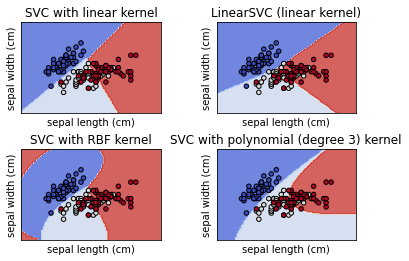

In [12]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000, dual=True), # "auto" was written in original code which gave error
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [13]:
# scikit-learn wine dataset is used.
# plot_4_classifiers method is just as above code.

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

# Define the classifiers
classifiers = [LogisticRegression(), LinearSVC(), SVC(), KNeighborsClassifier()]

# Fit the classifiers
for c in classifiers:
    c.fit(X, y)

# Plot the classifiers
plot_4_classifiers(X, y, classifiers)
plt.show()

## 2. Loss functions

Answer: Both logistic regression and Linear SVMs

In [31]:
import numpy as np
from sklearn.linear_model import LogisticRegression

X = np.array([[ 1.78862847,  0.43650985], [ 0.09649747, -1.8634927 ], [-0.2773882 , -0.35475898], [-3.08274148,  2.37299932], 
           [-3.04381817,  2.52278197], [-1.31386475,  0.88462238], [-2.11868196,  4.70957306], [-2.94996636,  2.59532259], 
           [-3.54535995,  1.45352268], [ 0.98236743, -1.10106763], [-1.18504653, -0.2056499 ], [-1.51385164,  3.23671627], 
           [-4.02378514,  2.2870068 ], [ 0.62524497, -0.16051336], [-3.76883635,  2.76996928], [ 0.74505627,  1.97611078], 
           [-1.24412333, -0.62641691], [-0.80376609, -2.41908317], [-0.92379202, -1.02387576], [ 1.12397796, -0.13191423]])

y = np.array([-1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1, -1, -1, -1])

model = LogisticRegression()

In [ ]:
# Set the coefficients
model.coef_ = np.array([[-1,3]])
model.intercept_ = np.array([-6])

# Plot the data and decision boundary
plot_classifier(X,y,model)

# Print the number of errors
num_err = np.sum(y != model.predict(X))
print("Number of errors:", num_err)

Answer: 2

In [40]:
X = [np.array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00, 6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02, 4.980e+00]), np.array([2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01, 6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02, 1.7800e+01, 3.9690e+02, 9.1400e+00]), np.array([2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01, 7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02, 1.7800e+01, 3.9283e+02, 4.0300e+00]), np.array([3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01, 6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02, 1.8700e+01, 3.9463e+02, 2.9400e+00]), np.array([6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01, 7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02, 1.8700e+01, 3.9690e+02, 5.3300e+00]), np.array([2.9850e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01, 6.4300e+00, 5.8700e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02, 1.8700e+01, 3.9412e+02, 5.2100e+00]), np.array([8.8290e-02, 1.2500e+01, 7.8700e+00, 0.0000e+00, 5.2400e-01, 6.0120e+00, 6.6600e+01, 5.5605e+00, 5.0000e+00, 3.1100e+02, 1.5200e+01, 3.9560e+02, 1.2430e+01]), np.array([1.4455e-01, 1.2500e+01, 7.8700e+00, 0.0000e+00, 5.2400e-01, 6.1720e+00, 9.6100e+01, 5.9505e+00, 5.0000e+00, 3.1100e+02, 1.5200e+01, 3.9690e+02, 1.9150e+01]), np.array([2.1124e-01, 1.2500e+01, 7.8700e+00, 0.0000e+00, 5.2400e-01, 5.6310e+00, 1.0000e+02, 6.0821e+00, 5.0000e+00, 3.1100e+02, 1.5200e+01, 3.8663e+02, 2.9930e+01]), np.array([1.7004e-01, 1.2500e+01, 7.8700e+00, 0.0000e+00, 5.2400e-01, 6.0040e+00, 8.5900e+01, 6.5921e+00, 5.0000e+00, 3.1100e+02, 1.5200e+01, 3.8671e+02, 1.7100e+01]), np.array([2.2489e-01, 1.2500e+01, 7.8700e+00, 0.0000e+00, 5.2400e-01, 6.3770e+00, 9.4300e+01, 6.3467e+00, 5.0000e+00, 3.1100e+02, 1.5200e+01, 3.9252e+02, 2.0450e+01]), np.array([1.1747e-01, 1.2500e+01, 7.8700e+00, 0.0000e+00, 5.2400e-01, 6.0090e+00, 8.2900e+01, 6.2267e+00, 5.0000e+00, 3.1100e+02, 1.5200e+01, 3.9690e+02, 1.3270e+01]), np.array([9.3780e-02, 1.2500e+01, 7.8700e+00, 0.0000e+00, 5.2400e-01, 5.8890e+00, 3.9000e+01, 5.4509e+00, 5.0000e+00, 3.1100e+02, 1.5200e+01, 3.9050e+02, 1.5710e+01]), np.array([  0.62976,   0.     ,   8.14   ,   0.     ,   0.538  ,   5.949  , 61.8    ,   4.7075 ,   4.     , 307.     ,  21.     , 396.9    , 8.26   ]), np.array([  0.63796,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.096  , 84.5    ,   4.4619 ,   4.     , 307.     ,  21.     , 380.02   , 10.26   ]), np.array([  0.62739,   0.     ,   8.14   ,   0.     ,   0.538  ,   5.834  , 56.5    ,   4.4986 ,   4.     , 307.     ,  21.     , 395.62   , 8.47   ]), np.array([  1.05393,   0.     ,   8.14   ,   0.     ,   0.538  ,   5.935  , 29.3    ,   4.4986 ,   4.     , 307.     ,  21.     , 386.85   , 6.58   ]), np.array([  0.7842,   0.    ,   8.14  ,   0.    ,   0.538 ,   5.99  , 81.7   ,   4.2579,   4.    , 307.    ,  21.    , 386.75  , 14.67  ]), np.array([  0.80271,   0.     ,   8.14   ,   0.     ,   0.538  ,   5.456  , 36.6    ,   3.7965 ,   4.     , 307.     ,  21.     , 288.99   , 11.69   ]), np.array([  0.7258,   0.    ,   8.14  ,   0.    ,   0.538 ,   5.727 , 69.5   ,   3.7965,   4.    , 307.    ,  21.    , 390.95  , 11.28  ]), np.array([  1.25179,   0.     ,   8.14   ,   0.     ,   0.538  ,   5.57   , 98.1    ,   3.7979 ,   4.     , 307.     ,  21.     , 376.57   , 21.02   ]), np.array([  0.85204,   0.     ,   8.14   ,   0.     ,   0.538  ,   5.965  , 89.2    ,   4.0123 ,   4.     , 307.     ,  21.     , 392.53   , 13.83   ]), np.array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  , 91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    , 18.72   ]), np.array([  0.98843,   0.     ,   8.14   ,   0.     ,   0.538  ,   5.813  , 100.     ,   4.0952 ,   4.     , 307.     ,  21.     , 394.54   , 19.88   ]), np.array([  0.75026,   0.     ,   8.14   ,   0.     ,   0.538  ,   5.924  , 94.1    ,   4.3996 ,   4.     , 307.     ,  21.     , 394.33   , 16.3    ]), np.array([  0.84054,   0.     ,   8.14   ,   0.     ,   0.538  ,   5.599  , 85.7    ,   4.4546 ,   4.     , 307.     ,  21.     , 303.42   , 16.51   ]), np.array([  0.67191,   0.     ,   8.14   ,   0.     ,   0.538  ,   5.813  , 90.3    ,   4.682  ,   4.     , 307.     ,  21.     , 376.88   , 14.81   ]), np.array([  0.95577,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.047  , 88.8    ,   4.4534 ,   4.     , 307.     ,  21.     , 306.38   , 17.28   ]), np.array([  0.77299,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.495  , 94.4    ,   4.4547 ,   4.     , 307.     ,  21.     , 387.94   , 12.8    ]), np.array([  1.00245,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.674  , 87.3    ,   4.239  ,   4.     , 307.     ,  21.     , 380.23   , 11.98   ]), np.array([  1.13081,   0.     ,   8.14   ,   0.     ,   0.538  ,   5.713  , 94.1    ,   4.233  ,   4.     , 307.     ,  21.     , 360.17   , 22.6    ]), np.array([  1.35472,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.072  , 100.     ,   4.175  ,   4.     , 307.     ,  21.     , 376.73   , 13.04   ]), np.array([  1.38799,   0.     ,   8.14   ,   0.     ,   0.538  ,   5.95   , 82.     ,   3.99   ,   4.     , 307.     ,  21.     , 232.6    , 27.71   ]), np.array([  1.15172,   0.     ,   8.14   ,   0.     ,   0.538  ,   5.701  , 95.     ,   3.7872 ,   4.     , 307.     ,  21.     , 358.77   , 18.35   ]), np.array([  1.61282,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.096  , 96.9    ,   3.7598 ,   4.     , 307.     ,  21.     , 248.31   , 20.34   ]), np.array([6.4170e-02, 0.0000e+00, 5.9600e+00, 0.0000e+00, 4.9900e-01, 5.9330e+00, 6.8200e+01, 3.3603e+00, 5.0000e+00, 2.7900e+02, 1.9200e+01, 3.9690e+02, 9.6800e+00]), np.array([9.7440e-02, 0.0000e+00, 5.9600e+00, 0.0000e+00, 4.9900e-01, 5.8410e+00, 6.1400e+01, 3.3779e+00, 5.0000e+00, 2.7900e+02, 1.9200e+01, 3.7756e+02, 1.1410e+01]), np.array([8.0140e-02, 0.0000e+00, 5.9600e+00, 0.0000e+00, 4.9900e-01, 5.8500e+00, 4.1500e+01, 3.9342e+00, 5.0000e+00, 2.7900e+02, 1.9200e+01, 3.9690e+02, 8.7700e+00]), np.array([1.7505e-01, 0.0000e+00, 5.9600e+00, 0.0000e+00, 4.9900e-01, 5.9660e+00, 3.0200e+01, 3.8473e+00, 5.0000e+00, 2.7900e+02, 1.9200e+01, 3.9343e+02, 1.0130e+01]), np.array([2.7630e-02, 7.5000e+01, 2.9500e+00, 0.0000e+00, 4.2800e-01, 6.5950e+00, 2.1800e+01, 5.4011e+00, 3.0000e+00, 2.5200e+02, 1.8300e+01, 3.9563e+02, 4.3200e+00]), np.array([3.3590e-02, 7.5000e+01, 2.9500e+00, 0.0000e+00, 4.2800e-01, 7.0240e+00, 1.5800e+01, 5.4011e+00, 3.0000e+00, 2.5200e+02, 1.8300e+01, 3.9562e+02, 1.9800e+00]), np.array([1.2744e-01, 0.0000e+00, 6.9100e+00, 0.0000e+00, 4.4800e-01, 6.7700e+00, 2.9000e+00, 5.7209e+00, 3.0000e+00, 2.3300e+02, 1.7900e+01, 3.8541e+02, 4.8400e+00]), np.array([1.4150e-01, 0.0000e+00, 6.9100e+00, 0.0000e+00, 4.4800e-01, 6.1690e+00, 6.6000e+00, 5.7209e+00, 3.0000e+00, 2.3300e+02, 1.7900e+01, 3.8337e+02, 5.8100e+00]), np.array([1.5936e-01, 0.0000e+00, 6.9100e+00, 0.0000e+00, 4.4800e-01, 6.2110e+00, 6.5000e+00, 5.7209e+00, 3.0000e+00, 2.3300e+02, 1.7900e+01, 3.9446e+02, 7.4400e+00]), np.array([1.2269e-01, 0.0000e+00, 6.9100e+00, 0.0000e+00, 4.4800e-01, 6.0690e+00, 4.0000e+01, 5.7209e+00, 3.0000e+00, 2.3300e+02, 1.7900e+01, 3.8939e+02, 9.5500e+00]), np.array([1.7142e-01, 0.0000e+00, 6.9100e+00, 0.0000e+00, 4.4800e-01, 5.6820e+00, 3.3800e+01, 5.1004e+00, 3.0000e+00, 2.3300e+02, 1.7900e+01, 3.9690e+02, 1.0210e+01]), np.array([1.8836e-01, 0.0000e+00, 6.9100e+00, 0.0000e+00, 4.4800e-01, 5.7860e+00, 3.3300e+01, 5.1004e+00, 3.0000e+00, 2.3300e+02, 1.7900e+01, 3.9690e+02, 1.4150e+01]), np.array([2.2927e-01, 0.0000e+00, 6.9100e+00, 0.0000e+00, 4.4800e-01, 6.0300e+00, 8.5500e+01, 5.6894e+00, 3.0000e+00, 2.3300e+02, 1.7900e+01, 3.9274e+02, 1.8800e+01]), np.array([2.5387e-01, 0.0000e+00, 6.9100e+00, 0.0000e+00, 4.4800e-01, 5.3990e+00, 9.5300e+01, 5.8700e+00, 3.0000e+00, 2.3300e+02, 1.7900e+01, 3.9690e+02, 3.0810e+01]), np.array([2.1977e-01, 0.0000e+00, 6.9100e+00, 0.0000e+00, 4.4800e-01, 5.6020e+00, 6.2000e+01, 6.0877e+00, 3.0000e+00, 2.3300e+02, 1.7900e+01, 3.9690e+02, 1.6200e+01]), np.array([8.8730e-02, 2.1000e+01, 5.6400e+00, 0.0000e+00, 4.3900e-01, 5.9630e+00, 4.5700e+01, 6.8147e+00, 4.0000e+00, 2.4300e+02, 1.6800e+01, 3.9556e+02, 1.3450e+01]), np.array([4.3370e-02, 2.1000e+01, 5.6400e+00, 0.0000e+00, 4.3900e-01, 6.1150e+00, 6.3000e+01, 6.8147e+00, 4.0000e+00, 2.4300e+02, 1.6800e+01, 3.9397e+02, 9.4300e+00]), np.array([5.3600e-02, 2.1000e+01, 5.6400e+00, 0.0000e+00, 4.3900e-01, 6.5110e+00, 2.1100e+01, 6.8147e+00, 4.0000e+00, 2.4300e+02, 1.6800e+01, 3.9690e+02, 5.2800e+00]), np.array([4.9810e-02, 2.1000e+01, 5.6400e+00, 0.0000e+00, 4.3900e-01, 5.9980e+00, 2.1400e+01, 6.8147e+00, 4.0000e+00, 2.4300e+02, 1.6800e+01, 3.9690e+02, 8.4300e+00]), np.array([1.3600e-02, 7.5000e+01, 4.0000e+00, 0.0000e+00, 4.1000e-01, 5.8880e+00, 4.7600e+01, 7.3197e+00, 3.0000e+00, 4.6900e+02, 2.1100e+01, 3.9690e+02, 1.4800e+01]), np.array([1.3110e-02, 9.0000e+01, 1.2200e+00, 0.0000e+00, 4.0300e-01, 7.2490e+00, 2.1900e+01, 8.6966e+00, 5.0000e+00, 2.2600e+02, 1.7900e+01, 3.9593e+02, 4.8100e+00]), np.array([2.0550e-02, 8.5000e+01, 7.4000e-01, 0.0000e+00, 4.1000e-01, 6.3830e+00, 3.5700e+01, 9.1876e+00, 2.0000e+00, 3.1300e+02, 1.7300e+01, 3.9690e+02, 5.7700e+00]), np.array([1.4320e-02, 1.0000e+02, 1.3200e+00, 0.0000e+00, 4.1100e-01, 6.8160e+00, 4.0500e+01, 8.3248e+00, 5.0000e+00, 2.5600e+02, 1.5100e+01, 3.9290e+02, 3.9500e+00]), np.array([1.5445e-01, 2.5000e+01, 5.1300e+00, 0.0000e+00, 4.5300e-01, 6.1450e+00, 2.9200e+01, 7.8148e+00, 8.0000e+00, 2.8400e+02, 1.9700e+01, 3.9068e+02, 6.8600e+00]), np.array([1.0328e-01, 2.5000e+01, 5.1300e+00, 0.0000e+00, 4.5300e-01, 5.9270e+00, 4.7200e+01, 6.9320e+00, 8.0000e+00, 2.8400e+02, 1.9700e+01, 3.9690e+02, 9.2200e+00]), np.array([1.4932e-01, 2.5000e+01, 5.1300e+00, 0.0000e+00, 4.5300e-01, 5.7410e+00, 6.6200e+01, 7.2254e+00, 8.0000e+00, 2.8400e+02, 1.9700e+01, 3.9511e+02, 1.3150e+01]), np.array([1.7171e-01, 2.5000e+01, 5.1300e+00, 0.0000e+00, 4.5300e-01, 5.9660e+00, 9.3400e+01, 6.8185e+00, 8.0000e+00, 2.8400e+02, 1.9700e+01, 3.7808e+02, 1.4440e+01]), np.array([1.1027e-01, 2.5000e+01, 5.1300e+00, 0.0000e+00, 4.5300e-01, 6.4560e+00, 6.7800e+01, 7.2255e+00, 8.0000e+00, 2.8400e+02, 1.9700e+01, 3.9690e+02, 6.7300e+00]), np.array([1.2650e-01, 2.5000e+01, 5.1300e+00, 0.0000e+00, 4.5300e-01, 6.7620e+00, 4.3400e+01, 7.9809e+00, 8.0000e+00, 2.8400e+02, 1.9700e+01, 3.9558e+02, 9.5000e+00]), np.array([1.9510e-02, 1.7500e+01, 1.3800e+00, 0.0000e+00, 4.1610e-01, 7.1040e+00, 5.9500e+01, 9.2229e+00, 3.0000e+00, 2.1600e+02, 1.8600e+01, 3.9324e+02, 8.0500e+00]), np.array([3.5840e-02, 8.0000e+01, 3.3700e+00, 0.0000e+00, 3.9800e-01, 6.2900e+00, 1.7800e+01, 6.6115e+00, 4.0000e+00, 3.3700e+02, 1.6100e+01, 3.9690e+02, 4.6700e+00]), np.array([4.3790e-02, 8.0000e+01, 3.3700e+00, 0.0000e+00, 3.9800e-01, 5.7870e+00, 3.1100e+01, 6.6115e+00, 4.0000e+00, 3.3700e+02, 1.6100e+01, 3.9690e+02, 1.0240e+01]), np.array([5.7890e-02, 1.2500e+01, 6.0700e+00, 0.0000e+00, 4.0900e-01, 5.8780e+00, 2.1400e+01, 6.4980e+00, 4.0000e+00, 3.4500e+02, 1.8900e+01, 3.9621e+02, 8.1000e+00]), np.array([1.3554e-01, 1.2500e+01, 6.0700e+00, 0.0000e+00, 4.0900e-01, 5.5940e+00, 3.6800e+01, 6.4980e+00, 4.0000e+00, 3.4500e+02, 1.8900e+01, 3.9690e+02, 1.3090e+01]), np.array([1.2816e-01, 1.2500e+01, 6.0700e+00, 0.0000e+00, 4.0900e-01, 5.8850e+00, 3.3000e+01, 6.4980e+00, 4.0000e+00, 3.4500e+02, 1.8900e+01, 3.9690e+02, 8.7900e+00]), np.array([8.8260e-02, 0.0000e+00, 1.0810e+01, 0.0000e+00, 4.1300e-01, 6.4170e+00, 6.6000e+00, 5.2873e+00, 4.0000e+00, 3.0500e+02, 1.9200e+01, 3.8373e+02, 6.7200e+00]), np.array([1.5876e-01, 0.0000e+00, 1.0810e+01, 0.0000e+00, 4.1300e-01, 5.9610e+00, 1.7500e+01, 5.2873e+00, 4.0000e+00, 3.0500e+02, 1.9200e+01, 3.7694e+02, 9.8800e+00]), np.array([9.1640e-02, 0.0000e+00, 1.0810e+01, 0.0000e+00, 4.1300e-01, 6.0650e+00, 7.8000e+00, 5.2873e+00, 4.0000e+00, 3.0500e+02, 1.9200e+01, 3.9091e+02, 5.5200e+00]), np.array([1.9539e-01, 0.0000e+00, 1.0810e+01, 0.0000e+00, 4.1300e-01, 6.2450e+00, 6.2000e+00, 5.2873e+00, 4.0000e+00, 3.0500e+02, 1.9200e+01, 3.7717e+02, 7.5400e+00]), np.array([7.8960e-02, 0.0000e+00, 1.2830e+01, 0.0000e+00, 4.3700e-01, 6.2730e+00, 6.0000e+00, 4.2515e+00, 5.0000e+00, 3.9800e+02, 1.8700e+01, 3.9492e+02, 6.7800e+00]), np.array([9.5120e-02, 0.0000e+00, 1.2830e+01, 0.0000e+00, 4.3700e-01, 6.2860e+00, 4.5000e+01, 4.5026e+00, 5.0000e+00, 3.9800e+02, 1.8700e+01, 3.8323e+02, 8.9400e+00]), np.array([1.0153e-01, 0.0000e+00, 1.2830e+01, 0.0000e+00, 4.3700e-01, 6.2790e+00, 7.4500e+01, 4.0522e+00, 5.0000e+00, 3.9800e+02, 1.8700e+01, 3.7366e+02, 1.1970e+01]), np.array([8.7070e-02, 0.0000e+00, 1.2830e+01, 0.0000e+00, 4.3700e-01, 6.1400e+00, 4.5800e+01, 4.0905e+00, 5.0000e+00, 3.9800e+02, 1.8700e+01, 3.8696e+02, 1.0270e+01]), np.array([5.6460e-02, 0.0000e+00, 1.2830e+01, 0.0000e+00, 4.3700e-01, 6.2320e+00, 5.3700e+01, 5.0141e+00, 5.0000e+00, 3.9800e+02, 1.8700e+01, 3.8640e+02, 1.2340e+01]), np.array([8.3870e-02, 0.0000e+00, 1.2830e+01, 0.0000e+00, 4.3700e-01, 5.8740e+00, 3.6600e+01, 4.5026e+00, 5.0000e+00, 3.9800e+02, 1.8700e+01, 3.9606e+02, 9.1000e+00]), np.array([4.1130e-02, 2.5000e+01, 4.8600e+00, 0.0000e+00, 4.2600e-01, 6.7270e+00, 3.3500e+01, 5.4007e+00, 4.0000e+00, 2.8100e+02, 1.9000e+01, 3.9690e+02, 5.2900e+00]), np.array([4.4620e-02, 2.5000e+01, 4.8600e+00, 0.0000e+00, 4.2600e-01, 6.6190e+00, 7.0400e+01, 5.4007e+00, 4.0000e+00, 2.8100e+02, 1.9000e+01, 3.9563e+02, 7.2200e+00]), np.array([3.6590e-02, 2.5000e+01, 4.8600e+00, 0.0000e+00, 4.2600e-01, 6.3020e+00, 3.2200e+01, 5.4007e+00, 4.0000e+00, 2.8100e+02, 1.9000e+01, 3.9690e+02, 6.7200e+00]), np.array([3.5510e-02, 2.5000e+01, 4.8600e+00, 0.0000e+00, 4.2600e-01, 6.1670e+00, 4.6700e+01, 5.4007e+00, 4.0000e+00, 2.8100e+02, 1.9000e+01, 3.9064e+02, 7.5100e+00]), np.array([5.0590e-02, 0.0000e+00, 4.4900e+00, 0.0000e+00, 4.4900e-01, 6.3890e+00, 4.8000e+01, 4.7794e+00, 3.0000e+00, 2.4700e+02, 1.8500e+01, 3.9690e+02, 9.6200e+00]), np.array([5.7350e-02, 0.0000e+00, 4.4900e+00, 0.0000e+00, 4.4900e-01, 6.6300e+00, 5.6100e+01, 4.4377e+00, 3.0000e+00, 2.4700e+02, 1.8500e+01, 3.9230e+02, 6.5300e+00]), np.array([5.1880e-02, 0.0000e+00, 4.4900e+00, 0.0000e+00, 4.4900e-01, 6.0150e+00, 4.5100e+01, 4.4272e+00, 3.0000e+00, 2.4700e+02, 1.8500e+01, 3.9599e+02, 1.2860e+01]), np.array([7.1510e-02, 0.0000e+00, 4.4900e+00, 0.0000e+00, 4.4900e-01, 6.1210e+00, 5.6800e+01, 3.7476e+00, 3.0000e+00, 2.4700e+02, 1.8500e+01, 3.9515e+02, 8.4400e+00]), np.array([5.6600e-02, 0.0000e+00, 3.4100e+00, 0.0000e+00, 4.8900e-01, 7.0070e+00, 8.6300e+01, 3.4217e+00, 2.0000e+00, 2.7000e+02, 1.7800e+01, 3.9690e+02, 5.5000e+00]), np.array([5.3020e-02, 0.0000e+00, 3.4100e+00, 0.0000e+00, 4.8900e-01, 7.0790e+00, 6.3100e+01, 3.4145e+00, 2.0000e+00, 2.7000e+02, 1.7800e+01, 3.9606e+02, 5.7000e+00]), np.array([4.6840e-02, 0.0000e+00, 3.4100e+00, 0.0000e+00, 4.8900e-01, 6.4170e+00, 6.6100e+01, 3.0923e+00, 2.0000e+00, 2.7000e+02, 1.7800e+01, 3.9218e+02, 8.8100e+00]), np.array([3.9320e-02, 0.0000e+00, 3.4100e+00, 0.0000e+00, 4.8900e-01, 6.4050e+00, 7.3900e+01, 3.0921e+00, 2.0000e+00, 2.7000e+02, 1.7800e+01, 3.9355e+02, 8.2000e+00]), np.array([4.2030e-02, 2.8000e+01, 1.5040e+01, 0.0000e+00, 4.6400e-01, 6.4420e+00, 5.3600e+01, 3.6659e+00, 4.0000e+00, 2.7000e+02, 1.8200e+01, 3.9501e+02, 8.1600e+00]), np.array([2.8750e-02, 2.8000e+01, 1.5040e+01, 0.0000e+00, 4.6400e-01, 6.2110e+00, 2.8900e+01, 3.6659e+00, 4.0000e+00, 2.7000e+02, 1.8200e+01, 3.9633e+02, 6.2100e+00]), np.array([4.294e-02, 2.800e+01, 1.504e+01, 0.000e+00, 4.640e-01, 6.249e+00, 7.730e+01, 3.615e+00, 4.000e+00, 2.700e+02, 1.820e+01, 3.969e+02, 1.059e+01]), np.array([1.2204e-01, 0.0000e+00, 2.8900e+00, 0.0000e+00, 4.4500e-01, 6.6250e+00, 5.7800e+01, 3.4952e+00, 2.0000e+00, 2.7600e+02, 1.8000e+01, 3.5798e+02, 6.6500e+00]), np.array([1.1504e-01, 0.0000e+00, 2.8900e+00, 0.0000e+00, 4.4500e-01, 6.1630e+00, 6.9600e+01, 3.4952e+00, 2.0000e+00, 2.7600e+02, 1.8000e+01, 3.9183e+02, 1.1340e+01]), np.array([1.2083e-01, 0.0000e+00, 2.8900e+00, 0.0000e+00, 4.4500e-01, 8.0690e+00, 7.6000e+01, 3.4952e+00, 2.0000e+00, 2.7600e+02, 1.8000e+01, 3.9690e+02, 4.2100e+00]), np.array([8.1870e-02, 0.0000e+00, 2.8900e+00, 0.0000e+00, 4.4500e-01, 7.8200e+00, 3.6900e+01, 3.4952e+00, 2.0000e+00, 2.7600e+02, 1.8000e+01, 3.9353e+02, 3.5700e+00]), np.array([6.8600e-02, 0.0000e+00, 2.8900e+00, 0.0000e+00, 4.4500e-01, 7.4160e+00, 6.2500e+01, 3.4952e+00, 2.0000e+00, 2.7600e+02, 1.8000e+01, 3.9690e+02, 6.1900e+00]), np.array([1.4866e-01, 0.0000e+00, 8.5600e+00, 0.0000e+00, 5.2000e-01, 6.7270e+00, 7.9900e+01, 2.7778e+00, 5.0000e+00, 3.8400e+02, 2.0900e+01, 3.9476e+02, 9.4200e+00]), np.array([1.1432e-01, 0.0000e+00, 8.5600e+00, 0.0000e+00, 5.2000e-01, 6.7810e+00, 7.1300e+01, 2.8561e+00, 5.0000e+00, 3.8400e+02, 2.0900e+01, 3.9558e+02, 7.6700e+00]), np.array([2.2876e-01, 0.0000e+00, 8.5600e+00, 0.0000e+00, 5.2000e-01, 6.4050e+00, 8.5400e+01, 2.7147e+00, 5.0000e+00, 3.8400e+02, 2.0900e+01, 7.0800e+01, 1.0630e+01]), np.array([2.1161e-01, 0.0000e+00, 8.5600e+00, 0.0000e+00, 5.2000e-01, 6.1370e+00, 8.7400e+01, 2.7147e+00, 5.0000e+00, 3.8400e+02, 2.0900e+01, 3.9447e+02, 1.3440e+01]), np.array([1.3960e-01, 0.0000e+00, 8.5600e+00, 0.0000e+00, 5.2000e-01, 6.1670e+00, 9.0000e+01, 2.4210e+00, 5.0000e+00, 3.8400e+02, 2.0900e+01, 3.9269e+02, 1.2330e+01]), np.array([1.3262e-01, 0.0000e+00, 8.5600e+00, 0.0000e+00, 5.2000e-01, 5.8510e+00, 9.6700e+01, 2.1069e+00, 5.0000e+00, 3.8400e+02, 2.0900e+01, 3.9405e+02, 1.6470e+01]), np.array([1.7120e-01, 0.0000e+00, 8.5600e+00, 0.0000e+00, 5.2000e-01, 5.8360e+00, 9.1900e+01, 2.2110e+00, 5.0000e+00, 3.8400e+02, 2.0900e+01, 3.9567e+02, 1.8660e+01]), np.array([1.3117e-01, 0.0000e+00, 8.5600e+00, 0.0000e+00, 5.2000e-01, 6.1270e+00, 8.5200e+01, 2.1224e+00, 5.0000e+00, 3.8400e+02, 2.0900e+01, 3.8769e+02, 1.4090e+01]), np.array([1.2802e-01, 0.0000e+00, 8.5600e+00, 0.0000e+00, 5.2000e-01, 6.4740e+00, 9.7100e+01, 2.4329e+00, 5.0000e+00, 3.8400e+02, 2.0900e+01, 3.9524e+02, 1.2270e+01]), np.array([2.6363e-01, 0.0000e+00, 8.5600e+00, 0.0000e+00, 5.2000e-01, 6.2290e+00, 9.1200e+01, 2.5451e+00, 5.0000e+00, 3.8400e+02, 2.0900e+01, 3.9123e+02, 1.5550e+01]), np.array([1.0793e-01, 0.0000e+00, 8.5600e+00, 0.0000e+00, 5.2000e-01, 6.1950e+00, 5.4400e+01, 2.7778e+00, 5.0000e+00, 3.8400e+02, 2.0900e+01, 3.9349e+02, 1.3000e+01]), np.array([1.0084e-01, 0.0000e+00, 1.0010e+01, 0.0000e+00, 5.4700e-01, 6.7150e+00, 8.1600e+01, 2.6775e+00, 6.0000e+00, 4.3200e+02, 1.7800e+01, 3.9559e+02, 1.0160e+01]), np.array([1.2329e-01, 0.0000e+00, 1.0010e+01, 0.0000e+00, 5.4700e-01, 5.9130e+00, 9.2900e+01, 2.3534e+00, 6.0000e+00, 4.3200e+02, 1.7800e+01, 3.9495e+02, 1.6210e+01]), np.array([2.2212e-01, 0.0000e+00, 1.0010e+01, 0.0000e+00, 5.4700e-01, 6.0920e+00, 9.5400e+01, 2.5480e+00, 6.0000e+00, 4.3200e+02, 1.7800e+01, 3.9690e+02, 1.7090e+01]), np.array([1.4231e-01, 0.0000e+00, 1.0010e+01, 0.0000e+00, 5.4700e-01, 6.2540e+00, 8.4200e+01, 2.2565e+00, 6.0000e+00, 4.3200e+02, 1.7800e+01, 3.8874e+02, 1.0450e+01]), np.array([1.7134e-01, 0.0000e+00, 1.0010e+01, 0.0000e+00, 5.4700e-01, 5.9280e+00, 8.8200e+01, 2.4631e+00, 6.0000e+00, 4.3200e+02, 1.7800e+01, 3.4491e+02, 1.5760e+01]), np.array([1.3158e-01, 0.0000e+00, 1.0010e+01, 0.0000e+00, 5.4700e-01, 6.1760e+00, 7.2500e+01, 2.7301e+00, 6.0000e+00, 4.3200e+02, 1.7800e+01, 3.9330e+02, 1.2040e+01]), np.array([1.5098e-01, 0.0000e+00, 1.0010e+01, 0.0000e+00, 5.4700e-01, 6.0210e+00, 8.2600e+01, 2.7474e+00, 6.0000e+00, 4.3200e+02, 1.7800e+01, 3.9451e+02, 1.0300e+01]), np.array([1.3058e-01, 0.0000e+00, 1.0010e+01, 0.0000e+00, 5.4700e-01, 5.8720e+00, 7.3100e+01, 2.4775e+00, 6.0000e+00, 4.3200e+02, 1.7800e+01, 3.3863e+02, 1.5370e+01]), np.array([1.4476e-01, 0.0000e+00, 1.0010e+01, 0.0000e+00, 5.4700e-01, 5.7310e+00, 6.5200e+01, 2.7592e+00, 6.0000e+00, 4.3200e+02, 1.7800e+01, 3.9150e+02, 1.3610e+01]), np.array([6.8990e-02, 0.0000e+00, 2.5650e+01, 0.0000e+00, 5.8100e-01, 5.8700e+00, 6.9700e+01, 2.2577e+00, 2.0000e+00, 1.8800e+02, 1.9100e+01, 3.8915e+02, 1.4370e+01]), np.array([7.1650e-02, 0.0000e+00, 2.5650e+01, 0.0000e+00, 5.8100e-01, 6.0040e+00, 8.4100e+01, 2.1974e+00, 2.0000e+00, 1.8800e+02, 1.9100e+01, 3.7767e+02, 1.4270e+01]), np.array([9.2990e-02, 0.0000e+00, 2.5650e+01, 0.0000e+00, 5.8100e-01, 5.9610e+00, 9.2900e+01, 2.0869e+00, 2.0000e+00, 1.8800e+02, 1.9100e+01, 3.7809e+02, 1.7930e+01]), np.array([1.5038e-01, 0.0000e+00, 2.5650e+01, 0.0000e+00, 5.8100e-01, 5.8560e+00, 9.7000e+01, 1.9444e+00, 2.0000e+00, 1.8800e+02, 1.9100e+01, 3.7031e+02, 2.5410e+01]), np.array([9.8490e-02, 0.0000e+00, 2.5650e+01, 0.0000e+00, 5.8100e-01, 5.8790e+00, 9.5800e+01, 2.0063e+00, 2.0000e+00, 1.8800e+02, 1.9100e+01, 3.7938e+02, 1.7580e+01]), np.array([1.6902e-01, 0.0000e+00, 2.5650e+01, 0.0000e+00, 5.8100e-01, 5.9860e+00, 8.8400e+01, 1.9929e+00, 2.0000e+00, 1.8800e+02, 1.9100e+01, 3.8502e+02, 1.4810e+01]), np.array([  0.38735,   0.     ,  25.65   ,   0.     ,   0.581  ,   5.613  , 95.6    ,   1.7572 ,   2.     , 188.     ,  19.1    , 359.29   , 27.26   ]), np.array([2.5915e-01, 0.0000e+00, 2.1890e+01, 0.0000e+00, 6.2400e-01, 5.6930e+00, 9.6000e+01, 1.7883e+00, 4.0000e+00, 4.3700e+02, 2.1200e+01, 3.9211e+02, 1.7190e+01]), np.array([3.2543e-01, 0.0000e+00, 2.1890e+01, 0.0000e+00, 6.2400e-01, 6.4310e+00, 9.8800e+01, 1.8125e+00, 4.0000e+00, 4.3700e+02, 2.1200e+01, 3.9690e+02, 1.5390e+01]), np.array([  0.88125,   0.     ,  21.89   ,   0.     ,   0.624  ,   5.637  , 94.7    ,   1.9799 ,   4.     , 437.     ,  21.2    , 396.9    , 18.34   ]), np.array([3.4006e-01, 0.0000e+00, 2.1890e+01, 0.0000e+00, 6.2400e-01, 6.4580e+00, 9.8900e+01, 2.1185e+00, 4.0000e+00, 4.3700e+02, 2.1200e+01, 3.9504e+02, 1.2600e+01]), np.array([  1.19294,   0.     ,  21.89   ,   0.     ,   0.624  ,   6.326  , 97.7    ,   2.271  ,   4.     , 437.     ,  21.2    , 396.9    , 12.26   ]), np.array([  0.59005,   0.     ,  21.89   ,   0.     ,   0.624  ,   6.372  , 97.9    ,   2.3274 ,   4.     , 437.     ,  21.2    , 385.76   , 11.12   ]), np.array([3.2982e-01, 0.0000e+00, 2.1890e+01, 0.0000e+00, 6.2400e-01, 5.8220e+00, 9.5400e+01, 2.4699e+00, 4.0000e+00, 4.3700e+02, 2.1200e+01, 3.8869e+02, 1.5030e+01]), np.array([  0.97617,   0.     ,  21.89   ,   0.     ,   0.624  ,   5.757  , 98.4    ,   2.346  ,   4.     , 437.     ,  21.2    , 262.76   , 17.31   ]), np.array([  0.55778,   0.     ,  21.89   ,   0.     ,   0.624  ,   6.335  , 98.2    ,   2.1107 ,   4.     , 437.     ,  21.2    , 394.67   , 16.96   ]), np.array([3.2264e-01, 0.0000e+00, 2.1890e+01, 0.0000e+00, 6.2400e-01, 5.9420e+00, 9.3500e+01, 1.9669e+00, 4.0000e+00, 4.3700e+02, 2.1200e+01, 3.7825e+02, 1.6900e+01]), np.array([3.5233e-01, 0.0000e+00, 2.1890e+01, 0.0000e+00, 6.2400e-01, 6.4540e+00, 9.8400e+01, 1.8498e+00, 4.0000e+00, 4.3700e+02, 2.1200e+01, 3.9408e+02, 1.4590e+01]), np.array([2.4980e-01, 0.0000e+00, 2.1890e+01, 0.0000e+00, 6.2400e-01, 5.8570e+00, 9.8200e+01, 1.6686e+00, 4.0000e+00, 4.3700e+02, 2.1200e+01, 3.9204e+02, 2.1320e+01]), np.array([  0.54452,   0.     ,  21.89   ,   0.     ,   0.624  ,   6.151  , 97.9    ,   1.6687 ,   4.     , 437.     ,  21.2    , 396.9    , 18.46   ]), np.array([2.9090e-01, 0.0000e+00, 2.1890e+01, 0.0000e+00, 6.2400e-01, 6.1740e+00, 9.3600e+01, 1.6119e+00, 4.0000e+00, 4.3700e+02, 2.1200e+01, 3.8808e+02, 2.4160e+01]), np.array([  1.62864,   0.     ,  21.89   ,   0.     ,   0.624  ,   5.019  , 100.     ,   1.4394 ,   4.     , 437.     ,  21.2    , 396.9    , 34.41   ]), np.array([  3.32105,   0.     ,  19.58   ,   1.     ,   0.871  ,   5.403  , 100.     ,   1.3216 ,   5.     , 403.     ,  14.7    , 396.9    , 26.82   ]), np.array([  4.0974,   0.    ,  19.58  ,   0.    ,   0.871 ,   5.468 , 100.    ,   1.4118,   5.    , 403.    ,  14.7   , 396.9   , 26.42  ]), np.array([  2.77974,   0.     ,  19.58   ,   0.     ,   0.871  ,   4.903  , 97.8    ,   1.3459 ,   5.     , 403.     ,  14.7    , 396.9    , 29.29   ]), np.array([  2.37934,   0.     ,  19.58   ,   0.     ,   0.871  ,   6.13   , 100.     ,   1.4191 ,   5.     , 403.     ,  14.7    , 172.91   , 27.8    ]), np.array([  2.15505,   0.     ,  19.58   ,   0.     ,   0.871  ,   5.628  , 100.     ,   1.5166 ,   5.     , 403.     ,  14.7    , 169.27   , 16.65   ]), np.array([  2.36862,   0.     ,  19.58   ,   0.     ,   0.871  ,   4.926  , 95.7    ,   1.4608 ,   5.     , 403.     ,  14.7    , 391.71   , 29.53   ]), np.array([  2.33099,   0.     ,  19.58   ,   0.     ,   0.871  ,   5.186  , 93.8    ,   1.5296 ,   5.     , 403.     ,  14.7    , 356.99   , 28.32   ]), np.array([  2.73397,   0.     ,  19.58   ,   0.     ,   0.871  ,   5.597  , 94.9    ,   1.5257 ,   5.     , 403.     ,  14.7    , 351.85   , 21.45   ]), np.array([  1.6566,   0.    ,  19.58  ,   0.    ,   0.871 ,   6.122 , 97.3   ,   1.618 ,   5.    , 403.    ,  14.7   , 372.8   , 14.1   ]), np.array([  1.49632,   0.     ,  19.58   ,   0.     ,   0.871  ,   5.404  , 100.     ,   1.5916 ,   5.     , 403.     ,  14.7    , 341.6    , 13.28   ]), np.array([  1.12658,   0.     ,  19.58   ,   1.     ,   0.871  ,   5.012  , 88.     ,   1.6102 ,   5.     , 403.     ,  14.7    , 343.28   , 12.12   ]), np.array([  2.14918,   0.     ,  19.58   ,   0.     ,   0.871  ,   5.709  , 98.5    ,   1.6232 ,   5.     , 403.     ,  14.7    , 261.95   , 15.79   ]), np.array([  1.41385,   0.     ,  19.58   ,   1.     ,   0.871  ,   6.129  , 96.     ,   1.7494 ,   5.     , 403.     ,  14.7    , 321.02   , 15.12   ]), np.array([  3.53501,   0.     ,  19.58   ,   1.     ,   0.871  ,   6.152  , 82.6    ,   1.7455 ,   5.     , 403.     ,  14.7    ,  88.01   , 15.02   ]), np.array([  2.44668,   0.     ,  19.58   ,   0.     ,   0.871  ,   5.272  , 94.     ,   1.7364 ,   5.     , 403.     ,  14.7    ,  88.63   , 16.14   ]), np.array([  1.22358,   0.     ,  19.58   ,   0.     ,   0.605  ,   6.943  , 97.4    ,   1.8773 ,   5.     , 403.     ,  14.7    , 363.43   , 4.59   ]), np.array([  1.34284,   0.     ,  19.58   ,   0.     ,   0.605  ,   6.066  , 100.     ,   1.7573 ,   5.     , 403.     ,  14.7    , 353.89   , 6.43   ]), np.array([  1.42502,   0.     ,  19.58   ,   0.     ,   0.871  ,   6.51   , 100.     ,   1.7659 ,   5.     , 403.     ,  14.7    , 364.31   , 7.39   ]), np.array([  1.27346,   0.     ,  19.58   ,   1.     ,   0.605  ,   6.25   , 92.6    ,   1.7984 ,   5.     , 403.     ,  14.7    , 338.92   , 5.5    ]), np.array([  1.46336,   0.     ,  19.58   ,   0.     ,   0.605  ,   7.489  , 90.8    ,   1.9709 ,   5.     , 403.     ,  14.7    , 374.43   , 1.73   ]), np.array([  1.83377,   0.     ,  19.58   ,   1.     ,   0.605  ,   7.802  , 98.2    ,   2.0407 ,   5.     , 403.     ,  14.7    , 389.61   , 1.92   ]), np.array([  1.51902,   0.     ,  19.58   ,   1.     ,   0.605  ,   8.375  , 93.9    ,   2.162  ,   5.     , 403.     ,  14.7    , 388.45   , 3.32   ]), np.array([  2.24236,   0.     ,  19.58   ,   0.     ,   0.605  ,   5.854  , 91.8    ,   2.422  ,   5.     , 403.     ,  14.7    , 395.11   , 11.64   ]), np.array([  2.924 ,   0.    ,  19.58  ,   0.    ,   0.605 ,   6.101 , 93.    ,   2.2834,   5.    , 403.    ,  14.7   , 240.16  , 9.81  ]), np.array([  2.01019,   0.     ,  19.58   ,   0.     ,   0.605  ,   7.929  , 96.2    ,   2.0459 ,   5.     , 403.     ,  14.7    , 369.3    , 3.7    ]), np.array([  1.80028,   0.     ,  19.58   ,   0.     ,   0.605  ,   5.877  , 79.2    ,   2.4259 ,   5.     , 403.     ,  14.7    , 227.61   , 12.14   ]), np.array([  2.3004,   0.    ,  19.58  ,   0.    ,   0.605 ,   6.319 , 96.1   ,   2.1   ,   5.    , 403.    ,  14.7   , 297.09  , 11.1   ]), np.array([  2.44953,   0.     ,  19.58   ,   0.     ,   0.605  ,   6.402  , 95.2    ,   2.2625 ,   5.     , 403.     ,  14.7    , 330.04   , 11.32   ]), np.array([  1.20742,   0.     ,  19.58   ,   0.     ,   0.605  ,   5.875  , 94.6    ,   2.4259 ,   5.     , 403.     ,  14.7    , 292.29   , 14.43   ]), np.array([  2.3139,   0.    ,  19.58  ,   0.    ,   0.605 ,   5.88  , 97.3   ,   2.3887,   5.    , 403.    ,  14.7   , 348.13  , 12.03  ]), np.array([1.3914e-01, 0.0000e+00, 4.0500e+00, 0.0000e+00, 5.1000e-01, 5.5720e+00, 8.8500e+01, 2.5961e+00, 5.0000e+00, 2.9600e+02, 1.6600e+01, 3.9690e+02, 1.4690e+01]), np.array([9.1780e-02, 0.0000e+00, 4.0500e+00, 0.0000e+00, 5.1000e-01, 6.4160e+00, 8.4100e+01, 2.6463e+00, 5.0000e+00, 2.9600e+02, 1.6600e+01, 3.9550e+02, 9.0400e+00]), np.array([8.4470e-02, 0.0000e+00, 4.0500e+00, 0.0000e+00, 5.1000e-01, 5.8590e+00, 6.8700e+01, 2.7019e+00, 5.0000e+00, 2.9600e+02, 1.6600e+01, 3.9323e+02, 9.6400e+00]), np.array([6.6640e-02, 0.0000e+00, 4.0500e+00, 0.0000e+00, 5.1000e-01, 6.5460e+00, 3.3100e+01, 3.1323e+00, 5.0000e+00, 2.9600e+02, 1.6600e+01, 3.9096e+02, 5.3300e+00]), np.array([7.0220e-02, 0.0000e+00, 4.0500e+00, 0.0000e+00, 5.1000e-01, 6.0200e+00, 4.7200e+01, 3.5549e+00, 5.0000e+00, 2.9600e+02, 1.6600e+01, 3.9323e+02, 1.0110e+01]), np.array([5.4250e-02, 0.0000e+00, 4.0500e+00, 0.0000e+00, 5.1000e-01, 6.3150e+00, 7.3400e+01, 3.3175e+00, 5.0000e+00, 2.9600e+02, 1.6600e+01, 3.9560e+02, 6.2900e+00]), np.array([6.6420e-02, 0.0000e+00, 4.0500e+00, 0.0000e+00, 5.1000e-01, 6.8600e+00, 7.4400e+01, 2.9153e+00, 5.0000e+00, 2.9600e+02, 1.6600e+01, 3.9127e+02, 6.9200e+00]), np.array([5.780e-02, 0.000e+00, 2.460e+00, 0.000e+00, 4.880e-01, 6.980e+00, 5.840e+01, 2.829e+00, 3.000e+00, 1.930e+02, 1.780e+01, 3.969e+02, 5.040e+00]), np.array([6.5880e-02, 0.0000e+00, 2.4600e+00, 0.0000e+00, 4.8800e-01, 7.7650e+00, 8.3300e+01, 2.7410e+00, 3.0000e+00, 1.9300e+02, 1.7800e+01, 3.9556e+02, 7.5600e+00]), np.array([6.8880e-02, 0.0000e+00, 2.4600e+00, 0.0000e+00, 4.8800e-01, 6.1440e+00, 6.2200e+01, 2.5979e+00, 3.0000e+00, 1.9300e+02, 1.7800e+01, 3.9690e+02, 9.4500e+00]), np.array([9.1030e-02, 0.0000e+00, 2.4600e+00, 0.0000e+00, 4.8800e-01, 7.1550e+00, 9.2200e+01, 2.7006e+00, 3.0000e+00, 1.9300e+02, 1.7800e+01, 3.9412e+02, 4.8200e+00]), np.array([1.0008e-01, 0.0000e+00, 2.4600e+00, 0.0000e+00, 4.8800e-01, 6.5630e+00, 9.5600e+01, 2.8470e+00, 3.0000e+00, 1.9300e+02, 1.7800e+01, 3.9690e+02, 5.6800e+00]), np.array([8.3080e-02, 0.0000e+00, 2.4600e+00, 0.0000e+00, 4.8800e-01, 5.6040e+00, 8.9800e+01, 2.9879e+00, 3.0000e+00, 1.9300e+02, 1.7800e+01, 3.9100e+02, 1.3980e+01]), np.array([6.0470e-02, 0.0000e+00, 2.4600e+00, 0.0000e+00, 4.8800e-01, 6.1530e+00, 6.8800e+01, 3.2797e+00, 3.0000e+00, 1.9300e+02, 1.7800e+01, 3.8711e+02, 1.3150e+01]), np.array([5.6020e-02, 0.0000e+00, 2.4600e+00, 0.0000e+00, 4.8800e-01, 7.8310e+00, 5.3600e+01, 3.1992e+00, 3.0000e+00, 1.9300e+02, 1.7800e+01, 3.9263e+02, 4.4500e+00]), np.array([7.8750e-02, 4.5000e+01, 3.4400e+00, 0.0000e+00, 4.3700e-01, 6.7820e+00, 4.1100e+01, 3.7886e+00, 5.0000e+00, 3.9800e+02, 1.5200e+01, 3.9387e+02, 6.6800e+00]), np.array([1.2579e-01, 4.5000e+01, 3.4400e+00, 0.0000e+00, 4.3700e-01, 6.5560e+00, 2.9100e+01, 4.5667e+00, 5.0000e+00, 3.9800e+02, 1.5200e+01, 3.8284e+02, 4.5600e+00]), np.array([8.3700e-02, 4.5000e+01, 3.4400e+00, 0.0000e+00, 4.3700e-01, 7.1850e+00, 3.8900e+01, 4.5667e+00, 5.0000e+00, 3.9800e+02, 1.5200e+01, 3.9690e+02, 5.3900e+00]), np.array([9.0680e-02, 4.5000e+01, 3.4400e+00, 0.0000e+00, 4.3700e-01, 6.9510e+00, 2.1500e+01, 6.4798e+00, 5.0000e+00, 3.9800e+02, 1.5200e+01, 3.7768e+02, 5.1000e+00]), np.array([6.9110e-02, 4.5000e+01, 3.4400e+00, 0.0000e+00, 4.3700e-01, 6.7390e+00, 3.0800e+01, 6.4798e+00, 5.0000e+00, 3.9800e+02, 1.5200e+01, 3.8971e+02, 4.6900e+00]), np.array([8.6640e-02, 4.5000e+01, 3.4400e+00, 0.0000e+00, 4.3700e-01, 7.1780e+00, 2.6300e+01, 6.4798e+00, 5.0000e+00, 3.9800e+02, 1.5200e+01, 3.9049e+02, 2.8700e+00]), np.array([2.1870e-02, 6.0000e+01, 2.9300e+00, 0.0000e+00, 4.0100e-01, 6.8000e+00, 9.9000e+00, 6.2196e+00, 1.0000e+00, 2.6500e+02, 1.5600e+01, 3.9337e+02, 5.0300e+00]), np.array([1.4390e-02, 6.0000e+01, 2.9300e+00, 0.0000e+00, 4.0100e-01, 6.6040e+00, 1.8800e+01, 6.2196e+00, 1.0000e+00, 2.6500e+02, 1.5600e+01, 3.7670e+02, 4.3800e+00]), np.array([1.3810e-02, 8.0000e+01, 4.6000e-01, 0.0000e+00, 4.2200e-01, 7.8750e+00, 3.2000e+01, 5.6484e+00, 4.0000e+00, 2.5500e+02, 1.4400e+01, 3.9423e+02, 2.9700e+00]), np.array([4.011e-02, 8.000e+01, 1.520e+00, 0.000e+00, 4.040e-01, 7.287e+00, 3.410e+01, 7.309e+00, 2.000e+00, 3.290e+02, 1.260e+01, 3.969e+02, 4.080e+00]), np.array([4.6660e-02, 8.0000e+01, 1.5200e+00, 0.0000e+00, 4.0400e-01, 7.1070e+00, 3.6600e+01, 7.3090e+00, 2.0000e+00, 3.2900e+02, 1.2600e+01, 3.5431e+02, 8.6100e+00]), np.array([3.768e-02, 8.000e+01, 1.520e+00, 0.000e+00, 4.040e-01, 7.274e+00, 3.830e+01, 7.309e+00, 2.000e+00, 3.290e+02, 1.260e+01, 3.922e+02, 6.620e+00]), np.array([3.1500e-02, 9.5000e+01, 1.4700e+00, 0.0000e+00, 4.0300e-01, 6.9750e+00, 1.5300e+01, 7.6534e+00, 3.0000e+00, 4.0200e+02, 1.7000e+01, 3.9690e+02, 4.5600e+00]), np.array([1.7780e-02, 9.5000e+01, 1.4700e+00, 0.0000e+00, 4.0300e-01, 7.1350e+00, 1.3900e+01, 7.6534e+00, 3.0000e+00, 4.0200e+02, 1.7000e+01, 3.8430e+02, 4.4500e+00]), np.array([3.4450e-02, 8.2500e+01, 2.0300e+00, 0.0000e+00, 4.1500e-01, 6.1620e+00, 3.8400e+01, 6.2700e+00, 2.0000e+00, 3.4800e+02, 1.4700e+01, 3.9377e+02, 7.4300e+00]), np.array([2.1770e-02, 8.2500e+01, 2.0300e+00, 0.0000e+00, 4.1500e-01, 7.6100e+00, 1.5700e+01, 6.2700e+00, 2.0000e+00, 3.4800e+02, 1.4700e+01, 3.9538e+02, 3.1100e+00]), np.array([3.5100e-02, 9.5000e+01, 2.6800e+00, 0.0000e+00, 4.1610e-01, 7.8530e+00, 3.3200e+01, 5.1180e+00, 4.0000e+00, 2.2400e+02, 1.4700e+01, 3.9278e+02, 3.8100e+00]), np.array([2.0090e-02, 9.5000e+01, 2.6800e+00, 0.0000e+00, 4.1610e-01, 8.0340e+00, 3.1900e+01, 5.1180e+00, 4.0000e+00, 2.2400e+02, 1.4700e+01, 3.9055e+02, 2.8800e+00]), np.array([1.3642e-01, 0.0000e+00, 1.0590e+01, 0.0000e+00, 4.8900e-01, 5.8910e+00, 2.2300e+01, 3.9454e+00, 4.0000e+00, 2.7700e+02, 1.8600e+01, 3.9690e+02, 1.0870e+01]), np.array([2.2969e-01, 0.0000e+00, 1.0590e+01, 0.0000e+00, 4.8900e-01, 6.3260e+00, 5.2500e+01, 4.3549e+00, 4.0000e+00, 2.7700e+02, 1.8600e+01, 3.9487e+02, 1.0970e+01]), np.array([2.5199e-01, 0.0000e+00, 1.0590e+01, 0.0000e+00, 4.8900e-01, 5.7830e+00, 7.2700e+01, 4.3549e+00, 4.0000e+00, 2.7700e+02, 1.8600e+01, 3.8943e+02, 1.8060e+01]), np.array([1.3587e-01, 0.0000e+00, 1.0590e+01, 1.0000e+00, 4.8900e-01, 6.0640e+00, 5.9100e+01, 4.2392e+00, 4.0000e+00, 2.7700e+02, 1.8600e+01, 3.8132e+02, 1.4660e+01]), np.array([  0.43571,   0.     ,  10.59   ,   1.     ,   0.489  ,   5.344  , 100.     ,   3.875  ,   4.     , 277.     ,  18.6    , 396.9    , 23.09   ]), np.array([1.7446e-01, 0.0000e+00, 1.0590e+01, 1.0000e+00, 4.8900e-01, 5.9600e+00, 9.2100e+01, 3.8771e+00, 4.0000e+00, 2.7700e+02, 1.8600e+01, 3.9325e+02, 1.7270e+01]), np.array([3.7578e-01, 0.0000e+00, 1.0590e+01, 1.0000e+00, 4.8900e-01, 5.4040e+00, 8.8600e+01, 3.6650e+00, 4.0000e+00, 2.7700e+02, 1.8600e+01, 3.9524e+02, 2.3980e+01]), np.array([2.1719e-01, 0.0000e+00, 1.0590e+01, 1.0000e+00, 4.8900e-01, 5.8070e+00, 5.3800e+01, 3.6526e+00, 4.0000e+00, 2.7700e+02, 1.8600e+01, 3.9094e+02, 1.6030e+01]), np.array([1.4052e-01, 0.0000e+00, 1.0590e+01, 0.0000e+00, 4.8900e-01, 6.3750e+00, 3.2300e+01, 3.9454e+00, 4.0000e+00, 2.7700e+02, 1.8600e+01, 3.8581e+02, 9.3800e+00]), np.array([2.8955e-01, 0.0000e+00, 1.0590e+01, 0.0000e+00, 4.8900e-01, 5.4120e+00, 9.8000e+00, 3.5875e+00, 4.0000e+00, 2.7700e+02, 1.8600e+01, 3.4893e+02, 2.9550e+01]), np.array([1.9802e-01, 0.0000e+00, 1.0590e+01, 0.0000e+00, 4.8900e-01, 6.1820e+00, 4.2400e+01, 3.9454e+00, 4.0000e+00, 2.7700e+02, 1.8600e+01, 3.9363e+02, 9.4700e+00]), np.array([4.5600e-02, 0.0000e+00, 1.3890e+01, 1.0000e+00, 5.5000e-01, 5.8880e+00, 5.6000e+01, 3.1121e+00, 5.0000e+00, 2.7600e+02, 1.6400e+01, 3.9280e+02, 1.3510e+01]), np.array([7.0130e-02, 0.0000e+00, 1.3890e+01, 0.0000e+00, 5.5000e-01, 6.6420e+00, 8.5100e+01, 3.4211e+00, 5.0000e+00, 2.7600e+02, 1.6400e+01, 3.9278e+02, 9.6900e+00]), np.array([1.1069e-01, 0.0000e+00, 1.3890e+01, 1.0000e+00, 5.5000e-01, 5.9510e+00, 9.3800e+01, 2.8893e+00, 5.0000e+00, 2.7600e+02, 1.6400e+01, 3.9690e+02, 1.7920e+01]), np.array([1.1425e-01, 0.0000e+00, 1.3890e+01, 1.0000e+00, 5.5000e-01, 6.3730e+00, 9.2400e+01, 3.3633e+00, 5.0000e+00, 2.7600e+02, 1.6400e+01, 3.9374e+02, 1.0500e+01]), np.array([3.5809e-01, 0.0000e+00, 6.2000e+00, 1.0000e+00, 5.0700e-01, 6.9510e+00, 8.8500e+01, 2.8617e+00, 8.0000e+00, 3.0700e+02, 1.7400e+01, 3.9170e+02, 9.7100e+00]), np.array([  0.40771,   0.     ,   6.2    ,   1.     ,   0.507  ,   6.164  , 91.3    ,   3.048  ,   8.     , 307.     ,  17.4    , 395.24   , 21.46   ]), np.array([  0.62356,   0.     ,   6.2    ,   1.     ,   0.507  ,   6.879  , 77.7    ,   3.2721 ,   8.     , 307.     ,  17.4    , 390.39   , 9.93   ]), np.array([  0.6147,   0.    ,   6.2   ,   0.    ,   0.507 ,   6.618 , 80.8   ,   3.2721,   8.    , 307.    ,  17.4   , 396.9   , 7.6   ]), np.array([3.1533e-01, 0.0000e+00, 6.2000e+00, 0.0000e+00, 5.0400e-01, 8.2660e+00, 7.8300e+01, 2.8944e+00, 8.0000e+00, 3.0700e+02, 1.7400e+01, 3.8505e+02, 4.1400e+00]), np.array([  0.52693,   0.     ,   6.2    ,   0.     ,   0.504  ,   8.725  , 83.     ,   2.8944 ,   8.     , 307.     ,  17.4    , 382.     , 4.63   ]), np.array([3.8214e-01, 0.0000e+00, 6.2000e+00, 0.0000e+00, 5.0400e-01, 8.0400e+00, 8.6500e+01, 3.2157e+00, 8.0000e+00, 3.0700e+02, 1.7400e+01, 3.8738e+02, 3.1300e+00]), np.array([  0.41238,   0.     ,   6.2    ,   0.     ,   0.504  ,   7.163  , 79.9    ,   3.2157 ,   8.     , 307.     ,  17.4    , 372.08   , 6.36   ]), np.array([2.9819e-01, 0.0000e+00, 6.2000e+00, 0.0000e+00, 5.0400e-01, 7.6860e+00, 1.7000e+01, 3.3751e+00, 8.0000e+00, 3.0700e+02, 1.7400e+01, 3.7751e+02, 3.9200e+00]), np.array([  0.44178,   0.     ,   6.2    ,   0.     ,   0.504  ,   6.552  , 21.4    ,   3.3751 ,   8.     , 307.     ,  17.4    , 380.34   , 3.76   ]), np.array([  0.537 ,   0.    ,   6.2   ,   0.    ,   0.504 ,   5.981 , 68.1   ,   3.6715,   8.    , 307.    ,  17.4   , 378.35  , 11.65  ]), np.array([  0.46296,   0.     ,   6.2    ,   0.     ,   0.504  ,   7.412  , 76.9    ,   3.6715 ,   8.     , 307.     ,  17.4    , 376.14   , 5.25   ]), np.array([  0.57529,   0.     ,   6.2    ,   0.     ,   0.507  ,   8.337  , 73.3    ,   3.8384 ,   8.     , 307.     ,  17.4    , 385.91   , 2.47   ]), np.array([3.3147e-01, 0.0000e+00, 6.2000e+00, 0.0000e+00, 5.0700e-01, 8.2470e+00, 7.0400e+01, 3.6519e+00, 8.0000e+00, 3.0700e+02, 1.7400e+01, 3.7895e+02, 3.9500e+00]), np.array([  0.44791,   0.     ,   6.2    ,   1.     ,   0.507  ,   6.726  , 66.5    ,   3.6519 ,   8.     , 307.     ,  17.4    , 360.2    , 8.05   ]), np.array([3.3045e-01, 0.0000e+00, 6.2000e+00, 0.0000e+00, 5.0700e-01, 6.0860e+00, 6.1500e+01, 3.6519e+00, 8.0000e+00, 3.0700e+02, 1.7400e+01, 3.7675e+02, 1.0880e+01]), np.array([  0.52058,   0.     ,   6.2    ,   1.     ,   0.507  ,   6.631  , 76.5    ,   4.148  ,   8.     , 307.     ,  17.4    , 388.45   , 9.54   ]), np.array([  0.51183,   0.     ,   6.2    ,   0.     ,   0.507  ,   7.358  , 71.6    ,   4.148  ,   8.     , 307.     ,  17.4    , 390.07   , 4.73   ]), np.array([8.2440e-02, 3.0000e+01, 4.9300e+00, 0.0000e+00, 4.2800e-01, 6.4810e+00, 1.8500e+01, 6.1899e+00, 6.0000e+00, 3.0000e+02, 1.6600e+01, 3.7941e+02, 6.3600e+00]), np.array([9.2520e-02, 3.0000e+01, 4.9300e+00, 0.0000e+00, 4.2800e-01, 6.6060e+00, 4.2200e+01, 6.1899e+00, 6.0000e+00, 3.0000e+02, 1.6600e+01, 3.8378e+02, 7.3700e+00]), np.array([1.1329e-01, 3.0000e+01, 4.9300e+00, 0.0000e+00, 4.2800e-01, 6.8970e+00, 5.4300e+01, 6.3361e+00, 6.0000e+00, 3.0000e+02, 1.6600e+01, 3.9125e+02, 1.1380e+01]), np.array([1.0612e-01, 3.0000e+01, 4.9300e+00, 0.0000e+00, 4.2800e-01, 6.0950e+00, 6.5100e+01, 6.3361e+00, 6.0000e+00, 3.0000e+02, 1.6600e+01, 3.9462e+02, 1.2400e+01]), np.array([1.0290e-01, 3.0000e+01, 4.9300e+00, 0.0000e+00, 4.2800e-01, 6.3580e+00, 5.2900e+01, 7.0355e+00, 6.0000e+00, 3.0000e+02, 1.6600e+01, 3.7275e+02, 1.1220e+01]), np.array([1.2757e-01, 3.0000e+01, 4.9300e+00, 0.0000e+00, 4.2800e-01, 6.3930e+00, 7.8000e+00, 7.0355e+00, 6.0000e+00, 3.0000e+02, 1.6600e+01, 3.7471e+02, 5.1900e+00]), np.array([2.0608e-01, 2.2000e+01, 5.8600e+00, 0.0000e+00, 4.3100e-01, 5.5930e+00, 7.6500e+01, 7.9549e+00, 7.0000e+00, 3.3000e+02, 1.9100e+01, 3.7249e+02, 1.2500e+01]), np.array([1.9133e-01, 2.2000e+01, 5.8600e+00, 0.0000e+00, 4.3100e-01, 5.6050e+00, 7.0200e+01, 7.9549e+00, 7.0000e+00, 3.3000e+02, 1.9100e+01, 3.8913e+02, 1.8460e+01]), np.array([3.3983e-01, 2.2000e+01, 5.8600e+00, 0.0000e+00, 4.3100e-01, 6.1080e+00, 3.4900e+01, 8.0555e+00, 7.0000e+00, 3.3000e+02, 1.9100e+01, 3.9018e+02, 9.1600e+00]), np.array([1.9657e-01, 2.2000e+01, 5.8600e+00, 0.0000e+00, 4.3100e-01, 6.2260e+00, 7.9200e+01, 8.0555e+00, 7.0000e+00, 3.3000e+02, 1.9100e+01, 3.7614e+02, 1.0150e+01]), np.array([1.6439e-01, 2.2000e+01, 5.8600e+00, 0.0000e+00, 4.3100e-01, 6.4330e+00, 4.9100e+01, 7.8265e+00, 7.0000e+00, 3.3000e+02, 1.9100e+01, 3.7471e+02, 9.5200e+00]), np.array([1.9073e-01, 2.2000e+01, 5.8600e+00, 0.0000e+00, 4.3100e-01, 6.7180e+00, 1.7500e+01, 7.8265e+00, 7.0000e+00, 3.3000e+02, 1.9100e+01, 3.9374e+02, 6.5600e+00]), np.array([1.4030e-01, 2.2000e+01, 5.8600e+00, 0.0000e+00, 4.3100e-01, 6.4870e+00, 1.3000e+01, 7.3967e+00, 7.0000e+00, 3.3000e+02, 1.9100e+01, 3.9628e+02, 5.9000e+00]), np.array([2.1409e-01, 2.2000e+01, 5.8600e+00, 0.0000e+00, 4.3100e-01, 6.4380e+00, 8.9000e+00, 7.3967e+00, 7.0000e+00, 3.3000e+02, 1.9100e+01, 3.7707e+02, 3.5900e+00]), np.array([8.2210e-02, 2.2000e+01, 5.8600e+00, 0.0000e+00, 4.3100e-01, 6.9570e+00, 6.8000e+00, 8.9067e+00, 7.0000e+00, 3.3000e+02, 1.9100e+01, 3.8609e+02, 3.5300e+00]), np.array([3.6894e-01, 2.2000e+01, 5.8600e+00, 0.0000e+00, 4.3100e-01, 8.2590e+00, 8.4000e+00, 8.9067e+00, 7.0000e+00, 3.3000e+02, 1.9100e+01, 3.9690e+02, 3.5400e+00]), np.array([4.8190e-02, 8.0000e+01, 3.6400e+00, 0.0000e+00, 3.9200e-01, 6.1080e+00, 3.2000e+01, 9.2203e+00, 1.0000e+00, 3.1500e+02, 1.6400e+01, 3.9289e+02, 6.5700e+00]), np.array([3.5480e-02, 8.0000e+01, 3.6400e+00, 0.0000e+00, 3.9200e-01, 5.8760e+00, 1.9100e+01, 9.2203e+00, 1.0000e+00, 3.1500e+02, 1.6400e+01, 3.9518e+02, 9.2500e+00]), np.array([1.5380e-02, 9.0000e+01, 3.7500e+00, 0.0000e+00, 3.9400e-01, 7.4540e+00, 3.4200e+01, 6.3361e+00, 3.0000e+00, 2.4400e+02, 1.5900e+01, 3.8634e+02, 3.1100e+00]), np.array([  0.61154,  20.     ,   3.97   ,   0.     ,   0.647  ,   8.704  , 86.9    ,   1.801  ,   5.     , 264.     ,  13.     , 389.7    , 5.12   ]), np.array([  0.66351,  20.     ,   3.97   ,   0.     ,   0.647  ,   7.333  , 100.     ,   1.8946 ,   5.     , 264.     ,  13.     , 383.29   , 7.79   ]), np.array([  0.65665,  20.     ,   3.97   ,   0.     ,   0.647  ,   6.842  , 100.     ,   2.0107 ,   5.     , 264.     ,  13.     , 391.93   , 6.9    ]), np.array([  0.54011,  20.     ,   3.97   ,   0.     ,   0.647  ,   7.203  , 81.8    ,   2.1121 ,   5.     , 264.     ,  13.     , 392.8    , 9.59   ]), np.array([  0.53412,  20.     ,   3.97   ,   0.     ,   0.647  ,   7.52   , 89.4    ,   2.1398 ,   5.     , 264.     ,  13.     , 388.37   , 7.26   ]), np.array([  0.52014,  20.     ,   3.97   ,   0.     ,   0.647  ,   8.398  , 91.5    ,   2.2885 ,   5.     , 264.     ,  13.     , 386.86   , 5.91   ]), np.array([  0.82526,  20.     ,   3.97   ,   0.     ,   0.647  ,   7.327  , 94.5    ,   2.0788 ,   5.     , 264.     ,  13.     , 393.42   , 11.25   ]), np.array([  0.55007,  20.     ,   3.97   ,   0.     ,   0.647  ,   7.206  , 91.6    ,   1.9301 ,   5.     , 264.     ,  13.     , 387.89   , 8.1    ]), np.array([  0.76162,  20.     ,   3.97   ,   0.     ,   0.647  ,   5.56   , 62.8    ,   1.9865 ,   5.     , 264.     ,  13.     , 392.4    , 10.45   ]), np.array([  0.7857,  20.    ,   3.97  ,   0.    ,   0.647 ,   7.014 , 84.6   ,   2.1329,   5.    , 264.    ,  13.    , 384.07  , 14.79  ]), np.array([  0.57834,  20.     ,   3.97   ,   0.     ,   0.575  ,   8.297  , 67.     ,   2.4216 ,   5.     , 264.     ,  13.     , 384.54   , 7.44   ]), np.array([  0.5405,  20.    ,   3.97  ,   0.    ,   0.575 ,   7.47  , 52.6   ,   2.872 ,   5.    , 264.    ,  13.    , 390.3   , 3.16  ]), np.array([9.0650e-02, 2.0000e+01, 6.9600e+00, 1.0000e+00, 4.6400e-01, 5.9200e+00, 6.1500e+01, 3.9175e+00, 3.0000e+00, 2.2300e+02, 1.8600e+01, 3.9134e+02, 1.3650e+01]), np.array([2.9916e-01, 2.0000e+01, 6.9600e+00, 0.0000e+00, 4.6400e-01, 5.8560e+00, 4.2100e+01, 4.4290e+00, 3.0000e+00, 2.2300e+02, 1.8600e+01, 3.8865e+02, 1.3000e+01]), np.array([1.6211e-01, 2.0000e+01, 6.9600e+00, 0.0000e+00, 4.6400e-01, 6.2400e+00, 1.6300e+01, 4.4290e+00, 3.0000e+00, 2.2300e+02, 1.8600e+01, 3.9690e+02, 6.5900e+00]), np.array([1.1460e-01, 2.0000e+01, 6.9600e+00, 0.0000e+00, 4.6400e-01, 6.5380e+00, 5.8700e+01, 3.9175e+00, 3.0000e+00, 2.2300e+02, 1.8600e+01, 3.9496e+02, 7.7300e+00]), np.array([2.2188e-01, 2.0000e+01, 6.9600e+00, 1.0000e+00, 4.6400e-01, 7.6910e+00, 5.1800e+01, 4.3665e+00, 3.0000e+00, 2.2300e+02, 1.8600e+01, 3.9077e+02, 6.5800e+00]), np.array([5.6440e-02, 4.0000e+01, 6.4100e+00, 1.0000e+00, 4.4700e-01, 6.7580e+00, 3.2900e+01, 4.0776e+00, 4.0000e+00, 2.5400e+02, 1.7600e+01, 3.9690e+02, 3.5300e+00]), np.array([9.6040e-02, 4.0000e+01, 6.4100e+00, 0.0000e+00, 4.4700e-01, 6.8540e+00, 4.2800e+01, 4.2673e+00, 4.0000e+00, 2.5400e+02, 1.7600e+01, 3.9690e+02, 2.9800e+00]), np.array([1.0469e-01, 4.0000e+01, 6.4100e+00, 1.0000e+00, 4.4700e-01, 7.2670e+00, 4.9000e+01, 4.7872e+00, 4.0000e+00, 2.5400e+02, 1.7600e+01, 3.8925e+02, 6.0500e+00]), np.array([6.1270e-02, 4.0000e+01, 6.4100e+00, 1.0000e+00, 4.4700e-01, 6.8260e+00, 2.7600e+01, 4.8628e+00, 4.0000e+00, 2.5400e+02, 1.7600e+01, 3.9345e+02, 4.1600e+00]), np.array([7.9780e-02, 4.0000e+01, 6.4100e+00, 0.0000e+00, 4.4700e-01, 6.4820e+00, 3.2100e+01, 4.1403e+00, 4.0000e+00, 2.5400e+02, 1.7600e+01, 3.9690e+02, 7.1900e+00]), np.array([2.1038e-01, 2.0000e+01, 3.3300e+00, 0.0000e+00, 4.4290e-01, 6.8120e+00, 3.2200e+01, 4.1007e+00, 5.0000e+00, 2.1600e+02, 1.4900e+01, 3.9690e+02, 4.8500e+00]), np.array([3.5780e-02, 2.0000e+01, 3.3300e+00, 0.0000e+00, 4.4290e-01, 7.8200e+00, 6.4500e+01, 4.6947e+00, 5.0000e+00, 2.1600e+02, 1.4900e+01, 3.8731e+02, 3.7600e+00]), np.array([3.7050e-02, 2.0000e+01, 3.3300e+00, 0.0000e+00, 4.4290e-01, 6.9680e+00, 3.7200e+01, 5.2447e+00, 5.0000e+00, 2.1600e+02, 1.4900e+01, 3.9223e+02, 4.5900e+00]), np.array([6.1290e-02, 2.0000e+01, 3.3300e+00, 1.0000e+00, 4.4290e-01, 7.6450e+00, 4.9700e+01, 5.2119e+00, 5.0000e+00, 2.1600e+02, 1.4900e+01, 3.7707e+02, 3.0100e+00]), np.array([1.5010e-02, 9.0000e+01, 1.2100e+00, 1.0000e+00, 4.0100e-01, 7.9230e+00, 2.4800e+01, 5.8850e+00, 1.0000e+00, 1.9800e+02, 1.3600e+01, 3.9552e+02, 3.1600e+00]), np.array([9.0600e-03, 9.0000e+01, 2.9700e+00, 0.0000e+00, 4.0000e-01, 7.0880e+00, 2.0800e+01, 7.3073e+00, 1.0000e+00, 2.8500e+02, 1.5300e+01, 3.9472e+02, 7.8500e+00]), np.array([1.0960e-02, 5.5000e+01, 2.2500e+00, 0.0000e+00, 3.8900e-01, 6.4530e+00, 3.1900e+01, 7.3073e+00, 1.0000e+00, 3.0000e+02, 1.5300e+01, 3.9472e+02, 8.2300e+00]), np.array([1.9650e-02, 8.0000e+01, 1.7600e+00, 0.0000e+00, 3.8500e-01, 6.2300e+00, 3.1500e+01, 9.0892e+00, 1.0000e+00, 2.4100e+02, 1.8200e+01, 3.4160e+02, 1.2930e+01]), np.array([3.8710e-02, 5.2500e+01, 5.3200e+00, 0.0000e+00, 4.0500e-01, 6.2090e+00, 3.1300e+01, 7.3172e+00, 6.0000e+00, 2.9300e+02, 1.6600e+01, 3.9690e+02, 7.1400e+00]), np.array([4.5900e-02, 5.2500e+01, 5.3200e+00, 0.0000e+00, 4.0500e-01, 6.3150e+00, 4.5600e+01, 7.3172e+00, 6.0000e+00, 2.9300e+02, 1.6600e+01, 3.9690e+02, 7.6000e+00]), np.array([4.2970e-02, 5.2500e+01, 5.3200e+00, 0.0000e+00, 4.0500e-01, 6.5650e+00, 2.2900e+01, 7.3172e+00, 6.0000e+00, 2.9300e+02, 1.6600e+01, 3.7172e+02, 9.5100e+00]), np.array([3.5020e-02, 8.0000e+01, 4.9500e+00, 0.0000e+00, 4.1100e-01, 6.8610e+00, 2.7900e+01, 5.1167e+00, 4.0000e+00, 2.4500e+02, 1.9200e+01, 3.9690e+02, 3.3300e+00]), np.array([7.8860e-02, 8.0000e+01, 4.9500e+00, 0.0000e+00, 4.1100e-01, 7.1480e+00, 2.7700e+01, 5.1167e+00, 4.0000e+00, 2.4500e+02, 1.9200e+01, 3.9690e+02, 3.5600e+00]), np.array([3.6150e-02, 8.0000e+01, 4.9500e+00, 0.0000e+00, 4.1100e-01, 6.6300e+00, 2.3400e+01, 5.1167e+00, 4.0000e+00, 2.4500e+02, 1.9200e+01, 3.9690e+02, 4.7000e+00]), np.array([8.2650e-02, 0.0000e+00, 1.3920e+01, 0.0000e+00, 4.3700e-01, 6.1270e+00, 1.8400e+01, 5.5027e+00, 4.0000e+00, 2.8900e+02, 1.6000e+01, 3.9690e+02, 8.5800e+00]), np.array([8.1990e-02, 0.0000e+00, 1.3920e+01, 0.0000e+00, 4.3700e-01, 6.0090e+00, 4.2300e+01, 5.5027e+00, 4.0000e+00, 2.8900e+02, 1.6000e+01, 3.9690e+02, 1.0400e+01]), np.array([1.2932e-01, 0.0000e+00, 1.3920e+01, 0.0000e+00, 4.3700e-01, 6.6780e+00, 3.1100e+01, 5.9604e+00, 4.0000e+00, 2.8900e+02, 1.6000e+01, 3.9690e+02, 6.2700e+00]), np.array([5.3720e-02, 0.0000e+00, 1.3920e+01, 0.0000e+00, 4.3700e-01, 6.5490e+00, 5.1000e+01, 5.9604e+00, 4.0000e+00, 2.8900e+02, 1.6000e+01, 3.9285e+02, 7.3900e+00]), np.array([1.4103e-01, 0.0000e+00, 1.3920e+01, 0.0000e+00, 4.3700e-01, 5.7900e+00, 5.8000e+01, 6.3200e+00, 4.0000e+00, 2.8900e+02, 1.6000e+01, 3.9690e+02, 1.5840e+01]), np.array([6.4660e-02, 7.0000e+01, 2.2400e+00, 0.0000e+00, 4.0000e-01, 6.3450e+00, 2.0100e+01, 7.8278e+00, 5.0000e+00, 3.5800e+02, 1.4800e+01, 3.6824e+02, 4.9700e+00]), np.array([5.5610e-02, 7.0000e+01, 2.2400e+00, 0.0000e+00, 4.0000e-01, 7.0410e+00, 1.0000e+01, 7.8278e+00, 5.0000e+00, 3.5800e+02, 1.4800e+01, 3.7158e+02, 4.7400e+00]), np.array([4.4170e-02, 7.0000e+01, 2.2400e+00, 0.0000e+00, 4.0000e-01, 6.8710e+00, 4.7400e+01, 7.8278e+00, 5.0000e+00, 3.5800e+02, 1.4800e+01, 3.9086e+02, 6.0700e+00]), np.array([3.5370e-02, 3.4000e+01, 6.0900e+00, 0.0000e+00, 4.3300e-01, 6.5900e+00, 4.0400e+01, 5.4917e+00, 7.0000e+00, 3.2900e+02, 1.6100e+01, 3.9575e+02, 9.5000e+00]), np.array([9.2660e-02, 3.4000e+01, 6.0900e+00, 0.0000e+00, 4.3300e-01, 6.4950e+00, 1.8400e+01, 5.4917e+00, 7.0000e+00, 3.2900e+02, 1.6100e+01, 3.8361e+02, 8.6700e+00]), np.array([1.0000e-01, 3.4000e+01, 6.0900e+00, 0.0000e+00, 4.3300e-01, 6.9820e+00, 1.7700e+01, 5.4917e+00, 7.0000e+00, 3.2900e+02, 1.6100e+01, 3.9043e+02, 4.8600e+00]), np.array([5.5150e-02, 3.3000e+01, 2.1800e+00, 0.0000e+00, 4.7200e-01, 7.2360e+00, 4.1100e+01, 4.0220e+00, 7.0000e+00, 2.2200e+02, 1.8400e+01, 3.9368e+02, 6.9300e+00]), np.array([5.4790e-02, 3.3000e+01, 2.1800e+00, 0.0000e+00, 4.7200e-01, 6.6160e+00, 5.8100e+01, 3.3700e+00, 7.0000e+00, 2.2200e+02, 1.8400e+01, 3.9336e+02, 8.9300e+00]), np.array([7.5030e-02, 3.3000e+01, 2.1800e+00, 0.0000e+00, 4.7200e-01, 7.4200e+00, 7.1900e+01, 3.0992e+00, 7.0000e+00, 2.2200e+02, 1.8400e+01, 3.9690e+02, 6.4700e+00]), np.array([4.9320e-02, 3.3000e+01, 2.1800e+00, 0.0000e+00, 4.7200e-01, 6.8490e+00, 7.0300e+01, 3.1827e+00, 7.0000e+00, 2.2200e+02, 1.8400e+01, 3.9690e+02, 7.5300e+00]), np.array([  0.49298,   0.     ,   9.9    ,   0.     ,   0.544  ,   6.635  , 82.5    ,   3.3175 ,   4.     , 304.     ,  18.4    , 396.9    , 4.54   ]), np.array([3.4940e-01, 0.0000e+00, 9.9000e+00, 0.0000e+00, 5.4400e-01, 5.9720e+00, 7.6700e+01, 3.1025e+00, 4.0000e+00, 3.0400e+02, 1.8400e+01, 3.9624e+02, 9.9700e+00]), np.array([  2.63548,   0.     ,   9.9    ,   0.     ,   0.544  ,   4.973  , 37.8    ,   2.5194 ,   4.     , 304.     ,  18.4    , 350.45   , 12.64   ]), np.array([  0.79041,   0.     ,   9.9    ,   0.     ,   0.544  ,   6.122  , 52.8    ,   2.6403 ,   4.     , 304.     ,  18.4    , 396.9    , 5.98   ]), np.array([2.6169e-01, 0.0000e+00, 9.9000e+00, 0.0000e+00, 5.4400e-01, 6.0230e+00, 9.0400e+01, 2.8340e+00, 4.0000e+00, 3.0400e+02, 1.8400e+01, 3.9630e+02, 1.1720e+01]), np.array([2.6938e-01, 0.0000e+00, 9.9000e+00, 0.0000e+00, 5.4400e-01, 6.2660e+00, 8.2800e+01, 3.2628e+00, 4.0000e+00, 3.0400e+02, 1.8400e+01, 3.9339e+02, 7.9000e+00]), np.array([3.6920e-01, 0.0000e+00, 9.9000e+00, 0.0000e+00, 5.4400e-01, 6.5670e+00, 8.7300e+01, 3.6023e+00, 4.0000e+00, 3.0400e+02, 1.8400e+01, 3.9569e+02, 9.2800e+00]), np.array([2.5356e-01, 0.0000e+00, 9.9000e+00, 0.0000e+00, 5.4400e-01, 5.7050e+00, 7.7700e+01, 3.9450e+00, 4.0000e+00, 3.0400e+02, 1.8400e+01, 3.9642e+02, 1.1500e+01]), np.array([3.1827e-01, 0.0000e+00, 9.9000e+00, 0.0000e+00, 5.4400e-01, 5.9140e+00, 8.3200e+01, 3.9986e+00, 4.0000e+00, 3.0400e+02, 1.8400e+01, 3.9070e+02, 1.8330e+01]), np.array([2.4522e-01, 0.0000e+00, 9.9000e+00, 0.0000e+00, 5.4400e-01, 5.7820e+00, 7.1700e+01, 4.0317e+00, 4.0000e+00, 3.0400e+02, 1.8400e+01, 3.9690e+02, 1.5940e+01]), np.array([  0.40202,   0.     ,   9.9    ,   0.     ,   0.544  ,   6.382  , 67.2    ,   3.5325 ,   4.     , 304.     ,  18.4    , 395.21   , 10.36   ]), np.array([  0.47547,   0.     ,   9.9    ,   0.     ,   0.544  ,   6.113  , 58.8    ,   4.0019 ,   4.     , 304.     ,  18.4    , 396.23   , 12.73   ]), np.array([1.6760e-01, 0.0000e+00, 7.3800e+00, 0.0000e+00, 4.9300e-01, 6.4260e+00, 5.2300e+01, 4.5404e+00, 5.0000e+00, 2.8700e+02, 1.9600e+01, 3.9690e+02, 7.2000e+00]), np.array([1.8159e-01, 0.0000e+00, 7.3800e+00, 0.0000e+00, 4.9300e-01, 6.3760e+00, 5.4300e+01, 4.5404e+00, 5.0000e+00, 2.8700e+02, 1.9600e+01, 3.9690e+02, 6.8700e+00]), np.array([3.5114e-01, 0.0000e+00, 7.3800e+00, 0.0000e+00, 4.9300e-01, 6.0410e+00, 4.9900e+01, 4.7211e+00, 5.0000e+00, 2.8700e+02, 1.9600e+01, 3.9690e+02, 7.7000e+00]), np.array([2.8392e-01, 0.0000e+00, 7.3800e+00, 0.0000e+00, 4.9300e-01, 5.7080e+00, 7.4300e+01, 4.7211e+00, 5.0000e+00, 2.8700e+02, 1.9600e+01, 3.9113e+02, 1.1740e+01]), np.array([3.4109e-01, 0.0000e+00, 7.3800e+00, 0.0000e+00, 4.9300e-01, 6.4150e+00, 4.0100e+01, 4.7211e+00, 5.0000e+00, 2.8700e+02, 1.9600e+01, 3.9690e+02, 6.1200e+00]), np.array([1.9186e-01, 0.0000e+00, 7.3800e+00, 0.0000e+00, 4.9300e-01, 6.4310e+00, 1.4700e+01, 5.4159e+00, 5.0000e+00, 2.8700e+02, 1.9600e+01, 3.9368e+02, 5.0800e+00]), np.array([3.0347e-01, 0.0000e+00, 7.3800e+00, 0.0000e+00, 4.9300e-01, 6.3120e+00, 2.8900e+01, 5.4159e+00, 5.0000e+00, 2.8700e+02, 1.9600e+01, 3.9690e+02, 6.1500e+00]), np.array([2.4103e-01, 0.0000e+00, 7.3800e+00, 0.0000e+00, 4.9300e-01, 6.0830e+00, 4.3700e+01, 5.4159e+00, 5.0000e+00, 2.8700e+02, 1.9600e+01, 3.9690e+02, 1.2790e+01]), np.array([6.6170e-02, 0.0000e+00, 3.2400e+00, 0.0000e+00, 4.6000e-01, 5.8680e+00, 2.5800e+01, 5.2146e+00, 4.0000e+00, 4.3000e+02, 1.6900e+01, 3.8244e+02, 9.9700e+00]), np.array([6.7240e-02, 0.0000e+00, 3.2400e+00, 0.0000e+00, 4.6000e-01, 6.3330e+00, 1.7200e+01, 5.2146e+00, 4.0000e+00, 4.3000e+02, 1.6900e+01, 3.7521e+02, 7.3400e+00]), np.array([4.5440e-02, 0.0000e+00, 3.2400e+00, 0.0000e+00, 4.6000e-01, 6.1440e+00, 3.2200e+01, 5.8736e+00, 4.0000e+00, 4.3000e+02, 1.6900e+01, 3.6857e+02, 9.0900e+00]), np.array([5.0230e-02, 3.5000e+01, 6.0600e+00, 0.0000e+00, 4.3790e-01, 5.7060e+00, 2.8400e+01, 6.6407e+00, 1.0000e+00, 3.0400e+02, 1.6900e+01, 3.9402e+02, 1.2430e+01]), np.array([3.4660e-02, 3.5000e+01, 6.0600e+00, 0.0000e+00, 4.3790e-01, 6.0310e+00, 2.3300e+01, 6.6407e+00, 1.0000e+00, 3.0400e+02, 1.6900e+01, 3.6225e+02, 7.8300e+00]), np.array([5.0830e-02, 0.0000e+00, 5.1900e+00, 0.0000e+00, 5.1500e-01, 6.3160e+00, 3.8100e+01, 6.4584e+00, 5.0000e+00, 2.2400e+02, 2.0200e+01, 3.8971e+02, 5.6800e+00]), np.array([3.7380e-02, 0.0000e+00, 5.1900e+00, 0.0000e+00, 5.1500e-01, 6.3100e+00, 3.8500e+01, 6.4584e+00, 5.0000e+00, 2.2400e+02, 2.0200e+01, 3.8940e+02, 6.7500e+00]), np.array([3.9610e-02, 0.0000e+00, 5.1900e+00, 0.0000e+00, 5.1500e-01, 6.0370e+00, 3.4500e+01, 5.9853e+00, 5.0000e+00, 2.2400e+02, 2.0200e+01, 3.9690e+02, 8.0100e+00]), np.array([3.4270e-02, 0.0000e+00, 5.1900e+00, 0.0000e+00, 5.1500e-01, 5.8690e+00, 4.6300e+01, 5.2311e+00, 5.0000e+00, 2.2400e+02, 2.0200e+01, 3.9690e+02, 9.8000e+00]), np.array([3.0410e-02, 0.0000e+00, 5.1900e+00, 0.0000e+00, 5.1500e-01, 5.8950e+00, 5.9600e+01, 5.6150e+00, 5.0000e+00, 2.2400e+02, 2.0200e+01, 3.9481e+02, 1.0560e+01]), np.array([3.3060e-02, 0.0000e+00, 5.1900e+00, 0.0000e+00, 5.1500e-01, 6.0590e+00, 3.7300e+01, 4.8122e+00, 5.0000e+00, 2.2400e+02, 2.0200e+01, 3.9614e+02, 8.5100e+00]), np.array([5.4970e-02, 0.0000e+00, 5.1900e+00, 0.0000e+00, 5.1500e-01, 5.9850e+00, 4.5400e+01, 4.8122e+00, 5.0000e+00, 2.2400e+02, 2.0200e+01, 3.9690e+02, 9.7400e+00]), np.array([6.1510e-02, 0.0000e+00, 5.1900e+00, 0.0000e+00, 5.1500e-01, 5.9680e+00, 5.8500e+01, 4.8122e+00, 5.0000e+00, 2.2400e+02, 2.0200e+01, 3.9690e+02, 9.2900e+00]), np.array([1.3010e-02, 3.5000e+01, 1.5200e+00, 0.0000e+00, 4.4200e-01, 7.2410e+00, 4.9300e+01, 7.0379e+00, 1.0000e+00, 2.8400e+02, 1.5500e+01, 3.9474e+02, 5.4900e+00]), np.array([2.4980e-02, 0.0000e+00, 1.8900e+00, 0.0000e+00, 5.1800e-01, 6.5400e+00, 5.9700e+01, 6.2669e+00, 1.0000e+00, 4.2200e+02, 1.5900e+01, 3.8996e+02, 8.6500e+00]), np.array([2.5430e-02, 5.5000e+01, 3.7800e+00, 0.0000e+00, 4.8400e-01, 6.6960e+00, 5.6400e+01, 5.7321e+00, 5.0000e+00, 3.7000e+02, 1.7600e+01, 3.9690e+02, 7.1800e+00]), np.array([3.0490e-02, 5.5000e+01, 3.7800e+00, 0.0000e+00, 4.8400e-01, 6.8740e+00, 2.8100e+01, 6.4654e+00, 5.0000e+00, 3.7000e+02, 1.7600e+01, 3.8797e+02, 4.6100e+00]), np.array([3.1130e-02, 0.0000e+00, 4.3900e+00, 0.0000e+00, 4.4200e-01, 6.0140e+00, 4.8500e+01, 8.0136e+00, 3.0000e+00, 3.5200e+02, 1.8800e+01, 3.8564e+02, 1.0530e+01]), np.array([6.1620e-02, 0.0000e+00, 4.3900e+00, 0.0000e+00, 4.4200e-01, 5.8980e+00, 5.2300e+01, 8.0136e+00, 3.0000e+00, 3.5200e+02, 1.8800e+01, 3.6461e+02, 1.2670e+01]), np.array([1.8700e-02, 8.5000e+01, 4.1500e+00, 0.0000e+00, 4.2900e-01, 6.5160e+00, 2.7700e+01, 8.5353e+00, 4.0000e+00, 3.5100e+02, 1.7900e+01, 3.9243e+02, 6.3600e+00]), np.array([1.5010e-02, 8.0000e+01, 2.0100e+00, 0.0000e+00, 4.3500e-01, 6.6350e+00, 2.9700e+01, 8.3440e+00, 4.0000e+00, 2.8000e+02, 1.7000e+01, 3.9094e+02, 5.9900e+00]), np.array([2.8990e-02, 4.0000e+01, 1.2500e+00, 0.0000e+00, 4.2900e-01, 6.9390e+00, 3.4500e+01, 8.7921e+00, 1.0000e+00, 3.3500e+02, 1.9700e+01, 3.8985e+02, 5.8900e+00]), np.array([6.2110e-02, 4.0000e+01, 1.2500e+00, 0.0000e+00, 4.2900e-01, 6.4900e+00, 4.4400e+01, 8.7921e+00, 1.0000e+00, 3.3500e+02, 1.9700e+01, 3.9690e+02, 5.9800e+00]), np.array([7.95000e-02, 6.00000e+01, 1.69000e+00, 0.00000e+00, 4.11000e-01, 6.57900e+00, 3.59000e+01, 1.07103e+01, 4.00000e+00, 4.11000e+02, 1.83000e+01, 3.70780e+02, 5.49000e+00]), np.array([7.24400e-02, 6.00000e+01, 1.69000e+00, 0.00000e+00, 4.11000e-01, 5.88400e+00, 1.85000e+01, 1.07103e+01, 4.00000e+00, 4.11000e+02, 1.83000e+01, 3.92330e+02, 7.79000e+00]), np.array([1.70900e-02, 9.00000e+01, 2.02000e+00, 0.00000e+00, 4.10000e-01, 6.72800e+00, 3.61000e+01, 1.21265e+01, 5.00000e+00, 1.87000e+02, 1.70000e+01, 3.84460e+02, 4.50000e+00]), np.array([4.30100e-02, 8.00000e+01, 1.91000e+00, 0.00000e+00, 4.13000e-01, 5.66300e+00, 2.19000e+01, 1.05857e+01, 4.00000e+00, 3.34000e+02, 2.20000e+01, 3.82800e+02, 8.05000e+00]), np.array([1.06590e-01, 8.00000e+01, 1.91000e+00, 0.00000e+00, 4.13000e-01, 5.93600e+00, 1.95000e+01, 1.05857e+01, 4.00000e+00, 3.34000e+02, 2.20000e+01, 3.76040e+02, 5.57000e+00]), np.array([  8.98296,   0.     ,  18.1    ,   1.     ,   0.77   ,   6.212  , 97.4    ,   2.1222 ,  24.     , 666.     ,  20.2    , 377.73   , 17.6    ]), np.array([  3.8497,   0.    ,  18.1   ,   1.    ,   0.77  ,   6.395 , 91.    ,   2.5052,  24.    , 666.    ,  20.2   , 391.34  , 13.27  ]), np.array([  5.20177,   0.     ,  18.1    ,   1.     ,   0.77   ,   6.127  , 83.4    ,   2.7227 ,  24.     , 666.     ,  20.2    , 395.43   , 11.48   ]), np.array([  4.26131,   0.     ,  18.1    ,   0.     ,   0.77   ,   6.112  , 81.3    ,   2.5091 ,  24.     , 666.     ,  20.2    , 390.74   , 12.67   ]), np.array([  4.54192,   0.     ,  18.1    ,   0.     ,   0.77   ,   6.398  , 88.     ,   2.5182 ,  24.     , 666.     ,  20.2    , 374.56   , 7.79   ]), np.array([  3.83684,   0.     ,  18.1    ,   0.     ,   0.77   ,   6.251  , 91.1    ,   2.2955 ,  24.     , 666.     ,  20.2    , 350.65   , 14.19   ]), np.array([  3.67822,   0.     ,  18.1    ,   0.     ,   0.77   ,   5.362  , 96.2    ,   2.1036 ,  24.     , 666.     ,  20.2    , 380.79   , 10.19   ]), np.array([  4.22239,   0.     ,  18.1    ,   1.     ,   0.77   ,   5.803  , 89.     ,   1.9047 ,  24.     , 666.     ,  20.2    , 353.04   , 14.64   ]), np.array([  3.47428,   0.     ,  18.1    ,   1.     ,   0.718  ,   8.78   , 82.9    ,   1.9047 ,  24.     , 666.     ,  20.2    , 354.55   , 5.29   ]), np.array([  4.55587,   0.     ,  18.1    ,   0.     ,   0.718  ,   3.561  , 87.9    ,   1.6132 ,  24.     , 666.     ,  20.2    , 354.7    , 7.12   ]), np.array([  3.69695,   0.     ,  18.1    ,   0.     ,   0.718  ,   4.963  , 91.4    ,   1.7523 ,  24.     , 666.     ,  20.2    , 316.03   , 14.     ]), np.array([1.35222e+01, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.31000e-01, 3.86300e+00, 1.00000e+02, 1.51060e+00, 2.40000e+01, 6.66000e+02, 2.02000e+01, 1.31420e+02, 1.33300e+01]), np.array([4.89822e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.31000e-01, 4.97000e+00, 1.00000e+02, 1.33250e+00, 2.40000e+01, 6.66000e+02, 2.02000e+01, 3.75520e+02, 3.26000e+00]), np.array([5.66998e+00, 0.00000e+00, 1.81000e+01, 1.00000e+00, 6.31000e-01, 6.68300e+00, 9.68000e+01, 1.35670e+00, 2.40000e+01, 6.66000e+02, 2.02000e+01, 3.75330e+02, 3.73000e+00]), np.array([6.53876e+00, 0.00000e+00, 1.81000e+01, 1.00000e+00, 6.31000e-01, 7.01600e+00, 9.75000e+01, 1.20240e+00, 2.40000e+01, 6.66000e+02, 2.02000e+01, 3.92050e+02, 2.96000e+00]), np.array([9.2323e+00, 0.0000e+00, 1.8100e+01, 0.0000e+00, 6.3100e-01, 6.2160e+00, 1.0000e+02, 1.1691e+00, 2.4000e+01, 6.6600e+02, 2.0200e+01, 3.6615e+02, 9.5300e+00]), np.array([  8.26725,   0.     ,  18.1    ,   1.     ,   0.668  ,   5.875  , 89.6    ,   1.1296 ,  24.     , 666.     ,  20.2    , 347.88   , 8.88   ]), np.array([ 11.1081,   0.    ,  18.1   ,   0.    ,   0.668 ,   4.906 , 100.    ,   1.1742,  24.    , 666.    ,  20.2   , 396.9   , 34.77  ]), np.array([ 18.4982,   0.    ,  18.1   ,   0.    ,   0.668 ,   4.138 , 100.    ,   1.137 ,  24.    , 666.    ,  20.2   , 396.9   , 37.97  ]), np.array([ 19.6091,   0.    ,  18.1   ,   0.    ,   0.671 ,   7.313 , 97.9   ,   1.3163,  24.    , 666.    ,  20.2   , 396.9   , 13.44  ]), np.array([ 15.288 ,   0.    ,  18.1   ,   0.    ,   0.671 ,   6.649 , 93.3   ,   1.3449,  24.    , 666.    ,  20.2   , 363.02  , 23.24  ]), np.array([  9.82349,   0.     ,  18.1    ,   0.     ,   0.671  ,   6.794  , 98.8    ,   1.358  ,  24.     , 666.     ,  20.2    , 396.9    , 21.24   ]), np.array([ 23.6482,   0.    ,  18.1   ,   0.    ,   0.671 ,   6.38  , 96.2   ,   1.3861,  24.    , 666.    ,  20.2   , 396.9   , 23.69  ]), np.array([ 17.8667,   0.    ,  18.1   ,   0.    ,   0.671 ,   6.223 , 100.    ,   1.3861,  24.    , 666.    ,  20.2   , 393.74  , 21.78  ]), np.array([ 88.9762,   0.    ,  18.1   ,   0.    ,   0.671 ,   6.968 , 91.9   ,   1.4165,  24.    , 666.    ,  20.2   , 396.9   , 17.21  ]), np.array([ 15.8744,   0.    ,  18.1   ,   0.    ,   0.671 ,   6.545 , 99.1   ,   1.5192,  24.    , 666.    ,  20.2   , 396.9   , 21.08  ]), np.array([  9.18702,   0.     ,  18.1    ,   0.     ,   0.7    ,   5.536  , 100.     ,   1.5804 ,  24.     , 666.     ,  20.2    , 396.9    , 23.6    ]), np.array([  7.99248,   0.     ,  18.1    ,   0.     ,   0.7    ,   5.52   , 100.     ,   1.5331 ,  24.     , 666.     ,  20.2    , 396.9    , 24.56   ]), np.array([ 20.0849,   0.    ,  18.1   ,   0.    ,   0.7   ,   4.368 , 91.2   ,   1.4395,  24.    , 666.    ,  20.2   , 285.83  , 30.63  ]), np.array([ 16.8118,   0.    ,  18.1   ,   0.    ,   0.7   ,   5.277 , 98.1   ,   1.4261,  24.    , 666.    ,  20.2   , 396.9   , 30.81  ]), np.array([ 24.3938,   0.    ,  18.1   ,   0.    ,   0.7   ,   4.652 , 100.    ,   1.4672,  24.    , 666.    ,  20.2   , 396.9   , 28.28  ]), np.array([ 22.5971,   0.    ,  18.1   ,   0.    ,   0.7   ,   5.    , 89.5   ,   1.5184,  24.    , 666.    ,  20.2   , 396.9   , 31.99  ]), np.array([ 14.3337,   0.    ,  18.1   ,   0.    ,   0.7   ,   4.88  , 100.    ,   1.5895,  24.    , 666.    ,  20.2   , 372.92  , 30.62  ]), np.array([  8.15174,   0.     ,  18.1    ,   0.     ,   0.7    ,   5.39   , 98.9    ,   1.7281 ,  24.     , 666.     ,  20.2    , 396.9    , 20.85   ]), np.array([  6.96215,   0.     ,  18.1    ,   0.     ,   0.7    ,   5.713  , 97.     ,   1.9265 ,  24.     , 666.     ,  20.2    , 394.43   , 17.11   ]), np.array([  5.29305,   0.     ,  18.1    ,   0.     ,   0.7    ,   6.051  , 82.5    ,   2.1678 ,  24.     , 666.     ,  20.2    , 378.38   , 18.76   ]), np.array([ 11.5779,   0.    ,  18.1   ,   0.    ,   0.7   ,   5.036 , 97.    ,   1.77  ,  24.    , 666.    ,  20.2   , 396.9   , 25.68  ]), np.array([  8.64476,   0.     ,  18.1    ,   0.     ,   0.693  ,   6.193  , 92.6    ,   1.7912 ,  24.     , 666.     ,  20.2    , 396.9    , 15.17   ]), np.array([ 13.3598,   0.    ,  18.1   ,   0.    ,   0.693 ,   5.887 , 94.7   ,   1.7821,  24.    , 666.    ,  20.2   , 396.9   , 16.35  ]), np.array([  8.71675,   0.     ,  18.1    ,   0.     ,   0.693  ,   6.471  , 98.8    ,   1.7257 ,  24.     , 666.     ,  20.2    , 391.98   , 17.12   ]), np.array([  5.87205,   0.     ,  18.1    ,   0.     ,   0.693  ,   6.405  , 96.     ,   1.6768 ,  24.     , 666.     ,  20.2    , 396.9    , 19.37   ]), np.array([  7.67202,   0.     ,  18.1    ,   0.     ,   0.693  ,   5.747  , 98.9    ,   1.6334 ,  24.     , 666.     ,  20.2    , 393.1    , 19.92   ]), np.array([ 38.3518,   0.    ,  18.1   ,   0.    ,   0.693 ,   5.453 , 100.    ,   1.4896,  24.    , 666.    ,  20.2   , 396.9   , 30.59  ]), np.array([  9.91655,   0.     ,  18.1    ,   0.     ,   0.693  ,   5.852  , 77.8    ,   1.5004 ,  24.     , 666.     ,  20.2    , 338.16   , 29.97   ]), np.array([ 25.0461,   0.    ,  18.1   ,   0.    ,   0.693 ,   5.987 , 100.    ,   1.5888,  24.    , 666.    ,  20.2   , 396.9   , 26.77  ]), np.array([ 14.2362,   0.    ,  18.1   ,   0.    ,   0.693 ,   6.343 , 100.    ,   1.5741,  24.    , 666.    ,  20.2   , 396.9   , 20.32  ]), np.array([  9.59571,   0.     ,  18.1    ,   0.     ,   0.693  ,   6.404  , 100.     ,   1.639  ,  24.     , 666.     ,  20.2    , 376.11   , 20.31   ]), np.array([ 24.8017,   0.    ,  18.1   ,   0.    ,   0.693 ,   5.349 , 96.    ,   1.7028,  24.    , 666.    ,  20.2   , 396.9   , 19.77  ]), np.array([ 41.5292,   0.    ,  18.1   ,   0.    ,   0.693 ,   5.531 , 85.4   ,   1.6074,  24.    , 666.    ,  20.2   , 329.46  , 27.38  ]), np.array([ 67.9208,   0.    ,  18.1   ,   0.    ,   0.693 ,   5.683 , 100.    ,   1.4254,  24.    , 666.    ,  20.2   , 384.97  , 22.98  ]), np.array([2.07162e+01, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.59000e-01, 4.13800e+00, 1.00000e+02, 1.17810e+00, 2.40000e+01, 6.66000e+02, 2.02000e+01, 3.70220e+02, 2.33400e+01]), np.array([1.19511e+01, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.59000e-01, 5.60800e+00, 1.00000e+02, 1.28520e+00, 2.40000e+01, 6.66000e+02, 2.02000e+01, 3.32090e+02, 1.21300e+01]), np.array([7.40389e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 5.97000e-01, 5.61700e+00, 9.79000e+01, 1.45470e+00, 2.40000e+01, 6.66000e+02, 2.02000e+01, 3.14640e+02, 2.64000e+01]), np.array([1.44383e+01, 0.00000e+00, 1.81000e+01, 0.00000e+00, 5.97000e-01, 6.85200e+00, 1.00000e+02, 1.46550e+00, 2.40000e+01, 6.66000e+02, 2.02000e+01, 1.79360e+02, 1.97800e+01]), np.array([5.11358e+01, 0.00000e+00, 1.81000e+01, 0.00000e+00, 5.97000e-01, 5.75700e+00, 1.00000e+02, 1.41300e+00, 2.40000e+01, 6.66000e+02, 2.02000e+01, 2.60000e+00, 1.01100e+01]), np.array([1.40507e+01, 0.00000e+00, 1.81000e+01, 0.00000e+00, 5.97000e-01, 6.65700e+00, 1.00000e+02, 1.52750e+00, 2.40000e+01, 6.66000e+02, 2.02000e+01, 3.50500e+01, 2.12200e+01]), np.array([1.8811e+01, 0.0000e+00, 1.8100e+01, 0.0000e+00, 5.9700e-01, 4.6280e+00, 1.0000e+02, 1.5539e+00, 2.4000e+01, 6.6600e+02, 2.0200e+01, 2.8790e+01, 3.4370e+01]), np.array([2.86558e+01, 0.00000e+00, 1.81000e+01, 0.00000e+00, 5.97000e-01, 5.15500e+00, 1.00000e+02, 1.58940e+00, 2.40000e+01, 6.66000e+02, 2.02000e+01, 2.10970e+02, 2.00800e+01]), np.array([ 45.7461,   0.    ,  18.1   ,   0.    ,   0.693 ,   4.519 , 100.    ,   1.6582,  24.    , 666.    ,  20.2   ,  88.27  , 36.98  ]), np.array([ 18.0846,   0.    ,  18.1   ,   0.    ,   0.679 ,   6.434 , 100.    ,   1.8347,  24.    , 666.    ,  20.2   ,  27.25  , 29.05  ]), np.array([ 10.8342,   0.    ,  18.1   ,   0.    ,   0.679 ,   6.782 , 90.8   ,   1.8195,  24.    , 666.    ,  20.2   ,  21.57  , 25.79  ]), np.array([ 25.9406,   0.    ,  18.1   ,   0.    ,   0.679 ,   5.304 , 89.1   ,   1.6475,  24.    , 666.    ,  20.2   , 127.36  , 26.64  ]), np.array([ 73.5341,   0.    ,  18.1   ,   0.    ,   0.679 ,   5.957 , 100.    ,   1.8026,  24.    , 666.    ,  20.2   ,  16.45  , 20.62  ]), np.array([ 11.8123,   0.    ,  18.1   ,   0.    ,   0.718 ,   6.824 , 76.5   ,   1.794 ,  24.    , 666.    ,  20.2   ,  48.45  , 22.74  ]), np.array([ 11.0874,   0.    ,  18.1   ,   0.    ,   0.718 ,   6.411 , 100.    ,   1.8589,  24.    , 666.    ,  20.2   , 318.75  , 15.02  ]), np.array([  7.02259,   0.     ,  18.1    ,   0.     ,   0.718  ,   6.006  , 95.3    ,   1.8746 ,  24.     , 666.     ,  20.2    , 319.98   , 15.7    ]), np.array([1.20482e+01, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.14000e-01, 5.64800e+00, 8.76000e+01, 1.95120e+00, 2.40000e+01, 6.66000e+02, 2.02000e+01, 2.91550e+02, 1.41000e+01]), np.array([7.05042e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.14000e-01, 6.10300e+00, 8.51000e+01, 2.02180e+00, 2.40000e+01, 6.66000e+02, 2.02000e+01, 2.52000e+00, 2.32900e+01]), np.array([8.79212e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 5.84000e-01, 5.56500e+00, 7.06000e+01, 2.06350e+00, 2.40000e+01, 6.66000e+02, 2.02000e+01, 3.65000e+00, 1.71600e+01]), np.array([ 15.8603,   0.    ,  18.1   ,   0.    ,   0.679 ,   5.896 , 95.4   ,   1.9096,  24.    , 666.    ,  20.2   ,   7.68  , 24.39  ]), np.array([1.22472e+01, 0.00000e+00, 1.81000e+01, 0.00000e+00, 5.84000e-01, 5.83700e+00, 5.97000e+01, 1.99760e+00, 2.40000e+01, 6.66000e+02, 2.02000e+01, 2.46500e+01, 1.56900e+01]), np.array([ 37.6619,   0.    ,  18.1   ,   0.    ,   0.679 ,   6.202 , 78.7   ,   1.8629,  24.    , 666.    ,  20.2   ,  18.82  , 14.52  ]), np.array([  7.36711,   0.     ,  18.1    ,   0.     ,   0.679  ,   6.193  , 78.1    ,   1.9356 ,  24.     , 666.     ,  20.2    ,  96.73   , 21.52   ]), np.array([  9.33889,   0.     ,  18.1    ,   0.     ,   0.679  ,   6.38   , 95.6    ,   1.9682 ,  24.     , 666.     ,  20.2    ,  60.72   , 24.08   ]), np.array([8.49213e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 5.84000e-01, 6.34800e+00, 8.61000e+01, 2.05270e+00, 2.40000e+01, 6.66000e+02, 2.02000e+01, 8.34500e+01, 1.76400e+01]), np.array([1.00623e+01, 0.00000e+00, 1.81000e+01, 0.00000e+00, 5.84000e-01, 6.83300e+00, 9.43000e+01, 2.08820e+00, 2.40000e+01, 6.66000e+02, 2.02000e+01, 8.13300e+01, 1.96900e+01]), np.array([6.44405e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 5.84000e-01, 6.42500e+00, 7.48000e+01, 2.20040e+00, 2.40000e+01, 6.66000e+02, 2.02000e+01, 9.79500e+01, 1.20300e+01]), np.array([  5.58107,   0.     ,  18.1    ,   0.     ,   0.713  ,   6.436  , 87.9    ,   2.3158 ,  24.     , 666.     ,  20.2    , 100.19   , 16.22   ]), np.array([ 13.9134,   0.    ,  18.1   ,   0.    ,   0.713 ,   6.208 , 95.    ,   2.2222,  24.    , 666.    ,  20.2   , 100.63  , 15.17  ]), np.array([ 11.1604,   0.    ,  18.1   ,   0.    ,   0.74  ,   6.629 , 94.6   ,   2.1247,  24.    , 666.    ,  20.2   , 109.85  , 23.27  ]), np.array([ 14.4208,   0.    ,  18.1   ,   0.    ,   0.74  ,   6.461 , 93.3   ,   2.0026,  24.    , 666.    ,  20.2   ,  27.49  , 18.05  ]), np.array([ 15.1772,   0.    ,  18.1   ,   0.    ,   0.74  ,   6.152 , 100.    ,   1.9142,  24.    , 666.    ,  20.2   ,   9.32  , 26.45  ]), np.array([ 13.6781,   0.    ,  18.1   ,   0.    ,   0.74  ,   5.935 , 87.9   ,   1.8206,  24.    , 666.    ,  20.2   ,  68.95  , 34.02  ]), np.array([  9.39063,   0.     ,  18.1    ,   0.     ,   0.74   ,   5.627  , 93.9    ,   1.8172 ,  24.     , 666.     ,  20.2    , 396.9    , 22.88   ]), np.array([ 22.0511,   0.    ,  18.1   ,   0.    ,   0.74  ,   5.818 , 92.4   ,   1.8662,  24.    , 666.    ,  20.2   , 391.45  , 22.11  ]), np.array([  9.72418,   0.     ,  18.1    ,   0.     ,   0.74   ,   6.406  , 97.2    ,   2.0651 ,  24.     , 666.     ,  20.2    , 385.96   , 19.52   ]), np.array([  5.66637,   0.     ,  18.1    ,   0.     ,   0.74   ,   6.219  , 100.     ,   2.0048 ,  24.     , 666.     ,  20.2    , 395.69   , 16.59   ]), np.array([  9.96654,   0.     ,  18.1    ,   0.     ,   0.74   ,   6.485  , 100.     ,   1.9784 ,  24.     , 666.     ,  20.2    , 386.73   , 18.85   ]), np.array([ 12.8023,   0.    ,  18.1   ,   0.    ,   0.74  ,   5.854 , 96.6   ,   1.8956,  24.    , 666.    ,  20.2   , 240.52  , 23.79  ]), np.array([ 10.6718,   0.    ,  18.1   ,   0.    ,   0.74  ,   6.459 , 94.8   ,   1.9879,  24.    , 666.    ,  20.2   ,  43.06  , 23.98  ]), np.array([  6.28807,   0.     ,  18.1    ,   0.     ,   0.74   ,   6.341  , 96.4    ,   2.072  ,  24.     , 666.     ,  20.2    , 318.01   , 17.79   ]), np.array([  9.92485,   0.     ,  18.1    ,   0.     ,   0.74   ,   6.251  , 96.6    ,   2.198  ,  24.     , 666.     ,  20.2    , 388.52   , 16.44   ]), np.array([  9.32909,   0.     ,  18.1    ,   0.     ,   0.713  ,   6.185  , 98.7    ,   2.2616 ,  24.     , 666.     ,  20.2    , 396.9    , 18.13   ]), np.array([  7.52601,   0.     ,  18.1    ,   0.     ,   0.713  ,   6.417  , 98.3    ,   2.185  ,  24.     , 666.     ,  20.2    , 304.21   , 19.31   ]), np.array([6.71772e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 7.13000e-01, 6.74900e+00, 9.26000e+01, 2.32360e+00, 2.40000e+01, 6.66000e+02, 2.02000e+01, 3.20000e-01, 1.74400e+01]), np.array([  5.44114,   0.     ,  18.1    ,   0.     ,   0.713  ,   6.655  , 98.2    ,   2.3552 ,  24.     , 666.     ,  20.2    , 355.29   , 17.73   ]), np.array([  5.09017,   0.     ,  18.1    ,   0.     ,   0.713  ,   6.297  , 91.8    ,   2.3682 ,  24.     , 666.     ,  20.2    , 385.09   , 17.27   ]), np.array([  8.24809,   0.     ,  18.1    ,   0.     ,   0.713  ,   7.393  , 99.3    ,   2.4527 ,  24.     , 666.     ,  20.2    , 375.87   , 16.74   ]), np.array([  9.51363,   0.     ,  18.1    ,   0.     ,   0.713  ,   6.728  , 94.1    ,   2.4961 ,  24.     , 666.     ,  20.2    ,   6.68   , 18.71   ]), np.array([  4.75237,   0.     ,  18.1    ,   0.     ,   0.713  ,   6.525  , 86.5    ,   2.4358 ,  24.     , 666.     ,  20.2    ,  50.92   , 18.13   ]), np.array([  4.66883,   0.     ,  18.1    ,   0.     ,   0.713  ,   5.976  , 87.9    ,   2.5806 ,  24.     , 666.     ,  20.2    ,  10.48   , 19.01   ]), np.array([  8.20058,   0.     ,  18.1    ,   0.     ,   0.713  ,   5.936  , 80.3    ,   2.7792 ,  24.     , 666.     ,  20.2    ,   3.5    , 16.94   ]), np.array([  7.75223,   0.     ,  18.1    ,   0.     ,   0.713  ,   6.301  , 83.7    ,   2.7831 ,  24.     , 666.     ,  20.2    , 272.21   , 16.23   ]), np.array([  6.80117,   0.     ,  18.1    ,   0.     ,   0.713  ,   6.081  , 84.4    ,   2.7175 ,  24.     , 666.     ,  20.2    , 396.9    , 14.7    ]), np.array([  4.81213,   0.     ,  18.1    ,   0.     ,   0.713  ,   6.701  , 90.     ,   2.5975 ,  24.     , 666.     ,  20.2    , 255.23   , 16.42   ]), np.array([  3.69311,   0.     ,  18.1    ,   0.     ,   0.713  ,   6.376  , 88.4    ,   2.5671 ,  24.     , 666.     ,  20.2    , 391.43   , 14.65   ]), np.array([  6.65492,   0.     ,  18.1    ,   0.     ,   0.713  ,   6.317  , 83.     ,   2.7344 ,  24.     , 666.     ,  20.2    , 396.9    , 13.99   ]), np.array([  5.82115,   0.     ,  18.1    ,   0.     ,   0.713  ,   6.513  , 89.9    ,   2.8016 ,  24.     , 666.     ,  20.2    , 393.82   , 10.29   ]), np.array([7.83932e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.55000e-01, 6.20900e+00, 6.54000e+01, 2.96340e+00, 2.40000e+01, 6.66000e+02, 2.02000e+01, 3.96900e+02, 1.32200e+01]), np.array([3.1636e+00, 0.0000e+00, 1.8100e+01, 0.0000e+00, 6.5500e-01, 5.7590e+00, 4.8200e+01, 3.0665e+00, 2.4000e+01, 6.6600e+02, 2.0200e+01, 3.3440e+02, 1.4130e+01]), np.array([3.77498e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.55000e-01, 5.95200e+00, 8.47000e+01, 2.87150e+00, 2.40000e+01, 6.66000e+02, 2.02000e+01, 2.20100e+01, 1.71500e+01]), np.array([4.42228e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 5.84000e-01, 6.00300e+00, 9.45000e+01, 2.54030e+00, 2.40000e+01, 6.66000e+02, 2.02000e+01, 3.31290e+02, 2.13200e+01]), np.array([1.55757e+01, 0.00000e+00, 1.81000e+01, 0.00000e+00, 5.80000e-01, 5.92600e+00, 7.10000e+01, 2.90840e+00, 2.40000e+01, 6.66000e+02, 2.02000e+01, 3.68740e+02, 1.81300e+01]), np.array([1.30751e+01, 0.00000e+00, 1.81000e+01, 0.00000e+00, 5.80000e-01, 5.71300e+00, 5.67000e+01, 2.82370e+00, 2.40000e+01, 6.66000e+02, 2.02000e+01, 3.96900e+02, 1.47600e+01]), np.array([4.34879e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 5.80000e-01, 6.16700e+00, 8.40000e+01, 3.03340e+00, 2.40000e+01, 6.66000e+02, 2.02000e+01, 3.96900e+02, 1.62900e+01]), np.array([4.03841e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 5.32000e-01, 6.22900e+00, 9.07000e+01, 3.09930e+00, 2.40000e+01, 6.66000e+02, 2.02000e+01, 3.95330e+02, 1.28700e+01]), np.array([3.56868e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 5.80000e-01, 6.43700e+00, 7.50000e+01, 2.89650e+00, 2.40000e+01, 6.66000e+02, 2.02000e+01, 3.93370e+02, 1.43600e+01]), np.array([4.64689e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.14000e-01, 6.98000e+00, 6.76000e+01, 2.53290e+00, 2.40000e+01, 6.66000e+02, 2.02000e+01, 3.74680e+02, 1.16600e+01]), np.array([8.05579e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 5.84000e-01, 5.42700e+00, 9.54000e+01, 2.42980e+00, 2.40000e+01, 6.66000e+02, 2.02000e+01, 3.52580e+02, 1.81400e+01]), np.array([6.39312e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 5.84000e-01, 6.16200e+00, 9.74000e+01, 2.20600e+00, 2.40000e+01, 6.66000e+02, 2.02000e+01, 3.02760e+02, 2.41000e+01]), np.array([4.87141e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.14000e-01, 6.48400e+00, 9.36000e+01, 2.30530e+00, 2.40000e+01, 6.66000e+02, 2.02000e+01, 3.96210e+02, 1.86800e+01]), np.array([1.50234e+01, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.14000e-01, 5.30400e+00, 9.73000e+01, 2.10070e+00, 2.40000e+01, 6.66000e+02, 2.02000e+01, 3.49480e+02, 2.49100e+01]), np.array([1.0233e+01, 0.0000e+00, 1.8100e+01, 0.0000e+00, 6.1400e-01, 6.1850e+00, 9.6700e+01, 2.1705e+00, 2.4000e+01, 6.6600e+02, 2.0200e+01, 3.7970e+02, 1.8030e+01]), np.array([1.43337e+01, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.14000e-01, 6.22900e+00, 8.80000e+01, 1.95120e+00, 2.40000e+01, 6.66000e+02, 2.02000e+01, 3.83320e+02, 1.31100e+01]), np.array([5.82401e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 5.32000e-01, 6.24200e+00, 6.47000e+01, 3.42420e+00, 2.40000e+01, 6.66000e+02, 2.02000e+01, 3.96900e+02, 1.07400e+01]), np.array([5.70818e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 5.32000e-01, 6.75000e+00, 7.49000e+01, 3.33170e+00, 2.40000e+01, 6.66000e+02, 2.02000e+01, 3.93070e+02, 7.74000e+00]), np.array([5.73116e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 5.32000e-01, 7.06100e+00, 7.70000e+01, 3.41060e+00, 2.40000e+01, 6.66000e+02, 2.02000e+01, 3.95280e+02, 7.01000e+00]), np.array([2.81838e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 5.32000e-01, 5.76200e+00, 4.03000e+01, 4.09830e+00, 2.40000e+01, 6.66000e+02, 2.02000e+01, 3.92920e+02, 1.04200e+01]), np.array([2.37857e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 5.83000e-01, 5.87100e+00, 4.19000e+01, 3.72400e+00, 2.40000e+01, 6.66000e+02, 2.02000e+01, 3.70730e+02, 1.33400e+01]), np.array([3.67367e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 5.83000e-01, 6.31200e+00, 5.19000e+01, 3.99170e+00, 2.40000e+01, 6.66000e+02, 2.02000e+01, 3.88620e+02, 1.05800e+01]), np.array([5.69175e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 5.83000e-01, 6.11400e+00, 7.98000e+01, 3.54590e+00, 2.40000e+01, 6.66000e+02, 2.02000e+01, 3.92680e+02, 1.49800e+01]), np.array([4.83567e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 5.83000e-01, 5.90500e+00, 5.32000e+01, 3.15230e+00, 2.40000e+01, 6.66000e+02, 2.02000e+01, 3.88220e+02, 1.14500e+01]), np.array([1.5086e-01, 0.0000e+00, 2.7740e+01, 0.0000e+00, 6.0900e-01, 5.4540e+00, 9.2700e+01, 1.8209e+00, 4.0000e+00, 7.1100e+02, 2.0100e+01, 3.9509e+02, 1.8060e+01]), np.array([1.8337e-01, 0.0000e+00, 2.7740e+01, 0.0000e+00, 6.0900e-01, 5.4140e+00, 9.8300e+01, 1.7554e+00, 4.0000e+00, 7.1100e+02, 2.0100e+01, 3.4405e+02, 2.3970e+01]), np.array([2.0746e-01, 0.0000e+00, 2.7740e+01, 0.0000e+00, 6.0900e-01, 5.0930e+00, 9.8000e+01, 1.8226e+00, 4.0000e+00, 7.1100e+02, 2.0100e+01, 3.1843e+02, 2.9680e+01]), np.array([1.0574e-01, 0.0000e+00, 2.7740e+01, 0.0000e+00, 6.0900e-01, 5.9830e+00, 9.8800e+01, 1.8681e+00, 4.0000e+00, 7.1100e+02, 2.0100e+01, 3.9011e+02, 1.8070e+01]), np.array([1.1132e-01, 0.0000e+00, 2.7740e+01, 0.0000e+00, 6.0900e-01, 5.9830e+00, 8.3500e+01, 2.1099e+00, 4.0000e+00, 7.1100e+02, 2.0100e+01, 3.9690e+02, 1.3350e+01]), np.array([1.7331e-01, 0.0000e+00, 9.6900e+00, 0.0000e+00, 5.8500e-01, 5.7070e+00, 5.4000e+01, 2.3817e+00, 6.0000e+00, 3.9100e+02, 1.9200e+01, 3.9690e+02, 1.2010e+01]), np.array([2.7957e-01, 0.0000e+00, 9.6900e+00, 0.0000e+00, 5.8500e-01, 5.9260e+00, 4.2600e+01, 2.3817e+00, 6.0000e+00, 3.9100e+02, 1.9200e+01, 3.9690e+02, 1.3590e+01]), np.array([1.7899e-01, 0.0000e+00, 9.6900e+00, 0.0000e+00, 5.8500e-01, 5.6700e+00, 2.8800e+01, 2.7986e+00, 6.0000e+00, 3.9100e+02, 1.9200e+01, 3.9329e+02, 1.7600e+01]), np.array([2.8960e-01, 0.0000e+00, 9.6900e+00, 0.0000e+00, 5.8500e-01, 5.3900e+00, 7.2900e+01, 2.7986e+00, 6.0000e+00, 3.9100e+02, 1.9200e+01, 3.9690e+02, 2.1140e+01]), np.array([2.6838e-01, 0.0000e+00, 9.6900e+00, 0.0000e+00, 5.8500e-01, 5.7940e+00, 7.0600e+01, 2.8927e+00, 6.0000e+00, 3.9100e+02, 1.9200e+01, 3.9690e+02, 1.4100e+01]), np.array([2.3912e-01, 0.0000e+00, 9.6900e+00, 0.0000e+00, 5.8500e-01, 6.0190e+00, 6.5300e+01, 2.4091e+00, 6.0000e+00, 3.9100e+02, 1.9200e+01, 3.9690e+02, 1.2920e+01]), np.array([1.7783e-01, 0.0000e+00, 9.6900e+00, 0.0000e+00, 5.8500e-01, 5.5690e+00, 7.3500e+01, 2.3999e+00, 6.0000e+00, 3.9100e+02, 1.9200e+01, 3.9577e+02, 1.5100e+01]), np.array([2.2438e-01, 0.0000e+00, 9.6900e+00, 0.0000e+00, 5.8500e-01, 6.0270e+00, 7.9700e+01, 2.4982e+00, 6.0000e+00, 3.9100e+02, 1.9200e+01, 3.9690e+02, 1.4330e+01]), np.array([6.2630e-02, 0.0000e+00, 1.1930e+01, 0.0000e+00, 5.7300e-01, 6.5930e+00, 6.9100e+01, 2.4786e+00, 1.0000e+00, 2.7300e+02, 2.1000e+01, 3.9199e+02, 9.6700e+00]), np.array([4.5270e-02, 0.0000e+00, 1.1930e+01, 0.0000e+00, 5.7300e-01, 6.1200e+00, 7.6700e+01, 2.2875e+00, 1.0000e+00, 2.7300e+02, 2.1000e+01, 3.9690e+02, 9.0800e+00]), np.array([6.0760e-02, 0.0000e+00, 1.1930e+01, 0.0000e+00, 5.7300e-01, 6.9760e+00, 9.1000e+01, 2.1675e+00, 1.0000e+00, 2.7300e+02, 2.1000e+01, 3.9690e+02, 5.6400e+00]), np.array([1.0959e-01, 0.0000e+00, 1.1930e+01, 0.0000e+00, 5.7300e-01, 6.7940e+00, 8.9300e+01, 2.3889e+00, 1.0000e+00, 2.7300e+02, 2.1000e+01, 3.9345e+02, 6.4800e+00]), np.array([4.741e-02, 0.000e+00, 1.193e+01, 0.000e+00, 5.730e-01, 6.030e+00, 8.080e+01, 2.505e+00, 1.000e+00, 2.730e+02, 2.100e+01, 3.969e+02, 7.880e+00])]
y = np.array([24.0,21.6,34.7,33.4,36.2,28.7,22.9,27.1,16.5,18.9,15.0,18.9,21.7,20.4,18.2,19.9,23.1,17.5,20.2,18.2,13.6,19.6,15.2,14.5,15.6,13.9,16.6,14.8,18.4,21.0,12.7,14.5,13.2,13.1,13.5,18.9,20.0,21.0,24.7,30.8,34.9,26.6,25.3,24.7,21.2,19.3,20.0,16.6,14.4,19.4,19.7,20.5,25.0,23.4,18.9,35.4,24.7,31.6,23.3,19.6,18.7,16.0,22.2,25.0,33.0,23.5,19.4,22.0,17.4,20.9,24.2,21.7,22.8,23.4,24.1,21.4,20.0,20.8,21.2,20.3,28.0,23.9,24.8,22.9,23.9,26.6,22.5,22.2,23.6,28.7,22.6,22.0,22.9,25.0,20.6,28.4,21.4,38.7,43.8,33.2,27.5,26.5,18.6,19.3,20.1,19.5,19.5,20.4,19.8,19.4,21.7,22.8,18.8,18.7,18.5,18.3,21.2,19.2,20.4,19.3,22.0,20.3,20.5,17.3,18.8,21.4,15.7,16.2,18.0,14.3,19.2,19.6,23.0,18.4,15.6,18.1,17.4,17.1,13.3,17.8,14.0,14.4,13.4,15.6,11.8,13.8,15.6,14.6,17.8,15.4,21.5,19.6,15.3,19.4,17.0,15.6,13.1,41.3,24.3,23.3,27.0,50.0,50.0,50.0,22.7,25.0,50.0,23.8,23.8,22.3,17.4,19.1,23.1,23.6,22.6,29.4,23.2,24.6,29.9,37.2,39.8,36.2,37.9,32.5,26.4,29.6,50.0,32.0,29.8,34.9,37.0,30.5,36.4,31.1,29.1,50.0,33.3,30.3,34.6,34.9,32.9,24.1,42.3,48.5,50.0,22.6,24.4,22.5,24.4,20.0,21.7,19.3,22.4,28.1,23.7,25.0,23.3,28.7,21.5,23.0,26.7,21.7,27.5,30.1,44.8,50.0,37.6,31.6,46.7,31.5,24.3,31.7,41.7,48.3,29.0,24.0,25.1,31.5,23.7,23.3,22.0,20.1,22.2,23.7,17.6,18.5,24.3,20.5,24.5,26.2,24.4,24.8,29.6,42.8,21.9,20.9,44.0,50.0,36.0,30.1,33.8,43.1,48.8,31.0,36.5,22.8,30.7,50.0,43.5,20.7,21.1,25.2,24.4,35.2,32.4,32.0,33.2,33.1,29.1,35.1,45.4,35.4,46.0,50.0,32.2,22.0,20.1,23.2,22.3,24.8,28.5,37.3,27.9,23.9,21.7,28.6,27.1,20.3,22.5,29.0,24.8,22.0,26.4,33.1,36.1,28.4,33.4,28.2,22.8,20.3,16.1,22.1,19.4,21.6,23.8,16.2,17.8,19.8,23.1,21.0,23.8,23.1,20.4,18.5,25.0,24.6,23.0,22.2,19.3,22.6,19.8,17.1,19.4,22.2,20.7,21.1,19.5,18.5,20.6,19.0,18.7,32.7,16.5,23.9,31.2,17.5,17.2,23.1,24.5,26.6,22.9,24.1,18.6,30.1,18.2,20.6,17.8,21.7,22.7,22.6,25.0,19.9,20.8,16.8,21.9,27.5,21.9,23.1,50.0,50.0,50.0,50.0,50.0,13.8,13.8,15.0,13.9,13.3,13.1,10.2,10.4,10.9,11.3,12.3,8.8,7.2,10.5,7.4,10.2,11.5,15.1,23.2,9.7,13.8,12.7,13.1,12.5,8.5,5.0,6.3,5.6,7.2,12.1,8.3,8.5,5.0,11.9,27.9,17.2,27.5,15.0,17.2,17.9,16.3,7.0,7.2,7.5,10.4,8.8,8.4,16.7,14.2,20.8,13.4,11.7,8.3,10.2,10.9,11.0,9.5,14.5,14.1,16.1,14.3,11.7,13.4,9.6,8.7,8.4,12.8,10.5,17.1,18.4,15.4,10.8,11.8,14.9,12.6,14.1,13.0,13.4,15.2,16.1,17.8,14.9,14.1,12.7,13.5,14.9,20.0,16.4,17.7,19.5,20.2,21.4,19.9,19.0,19.1,19.1,20.1,19.9,19.6,23.2,29.8,13.8,13.3,16.7,12.0,14.6,21.4,23.0,23.7,25.0,21.8,20.6,21.2,19.1,20.6,15.2,7.0,8.1,13.6,20.1,21.8,24.5,23.1,19.7,18.3,21.2,17.5,16.8,22.4,20.6,23.9,22.0,11.9])

In [42]:
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression

# The squared error, summed over training examples
def my_loss(w):
    s = 0
    for i in range(y.size):
        # Get the true and predicted target values for example 'i'
        y_i_true = y[i]
        y_i_pred = w@X[i]
        s = s + (y_i_true - y_i_pred)**2
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

# Compare with scikit-learn's LinearRegression coefficients
lr = LinearRegression(fit_intercept=False).fit(X,y)
print(lr.coef_)

[-9.28968523e-02  4.87152498e-02 -4.05679859e-03  2.85398945e+00
 -2.86836868e+00  5.92815242e+00 -7.26932788e-03 -9.68511179e-01
  1.71156453e-01 -9.39664785e-03 -3.92187608e-01  1.49054623e-02
 -4.16304350e-01]
[-9.28965170e-02  4.87149552e-02 -4.05997958e-03  2.85399882e+00
 -2.86843637e+00  5.92814778e+00 -7.26933458e-03 -9.68514157e-01
  1.71151128e-01 -9.39621540e-03 -3.92190926e-01  1.49056102e-02
 -4.16304471e-01]


Answer: 2

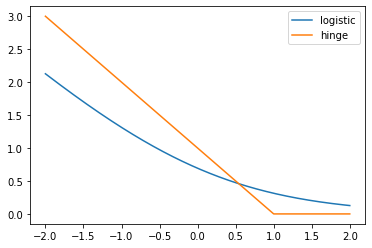

In [44]:
# Mathematical functions for logistic and hinge losses
def log_loss(raw_model_output):
    return np.log(1+np.exp(-raw_model_output))
def hinge_loss(raw_model_output):
    return np.maximum(0,1-raw_model_output)

# Create a grid of values and plot
grid = np.linspace(-2,2,1000)
plt.plot(grid, log_loss(grid), label='logistic')
plt.plot(grid, hinge_loss(grid), label='hinge')
plt.legend()
plt.show()

In [49]:
X = [np.array([ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633, 3.28351467,  2.65287398,  2.53247522,  2.21751501,  2.25574689]), np.array([ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,  1.90870825e+00, -8.26962447e-01, -4.87071673e-01, -2.38458552e-02,  5.48144156e-01, 1.39236330e-03, -8.68652457e-01]), np.array([ 1.57988811,  0.45618695,  1.56650313,  1.55888363,  0.94221044, 1.05292554,  1.36347845,  2.03723076,  0.93968482, -0.39800791]), np.array([-0.76890929,  0.25373211, -0.59268717, -0.76446379,  3.28355348, 3.40290899,  1.91589718,  1.45170736,  2.86738293,  4.91091929]), np.array([ 1.75029663, -1.15181643,  1.77657315,  1.82622928,  0.28037183, 0.53934045,  1.37101143,  1.42849277, -0.00956047, -0.56244998]), np.array([-0.47637467, -0.8353353 , -0.38714807, -0.50565045,  2.23742148, 1.24433549,  0.8663016 ,  0.82465565,  1.0054018 ,  1.89000504]), np.array([ 1.17090767,  0.16064943,  1.13812505,  1.09529491, -0.12313623, 0.08829524,  0.3000724 ,  0.64693511, -0.06432462, -0.76233215]), np.array([-0.11851678,  0.35845013, -0.07286684, -0.21896491,  1.60404905, 1.14010235,  0.06102575,  0.28195026,  1.40335463,  1.66035318]), np.array([-0.32016686,  0.58882978, -0.18408038, -0.38420727,  2.20183876, 1.68400981,  1.21909628,  1.15069158,  1.96559991,  1.57246173]), np.array([-0.47353452,  1.10543868, -0.32948179, -0.50906338,  1.58269942, 2.56335845,  1.73887209,  0.94176033,  0.79729802,  2.78309559]), np.array([ 0.53755602,  0.91927331,  0.44201066,  0.40645325, -1.01768583, -0.71354185, -0.70068435, -0.40468555, -1.03547556, -0.82612434]), np.array([ 0.46939261, -0.3257076 ,  0.47908184,  0.35867233,  0.05264242, 0.47111513,  0.13484898,  0.44213089,  0.11092067, -0.28034677]), np.array([1.43220073, 1.28229578, 1.66535961, 1.33135542, 0.07399205, 2.68085763, 1.47772869, 1.62194764, 2.13719425, 2.155097  ]), np.array([ 0.4892736 ,  1.08449508,  0.48320086,  0.3635073 , -0.87891322, -0.07847778,  0.13284018,  0.12176963,  0.12917538, -1.33504419]), np.array([-0.11283649,  0.77266808,  0.06717984, -0.21782727,  1.19128949, 2.36815822,  1.55682501,  0.8081475 ,  0.93968482,  1.98781972]), np.array([0.117215  , 1.91991217, 0.19610517, 0.01112299, 1.24822184, 1.04534495, 0.94288692, 0.63764927, 1.79400557, 1.13016926]), np.array([ 0.15697699,  0.19555543,  0.11413667,  0.08421643,  0.16437216, -0.6129095 , -0.18643273,  0.09468595, -0.82372084, -0.50716342]), np.array([0.56879758, 0.32354413, 0.66443774, 0.40929736, 1.46883471, 1.85457312, 1.04709318, 1.3898018 , 1.28652444, 1.5256808 ]), np.array([ 1.61396982,  0.66562299,  1.56650313,  1.72099748,  0.1387526 , -0.03109908,  0.74200738,  1.18809286, -0.83832462, -1.25424076]), np.array([-0.16679919, -1.1471623 , -0.18572799, -0.2519565 ,  0.10174657, -0.43685025, -0.27820957, -0.02860929,  0.26791123, -0.72830966]), np.array([-0.29744572, -0.83300824, -0.26110605, -0.38363845,  0.79276301, 0.42942187, -0.54136176, -0.45962673,  0.56728859,  0.75308658]), np.array([-1.31308049, -1.59395919, -1.30280622, -1.08357211,  0.42981926, -0.74708597, -0.7437479 , -0.72633651,  0.01234519,  0.88634137]), np.array([ 0.34442636, -1.17043297,  0.43377262,  0.14081407,  0.77852992, 2.06872484,  1.49279465,  1.25464133,  2.58991123,  1.06637708]), np.array([ 1.99738898,  0.87273197,  1.86307257,  2.13054826, -0.14804413, -0.04057482,  0.26240749,  0.96471697, -0.1555982 , -1.42010044]), np.array([0.71648496, 0.48643882, 0.74269913, 0.71020341, 1.12012404, 0.78381454, 0.79976025, 1.1034886 , 0.66951501, 0.07121903]), np.array([ 0.85565191, -0.6724406 ,  0.98984033,  0.73324064,  1.58269942, 2.3359407 ,  1.68363021,  2.35191734,  4.48475086,  1.60648423]), np.array([ 0.12857557,  0.52134483,  0.2241145 , -0.02869445,  0.64331558, 1.56272034,  0.67421054,  1.00366588,  1.60780746,  0.91327584]), np.array([ 1.27315278,  0.22348024,  1.24110055,  1.24887645, -0.13950428, 0.04281169,  0.75581785,  0.73231319, -0.41846613, -0.82328913]), np.array([0.33306579, 1.39166794, 0.4296536 , 0.22044894, 0.84257882, 1.23865004, 0.99812879, 0.99541181, 0.41759991, 0.36891588]), np.array([ 0.97777802, -0.98659467,  0.94865013,  0.85383059,  0.15013907, 0.21527015,  0.12493055,  0.78957583, -0.2651265 , -0.1853673 ]), np.array([ 1.27883307,  1.35443486,  1.35231409,  1.23181183,  0.71448103, 1.59872815,  1.79662495,  1.94695182,  1.35589236, -0.11732231]), np.array([-0.64962332, -0.13721517, -0.5782706 , -0.6094602 ,  1.03472551, 0.89562827,  0.41432264,  0.07482458,  1.78670368,  2.15367939]), np.array([0.82157021, 1.09147628, 0.85803169, 0.69512967, 1.6609814 , 0.85772531, 1.91966367, 1.84119649, 1.59320368, 0.14493444]), np.array([ 1.46060215,  1.67091599,  1.48000371,  1.44227543, -0.1672588 , 1.2803433 ,  0.96548587,  0.69671749,  0.15108104, -0.02659565]), np.array([ 0.56879758, -0.32803467,  0.61912852,  0.43318782,  0.54368397, 0.97711963,  0.58507024,  0.73772993,  0.68046784,  0.33347578]), np.array([ 0.74204624,  0.53530723,  0.74681815,  0.61037541, -0.01852303, 0.55450164,  0.57753726,  0.29046227,  0.30807161, -0.8842461 ]), np.array([ 0.03485089,  0.56555911,  0.06841555, -0.06225486,  0.13305937, 0.10345643,  0.54112784,  0.18212755,  0.26791123, -0.2193898 ]), np.array([-0.31164643, -0.20237305, -0.38550046, -0.37283086, -0.46473035, -1.2637033 , -0.79321448, -0.50786148, -1.25818311, -0.59080206]), np.array([ 0.24502139,  1.37537847,  0.14708883,  0.12488709, -0.17722196, -1.0050156 , -0.81380464, -0.51405204, -0.90039066, -1.09972192]), np.array([-0.18384004,  0.35612307, -0.1470092 , -0.27214963,  0.3728869 , 0.40099465,  0.21972058,  0.14111511, -0.33449443,  0.19738579]), np.array([-0.19520061,  0.53298017, -0.23845144, -0.26134204, -1.04899863, -0.83445229, -0.72441324, -0.7379438 , -0.10083405, -0.98206078]), np.array([-0.90239596,  0.47945762, -0.8266475 , -0.80712533,  1.87447773, 0.33087418,  0.19586614,  0.20044127,  0.30442067,  0.83672522]), np.array([ 1.40379931,  1.28462285,  1.49647979,  1.27731747, -0.39498821, 2.17295798,  1.53045957,  1.307519  ,  1.81956218,  0.08964789]), np.array([-0.24064288,  0.23046144, -0.19149462, -0.31196707,  0.55080051, 0.74401643,  0.12141516,  0.32657385,  0.59284519,  0.71197607]), np.array([-0.27188444,  0.58650271, -0.269756  , -0.35093127,  0.05548903, 0.00680388, -0.07795778,  0.09288037, -0.2395699 , -0.14567439]), np.array([ 1.28451335, -0.39319255,  1.30700487,  1.1976826 ,  0.96356007, 1.21780342,  1.36347845,  1.34079323,  0.34823199, -0.32712771]), np.array([-1.68457106, -0.57004965, -1.65827765, -1.28834749, -0.73729399, -0.85112959, -0.9154999 , -1.10919659, -0.1555982 ,  0.31646453]), np.array([-0.27188444, -0.14652343, -0.24668948, -0.34211455,  1.38343618, 0.3555111 ,  0.42436661,  0.63145872,  1.15509048,  0.70488805]), np.array([-0.58998034, -1.08433149, -0.57373967, -0.58471651,  0.47963507, -0.25434751, -0.28724915, -0.55274301, -0.49878688, -0.33563333]), np.array([-0.1809999 ,  0.700529  , -0.2083826 , -0.26703025, -0.62912252, -0.51853113, -0.51838617, -0.38895122, -0.00956047, -0.79635465]), np.array([-0.67234446,  0.5376343 , -0.71049114, -0.6455803 , -0.71096278, -1.03628555, -0.90683697, -0.97421668, -1.15595669, -0.55536196]), np.array([-0.13839777, -0.68640301, -0.19602554, -0.23631394, -1.38845778, -0.82914588, -0.88172703, -0.81738927, -1.67439066, -0.4632177 ]), np.array([-0.62122191, -0.24426025, -0.66971284, -0.61799251, -0.97854484, -1.07703123, -0.86728881, -0.91385876,  0.20584519, -0.24065386]), np.array([ 1.16238725, -0.13721517,  1.16695819,  1.07538619,  1.31227074, 0.83687868,  1.10986804,  1.47234254,  1.02365651,  0.04286695]), np.array([ 0.27626295,  0.63537112,  0.21793597,  0.16470453, -0.41277957, -0.63546176, -0.45536021, -0.40184821, -0.71419254, -0.84455319]), np.array([-0.74050787, -0.12557983, -0.76733362, -0.69933384, -0.07972531, -0.94020155, -0.73370392, -0.67423267,  0.39569425, -0.52842748]), np.array([ 1.4435613 , -0.16746704,  1.38114723,  1.4138344 ,  0.63619904, 0.42373643,  0.54614983,  1.05809119,  0.38474142, -0.45187686]), np.array([0.16549742, 0.53530723, 0.14750073, 0.0057192 , 1.23398875, 0.60946093, 0.50848492, 0.8334256 , 0.78634519, 0.67795357]), np.array([-0.30596615,  0.00473593, -0.38550046, -0.36316091, -1.12158738, -1.25934446, -1.1061848 , -1.15433606,  0.02694897, -1.10397473]), np.array([-1.56471706, -1.74521855, -1.54994742, -1.22407077,  0.0825319 , -0.97829402, -0.85611489, -1.06065232, -0.46957934,  1.28610571]), np.array([-1.12392703, -1.02615481, -1.12939548, -0.97549621,  1.21263912, -0.44973726, -0.97877696, -0.92907721,  3.40042067,  0.96430959]), np.array([-1.57039735,  0.39335614, -1.53676656, -1.23174985,  1.98834244, -0.27879491, -0.73822371, -1.0229931 ,  0.05980746,  0.67653597]), np.array([ 0.03485089,  0.66562299,  0.18333621, -0.02613475,  0.60773286, 1.82804105,  1.56561349,  0.97013371,  0.50157161,  1.43495414]), np.array([-1.40708919, -1.26351565, -1.34976305, -1.12054544, -1.36283822, -0.31897205, -0.36308117, -0.69951077,  1.93274142,  0.9685624 ]), np.array([-0.4110514 ,  1.05889734, -0.38220524, -0.44336461,  1.12724059, 0.41426069,  0.3013279 ,  0.51100082,  0.3409301 ,  0.43979609]), np.array([0.18537841, 1.08216801, 0.2237026 , 0.03814197, 1.4830678 , 0.82550779, 0.47584199, 1.06711908, 0.51617538, 0.53052275]), np.array([-1.32415704,  0.40033734, -1.31227996, -1.09637057,  0.57215014, -0.50431752, -0.84217887, -0.87387809, -0.34544726,  0.87783574]), np.array([-0.80015085, -0.05809488, -0.83076652, -0.74171097, -1.06536668, -1.08650697, -0.64920897, -0.68661378, -1.07928688, -0.86865246]), np.array([-1.44798723, -0.45602336, -1.36665103, -1.15012411,  0.72871411, 0.70042803,  2.81483311, -0.13333286,  1.09302444,  2.5038276 ]), np.array([-0.38264998, -0.651497  , -0.43657631, -0.43341025,  0.1387526 , -0.98549558, -0.65623975, -0.52307993, -0.80911707, -0.88849891]), np.array([ 1.36687747,  0.47014935,  1.30288585,  1.35126414, -0.44622733, -0.02730878,  0.24106404,  0.78905995, -0.83832462, -1.16067889]), np.array([-1.48803323, -1.08200442, -1.36665103, -1.16861077,  0.10459319, 0.92405548, -0.03439203, -0.52101641,  0.32997727,  3.82786979]), np.array([0.87269277, 1.2171379 , 0.91569797, 0.78073716, 0.76429684, 1.49070472, 1.00942827, 0.78725437, 0.42125085, 0.29378287]), np.array([-0.0929555 , -0.8143917 , -0.06339309, -0.20133147,  0.30883801, 0.44837335, -0.13696614,  0.04567738, -0.54624915,  0.40577359]), np.array([-0.51613665, -0.6445158 , -0.52637094, -0.52328389, -0.33022766, -0.68321948, -0.69151922, -0.67578031, -0.33449443, -0.51850426]), np.array([ 0.55175672,  0.08385621,  0.49967694,  0.4630509 , -0.33307428, -0.38094339,  0.11162228,  0.45038496, -0.04972084, -1.25991118]), np.array([-0.16963933, -1.94301926, -0.1671924 , -0.27214963,  2.32993656, 0.00680388, -0.25146748,  0.4292339 ,  2.15909991,  0.51209389]), np.array([ 1.11410483, -0.73061728,  1.16283917,  0.99859542,  0.72159757, 2.08957147,  0.99938429,  1.52393051,  1.24271312,  0.55745722]), np.array([1.71905507, 1.08914921, 2.13080887, 1.67833594, 2.29435384, 4.56842498, 3.59826331, 2.87553518, 3.99552444, 2.63991758]), np.array([-0.35992884, -0.30010986, -0.36161014, -0.42260266,  0.21205301, -0.16830779, -0.62661002, -0.66468889, -0.34179632, -0.40084312]), np.array([-0.76038886,  0.39102907, -0.74797422, -0.72066461,  0.98490971, -0.20317851, -0.53847412, -0.68583996,  0.11092067,  1.02810177]), np.array([-0.22360203, -0.79810223, -0.22568248, -0.38363845,  0.81411264, 0.93163608,  0.35280328,  0.54040596,  0.47601501,  0.88208855]), np.array([3.15048662, 1.30789352, 3.27589644, 3.4786529 , 0.70736448, 3.07315325, 3.07723201, 3.49717016, 0.0634584 , 0.71197607]), np.array([ 1.41231974,  1.62902878,  1.52943195,  1.35695235,  1.7890792 , 1.41679395,  1.31702506,  2.52731642, -0.64847556,  1.33855706]), np.array([-0.60418105, -0.84697064, -0.61863699, -0.60178112,  0.06189392, -0.61954251, -0.59371599, -0.78127769,  0.97619425, -0.44195364]), np.array([ 1.23055065, -0.17910237,  1.19991035,  1.1948385 ,  0.16935374, 0.01817477,  0.5612158 ,  1.00676116,  1.16969425, -0.36540302]), np.array([ 0.10017415,  0.50505536,  0.09395347, -0.0190245 , -0.13665766, -0.09231236,  0.39674568,  0.01188726,  0.96159048, -0.91259818]), np.array([ 1.3895986 ,  1.23342737,  1.23698153,  1.1976826 , -0.43199424, 0.3081324 ,  0.72819691,  0.87160069,  0.51617538, -0.92252141]), np.array([-0.50193594,  0.58417564, -0.50206873, -0.53693558, -0.61488943, -0.18744878, -0.35969133, -0.29583495,  0.43220368,  0.17612173]), np.array([ 0.14561642, -0.94238039,  0.15656258, -0.00850132,  1.19840603, 0.56018708,  0.13635558,  0.56026733,  1.11127916,  0.0939007 ]), np.array([ 0.13993614,  1.10078455,  0.10713434,  0.02221499, -0.47113524, -0.3464517 , -0.72541764, -0.49909153, -0.46227745, -0.58654925]), np.array([ 0.35294679,  0.80757409,  0.33903516,  0.20850371, -0.31030134, -0.01404275,  0.29379491,  0.66834411, -0.34544726, -0.25908271]), np.array([-0.24348302, -1.05407961, -0.29776533, -0.2934804 , -1.62330374, -1.01941873, -0.70545524, -0.57879493, -1.55390952, -1.36339627]), np.array([-0.19236047, -0.23029785, -0.22115156, -0.28381045,  0.41558617, -0.43002772, -0.61593829, -0.54474688, -0.63387179, -0.80769548]), np.array([0.26490239, 0.12574342, 0.34315418, 0.14422699, 0.53656742, 0.96574874, 1.01947224, 1.01191996, 0.15838293, 0.00600925]), np.array([ 1.74177621,  0.8704049 ,  1.66535961,  1.73237389, -0.39712318, 0.51091323,  0.72443042,  0.9778719 ,  1.03460934, -0.89416933]), np.array([-0.5530585 , -0.33734294, -0.58403722, -0.57959712,  0.57926669, -0.64001011, -0.80225406, -0.50321856,  0.32267538,  0.50358827]), np.array([-1.23270447,  0.15134116, -1.22989956, -1.02498359,  0.42981926, -0.97279809, -1.02913495, -1.05709275, -1.68534349,  0.8650773 ]), np.array([-0.71778673, -1.5008765 , -0.72614342, -0.68909507, -0.46473035, -0.55131719, -0.58806626, -0.39772118, -0.69958877,  0.42845526]), np.array([ 0.0831333 ,  0.11178102,  0.10342722, -0.03523588,  0.0825319 , 0.18494779,  0.06378784,  0.24429104,  0.24600557,  0.15627528]), np.array([-0.1469182 ,  1.32418299, -0.16142577, -0.20531322, -0.10534487, -0.3644556 , -0.03200659, -0.10392772, -0.73974915, -0.57946123]), np.array([-2.0296483 , -1.36357954, -1.98450403, -1.45444309,  1.46883471, -0.54316805, -1.11487284, -1.26181958,  0.43220368,  2.18061387]), np.array([-0.5530585 ,  0.28631105, -0.60751564, -0.55798194, -1.15503513, -1.21215527, -0.81568788, -0.8052661 , -0.2651265 , -0.85447642]), np.array([-1.20742721,  0.02567953, -1.1541096 , -1.014176  ,  0.29460492, -0.13969105, -0.34223992, -0.48051986,  0.48696784,  0.0598782 ]), np.array([-1.03304249e+00,  8.17949781e-05, -1.01159150e+00, -9.06668923e-01, 2.51193999e-01, -3.51758110e-01, -7.38851459e-01, -9.52033856e-01, 1.48002444e+00,  2.85277245e-01]), np.array([-0.2889253 , -0.86791424, -0.19602554, -0.35462861,  3.09140679, 1.3675201 ,  1.48526167,  1.21466066,  0.41394897,  2.00199576]), np.array([-0.70642616, -0.22331665, -0.69195555, -0.68937948,  1.26957147, -0.05005056, -0.22723639, -0.3628993 , -0.03876801,  0.3405638 ]), np.array([-0.50193594, -0.17444824, -0.53378518, -0.53522912, -0.82482748, -0.68587269, -0.78304496, -0.76631718, -0.76530575, -0.30302844]), np.array([2.31264474, 0.08851035, 2.5056397 , 2.42917903, 2.5790156 , 3.26835349, 4.23856683, 3.44042339, 2.71769425, 1.07630031]), np.array([-0.79163042,  0.45851402, -0.80275719, -0.73488513, -0.62414094, -0.73135624, -0.47042618, -0.77199186, -1.18516424,  0.35332224]), np.array([-1.23554461, -0.53514364, -1.21383539, -1.03721323,  0.52233433, -0.38473368, -0.5707404 , -0.80320258, -0.83102273,  1.11315801]), np.array([-0.42525211,  0.34216066, -0.40444795, -0.49626492,  0.21134135, 0.31381785,  0.22223158,  0.29123609, -0.27973028,  1.12024604]), np.array([ 0.03769103,  0.08385621,  0.24141439, -0.07107158, -1.28028631, 2.25444934,  2.65538498,  0.74959516, -0.39290952,  2.11115127]), np.array([-1.02736221,  0.20951784, -0.96092756, -0.91207272,  1.12724059, 0.49196175, -0.30181292, -0.47046021,  0.40299614,  2.12958012]), np.array([-1.53404353, -0.80508343, -1.48816212, -1.20586852,  1.32650383, -0.42320519, -0.59610144, -0.76554336, -0.59371141,  1.91835712]), np.array([-0.62406205,  0.52134483, -0.63593688, -0.61514841,  0.09391837, -0.48991439, -0.69704341, -0.74387642, -0.45132462, -0.12157512]), np.array([-1.47042435, -0.8213729 , -1.36871054, -1.16519785, -0.12384788, 0.37825288,  0.04809413, -0.66649447, -1.84963594,  1.25208321]), np.array([ 0.21093969, -0.60960979,  0.27477845,  0.07852822,  1.41190236, 1.14768294,  1.00691727,  1.03977746,  1.26096784,  0.69212961]), np.array([0.46939261, 0.84248009, 0.56558126, 0.36322289, 1.36208655, 1.34288318, 1.56310249, 1.183192  , 1.03826029, 1.49024069]), np.array([ 1.08570341,  0.16763063,  0.91569797,  0.93033696, -0.87820157, -0.70349757, -0.1992388 ,  0.18161167,  1.15874142, -1.77875426]), np.array([-0.77174943, -1.97094406, -0.76733362, -0.71554523, -0.18718512, -0.71050961, -0.67394226, -0.58524343, -0.52799443, -0.23640105]), np.array([ 1.28735349, -0.50489177,  1.21226741,  1.2005267 ,  0.64331558, 0.10724672,  0.71438645,  0.97322898,  0.56363765, -0.09464064]), np.array([2.87499285, 0.2118449 , 3.05758838, 3.14589289, 3.44011745, 3.45597313, 4.24358882, 3.92792966, 3.07913765, 0.84664845]), np.array([ 0.10585444, -1.95465459,  0.09518918, -0.04035527,  0.97779316, 0.10535157, -0.0047623 ,  0.22855671,  0.16203387,  0.17328652]), np.array([-0.2150816 , -0.67476767, -0.24174666, -0.28836101, -1.7941008 , -0.58922015, -0.09892458, -0.53958808, -1.42247556, -0.64750622]), np.array([-0.07875479, -0.48394817, -0.14536159, -0.1882486 , -0.60563792, -0.81455324, -0.93659225, -0.96751025, -0.72149443, -0.55252675]), np.array([-0.1469182 ,  1.25669804, -0.17337093, -0.23403865, -0.26902538, -0.4874507 , -0.45134262, -0.46607523, -0.18480575, -0.21230178]), np.array([ 1.38391832, -0.08834676,  1.29464781,  1.37401696, -1.00985763, -0.45599125,  0.04909853,  0.1896078 ,  0.49061878, -1.75181979]), np.array([ 0.27626295, -0.67476767,  0.31349724,  0.0557754 ,  1.32650383, 1.44711632,  0.31388287,  0.93943887,  0.69142067,  0.26543079]), np.array([ 1.60828953,  1.35676193,  1.58297921,  1.5275985 ,  0.36577036, 1.03397406,  2.0803673 ,  1.70190899,  1.42526029, -0.23640105]), np.array([-0.55021836, -1.39615848, -0.53090187, -0.56622984,  0.72871411, -0.17531984, -0.75642842, -0.51843701,  0.24965651,  0.2711012 ]), np.array([ 0.37850807,  0.04429607,  0.40082046,  0.26737664,  0.91374426, 0.34034992,  0.72568592,  0.82413977,  0.43585463, -0.68578153]), np.array([ 0.577318  ,  0.5236719 ,  0.58617636,  0.44058249,  0.31595455, 0.45595394,  0.19461064,  0.18599664,  1.27192067, -0.55110915]), np.array([ 0.44951161, -1.24722618,  0.41317752,  0.30378115, -0.12384788, -0.18422703, -0.21907566,  0.26853739,  0.01599614, -0.78926663]), np.array([ 1.22771051,  0.60977338,  1.16283917,  1.1948385 , -0.14662082, -0.13741688,  0.33271532,  0.50429439, -0.43672084, -0.78359621]), np.array([-0.38549012,  0.74008914, -0.42215974, -0.42260266, -0.41349123, -0.88562128, -0.52340816, -0.5643503 , -0.82737179, -0.30444604]), np.array([-0.68654517, -0.60960979, -0.71049114, -0.65780994,  0.62196595, -0.82232334, -0.66389828, -0.59117604, -1.72550386, -0.47455853]), np.array([-0.76606915, -0.90747438, -0.77886687, -0.72549959,  0.00211495, -0.6718486 , -0.67507221, -0.52024259, -0.28338122, -0.58796685]), np.array([ 0.23366083, -0.40017375,  0.20104799,  0.06601417,  1.44748508, 0.49575205,  0.81733721,  0.96265345,  0.53077916, -0.09038783]), np.array([-0.80867127, -1.37288781, -0.78133828, -0.76816113,  1.42613545, 0.17547205, -0.53294993, -0.02474019, -0.14829632, -0.29452281]), np.array([-1.24662117, -1.70333134, -1.26573504, -1.04204821, -0.27471862, -1.20002633, -1.11487284, -1.26181958,  0.33362821,  0.20163861]), np.array([ 0.56311729, -0.28847453,  0.54086714,  0.44968361,  0.06047061, 0.1773672 ,  0.07119528,  0.27111679,  0.18028859, -0.0450245 ]), np.array([-0.76606915, -0.4606775 , -0.75415275, -0.73061897,  0.91374426, -0.17967868, -0.85988138, -0.78179357, -0.60831518,  0.40010317]), np.array([-0.34856828, -0.78413983, -0.33895553, -0.40582245, -0.6824966 , -0.17531984, -0.50043256, -0.46530141, -0.12273971, -0.06345335]), np.array([-0.9591988 , -1.0052112 , -0.97657983, -0.85206215, -1.31159911, -1.00349949, -0.83226044, -1.05869197, -1.50644726, -0.83888277]), np.array([-0.63258247, -1.07967735, -0.57085636, -0.6316442 ,  1.34073691, 0.47869572, -0.64908342, -0.48722629,  0.66951501,  2.21038356]), np.array([-0.66098389, -0.6305534 , -0.53460898, -0.63391948,  0.90662772, 1.24433549,  0.96799686,  0.65080421,  3.16310935,  1.54694486]), np.array([ 0.23366083, -0.1209257 ,  0.24182629,  0.09843694, -1.06607833, 0.23422163,  0.02135204, -0.34303793, -0.24687179,  0.30228849]), np.array([ 0.08881359, -0.95634279,  0.08242022, -0.04206173,  0.23767256, -0.04246997, -0.04933245,  0.16510352, -0.31989066, -0.28176438]), np.array([-0.10999635, -0.32105347, -0.15854246, -0.19877178, -1.20413929, -0.76906969, -0.75316413, -0.91901756, -1.23627745, -0.99198401]), np.array([-0.32016686,  0.3468148 , -0.34842928, -0.38534491,  1.21975566, -0.53918824, -0.72114895, -0.57956875,  2.65927916, -0.27325875]), np.array([-1.67803873,  0.32819826, -1.59402093, -1.28265929, -0.16441218, 0.49575205,  0.54363884, -0.70260605,  1.49827916,  2.80861247]), np.array([-1.24860926, -0.91910972, -1.16111193, -1.00877221,  0.77141338, 1.05292554,  4.04270928,  0.76481361,  2.6884867 ,  4.27583267]), np.array([-0.84559312, -1.44502689, -0.86907341, -0.77640902,  0.08395521, -1.00842687, -0.86603332, -0.80113906,  0.06710934, -0.24774188]), np.array([-0.27756473, -0.91910972, -0.27428692, -0.32988491, -0.17935693, -0.36691929,  0.05186062, -0.36341518,  0.0379018 , -0.10314627]), np.array([-0.5331775 , -0.31407227, -0.56426593, -0.55343138, -0.69886465, -0.7116467 , -0.62711222, -0.66056186,  0.57824142, -0.07337658]), np.array([ 1.00901958,  0.33750653,  1.04750661,  0.87828988,  1.07742478, 1.17800531,  1.2140743 ,  1.45686615,  0.58189236, -0.16126803]), np.array([ 0.77044766,  0.03964194,  0.6767948 ,  0.64080731, -1.55925484, -0.60855066, -0.46829183, -0.54706833,  0.11822255, -1.43427648]), np.array([-0.5871402 , -1.52414717, -0.62316791, -0.58670738, -0.2313077 , -0.98416898, -0.86728881, -0.75548371, -0.80911707, -0.52842748]), np.array([-0.91659667, -1.4729517 , -0.95886805, -0.81935497, -1.50943904, -1.27280001, -1.07607798, -1.09188883, -1.34945669, -0.76091455]), np.array([-0.6751846 ,  0.20719077, -0.65364866, -0.66861753,  0.89239463, 0.18494779, -0.25573617, -0.29764052,  0.66221312,  0.24558433]), np.array([ 1.43788102, -0.77948569,  1.41409939,  1.42805491, -0.67039847, 0.2683343 ,  0.38293521,  1.23168469, -0.25782462, -1.56469605]), np.array([ 1.5514867 , -0.26520386,  1.59533627,  1.59016876,  1.1130075 , 1.17990046,  2.03391391,  2.05528654,  0.78634519, -0.28034677]), np.array([-0.50761623,  0.68191246, -0.49918541, -0.54148615,  0.34442073, -0.05384085, -0.4406709 , -0.5339134 , -0.95150386,  0.68220638]), np.array([ 2.59665894,  0.64002525,  2.47680656,  2.9325852 , -0.85187035, 0.19252838,  0.54740533,  1.24071258, -0.03876801, -1.03025932]), np.array([ 0.23934111,  0.10945395,  0.14544122,  0.10042781, -0.86468013, -0.96313284, -0.87042756, -0.76167427, -1.08293783, -1.43711168]), np.array([-0.94499809, -2.22924851, -0.95557283, -0.84552072, -0.0299095 , -0.89035915, -0.79710653, -0.82383776, -1.57216424,  0.17045132]), np.array([ 0.7534068 , -0.11394449,  0.71386598,  0.65815634, -0.54870557, -0.23729117, -0.05749318,  0.43439269,  0.29711878, -1.0571938 ]), np.array([ 0.9493766 ,  1.25437098,  0.99395935,  0.93773162,  0.60773286, 1.06050614,  1.59574542,  1.42849277, -0.99896613,  0.12083517]), np.array([ 0.23934111, -0.54445191,  0.17509817,  0.08819817,  0.15583231, -0.48309186, -0.7881925 , -0.28654911, -0.11543783, -0.89275173]), np.array([-0.51329651, -1.60559452, -0.54037561, -0.54262379,  0.45828543, -0.65441324, -0.61430615, -0.30744224,  0.53808104, -0.46038249]), np.array([-0.19804075,  0.07920208, -0.25245611, -0.25451619, -0.41847281, -0.78574699, -0.37940264, -0.37502247, -0.77990952, -0.86298204]), np.array([ 0.37850807, -1.72194788,  0.43377262,  0.2332474 ,  2.08797406, 0.96953903,  1.43629728,  1.56778028,  0.56363765,  1.11882843]), np.array([-0.86547411, -1.06571495, -0.89625894, -0.80257477,  0.30172146, -0.88903255, -0.81819888, -0.59556102, -0.89673971,  0.55178681]), np.array([-0.98476008, -0.963324  , -1.00829629, -0.86827354, -0.60065634, -1.16212337, -1.11487284, -1.26181958,  0.4249018 , -0.43203041]), np.array([-1.54966431, -1.12621869, -1.5466522 , -1.2163917 , -0.35442391, -1.16705075, -1.11487284, -1.26181958, -0.32719254,  0.62975503]), np.array([-1.19947481, -0.28614746, -1.12733597, -1.00251518,  0.04481422, 0.47490542,  0.52606188, -0.3033152 , -0.52069254,  2.60305988]), np.array([ 0.66252226,  0.1909013 ,  0.71386598,  0.50628126,  0.1387526 , 0.97143418,  1.13623347,  1.02507489, -0.06432462,  0.0612958 ]), np.array([-0.31732672,  0.68191246, -0.41021458, -0.3654362 , -2.40897022, -1.61013634, -1.09484767, -1.21404913, -1.52105103, -1.48247501]), np.array([-0.37412955, -1.44968102, -0.43987152, -0.4154924 , -0.63837403, -1.26218718, -0.99945499, -0.91875962, -1.26183405, -0.20804897]), np.array([ 3.71851501,  0.60046511,  3.71251256,  4.53665907,  0.92797735, 1.64989715,  2.48965936,  3.5822903 , -0.04241896, -0.72263924]), np.array([1.97750799, 1.69418666, 2.08961867, 1.86604672, 1.26245493, 3.38964296, 2.00754847, 2.59696017, 2.12989236, 1.58522017]), np.array([ 0.44667147,  0.23744264,  0.38022536,  0.31771725, -0.02777453, -0.30987534, -0.2871236 ,  0.07663016, -0.70689066, -1.03592974]), np.array([-0.77174943, -1.01684654, -0.75950748, -0.71924256, -0.41064461, -0.43192287, -0.33885008, -0.65282366, -2.35346613, -0.08897023]), np.array([ 0.32738551,  0.72612674,  0.28631171,  0.15844751, -0.41206792, 0.01627962, -0.44004315, -0.42016194, -0.30893783,  0.05279018]), np.array([-1.14948831, -0.97263226, -1.16193573, -0.95956923, -0.26262049, -1.08764406, -1.09482256, -1.19981085, -0.39656047, -0.32854531]), np.array([ 1.18794852, -0.16513997,  1.09693485,  1.09813901, -0.74583384, -0.37260474, -0.08925725,  0.23784255, -0.69593783, -1.21171264]), np.array([-0.68654517, -0.4886023 , -0.71213875, -0.66719548,  0.0981883 , -0.81360566, -0.63665399, -0.4263525 , -1.07928688, -0.26191792]), np.array([-0.65814375, -0.44206096, -0.68783653, -0.6427362 ,  0.30883801, -0.92333473, -0.81945437, -0.86123904, -0.34179632, -0.7084632 ]), np.array([-0.51897679, -0.78879396, -0.54119942, -0.54376143, -1.10735429, -0.60286521, -0.63225975, -0.83518712, -0.52799443, -1.14225004]), np.array([ 0.02633046,  0.8913485 ,  0.0988963 , -0.12795363,  0.79276301, 2.59557597,  1.37226693,  0.44522617,  2.08973199,  1.78935515]), np.array([-0.38549012,  0.49342003, -0.40980268, -0.41947415, -0.63125748, -0.72642886, -0.72416214, -0.52307993, -0.42941896,  0.01026206]), np.array([-1.25173342, -0.24891439, -1.28674204, -1.04318585, -1.91152378, -1.53319334, -1.11487284, -1.26181958, -0.57910764,  0.23707871]), np.array([-0.50761623,  1.76167161, -0.44563815, -0.50479722,  0.5009847 , 0.58671915,  0.24734152, -0.08509811,  0.47966595,  0.9317047 ]), np.array([ 0.20809955,  0.91229211,  0.3472732 ,  0.04695868,  0.57215014, 1.77497691,  1.01570575,  1.02817017, -0.27242839,  0.55603962]), np.array([-0.34572813, -0.68873007, -0.38879568, -0.39387722, -1.20627425, -0.96047963, -0.62861881, -0.64869662,  0.0634584 , -0.86865246]), np.array([-0.10147593,  0.69820193, -0.05515505, -0.18767978,  1.68233104, 0.42373643,  0.62399065,  0.4214957 ,  0.08171312,  0.84664845]), np.array([ 1.12262526,  0.59348391,  1.04750661,  1.04978926, -1.61191727, -0.33962916,  0.26994047,  0.22855671, -0.15194726, -1.33220898]), np.array([ 1.43504087,  0.74474328,  1.46352763,  1.40245799, -0.79209138, 0.72885525,  0.28375094,  0.4849489 , -0.16290009, -1.06428182]), np.array([ 0.09165373,  0.21649904,  0.10383912, -0.03466706,  0.16793043, 0.3081324 ,  0.36661375,  0.28066056,  0.50522255,  0.26401318]), np.array([-0.53885779,  0.06291261, -0.55314457, -0.55144051, -0.03560273, -0.44480987, -0.5891962 , -0.20246073,  0.61109991, -0.37816145]), np.array([ 0.96925759,  0.007063  ,  0.95276915,  0.84387624, -0.47540516, 0.29297122,  0.18582216,  0.66963381, -1.11579632, -1.11815077]), np.array([ 2.60233922,  1.71745733,  2.75689992,  2.92974109,  1.26245493, 1.9720723 ,  3.30824348,  2.91680555,  1.4179584 , -0.07195898]), np.array([-0.09011536,  1.03795373, -0.01684817, -0.16236727,  2.55766597, 1.37320555,  0.84119165,  1.10503623,  1.60415652,  1.61782506]), np.array([-0.47069438, -0.16048584, -0.44810956, -0.49199876,  0.23411429, 0.02765051, -0.10984741, -0.27623152,  0.41394897,  0.13217601]), np.array([ 0.28194324, -0.60728273,  0.28054508,  0.17551212, -0.54087737, -0.16034817, -0.16697253, -0.20968304, -0.7945133 , -0.41643676]), np.array([-1.20742721, -0.46998576, -1.1965355 , -1.0224239 ,  0.89239463, -0.60684502, -0.89440755, -0.75832105,  0.44680746,  0.00742685]), np.array([ 0.81873007,  0.22580731,  0.73034207,  0.70935018, -0.61488943, -0.59319996, -0.24230235,  0.12847606,  0.78269425, -1.49806866]), np.array([-0.2889253 ,  0.75637861, -0.20385168, -0.35690389,  0.27325529, 0.83308838, -0.02196261,  0.05418939,  0.14012821,  1.46047101]), np.array([ 0.32454537, -1.48458703,  0.25541906,  0.20082463, -1.03476554, -0.79673885, -0.37513395, -0.44750356, -1.652485  , -1.06853463]), np.array([ 1.83266075,  0.66329593,  1.76009707,  1.80632056, -0.38858332, 0.57724341,  0.94414242,  1.20434307, -0.17020198, -1.78017187]), np.array([-0.64962332, -0.08136555, -0.67795088, -0.64529589, -0.54443564, -0.66976393, -0.77978067, -0.90250941, -1.01722084, -0.31578688]), np.array([ 3.97128765, -0.19073771,  3.97612984,  5.24484062,  1.26957147, 0.89562827,  2.90397341,  2.8523206 , -0.59736235, -1.06995223]), np.array([ 0.93517589,  1.45915288,  0.92805503,  0.83363747,  0.30172146, 0.19442353,  0.9968733 ,  0.43980943, -1.83868311, -0.58654925]), np.array([ 0.01781004,  1.05191614,  0.03711099, -0.12567835, -0.12313623, 0.4976472 ,  0.28500643,  0.40498755,  1.54574142,  0.21723225]), np.array([-0.07591465, -0.54910605, -0.04156229, -0.21612081,  0.44405235, 0.89752341,  0.12819484,  0.18315931,  1.07476972,  0.90193501]), np.array([-0.63542262, -0.21866251, -0.60339662, -0.63335066, -0.19430167, 0.20958471, -0.28172496, -0.45137266,  0.56728859,  0.04853737]), np.array([-1.11540661, -0.42111735, -1.10880038, -0.94904605, -1.1258573 , -0.85795212, -0.38994881, -0.98556603,  0.55633576,  0.04995497]), np.array([ 1.61112968,  0.52832603,  1.55414607,  1.6356744 , -0.18006858, 0.4976472 ,  0.48211948,  0.97993542,  1.0309584 , -0.99056641]), np.array([ 1.53444584,  3.06715627,  1.48412273,  1.61576569, -0.86539179, 0.16410116,  0.32267135,  0.45012702, -1.4005699 , -1.37048429]), np.array([-0.13555763, -1.42641035, -0.1684281 , -0.24456183,  0.00709653, -0.32655264, -0.62673557, -0.60071982, -1.64883405,  0.09106549]), np.array([-0.16111891, -1.25420739, -0.13918306, -0.26617701,  0.62196595, 0.28160033, -0.12805212, -0.11372943,  0.54903387,  0.03294372]), np.array([-1.12108689, -0.40948202, -1.10591706, -0.97208328,  0.69313139, -0.36616123, -0.89290095, -0.76786482,  0.35918482,  0.89059418]), np.array([0.46087218, 0.22348024, 0.43789164, 0.30264351, 0.4369358 , 0.30434211, 0.32518234, 0.40498755, 0.4504584 , 0.03294372]), np.array([-0.24348302, -0.52816244, -0.30559147, -0.30855414, -0.84760043, -1.03097913, -0.66866917, -0.62831938, -1.15230575, -0.85872923]), np.array([ 0.06041217, -1.35427127,  0.02228252, -0.03893322,  0.19212668, -0.53255522, -0.3962263 , -0.07452258,  0.96159048, -1.17910775]), np.array([-1.0472432 , -0.89118491, -1.04413176, -0.92515559,  0.63619904, -0.51398277, -1.03147017, -0.94816476, -0.08623028,  0.24133152]), np.array([ 0.24786153, -0.87954958,  0.22576211,  0.08421643, -0.90026285, 0.09966613, -0.29817197, -0.28680705,  0.25330746, -0.52842748]), np.array([-0.42809225,  1.08914921, -0.43740011, -0.45075927, -1.23331712, -0.55055913, -0.43213352, -0.7366541 , -1.08658877, -0.36965583]), np.array([-0.36844927,  0.7075102 , -0.27634643, -0.43141938,  0.88527809, 1.43195513,  1.01319476,  0.50790554,  1.13683576,  1.38108518]), np.array([ 0.83009064, -0.04878661,  0.88274581,  0.68290003,  1.26245493, 1.00175655,  1.28312664,  1.54972449,  1.16604331,  0.06413101]), np.array([-0.79731071,  1.81286709, -0.83241413, -0.73716041, -1.95920463, -1.2547961 , -0.90985017, -1.18121339,  0.20949614, -0.92393902]), np.array([-0.82571213,  3.37898326, -0.87236863, -0.76247292, -1.32085061, -1.30009014, -1.0525123 , -1.0958611 ,  0.1218735 , -0.6404182 ]), np.array([ 1.81277976,  1.98274299,  1.74774001,  1.88879954, -0.33947917, 0.05797288,  0.83616967,  0.88939854, -1.32755103, -0.97497276]), np.array([-1.29518759, -0.78646689, -1.30816094, -1.06736072, -0.83407899, -1.20286905, -0.90746472, -0.8318339 , -0.95150386,  0.17470413]), np.array([-0.02763224,  0.45618695, -0.08975482, -0.14644029, -0.40281641, -0.66123577, -0.93131917, -0.77276568, -1.07563594, -0.63049498]), np.array([ 2.57961809,  1.78726935,  2.53447284,  2.88707955, -0.09040012, 1.21022282,  1.33334652,  1.92889603,  0.35553387,  0.04144935]), np.array([ 1.80425933,  0.50505536,  1.66947863,  1.8518262 , -0.91164932, -0.39534651,  0.02034764,  0.29149403, -1.25818311, -1.56327845]), np.array([ 0.02633046,  1.99205126,  0.02393013, -0.08813619, -1.00558771, -0.0083573 ,  0.26994047, -0.12482084, -1.71455103, -0.21371938]), np.array([ 0.94653646,  4.65188898,  0.88274581,  0.75570905,  0.12523117, 0.48248601,  0.66416656,  1.0108882 , -0.00956047, -0.44478884]), np.array([-0.13839777, -0.85860597, -0.1890232 , -0.22635958, -0.1516024 , -0.72093293, -0.52416145, -0.2994461 , -0.34544726, -0.87857569]), np.array([-0.48489509, -0.98892173, -0.55026126, -0.50735692, -1.21694907, -1.33439232, -0.982669  , -0.97602226, -0.96975858, -0.7453209 ]), np.array([-0.80299099, -0.25589559, -0.7430314 , -0.75507825, -0.03133281, 0.53365501,  0.82863668, -0.52565933,  0.88492067,  1.96939087]), np.array([-0.10715621,  1.04260787, -0.14124257, -0.18455127, -1.1336855 , -0.68738881, -0.52516585, -0.65720864, -0.14099443, -1.20604222]), np.array([ 1.497524  ,  0.97977706,  1.52943195,  1.42236671,  0.45116889, 0.97522448,  1.45764073,  1.03023369,  0.60744897, -0.39659031]), np.array([-1.03588263,  0.13272462, -1.04001274, -0.90211836,  0.75718029, -0.84582318, -0.50834219, -0.46994433, -0.27242839,  0.22715548]), np.array([-0.26336402, -0.43275269, -0.32289136, -0.32220584, -1.72293536, -1.12005108, -0.5704893 , -0.97679608, -1.18516424, -0.91401579]), np.array([-0.35140842, -1.20533898, -0.28911539, -0.40582245, -0.62342928, 0.57345312,  0.61018019, -0.23521909, -0.78721141,  0.18320975]), np.array([-0.98760022,  1.3800326 , -0.98687738, -0.8756682 ,  0.01492473, -0.60646599, -0.81619008, -0.84524677,  0.31172255,  0.06980143]), np.array([-0.74050787, -1.01451947, -0.74550281, -0.70701292,  0.35153727, -0.4976845 , -0.57149369, -0.50631384,  0.26060934, -0.15843282]), np.array([ 1.93490586,  0.99373946,  1.93309591,  2.01678415,  0.30883801, 1.06619158,  2.29003532,  2.1171921 ,  1.43621312, -0.54118592]), np.array([-0.74618815, -0.19539184, -0.76980503, -0.70388441, -0.20711145, -0.84203288, -0.78367271, -0.72814209,  0.08171312, -0.49015217]), np.array([ 1.59124868,  0.12341635,  1.59533627,  1.56741594,  0.70024794, 1.52671253,  1.91966367,  1.25051429, -0.28703217,  0.59147972]), np.array([ 0.90109419, -0.51420004,  0.86626973,  0.77732423,  0.31595455, -0.00456701,  0.4745865 ,  0.89275176,  0.00504331, -0.94520308]), np.array([ 1.51172471,  0.00939006,  1.42233743,  1.46218414,  0.50810124, 0.27401974,  0.61645767,  0.95414144, -0.1300416 , -0.89700454]), np.array([-0.04751323, -0.52118124, -0.02220289, -0.1492844 ,  0.94221044, 0.4464782 ,  0.11413328,  0.09133273,  0.35188293, -0.21230178]), np.array([ 1.54012613,  2.20614143,  1.71478785,  1.57026004, -0.26760207, 1.93227419,  1.124934  ,  1.68901199,  0.29711878, -0.06770616]), np.array([ 0.33874608, -0.46998576,  0.46260576,  0.16612658,  2.6430645 , 2.35110188,  1.95858408,  1.94179302,  2.14084519,  1.86590577]), np.array([0.4353109 , 0.90996504, 0.75093717, 0.33734156, 1.03472551, 3.92407468, 2.87258598, 2.29001178, 2.4949867 , 2.58604863]), np.array([0.39838906, 3.32080658, 0.48320086, 0.25600023, 0.70736448, 1.12873146, 1.0835026 , 0.90461699, 1.02000557, 0.52485233]), np.array([ 1.75597692,  1.80821295,  1.68595471,  1.80063235,  0.2590222 , 0.08450495,  0.79222727,  1.14553279,  0.00869425, -1.00332484]), np.array([ 0.9152949 ,  0.8773861 ,  0.78388933,  0.79126034, -0.69317142, -0.78536796, -0.75190863, -0.53004431, -0.9040416 , -1.37898992]), np.array([ 0.89825404,  0.66096886,  0.92393601,  0.83306865, -0.45334388, 0.43510732,  0.1025827 ,  0.67453467,  1.08207161, -1.15642608]), np.array([ 0.42111019,  0.0210254 ,  0.33079712,  0.29496443, -1.27815135, -0.91310093, -0.58643411, -0.52746491, -0.96610764, -1.18619577]), np.array([ 0.86985262,  0.64700646,  0.80860345,  0.77760864,  0.06402889, -0.27273044,  0.02273309,  0.42175364,  0.20219425, -0.99198401]), np.array([ 1.87526288,  2.75300221,  1.80128727,  2.1732098 , -0.1188663 , 0.18873808,  0.60139171,  0.96832813, -0.1555982 , -0.85872923]), np.array([-1.00180093, -0.07903849, -0.93456583, -0.87737467,  0.03698602, 0.19631867, -0.31298684, -0.58034257,  0.40299614,  0.29945329]), np.array([-0.15259848,  0.59348391, -0.19808505, -0.26703025, -1.19559944, -0.41221333, -0.60363442, -0.70931248, -0.64482462, -0.59647248]), np.array([-0.3570887 , -0.71665488, -0.39497421, -0.40582245, -0.15017909, -0.79882351, -0.62522897, -0.84524677,  0.72427916, -0.72405684]), np.array([-0.97055937,  0.25605918, -0.92550398, -0.88164082,  0.84257882, 0.46542968, -0.05422889, -0.52230611, -0.52434349,  0.82538439]), np.array([ 0.04621146, -0.57470379, -0.06874782, -0.0633925 , -2.28229573, -1.47046394, -1.0238493 , -1.10060719, -1.10849443, -1.28117524]), np.array([-0.80583113, -1.45433516, -0.81305474, -0.75906   ,  0.14088756, -0.53558746, -0.70495304, -0.55119537, -0.1555982 , -0.01383721]), np.array([ 2.16495736,  0.39568321,  2.27909359,  2.37798519, -0.1672588 , 1.7389691 ,  1.64094331,  1.54456569, -0.33084349, -0.12157512]), np.array([-1.24548511, -0.8423165 , -1.25502559, -1.03806646, -0.42630101, -1.08878114, -0.97639151, -0.89889825,  0.98349614,  0.04570216]), np.array([ 1.08002313,  1.20782963,  0.95688817,  0.97840229, -0.55582211, -0.64569556, -0.39936504, -0.03815306, -0.99896613, -1.09121629]), np.array([-0.63542262, -0.44904216, -0.64952964, -0.62368071,  1.86024464, -0.61101435, -0.37048861,  0.64796687,  0.74253387, -0.57379081]), np.array([-0.79447056, -1.19370364, -0.83117843, -0.73460071, -0.1829152 , -1.24361473, -1.0962036 , -1.17584824,  0.51982633, -0.65034143]), np.array([ 1.32995562,  0.16064943,  1.19167231,  1.27162927, -0.50742961, -0.86231096, -0.10796416,  0.2453228 , -0.95515481, -1.81986478]), np.array([-0.15259848, -0.33734294, -0.23598003, -0.23489189, -1.20129267, -1.20950207, -0.86415007, -0.94249008, -0.87118311, -1.07704025]), np.array([-0.07875479, -0.95634279, -0.12270698, -0.19194594, -0.08541854, -0.52042628, -0.55253569, -0.3046049 ,  1.0893735 , -0.6049781 ]), np.array([ 1.42936059,  1.70116786,  1.40998037,  1.37401696,  0.40135308, 0.77623394,  1.2969371 ,  1.23091087,  0.32997727, -0.08471741]), np.array([-0.67802474, -1.22628258, -0.73026244, -0.64728676, -1.29736602, -1.15492181, -0.83301374, -0.54913185,  1.05651501, -0.23640105]), np.array([ 1.497524  , -0.25822266,  1.45117057,  1.39392568,  0.52233433, 0.75538732,  0.92656546,  1.1793229 ,  0.29711878, -0.54969154]), np.array([ 0.60003914, -0.1209257 ,  0.69327088,  0.4272152 ,  0.72871411, 1.43764058,  1.33083553,  1.0730517 ,  0.23505274,  0.57305087]), np.array([-0.35140842, -0.8353353 , -0.32495087, -0.3933084 , -1.29380775, -0.16186429,  0.28500643, -0.38740358, -1.38596613, -0.48873457]), np.array([-0.43945282, -0.20702718, -0.50000922, -0.47180563, -0.88460645, -1.17842164, -1.0915206 , -1.18639798, -0.41846613, -0.60214289]), np.array([-0.62122191,  0.34216066, -0.58074201, -0.60832256, -0.73373572, -0.06142145, -0.28950904, -0.28396971, -0.81641896,  0.6892944 ]), np.array([-0.35140842, -1.43571862, -0.4151574 , -0.39529927, -1.90796551, -1.27071535, -0.8311305 , -0.95977205, -1.73280575, -0.99056641]), np.array([-0.81435156,  0.15599529, -0.75168134, -0.74171097, -1.15005355, 0.2607537 ,  0.04947518,  0.17954815,  2.86008104, -0.06628856]), np.array([-0.78311   , -0.09300089, -0.81552615, -0.73630718, -0.65687704, -1.02832592, -0.81367909, -0.70131635,  0.73523199, -0.46038249]), np.array([ 0.08029316,  0.10247275,  0.16727203, -0.01106101, -0.62556425, 1.19885194,  0.59511422,  0.44109913, -0.35640009,  1.29319373]), np.array([ 0.23650097, -0.04413248,  0.20846223,  0.09217991, -0.45832546, -0.11581219, -0.36910756, -0.01880758,  0.24600557, -0.60639571]), np.array([-0.33436757, -0.76086916, -0.36366965, -0.4015563 ,  0.29460492, -0.4721    , -0.34211437, -0.39256238, -0.297985  ,  0.2696836 ]), np.array([-0.64678318, -0.42577149, -0.67671518, -0.63192861, -0.8995512 , -0.90817355, -0.77739522, -0.67371679,  0.2314018 , -0.80060746]), np.array([-0.39969083, -1.28213219, -0.41968833, -0.46298892,  0.02204128, -0.38681835, -0.95316482, -0.76554336, -0.63387179, -0.2548299 ]), np.array([-0.10147593, -1.40081262, -0.16101387, -0.20531322, -0.31172465, -0.79844448, -0.9814135 , -0.76734894, -0.80181518, -0.52133946]), np.array([-0.91375653, -1.61490279, -0.94033246, -0.82817169, -0.79564965, -1.08271667, -0.9596934 , -0.90869997, -1.32390009, -0.35264458]), np.array([-0.67234446, -0.26753092, -0.69895788, -0.63647917,  0.23624926, -0.85662552, -0.77777187, -0.35516111, -0.70323971,  0.01026206]), np.array([ 0.03769103, -0.26054972, -0.03085284, -0.06197045, -2.17768254, -0.98814879, -0.80413731, -0.90741027, -0.64482462, -0.98347839]), np.array([-1.02736221,  0.8843673 , -1.03465802, -0.91207272,  0.36577036, -0.68928396, -0.80162631, -0.77818242, -0.42576801,  0.39159755]), np.array([ 1.53444584, -0.09067382,  1.54590803,  1.59870107,  1.32650383, 1.13441691,  1.64345431,  1.47750134, -0.0716265 ,  0.38592713]), np.array([-0.47353452,  0.13970582, -0.4752951 , -0.52214625, -0.8433305 , -0.055736  , -0.25736832, -0.46246407, -0.11178688, -0.0436069 ]), np.array([1.69349379, 1.06355147, 1.76009707, 1.68402415, 0.82834573, 1.5058659 , 1.75142706, 2.03981015, 1.59685463, 1.68587005]), np.array([-1.03304249, -0.15815877, -1.03424611, -0.91178831,  0.7429472 , -0.71183622, -0.82648516, -0.8026867 , -1.20341896,  0.45397213]), np.array([-0.75754872, -0.26287679, -0.75703607, -0.71611405, -0.55724542, -0.51928919, -0.69503461, -0.87439397, -1.46263594, -0.05211252]), np.array([-0.71778673,  1.2101567 , -0.73067434, -0.6760122 , -1.53861687, -0.89945586, -0.86703771, -0.9231446 ,  0.4504584 , -0.569538  ]), np.array([-0.26336402, -0.8074105 , -0.32536277, -0.33443548, -0.80063123, -0.98227383, -1.09653003, -1.17770541, -0.65577745, -0.54685634]), np.array([-1.45622364, -1.13785403, -1.46674322, -1.16206934, -1.87238279, -1.38688791, -1.068658  , -1.17226288, -0.08623028,  0.78427387]), np.array([-0.17815976, -1.53112837, -0.25863464, -0.25224091, -1.608359  , -1.29250955, -1.08024623, -1.14783598, -1.63057934, -1.339297  ]), np.array([-0.30596615, -1.26816979, -0.38138144, -0.35349096, -0.91378429, -1.26957826, -1.05763473, -1.03408451, -1.30929632, -1.07987546]), np.array([-0.68938531, -0.04180541, -0.72655532, -0.67174605, -0.58499994, -0.9818948 , -0.91612765, -0.96570467,  0.45410934, -0.21513699]), np.array([ 0.137096  , -0.83766237,  0.02928486,  0.02847202, -1.43613863, -1.31127151, -0.93320241, -0.77766654, -0.65577745, -1.45270533]), np.array([-0.38833026, -1.37754194, -0.39868132, -0.42885968, -0.59923303, -0.47115243, -0.60614541, -0.60458891, -0.76895669, -0.19812574]), np.array([-0.73482758, -1.99421473, -0.75126944, -0.69904943, -0.73942895, -0.84620221, -0.94324639, -1.03207258,  0.07806217, -0.2548299 ]), np.array([-1.57068136, -0.16048584, -1.56024497, -1.23345631,  0.78564647, -0.86932301, -1.11487284, -1.26181958,  1.2828735 ,  1.52993361]), np.array([-0.4650141 , -0.56772258, -0.52637094, -0.49285199, -0.80063123, -1.25081629, -1.05871446, -1.09614484, -2.17822085, -0.86014683]), np.array([-0.5530585 , -1.21232018, -0.60627993, -0.55030287, -1.35358672, -1.36869449, -0.97388052, -1.13153418, -0.50608877, -0.89416933]), np.array([ 1.16238725, -0.09765502,  1.10105387,  1.05832157,  0.07826197, 0.13946424,  0.30383889,  0.78880201, -0.01686235, -0.87290527]), np.array([-1.44429505, -0.09067382, -1.31392757, -1.16718872,  0.23624926, 1.75981573,  1.36473395,  0.00414907,  1.89258104,  3.49189762]), np.array([-0.48205495, -0.53281658, -0.55067316, -0.50508163, -1.47954955, -1.32283191, -0.94638513, -0.82357982, -1.23992839, -1.01891849]), np.array([-1.1012059 , -0.72363608, -1.04825078, -0.94051374,  0.69313139, 0.12809335, -0.27042549, -0.23908818, -0.25052273,  1.41652528]), np.array([ 1.71337479,  0.08618328,  1.61181235,  1.76081492, -1.15005355, -0.35441132,  0.33522632,  0.73102349,  0.4249018 , -1.67810437]), np.array([-0.35992884, -1.38917728, -0.37685052, -0.42686881,  1.21263912, -0.30324232, -0.63778394, -0.38482418, -0.98071141,  0.27818923]), np.array([1.76449734, 0.5166907 , 1.80952531, 1.73237389, 1.46883471, 1.57598638, 2.10547724, 2.61759536, 2.76515652, 0.55320441]), np.array([-0.54737821, -0.94936159, -0.57497538, -0.56025722, -0.68534322, -0.73704169, -0.86452672, -0.8253854 , -0.63387179, -0.21371938]), np.array([-0.41389154, -0.46300456, -0.44151913, -0.46924594,  0.45828543, -0.52497463, -0.71399262, -0.71834038, -0.38195669, -0.41927197]), np.array([-0.0049111 , -1.49156823, -0.07986917, -0.10918255, -0.23273101, -0.97185052, -0.8932776 , -0.55687005, -1.60137179, -0.82187152]), np.array([-0.59566063, -0.31639933, -0.65406057, -0.59410205, -1.38988109, -1.23982443, -1.09546286, -1.11757963, -1.5685133 , -0.29735802]), np.array([ 0.60855956,  0.33052533,  0.6150095 ,  0.45167449,  1.46171817, 0.52228412,  0.74075188,  0.92757364,  0.49792067, -0.00391398]), np.array([0.60571942, 0.60279218, 0.63972362, 0.48893223, 1.43325199, 0.45405879, 1.14376646, 0.79679815, 0.20949614, 0.35757505]), np.array([ 0.54039616, -0.87954958,  0.56970028,  0.39337038, -0.1032099 , 0.62083181,  0.39674568,  0.55433471, -0.10813594, -0.4306128 ]), np.array([-0.32584714,  0.0140442 , -0.30682718, -0.40070307, -0.04058431, 0.15462542, -0.22259105, -0.50089711, -0.18480575,  0.36891588]), np.array([-0.82571213,  0.13272462, -0.8249999 , -0.76105087,  0.64331558, -0.69269522, -1.05202266, -1.06622382,  0.46871312, -0.35689739]), np.array([-0.8171917 , -1.04942548, -0.84806641, -0.75337179, -0.94652039, -1.13255906, -1.10264807, -1.18595948, -0.14099443, -0.28176438]), np.array([-0.51897679, -0.06274902, -0.58033011, -0.54177056, -0.94153881, -1.18107485, -1.01749649, -1.04166794, -0.99531518, -0.47455853]), np.array([ 0.83293078,  0.39801027,  0.81684149,  0.75002085,  1.10589096, 0.02386021,  0.7784168 ,  1.30055462, -0.30893783, -0.29594042]), np.array([-0.323007  , -1.17741417, -0.32495087, -0.39984984, -0.12384788, -0.08890109, -0.64556802, -0.72066183, -0.58275858,  1.35840352]), np.array([ 1.31859505,  0.49807416,  1.27405271,  1.24318824, -0.37008031, 0.6795814 ,  0.21595409,  0.30903394,  0.51617538, -0.27892917]), np.array([-1.15800874, -0.40948202, -1.1351621 , -0.97862472,  0.30883801, -0.58903063, -0.79961752, -0.8039764 ,  0.28616595,  0.07263664]), np.array([ 2.66482234,  1.15896122,  2.60037716,  3.10607545,  0.75006375, 0.45405879,  1.78281449,  2.37513192, -0.05337179, -1.09688671]), np.array([ 0.0831333 , -0.63986166,  0.08983445, -0.03893322,  0.08182025, 0.18115749, -0.10959631, -0.17253971,  0.3664867 ,  0.18746257]), np.array([-1.28411104, -0.57004965, -1.24925896, -1.06480103, -0.82198087, -0.22857349, -0.05749318, -0.67062151,  0.81920368,  1.19821426]), np.array([-0.8711544 , -1.00753827, -0.84353549, -0.79916184,  0.49386816, -0.25339993, -0.43728105, -0.40004263, -0.1300416 ,  0.88917657]), np.array([ 1.57704797,  0.55625084,  1.56238411,  1.53328671,  0.11455635, 0.56018708,  1.22411827,  1.58325667,  0.98714708, -0.80060746]), np.array([-0.68654517, -0.89351198, -0.69772218, -0.66719548,  1.32650383, -0.5975588 , -0.6119207 , -0.42351516,  0.72062821,  0.32071735]), np.array([-1.09836575, -1.06571495, -1.06143165, -0.94790841,  0.17504698, -0.24165001, -0.66527933, -0.73639616, -0.6521265 ,  1.02810177]), np.array([-0.5871402 , -0.09067382, -0.63058215, -0.59609292, -0.88958804, -0.8793673 , -1.02058501, -1.04288026, -0.93690009, -0.32854531]), np.array([ 0.17969813, -1.05873375,  0.1194914 ,  0.03927961, -0.54158902, -0.50299092, -0.53633978, -0.35180789, -1.06103217, -0.52133946]), np.array([-0.75470858, -0.75854209, -0.78051448, -0.71725169, -0.39854649, -0.86193194, -0.79007574, -0.66288331, -0.64847556,  0.1307584 ]), np.array([-0.61838176, -1.00753827, -0.60710374, -0.64899323,  1.38343618, 0.3081324 , -0.96785413, -0.80088112,  2.36355274,  0.42703765]), np.array([-0.70074588, -0.51652711, -0.75250514, -0.66520461, -1.47670293, -1.28947731, -1.01059125, -0.96209351, -0.51339066, -0.7779258 ]), np.array([ 0.46087218, -0.01620767,  0.62324754,  0.29496443,  1.98834244, 2.50271372,  2.54364574,  1.94179302,  2.0568735 ,  1.875829  ]), np.array([ 3.29533386, -0.42577149,  3.38710998,  3.85407444,  1.31938728, 2.50081857,  3.11364142,  3.67256924,  0.52712821, -0.22506022]), np.array([ 0.27058267,  1.50104009,  0.24841672,  0.17551212,  0.42981926, -0.12604599,  0.43566609,  0.42846008, -0.6010133 ,  0.26117798]), np.array([-0.84843326, -1.21464725, -0.85383304, -0.76872995, -1.68094775, -0.8281983 , -0.5492714 , -0.8823901 , -0.44402273, -0.27892917]), np.array([-0.4451331 , -0.05111368, -0.4139217 , -0.48090676, -0.62342928, -0.01025245,  0.17828918, -0.12920582, -1.01722084, -0.13575116]), np.array([-0.30596615, -0.1628129 , -0.28334876, -0.40639127,  0.84257882, 0.4938569 ,  0.09078103,  0.18341725,  0.81555274,  0.31362933]), np.array([-0.07307451, -0.71665488, -0.14206638, -0.17402809, -0.63552741, -0.93660076, -0.92629718, -0.72324123, -1.41517368, -0.56244998]), np.array([-1.49087337, -0.88420371, -1.45109094, -1.17714308, -0.9557719 , -0.51853113, -0.52215266, -0.64766486,  0.43220368,  0.48374181]), np.array([-1.33239345, -0.22564372, -1.32422512, -1.07020482,  0.3230711 , -0.8486659 , -0.77463313, -0.89915619, -1.11579632,  0.96289198]), np.array([-0.45081339, -0.28382039, -0.5168972 , -0.46355774, -1.56565973, -1.47520181, -1.09988221, -1.12126817, -1.03547556, -1.55193761]), np.array([-0.2349626 ,  0.5306531 , -0.27717023, -0.30940737, -0.75010377, -0.76963823, -0.69503461, -0.63657345,  0.01234519, -0.82754194]), np.array([-0.38833026, -0.10463623, -0.41598121, -0.45019045,  0.02844617, -0.47039437, -0.77739522, -0.80242876, -0.19210764, -0.13716876]), np.array([ 0.67388283, -0.23262492,  0.60265244,  0.52107059,  0.03556271, -0.37260474, -0.37890044, -0.01468054, -1.15595669, -0.97355516]), np.array([-0.20656118, -0.54445191, -0.26728458, -0.29148953, -1.20912087, -0.89793975, -0.84104892, -0.88187422, -0.59006047, -0.82045392]), np.array([ 1.79289876,  0.57952151,  1.72302589,  1.81485287, -0.34588406, 0.16599631,  0.11538877,  0.74624194, -0.70689066, -1.0245889 ]), np.array([ 1.72473535,  1.75469041,  1.71890687,  1.64705081,  0.19141503, 1.1855859 ,  0.94539791,  2.00111918,  0.2314018 , -0.36823823]), np.array([-0.54453807, -0.29545573, -0.56261832, -0.55883517, -0.28824005, -0.61764737, -0.56345851, -0.73897556, -0.42576801, -0.51566905]), np.array([ 2.15359679, -0.4746399 ,  2.01547631,  2.53441083, -0.17935693, -0.35479035,  0.35154778,  0.92164102, -0.34544726, -1.73764374]), np.array([ 2.23880105,  0.60744631,  2.27497457,  2.35238826,  0.70736448, 1.72570306,  1.95858408,  2.60985716,  0.04520368, -0.19812574]), np.array([ 0.6312807 ,  0.93090865,  0.70150892,  0.52761203,  0.07541536, 0.85962045,  1.15883242,  1.00108649,  1.32668482, -0.08755262]), np.array([ 0.30182423, -1.41477502,  0.23400015,  0.16186043, -1.19061786, -0.66332043, -0.68888267, -0.57647347, -0.33084349, -1.04301776]), np.array([ 2.05703196, -0.97495933,  2.03195239,  2.07935441,  0.26613874, 0.89373312,  1.31074757,  1.9753252 ,  0.58919425, -0.13716876]), np.array([ 1.8497016 , -0.45136923,  1.76421609,  1.93430518, -0.13523435, 0.06176317,  0.80227124,  1.04442038, -0.878485  , -1.13657962]), np.array([-0.12419706, -0.74923382, -0.17007571, -0.21555199, -0.94936701, -0.76944872, -0.79396778, -0.7379438 ,  0.22044897, -0.86581725]), np.array([ 0.58015814, -0.74923382,  0.59029538,  0.3800031 ,  0.17362367, 0.74780673, -0.27984172,  0.13028164,  0.65126029,  0.41427921]), np.array([-1.01032135,  0.21649904, -0.89873035, -0.9004119 , -0.40068145, 1.16852957,  1.74766057,  0.27060091,  1.37414708,  3.07653963]), np.array([-0.18952033,  2.07582567, -0.2503966 , -0.26390173, -1.50801573, -1.0817691 , -0.95529916, -0.9737008 , -1.42612651, -0.73256247]), np.array([-0.13271749, -0.963324  , -0.15236393, -0.21128583, -0.97356326, -0.54695835, -0.58141212, -0.62445028, -0.0716265 , -0.54260352]), np.array([-0.86547411, -0.10696329, -0.76898122, -0.83414431,  1.79619574, 2.10473265,  1.00566178,  0.38048327,  1.40335463,  2.36773761]), np.array([-0.81151142, -1.4729517 , -0.77474785, -0.76389497,  1.94564317, 0.12809335, -0.12303013,  0.16974644,  0.7534867 ,  0.8990998 ]), np.array([-0.87683468, -1.01451947, -0.87731145, -0.80257477, -1.17353815, -0.63584079, -0.66967357, -0.72685239,  0.69872255, -0.04785971]), np.array([-0.58998034,  0.79826582, -0.54449463, -0.58898266, -1.9221986 , 0.05607773, -0.11763149, -0.49367479, -2.22203217,  0.53761077]), np.array([-0.49341552, -0.42111735, -0.46664515, -0.54603671,  0.55791705, 0.48059087, -0.37513395, -0.51895289, -0.11908877,  0.43696088]), np.array([-0.24064288, -1.29609459, -0.25451562, -0.32163702, -0.90595609, -0.35232665, -0.47745696, -0.52307993, -0.7105416 , -0.97213755]), np.array([ 0.13425586,  0.93090865,  0.08242022,  0.0279032 , -0.67893833, -0.71979584, -0.06151077,  0.09778122, -0.67403217, -1.22447108]), np.array([-0.54453807, -1.20999311, -0.54325893, -0.5485964 , -1.08742796, -0.49484178, -0.25623837, -0.60820007, -0.60466424, -0.17827928]), np.array([-0.07023436, -0.72829022, -0.14824491, -0.16578019, -1.85743805, -1.06187004, -0.85812368, -1.04239018, -0.74705103, -1.14225004]), np.array([-0.81151142, -0.88187665, -0.76568601, -0.74768359, -0.90453278, 0.13377879,  0.14941275, -0.55067949, -0.00590952,  1.37824997]), np.array([ 1.54012613,  0.91229211,  1.52119391,  1.47640466,  0.33018764, 0.52038897,  1.21532979,  1.37174601,  0.64760934, -0.56103238]), np.array([-1.09836575, -1.64515466, -1.07996724, -0.94790841,  0.25617558, -0.54809544, -0.87344075, -0.75419401, -0.04241896,  0.4100264 ]), np.array([-1.53177142, -0.57004965, -1.51164053, -1.19619857,  0.53656742, -0.56970012, -1.11487284, -1.26181958,  0.63300557,  1.15993895]), np.array([0.38702849, 0.15832236, 0.4296536 , 0.2554314 , 1.39766927, 0.98280507, 1.25927219, 1.08878603, 0.42855274, 0.65810711]), np.array([2.12519537, 0.69587487, 2.15964201, 2.13908057, 1.44748508, 1.97775774, 2.41307404, 2.76720046, 1.27922255, 0.46247775]), np.array([-0.57577963, -0.36526774, -0.57250397, -0.59353323,  0.46540198, -0.12813065, -0.51436858, -0.40391173,  0.45776029, -0.16835605]), np.array([-0.01911181, -0.49092937, -0.09140243, -0.13022891, -1.13226219, -0.9614272 , -0.77827407, -0.42325722, -0.62291896, -0.73114486]), np.array([-0.17531962, -0.09300089, -0.15936626, -0.27527814,  0.6788983 , 0.19631867, -0.03765632,  0.12615461, -0.0205133 , -0.28459959]), np.array([-0.3769697 , -0.42577149, -0.36737677, -0.41691445, -1.13297385, -0.29168192, -0.18706048, -0.20865129, -0.86753217, -0.75099132]), np.array([-0.8711544 , -1.03779014, -0.89213992, -0.7869322 , -1.34860514, -1.07380948, -0.77438203, -1.07491639, -1.00991896, -0.09322304]), np.array([-0.66098389, -0.47231283, -0.68824843, -0.63420389, -0.39071829, -0.79635982, -0.75667952, -0.83931415,  0.12917538, -0.36965583]), np.array([1.07434285, 0.40266441, 1.33583801, 0.96446619, 1.89582736, 2.90448508, 2.88890744, 1.8282995 , 1.10032633, 1.18403822]), np.array([-0.62406205, -1.95000046, -0.65200105, -0.60348758, -0.54372399, -0.98397946, -0.7876903 , -0.79855966, -0.76895669, -1.04727057]), np.array([-0.33152743, -0.23262492, -0.32083185, -0.36884912, -1.62615036, -0.48043865, -0.60551767, -0.7761189 ,  0.22775085, -0.53976832]), np.array([-0.33720771, -0.72596315, -0.36202205, -0.41890532,  0.17291201, -0.30286329, -0.701061  , -0.64534341, -0.27973028, -0.11306949]), np.array([-0.50761623, -1.00986534, -0.56344212, -0.52840328, -0.67893833, -1.11114389, -0.8500885 , -0.73201119, -0.878485  , -0.81053069]), np.array([-0.9052361 , -0.1628129 , -0.88884471, -0.81025384,  0.28748837, -0.56363565, -0.49415507, -0.50554002, -1.18881518,  0.47523619]), np.array([ 0.57163772, -1.03080894,  0.50791498,  0.41271028, -0.10036328, -0.36635075, -0.42434943, -0.09386806, -0.27973028, -0.57379081]), np.array([-0.36276899,  0.48411176, -0.38467666, -0.39928102, -1.48381948, -0.40141099, -0.34575531, -0.78024593, -0.84562651, -0.23498344]), np.array([ 1.09706398,  0.31888999,  1.06398269,  0.95792475,  0.51521779, 0.4938569 ,  0.39297919,  1.01424142,  0.65856217, -0.29877563]), np.array([-0.52749722, -0.3187264 , -0.5584993 , -0.53693558, -0.67680336, -0.74064247, -0.71173272, -0.57750523,  0.56363765, -0.96788474]), np.array([-0.78595014, -0.40017375, -0.80234529, -0.72549959, -0.55368715, -0.97052391, -0.765468  , -0.72014596, -0.76895669, -0.51992186]), np.array([-0.87683468, -0.57237672, -0.8670139 , -0.80115272,  0.8069961 , -0.49844256, -0.73244842, -0.62212882, -0.35640009,  0.08539507]), np.array([-1.34347001,  0.55625084, -1.32710844, -1.09807703, -1.18634793, -0.83028296, -0.64594467, -1.12954804, -1.96281518,  0.62975503]), np.array([ 0.24502139,  0.65631472,  0.22905733,  0.11038217, -0.79778462, -0.03488937, -0.25372738, -0.26204483,  0.48331689, -0.51992186]), np.array([ 0.28478338,  2.44815641,  0.19528136,  0.18376002, -0.93655723, -1.10470039, -0.5265469 , -0.55532241,  0.1474301 , -1.39741877]), np.array([-0.63542262,  0.43757041, -0.6417035 , -0.6288001 ,  0.09747664, -0.43855589, -0.79409333, -0.69976871,  0.75713765,  0.01451487]), np.array([-1.34119789,  0.56090497, -1.33328697, -1.09125118,  0.57215014, -0.8101944 , -0.85787259, -0.93758923,  0.77904331,  0.45538973]), np.array([0.38986863, 0.41662681, 0.4502487 , 0.421527  , 1.1130075 , 0.9998614 , 0.79599376, 0.92576806, 0.99809991, 0.8282196 ]), np.array([-0.40537112, -1.65679   , -0.45675951, -0.45474102, -0.60563792, -0.8793673 , -0.81857553, -0.64224813, -0.83467367, -0.00674919]), np.array([-0.84275298,  0.49342003, -0.86577819, -0.78095959,  0.38711999, -0.84449657, -1.00244308, -0.98427633, -0.71784349, -0.19245532]), np.array([-0.72630716, -0.05809488, -0.73191004, -0.69734297, -0.77572333, -0.51398277, -0.42623268, -0.89348152,  0.80094897, -0.01809002]), np.array([ 0.15981713, -1.23559085,  0.25747857,  0.00344391,  0.47963507, 1.50207561,  0.70559797,  0.3632013 ,  1.00175085,  1.596561  ]), np.array([-0.71494659, -0.76086916, -0.68001039, -0.70160912,  0.88527809, 0.23611678, -0.22384654, -0.1018642 ,  0.27156217,  0.05704299]), np.array([-0.13271749, -0.03715128, -0.10334759, -0.22635958, -0.41206792, 0.19631867,  0.09756072, -0.02061315,  0.13282633, -0.14000397]), np.array([-1.24548511, -0.03947835, -1.2373138 , -1.03863528,  0.79276301, -0.39818923, -1.00270673, -0.75445195,  2.65197727,  1.06212427]), np.array([-1.16368902,  0.46316815, -1.18541415, -0.98857908, -1.08102307, -1.23603414, -1.08386207, -1.12874843, -0.66307934,  0.22573787]), np.array([-1.03588263, -1.00288414, -1.00829629, -0.91377918,  0.12807778, -0.05763115, -0.31951542, -0.68970906,  0.41394897,  0.90051741]), np.array([-0.94499809,  0.62606285, -0.95474903, -0.83897928, -0.59425145, -0.88903255, -0.66113619, -0.89967207,  0.74618482, -0.4291952 ]), np.array([-0.8512734 , -0.62124513, -0.88554949, -0.77868431, -1.05682682, -1.25081629, -0.94299529, -0.90844203, -1.0975416 , -0.18678491]), np.array([-0.39969083, -0.37690308, -0.45264049, -0.43682317, -1.2382987 , -1.12043011, -0.93885215, -0.78850001, -1.28739066, -1.04301776]), np.array([0.21946012, 0.75405154, 0.41729654, 0.08563848, 0.22130451, 2.23928816, 2.31640076, 1.24303404, 0.8374584 , 0.87641814]), np.array([-0.49057538, -0.37457601, -0.43245729, -0.53210061,  0.64331558, 0.51659868, -0.14299253, -0.53984602, -0.00225858,  1.16560937]), np.array([ 1.71905507,  0.05825847,  1.72302589,  1.69255646,  1.20552258, 0.84445927,  1.56310249,  1.98564279, -0.31989066, -0.32145729]), np.array([ 1.33279576,  0.62373578,  1.30700487,  1.29438209,  0.38711999, 0.65494448,  0.88638955,  0.99360623,  0.47966595, -0.20946657]), np.array([ 0.20809955, -0.54677898,  0.1203152 ,  0.05350012, -0.50671796, -0.63678836, -0.69478351, -0.51972671, -0.87118311, -0.81761871]), np.array([-0.04183295,  0.07687501, -0.03497186, -0.15753229,  0.68601485, 0.1697866 ,  0.2988169 ,  0.40524549, -0.52069254,  0.3745863 ]), np.array([-0.3570887 ,  0.05825847, -0.38302905, -0.41435476, -0.35584722, -0.48347089, -0.88926001, -0.72272535,  0.18028859,  0.0953183 ]), np.array([-0.02479209, -0.77017742, -0.09016672, -0.12425629, -0.83834892, -0.8602263 , -0.67118017, -0.50244474, -0.35640009, -0.54118592]), np.array([-0.07875479,  0.07222088, -0.13547594, -0.1771566 , -0.67751502, -0.77778737, -0.94638513, -0.67036357, -0.93690009, -0.86014683]), np.array([-0.03047238, -0.84464357, -0.09799286, -0.13762358, -1.18848289, -0.91973395, -0.8528506 , -0.57776317, -0.81276801, -0.98347839]), np.array([-0.89671568, -0.48627523, -0.83364984, -0.80598769, -0.51312285, 0.13188364,  0.07245077, -0.329883  , -1.17786235,  0.51067629]), np.array([ 0.89257376,  1.42657394,  0.84155561,  0.7790307 , -0.92872903, 0.12430305,  0.39674568,  0.21772324, -1.25818311, -1.23722951]), np.array([-0.09863578, -0.8143917 , -0.14824491, -0.19621209, -0.58286498, -0.70425563, -0.9824179 , -1.00550478, -1.4845416 , -0.61206612]), np.array([-1.01032135, -0.22564372, -1.03589372, -0.89301723, -1.06323171, -1.131801  , -0.86465227, -0.97524844,  2.04592067, -0.72547445]), np.array([ 1.10842455, -0.56772258,  1.05162563,  0.95308978, -0.49034991, 0.35740625,  0.25361901,  0.35133607, -0.33449443, -0.7084632 ]), np.array([-0.6070212 ,  1.30323939, -0.59145146, -0.60746933,  0.47251852, -0.23046864, -0.43175687, -0.15938478,  0.03059991,  0.80837314]), np.array([ 1.02890057,  2.03393846,  1.04338759,  0.92919931,  0.25688723, 0.51280838,  1.01696125,  0.87727537, -0.36005103, -0.51566905]), np.array([ 0.1910587 , -0.37923015,  0.1610935 ,  0.05662863, -0.32524608, -0.29262949, -0.60401107, -0.67887558,  0.29711878, -0.55819717]), np.array([ 0.11437486,  0.01171713,  0.09395347,  0.01368268, -0.88816473, -0.49920062, -0.00790104, -0.5073456 , -1.23627745, -0.75666174]), np.array([ 1.98034813,  0.28631105,  1.90014375,  2.07366621,  0.0341394 , 0.24938282,  0.85876861,  1.71738537, -0.94055103, -0.87715808]), np.array([-0.6411029 ,  0.5236719 , -0.62357982, -0.63391948, -2.15135132, 0.0390214 , -0.01292303, -0.64637517, -1.68899443,  0.47098338]), np.array([ 1.5514867 ,  1.32883712,  1.47176567,  1.5247544 ,  0.48675161, -0.10671548,  0.96297487,  1.07588903, -0.5425982 , -1.25991118]), np.array([-0.60418105,  2.08047981, -0.62605123, -0.6040564 , -0.85329366, -0.75504559, -0.60576877, -0.76012663, -0.71784349, -0.24915948]), np.array([ 0.11437486, -1.23559085,  0.07788929, -0.03040091,  0.96356007, -0.22592029, -0.24920759,  0.41349957, -0.59006047, -0.22506022]), np.array([-0.42809225, -0.49791057, -0.46746896, -0.46071363, -0.74939212, -0.94835068, -0.7424924 , -0.67578031, -0.0460699 , -0.64325341]), np.array([-0.21224146,  2.65991952, -0.23186101, -0.27783784, -0.27827689, -0.57007915, -0.76094821, -0.419904  , -1.5940699 , -0.37390864]), np.array([-0.70926631,  2.32714892, -0.70431261, -0.68198482, -0.19857159, -0.35251617, -0.21593691, -0.74155496, -0.0460699 , -0.16126803]), np.array([-0.26052388,  1.3870138 , -0.32412706, -0.33272902, -0.601368  , -0.99099151, -0.76684905, -0.72840003, -0.70323971, -0.98631359]), np.array([-0.32016686,  1.359089  , -0.38550046, -0.38306963, -0.90168616, -1.01600746, -0.96345989, -0.80732962, -0.52799443, -1.17769014]), np.array([-1.24179292,  2.0734986 , -1.24761135, -1.03522236, -1.17567311, -1.10072058, -0.92140074, -0.99278835, -0.69593783, -0.4646353 ]), np.array([ 8.38611063e-01,  1.82915656e+00,  7.92127365e-01,  7.85003312e-01, 1.86433447e-01,  1.26198201e-01,  1.49412746e-01,  3.96991419e-01, -6.79755613e-02,  1.75643385e-03]), np.array([ 3.77531785,  1.62437465,  3.91022552,  5.25052883,  0.85681191, 1.79013809,  3.44885915,  3.09478403,  0.91047727, -0.93102704]), np.array([ 0.07745302,  1.79192348,  0.01157307, -0.02499711, -1.87949933, -0.98758024, -0.67846205, -0.81377811, -0.38195669, -1.20037181]), np.array([-0.71778673, -0.21633545, -0.74509091, -0.68881066, -0.8027662 , -0.86780689, -0.69214697, -0.80346052, -1.07928688, -0.59647248]), np.array([-0.27188444, -0.24891439, -0.31671283, -0.33443548, -1.5443101 , -0.84146434, -0.5048268 , -0.52153229, -1.30564537, -1.03592974]), np.array([-0.25200345,  0.19555543, -0.21003021, -0.3185085 , -0.96217679, 0.34034992,  0.15317924, -0.53107606, -0.76895669,  0.21581465]), np.array([-0.28040487,  0.33750653, -0.24668948, -0.33557312, -0.68391991, 0.08640009,  0.24734152, -0.3564508 , -0.91134349, -0.36823823]), np.array([-1.26650216, -0.27683919, -1.27314927, -1.04830523, -0.94296212, -0.94872971, -0.92918482, -1.1130141 , -0.48053217,  0.18746257]), np.array([ 0.98629844,  0.94021691,  1.11341093,  0.9260708 , -0.24696409, 1.82046046,  1.56686898,  1.32273745, -0.42211707,  1.54410965]), np.array([-0.71210645, -0.25822266, -0.64211541, -0.69990266,  1.50441743, 0.83308838,  0.16573421,  0.17335759,  0.53077916,  1.38250279]), np.array([-1.26678617, -0.18608358, -1.25543749, -1.04034175, -0.49106156, -0.79143243, -0.7447523 , -0.87129869,  1.55669425,  0.18888017]), np.array([-0.59282049,  2.0595362 , -0.62275601, -0.58301005, -0.62912252, -0.84032725, -0.81769668, -0.64869662,  0.15473199, -0.82470673]), np.array([ 0.2251404 , -1.01451947,  0.18457191,  0.09104227, -1.09454451, -0.35725404, -0.41945299, -0.43099541, -0.45497556, -0.86581725]), np.array([-0.52749722,  2.48538949, -0.5992776 , -0.53892646, -1.37849462, -1.33344474, -1.11487284, -1.26181958, -0.40386235, -0.45329447]), np.array([-0.92227695, -0.85395184, -0.8880209 , -0.84182338,  0.30883801, 0.04849714, -0.47268607, -0.85659612,  0.18028859,  0.78994429]), np.array([-0.36844927, -0.8283541 , -0.3739672 , -0.4208962 , -0.42416605, -0.41031818, -0.38229028, -0.46788081, -0.38925858, -0.51992186]), np.array([ 0.02065018,  0.28863812,  0.0181635 , -0.10377876, -0.50173638, 0.12240791, -0.47921466, -0.4730396 , -1.11579632, -0.38383187]), np.array([-0.06455408, -0.62124513, -0.12353079, -0.1578167 , -1.99834562, -0.96938682, -0.83565029, -0.91643816,  0.00504331, -1.05435859]), np.array([-0.74902829, -1.09363975, -0.74055999, -0.71099466,  0.58638323, -0.41808829, -0.44845498, -0.75393607, -0.11908877,  0.41711442]), np.array([0.60287928, 0.05127727, 0.73446109, 0.4576471 , 0.44405235, 1.61009904, 1.69241869, 1.10967915, 1.23906218, 0.42278484]), np.array([-0.55873878, -0.29312866, -0.56344212, -0.56765189, -0.39071829, -0.49199906, -0.74876989, -0.86794547, -1.26913594,  0.00600925]), np.array([-0.06455408, -0.01155354, -0.13341643, -0.14786235, -1.17069153, -0.96806022, -0.73885146, -0.72788415, -0.84927745, -0.97213755]), np.array([-0.18668019, -1.21697431, -0.19149462, -0.30883855,  0.76429684, 0.21147986, -0.38844222,  0.09649153, -0.11908877,  0.50925869]), np.array([-0.12135692, -0.38388428, -0.17337093, -0.23830481,  0.22343948, -0.4694468 , -0.54387276, -0.44672974, -0.29068311, -0.27184115]), np.array([ 0.4551919 , -1.86389897,  0.44612968,  0.26254166,  0.5650336 , 0.48438116,  0.38042421,  0.34024466, -0.10083405, -0.02943086]), np.array([-0.47637467, -0.67011354, -0.37561481, -0.5067881 , -0.08684185, 0.88615253,  0.82361469, -0.0118432 ,  0.98714708,  1.48173507]), np.array([ 0.14561642, -0.56772258,  0.09230586,  0.03160053, -0.70811616, -0.70804592, -0.46301874, -0.54190954, -1.46993783, -1.31094492]), np.array([ 1.50888457, -0.10929036,  1.48824175,  1.45649594,  0.89239463, 0.76675821,  1.71752864,  1.81798191,  0.04155274, -0.23356584]), np.array([-0.6950656 , -0.72596315, -0.67877469, -0.66662666,  1.16993985, -0.22194048, -0.57764563, -0.45395206,  0.15108104,  0.17186892]), np.array([ 0.72784553,  0.2118449 ,  0.62324754,  0.57653059, -1.52224881, -0.6295868 , -0.65674195, -0.66675241,  0.12552444, -1.35347305]), np.array([-0.5331775 ,  0.73310794, -0.56797305, -0.53579794, -1.02764899, -0.99193908, -0.89968064, -0.93655747, -0.97706047, -0.4306128 ]), np.array([ 1.05730199, -1.41012088,  0.93217405,  0.95906239, -1.27957466, -0.79920254, -0.55680438, -0.184147  , -2.15996613, -1.46971658]), np.array([ 1.10274427,  0.29561932,  1.08869681,  1.00143952,  0.26613874, 0.46542968,  0.35405877,  0.74030932,  1.11127916, -0.28743479]), np.array([-0.47353452, -1.50320357, -0.54119942, -0.50508163, -1.61120562, -1.2112077 , -1.02481604, -0.96544673, -0.72514537, -0.37816145]), np.array([-0.27472459,  0.29096519, -0.32577467, -0.33045373, -1.63753683, -0.97772547, -0.88888336, -0.93784717, -0.36005103, -0.55536196]), np.array([ 0.21093969,  0.21417197,  0.17097915,  0.07397766, -0.03489108, -0.39591506, -0.25812162,  0.01524048, -1.18516424, -0.75382653]), np.array([-0.41957183, -0.26054972, -0.38220524, -0.48147558,  0.79987956, 0.55071134, -0.10834081,  0.04696708, -0.62291896,  0.81404356]), np.array([-0.47069438, -0.4606775 , -0.47447129, -0.49711815, -0.50387134, -0.53141813, -0.66176394, -0.65076014, -1.04277745, -0.33138052]), np.array([ 1.23907108, -0.41180909,  1.20814839,  1.17492978,  0.34442073, 0.51849382,  0.75707335,  1.10684181,  0.07441123,  0.59147972]), np.array([ 1.83550089,  0.45385988,  1.88778669,  1.89164364,  0.86392845, 1.1382072 ,  1.63215483,  1.62968583,  0.13282633, -0.08188221]), np.array([ 0.2592221 , -0.59332032,  0.27848557,  0.09815253,  0.17575863, 0.60756578, -0.14550353,  0.32244681, -0.52434349,  0.83530762]), np.array([-0.08727522,  1.2101567 ,  0.01486829, -0.16777106,  1.41190236, 1.20832768,  0.58883673,  0.48159568,  1.69177916,  1.35698591]), np.array([-0.45081339, -0.69105714, -0.44151913, -0.50792574,  1.38343618, 0.0788195 , -0.37061416, -0.4160349 ,  0.47966595,  0.47098338]), np.array([ 2.54553638,  0.12574342,  2.47680656,  2.92120878, -0.20924641, 0.43889761,  0.98934031,  1.32531684, -1.11944726, -1.128074  ]), np.array([-1.38010784, -1.4938953 , -1.25543749, -1.15524349,  4.77091122, 2.26582023,  0.10672584,  0.09288037,  2.06782633,  4.5678591 ]), np.array([-1.26423005, -1.43106449, -1.14710726, -1.08755385,  2.07374097, 2.19949005,  0.37665772,  0.55356089,  0.8958735 ,  4.6713442 ]), np.array([-0.54169793,  0.17461183, -0.51483769, -0.57390892,  0.94221044, 0.20579441, -0.08850396, -0.70312193,  1.1404867 ,  0.87074772]), np.array([-0.8711544 , -0.50489177, -0.85342113, -0.8202082 ,  1.63963177, 0.05228743, -0.60476437, -0.16093242,  0.51982633,  2.40459531]), np.array([ 0.61707999, -0.8353353 ,  0.52439106,  0.46902351, -0.14875579, -0.70539272, -0.42108514, -0.08484017, -0.36735292, -0.8828285 ]), np.array([ 0.37850807,  1.08449508,  0.48731988,  0.21732043,  1.56134979, 1.56651064,  1.43378629,  0.93582771, -0.01686235,  1.13867489]), np.array([-0.67802474, -1.07036908, -0.64499872, -0.6509841 , -1.09383285, -0.14651359, -0.27042549, -0.58111639, -1.14135292,  0.67795357]), np.array([ 0.19389884, -1.06804202,  0.11084145,  0.07340884, -0.82838576, -1.02680981, -0.68599503, -0.60639449, -0.55720198, -1.32086815]), np.array([-0.20656118,  0.28631105, -0.13712355, -0.27925989,  1.01337588, 0.80655631,  0.69932048,  0.84606465,  1.11127916,  1.48173507]), np.array([ 0.12857557, -1.310057  ,  0.09560108,  0.01112299,  0.13946425, -0.28732308, -0.08260312, -0.14003929, -0.2651265 , -0.90692777]), np.array([ 0.26206224, -0.05111368,  0.21793597,  0.13370381, -0.29962652, -0.34815733, -0.17500771, -0.14365045, -0.91499443, -0.51708665]), np.array([-0.79163042, -0.15815877, -0.79122393, -0.74995887,  0.60773286, -0.36672978, -0.57475799, -0.59272368,  0.42125085, -0.09747585]), np.array([ 1.18794852,  0.30027345,  1.18755329,  1.12942414,  0.7429472 , 0.38772862,  0.85500212,  1.17596969,  0.17663765, -0.48022895]), np.array([ 1.63669095,  0.22580731,  1.58709823,  1.59016876,  0.52233433, 0.50522779,  0.65663358,  1.17081089, -0.03511707, -0.13008074]), np.array([-0.35424856, -0.24891439, -0.30971049, -0.46014481,  1.81042883, 1.17042472, -0.50909549,  0.1060353 , -0.37465481,  1.37966758]), np.array([-0.39117041, -0.60262859, -0.38961948, -0.45815394,  1.14859022, 0.13946424, -0.62773997, -0.48928981,  1.12588293,  0.48657702]), np.array([-1.37243945, -1.25420739, -1.31845849, -1.12936216,  2.89926009, 0.34414021, -0.69654121, -0.63734727,  1.40700557,  2.00766618]), np.array([2.98291824, 0.5376343 , 3.02875524, 3.3734211 , 0.47251852, 2.01376555, 1.78532548, 2.53247522, 0.65491123, 0.65101909]), np.array([-0.81435156,  0.12574342, -0.85136162, -0.75877559, -0.80063123, -1.14108723, -1.05125681, -1.11572247, -0.63752273,  0.08964789]), np.array([-0.11851678, -0.1418693 , -0.13341643, -0.23858922,  0.19924323, 0.05039228, -0.43878765, -0.28603323, -0.35640009,  0.79844991]), np.array([-1.21566362, -0.83998944, -1.19324029, -1.02868093, -0.10249825, -0.38189096, -0.82234202, -0.63863697, -1.55025858,  0.86649491]), np.array([-1.57806573, -1.44037276, -1.54212128, -1.2331719 ,  0.51521779, -0.5310391 , -0.79283784, -0.87233045, -0.48783405,  1.19963186]), np.array([-0.18952033, -0.12557983, -0.18655179, -0.29518686,  0.79276301, 0.17926234, -0.58743851, -0.44879326, -0.3235416 ,  0.05279018]), np.array([-0.50761623, -1.63351933, -0.53666849, -0.53010974, -0.45049726, -0.78214621, -0.7434968 , -0.57905287, -0.44767367, -0.66877029]), np.array([-0.05319351, -1.42408329, -0.06833592, -0.17260604,  2.02392516, -0.1286992 ,  0.15317924,  0.44445235,  0.60014708,  0.25125475]), np.array([-0.58430006, -1.36125247, -0.58238962, -0.59637733,  0.97067662, -0.27007723, -0.64016939, -0.54010396, -0.56450386,  0.46531296]), np.array([-0.6751846 , -0.40250082, -0.66229861, -0.65980082,  0.77852992, -0.13665882, -0.45171927, -0.11656677, -0.77990952,  0.56312764]), np.array([-0.69790574,  0.1699577 , -0.69030794, -0.6788563 ,  0.3728869 , -0.18593266, -0.58756406, -0.70544339,  0.1729867 ,  0.25692516]), np.array([-0.1270372 , -0.68873007, -0.17337093, -0.22579076, -0.25550395, -0.60248618, -0.89490975, -0.77689272, -0.65942839, -0.17686168]), np.array([ 1.80141919,  0.32121706,  1.76009707,  1.83191748, -0.34161413, 0.51091323,  0.79724925,  1.35626962,  1.29382633, -1.22021826]), np.array([-0.89955582, -0.38853842, -0.87236863, -0.8227679 ,  0.03627436, -0.12926774, -0.45410471, -0.54268336, -0.70323971,  0.18179215]), np.array([ 1.82414032,  0.36543133,  1.88778669,  1.85751441,  0.58638323, 1.31824626,  1.50283863,  2.14814488,  1.15143953, -0.04077169]), np.array([ 0.04053117,  0.75870568,  0.07418218, -0.07135599,  0.52945088, 0.20958471,  0.72191943,  0.32167299,  0.41759991, -0.42210718]), np.array([-0.69222545,  1.19852137, -0.64252731, -0.70672851,  1.93852663, 0.96385359, -0.5480159 , -0.09309424,  1.16604331,  1.59514339]), np.array([-1.81720569,  1.44286341, -1.81191709, -1.35404626, -1.09454451, -1.05296285, -1.11487284, -1.26181958,  0.21314708,  1.42503091]), np.array([-1.82799822,  1.43122808, -1.79708862, -1.37793673, -0.68890149, 0.29486637,  0.04671308, -0.90998967,  0.82285463,  2.0856344 ]), np.array([-0.73482758, -1.12854576, -0.71337445, -0.71668287,  0.24763573, 0.14514968, -0.26904444, -0.59272368,  0.02329802,  0.71197607]), np.array([ 0.09733401,  1.32651006,  0.15821018,  0.00429714, -0.56863189, 0.35361595,  0.15192374, -0.25843367,  0.22044897,  0.08681268]), np.array([ 0.17401784,  1.42657394,  0.11248906,  0.0389952 , -0.96858168, -0.61025629, -0.59949128, -0.48103574,  0.10361878, -0.8502236 ]), np.array([-0.26052388,  2.04091966, -0.2919987 , -0.33130696, -0.68676653, -0.67412277, -0.73985586, -0.41706666, -0.67038122, -0.70704559]), np.array([-0.07307451,  0.32819826, -0.09057863, -0.1993406 , -0.04129597, -0.04815541, -0.65184551, -0.65076014, -0.69958877,  0.57872129]), np.array([-0.14407806,  0.91694624, -0.19684934, -0.23233219, -0.27756523, -0.6987597 , -0.741488  , -0.6316726 , -0.53894726, -0.67869351]), np.array([-1.0813249 , -0.68407594, -1.09809092, -0.93852287, -0.1437742 , -1.03097913, -0.98781654, -1.12008165,  0.26791123, -0.11165189]), np.array([-1.09836575, -0.6305534 , -1.07584822, -0.95018369, -0.54016572, -0.44878968, -0.5677272 , -0.63296229, -0.52069254,  0.61557899]), np.array([-1.26224195,  0.01171713, -1.27356118, -1.05001169, -0.81486432, -1.0241566 , -0.82146317, -1.01381044, -0.84562651, -0.06345335]), np.array([-0.9393178 ,  1.14499882, -0.95063001, -0.83414431, -1.02764899, -0.72623934, -0.92052189, -1.05134069,  0.60014708,  0.06838382]), np.array([-0.92795724,  0.5097095 , -0.96628228, -0.83727282, -1.56921801, -1.17633698, -1.11487284, -1.26181958, -0.54990009, -0.47030572]), np.array([-0.8512734 ,  0.73310794, -0.84353549, -0.78636338, -0.04983582, -0.42453179, -0.50922104, -0.6796494 ,  0.79729802,  0.38592713]), np.array([-0.38549012,  2.35972786, -0.43740011, -0.41805209, -0.96787002, -1.17501038, -0.86415007, -0.87516779, -0.99531518, -0.91118058]), np.array([-1.36164691,  0.61675458, -1.35758919, -1.11172872, -0.28183516, -0.91518559, -0.6131762 , -0.93114073, -0.43672084,  0.41994963]), np.array([-0.35424856,  2.24104744, -0.39003138, -0.39984984, -1.07675315, -0.87368185, -0.33709238, -0.65746658, -0.89673971, -0.81053069]), np.array([-1.08984533,  1.93620164, -1.08326245, -0.94847723, -0.43128259, -0.52611172, -0.36170013, -0.55558035, -0.79816424, -0.21655459]), np.array([-1.12676717,  0.06989381, -1.12198124, -0.97606503,  0.28037183, -0.555297  , -1.05178411, -0.97395874, -0.07527745,  0.07263664]), np.array([-1.33608564,  1.99903246, -1.34729164, -1.09096677, -1.07675315, -1.03533797, -1.11487284, -1.26181958, -0.25417367, -0.31295167]), np.array([ 0.13141571,  0.78895755,  0.1821005 ,  0.00628802, -0.8276741 , 0.54313075,  0.17703368, -0.2981564 , -1.30564537, -0.18820251]), np.array([-0.74334801,  1.07984094, -0.71872918, -0.71497641, -0.26689042, -0.04246997,  0.28123994, -0.20297661, -1.54660764,  0.41144401]), np.array([-0.02195195,  1.82915656, -0.0242624 , -0.1549726 ,  0.20849473, 0.15652057, -0.55467003, -0.15164658, -1.00261707, -0.15418001]), np.array([-0.83139241,  2.34576546, -0.87731145, -0.7647482 , -1.55640823, -1.30312238, -1.11487284, -1.26181958, -2.74411707, -1.10255713]), np.array([0.31034466, 2.63664885, 0.4708438 , 0.17636535, 0.60061632, 1.97775774, 2.08664479, 1.17029501, 1.15509048, 1.23648957]), np.array([1.92922558, 1.34978073, 2.10197573, 1.96843441, 0.96356007, 2.26013478, 2.87007498, 2.54021341, 1.23176029, 0.84948366]), np.array([ 2.11099466,  0.7214726 ,  2.06078553,  2.34385595,  1.04184206, 0.21906045,  1.94728461,  2.32096456, -0.31258877, -0.93102704]), np.array([ 1.70485436,  2.08513394,  1.61593137,  1.72384158,  0.10245823, -0.01783304,  0.69304299,  1.26366923, -0.21766424, -1.0586114 ]), np.array([ 0.70228425,  2.0455738 ,  0.67267578,  0.57795264, -0.84048388, -0.03867967,  0.04658753,  0.10577736, -0.80911707, -0.89558693]), np.array([1.83834103, 2.33645719, 1.98252415, 1.73521799, 1.52576706, 3.27214378, 3.296944  , 2.65886573, 2.13719425, 1.04369542]), np.array([-1.80840125,  1.22179204, -1.81438851, -1.34778924, -3.11208479, -1.15075248, -1.11487284, -1.26181958, -0.8200699 , -0.56103238])]
y = np.array([-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,1,1,1,1,1,-1,-1,1,-1,-1,1,1,1,1,-1,1,-1,-1,1,1,1,1,-1,1,-1,-1,1,-1,1,-1,-1,1,1,1,-1,-1,1,-1,-1,-1,1,1,1,-1,1,1,-1,-1,1,1,1,-1,-1,1,1,1,1,-1,1,1,-1,1,1,1,1,1,1,1,1,-1,-1,-1,1,-1,-1,1,1,1,-1,-1,1,-1,1,-1,-1,1,-1,-1,1,1,-1,1,1,-1,1,1,1,1,-1,1,1,1,1,1,1,1,1,1,-1,1,1,1,1,-1,-1,1,-1,1,1,-1,-1,1,1,-1,-1,1,1,1,1,-1,1,1,-1,-1,-1,1,-1,1,-1,1,1,1,-1,1,1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,1,-1,1,1,-1,1,-1,-1,-1,-1,1,1,-1,-1,1,1,1,-1,1,1,1,1,1,-1,-1,1,1,-1,1,1,-1,-1,1,-1,1,1,1,1,-1,1,1,1,1,1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,-1,1,-1,1,1,-1,1,1,-1,1,-1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,1,1,-1,1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,1,1,1,-1,1,-1,1,1,1,1,-1,-1,-1,1,1,1,1,-1,1,-1,1,-1,1,1,1,-1,1,1,1,1,1,1,1,-1,-1,-1,1,1,1,1,1,1,1,1,1,1,1,-1,-1,1,-1,-1,-1,1,-1,-1,1,1,1,1,1,-1,1,1,1,1,1,-1,1,1,1,-1,1,1,-1,-1,1,1,1,1,1,1,-1,1,1,1,1,1,1,1,-1,1,1,1,1,1,-1,1,1,-1,1,1,1,1,1,1,1,1,1,1,1,1,-1,1,-1,-1,1,-1,1,1,1,1,1,-1,1,1,-1,1,-1,1,1,-1,1,-1,1,1,1,1,1,1,1,1,-1,-1,1,1,1,1,1,1,-1,1,1,1,1,1,1,1,1,1,1,-1,1,1,1,1,1,1,1,-1,1,-1,1,1,-1,1,1,1,1,1,-1,-1,1,-1,1,-1,1,1,1,1,1,-1,1,1,-1,1,-1,1,-1,-1,1,1,1,-1,1,1,1,1,1,1,1,1,1,1,1,-1,1,-1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,-1,-1,-1,-1,-1,1])

In [50]:
from sklearn.linear_model import LogisticRegression

# The logistic loss, summed over training examples
def my_loss(w):
    s = 0
    for i in range(len(X)):
        raw_model_output = w@X[i]
        s = s + log_loss(raw_model_output * y[i])
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

# Compare with scikit-learn's LogisticRegression
lr = LogisticRegression(fit_intercept=False, C=1000000).fit(X,y)
print(lr.coef_)

[ 1.03634138 -1.65378285  4.0828695  -9.40922203 -1.06786753  0.0789492
 -0.85109997 -2.4410283  -0.45285634  0.43353321]
[[ 1.03665471 -1.65380079  4.08233588 -9.4090489  -1.0678793   0.07901563
  -0.85099844 -2.44107482 -0.45288927  0.43348204]]


## 3. Logistic regression

In [52]:
X_train = [np.array([ 0.,  0.,  7., 15., 15.,  5.,  0.,  0.,  0.,  6., 16., 12., 16., 12.,  0.,  0.,  0.,  1.,  7.,  0., 16., 10.,  0.,  0.,  0.,  0., 0., 10., 15.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  7.,  0.,  0., 0.,  0.,  0., 10., 13.,  1.,  5.,  1.,  0.,  0.,  0., 12., 12., 13., 15.,  3.,  0.,  0.,  0., 10., 16., 13.,  3.,  0.,  0.]), np.array([ 0.,  0.,  0., 10., 11.,  0.,  0.,  0.,  0.,  0.,  3., 16., 10., 0.,  0.,  0.,  0.,  0.,  8., 16.,  0.,  0.,  0.,  0.,  0.,  0., 12., 14.,  0.,  0.,  0.,  0.,  0.,  0., 14., 16., 15.,  6.,  0., 0.,  0.,  0., 12., 16., 12., 15.,  6.,  0.,  0.,  0.,  7., 16., 10., 13., 14.,  0.,  0.,  0.,  0.,  9., 13., 11.,  6.,  0.]), np.array([ 0.,  0.,  0.,  5., 13.,  1.,  0.,  0.,  0.,  0.,  1., 15., 12., 0.,  0.,  0.,  0.,  0.,  4., 16.,  5.,  0.,  0.,  0.,  0.,  0., 11., 14.,  3.,  0.,  0.,  0.,  0.,  0., 11., 16., 16.,  4.,  0., 0.,  0.,  0., 11., 11.,  5., 13.,  0.,  0.,  0.,  0.,  6., 13., 7., 15.,  0.,  0.,  0.,  0.,  0.,  5., 14.,  9.,  0.,  0.]), np.array([ 0.,  0.,  1., 11., 16., 16.,  7.,  0.,  0.,  0.,  7., 13.,  8., 16.,  5.,  0.,  0.,  0.,  0.,  1.,  1., 16.,  4.,  0.,  0.,  0., 2.,  7., 13., 16., 15.,  0.,  0.,  1., 15., 16., 16., 12.,  3., 0.,  0.,  1.,  8.,  4., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  0.,  1., 14.,  4.,  0.,  0.,  0.]), np.array([ 0.,  0.,  7., 12.,  9.,  0.,  0.,  0.,  0.,  0., 12., 16., 16., 1.,  0.,  0.,  0.,  0., 11., 16., 16.,  0.,  0.,  0.,  0.,  0., 12., 16., 16.,  0.,  0.,  0.,  0.,  0., 13., 16., 16.,  0.,  0., 0.,  0.,  0., 13., 16., 16.,  0.,  0.,  0.,  0.,  1., 14., 16., 16.,  1.,  0.,  0.,  0.,  0.,  4., 12., 12.,  9.,  0.,  0.]), np.array([ 0.,  0.,  6., 14., 13.,  3.,  0.,  0.,  0.,  0., 14., 10.,  7., 13.,  0.,  0.,  0.,  4., 13.,  0.,  0., 12.,  3.,  0.,  0.,  5., 11.,  0.,  0.,  7.,  6.,  0.,  0.,  4., 11.,  0.,  0.,  4.,  8., 0.,  0.,  2., 12.,  0.,  0.,  6.,  6.,  0.,  0.,  0., 12.,  8., 2., 14.,  2.,  0.,  0.,  0.,  4., 15., 16.,  9.,  0.,  0.]), np.array([ 0.,  0.,  0.,  6., 14., 10.,  0.,  0.,  0.,  0.,  3., 16.,  7., 13.,  2.,  0.,  0.,  0.,  4., 16.,  3., 14.,  1.,  0.,  0.,  0., 0., 11., 16.,  9.,  0.,  0.,  0.,  0.,  5., 14., 16.,  6.,  0., 0.,  0.,  3., 15.,  4.,  1., 13.,  4.,  0.,  0.,  2., 14., 11., 5.,  5., 12.,  0.,  0.,  0.,  0.,  6., 10., 15., 15.,  0.]), np.array([ 0.,  0.,  3., 15.,  6.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  1., 6.,  9.,  0.,  0.,  3., 16.,  3.,  6., 15.,  5.,  0.,  0.,  7., 15.,  1., 14.,  9.,  5.,  0.,  0., 10., 13.,  9., 16., 15.,  7., 0.,  0.,  7., 16., 16., 11.,  4.,  0.,  0.,  0.,  0.,  3., 16., 5.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  3.,  0.,  0.,  0.]), np.array([ 0.,  0.,  5., 12., 16., 10.,  0.,  0.,  0.,  6., 16., 13.,  3., 15.,  1.,  0.,  0., 11.,  8.,  5.,  5., 10.,  0.,  0.,  0.,  4., 11.,  2., 12.,  2.,  0.,  0.,  0.,  0.,  6., 16.,  6.,  0.,  0., 0.,  0.,  0.,  2., 15.,  8.,  0.,  0.,  0.,  0.,  0.,  8., 13., 8.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  4.,  0.,  0.,  0.]), np.array([ 0.,  0.,  2., 10., 14., 10.,  0.,  0.,  0.,  1., 15.,  9.,  9., 16.,  1.,  0.,  0.,  7.,  9.,  0.,  9., 12.,  0.,  0.,  0.,  7., 7.,  3., 15., 15.,  0.,  0.,  0.,  2., 15., 15.,  7., 16.,  1., 0.,  0.,  0.,  1.,  2.,  0.,  9.,  4.,  0.,  0.,  0.,  5., 13., 4.,  8.,  9.,  0.,  0.,  0.,  1., 10., 15., 16.,  6.,  0.]), np.array([ 0.,  1.,  8., 16., 16., 16., 10.,  0.,  0.,  8., 16., 14.,  8., 5.,  1.,  0.,  0.,  9., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 16., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  4.,  0.,  0., 0.,  0.,  1.,  3., 12.,  4.,  0.,  0.,  0.,  0.,  5., 14., 15., 4.,  0.,  0.,  0.,  0.,  1., 13., 12.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  8., 0.,  0.,  0.,  0.,  0., 11., 15.,  1.,  3.,  8.,  0.,  0.,  6., 16.,  4.,  0., 14., 12.,  0.,  0., 12., 16.,  4., 11., 16.,  5., 0.,  0.,  9., 16., 16., 16., 11.,  0.,  0.,  0.,  0.,  6., 11., 16.,  7.,  0.,  0.,  0.,  0.,  0., 10., 16.,  4.,  0.,  0.]), np.array([ 0.,  0.,  0., 14., 10.,  0.,  0.,  0.,  0.,  3., 14., 16., 13., 0.,  0.,  0.,  2., 16., 16., 16.,  5.,  0.,  0.,  0.,  1., 11., 14., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  1.,  0.,  0., 0.,  0.,  0.,  7., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  1., 15., 5.,  0.,  0.,  0.,  0.,  0.,  0., 13., 13.,  0.,  0.,  0.]), np.array([ 0.,  2., 14., 16.,  6.,  0.,  0.,  0.,  0., 12., 14., 12., 15., 0.,  0.,  0.,  0., 11.,  2.,  8., 12.,  0.,  0.,  0.,  0.,  0., 0., 11., 11.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  4.,  0.,  0., 0.,  0.,  0.,  7., 13.,  0.,  0.,  0.,  0.,  0.,  1., 14., 13., 8.,  8.,  7.,  0.,  0.,  2., 15., 16., 16., 15.,  8.,  0.]), np.array([ 0.,  2., 12., 13., 16., 16.,  4.,  0.,  0., 11., 16., 13.,  7., 4.,  1.,  0.,  0., 13., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 15., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  3.,  0.,  0., 0.,  0.,  0.,  0., 13.,  7.,  0.,  0.,  0.,  0.,  3.,  5., 16., 7.,  0.,  0.,  0.,  0.,  3., 13., 15.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  3., 12., 16., 14.,  0.,  0.,  0.,  3., 15., 16., 15., 14.,  0.,  0.,  0.,  3., 12.,  1., 15.,  8.,  0.,  0.,  0.,  0., 0.,  9., 16.,  8.,  0.,  0.,  0.,  0.,  0., 10., 16., 16.,  8., 0.,  0.,  0.,  0.,  2.,  5., 13.,  8.,  0.,  0.,  0.,  2., 11., 11., 15.,  5.,  0.,  0.,  0.,  3., 16., 16.,  9.,  0.,  0.]), np.array([ 0.,  4., 13., 16., 16., 15.,  3.,  0.,  0., 10., 12.,  7.,  8., 16.,  8.,  0.,  0.,  0.,  0.,  1., 12., 15.,  2.,  0.,  0.,  0., 0.,  4., 16., 10.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  4.,  0., 0.,  0.,  0.,  0.,  1., 16., 10.,  0.,  0.,  0.,  5.,  7.,  4., 15., 13.,  0.,  0.,  0.,  5., 16., 16., 16.,  7.,  0.,  0.]), np.array([ 0.,  0.,  9., 16., 13.,  6.,  0.,  0.,  0.,  0.,  6.,  5., 16., 16.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  5.,  0.,  0.,  0.,  0., 0.,  5., 14.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  2., 0.,  0.,  0.,  0.,  0.,  0., 11., 12.,  0.,  0.,  0.,  4.,  8., 11., 15., 12.,  0.,  0.,  0., 11., 14., 12.,  8.,  0.,  0.]), np.array([ 0.,  4.,  7., 13., 16., 16.,  4.,  0.,  0., 11., 16., 14.,  9., 2.,  0.,  0.,  0., 14.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 12., 8.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  0.,  0.,  0.,  0., 0.,  0.,  2., 13., 16.,  9.,  0.,  0.,  0.,  0.,  1.,  3., 14., 16.,  3.,  0.,  0.,  0.,  4., 14., 16., 13.,  0.,  0.,  0.]), np.array([ 0.,  0.,  1., 10., 15., 11.,  7.,  0.,  0.,  0.,  5., 16., 16., 16., 11.,  0.,  0.,  0.,  6., 16., 16., 16.,  6.,  0.,  0.,  0., 12., 16., 16., 12.,  0.,  0.,  0.,  2., 16., 16., 16.,  6.,  0., 0.,  0.,  2., 12., 16., 12.,  0.,  0.,  0.,  0.,  0.,  9., 16., 16.,  7.,  0.,  0.,  0.,  0.,  3., 12., 16.,  2.,  0.,  0.]), np.array([ 0.,  0.,  1., 11., 14.,  5.,  0.,  0.,  0.,  1., 16., 14.,  6., 13.,  1.,  0.,  0.,  9., 14.,  2.,  0., 16.,  4.,  0.,  0.,  5., 13.,  0.,  6., 16.,  1.,  0.,  0.,  1., 15., 16., 16., 12.,  0., 0.,  0.,  0.,  5., 14.,  3., 13.,  4.,  0.,  0.,  0.,  3., 15., 7., 16.,  1.,  0.,  0.,  0.,  0., 11., 16.,  8.,  0.,  0.]), np.array([ 0.,  0.,  6., 16., 13., 12., 14.,  1.,  0.,  0., 14.,  4.,  4., 15.,  4.,  0.,  0.,  1.,  7.,  0., 10.,  7.,  0.,  0.,  0.,  0., 0.,  2., 13.,  1.,  0.,  0.,  0.,  2.,  9., 14., 16., 12.,  0., 0.,  0.,  4.,  6., 15.,  2.,  4.,  1.,  0.,  0.,  0.,  6.,  7., 0.,  0.,  0.,  0.,  0.,  0., 10.,  4.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  6., 12.,  0.,  0.,  0.,  0.,  0.,  0., 13., 13., 0.,  0.,  0.,  0.,  0.,  7., 16.,  2.,  0.,  0.,  0.,  0.,  0., 10., 12.,  0.,  2.,  0.,  0.,  0.,  0., 13., 14., 16., 14.,  0., 0.,  0.,  0., 11., 16., 14., 13.,  6.,  0.,  0.,  0.,  5., 13., 9., 16.,  5.,  0.,  0.,  0.,  0.,  6., 15., 12.,  1.,  0.]), np.array([ 0.,  0.,  1., 13., 16., 10.,  0.,  0.,  0.,  1., 13., 15.,  8., 16.,  3.,  0.,  0.,  8., 15.,  3.,  4., 15.,  0.,  0.,  0.,  1., 3.,  0., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  4., 14.,  1.,  0., 0.,  0.,  0.,  0., 11.,  8.,  0.,  4.,  0.,  0.,  0.,  1., 16., 8., 13.,  9.,  0.,  0.,  0.,  0., 14., 16., 11.,  0.,  0.]), np.array([ 0.,  1., 10., 15., 16., 13.,  3.,  0.,  0.,  5., 14.,  5.,  5., 15.,  8.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  6.,  0.,  0.,  0., 0.,  0.,  9., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  0., 0.,  0.,  0.,  0.,  0.,  4., 16.,  6.,  0.,  0.,  0.,  2.,  3., 13., 12.,  0.,  0.,  0.,  0., 15., 13.,  7.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  8., 15.,  1.,  0.,  0.,  0.,  0.,  0., 12., 14., 0.,  0.,  0.,  0.,  0.,  3., 16.,  7.,  0.,  0.,  0.,  0.,  0., 6., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  7., 16., 16., 13.,  5., 0.,  0.,  0., 15., 16.,  9.,  9., 14.,  0.,  0.,  0.,  3., 14., 9.,  2., 16.,  2.,  0.,  0.,  0.,  7., 15., 16., 11.,  0.]), np.array([ 0.,  0.,  5., 13.,  7.,  0.,  0.,  0.,  0.,  0., 12., 12., 14., 2.,  0.,  0.,  0.,  0., 12.,  0., 12.,  6.,  0.,  0.,  0.,  0., 6.,  1., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  6., 11.,  0.,  0., 0.,  0.,  0.,  5., 14.,  3.,  0.,  0.,  0.,  0.,  0., 11., 16., 8.,  2.,  6.,  3.,  0.,  0.,  4.,  8., 10., 16., 12.,  1.]), np.array([ 0.,  0.,  7., 12., 15.,  6.,  0.,  0.,  0., 14., 16., 15.,  6., 0.,  0.,  0.,  0., 16., 16., 13.,  0.,  0.,  0.,  0.,  0., 10., 16., 14.,  8.,  0.,  0.,  0.,  0.,  0.,  2.,  8., 13.,  0.,  0., 0.,  0.,  0.,  0., 10., 15.,  0.,  0.,  0.,  0.,  0.,  4., 13., 15.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  7.,  0.,  0.,  0.]), np.array([ 0.,  2., 15., 16., 12.,  0.,  0.,  0.,  0.,  8., 11.,  8., 16., 0.,  0.,  0.,  0.,  3.,  1.,  7., 13.,  0.,  0.,  0.,  0.,  0., 0., 10.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  5.,  0.,  0., 0.,  0.,  0.,  7., 15.,  0.,  0.,  0.,  0.,  0.,  0., 14., 11., 6.,  5.,  2.,  0.,  0.,  1., 16., 16., 16., 16.,  9.,  0.]), np.array([ 0.,  0.,  0., 10.,  8.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  3., 0.,  0.,  0.,  0.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  8.,  2.,  0.,  0.,  0.,  0.,  6., 16., 16., 16., 15.,  3., 0.,  0.,  0., 16.,  2.,  0.,  8., 12.,  0.,  0.,  0., 11., 12., 5., 11., 12.,  0.,  0.,  0.,  1.,  8., 16., 15.,  2.,  0.]), np.array([ 0.,  0.,  1., 14.,  9.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  3., 7.,  1.,  0.,  0.,  1., 16.,  6.,  5., 16.,  3.,  0.,  0.,  7., 13.,  0., 14., 11.,  3.,  0.,  0., 12., 13.,  5., 16., 16.,  9., 0.,  0., 13., 16., 16., 15.,  6.,  0.,  0.,  0.,  0.,  3., 12., 14.,  0.,  0.,  0.,  0.,  0.,  0., 15., 10.,  0.,  0.,  0.]), np.array([ 0.,  0., 10., 16., 16., 13.,  0.,  0.,  0.,  4., 16., 15., 12., 4.,  0.,  0.,  0.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  4., 16., 11.,  6.,  1.,  0.,  0.,  0.,  0.,  8., 16., 16., 13.,  2., 0.,  0.,  0.,  0.,  1.,  7., 14., 12.,  0.,  0.,  0.,  0.,  6., 13., 16., 10.,  0.,  0.,  0., 12., 16., 14.,  6.,  0.,  0.]), np.array([ 0.,  0.,  0., 10., 15.,  0.,  0.,  0.,  0.,  0., 11., 15.,  3., 0.,  0.,  0.,  0.,  7., 15.,  4.,  0.,  0.,  0.,  0.,  0., 12., 11.,  1.,  3.,  8.,  2.,  0.,  0.,  4., 12., 15., 15., 16.,  9., 0.,  0.,  0.,  0.,  8., 16.,  8.,  2.,  0.,  0.,  0.,  0., 10., 12.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  8., 0.,  7.,  1.,  0.,  0., 10., 13.,  1.,  6., 16.,  5.,  0.,  6., 16., 11.,  8., 14., 15.,  0.,  0., 13., 16., 16., 16., 16.,  9., 0.,  0.,  2.,  2.,  0., 11., 16.,  1.,  0.,  0.,  0.,  0.,  4., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  2.,  0.,  0.]), np.array([ 0.,  0.,  6., 14., 15.,  7.,  0.,  0.,  0.,  3., 15.,  6.,  2., 14.,  3.,  0.,  0.,  4., 13.,  0.,  1., 16.,  4.,  0.,  0.,  0., 10., 11.,  9., 16.,  6.,  0.,  0.,  0.,  1.,  8., 10., 14.,  5., 0.,  0.,  0.,  0.,  0.,  0.,  8., 11.,  0.,  0.,  1., 12.,  5., 0., 10., 11.,  0.,  0.,  0.,  7., 13., 16., 16.,  4.,  0.]), np.array([ 0.,  0.,  2., 13., 16., 14.,  1.,  0.,  0.,  0., 11., 12.,  7., 16.,  3.,  0.,  0.,  0.,  9.,  3.,  2., 16.,  3.,  0.,  0.,  0., 0.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  2., 11., 15., 13.,  3., 0.,  0.,  0.,  4., 15., 16., 13.,  3.,  0.,  0.,  0.,  0., 14., 8.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  4.,  0.,  0.,  0.]), np.array([ 0.,  0.,  8., 15.,  9.,  0.,  0.,  0.,  0.,  1., 16., 10., 16., 9.,  0.,  0.,  0.,  2.,  6.,  2., 16., 16.,  1.,  0.,  0.,  3., 9.,  9., 16., 14.,  0.,  0.,  0.,  0.,  7.,  5., 12.,  5.,  0., 0.,  0.,  0.,  0.,  0.,  7., 12.,  1.,  0.,  0.,  0.,  0.,  0., 2., 16.,  4.,  0.,  0.,  0.,  9., 13., 12., 10.,  1.,  0.]), np.array([ 0.,  0.,  0.,  9., 16.,  4.,  0.,  0.,  0.,  1.,  9., 16., 13., 2.,  0.,  0.,  0., 14., 16., 14.,  8.,  0.,  0.,  0.,  1., 15., 15.,  5., 16.,  9.,  0.,  0.,  0.,  5., 16., 16., 16.,  8.,  0., 0.,  0.,  0.,  2., 13., 16.,  1.,  0.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.]), np.array([ 0.,  0.,  2., 10., 15.,  7.,  0.,  0.,  0.,  0., 14., 15.,  7., 15.,  2.,  0.,  0.,  4., 16.,  3.,  0., 11.,  4.,  0.,  0.,  4., 14.,  0.,  0.,  7.,  8.,  0.,  0.,  7., 12.,  0.,  0.,  6.,  7., 0.,  0.,  4., 16.,  1.,  0., 12.,  4.,  0.,  0.,  1., 14., 12., 10., 16.,  1.,  0.,  0.,  0.,  1., 14., 13.,  5.,  0.,  0.]), np.array([ 0.,  0.,  3., 13.,  7.,  0.,  0.,  0.,  0.,  3., 15.,  8., 14., 0.,  0.,  0.,  0., 10.,  8.,  1., 14.,  0.,  0.,  0.,  0.,  8., 11.,  5., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 12.,  0.,  0., 0.,  0.,  0.,  0.,  8.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 12., 10.,  7.,  5.,  2.,  0.,  0.,  2., 14., 14., 12., 14.,  7.]), np.array([ 0.,  0.,  2., 12.,  8.,  0.,  0.,  0.,  0.,  0., 12., 13.,  5., 0.,  0.,  0.,  0.,  1., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  5., 10., 10.,  4., 0.,  0.,  0., 16., 14.,  8.,  6., 13.,  0.,  0.,  0., 13.,  9., 2.,  4., 14.,  0.,  0.,  0.,  3., 10., 16., 16.,  7.,  0.]), np.array([ 0.,  1., 11., 15., 13.,  2.,  0.,  0.,  0.,  8., 13.,  5., 14., 9.,  0.,  0.,  0.,  3., 15.,  1., 10., 12.,  0.,  0.,  0.,  0., 7., 15., 14., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  8., 0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,  0.,  2.,  8.,  4., 5., 16.,  7.,  0.,  0.,  1., 15., 16., 15.,  8.,  1.,  0.]), np.array([ 0.,  0., 14., 16., 14.,  6.,  0.,  0.,  0.,  0.,  7., 10., 16., 16.,  3.,  0.,  0.,  0.,  0.,  5., 16., 16.,  1.,  0.,  0.,  0., 0.,  2., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 12., 13.,  1., 0.,  0.,  0.,  0.,  0.,  4., 16.,  7.,  0.,  0.,  0.,  5.,  9., 14., 16.,  7.,  0.,  0.,  0., 13., 16., 16., 10.,  1.,  0.]), np.array([ 0.,  0.,  0.,  6., 14.,  1.,  0.,  0.,  0.,  0.,  2., 16., 10., 0.,  0.,  0.,  0.,  0., 11., 15.,  2.,  0.,  0.,  0.,  0.,  0., 13., 13.,  8.,  5.,  0.,  0.,  0.,  2., 16., 14., 12., 16.,  3., 0.,  0.,  1., 16., 11.,  0.,  5., 12.,  0.,  0.,  0., 11., 15., 5., 12., 12.,  0.,  0.,  0.,  0.,  9., 15., 14.,  6.,  0.]), np.array([ 0.,  0.,  3.,  8., 12., 15., 16.,  2.,  0.,  0., 12., 14., 10., 13., 15.,  0.,  0.,  0.,  1.,  1.,  2., 14.,  6.,  0.,  0.,  0., 2.,  8., 13., 16.,  8.,  0.,  0.,  0.,  9., 16., 16., 10.,  5., 0.,  0.,  0.,  1.,  8., 12.,  1.,  0.,  0.,  0.,  0.,  0., 14., 8.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  5.,  0.,  0.,  0.]), np.array([ 0.,  1., 11., 16., 16.,  4.,  0.,  0.,  0.,  7., 16.,  8., 14., 11.,  0.,  0.,  0.,  0.,  0., 10., 16.,  6.,  0.,  0.,  0.,  0., 0., 15., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  2., 0.,  0.,  1.,  5.,  0.,  0., 14.,  9.,  0.,  0.,  4., 16., 10., 11., 16.,  6.,  0.,  0.,  1., 13., 16., 16., 10.,  0.,  0.]), np.array([ 0.,  0.,  1., 11., 10.,  0.,  0.,  0.,  0.,  0., 13., 10.,  0., 0.,  0.,  0.,  0.,  3., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 14., 12., 12.,  7.,  0., 0.,  0.,  0., 16., 12.,  5., 11., 10.,  0.,  0.,  0., 10., 11., 4., 10., 12.,  0.,  0.,  0.,  1., 12., 16., 12.,  3.,  0.]), np.array([ 0.,  0.,  0.,  2., 14.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  9., 0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,  0., 13.,  5.,  0.,  0., 13.,  8.,  0.,  9., 14.,  0.,  0.,  4., 16., 16., 12., 16.,  4., 0.,  0.,  4., 12., 12., 15., 12.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  4., 10.,  0.,  0.,  0.]), np.array([ 0.,  0.,  6., 16., 16.,  3.,  0.,  0.,  0.,  0.,  8., 16., 16., 12.,  0.,  0.,  0.,  0.,  0.,  4., 15., 11.,  0.,  0.,  0.,  0., 6., 16., 16., 16., 13.,  0.,  0.,  0., 11., 16., 16.,  5.,  1., 0.,  0.,  0.,  0., 14.,  7.,  0.,  0.,  0.,  0.,  0.,  4., 16., 1.,  0.,  0.,  0.,  0.,  0., 11., 11.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0., 10., 16.,  8.,  0.,  0.,  0.,  0.,  7., 13.,  4., 14., 7.,  0.,  0.,  0.,  7., 13.,  2.,  7.,  8.,  0.,  0.,  0.,  0., 7., 16., 16.,  5.,  0.,  0.,  0.,  1., 12., 13., 15.,  6.,  0., 0.,  0.,  3., 16.,  2.,  4., 13.,  6.,  0.,  0.,  4., 16.,  4., 1., 11., 12.,  0.,  0.,  0.,  7., 15., 16., 14.,  2.,  0.]), np.array([ 0.,  0.,  0.,  0., 13.,  3.,  0.,  0.,  0.,  0.,  0., 11., 13., 4.,  0.,  0.,  0.,  0.,  6., 14.,  4., 16.,  1.,  0.,  0.,  2., 14.,  3.,  6., 14.,  0.,  0.,  0.,  6., 16., 11., 12., 12.,  0., 0.,  0.,  2.,  7., 14., 16., 14.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  3.,  0.,  0.]), np.array([ 0.,  0.,  0.,  0., 12., 13.,  1.,  0.,  0.,  0.,  0.,  8., 16., 15.,  2.,  0.,  0.,  0., 10., 16., 16., 12.,  0.,  0.,  0.,  4., 16., 16., 16., 13.,  0.,  0.,  0.,  4.,  7.,  4., 16.,  6.,  0., 0.,  0.,  0.,  0.,  1., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,  0.]), np.array([ 0.,  0., 13., 14.,  8.,  1.,  0.,  0.,  0.,  1., 16., 16., 16., 6.,  0.,  0.,  0.,  0.,  3.,  5., 16.,  8.,  0.,  0.,  0.,  0., 0.,  9., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16.,  9.,  0.,  0., 0.,  0.,  1., 16., 13.,  0.,  0.,  0.,  0.,  0.,  5., 16., 11., 4.,  4.,  0.,  0.,  0.,  1., 13., 14., 12., 12.,  0.,  0.]), np.array([ 0.,  0.,  2., 16., 13.,  0.,  0.,  0.,  0.,  0.,  4., 16., 15., 0.,  0.,  0.,  0.,  0.,  4., 16., 12.,  0.,  0.,  0.,  0.,  0., 7., 16., 10.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  9.,  0.,  0., 0.,  0.,  0.,  7., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  3., 16., 9.,  0.,  0.,  0.,  0.,  0.,  1., 12., 15.,  0.,  0.,  0.]), np.array([ 0.,  0., 10., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  1., 0.,  0.,  0.,  0.,  0.,  9., 16.,  1.,  0.,  0.,  0.,  0.,  0., 12., 16.,  5.,  0.,  0.,  0.,  0.,  0., 13., 16., 10.,  0.,  0., 0.,  0.,  0.,  1., 10., 15.,  0.,  0.,  0.,  0.,  0.,  7., 12., 16., 12., 12.,  4.,  0.,  0.,  7., 16., 16., 16., 16., 11.]), np.array([ 0.,  0.,  0.,  9., 13.,  3.,  0.,  0.,  0.,  0.,  8., 15., 12., 15.,  2.,  0.,  0.,  0., 12.,  8.,  0., 15.,  4.,  0.,  0.,  3., 13.,  0.,  0., 10.,  7.,  0.,  0.,  8.,  9.,  0.,  0., 13.,  7., 0.,  0.,  2., 16.,  4.,  7., 16.,  5.,  0.,  0.,  0., 14., 14., 16., 15.,  1.,  0.,  0.,  0.,  1., 12., 14.,  4.,  0.,  0.]), np.array([ 0.,  0.,  7., 16., 16.,  5.,  0.,  0.,  0.,  1., 15., 11., 14., 11.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,  0.,  0.,  0., 3.,  8., 14., 12.,  5.,  0.,  0.,  0., 14., 16., 16., 10.,  5., 0.,  0.,  0.,  2.,  8., 14.,  0.,  0.,  0.,  0.,  0.,  1., 15., 8.,  0.,  0.,  0.,  0.,  0.,  8., 14.,  1.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  7., 13., 10.,  0.,  0.,  0.,  0., 10., 13.,  5., 13.,  0.,  0.,  0.,  7., 12.,  0.,  8.,  8.,  0.,  0.,  0.,  6., 6.,  3., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  2., 13.,  9.,  0., 0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.,  5.,  9., 1.,  2., 12.,  0.,  0.,  0.,  0.,  9., 15., 16.,  9.,  0.]), np.array([ 0.,  0.,  3., 12., 12.,  2.,  0.,  0.,  0.,  0., 11., 10.,  7., 14.,  2.,  0.,  0.,  0., 11.,  1.,  0.,  8.,  4.,  0.,  0.,  2., 14.,  2.,  0.,  5.,  7.,  0.,  0.,  8.,  9.,  0.,  0.,  6.,  8., 0.,  0.,  3., 13.,  0.,  0., 12.,  7.,  0.,  0.,  0., 15.,  6., 11., 12.,  0.,  0.,  0.,  0.,  4., 15., 11.,  1.,  0.,  0.]), np.array([ 0.,  1.,  5., 12., 16., 14.,  2.,  0.,  0.,  8., 16., 16., 16., 16.,  3.,  0.,  0.,  6.,  9.,  2., 12., 12.,  0.,  0.,  0.,  0., 0.,  5., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 13., 16.,  9., 0.,  0.,  0.,  0.,  0.,  1., 14., 10.,  0.,  0.,  0.,  1., 11., 15., 15.,  5.,  0.,  0.,  0.,  6., 16., 12.,  5.,  0.,  0.]), np.array([ 0.,  0.,  9., 15., 13.,  0.,  0.,  0.,  0.,  5., 14.,  7., 13., 2.,  0.,  0.,  0., 12., 10.,  1., 13.,  0.,  0.,  0.,  0.,  4., 7.,  6., 11.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  6.,  0.,  0., 0.,  0.,  0.,  1., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 11., 0.,  6.,  5.,  0.,  0.,  0., 11., 16., 16., 16., 16.,  3.]), np.array([ 0.,  0.,  0.,  9., 15., 16.,  9.,  0.,  0.,  0., 10., 13.,  4., 12.,  7.,  0.,  0.,  5., 14.,  1.,  2., 15.,  3.,  0.,  0.,  4., 14., 12., 16., 15.,  0.,  0.,  0.,  0.,  1.,  1., 13.,  7.,  0., 0.,  0.,  0.,  0.,  4., 15.,  1.,  0.,  0.,  0.,  0.,  0., 11., 8.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  4.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  8., 15., 1.,  0.,  0.,  0.,  0.,  1., 14., 12.,  0.,  0.,  0.,  0.,  0., 6., 16., 12.,  0.,  0.,  0.,  0.,  0., 13., 16., 15.,  4.,  2., 0.,  0.,  9., 16., 16., 16., 16., 11.,  0.,  0.,  3.,  8.,  8., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  0.,  0.,  0.]), np.array([ 0.,  0.,  9., 13., 14., 15., 13.,  0.,  0.,  0., 16., 13., 12., 12.,  5.,  0.,  0.,  4., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16., 16., 11.,  1.,  0.,  0.,  0.,  1.,  7.,  8., 16., 12.,  0., 0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0., 12.,  8., 12., 10.,  0.,  0.,  0.,  0., 10., 16., 13.,  3.,  0.,  0.]), np.array([ 0.,  0.,  5., 13.,  4.,  0.,  0.,  0.,  0.,  0., 15., 14., 14., 5.,  0.,  0.,  0.,  0., 12.,  7.,  8., 16.,  1.,  0.,  0.,  0., 4., 13., 16., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  2., 0.,  0.,  0.,  0.,  0.,  0., 14.,  6.,  0.,  0.,  0.,  2.,  7., 8., 16.,  4.,  0.,  0.,  0.,  6., 12., 13., 10.,  0.,  0.]), np.array([ 0.,  0.,  9., 13.,  6.,  0.,  0.,  0.,  0.,  0., 14.,  7., 11., 3.,  0.,  0.,  0.,  4.,  7.,  8.,  5.,  8.,  0.,  0.,  0.,  8., 10., 15., 14.,  9.,  0.,  0.,  0.,  0.,  4.,  7.,  9., 13.,  1., 0.,  0.,  0.,  0.,  0.,  0.,  5., 11.,  0.,  0.,  0.,  2.,  0., 2., 12.,  6.,  0.,  0.,  0., 10., 14., 14.,  7.,  0.,  0.]), np.array([ 0.,  0.,  0.,  8., 15.,  2.,  0.,  0.,  0.,  0.,  2., 16., 10., 0.,  0.,  0.,  0.,  0., 14., 13.,  6., 11.,  0.,  0.,  0.,  6., 16.,  3., 13., 13.,  2.,  0.,  0., 14., 16.,  8., 15., 16., 10., 0.,  0., 12., 16., 16., 16., 11.,  1.,  0.,  0.,  0.,  1.,  6., 16.,  3.,  0.,  0.,  0.,  0.,  0., 10., 14.,  0.,  0.,  0.]), np.array([ 0.,  0., 10., 15.,  8.,  0.,  0.,  0.,  0.,  0., 16.,  4., 11., 3.,  5.,  0.,  0.,  0., 14.,  5.,  7., 10.,  7.,  0.,  0.,  0., 4., 13., 12., 11.,  0.,  0.,  0.,  0.,  2., 14., 12.,  0.,  0., 0.,  0.,  1., 14.,  7., 12.,  4.,  0.,  0.,  0.,  7., 10.,  0., 3., 12.,  0.,  0.,  0.,  1., 10., 11., 12., 10.,  0.,  0.]), np.array([ 0.,  1., 12., 15.,  5.,  0.,  0.,  0.,  0.,  4., 15.,  8., 15., 3.,  0.,  0.,  0.,  0.,  3.,  1., 14.,  4.,  0.,  0.,  0.,  0., 4., 14., 16.,  1.,  0.,  0.,  0.,  0.,  1., 10., 14., 15.,  4., 0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,  0.,  4.,  8.,  4., 10., 16.,  4.,  0.,  0.,  2., 12., 16., 13.,  6.,  0.,  0.]), np.array([ 0.,  2., 13., 15., 10.,  4.,  0.,  0.,  0.,  0.,  5.,  4., 13., 15.,  2.,  0.,  0.,  0.,  0.,  0., 11., 16.,  4.,  0.,  0.,  0., 0.,  0., 16., 12.,  0.,  0.,  0.,  0.,  0.,  0., 13., 11.,  0., 0.,  0.,  0.,  0.,  0.,  8., 13.,  0.,  0.,  0.,  1.,  6.,  8., 14., 12.,  0.,  0.,  0.,  2., 12., 14., 11.,  1.,  0.,  0.]), np.array([ 0.,  0.,  1., 10., 15., 10.,  0.,  0.,  0.,  1., 13., 11.,  8., 12.,  0.,  0.,  0.,  2.,  9.,  0., 13.,  6.,  0.,  0.,  0.,  0., 0.,  0., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 14., 10.,  1., 0.,  0.,  0.,  0.,  0.,  1.,  9., 10.,  0.,  0.,  0., 13.,  7., 0.,  2., 16.,  0.,  0.,  0.,  2., 11., 15., 16., 12.,  0.]), np.array([ 0.,  0., 10., 16., 14.,  5.,  0.,  0.,  0.,  2., 16., 16.,  8., 0.,  0.,  0.,  0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0., 7., 16., 16.,  3.,  0.,  0.,  0.,  0., 14., 14., 13., 11.,  0., 0.,  0.,  5., 16.,  1.,  6., 15.,  0.,  0.,  0.,  7., 14.,  9., 13., 15.,  1.,  0.,  0.,  1., 11., 16., 15.,  6.,  0.,  0.]), np.array([ 0.,  0.,  0.,  7., 14.,  0.,  0.,  0.,  0.,  0.,  1., 14.,  8., 0.,  1.,  0.,  0.,  0.,  8., 14.,  0.,  9., 11.,  0.,  0.,  1., 15.,  6.,  1., 14., 10.,  0.,  0.,  8., 15.,  0.,  8., 16.,  1., 0.,  0., 10., 15.,  9., 15., 15.,  0.,  0.,  0.,  5., 15., 14., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  2.,  0.,  0.]), np.array([ 0.,  0.,  1.,  8., 14., 14.,  2.,  0.,  0.,  1., 13., 16., 16., 16.,  5.,  0.,  0.,  7., 16., 10., 10., 16.,  4.,  0.,  0.,  3., 16., 14., 15., 12.,  0.,  0.,  0.,  0.,  3., 12., 16., 10.,  0., 0.,  0.,  0.,  0.,  9., 16., 16.,  3.,  0.,  0.,  0.,  0., 15., 16., 16.,  4.,  0.,  0.,  0.,  0., 11., 16., 12.,  2.,  0.]), np.array([ 0.,  0.,  0.,  5., 14.,  0.,  0.,  0.,  0.,  0.,  0., 13., 14., 12.,  0.,  0.,  0.,  0.,  7., 13.,  6., 13.,  0.,  0.,  0.,  2., 16.,  3., 10., 11.,  0.,  0.,  0.,  6., 16., 13., 16., 16.,  5., 0.,  0.,  2.,  8.,  9., 16., 11.,  2.,  0.,  0.,  0.,  0.,  3., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  0.,  0.,  0.]), np.array([ 0.,  0.,  3.,  8.,  9.,  9.,  0.,  0.,  0.,  6., 16., 12.,  8., 5.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 16., 10.,  5.,  0.,  0.,  0.,  0.,  0.,  3.,  8., 13., 10.,  1., 0.,  0.,  0.,  0.,  0.,  0., 10.,  7.,  0.,  0.,  0.,  5.,  2., 4., 13.,  8.,  0.,  0.,  0.,  7., 16., 14.,  8.,  0.,  0.]), np.array([ 0.,  0.,  9., 16.,  6.,  0.,  0.,  0.,  0.,  3., 16.,  1., 16., 10.,  8.,  0.,  0.,  0., 15.,  6., 16.,  8.,  0.,  0.,  0.,  0., 3., 16., 11.,  0.,  0.,  0.,  0.,  0.,  1., 14., 12.,  0.,  0., 0.,  0.,  0.,  6.,  9., 11.,  2.,  0.,  0.,  0.,  0., 12.,  1., 13.,  0.,  0.,  0.,  0.,  0., 12., 14.,  3.,  0.,  0.,  0.]), np.array([ 0.,  0.,  3., 11., 15.,  8.,  0.,  0.,  0.,  4., 14.,  8., 13., 14.,  0.,  0.,  0.,  8., 11.,  3., 15.,  6.,  0.,  0.,  0.,  1., 1.,  9., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 13., 10.,  0., 0.,  0.,  0.,  0.,  0.,  1., 13.,  7.,  0.,  0.,  0.,  9.,  8., 2.,  6., 11.,  0.,  0.,  0.,  4., 10., 14., 16., 10.,  0.]), np.array([ 0.,  0.,  8., 16., 10.,  2.,  0.,  0.,  0.,  0., 12., 13., 14., 11.,  0.,  0.,  0.,  0., 10., 13.,  8., 16.,  2.,  0.,  0.,  0., 4., 15., 15., 16.,  8.,  0.,  0.,  0.,  0.,  3.,  8., 11., 13., 0.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  4.,  0.,  0.,  1.,  2., 2.,  7., 16.,  5.,  0.,  0.,  3., 14., 16., 16., 11.,  1.]), np.array([ 0.,  1.,  8.,  8.,  9., 13.,  8.,  0.,  0.,  2., 16., 16., 16., 14.,  9.,  0.,  0.,  3., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  5., 16., 16., 15.,  1.,  0.,  0.,  0.,  5., 10.,  8., 15.,  5.,  0., 0.,  0.,  0.,  0.,  0., 13.,  7.,  0.,  0.,  0.,  0., 15., 12., 16.,  2.,  0.,  0.,  0.,  0., 11., 16.,  9.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  3., 16.,  3.,  0.,  0.,  0.,  0.,  0., 10., 16., 11.,  0.,  0.,  0.,  0.,  4., 16., 16.,  8.,  0.,  0.,  0.,  2., 14., 12., 16.,  5.,  0.,  0.,  0., 10., 16., 14., 16., 16., 11., 0.,  0.,  5., 12., 13., 16.,  8.,  3.,  0.,  0.,  0.,  0.,  2., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,  0.]), np.array([ 0.,  0.,  9., 13., 16., 16.,  4.,  0.,  0.,  2., 12.,  5.,  4., 14.,  4.,  0.,  0.,  0.,  0.,  0.,  5., 13.,  0.,  0.,  0.,  0., 0.,  3., 13., 12.,  5.,  0.,  0.,  0.,  0., 13., 14., 12.,  8., 0.,  0.,  0.,  0., 13.,  6.,  0.,  0.,  0.,  0.,  0.,  4., 14., 1.,  0.,  0.,  0.,  0.,  0., 14.,  7.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  3., 10., 16., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  1., 14.,  7.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  0., 4.,  4., 12., 15.,  5.,  0.,  0.,  1., 15., 16., 16.,  9.,  4., 0.,  0.,  0.,  2., 11., 13.,  0.,  0.,  0.,  0.,  0.,  1., 16., 5.,  0.,  0.,  0.,  0.,  0.,  3., 12.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  2., 14.,  5.,  0.,  0.,  0.,  0.,  0., 13., 15., 0.,  0.,  0.,  0.,  0.,  3., 16.,  3.,  9., 12.,  0.,  0.,  1., 14.,  8.,  0., 15., 13.,  0.,  0., 11., 16., 10.,  8., 16., 10., 0.,  3., 16., 16., 16., 16., 15.,  3.,  0.,  0.,  0.,  0.,  2., 16., 12.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  7.,  0.,  0.]), np.array([ 0.,  0.,  4., 12., 14.,  5.,  0.,  0.,  0.,  0., 11., 16., 16., 16.,  3.,  0.,  0.,  3., 16., 14.,  2., 16.,  7.,  0.,  0.,  8., 16.,  7.,  0., 16.,  6.,  0.,  0.,  4., 16.,  4.,  3., 16.,  4., 0.,  0.,  4., 16.,  5., 10., 14.,  0.,  0.,  0.,  0., 14., 16., 16., 10.,  0.,  0.,  0.,  0.,  4., 14., 14.,  2.,  0.,  0.]), np.array([ 0.,  0.,  8., 14.,  1.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  3., 0.,  0.,  0.,  0.,  0.,  6., 16.,  6.,  0.,  0.,  0.,  0.,  0., 6., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  2., 16., 14.,  0.,  0., 0.,  0.,  0.,  0.,  8., 16.,  3.,  0.,  0.,  0.,  0., 12., 12., 16., 16., 12.,  4.,  0.,  0.,  7., 16., 16., 16., 12.,  5.]), np.array([ 0.,  1., 12., 16., 16., 15.,  0.,  0.,  0.,  7., 13.,  7.,  8., 16.,  0.,  0.,  0.,  0.,  1.,  0.,  8., 14.,  0.,  0.,  0.,  0., 7., 15., 16., 16., 11.,  0.,  0.,  3., 15., 12., 15.,  4.,  2., 0.,  0.,  0.,  1., 12.,  7.,  0.,  0.,  0.,  0.,  0.,  2., 16., 2.,  0.,  0.,  0.,  0.,  0., 13.,  9.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  7., 15., 16., 12.,  0.,  0.,  0., 12., 16., 11., 16., 13.,  0.,  0.,  0., 15., 16., 16., 14.,  5.,  0.,  0.,  0.,  8., 16., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 12.,  9.,  0.,  0., 0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.,  0.,  2., 16., 8.,  0.,  0.,  0.,  0.,  0., 10., 12.,  1.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  3., 14., 13.,  3.,  0.,  0.,  0.,  0., 12.,  9., 8.,  8.,  0.,  0.,  0.,  0., 12.,  8., 11.,  6.,  0.,  0.,  0., 0.,  7., 14., 11.,  1.,  0.,  0.,  1.,  8., 12., 15.,  5.,  0., 0.,  0.,  6., 14.,  0.,  4., 12.,  0.,  0.,  0.,  0.,  7., 12., 1., 15.,  2.,  0.,  0.,  0.,  0.,  3., 13., 15.,  2.,  0.]), np.array([ 0.,  0.,  0., 16., 11.,  1.,  0.,  0.,  0.,  0., 13., 16., 10., 9.,  0.,  0.,  0.,  2., 16., 11.,  1., 14.,  2.,  0.,  0.,  3., 16.,  1.,  0.,  8.,  7.,  0.,  0.,  4., 13.,  0.,  0.,  8.,  9., 0.,  0.,  3., 16.,  1.,  0., 10.,  9.,  0.,  0.,  0., 10.,  8., 3., 16.,  4.,  0.,  0.,  0.,  1., 11., 16., 13.,  1.,  0.]), np.array([ 0.,  0.,  2., 10., 16., 11.,  1.,  0.,  0.,  0., 13., 13., 10., 16.,  8.,  0.,  0.,  4., 14.,  1.,  8., 14.,  1.,  0.,  0.,  4., 15., 12., 15.,  8.,  0.,  0.,  0.,  0.,  6.,  7., 14.,  5.,  0., 0.,  0.,  1.,  2.,  0., 12.,  5.,  0.,  0.,  0.,  8., 15.,  6., 13.,  4.,  0.,  0.,  0.,  0.,  5., 11., 16.,  3.,  0.,  0.]), np.array([ 0.,  0.,  3., 12.,  3.,  0.,  0.,  0.,  0.,  0., 13., 14.,  2., 0.,  0.,  0.,  0.,  3., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 0.,  3.,  5.,  3.,  0.,  0.,  0.,  4., 10., 16., 16., 16.,  4., 0.,  0.,  6., 16.,  4.,  0.,  8.,  9.,  0.,  0.,  0., 15., 12., 4.,  9., 12.,  0.,  0.,  0.,  2., 13., 16., 14.,  4.,  0.]), np.array([ 0.,  0.,  6., 16., 16.,  8.,  0.,  0.,  0.,  2., 16.,  8.,  9., 16.,  3.,  0.,  0.,  8., 16.,  1.,  0.,  9.,  9.,  0.,  0.,  9., 12.,  0.,  0.,  8., 12.,  0.,  0., 10., 12.,  0.,  0.,  8., 10., 0.,  0.,  8., 13.,  0.,  0.,  9.,  8.,  0.,  0.,  2., 16.,  8., 6., 15.,  3.,  0.,  0.,  0.,  8., 16., 15.,  8.,  0.,  0.]), np.array([ 0.,  0., 10., 13.,  9.,  1.,  0.,  0.,  0.,  2., 16.,  7., 10., 8.,  0.,  0.,  0.,  0., 12., 12.,  7., 11.,  0.,  0.,  0.,  3., 16., 16., 16.,  7.,  0.,  0.,  0.,  0.,  5.,  8., 12., 10.,  1., 0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.,  0.,  0., 0.,  3., 15.,  0.,  0.,  0., 11., 16., 16., 16.,  8.,  0.]), np.array([ 0.,  0.,  5., 12.,  9.,  1.,  0.,  0.,  0.,  0., 16.,  9., 15., 9.,  0.,  0.,  0.,  2., 14.,  1., 10., 12.,  0.,  0.,  0.,  0., 9., 14., 16., 11.,  0.,  0.,  0.,  0.,  3., 15., 16.,  9.,  0., 0.,  0.,  0., 12., 10.,  3., 13.,  1.,  0.,  0.,  0., 11.,  8., 5., 16.,  3.,  0.,  0.,  0.,  4., 10.,  8.,  3.,  0.,  0.]), np.array([ 0.,  0.,  3., 16., 12.,  1.,  0.,  0.,  0.,  0., 10., 16., 16., 0.,  0.,  0.,  0.,  0., 12., 16., 12.,  0.,  0.,  0.,  0.,  0., 13., 16., 10.,  0.,  0.,  0.,  0.,  0., 16., 16.,  1.,  0.,  0., 0.,  0.,  0., 16., 16.,  0.,  0.,  0.,  0.,  0.,  0., 10., 16., 1.,  0.,  0.,  0.,  0.,  0.,  2., 13.,  9.,  0.,  0.,  0.]), np.array([ 0.,  0.,  7., 15., 15.,  2.,  0.,  0.,  0.,  0., 13.,  6., 12., 6.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  2.,  0.,  0.,  0.,  0., 0., 13., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15., 12.,  0., 0.,  0.,  3.,  7.,  0.,  2., 15.,  1.,  0.,  0.,  2., 15.,  6., 6., 16.,  1.,  0.,  0.,  0.,  4., 15., 16.,  7.,  0.,  0.]), np.array([ 0.,  0.,  0.,  1., 10., 16.,  8.,  0.,  0.,  1.,  8., 15., 16., 16.,  9.,  0.,  0., 10., 16., 13., 11., 16.,  8.,  0.,  0.,  1., 4.,  0., 10., 16.,  4.,  0.,  0.,  0.,  0.,  0., 12., 16.,  0., 0.,  0.,  0.,  0.,  0., 12., 16.,  0.,  0.,  0.,  0.,  0.,  0., 12., 16.,  3.,  0.,  0.,  0.,  0.,  0., 10., 16.,  7.,  0.]), np.array([ 0.,  0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  3., 0.,  0.,  0.,  0.,  0., 11.,  9.,  6.,  4.,  0.,  0.,  0.,  5., 16.,  3., 13.,  8.,  1.,  0.,  0., 14., 16.,  9., 16., 16.,  9., 0.,  0., 12., 16., 16., 16., 11.,  3.,  0.,  0.,  0.,  4., 12., 14.,  0.,  0.,  0.,  0.,  0.,  0., 12., 10.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  6., 14.,  1.,  0.,  0.,  0.,  0.,  1., 16., 10., 0.,  0.,  0.,  0.,  0., 13., 14.,  1.,  0.,  0.,  0.,  0.,  2., 16., 12., 10.,  3.,  0.,  0.,  0.,  5., 16., 15., 14., 16.,  1., 0.,  0.,  3., 16., 12.,  0., 15.,  8.,  0.,  0.,  0., 11., 16., 9., 16.,  8.,  0.,  0.,  0.,  0., 11., 15., 11.,  1.,  0.]), np.array([ 0.,  0.,  9., 14., 16., 13.,  2.,  0.,  0.,  0., 13.,  8.,  2., 6.,  4.,  0.,  0.,  0., 16.,  2.,  9.,  8.,  0.,  0.,  0.,  3., 15., 15., 11., 14.,  4.,  0.,  0.,  5., 16.,  6.,  0., 12.,  2., 0.,  0.,  5.,  7.,  0.,  3., 13.,  0.,  0.,  0.,  0.,  5.,  7., 13.,  6.,  0.,  0.,  0.,  0., 10., 16.,  9.,  0.,  0.,  0.]), np.array([ 0.,  0.,  8., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  3., 0.,  0.,  0.,  0.,  0.,  6., 16., 10.,  0.,  0.,  0.,  0.,  0., 10., 16., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  2.,  0., 0.,  0.,  0.,  0.,  0., 15.,  9.,  0.,  0.,  0.,  0.,  6., 12., 16., 15.,  8.,  5.,  0.,  0.,  4., 15., 16., 16., 16., 16.]), np.array([ 0.,  0.,  6., 12., 11.,  0.,  0.,  0.,  0.,  2., 16., 14., 14., 11.,  0.,  0.,  0.,  8., 15.,  1.,  8., 16.,  0.,  0.,  0.,  3., 15.,  5., 11., 16.,  5.,  0.,  0.,  0., 11., 16., 15., 14.,  8., 0.,  0.,  0.,  4.,  2.,  3.,  6., 12.,  0.,  0.,  2., 16., 13., 10., 14., 12.,  0.,  0.,  0.,  8., 12., 13., 13.,  5.,  0.]), np.array([ 0.,  0., 10., 15.,  6.,  0.,  0.,  0.,  0.,  2., 16., 14., 16., 7.,  0.,  0.,  0.,  4., 16.,  8.,  5., 16.,  1.,  0.,  0.,  5., 12.,  0.,  0., 12.,  8.,  0.,  0.,  8.,  9.,  0.,  0., 12.,  8., 0.,  0.,  5., 12.,  0.,  1., 15.,  3.,  0.,  0.,  4., 13.,  4., 12., 13.,  0.,  0.,  0.,  0.,  9., 16., 13.,  4.,  0.,  0.]), np.array([ 0.,  0.,  0., 12.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 14., 15., 0.,  0.,  0.,  0.,  0.,  0., 14., 16.,  1.,  0.,  0.,  0.,  0., 0., 15., 16.,  2.,  0.,  0.,  0.,  0.,  0., 13., 16.,  1.,  0., 0.,  0.,  0.,  0., 14., 16.,  1.,  0.,  0.,  0.,  0.,  0., 14., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  2.,  0.,  0.]), np.array([ 0.,  0.,  9.,  9., 12., 12.,  0.,  0.,  0.,  0., 14., 10.,  8., 3.,  0.,  0.,  0.,  0., 13.,  6.,  3.,  0.,  0.,  0.,  0.,  0., 13., 16., 15., 12.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,  9., 0.,  0.,  0.,  0.,  0.,  0.,  2., 12.,  0.,  0.,  0.,  5.,  1., 2., 11.,  8.,  0.,  0.,  0., 10., 16., 16., 11.,  1.,  0.]), np.array([ 0.,  0.,  7., 15.,  6.,  0.,  0.,  0.,  0.,  4., 16.,  9., 14., 3.,  0.,  0.,  0.,  2., 14.,  0., 13.,  6.,  0.,  0.,  0.,  0., 2.,  0., 11., 10.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0., 0.,  0.,  0.,  0.,  5., 15.,  7.,  0.,  0.,  0.,  0.,  9., 16., 16., 16., 15.,  0.,  0.,  0.,  6., 15.,  7.,  4.,  6.,  1.]), np.array([ 0.,  0., 10., 12., 13., 16.,  2.,  0.,  0.,  4., 15.,  6.,  4., 4.,  0.,  0.,  0.,  5., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 16., 16., 16.,  9.,  0.,  0.,  0.,  2., 11.,  3.,  3., 12.,  0., 0.,  0.,  0.,  0.,  0.,  2., 13.,  0.,  0.,  0.,  0.,  4.,  1., 9., 10.,  0.,  0.,  0.,  0., 16., 16., 13.,  1.,  0.,  0.]), np.array([ 0.,  0.,  7., 12.,  1.,  0.,  0.,  0.,  0.,  0., 15., 16., 15., 4.,  0.,  0.,  0.,  2., 16.,  9., 10., 11.,  0.,  0.,  0.,  6., 12.,  0.,  0., 12.,  3.,  0.,  0.,  8., 12.,  0.,  0.,  6.,  8., 0.,  0.,  6., 13.,  0.,  0.,  9.,  8.,  0.,  0.,  1., 16., 13., 15., 16.,  3.,  0.,  0.,  0.,  6., 15.,  9.,  3.,  0.,  0.]), np.array([ 0.,  0., 13., 16., 11.,  0.,  0.,  0.,  0.,  2., 16., 11., 16., 4.,  0.,  0.,  0.,  0., 14.,  9., 15.,  9.,  0.,  0.,  0.,  0., 0.,  2., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  4.,  0., 0.,  0.,  0.,  0.,  9., 16.,  1.,  0.,  0.,  0.,  0.,  9., 16., 15.,  8., 11.,  5.,  0.,  0.,  9., 12., 13., 16., 16., 11.]), np.array([ 0.,  0., 15., 16., 12.,  5.,  0.,  0.,  0.,  1., 16., 15., 11., 7.,  0.,  0.,  0.,  4., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  8., 16., 14., 12.,  7.,  0.,  0.,  0.,  7., 16., 14., 10., 16.,  3., 0.,  0.,  0.,  1.,  0., 10., 16.,  4.,  0.,  0.,  0.,  1., 10., 16., 10.,  0.,  0.,  0.,  0., 13., 15.,  5.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  2., 16.,  3.,  0.,  0.,  0.,  0.,  0., 12., 13., 0.,  0.,  0.,  0.,  0.,  8., 15.,  2.,  1.,  0.,  0.,  0.,  1., 15.,  8.,  1., 13., 11.,  0.,  0.,  9., 16.,  7., 12., 16.,  4., 0.,  0.,  5., 13., 16., 16., 11.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  2.,  0.,  0.]), np.array([ 0.,  0., 10., 16.,  5.,  0.,  0.,  0.,  0.,  1., 10., 14., 12., 0.,  0.,  0.,  0.,  0.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  0., 2., 11., 13.,  3.,  0.,  0.,  0.,  0., 11., 16., 16., 16.,  7., 0.,  0.,  0.,  3., 16.,  4.,  5.,  1.,  0.,  0.,  0.,  7., 13., 0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,  0.,  0.,  0.]), np.array([ 0.,  1., 12., 16.,  5.,  0.,  0.,  0.,  0.,  7., 15., 14., 11., 0.,  0.,  0.,  0.,  8., 13., 10., 12.,  0.,  0.,  0.,  0.,  0., 1., 12., 12.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  9.,  0.,  0., 0.,  0.,  0.,  4., 16.,  8.,  4.,  0.,  0.,  0.,  0., 13., 16., 16., 16.,  9.,  0.,  0.,  2., 16., 13., 11.,  9.,  3.,  0.]), np.array([ 0.,  1., 15., 15.,  3.,  0.,  0.,  0.,  0.,  8., 15., 12., 14., 0.,  0.,  0.,  0.,  8.,  8.,  6., 16.,  0.,  0.,  0.,  0.,  0., 0.,  8., 15.,  0.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,  0., 0.,  0.,  0.,  1., 16., 10., 10.,  5.,  0.,  0.,  1., 13., 16., 16., 16., 11.,  0.,  0.,  3., 16., 12.,  8.,  5.,  1.,  0.]), np.array([ 0.,  0.,  3., 13., 13.,  1.,  0.,  0.,  0.,  0., 10., 15., 16., 7.,  0.,  0.,  0.,  0.,  5.,  3., 15., 10.,  0.,  0.,  0.,  0., 0.,  0., 16., 15.,  1.,  0.,  0.,  2.,  7.,  0.,  4., 16.,  8., 0.,  0.,  5., 13.,  0.,  0., 14.,  9.,  0.,  0.,  0., 14., 11., 9., 16.,  8.,  0.,  0.,  0.,  3., 12., 13.,  8.,  0.,  0.]), np.array([ 0.,  0.,  5., 12.,  1.,  0.,  0.,  0.,  0.,  0., 15., 14.,  7., 0.,  0.,  0.,  0.,  0., 13.,  1., 12.,  0.,  0.,  0.,  0.,  2., 10.,  0., 14.,  0.,  0.,  0.,  0.,  0.,  2.,  0., 16.,  1.,  0., 0.,  0.,  0.,  0.,  6., 15.,  0.,  0.,  0.,  0.,  0.,  9., 16., 15.,  9.,  8.,  2.,  0.,  0.,  3., 11.,  8., 13., 12.,  4.]), np.array([ 0.,  0.,  0.,  4., 11.,  9.,  5.,  0.,  0.,  0.,  5., 16., 16., 16.,  5.,  0.,  0.,  0., 11., 16., 16.,  9.,  0.,  0.,  0.,  4., 16., 16., 16.,  4.,  0.,  0.,  0.,  1., 14., 16.,  9.,  0.,  0., 0.,  0.,  4., 15., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  9., 16., 8.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  5.,  0.,  0.,  0.]), np.array([ 0.,  0.,  5., 11.,  8.,  7.,  0.,  0.,  0.,  3., 16., 11.,  9., 16.,  4.,  0.,  0.,  0., 14.,  3.,  7., 15.,  0.,  0.,  0.,  0., 5., 15., 15.,  3.,  0.,  0.,  0.,  0., 10., 15., 14.,  1.,  0., 0.,  0.,  4., 13.,  0.,  9.,  7.,  0.,  0.,  0.,  3., 11.,  5., 13.,  7.,  0.,  0.,  0.,  0.,  6., 10.,  6.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  0., 15.,  7.,  0.,  0.,  0.,  0.,  0., 10., 16., 6.,  0.,  0.,  0.,  0.,  8., 15., 14.,  4.,  0.,  0.,  0.,  6., 15.,  2., 15.,  2.,  1.,  0.,  0.,  9., 16., 16., 16., 16., 11., 0.,  0.,  5., 10., 12., 16.,  8.,  1.,  0.,  0.,  0.,  0.,  1., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  0.,  0.,  0.]), np.array([ 0.,  1., 12., 13.,  4.,  0.,  0.,  0.,  0.,  4., 16., 16., 16., 3.,  0.,  0.,  0.,  4., 16., 16., 16., 10.,  0.,  0.,  0.,  0., 6., 16., 14., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  4., 0.,  0.,  0.,  0.,  0.,  0., 13.,  7.,  0.,  0.,  1.,  2.,  3., 7., 14., 10.,  0.,  0.,  2., 12., 16., 14., 12.,  3.,  0.]), np.array([ 0.,  0.,  0.,  6., 14.,  3.,  0.,  0.,  0.,  0.,  2., 16., 11., 0.,  0.,  0.,  0.,  0., 11., 15.,  2.,  0.,  0.,  0.,  0.,  1., 15., 13.,  2.,  0.,  0.,  0.,  0.,  3., 16., 16., 16.,  7.,  0., 0.,  0.,  4., 16., 14.,  8., 13.,  7.,  0.,  0.,  0., 12., 16., 5., 12., 10.,  0.,  0.,  0.,  0.,  8., 14., 13.,  5.,  0.]), np.array([ 0.,  0., 10., 16., 10.,  0.,  0.,  0.,  0.,  8., 16., 14., 16., 2.,  0.,  0.,  0.,  3., 15.,  8., 16.,  3.,  0.,  0.,  0.,  0., 0., 11., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  3., 10., 15.,  2., 0.,  0.,  0., 10.,  0.,  0., 14.,  8.,  0.,  0.,  1., 16.,  6., 8., 13.,  8.,  0.,  0.,  1., 15., 16., 13., 10.,  1.,  0.]), np.array([ 0.,  0.,  3., 11., 16., 16.,  4.,  0.,  0.,  0.,  9., 12., 12., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  8.,  0.,  0.,  0., 0.,  9., 14., 16.,  9.,  0.,  0.,  0.,  1., 16., 16., 14.,  5., 0.,  0.,  0.,  0.,  6., 16.,  4.,  0.,  0.,  0.,  0.,  0., 11., 14.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  7.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0., 15., 11.,  0.,  0.,  0.,  0.,  0.,  6., 16., 16., 2.,  0.,  0.,  0.,  0., 10., 16., 16.,  1.,  0.,  0.,  0.,  2., 16., 16., 16.,  3.,  0.,  0.,  0.,  7., 16., 16., 14.,  0.,  0., 0.,  0.,  0.,  3., 15., 10.,  0.,  0.,  0.,  0.,  0.,  0., 15., 7.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  4.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0., 14.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 15., 15., 1.,  0.,  0.,  0.,  0.,  2., 16., 15.,  1.,  0.,  0.,  0.,  0., 6., 16., 15.,  0.,  0.,  0.,  0.,  0.,  9., 16., 13.,  0.,  0., 0.,  0.,  0.,  8., 16., 15.,  1.,  0.,  0.,  0.,  0.,  4., 16., 16.,  6.,  0.,  0.,  0.,  0.,  0., 13., 12.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  1., 12., 16., 14.,  0.,  0.,  0.,  3., 14., 13., 15., 13.,  0.,  0.,  4., 16., 15., 13., 16.,  4.,  0.,  0.,  3., 16., 16., 16., 16.,  3.,  0.,  0.,  0.,  7.,  7., 14., 14.,  0., 0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  0., 13., 10.,  0.,  0.,  0.,  0.,  0.,  0., 13., 12.,  0.,  0.]), np.array([ 0.,  0.,  2., 13., 15.,  1.,  0.,  0.,  0.,  1., 14., 13., 15., 4.,  0.,  0.,  0.,  5., 14.,  2., 15.,  0.,  0.,  0.,  0.,  6., 14.,  8., 13.,  0.,  0.,  0.,  0.,  0.,  7., 16., 12.,  1.,  0., 0.,  0.,  0.,  1., 15., 10., 13.,  1.,  0.,  0.,  0.,  4., 13., 4., 13.,  6.,  0.,  0.,  0.,  0., 11., 16., 14.,  1.,  0.]), np.array([ 0.,  0.,  0.,  7., 13.,  8.,  0.,  0.,  0.,  0.,  2., 16.,  8., 15.,  0.,  0.,  0.,  0.,  4., 12.,  8., 11.,  0.,  0.,  0.,  0., 2., 16., 16.,  3.,  0.,  0.,  0.,  0.,  5., 16., 16.,  2.,  0., 0.,  0.,  2., 16.,  7.,  9., 11.,  0.,  0.,  0.,  0.,  9., 12., 1., 14.,  6.,  0.,  0.,  0.,  0.,  6., 15., 15., 12.,  0.]), np.array([ 0.,  0.,  0.,  0.,  7., 15.,  1.,  0.,  0.,  0.,  0.,  0., 11., 16.,  0.,  0.,  0.,  0.,  0.,  0., 16., 14.,  0.,  0.,  0.,  0., 0., 10., 16., 15.,  0.,  0.,  0.,  0., 12., 16., 16., 11.,  0., 0.,  0.,  5., 16.,  6., 15., 12.,  0.,  0.,  0.,  0.,  1.,  0., 12., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  4.,  0.]), np.array([ 0.,  0.,  8., 15., 14.,  7.,  0.,  0.,  0.,  0., 12., 16., 14., 16.,  0.,  0.,  0.,  0.,  3., 15., 14., 14.,  1.,  0.,  0.,  0., 0., 11., 16.,  1.,  0.,  0.,  0.,  0.,  5., 14., 14.,  4.,  0., 0.,  0.,  0., 12.,  6.,  8.,  8.,  0.,  0.,  0.,  1., 16.,  2., 9.,  7.,  0.,  0.,  0.,  0.,  9., 16., 11.,  1.,  0.,  0.]), np.array([ 0.,  6., 16., 16., 16., 15., 10.,  0.,  0.,  9., 16., 13.,  8., 6.,  5.,  0.,  0., 12., 16.,  1.,  0.,  0.,  0.,  0.,  0., 10., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  3., 15., 15.,  3.,  0.,  0., 0.,  0.,  0.,  3., 16., 13.,  0.,  0.,  0.,  0.,  1.,  5., 16., 9.,  0.,  0.,  0.,  0.,  9., 16., 11.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  1.,  7., 13., 10.,  0.,  0.,  0.,  2., 13., 14., 14., 16.,  4.,  0.,  0.,  4., 16.,  5., 12., 16.,  2.,  0.,  0.,  0., 6., 11., 12., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  8., 0.,  0.,  1.,  1.,  0.,  0., 13., 11.,  0.,  0.,  0., 12.,  8., 4., 13.,  8.,  0.,  0.,  0.,  0.,  7., 15., 16., 10.,  0.]), np.array([ 0.,  0.,  3., 16., 12.,  2.,  0.,  0.,  0.,  0.,  6., 16., 16., 3.,  0.,  0.,  0.,  0.,  9., 16., 16.,  0.,  0.,  0.,  0.,  0., 9., 16., 16.,  1.,  0.,  0.,  0.,  0.,  9., 16., 16.,  0.,  0., 0.,  0.,  0.,  9., 16., 13.,  0.,  0.,  0.,  0.,  0.,  7., 16., 13.,  0.,  0.,  0.,  0.,  0.,  3., 14., 16.,  3.,  0.,  0.]), np.array([ 0.,  0.,  4., 10., 15., 16.,  4.,  0.,  0.,  0., 13., 14.,  9., 16.,  3.,  0.,  0.,  0.,  2.,  1.,  5., 15.,  0.,  0.,  0.,  0., 3.,  4., 13., 14.,  2.,  0.,  0.,  5., 16., 16., 16., 16.,  8., 0.,  0.,  4.,  9., 12., 14.,  1.,  0.,  0.,  0.,  0.,  5., 15., 10.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  4.,  0.,  0.,  0.]), np.array([ 0.,  0.,  2., 14., 15.,  4.,  0.,  0.,  0.,  0.,  2., 16., 16., 11.,  0.,  0.,  0.,  0.,  2., 16., 16., 10.,  0.,  0.,  0.,  0., 5., 16., 16.,  7.,  0.,  0.,  0.,  0., 14., 16., 14.,  2.,  0., 0.,  0.,  4., 16., 16.,  8.,  0.,  0.,  0.,  0.,  3., 15., 16., 8.,  0.,  0.,  0.,  0.,  0.,  5., 15., 13.,  2.,  0.,  0.]), np.array([ 0.,  0.,  3., 13., 15.,  1.,  0.,  0.,  0.,  4., 15., 14., 15., 10.,  0.,  0.,  0., 13., 13.,  2., 13.,  9.,  0.,  0.,  0., 14., 10.,  0., 15.,  9.,  0.,  0.,  0.,  1.,  1.,  2., 16.,  4.,  0., 0.,  0.,  0.,  0.,  9., 15.,  1.,  0.,  0.,  0.,  0.,  2., 15., 16., 16., 16.,  6.,  0.,  0.,  2., 15., 16., 10., 12.,  4.]), np.array([ 0.,  0.,  1.,  6., 12., 16.,  9.,  0.,  0.,  0., 10., 15., 10., 13.,  9.,  0.,  0.,  0.,  2.,  1.,  0., 14.,  2.,  0.,  0.,  0., 0.,  6., 12., 16., 15.,  0.,  0.,  0.,  5., 16., 16., 14.,  7., 0.,  0.,  0.,  3.,  6., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 9.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  2.,  0.,  0.,  0.]), np.array([ 0.,  0., 12., 14.,  6.,  0.,  0.,  0.,  0.,  2., 16.,  7., 13., 10.,  0.,  0.,  0.,  0., 16.,  2.,  1., 13.,  4.,  0.,  0.,  0., 9., 13.,  8., 16.,  2.,  0.,  0.,  0.,  6., 16., 16., 13.,  0., 0.,  0.,  0.,  0.,  2.,  3., 16.,  0.,  0.,  0.,  0.,  1.,  6., 13., 10.,  0.,  0.,  0.,  0., 13.,  9.,  8.,  2.,  0.,  0.]), np.array([ 0.,  0.,  4., 15., 16., 13., 13., 10.,  0.,  0., 12., 13., 10., 15., 14.,  2.,  0.,  2., 16.,  6.,  2., 14.,  6.,  0.,  0.,  1., 5.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  7., 12., 16., 14.,  6., 0.,  0.,  0.,  8., 15., 15., 11.,  2.,  0.,  0.,  0.,  2., 16., 8.,  0.,  0.,  0.,  0.,  0.,  7., 15.,  4.,  0.,  0.,  0.]), np.array([ 0.,  0.,  1., 11.,  3.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  0., 0.,  0.,  0.,  0.,  1., 16.,  5.,  0.,  1.,  2.,  0.,  0.,  6., 16.,  2.,  1., 13., 10.,  0.,  0.,  7., 16.,  9., 15., 13.,  0., 0.,  0.,  2.,  9., 12., 16.,  1.,  0.,  0.,  0.,  0.,  0., 14., 9.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  7.,  0.,  0.,  0.]), np.array([ 0.,  0.,  5., 13., 16., 10.,  1.,  0.,  0.,  7., 16., 16., 16., 16.,  7.,  0.,  0.,  0.,  5.,  2., 11., 14.,  5.,  0.,  0.,  0., 0., 10., 15.,  6.,  0.,  0.,  0.,  0.,  9., 16., 13.,  2.,  0., 0.,  0.,  0.,  4., 11., 15., 14.,  0.,  0.,  0.,  0.,  2.,  2., 13., 16.,  1.,  0.,  0.,  0.,  5., 14., 15.,  9.,  0.,  0.]), np.array([ 0.,  0.,  0.,  2., 16.,  4.,  0.,  0.,  0.,  0.,  0., 10., 16., 6.,  0.,  0.,  0.,  0.,  4., 16., 12., 15.,  0.,  0.,  0.,  2., 13.,  8.,  9., 14.,  0.,  0.,  0.,  9., 16., 16., 16., 16.,  6., 0.,  0.,  2.,  4.,  5., 14., 15.,  0.,  0.,  0.,  0.,  0.,  0., 15., 11.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  8.,  0.,  0.]), np.array([ 0.,  0.,  4., 13., 11.,  7.,  0.,  0.,  0.,  0., 14., 16., 13., 16.,  2.,  0.,  0.,  5., 16.,  4.,  0.,  5.,  7.,  0.,  0.,  8., 14.,  0.,  0.,  4.,  8.,  0.,  0.,  6.,  9.,  0.,  0.,  4.,  8., 0.,  0.,  2., 14.,  1.,  0.,  8.,  6.,  0.,  0.,  0., 13., 12., 9., 15.,  2.,  0.,  0.,  0.,  3., 16., 12.,  5.,  0.,  0.]), np.array([ 0.,  0.,  0.,  0.,  5., 15.,  8.,  0.,  0.,  0.,  0.,  2., 15., 16.,  9.,  0.,  0.,  0.,  3., 15., 16., 16., 10.,  0.,  0.,  7., 16., 10.,  8., 16.,  7.,  0.,  0.,  0.,  1.,  0.,  8., 16.,  4., 0.,  0.,  0.,  0.,  0., 11., 16.,  1.,  0.,  0.,  0.,  0.,  0., 9., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  8., 14.,  0.,  0.]), np.array([ 0.,  0.,  7., 16., 11.,  1.,  0.,  0.,  0.,  1., 15., 12., 12., 12.,  0.,  0.,  0.,  2., 16.,  2.,  6., 16.,  2.,  0.,  0.,  1., 16.,  6.,  6., 16.,  6.,  0.,  0.,  0.,  7., 16., 15., 16.,  9., 0.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  3.,  3., 6., 16.,  5.,  0.,  0.,  0.,  8., 16., 14.,  6.,  0.,  0.]), np.array([ 0.,  0.,  8., 12., 12.,  1.,  0.,  0.,  0.,  3., 16., 16., 14., 9.,  0.,  0.,  0.,  6., 15.,  9.,  3., 12.,  2.,  0.,  0.,  7., 9.,  0.,  0.,  9.,  7.,  0.,  0.,  7.,  8.,  0.,  0.,  7.,  8., 0.,  0.,  5., 10.,  0.,  0.,  7.,  9.,  0.,  0.,  0., 14., 13., 10., 16.,  6.,  0.,  0.,  0.,  5., 13., 11.,  4.,  0.,  0.]), np.array([ 0.,  0.,  2., 13., 16., 16., 16., 12.,  0.,  0.,  9., 15.,  8., 9., 16.,  7.,  0.,  0., 10., 10.,  0.,  6., 14.,  1.,  0.,  1., 16.,  5.,  1., 16.,  4.,  0.,  0.,  0.,  4.,  0.,  9., 13.,  0., 0.,  0.,  0.,  0.,  4., 15.,  1.,  0.,  0.,  0.,  0.,  0., 14., 10.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  4.,  0.,  0.,  0.]), np.array([ 0.,  0.,  9., 16., 16., 15.,  4.,  0.,  0.,  8., 16.,  9.,  7., 14., 11.,  0.,  0.,  5.,  5.,  1., 13., 15.,  1.,  0.,  0.,  0., 0., 10., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  1., 11., 16.,  4., 0.,  0.,  0.,  0.,  0.,  0., 14.,  8.,  0.,  0.,  0.,  3.,  4., 6., 16.,  4.,  0.,  0.,  0., 14., 16., 16.,  8.,  0.,  0.]), np.array([ 0.,  0.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  2., 0.,  0.,  0.,  0.,  0., 13.,  8.,  0.,  4.,  7.,  0.,  0.,  5., 16.,  2.,  2., 13.,  9.,  0.,  0., 10., 15., 12., 15., 14.,  1., 0.,  0.,  6., 16.,  9., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  1.,  0.,  0.,  0.,  0.,  0., 14.,  7.,  0.,  0.,  0.]), np.array([ 0.,  0.,  2., 10., 13., 12.,  3.,  0.,  0.,  0., 11., 13.,  8., 16.,  7.,  0.,  0.,  0., 12.,  9.,  9., 16.,  8.,  0.,  0.,  0., 6., 10., 13., 14.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  8., 0.,  0.,  8.,  1.,  0.,  0., 15.,  2.,  0.,  0.,  4., 14.,  9., 4., 16.,  0.,  0.,  0.,  0.,  2., 12., 16., 14.,  0.,  0.]), np.array([ 0.,  0.,  0.,  0.,  7., 16.,  6.,  0.,  0.,  0.,  0.,  4., 16., 16.,  4.,  0.,  0.,  2., 11., 15., 16., 16.,  7.,  0.,  0., 10., 16., 13., 10., 16.,  4.,  0.,  0.,  1.,  3.,  0.,  4., 16.,  5., 0.,  0.,  0.,  0.,  0.,  7., 16.,  7.,  0.,  0.,  0.,  0.,  0., 9., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  6.,  0.]), np.array([ 0.,  0.,  1., 10., 14., 13.,  1.,  0.,  0.,  0.,  8., 12.,  6., 4.,  0.,  0.,  0.,  0., 14.,  4.,  0.,  0.,  0.,  0.,  0.,  5., 16., 12., 13., 12.,  0.,  0.,  0.,  2., 11., 11.,  8., 14.,  4., 0.,  0.,  0.,  0.,  0.,  0., 16.,  4.,  0.,  0.,  0.,  0.,  0., 6., 15.,  2.,  0.,  0.,  0.,  0., 12., 14.,  4.,  0.,  0.]), np.array([ 0.,  0.,  3., 15.,  6.,  0.,  0.,  0.,  0.,  1., 14., 13.,  4., 0.,  0.,  0.,  0.,  4., 16.,  5., 16.,  7.,  0.,  0.,  0.,  8., 16.,  8., 16.,  9.,  5.,  0.,  0., 10., 16., 14., 16., 16.,  9., 0.,  0.,  3., 11., 16., 11.,  2.,  0.,  0.,  0.,  0.,  4., 16., 8.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  4.,  0.,  0.,  0.]), np.array([ 0.,  0.,  4., 14., 14.,  2.,  0.,  0.,  0.,  5., 16., 11.,  7., 10.,  0.,  0.,  0.,  4., 16.,  4.,  0., 11.,  1.,  0.,  0.,  7., 14.,  1.,  0.,  7.,  5.,  0.,  0.,  4., 10.,  0.,  0.,  7.,  7., 0.,  0.,  1., 12.,  0.,  0., 12.,  3.,  0.,  0.,  0.,  9.,  6., 6., 13.,  0.,  0.,  0.,  0.,  0., 10., 14.,  4.,  0.,  0.]), np.array([ 0.,  0.,  7., 16., 16., 15.,  8.,  0.,  0.,  0., 12., 15., 15., 16., 11.,  0.,  0.,  0.,  0.,  3., 14., 15.,  2.,  0.,  0.,  0., 1., 14., 12.,  1.,  0.,  0.,  0.,  0.,  1., 16., 15.,  5.,  0., 0.,  0.,  0.,  0.,  3., 12., 15.,  0.,  0.,  0.,  0.,  0.,  4., 12., 14.,  1.,  0.,  0.,  0., 10., 15., 10.,  4.,  0.,  0.]), np.array([ 0.,  0.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  2., 0.,  2.,  1.,  0.,  2., 16.,  5.,  0.,  4., 16.,  3.,  0.,  5., 16.,  8., 11., 16.,  9.,  0.,  0.,  4., 15., 14., 13., 16.,  2., 0.,  0.,  0.,  0.,  0., 10., 10.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  9., 11.,  0.,  0.,  0.]), np.array([ 0.,  0.,  6., 13., 16., 10.,  0.,  0.,  0.,  4., 13.,  5.,  4., 16.,  0.,  0.,  0.,  0.,  0.,  1., 10.,  8.,  0.,  0.,  0.,  0., 0., 12., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  3.,  7., 15.,  1., 0.,  0.,  0.,  0.,  0.,  0.,  9.,  8.,  0.,  0.,  0.,  8.,  6., 3., 11.,  7.,  0.,  0.,  0.,  4., 14., 16., 11.,  1.,  0.]), np.array([ 0.,  0.,  4., 12., 16.,  8.,  0.,  0.,  0.,  5., 16., 11., 10., 16.,  4.,  0.,  0.,  8., 13.,  0.,  1., 13.,  4.,  0.,  0.,  3., 16., 13., 15., 13.,  3.,  0.,  0.,  0.,  9., 16., 16.,  7.,  0., 0.,  0.,  0., 14.,  7.,  5., 15.,  6.,  0.,  0.,  0., 10., 12., 7., 13., 10.,  0.,  0.,  0.,  3., 13., 13., 10.,  1.,  0.]), np.array([ 0.,  0.,  3.,  4., 10.,  0.,  0.,  0.,  0.,  3., 15.,  8., 14., 3.,  0.,  0.,  0.,  8.,  7.,  0., 10.,  6.,  0.,  0.,  0.,  3., 11.,  8., 15., 11.,  0.,  0.,  0.,  0.,  1.,  7.,  3., 13.,  3., 0.,  0.,  0.,  0.,  0.,  0.,  6.,  9.,  0.,  0.,  0.,  9.,  6., 1.,  0., 16.,  0.,  0.,  0.,  0.,  3., 11., 16., 16.,  3.]), np.array([ 0.,  0.,  3., 13., 16., 16.,  5.,  0.,  0.,  4., 15., 13., 10., 16.,  6.,  0.,  0.,  1.,  8.,  1.,  4., 16.,  4.,  0.,  0.,  0., 1.,  6., 11., 16., 10.,  0.,  0.,  0., 13., 16., 16., 13.,  3., 0.,  0.,  0., 10.,  7., 16.,  4.,  0.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  8.,  0.,  0.,  0.]), np.array([ 0.,  0.,  9., 16., 10.,  2.,  0.,  0.,  0.,  0., 16., 14., 11., 10.,  0.,  0.,  0.,  1., 16.,  9., 12., 15.,  0.,  0.,  0.,  0., 7., 15., 16., 16.,  8.,  0.,  0.,  0.,  0., 10.,  6., 16., 10., 0.,  0.,  0.,  0.,  0.,  1., 15.,  9.,  0.,  0.,  0.,  0.,  1., 7., 16.,  8.,  0.,  0.,  0.,  6., 16., 16., 14.,  1.,  0.]), np.array([ 0.,  0.,  0.,  0., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  8., 16., 5.,  0.,  0.,  0.,  0.,  1., 16., 16.,  5.,  0.,  0.,  0.,  0., 11., 16., 16.,  1.,  1.,  0.,  0.,  6., 16., 16., 16., 15.,  9., 0.,  0.,  7., 15., 16., 16., 10.,  1.,  0.,  0.,  0.,  1.,  7., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  5.,  0.,  0.]), np.array([ 0.,  0.,  6., 15., 16.,  3.,  0.,  0.,  0.,  3., 16., 12., 15., 8.,  0.,  0.,  0.,  0.,  4.,  0., 14.,  6.,  0.,  0.,  0.,  0., 0.,  2., 16.,  6.,  2.,  0.,  0.,  0.,  4., 14., 16., 16.,  8., 0.,  0.,  0., 15., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  6., 16., 0.,  0.,  0.,  0.,  0.,  0.,  7.,  9.,  0.,  0.,  0.,  0.]), np.array([ 0.,  3., 10., 11., 12., 12.,  6.,  0.,  0.,  8., 14., 11.,  8., 8.,  4.,  0.,  0.,  8., 10.,  7.,  3.,  0.,  0.,  0.,  0.,  8., 16., 14., 15.,  4.,  0.,  0.,  0.,  2.,  2.,  0.,  6.,  9.,  0., 0.,  0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,  0.,  1.,  8.,  4., 10., 10.,  0.,  0.,  0.,  2., 15., 16., 13.,  2.,  0.,  0.]), np.array([ 0.,  1., 11., 13., 10.,  1.,  0.,  0.,  0.,  8., 12.,  3., 13., 10.,  0.,  0.,  0.,  8., 11.,  2., 11., 16.,  1.,  0.,  0.,  1., 15., 16., 16., 16.,  2.,  0.,  0.,  0.,  2.,  8.,  3.,  9.,  6., 0.,  0.,  0.,  0.,  0.,  0.,  7.,  9.,  0.,  0.,  2., 12.,  3., 0.,  9., 12.,  0.,  0.,  1.,  9., 15., 16., 13.,  3.,  0.]), np.array([ 0.,  1., 11., 16., 15., 12.,  3.,  0.,  0.,  1., 13., 16., 16., 12.,  0.,  0.,  0.,  2., 16., 16., 16.,  8.,  0.,  0.,  0.,  0., 16., 16., 16.,  2.,  0.,  0.,  0.,  8., 16., 16., 14.,  0.,  0., 0.,  0.,  7., 16., 16.,  9.,  0.,  0.,  0.,  0.,  1., 13., 16., 13.,  1.,  0.,  0.,  0.,  0.,  8., 16., 12.,  0.,  0.,  0.]), np.array([ 0.,  0., 11., 16., 10.,  1.,  0.,  0.,  0.,  1., 15., 14., 15., 11.,  0.,  0.,  0.,  7., 14.,  1.,  4., 16.,  3.,  0.,  0.,  7., 13.,  0.,  0., 10., 11.,  0.,  0.,  9., 12.,  0.,  0.,  8., 12., 0.,  0.,  5., 14.,  0.,  0.,  7., 13.,  0.,  0.,  1., 16., 10., 5., 15.,  8.,  0.,  0.,  0.,  7., 16., 16., 15.,  0.,  0.]), np.array([ 0.,  4., 15., 16., 13.,  1.,  0.,  0.,  0.,  9., 14., 10., 16., 6.,  0.,  0.,  0.,  1.,  1.,  6., 16.,  2.,  0.,  0.,  0.,  0., 0.,  8., 14.,  1.,  0.,  0.,  0.,  0.,  5., 16.,  5.,  0.,  0., 0.,  0.,  0., 13., 14.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  9., 8.,  8., 10.,  0.,  0.,  4., 15., 16., 16., 16.,  9.,  0.]), np.array([ 0.,  0.,  3., 12., 16., 16.,  3.,  0.,  0.,  2., 16., 16., 11., 16.,  4.,  0.,  0.,  8., 14.,  2., 10., 16.,  1.,  0.,  0.,  5., 5.,  3., 16.,  4.,  0.,  0.,  0.,  0.,  0., 11., 12.,  0.,  0., 0.,  0.,  0.,  3., 16.,  5.,  2.,  3.,  0.,  0.,  0.,  3., 16., 12., 15.,  6.,  0.,  0.,  0.,  0., 15., 16.,  8.,  0.,  0.]), np.array([ 0.,  0.,  5., 12., 13., 12.,  0.,  0.,  0.,  7., 13.,  5.,  8., 15.,  0.,  0.,  0.,  4., 14.,  4., 13., 16.,  3.,  0.,  0.,  0., 6., 12.,  8.,  9.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  8., 0.,  0.,  0.,  0.,  0.,  0.,  6.,  8.,  0.,  0.,  0.,  1.,  3., 2., 13.,  6.,  0.,  0.,  0.,  6., 16., 16.,  8.,  1.,  0.]), np.array([ 0.,  0.,  7., 13., 14.,  1.,  0.,  0.,  0.,  7., 15.,  9., 13., 7.,  0.,  0.,  0.,  5., 15.,  3.,  8.,  8.,  0.,  0.,  0.,  0., 1.,  0., 12.,  5.,  0.,  0.,  0.,  0.,  0.,  1., 14.,  0.,  0., 0.,  0.,  0.,  0., 10.,  6.,  0.,  0.,  0.,  0.,  0.,  2., 15., 5.,  4.,  4.,  0.,  0.,  0.,  6., 16., 16., 13., 16.,  6.]), np.array([ 0.,  1., 13., 16., 16., 11.,  0.,  0.,  0., 10., 16.,  7.,  0., 0.,  0.,  0.,  0.,  5., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  2., 16., 14.,  5.,  0.,  0.,  0.,  0.,  3., 15., 16., 16.,  3.,  0., 0.,  0.,  0.,  1.,  0., 11., 11.,  0.,  0.,  0.,  0.,  1.,  5., 15.,  9.,  0.,  0.,  0.,  0., 13., 16., 13.,  1.,  0.,  0.]), np.array([ 0.,  1., 13.,  9.,  8., 13.,  2.,  0.,  0., 10.,  7.,  0.,  0., 12.,  2.,  0.,  0.,  9.,  6.,  0.,  9.,  6.,  0.,  0.,  0.,  1., 13., 10., 10.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  2.,  0.,  0., 0.,  0.,  2., 12.,  5., 12.,  1.,  0.,  0.,  0.,  4.,  9.,  0., 9.,  5.,  0.,  0.,  0.,  1., 12., 11.,  8.,  0.,  0.,  0.]), np.array([ 0.,  0.,  5.,  9., 13., 16.,  6.,  0.,  0.,  0., 12., 12.,  7., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  3.,  0.,  0.,  0., 3., 12., 15., 16., 14.,  0.,  0.,  0.,  7., 16., 15.,  5.,  1., 0.,  0.,  0.,  0., 10., 10.,  0.,  0.,  0.,  0.,  0.,  2., 15., 5.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  1., 13.,  8.,  0.,  0.,  0.,  0.,  0.,  9., 15., 3.,  0.,  0.,  0.,  0.,  2., 16.,  9.,  2.,  1.,  0.,  0.,  2., 14., 13.,  1., 16.,  6.,  0.,  0., 11., 16.,  6.,  8., 16.,  3., 0.,  1., 16., 16., 16., 16., 13.,  0.,  0.,  0.,  7., 12., 13., 16., 10.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  7.,  0.,  0.]), np.array([ 0.,  0.,  0.,  8., 14., 14.,  2.,  0.,  0.,  0.,  0.,  6., 10., 15., 11.,  0.,  0.,  0.,  0.,  0.,  0., 14., 10.,  0.,  0.,  2., 8., 11., 12., 16.,  8.,  0.,  0.,  8., 16., 16., 16., 16.,  7., 0.,  0.,  0.,  0.,  0., 11., 15.,  1.,  0.,  0.,  0.,  0.,  9., 16.,  7.,  0.,  0.,  0.,  0.,  0., 12., 13.,  1.,  0.,  0.]), np.array([ 0.,  1.,  7., 12., 13.,  3.,  0.,  0.,  0.,  7., 13.,  6., 15., 14.,  0.,  0.,  0.,  6., 10.,  0., 13., 16.,  0.,  0.,  0.,  1., 13., 13., 15., 16.,  1.,  0.,  0.,  0.,  0.,  4.,  1., 12.,  8., 0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,  0.,  0., 12., 13., 5., 14.,  8.,  0.,  0.,  0.,  5., 12., 16., 11.,  1.,  0.]), np.array([ 0.,  0.,  8., 16.,  3.,  0.,  1.,  0.,  0.,  0., 16., 14.,  5., 14., 12.,  0.,  0.,  0.,  8., 16., 16.,  9.,  0.,  0.,  0.,  0., 3., 16., 14.,  1.,  0.,  0.,  0.,  0., 12., 16., 16.,  2.,  0., 0.,  0.,  0., 16., 11., 16.,  4.,  0.,  0.,  0.,  3., 16., 16., 16.,  6.,  0.,  0.,  0.,  0., 10., 16., 10.,  1.,  0.,  0.]), np.array([ 0.,  3., 15., 16.,  8.,  0.,  0.,  0.,  0.,  9., 16., 11., 15., 2.,  0.,  0.,  0., 11., 10.,  4., 16.,  2.,  0.,  0.,  0.,  2., 4.,  6., 16.,  1.,  0.,  0.,  0.,  0.,  0., 10., 13.,  0.,  0., 0.,  0.,  0.,  2., 14., 13.,  0.,  0.,  0.,  0.,  3., 16., 16., 16., 16., 13.,  1.,  0.,  3., 16., 12.,  8., 12., 11.,  1.]), np.array([ 0.,  0.,  2., 15., 16., 15.,  0.,  0.,  0.,  0., 12.,  9., 11., 12.,  0.,  0.,  0.,  5., 15.,  0., 13.,  7.,  0.,  0.,  0.,  5., 6.,  3., 14.,  5.,  2.,  0.,  0.,  0.,  0.,  9., 16., 16.,  9., 0.,  0.,  0.,  7., 16.,  9.,  2.,  0.,  0.,  0.,  0.,  1., 15., 3.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  3., 11.,  6.,  0.,  0.,  0.,  0.,  0., 10., 14., 16., 2.,  0.,  0.,  0.,  3., 15.,  1., 11., 11.,  0.,  0.,  0.,  4., 12.,  0.,  2., 16.,  2.,  0.,  0.,  7., 12.,  0.,  0., 12.,  8., 0.,  0.,  4., 14.,  0.,  1., 15.,  8.,  0.,  0.,  2., 15., 14., 15., 15.,  1.,  0.,  0.,  0.,  5., 13., 14.,  5.,  0.,  0.]), np.array([ 0.,  0.,  0., 10., 10.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  3., 0.,  0.,  0.,  0.,  0., 15.,  6.,  5.,  1.,  0.,  0.,  0.,  7., 15.,  2., 16.,  3.,  5.,  0.,  0., 11., 11.,  6., 16., 15., 10., 0.,  0., 12., 16., 16., 16.,  8.,  1.,  0.,  0.,  4.,  8., 13., 12.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  9.,  0.,  0.,  0.]), np.array([ 0.,  0.,  7., 14., 15.,  7.,  0.,  0.,  0.,  6., 16.,  8.,  7., 16.,  4.,  0.,  0., 11.,  6.,  1., 10., 14.,  1.,  0.,  0.,  1., 0.,  4., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  2., 11., 13.,  1., 0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.,  3.,  4., 8., 14.,  3.,  0.,  0.,  0., 10., 13., 12.,  4.,  0.,  0.]), np.array([ 0.,  2., 13., 16., 10.,  0.,  0.,  0.,  0., 12., 15.,  9., 16., 2.,  0.,  0.,  0., 10.,  8.,  1., 16.,  6.,  0.,  0.,  0.,  1., 1.,  2., 16.,  6.,  0.,  0.,  0.,  0.,  0., 10., 15.,  2.,  0., 0.,  0.,  0.,  2., 15.,  9.,  0.,  0.,  0.,  0.,  2., 15., 16., 9.,  8.,  6.,  0.,  0.,  1., 13., 16., 16., 16., 16.,  3.]), np.array([ 0.,  0.,  3., 11., 14., 12.,  3.,  0.,  0.,  2., 13., 10.,  4., 10., 12.,  0.,  0.,  2., 11.,  2.,  0.,  9.,  9.,  0.,  0.,  0., 0.,  3., 10., 10.,  1.,  0.,  0.,  0.,  7., 16., 16.,  2.,  0., 0.,  0.,  0.,  3.,  0., 14.,  3.,  0.,  0.,  0.,  0.,  0.,  1., 13.,  2.,  0.,  0.,  0.,  3.,  7., 14.,  5.,  0.,  0.,  0.]), np.array([ 0.,  1.,  8.,  8., 11., 15., 10.,  0.,  0.,  4., 16., 16., 11., 12.,  6.,  0.,  0.,  4., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  1., 16., 15.,  8.,  0.,  0.,  0.,  0.,  0.,  4., 10., 16.,  6.,  0., 0.,  0.,  0.,  0.,  0., 12., 12.,  0.,  0.,  0.,  6., 15.,  9., 13., 10.,  0.,  0.,  0.,  1., 13., 16., 13.,  4.,  0.,  0.]), np.array([ 0.,  0.,  6., 14., 16., 13.,  0.,  0.,  0.,  0.,  9.,  9.,  9., 15.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  9.,  0.,  0.,  0.,  0., 2., 10., 16., 16., 12.,  0.,  0.,  0., 13., 16., 12.,  7.,  3., 0.,  0.,  0.,  3., 14.,  6.,  0.,  0.,  0.,  0.,  0.,  6., 16., 2.,  0.,  0.,  0.,  0.,  0., 10., 13.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  9., 16., 14.,  6.,  0.,  0.,  0.,  6., 16.,  5., 10., 16.,  0.,  0.,  0.,  2., 15.,  7., 10., 16.,  3.,  0.,  0.,  0., 4.,  8., 12., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  7., 0.,  0.,  0.,  0.,  0.,  1., 16.,  8.,  0.,  0.,  0.,  3.,  0., 8., 16.,  1.,  0.,  0.,  0., 10., 16., 13.,  4.,  0.,  0.]), np.array([ 0.,  0.,  0., 11., 13.,  5.,  0.,  0.,  0.,  0.,  3., 16., 13., 3.,  0.,  0.,  0.,  0., 10., 16.,  2.,  0.,  0.,  0.,  0.,  4., 16., 16., 13.,  7.,  0.,  0.,  0.,  4., 16., 11.,  8., 16.,  2., 0.,  0.,  0., 15.,  8.,  0., 15.,  6.,  0.,  0.,  0.,  9., 14., 4., 15.,  4.,  0.,  0.,  0.,  1., 10., 16., 11.,  1.,  0.]), np.array([ 0.,  0.,  0.,  1., 12.,  8.,  1.,  0.,  0.,  0.,  0.,  4., 16., 16.,  1.,  0.,  0.,  0.,  1., 13., 16., 11.,  0.,  0.,  0.,  1., 11., 16., 16., 12.,  0.,  0.,  0.,  2., 12.,  8., 16., 10.,  0., 0.,  0.,  0.,  0.,  0., 15.,  8.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  3., 13.,  4.,  0.,  0.]), np.array([ 0.,  0., 15., 12.,  3.,  0.,  0.,  0.,  0.,  0., 15.,  9., 14., 1.,  0.,  0.,  0.,  0., 12., 10., 15.,  1.,  0.,  0.,  0.,  0., 5., 16.,  4., 10.,  7.,  0.,  0.,  0.,  0., 11., 14., 11.,  0., 0.,  0.,  0.,  1., 12., 13., 11.,  0.,  0.,  0.,  0., 12.,  6., 0.,  9.,  4.,  0.,  0.,  0., 15.,  4.,  5., 13.,  6.,  0.]), np.array([ 0.,  0.,  3., 13.,  6.,  0.,  0.,  0.,  0.,  0., 10., 15.,  2., 0.,  0.,  0.,  0.,  2., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  4., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 14., 14., 16., 13.,  2., 0.,  0.,  3., 16.,  9.,  1.,  4., 12.,  0.,  0.,  0., 14., 10., 5., 11., 11.,  0.,  0.,  0.,  3., 13., 15.,  8.,  0.,  0.]), np.array([ 0.,  0.,  3., 14.,  8.,  6.,  4.,  0.,  0.,  0., 11., 16., 16., 16., 15.,  1.,  0.,  3., 16.,  3.,  2., 15.,  6.,  0.,  0.,  5., 8.,  0.,  9., 14.,  0.,  0.,  0.,  0.,  7.,  9., 15., 13.,  4., 0.,  0.,  0., 10., 16., 16., 15.,  3.,  0.,  0.,  0.,  0., 13., 7.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  2.,  0.,  0.,  0.]), np.array([ 0.,  0.,  4., 16., 16.,  4.,  0.,  0.,  0.,  0., 12., 11.,  7., 11.,  0.,  0.,  0.,  0.,  9.,  2.,  5., 12.,  0.,  0.,  0.,  0., 0.,  0.,  7., 11.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0., 0.,  0.,  0.,  0.,  2., 16.,  1.,  0.,  0.,  0.,  0.,  1., 15., 15., 10.,  1.,  0.,  0.,  0.,  5., 16.,  8., 11., 11.,  0.]), np.array([ 0.,  0.,  3., 13., 13.,  3.,  0.,  0.,  0.,  2., 14., 12., 12., 11.,  0.,  0.,  0.,  4., 16.,  8.,  5., 15.,  3.,  0.,  0.,  1., 13., 14., 16.,  7.,  0.,  0.,  0.,  0., 11., 16., 13.,  1.,  0., 0.,  0.,  1., 16., 12., 13., 14.,  1.,  0.,  0.,  0., 13., 13., 9., 16.,  7.,  0.,  0.,  0.,  3., 13., 16., 10.,  1.,  0.]), np.array([ 0.,  1.,  9., 15., 13.,  4.,  0.,  0.,  0.,  5., 12.,  4., 10., 6.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  2.,  0.,  0.,  0.,  0., 0., 15., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  2.,  9., 14.,  2., 0.,  0.,  0.,  0.,  0.,  0., 11.,  8.,  0.,  0.,  0., 10.,  6., 4., 11.,  7.,  0.,  0.,  0.,  8., 15., 16.,  9.,  1.,  0.]), np.array([ 0.,  0.,  0.,  2., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 15., 2.,  0.,  0.,  0.,  0.,  4., 16., 16.,  8.,  0.,  0.,  0.,  0., 12.,  9., 14.,  6.,  0.,  0.,  0.,  5., 14.,  0., 13.,  7.,  1., 0.,  0.,  9., 15., 12., 16., 16.,  4.,  0.,  0.,  2.,  8.,  9., 16., 10.,  1.,  0.,  0.,  0.,  0.,  1., 13.,  2.,  0.,  0.]), np.array([ 0.,  0.,  7., 16., 16.,  8.,  0.,  0.,  0.,  0., 14., 12., 11., 14.,  0.,  0.,  0.,  0., 11., 15., 16., 12.,  0.,  0.,  0.,  0., 5., 15., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  3., 12., 14.,  0., 0.,  0.,  1., 10.,  0.,  7., 15.,  0.,  0.,  0.,  1., 14.,  6., 13., 12.,  0.,  0.,  0.,  0.,  7., 16., 16., 11.,  0.,  0.]), np.array([ 0.,  0., 10., 12., 10.,  0.,  0.,  0.,  0.,  3., 16., 16., 16., 4.,  0.,  0.,  0.,  7., 15.,  3.,  8., 13.,  0.,  0.,  0.,  8., 12.,  0.,  0., 14.,  1.,  0.,  0.,  8., 12.,  0.,  0.,  7.,  8., 0.,  0.,  5., 13.,  0.,  0.,  4.,  8.,  0.,  0.,  0., 14.,  8., 0., 10.,  8.,  0.,  0.,  0.,  7., 12., 13., 12.,  4.,  0.]), np.array([ 0.,  0.,  2., 14., 10.,  0.,  0.,  0.,  0.,  0., 12., 10.,  0., 0.,  0.,  0.,  0.,  2., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  1.,  4.,  6.,  0.,  0.,  0.,  7., 16., 16., 15., 15.,  8., 0.,  0.,  0., 16., 13.,  0.,  4., 12.,  0.,  0.,  0., 10., 12., 4.,  8., 15.,  0.,  0.,  0.,  2., 11., 16., 15.,  5.,  0.]), np.array([ 0.,  0., 13., 16., 16., 16.,  8.,  0.,  0.,  2., 16., 13.,  8., 4.,  1.,  0.,  0.,  7., 16.,  1.,  0.,  0.,  0.,  0.,  0., 11., 15., 12.,  5.,  0.,  0.,  0.,  0.,  5., 16., 16., 16.,  3.,  0., 0.,  0.,  0.,  0.,  6., 16.,  2.,  0.,  0.,  0.,  0.,  3., 15., 9.,  0.,  0.,  0.,  0.,  0., 11., 14.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  8., 12.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  3., 0.,  2.,  0.,  0.,  1., 16.,  5.,  1., 10., 15.,  1.,  0.,  9., 16.,  4.,  9., 16.,  7.,  0.,  0.,  7., 16., 16., 16.,  7.,  0., 0.,  0.,  0.,  2.,  8., 16.,  2.,  0.,  0.,  0.,  0.,  0., 10., 13.,  0.,  0.,  0.,  0.,  0.,  0., 12., 10.,  0.,  0.,  0.]), np.array([ 0.,  3., 15.,  8.,  8.,  6.,  0.,  0.,  0.,  4., 16., 16., 16., 13.,  2.,  0.,  0.,  3., 16.,  9.,  2.,  0.,  0.,  0.,  0.,  2., 16., 16., 15.,  3.,  0.,  0.,  0.,  0.,  7.,  6., 12.,  9.,  0., 0.,  0.,  0.,  0.,  1., 14., 10.,  0.,  0.,  0.,  0.,  5., 14., 15.,  2.,  0.,  0.,  0.,  1., 15., 14.,  1.,  0.,  0.,  0.]), np.array([ 0.,  1., 12., 16., 14.,  2.,  0.,  0.,  0.,  7., 15.,  4., 13., 7.,  0.,  0.,  0.,  0.,  2.,  0., 12.,  7.,  0.,  0.,  0.,  0., 0.,  6., 16.,  8.,  0.,  0.,  0.,  0.,  0., 15., 13., 15.,  9., 0.,  0.,  0.,  0.,  1.,  0.,  8., 15.,  0.,  0.,  0.,  8.,  4., 1., 12., 10.,  0.,  0.,  1., 13., 16., 16., 13.,  1.,  0.]), np.array([ 0.,  1., 13., 16., 16., 16., 12.,  1.,  0.,  6., 16., 14., 12., 11.,  5.,  0.,  0.,  2., 15., 15.,  5.,  0.,  0.,  0.,  0.,  0., 8., 14., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  6.,  0., 0.,  0.,  0.,  0.,  3., 16.,  5.,  0.,  0.,  0.,  0.,  7., 10., 16.,  4.,  0.,  0.,  0.,  0., 15., 16., 10.,  0.,  0.,  0.]), np.array([ 0.,  0., 14., 16., 15.,  3.,  0.,  0.,  0.,  0.,  6.,  5., 13., 8.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  5.,  0.,  0.,  0.,  0., 0., 11., 16., 10.,  0.,  0.,  0.,  1.,  3.,  0.,  4., 15.,  8., 0.,  0.,  6., 15.,  0.,  0.,  9., 15.,  0.,  0.,  5., 16.,  5., 6., 14., 14.,  0.,  0.,  1., 11., 16., 16., 14.,  2.,  0.]), np.array([ 0.,  7., 16., 16., 16., 16., 11.,  0.,  0.,  8., 16.,  9.,  6., 0.,  1.,  0.,  0.,  3., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  1.,  0.,  0., 0.,  0.,  4.,  0., 14.,  4.,  0.,  0.,  0.,  0.,  9.,  9., 16., 3.,  0.,  0.,  0.,  0.,  5., 15., 13.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  1., 13.,  4.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  2., 0.,  0.,  0.,  0.,  0., 12.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  6.,  0.,  0.,  0.,  0.,  0.,  0., 16., 12., 15., 15.,  7., 0.,  0.,  0., 14., 14.,  6.,  4., 14.,  1.,  0.,  0.,  9., 14., 3.,  4., 14.,  2.,  0.,  0.,  1.,  7., 14., 16., 11.,  0.]), np.array([ 0.,  0.,  3., 12., 12.,  3.,  0.,  0.,  0.,  0.,  4., 16., 16., 4.,  0.,  0.,  0.,  0.,  5., 16., 16.,  5.,  0.,  0.,  0.,  0., 11., 16., 15.,  0.,  0.,  0.,  0.,  0., 12., 16., 14.,  0.,  0., 0.,  0.,  0., 13., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  7., 16., 10.,  1.,  0.,  0.,  0.,  0.,  5., 13., 14.,  4.,  0.,  0.]), np.array([ 0.,  0.,  0., 12., 13.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  8., 0.,  0.,  0.,  0.,  0., 13., 16.,  3.,  0.,  0.,  0.,  0.,  0., 14., 13.,  0.,  0.,  0.,  0.,  0.,  0., 15., 12.,  7.,  2.,  0., 0.,  0.,  0., 13., 16., 13., 16.,  3.,  0.,  0.,  0.,  7., 16., 11., 15.,  8.,  0.,  0.,  0.,  1.,  9., 15., 11.,  3.,  0.]), np.array([ 0.,  0.,  0.,  9., 12.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  5., 0.,  1.,  0.,  0.,  2., 14.,  9.,  0.,  5., 15.,  1.,  0.,  8., 16.,  9., 12., 16.,  9.,  0.,  0.,  5., 16., 13., 13., 13.,  0., 0.,  0.,  0.,  0.,  1., 15.,  7.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  1.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,  0.,  0.]), np.array([ 0.,  0.,  9., 15.,  6.,  0.,  0.,  0.,  0.,  2., 16., 16., 16., 7.,  0.,  0.,  0.,  4., 14.,  5., 11., 13.,  0.,  0.,  0.,  7., 12.,  0.,  0., 12.,  4.,  0.,  0.,  8., 11.,  0.,  0.,  7.,  5., 0.,  0.,  4., 13.,  1.,  1., 10.,  6.,  0.,  0.,  2., 16., 15., 15., 14.,  1.,  0.,  0.,  0.,  8., 15., 11.,  4.,  0.,  0.]), np.array([ 0.,  0.,  2., 15., 13.,  3.,  0.,  0.,  0.,  0., 12., 16.,  9., 4.,  0.,  0.,  0.,  3., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  3., 16., 14., 12.,  5.,  0.,  0.,  0.,  8., 16., 16., 16., 16.,  0., 0.,  0.,  5., 16., 15.,  6., 16.,  9.,  0.,  0.,  1., 13., 14., 13., 16.,  3.,  0.,  0.,  0.,  3., 12., 14., 10.,  0.,  0.]), np.array([ 0.,  0.,  4., 14., 14.,  0.,  0.,  0.,  0.,  5., 16., 16., 16., 5.,  1.,  0.,  0.,  9., 13.,  0., 13., 16.,  2.,  0.,  0.,  3., 16., 13., 15.,  5.,  0.,  0.,  0.,  0.,  7., 16., 13.,  0.,  0., 0.,  0.,  0., 10., 13., 14.,  7.,  0.,  0.,  0.,  0., 10., 11., 10., 15.,  0.,  0.,  0.,  0.,  4., 13., 11.,  3.,  0.,  0.]), np.array([ 0.,  0.,  0.,  0., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  7., 15., 3.,  0.,  0.,  0.,  0.,  0., 16., 11.,  2.,  0.,  0.,  0.,  0., 4., 16., 16., 14.,  1.,  0.,  0.,  0.,  5., 16.,  8.,  8., 10., 0.,  0.,  0.,  9., 16.,  4.,  0., 15.,  0.,  0.,  0.,  2.,  9., 11., 13., 14.,  0.,  0.,  0.,  0.,  0., 10., 16., 10.,  0.]), np.array([ 0.,  0.,  9., 16.,  3.,  0.,  0.,  0.,  0.,  0., 11., 16., 14., 1.,  0.,  0.,  0.,  0.,  0., 11., 16.,  4.,  0.,  0.,  0.,  0., 0.,  8., 16., 10.,  1.,  0.,  0.,  1., 12., 16., 16., 16.,  9., 0.,  0.,  1., 11., 16., 11.,  4.,  0.,  0.,  0.,  0.,  6., 16., 4.,  0.,  0.,  0.,  0.,  0., 11., 11.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  6., 12., 16., 10.,  0.,  0.,  0.,  4., 15.,  8., 12., 14.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  8.,  0.,  0.,  0.,  0., 0.,  6., 14.,  1.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  8.,  0., 0.,  0.,  0.,  0.,  0.,  2., 15.,  5.,  0.,  0.,  0.,  1.,  4., 5., 15.,  8.,  0.,  0.,  0.,  5., 16., 14.,  9.,  1.,  0.]), np.array([ 0.,  0.,  7., 14., 13.,  8.,  0.,  0.,  0.,  1., 15., 13., 14., 14.,  0.,  0.,  0.,  0., 13., 13., 13., 16.,  3.,  0.,  0.,  0., 4., 14., 13., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  4., 0.,  0.,  0.,  0.,  0.,  0., 14.,  4.,  0.,  0.,  7., 16.,  9., 10., 15.,  2.,  0.,  0.,  1.,  8., 13., 15.,  8.,  0.,  0.]), np.array([ 0.,  0.,  7., 15., 16.,  8.,  0.,  0.,  0.,  0., 16.,  7.,  6., 15.,  3.,  0.,  0.,  4., 16.,  0.,  7., 13.,  4.,  0.,  0.,  0., 16.,  2.,  8., 14.,  8.,  0.,  0.,  0., 12., 14., 14.,  7.,  0., 0.,  0.,  0.,  9., 16.,  6.,  0.,  0.,  0.,  0.,  0., 11.,  3., 14.,  2.,  0.,  0.,  0.,  0.,  5., 11., 10., 10.,  0.,  0.]), np.array([ 0.,  0., 11., 15., 15., 16.,  9.,  0.,  0.,  4., 16., 14.,  8., 9.,  3.,  0.,  0.,  4., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 16., 15.,  3.,  0.,  0.,  0.,  0.,  3., 11., 11., 12.,  0.,  0., 0.,  0.,  0.,  0.,  2., 16.,  0.,  0.,  0.,  0.,  2., 12.,  9., 16.,  0.,  0.,  0.,  0.,  0., 11., 16.,  8.,  0.,  0.,  0.]), np.array([ 0.,  0.,  1., 13., 16., 14.,  4.,  0.,  0.,  2., 11.,  8.,  4., 11.,  7.,  0.,  0.,  6., 16.,  3.,  3., 13.,  2.,  0.,  0.,  0., 9., 14., 14.,  4.,  0.,  0.,  0.,  0.,  7., 16., 10.,  0.,  0., 0.,  0.,  0., 12., 10., 16.,  1.,  0.,  0.,  0.,  0., 11., 10., 15.,  4.,  0.,  0.,  0.,  0.,  1., 14., 15.,  1.,  0.,  0.]), np.array([ 0.,  0.,  7., 16., 16.,  3.,  0.,  0.,  0.,  7., 16.,  9., 14., 7.,  0.,  0.,  0., 10.,  9.,  0., 14.,  5.,  0.,  0.,  0.,  3., 3.,  4., 16.,  2.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0., 0.,  0.,  0.,  6., 16.,  3.,  0.,  0.,  0.,  0.,  0., 12., 15., 8.,  8.,  3.,  0.,  0.,  0., 10., 16., 16., 16.,  9.,  0.]), np.array([ 0.,  0.,  9., 12., 12., 12.,  6.,  0.,  0.,  1., 14.,  6.,  4., 4.,  2.,  0.,  0.,  4., 15., 12.,  9.,  1.,  0.,  0.,  0.,  4., 15.,  8., 11., 11.,  0.,  0.,  0.,  0.,  1.,  0.,  0., 14.,  4., 0.,  0.,  0.,  0.,  0.,  0., 10.,  8.,  0.,  0.,  0., 10.,  1., 0.,  8.,  8.,  0.,  0.,  0.,  9., 16., 16., 15.,  4.,  0.]), np.array([ 0.,  0.,  1.,  8., 15., 11.,  3.,  0.,  0.,  0., 11., 12.,  9., 14., 11.,  0.,  0.,  2., 14.,  0.,  0., 13.,  6.,  0.,  0.,  7., 15.,  8., 12.,  9.,  0.,  0.,  0.,  0.,  6., 13., 16.,  8.,  0., 0.,  0.,  0.,  0., 13.,  9., 15.,  4.,  0.,  0.,  0.,  0., 16., 8., 14.,  3.,  0.,  0.,  0.,  0., 11., 15.,  8.,  0.,  0.]), np.array([ 0.,  0.,  1., 14.,  3.,  0.,  0.,  0.,  0.,  0.,  8., 14.,  0., 3.,  0.,  0.,  0.,  1., 16.,  4., 10., 12.,  0.,  0.,  0.,  7., 14.,  2., 15.,  5.,  0.,  0.,  0., 13., 14., 11., 16., 16.,  9., 0.,  0.,  8., 16., 16., 14.,  4.,  0.,  0.,  0.,  0.,  0., 15., 9.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  5.,  0.,  0.,  0.]), np.array([ 0.,  0.,  2., 13., 15.,  7.,  1.,  0.,  0.,  0.,  7., 16., 15., 16., 10.,  0.,  0.,  0., 14., 16., 10., 10., 10.,  0.,  0.,  2., 16.,  3.,  0.,  8.,  8.,  0.,  0.,  5., 13.,  0.,  0.,  9.,  8., 0.,  0.,  6., 13.,  0.,  0., 12.,  3.,  0.,  0.,  2., 16.,  6., 9., 10.,  0.,  0.,  0.,  0.,  3., 14., 14.,  1.,  0.,  0.]), np.array([ 0.,  0.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  0.,  1., 16., 11., 0.,  0.,  0.,  0.,  0.,  6., 16.,  1.,  0.,  0.,  0.,  0.,  0., 11., 11.,  6.,  7.,  1.,  0.,  0.,  0., 13., 14., 15., 16.,  8., 0.,  0.,  0., 12., 13.,  5.,  5., 13.,  0.,  0.,  0.,  6., 14., 8., 15., 12.,  0.,  0.,  0.,  0., 10., 16., 12.,  2.,  0.]), np.array([ 0.,  0.,  4., 15., 15.,  4.,  0.,  0.,  0.,  6., 16., 16., 12., 14.,  0.,  0.,  0., 11., 11.,  6., 14., 12.,  0.,  0.,  0.,  3., 14., 13., 14.,  1.,  0.,  0.,  0.,  0., 12., 16.,  5.,  0.,  0., 0.,  0.,  1., 16., 13.,  9.,  0.,  0.,  0.,  0.,  0., 13., 10., 15.,  0.,  0.,  0.,  0.,  0.,  3., 15., 15.,  0.,  0.,  0.]), np.array([ 0.,  0.,  3., 13., 12.,  2.,  0.,  0.,  0.,  0., 14., 13., 15., 11.,  0.,  0.,  0.,  0.,  7.,  0.,  8., 15.,  0.,  0.,  0.,  0., 0.,  0., 13.,  6.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  4.,  0., 0.,  0.,  0.,  0., 13., 11.,  0.,  0.,  0.,  0.,  0.,  3., 16., 12.,  8.,  1.,  0.,  0.,  0.,  3., 16., 11.,  8.,  0.,  0.]), np.array([ 0.,  0.,  0.,  6., 12.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  5., 0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,  2.,  6.,  0.,  0.,  4., 15.,  0.,  1., 13.,  8.,  0.,  0.,  6., 16.,  2.,  6., 14.,  1., 0.,  0.,  8., 16., 16., 16.,  6.,  0.,  0.,  0.,  1.,  5.,  8., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  3., 11.,  0.,  0.,  0.]), np.array([ 0.,  0.,  5., 16., 16., 10.,  0.,  0.,  0.,  2., 16., 14., 14., 14.,  0.,  0.,  0.,  2., 14.,  4., 14., 10.,  0.,  0.,  0.,  0., 0.,  8., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  6., 0.,  0.,  0.,  0.,  0.,  0., 12., 13.,  0.,  0.,  0.,  7., 11., 8., 16., 11.,  0.,  0.,  0.,  8., 16., 16., 10.,  1.,  0.]), np.array([ 0.,  0.,  2., 14., 13.,  1.,  0.,  0.,  0.,  0., 14., 16., 13., 11.,  0.,  0.,  0.,  4., 16., 11.,  1., 13.,  3.,  0.,  0.,  5., 16.,  3.,  0., 10.,  9.,  0.,  0.,  6., 13.,  0.,  0.,  9., 11., 0.,  0.,  2., 15.,  0.,  1., 15.,  8.,  0.,  0.,  0., 11., 12., 15., 15.,  1.,  0.,  0.,  0.,  2., 13., 16.,  5.,  0.,  0.]), np.array([ 0.,  0.,  4.,  9., 13., 13.,  0.,  0.,  0.,  1., 13., 15.,  6., 2.,  0.,  0.,  0.,  0.,  9.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  3.,  4.,  0.,  0.,  0.,  0.,  2., 16., 16., 16.,  8.,  0., 0.,  0.,  2., 11.,  3.,  0., 10.,  4.,  0.,  0.,  0.,  2.,  5., 4., 15.,  1.,  0.,  0.,  0.,  3., 12., 14.,  8.,  0.,  0.]), np.array([ 0.,  0.,  6., 14., 16., 16.,  2.,  0.,  0.,  5., 16., 13., 11., 16.,  0.,  0.,  0.,  0.,  7.,  2., 15., 12.,  0.,  0.,  0.,  0., 0.,  7., 16., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  6., 15., 10., 0.,  0.,  0.,  0.,  0.,  0., 15.,  9.,  0.,  0.,  0.,  3., 11., 8., 16.,  6.,  0.,  0.,  0.,  7., 16., 16.,  8.,  0.,  0.]), np.array([ 0.,  0.,  7., 11.,  3.,  1.,  0.,  0.,  0.,  1., 14., 16., 13., 13.,  0.,  0.,  0.,  3., 16., 12.,  1.,  6.,  6.,  0.,  0.,  4., 10.,  4.,  0.,  4.,  8.,  0.,  0.,  8.,  8.,  0.,  0., 11.,  5., 0.,  0.,  7.,  9.,  0.,  2., 14.,  0.,  0.,  0.,  1., 12.,  4., 12., 10.,  0.,  0.,  0.,  0.,  6., 14.,  9.,  0.,  0.,  0.]), np.array([ 0.,  0.,  2., 11., 16., 16., 16.,  4.,  0.,  0.,  5., 11.,  8., 8., 16.,  1.,  0.,  0.,  0.,  0.,  0., 14.,  6.,  0.,  0.,  0., 2., 10., 13., 16., 13.,  0.,  0.,  0., 12., 16., 16.,  9.,  2., 0.,  0.,  0.,  2.,  5., 14.,  0.,  0.,  0.,  0.,  0.,  0., 11., 9.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  6.,  0.,  0.,  0.]), np.array([ 0.,  0.,  2., 15., 15., 16., 11.,  0.,  0.,  0.,  8., 16., 11., 3.,  0.,  0.,  0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  3.,  9., 11.,  3.,  0.,  0., 10., 15., 15., 16., 16., 11., 0.,  0.,  6., 16., 10.,  7., 16.,  5.,  0.,  0.,  0.,  3.,  4., 15.,  8.,  0.,  0.,  0.,  0.,  4., 15.,  7.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0., 13., 12.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  4., 0.,  0.,  0.,  0.,  2., 16., 10.,  0.,  0.,  0.,  0.,  0.,  5., 16., 10.,  0.,  0.,  0.,  0.,  0.,  8., 15., 15.,  6.,  0.,  0., 0.,  0.,  3., 16., 14., 13., 10.,  2.,  0.,  0.,  0., 12., 16., 13., 16., 12.,  0.,  0.,  0.,  1., 10., 16., 14.,  4.,  0.]), np.array([ 0.,  0.,  3., 12., 16.,  6.,  0.,  0.,  0.,  0., 13., 16., 12., 4.,  0.,  0.,  0.,  3., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  6., 13.,  5.,  4.,  0.,  0.,  0.,  0.,  8., 14.,  3., 16.,  2.,  0., 0.,  0.,  4., 16.,  4., 13.,  7.,  0.,  0.,  0.,  0., 11., 11., 11., 14.,  0.,  0.,  0.,  0.,  3., 12., 16., 15.,  0.,  0.]), np.array([ 0.,  0., 13., 16., 13.,  1.,  0.,  0.,  0.,  6., 16., 10., 15., 5.,  0.,  0.,  0.,  3., 15.,  0., 11.,  9.,  0.,  0.,  0.,  0., 4.,  0., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  8.,  0., 0.,  0.,  0.,  0.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  5., 16., 16., 13., 10.,  1.,  0.,  0., 13., 16., 16., 16., 16.,  9.]), np.array([ 0.,  0.,  6., 15.,  9.,  0.,  0.,  0.,  0.,  9., 16., 14., 16., 1.,  0.,  0.,  0., 14., 12.,  3., 16.,  4.,  0.,  0.,  0.,  9., 11.,  3., 16.,  3.,  0.,  0.,  0.,  0.,  2.,  9., 16.,  0.,  0., 0.,  0.,  0.,  0., 13., 11.,  0.,  0.,  0.,  0.,  0.,  4., 16., 12.,  9., 10.,  3.,  0.,  0.,  8., 16., 16., 16., 16., 14.]), np.array([ 0.,  2., 11., 16., 15.,  2.,  0.,  0.,  0., 12., 15., 12., 16., 4.,  0.,  0.,  0.,  3.,  3.,  6., 16.,  2.,  0.,  0.,  0.,  0., 2., 15., 12.,  0.,  0.,  0.,  0.,  0.,  3., 16., 16., 12.,  1., 0.,  0.,  0.,  0.,  1.,  6., 15., 10.,  0.,  0.,  0.,  6., 12., 8., 14., 11.,  0.,  0.,  1., 16., 16., 16., 11.,  3.,  0.]), np.array([ 0.,  0., 11., 16.,  7.,  0.,  0.,  0.,  0.,  1., 16., 11., 15., 0.,  0.,  0.,  0.,  2., 16.,  5., 16.,  4.,  0.,  0.,  0.,  0., 2.,  2., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  0.,  0., 0.,  0.,  0.,  0.,  9., 14.,  0.,  0.,  0.,  0.,  0.,  9., 16., 14.,  7.,  6.,  0.,  0.,  0., 13., 14., 14., 16., 16.,  6.]), np.array([ 0.,  0.,  0.,  1., 13.,  1.,  0.,  0.,  0.,  0.,  1., 14., 15., 0.,  0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,  0.,  0.,  0.,  0., 6., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 14., 10.,  3.,  0., 0.,  0.,  0.,  8., 16., 16., 16.,  1.,  0.,  0.,  0.,  8., 16., 15., 16.,  5.,  0.,  0.,  0.,  0.,  2., 11., 11.,  1.,  0.]), np.array([ 0.,  0.,  0., 14.,  4.,  0.,  0.,  0.,  0.,  0.,  6., 13.,  1., 0.,  0.,  0.,  0.,  0., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  7.,  4.,  2.,  0.,  0.,  0.,  8., 16., 11.,  9., 15.,  5., 0.,  0.,  5., 14.,  1.,  0., 10.,  9.,  0.,  0.,  0., 11., 12., 5., 13.,  5.,  0.,  0.,  0.,  1., 13., 16.,  9.,  0.,  0.]), np.array([ 0.,  0.,  3., 16.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.,  0., 0.,  0.,  0.,  0.,  1., 16.,  3., 13.,  5.,  0.,  0.,  0.,  8., 13.,  1., 16.,  7.,  6.,  0.,  0., 14., 13.,  9., 16., 16., 10., 0.,  0., 11., 16., 16., 14.,  9.,  3.,  0.,  0.,  1.,  4., 16., 8.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  6.,  0.,  0.,  0.]), np.array([ 0.,  0., 10., 15.,  1.,  0.,  0.,  0.,  0.,  0., 11., 16.,  1., 0.,  0.,  0.,  0.,  1., 16., 16.,  1.,  0.,  0.,  0.,  0.,  0., 8., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 14., 10.,  0.,  0., 0.,  0.,  0.,  0., 10., 14.,  0.,  0.,  0.,  0.,  0.,  5., 11., 15.,  6.,  4.,  1.,  0.,  0., 10., 16., 16., 16., 16., 10.]), np.array([ 0.,  1.,  7., 15., 16., 16., 14.,  0.,  0., 10., 16., 11.,  6., 3.,  1.,  0.,  0.,  7., 16., 16., 12.,  0.,  0.,  0.,  0.,  8., 16., 12., 16.,  4.,  0.,  0.,  0.,  1.,  4.,  0., 13.,  8.,  0., 0.,  0.,  0.,  0.,  0., 15.,  8.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  2.,  0.,  0.,  0.,  0., 13., 15.,  5.,  0.,  0.,  0.]), np.array([ 0.,  0.,  5., 12.,  9.,  1.,  0.,  0.,  0.,  0., 14., 14., 13., 13.,  0.,  0.,  0.,  3., 12.,  1.,  1., 13.,  4.,  0.,  0.,  7., 8.,  0.,  0.,  6.,  8.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8., 0.,  0.,  5., 10.,  0.,  0., 11.,  4.,  0.,  0.,  1., 15.,  9., 11., 13.,  0.,  0.,  0.,  0.,  7., 15., 12.,  2.,  0.,  0.]), np.array([ 0.,  0.,  1., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 10.,  0., 0.,  0.,  0.,  0.,  1., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  4., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  4., 11.,  9.,  1., 0.,  0.,  4., 16., 15.,  8., 12.,  7.,  0.,  0.,  2., 14., 10., 3., 13.,  7.,  0.,  0.,  0.,  2., 13., 16.,  8.,  1.,  0.]), np.array([ 0.,  0.,  5., 15., 14.,  3.,  0.,  0.,  0.,  0., 12.,  7.,  2., 12.,  0.,  0.,  0.,  0., 16.,  3.,  0., 12.,  1.,  0.,  0.,  0., 12., 11., 10., 15.,  0.,  0.,  0.,  0.,  2., 10., 15., 13.,  1., 0.,  0.,  0.,  0.,  0.,  0., 14.,  4.,  0.,  0.,  0.,  0.,  6., 12., 15.,  2.,  0.,  0.,  0.,  7., 13.,  4.,  0.,  0.,  0.]), np.array([ 0.,  0.,  2., 14., 14.,  6.,  0.,  0.,  0.,  0., 10., 15., 11., 15.,  2.,  0.,  0.,  3., 16.,  3.,  0., 12.,  6.,  0.,  0.,  3., 9.,  0.,  0.,  9., 10.,  0.,  0., 10., 11.,  0.,  0.,  8., 12., 0.,  0.,  7., 16.,  1.,  0., 11., 13.,  0.,  0.,  0., 15., 14., 12., 15., 10.,  0.,  0.,  0.,  3., 14., 16., 13.,  5.,  0.]), np.array([ 0.,  1., 10., 13.,  2.,  0.,  0.,  0.,  0., 10., 16., 16., 12., 0.,  0.,  0.,  0.,  9.,  9.,  8., 16.,  0.,  0.,  0.,  0.,  0., 0.,  6., 16.,  2.,  0.,  0.,  0.,  0.,  1., 11., 15.,  0.,  0., 0.,  0.,  0.,  4., 16., 13.,  2.,  0.,  0.,  0.,  0., 14., 16., 16., 16., 13.,  0.,  0.,  0.,  9., 13., 11., 10.,  9.,  0.]), np.array([ 0.,  0.,  4., 14.,  6.,  0.,  0.,  0.,  0.,  0., 10., 15.,  2., 0.,  0.,  0.,  0.,  0., 16., 11.,  0.,  0.,  0.,  0.,  0.,  0., 13., 11.,  0.,  0.,  0.,  0.,  0.,  3., 16., 12.,  8.,  3.,  0., 0.,  0.,  2., 16., 14.,  8., 12.,  9.,  0.,  0.,  0., 16., 13., 4., 12., 12.,  0.,  0.,  0.,  6., 15., 16., 12.,  1.,  0.]), np.array([ 0.,  4., 12., 13., 13.,  6.,  0.,  0.,  0.,  6., 14.,  8., 13., 16.,  0.,  0.,  0.,  0.,  0.,  0., 11., 16.,  2.,  0.,  0.,  0., 0.,  0., 16., 15.,  0.,  0.,  0.,  0.,  0.,  0., 12., 16.,  3., 0.,  0.,  0.,  0.,  0.,  4., 16.,  9.,  0.,  0.,  0.,  1.,  4., 12., 16.,  8.,  0.,  0.,  2., 13., 16., 12.,  6.,  0.,  0.]), np.array([ 0.,  0.,  9., 16., 16.,  8.,  0.,  0.,  0.,  5., 16., 15., 14., 16.,  0.,  0.,  0.,  4.,  9.,  3., 13., 12.,  0.,  0.,  0.,  0., 0.,  8., 15.,  1.,  0.,  0.,  0.,  0.,  2., 16.,  7.,  0.,  0., 0.,  0.,  0., 11., 14.,  1.,  4.,  3.,  0.,  0.,  0., 16., 14., 15., 16.,  4.,  0.,  0.,  0.,  9., 16., 15.,  5.,  0.,  0.]), np.array([ 0.,  0.,  1., 12.,  2.,  0.,  0.,  0.,  0.,  0.,  6., 13.,  0., 0.,  0.,  0.,  0.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  2., 14., 13.,  4., 0.,  0.,  2., 15., 16., 10.,  5., 14.,  0.,  0.,  0.,  9., 13., 4.,  9., 14.,  0.,  0.,  0.,  0., 10., 13., 12.,  3.,  0.]), np.array([ 0.,  0.,  2., 12., 12.,  0.,  0.,  0.,  0.,  0.,  7., 16., 15., 9.,  1.,  0.,  0.,  0.,  6., 14., 13., 15.,  3.,  0.,  0.,  0., 1., 16., 16.,  4.,  0.,  0.,  0.,  0.,  7., 16., 14.,  0.,  0., 0.,  0.,  1., 15.,  9., 16.,  5.,  0.,  0.,  0.,  2., 13., 13., 16., 10.,  0.,  0.,  0.,  0.,  1., 11., 12.,  5.,  0.,  0.]), np.array([ 0.,  2., 15., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  4., 11.,  9., 0.,  0.,  0.,  0.,  0.,  0., 13.,  7.,  2.,  1.,  0.,  0.,  1., 8., 16., 14., 16., 10.,  0.,  0., 10., 16., 15.,  7.,  1.,  0., 0.,  0.,  0., 14.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  3., 0.,  0.,  0.,  0.,  0.,  2., 15.,  1.,  0.,  0.,  0.,  0.]), np.array([ 0.,  1., 11., 16., 13.,  4.,  0.,  0.,  0.,  1., 15.,  7., 14., 14.,  1.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  1.,  0.,  0.,  0., 1., 10., 15.,  6.,  0.,  0.,  0.,  0.,  5., 15., 14.,  7.,  0., 0.,  0.,  0.,  1.,  0.,  5., 16.,  3.,  0.,  0.,  5., 11.,  1., 1., 16.,  4.,  0.,  0.,  0., 10., 15., 16., 10.,  1.,  0.]), np.array([ 0.,  0.,  0., 14., 16., 15., 11.,  0.,  0.,  0.,  2., 16., 16., 16., 10.,  0.,  0.,  0.,  4., 16., 16., 16.,  4.,  0.,  0.,  0., 12., 16., 16., 12.,  0.,  0.,  0.,  0., 12., 16., 16.,  6.,  0., 0.,  0.,  0., 14., 16., 16.,  6.,  0.,  0.,  0.,  0., 11., 16., 15.,  2.,  0.,  0.,  0.,  0.,  1., 15., 15.,  1.,  0.,  0.]), np.array([ 0.,  0.,  2.,  5.,  5., 11., 15.,  5.,  0.,  0., 12., 16., 14., 13., 16.,  3.,  0.,  1., 14.,  9.,  0.,  6., 11.,  0.,  0.,  0., 16.,  5.,  1., 13.,  4.,  0.,  0.,  0.,  1.,  0.,  7., 11.,  0., 0.,  0.,  0.,  0.,  2., 12.,  2.,  0.,  0.,  0.,  0.,  0., 10., 10.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  5.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  9., 15.,  1.,  0.,  0.,  0.,  0.,  4., 16., 12., 0.,  0.,  0.,  0.,  0., 15., 14.,  2., 11.,  3.,  0.,  0.,  4., 16.,  9.,  4., 16., 10.,  0.,  0.,  9., 16., 11., 13., 16.,  2., 0.,  0.,  0.,  9., 16., 16., 14.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  2.,  0.,  0.]), np.array([ 0.,  0.,  4., 13., 14.,  2.,  0.,  0.,  0.,  0., 15., 10., 11., 10.,  0.,  0.,  0.,  3., 15.,  2., 12.,  6.,  0.,  0.,  0.,  0., 3.,  8., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  4.,  9., 16.,  2., 0.,  0.,  0., 10.,  3.,  0., 13.,  6.,  0.,  0.,  0., 16.,  5., 7., 16.,  3.,  0.,  0.,  0.,  7., 13., 13.,  8.,  0.,  0.]), np.array([ 0.,  0.,  1., 15., 13.,  0.,  0.,  0.,  0.,  0.,  1., 16., 16., 5.,  0.,  0.,  0.,  0.,  7., 16., 16.,  0.,  0.,  0.,  0.,  0., 13., 16., 13.,  0.,  0.,  0.,  0.,  7., 16., 16., 13.,  0.,  0., 0.,  0.,  1., 11., 16., 13.,  0.,  0.,  0.,  0.,  0.,  2., 16., 16.,  0.,  0.,  0.,  0.,  0.,  1., 14., 16.,  3.,  0.,  0.]), np.array([ 0.,  1.,  7., 14., 10.,  0.,  0.,  0.,  0., 10., 12.,  5.,  9., 7.,  0.,  0.,  0., 10.,  6.,  0.,  6., 15.,  0.,  0.,  0.,  5., 11., 11., 14., 15.,  1.,  0.,  0.,  0.,  2.,  7.,  1., 10.,  5., 0.,  0.,  0.,  0.,  0.,  0.,  9.,  5.,  0.,  0.,  0.,  5.,  3., 0., 13.,  5.,  0.,  0.,  0.,  4., 14., 14., 12.,  2.,  0.]), np.array([ 0.,  0.,  0.,  9., 16.,  6.,  0.,  0.,  0.,  0.,  8., 16., 12., 5.,  0.,  0.,  0.,  2., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  6.,  2.,  0.,  0.,  0.,  0.,  8., 16., 16., 16.,  7.,  0., 0.,  0.,  2., 16.,  7.,  7., 16.,  4.,  0.,  0.,  0.,  9., 13., 3., 14.,  9.,  0.,  0.,  0.,  0.,  8., 16., 16.,  7.,  0.]), np.array([ 0.,  0.,  1., 16., 11.,  0.,  0.,  0.,  0.,  0.,  0., 15., 16., 1.,  0.,  0.,  0.,  0.,  0., 15., 14.,  0.,  0.,  0.,  0.,  0., 2., 16., 14.,  0.,  0.,  0.,  0.,  0.,  1., 16., 15.,  0.,  0., 0.,  0.,  0.,  0., 14., 13.,  0.,  0.,  0.,  0.,  0.,  0., 13., 10.,  0.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.]), np.array([ 0.,  2., 13., 16.,  4.,  0.,  0.,  0.,  0., 12., 12., 12., 15., 0.,  0.,  0.,  0.,  5.,  2.,  7., 14.,  0.,  0.,  0.,  0.,  0., 3., 15., 15.,  7.,  0.,  0.,  0.,  0.,  4., 12., 12., 16.,  3., 0.,  0.,  0.,  0.,  0.,  0., 15.,  7.,  0.,  0.,  3., 16.,  8., 9., 16.,  6.,  0.,  0.,  1., 11., 12., 14.,  9.,  0.,  0.]), np.array([ 0.,  0.,  2., 16., 15., 15.,  8.,  0.,  0.,  0.,  7., 16., 15., 12.,  7.,  0.,  0.,  3., 15.,  8.,  1.,  0.,  0.,  0.,  0.,  9., 15.,  4.,  4.,  2.,  0.,  0.,  0.,  5., 16., 16., 16., 15.,  2., 0.,  0.,  0.,  5.,  6.,  8., 16.,  3.,  0.,  0.,  0.,  0.,  1., 14., 10.,  0.,  0.,  0.,  0.,  2., 16., 13.,  1.,  0.,  0.]), np.array([ 0.,  0.,  0.,  5., 12.,  0.,  2.,  1.,  0.,  0.,  1., 14.,  4., 1., 14.,  8.,  0.,  0., 10.,  8.,  0.,  9., 15.,  1.,  0.,  1., 15.,  1.,  2., 15.,  8.,  0.,  0.,  5., 16.,  6., 11., 16.,  2., 0.,  0.,  5., 16., 16., 16., 10.,  0.,  0.,  0.,  0.,  1.,  0., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  5., 11.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  5., 16.,  3.,  0.,  0.,  0.,  0.,  1., 15., 16., 4.,  0.,  0.,  0.,  0., 10., 16., 16.,  1.,  0.,  0.,  0.,  3., 16., 16., 15.,  4.,  2.,  0.,  0., 10., 16., 16., 16., 16., 12., 0.,  0.,  1.,  7., 14., 13.,  6.,  5.,  0.,  0.,  0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 10.,  0.,  0.,  0.]), np.array([ 0.,  0., 11., 15.,  4.,  0.,  0.,  0.,  0.,  5., 16., 15., 15., 0.,  0.,  0.,  0.,  0., 14., 11., 16.,  2.,  0.,  0.,  0.,  0., 0.,  4., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  6.,  0., 0.,  0.,  0.,  0.,  7., 16., 10.,  3.,  0.,  0.,  0., 11., 16., 16., 16., 16.,  6.,  0.,  0., 11., 16., 10.,  5., 13.,  6.]), np.array([ 0.,  3.,  5., 14., 13.,  6.,  0.,  0.,  0.,  9., 16., 12., 10., 12.,  0.,  0.,  0.,  6., 16.,  3., 12., 11.,  0.,  0.,  0.,  1., 13., 10., 16.,  6.,  0.,  0.,  0.,  0., 10., 16., 10.,  0.,  0., 0.,  0.,  1., 15., 16., 10.,  0.,  0.,  0.,  0.,  0., 16., 12., 16.,  0.,  0.,  0.,  0.,  0.,  3., 15., 16.,  5.,  0.,  0.]), np.array([ 0.,  1., 15., 16., 16., 16.,  5.,  0.,  0.,  7., 16., 16., 12., 9.,  1.,  0.,  0., 13., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  5., 16., 11.,  0.,  0.,  0.,  0.,  0.,  0., 10., 16.,  6.,  0.,  0., 0.,  0.,  0.,  1., 15., 11.,  0.,  0.,  0.,  0.,  1.,  4., 14., 12.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  0.,  8., 13.,  3.,  0.,  0.,  0.,  0., 12., 11., 11.,  5.,  0.,  0.,  0., 11.,  8.,  8., 16.,  0.,  0.,  0.,  2., 16., 16., 16., 15.,  0.,  0.,  0.,  2., 16., 11.,  7., 10.,  0., 0.,  0.,  0.,  0.,  0.,  8.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,  7.,  0.,  0.]), np.array([ 0.,  0.,  6., 15., 13.,  2.,  0.,  0.,  0.,  1., 15., 10., 11., 14.,  0.,  0.,  0.,  2., 16.,  3.,  1., 16.,  4.,  0.,  0.,  4., 12.,  0.,  1., 14.,  4.,  0.,  0.,  4., 10.,  0.,  0., 15.,  3., 0.,  0.,  4., 12.,  0.,  0., 15.,  3.,  0.,  0.,  1., 13.,  9., 11., 16.,  2.,  0.,  0.,  0.,  4., 12., 14.,  5.,  0.,  0.]), np.array([ 0.,  1.,  7., 14., 16., 12.,  1.,  0.,  0.,  7., 16.,  9.,  6., 11.,  1.,  0.,  0., 11., 12.,  4.,  1.,  0.,  0.,  0.,  0., 12., 16., 16., 15.,  6.,  0.,  0.,  0.,  3.,  9.,  4., 11., 12.,  0., 0.,  0.,  0.,  0.,  0.,  8., 16.,  0.,  0.,  0.,  0.,  0.,  0., 14., 13.,  0.,  0.,  0.,  0.,  6., 16., 15.,  3.,  0.,  0.]), np.array([ 0.,  1., 10., 16., 15.,  2.,  0.,  0.,  0.,  1., 12., 13., 16., 4.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  8.,  0.,  0.,  0.,  0., 7., 11., 16., 13.,  8.,  0.,  0.,  8., 16., 16., 16., 16.,  6., 0.,  0.,  2., 10., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  3., 16., 4.,  0.,  0.,  0.,  0.,  0., 10., 15.,  2.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  0.,  8., 15.,  9.,  0.,  0.,  0.,  1., 12.,  8., 2., 11.,  0.,  0.,  0., 10., 11.,  0., 11.,  8.,  0.,  0.,  5., 16., 14., 15., 15.,  3.,  0.,  0.,  2., 12., 10.,  4., 14.,  0., 0.,  0.,  0.,  0.,  0.,  6.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 9.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,  6.,  0.,  0.]), np.array([ 0.,  0.,  4., 15.,  7.,  0.,  0.,  0.,  0.,  1., 13., 12., 16., 2.,  2.,  0.,  0.,  7., 11.,  0., 11., 12.,  1.,  0.,  0.,  4., 8.,  6., 13.,  3.,  0.,  0.,  0.,  3., 16., 15.,  1.,  0.,  0., 0.,  0.,  2., 16., 14.,  6.,  0.,  0.,  0.,  0.,  3., 16., 10., 14.,  3.,  0.,  0.,  0.,  0.,  2.,  9., 12.,  3.,  0.,  0.]), np.array([ 0.,  0.,  3.,  9., 14.,  7.,  0.,  0.,  0.,  3., 15., 11.,  8., 15.,  2.,  0.,  0.,  4., 16.,  5.,  2., 16.,  7.,  0.,  0.,  0., 4., 15., 13., 16.,  7.,  0.,  0.,  0.,  0.,  6., 16., 16.,  1., 0.,  0.,  0.,  2., 15.,  8., 16.,  7.,  0.,  0.,  0.,  4., 16., 4., 15.,  7.,  0.,  0.,  0.,  0., 10., 15., 10.,  0.,  0.]), np.array([ 0.,  1.,  8., 12., 16., 16.,  7.,  0.,  0.,  7., 16., 12., 12., 12.,  5.,  0.,  0.,  4., 13.,  3.,  0.,  0.,  0.,  0.,  0.,  4., 16., 16., 13.,  0.,  0.,  0.,  0.,  2.,  8.,  6., 15.,  6.,  0., 0.,  0.,  0.,  7.,  0.,  9., 12.,  0.,  0.,  0.,  0., 16., 11., 13., 12.,  0.,  0.,  0.,  0.,  5., 13., 12.,  5.,  0.,  0.]), np.array([ 0.,  0.,  0.,  8., 14.,  0.,  0.,  0.,  0.,  0.,  2., 16., 10., 0.,  0.,  0.,  0.,  0., 12., 16.,  1.,  3.,  5.,  0.,  0.,  5., 16.,  6.,  2., 16.,  9.,  0.,  0., 11., 16.,  0.,  8., 16.,  7., 0.,  0., 10., 16., 16., 16., 11.,  1.,  0.,  0.,  1.,  7.,  9., 16.,  4.,  0.,  0.,  0.,  0.,  0., 10., 11.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  3., 15., 13.,  1.,  0.,  0.,  0.,  2., 15., 16., 16.,  2.,  0.,  0.,  0., 13., 10.,  5., 15.,  0.,  0.,  0.,  0., 6.,  2., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  2.,  0., 0.,  0.,  3.,  8., 16.,  8.,  0.,  0.,  0.,  3., 16., 16., 16., 16.,  8.,  0.,  0.,  1.,  4.,  4.,  5., 13.,  6.,  0.,  0.]), np.array([ 0.,  0.,  0.,  9.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  2., 0.,  0.,  0.,  0.,  0.,  6., 14.,  0.,  0.,  0.,  0.,  0.,  0., 9., 11.,  0.,  3.,  0.,  0.,  0.,  0., 13.,  8., 13., 13., 10., 0.,  0.,  0., 12., 16.,  8.,  0., 13.,  1.,  0.,  0.,  6., 16., 5.,  9., 13.,  0.,  0.,  0.,  0.,  8., 15., 14.,  4.,  0.]), np.array([ 0.,  0.,  1., 15., 15.,  2.,  0.,  0.,  0.,  0.,  3., 12., 16., 6.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  4.,  0.,  0.,  0.,  0., 3.,  8., 16.,  4.,  0.,  0.,  0., 10., 16., 16., 16., 16.,  8., 0.,  0.,  8., 11., 14., 14.,  5.,  1.,  0.,  0.,  0.,  0., 15., 6.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  2.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  6., 15.,  1.,  0.,  0.,  0.,  0.,  5., 16., 10., 0.,  8.,  6.,  0.,  2., 16., 11.,  0.,  9., 16.,  6.,  0.,  8., 16., 14., 14., 16., 13.,  1.,  0.,  6., 12., 12., 12., 16.,  3., 0.,  0.,  0.,  0.,  0., 13., 11.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  5.,  0.,  0.,  0.,  0.,  0., 10., 14.,  0.,  0.,  0.]), np.array([ 0.,  0., 10., 12., 14.,  1.,  0.,  0.,  0.,  0., 16., 16., 16., 12.,  0.,  0.,  0.,  5., 16.,  8.,  3., 16.,  0.,  0.,  0.,  8., 13.,  0.,  0.,  8.,  7.,  0.,  0.,  8., 12.,  0.,  0.,  6.,  8., 0.,  0.,  8., 13.,  0.,  4., 12.,  8.,  0.,  0.,  7., 16., 16., 16., 13.,  0.,  0.,  0.,  0., 11., 14.,  8.,  1.,  0.,  0.]), np.array([ 0.,  0.,  0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0.,  3., 15., 14.,  0.,  0.,  0.,  0.,  0., 11., 16., 11.,  0.,  0.,  0.,  0., 9., 16., 16., 10.,  0.,  0.,  0.,  4., 16., 12., 16., 12.,  0., 0.,  0.,  3., 10.,  3., 16., 11.,  0.,  0.,  0.,  0.,  0.,  0., 16., 14.,  0.,  0.,  0.,  0.,  0.,  0., 11., 11.,  0.,  0.]), np.array([ 0.,  0.,  1., 14.,  7.,  0.,  0.,  0.,  0.,  0.,  6., 16., 16., 1.,  0.,  0.,  0.,  0.,  7., 16., 15.,  0.,  0.,  0.,  0.,  0., 6., 16., 15.,  0.,  0.,  0.,  0.,  0.,  6., 16., 15.,  0.,  0., 0.,  0.,  0.,  4., 16., 16.,  1.,  0.,  0.,  0.,  0.,  4., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 15., 16.,  8.,  0.,  0.]), np.array([ 0.,  3., 13., 16., 13.,  0.,  0.,  0.,  0.,  9., 13.,  8., 16., 5.,  1.,  0.,  0.,  0.,  8., 14., 16., 16.,  5.,  0.,  0.,  0., 8., 16., 15.,  2.,  0.,  0.,  0.,  0.,  2., 16.,  7.,  0.,  0., 0.,  0.,  0.,  7., 16.,  4.,  0.,  0.,  0.,  0.,  0., 15.,  9., 0.,  0.,  0.,  0.,  0.,  2., 15.,  3.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  2., 11., 14.,  8.,  1.,  0.,  0.,  3., 14.,  9.,  8., 13.,  4.,  0.,  0.,  6., 11.,  1.,  4., 14.,  1.,  0.,  0.,  0., 9., 14., 15.,  6.,  0.,  0.,  0.,  0.,  0., 12., 14., 10.,  0., 0.,  0.,  0.,  4., 12.,  2., 13.,  5.,  0.,  0.,  0.,  4., 11., 1., 11.,  8.,  0.,  0.,  0.,  1.,  9., 16., 14.,  2.,  0.]), np.array([ 0.,  0.,  4., 13., 12.,  6.,  0.,  0.,  0.,  4., 15.,  5., 10., 16.,  0.,  0.,  0.,  4., 16.,  1., 11., 16.,  0.,  0.,  0.,  1., 10., 16., 13., 16.,  2.,  0.,  0.,  0.,  0.,  4.,  0., 15.,  3., 0.,  0.,  0.,  0.,  0.,  0., 12.,  4.,  0.,  0.,  0.,  6.,  6., 0.,  9.,  8.,  0.,  0.,  0.,  5., 12., 15., 16.,  7.,  0.]), np.array([ 0.,  0.,  2., 14., 13.,  8.,  0.,  0.,  0.,  0., 12., 13., 12., 13.,  0.,  0.,  0.,  0., 11.,  6.,  6., 16.,  4.,  0.,  0.,  0., 5., 16., 15., 16.,  8.,  0.,  0.,  0.,  0.,  2.,  4., 11.,  8., 0.,  0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,  2., 13.,  7., 1., 11., 10.,  0.,  0.,  0.,  2., 10., 15., 16.,  2.,  0.]), np.array([ 0.,  0., 10., 16., 16., 11.,  0.,  0.,  0.,  1., 11.,  7.,  6., 16.,  3.,  0.,  0.,  0.,  0.,  0., 10., 15.,  0.,  0.,  0.,  0., 0.,  0., 15.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  9.,  0., 0.,  0.,  0.,  0.,  0.,  7., 13.,  0.,  0.,  0.,  0.,  5.,  4., 10., 16.,  0.,  0.,  0.,  0., 10., 16., 16., 10.,  0.,  0.]), np.array([ 0.,  2., 13., 16., 16., 11.,  0.,  0.,  0., 10., 11.,  4., 12., 12.,  0.,  0.,  0.,  1.,  1.,  4., 14.,  8.,  0.,  0.,  0.,  0., 2., 16., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  7.,  9., 16.,  8., 0.,  0.,  0.,  0.,  0.,  0., 10., 12.,  0.,  0.,  0.,  5.,  9., 10., 16.,  9.,  0.,  0.,  0., 15., 16., 13.,  7.,  0.,  0.]), np.array([ 0.,  0.,  6., 14., 16.,  5.,  0.,  0.,  0.,  2., 16., 16., 16., 7.,  0.,  0.,  0.,  2., 15., 16., 15.,  2.,  0.,  0.,  0.,  0., 6., 16., 15.,  7.,  0.,  0.,  0.,  0., 14., 10.,  6., 16.,  3., 0.,  0.,  1., 16.,  3.,  0., 16.,  7.,  0.,  0.,  0., 10., 11., 11., 15.,  3.,  0.,  0.,  0.,  3., 14., 16.,  6.,  0.,  0.]), np.array([ 0.,  0.,  0.,  8., 14.,  9.,  0.,  0.,  0.,  0.,  9., 15., 16., 15.,  0.,  0.,  0.,  4., 15.,  5.,  8., 14.,  0.,  0.,  0.,  8., 14.,  1., 14.,  7.,  0.,  0.,  0.,  1., 15., 13., 12.,  0.,  0., 0.,  0.,  0., 13., 16., 13.,  0.,  0.,  0.,  0.,  0., 12., 10., 15.,  7.,  0.,  0.,  0.,  0.,  2., 10., 16.,  5.,  0.,  0.]), np.array([ 0.,  0.,  0., 10., 16.,  6.,  0.,  0.,  0.,  0., 11., 14.,  5., 0.,  0.,  0.,  0.,  3., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  8., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 16., 14., 11.,  3.,  0., 0.,  0.,  2., 14.,  0.,  7., 13.,  0.,  0.,  0.,  0., 10.,  9., 1., 15.,  2.,  0.,  0.,  0.,  0.,  8., 16., 15.,  1.,  0.]), np.array([ 0.,  0.,  3., 16., 11.,  0.,  0.,  0.,  0.,  0.,  0., 16., 16., 6.,  0.,  0.,  0.,  0.,  0., 13., 16.,  7.,  0.,  0.,  0.,  0., 0., 11., 16., 10.,  0.,  0.,  0.,  0.,  0., 12., 16.,  6.,  0., 0.,  0.,  0.,  3., 16., 16.,  2.,  0.,  0.,  0.,  0.,  5., 16., 15.,  0.,  0.,  0.,  0.,  0.,  3., 13., 15.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  9., 15.,  2.,  0.,  0.,  0.,  0.,  5., 16., 11., 1.,  0.,  0.,  0.,  0., 13., 15.,  1.,  0.,  0.,  0.,  0.,  2., 16., 11.,  0.,  0.,  0.,  0.,  0.,  2., 16., 11.,  4.,  4.,  0., 0.,  0.,  2., 15., 16., 16., 14., 10.,  1.,  0.,  0.,  9., 16., 7.,  3., 15.,  6.,  0.,  0.,  0.,  7., 15., 16., 16.,  6.]), np.array([ 0.,  3., 15., 15.,  3.,  0.,  0.,  0.,  0.,  8., 14., 12., 10., 0.,  0.,  0.,  0.,  5., 11.,  6., 14.,  0.,  0.,  0.,  0.,  0., 0.,  7., 14.,  0.,  0.,  0.,  0.,  0.,  0., 10., 12.,  0.,  0., 0.,  0.,  0.,  0., 15.,  9.,  0.,  0.,  0.,  0.,  1., 11., 16., 12.,  8.,  5.,  0.,  0.,  5., 16., 16., 16., 16., 16.,  0.]), np.array([ 0.,  0.,  0.,  4., 14., 14.,  4.,  0.,  0.,  0.,  1., 15., 16., 16.,  2.,  0.,  0.,  2., 13., 16., 16., 16.,  0.,  0.,  0.,  8., 16., 16., 16., 16.,  0.,  0.,  0.,  2.,  7.,  8., 16., 16.,  1., 0.,  0.,  0.,  0.,  4., 16., 16.,  0.,  0.,  0.,  0.,  0.,  4., 16., 16.,  2.,  0.,  0.,  0.,  0.,  4., 16., 15.,  4.,  0.]), np.array([ 0.,  0.,  4., 14., 16.,  5.,  0.,  0.,  0.,  4., 16., 16., 16., 8.,  0.,  0.,  0., 10., 15.,  9., 16.,  4.,  0.,  0.,  0.,  1., 2., 13., 14.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  6.,  0.,  0., 0.,  0.,  0.,  7., 16.,  0.,  5.,  7.,  0.,  0.,  0.,  8., 16., 13., 16.,  6.,  0.,  0.,  0.,  2., 15., 16.,  6.,  0.,  0.]), np.array([ 0.,  0.,  7., 15., 15.,  4.,  0.,  0.,  0.,  8., 16., 16., 16., 4.,  0.,  0.,  0.,  8., 15.,  8., 16.,  4.,  0.,  0.,  0.,  0., 0., 10., 15.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  9.,  0.,  0., 0.,  0.,  0.,  6., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  8., 16., 8., 11.,  9.,  0.,  0.,  0.,  9., 16., 16., 12.,  3.,  0.]), np.array([ 0.,  0.,  4., 14., 16.,  4.,  0.,  0.,  0.,  3., 16., 16., 16., 6.,  0.,  0.,  0.,  8., 16., 12., 16.,  7.,  0.,  0.,  0.,  3., 5., 12., 15.,  0.,  0.,  0.,  0.,  0.,  0., 15., 12.,  0.,  0., 0.,  0.,  0.,  6., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  8., 16., 12.,  5.,  1.,  0.,  0.,  0.,  4., 16., 16., 15.,  4.,  0.]), np.array([ 0.,  0.,  2., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  0., 1.,  0.,  0.,  0.,  0., 14.,  9.,  9.,  9.,  0.,  0.,  0.,  8., 16.,  4., 16., 13., 12.,  0.,  0., 13., 16., 16., 16., 15.,  7., 0.,  0.,  3.,  8., 13., 12.,  2.,  0.,  0.,  0.,  0.,  0., 14., 10.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  7.,  0.,  0.,  0.]), np.array([ 0.,  0.,  2., 12., 16., 10.,  0.,  0.,  0.,  0., 12.,  7.,  1., 13.,  4.,  0.,  0.,  3., 16.,  0.,  8., 12.,  0.,  0.,  0.,  4., 16., 11., 14.,  1.,  0.,  0.,  0.,  0.,  7., 16.,  6.,  0.,  0., 0.,  0.,  0.,  6., 12., 15.,  2.,  0.,  0.,  0.,  0.,  8.,  7., 13.,  4.,  0.,  0.,  0.,  0.,  3., 13., 16.,  3.,  0.,  0.]), np.array([ 0.,  0.,  3., 13., 16., 16., 13.,  0.,  0.,  0., 11., 14.,  8., 15.,  9.,  0.,  0.,  0.,  3.,  5.,  2., 14.,  2.,  0.,  0.,  0., 0.,  0.,  9., 11.,  1.,  0.,  0.,  0.,  2., 15., 15., 16.,  9., 0.,  0.,  0.,  2., 15., 14.,  8.,  2.,  0.,  0.,  0.,  0., 11., 10.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  0.]), np.array([ 0.,  0.,  4., 12., 16., 14.,  7.,  0.,  0.,  2., 16.,  6.,  0., 7., 12.,  0.,  0.,  0.,  7.,  0.,  3., 13.,  3.,  0.,  0.,  0., 0.,  1., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  0., 0.,  0.,  0.,  2.,  0.,  0., 13.,  5.,  0.,  0.,  3., 16.,  7., 1., 12.,  4.,  0.,  0.,  0.,  3., 12., 16., 15.,  2.,  0.]), np.array([ 0.,  0.,  1., 11., 14.,  0.,  0.,  0.,  0.,  0.,  9., 16., 12., 0.,  0.,  0.,  0.,  1., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  5.,  5.,  4.,  0.,  0.,  0.,  7., 16., 16., 16., 16.,  5., 0.,  0.,  0., 16., 13.,  4., 13.,  7.,  0.,  0.,  0.,  9., 16., 14., 16.,  4.,  0.,  0.,  0.,  1., 11., 14.,  9.,  0.,  0.]), np.array([ 0.,  0.,  9., 15., 13.,  3.,  0.,  0.,  0.,  2., 14.,  2.,  6., 5.,  0.,  0.,  0.,  4.,  9.,  0.,  0., 15.,  4.,  0.,  0.,  1., 13.,  5.,  7., 16.,  6.,  0.,  0.,  0.,  2.,  7.,  7., 14.,  3., 0.,  0.,  0.,  0.,  0.,  1., 14.,  1.,  0.,  0.,  0.,  3.,  1., 10.,  9.,  0.,  0.,  0.,  0., 11., 15.,  9.,  1.,  0.,  0.]), np.array([ 0.,  0., 11., 16.,  8.,  0.,  0.,  0.,  0.,  6., 16., 11., 13., 9.,  0.,  0.,  0.,  7., 16.,  0.,  9., 16.,  0.,  0.,  0.,  2., 15., 12., 16., 16.,  3.,  0.,  0.,  0.,  5.,  7.,  7., 16.,  4., 0.,  0.,  0.,  0.,  0.,  5., 16.,  5.,  0.,  0.,  0.,  3.,  7., 16., 11.,  0.,  0.,  0.,  0., 13., 16., 11.,  1.,  0.,  0.]), np.array([ 0.,  0.,  3., 15.,  4.,  0.,  0.,  0.,  0.,  0., 12., 16.,  2., 0.,  0.,  0.,  0.,  1., 16.,  7.,  1.,  0.,  0.,  0.,  0.,  3., 16.,  1.,  6.,  1.,  0.,  0.,  0.,  3., 15.,  8., 12., 13.,  3., 0.,  0.,  2., 16.,  2.,  0.,  7., 12.,  0.,  0.,  0., 13.,  9., 4.,  9., 15.,  0.,  0.,  0.,  3., 13., 16., 15.,  5.,  0.]), np.array([ 0.,  0.,  0.,  5., 14.,  2.,  0.,  0.,  0.,  0.,  1., 13., 11., 0.,  0.,  0.,  0.,  0.,  5., 16.,  2.,  0.,  0.,  0.,  0.,  0., 6., 15.,  5.,  0.,  0.,  0.,  0.,  1., 15., 16., 15., 11.,  1., 0.,  0.,  2., 13., 14.,  1., 12.,  9.,  0.,  0.,  0.,  4., 16., 7., 13.,  9.,  0.,  0.,  0.,  0.,  5., 16., 15.,  3.,  0.]), np.array([ 0.,  0.,  0.,  1., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  5., 16., 11.,  0.,  0.,  0.,  0.,  0., 12., 16., 11.,  0.,  0.,  0.,  7., 12., 16., 16.,  7.,  0.,  0.,  0.,  4.,  8., 12., 16.,  4.,  0., 0.,  0.,  0.,  0.,  9., 16.,  2.,  0.,  0.,  0.,  0.,  0., 10., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  3., 13.,  5.,  0.,  0.]), np.array([ 0.,  0.,  1., 14.,  8.,  8.,  1.,  0.,  0.,  0., 10., 13.,  8., 16.,  1.,  0.,  0.,  2., 16.,  4., 10., 11.,  0.,  0.,  0.,  7., 15.,  6., 14., 16., 13.,  0.,  0.,  3., 16., 16., 15.,  9.,  2., 0.,  0.,  0.,  3., 11.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 12., 4.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  4., 0.,  0.,  0.,  0.,  0., 11., 15.,  0.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,  0.,  0.,  0.,  0.,  0., 15., 16., 16.,  8.,  0., 0.,  0.,  0., 12., 16., 13., 15.,  8.,  0.,  0.,  0., 12., 16., 7., 13., 15.,  0.,  0.,  0.,  1., 11., 16., 15.,  9.,  0.]), np.array([ 0.,  0.,  5., 15., 12.,  1.,  0.,  0.,  0.,  0.,  8.,  8.,  6., 12.,  0.,  0.,  0.,  2.,  5.,  0.,  0., 12.,  2.,  0.,  0.,  4., 14.,  0.,  0.,  8.,  6.,  0.,  0.,  7., 11.,  0.,  0.,  9.,  7., 0.,  0.,  3., 13.,  0.,  0., 12.,  3.,  0.,  0.,  0., 16.,  5., 9., 14.,  1.,  0.,  0.,  0.,  5., 15., 11.,  4.,  0.,  0.]), np.array([ 0.,  0., 13., 16.,  9.,  4.,  0.,  0.,  0.,  0., 15.,  9.,  9., 15.,  1.,  0.,  0.,  0., 11.,  9., 13., 11.,  0.,  0.,  0.,  0., 5., 16., 14.,  1.,  0.,  0.,  0.,  0.,  7., 16., 10.,  0.,  0., 0.,  0.,  0., 14., 10., 16.,  2.,  0.,  0.,  0.,  0., 16.,  4., 15.,  7.,  0.,  0.,  0.,  0., 11., 16., 16.,  3.,  0.,  0.]), np.array([ 0.,  0.,  7., 14., 10.,  0.,  0.,  0.,  0.,  7., 15.,  4.,  9., 11.,  0.,  0.,  0.,  9., 13.,  0.,  7., 16.,  0.,  0.,  0.,  3., 15., 16., 16., 16.,  3.,  0.,  0.,  0.,  0.,  4.,  4., 12.,  8., 0.,  0.,  0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,  0., 11.,  5., 0.,  7., 13.,  0.,  0.,  0.,  5., 13., 16., 14.,  6.,  0.]), np.array([ 0.,  0.,  8., 16., 15.,  8.,  0.,  0.,  0.,  1., 16., 16., 16., 2.,  0.,  0.,  0.,  2., 16., 16., 10.,  0.,  0.,  0.,  0.,  2., 16., 16., 12.,  0.,  0.,  0.,  0.,  6., 16., 16., 13.,  0.,  0., 0.,  0.,  1., 16., 16., 11.,  0.,  0.,  0.,  0.,  0., 16., 16., 10.,  0.,  0.,  0.,  0.,  0.,  7., 15., 15.,  0.,  0.,  0.]), np.array([ 0.,  1., 12., 13., 13.,  0.,  0.,  0.,  0.,  4., 11.,  6.,  3., 0.,  0.,  0.,  0.,  7., 11.,  8.,  6.,  1.,  0.,  0.,  0.,  5., 15., 12., 13., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  4., 0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,  0.,  0.,  2., 10.,  8., 7., 15.,  3.,  0.,  0.,  1., 13., 16., 12.,  5.,  0.,  0.]), np.array([ 0.,  0.,  7., 12., 10.,  0.,  0.,  0.,  0.,  3., 16., 16., 16., 9.,  1.,  0.,  0.,  0.,  8., 16., 16., 11.,  1.,  0.,  0.,  0., 10., 16., 16.,  0.,  0.,  0.,  0.,  3., 16., 14., 16.,  4.,  0., 0.,  0.,  4., 13.,  0.,  7., 15.,  0.,  0.,  0.,  4., 14.,  2., 2., 16.,  0.,  0.,  0.,  0.,  6., 11., 10.,  5.,  0.,  0.]), np.array([ 0.,  0.,  0.,  6., 16.,  2.,  0.,  0.,  0.,  0.,  2., 15., 15., 0.,  0.,  0.,  0.,  0., 15., 16.,  3.,  2.,  3.,  0.,  0.,  7., 16.,  7.,  3., 15., 11.,  0.,  0.,  7., 16., 14., 14., 16.,  5., 0.,  0.,  1.,  7., 12., 16., 10.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  4.,  0.,  0.,  0.,  0.,  0., 10., 15.,  0.,  0.,  0.]), np.array([ 0.,  0.,  6., 15., 15.,  4.,  0.,  0.,  0.,  6., 16., 16., 16., 14.,  0.,  0.,  0.,  7., 16., 14., 16., 13.,  0.,  0.,  0.,  0., 3.,  7., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  9.,  0., 0.,  0.,  0.,  0.,  0., 14., 15.,  0.,  0.,  0.,  0.,  7., 10., 16., 14.,  0.,  0.,  0.,  0.,  7., 15., 15.,  4.,  0.,  0.]), np.array([ 0.,  0.,  0.,  1.,  9., 14.,  7.,  0.,  0.,  0.,  5., 14.,  9., 8., 10.,  0.,  0.,  2., 14., 16., 11., 13.,  3.,  0.,  0.,  3., 16., 16., 16., 16.,  5.,  0.,  0.,  0.,  6.,  7.,  1., 11.,  7., 0.,  0.,  0.,  0.,  0.,  1., 13.,  3.,  0.,  0.,  0.,  0.,  0., 6.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.]), np.array([ 0.,  0.,  5., 15., 15.,  7.,  0.,  0.,  0.,  2., 16., 11., 16., 16.,  8.,  0.,  0.,  2., 16.,  5.,  4., 16.,  8.,  0.,  0.,  1., 12., 16., 16., 10.,  0.,  0.,  0.,  0.,  7., 16., 16.,  5.,  0., 0.,  0.,  0., 15.,  9., 14., 10.,  0.,  0.,  0.,  0., 14., 12., 16.,  8.,  0.,  0.,  0.,  0.,  5., 14., 12.,  1.,  0.,  0.]), np.array([ 0.,  0.,  5., 14.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  0., 0.,  0.,  0.,  0.,  0., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  2.,  7.,  4.,  0., 0.,  0.,  3., 16., 16., 16., 16.,  9.,  0.,  0.,  0., 15., 15., 4., 10., 16.,  0.,  0.,  0.,  4., 14., 16., 12.,  7.,  0.]), np.array([ 0.,  2., 13., 16., 12.,  0.,  0.,  0.,  0.,  9., 15., 10., 16., 3.,  0.,  0.,  0.,  5.,  7.,  5., 16.,  3.,  0.,  0.,  0.,  0., 0., 10., 14.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  7.,  0.,  0., 0.,  0.,  0., 14., 16.,  1.,  3.,  7.,  1.,  0.,  3., 16., 12., 10., 16., 11.,  1.,  0.,  0., 13., 16., 13.,  7.,  1.,  0.]), np.array([ 0.,  0., 11., 16., 16., 10.,  0.,  0.,  1., 14., 16.,  9., 11., 16.,  1.,  0.,  1., 14.,  3.,  0., 12., 14.,  0.,  0.,  0.,  0., 0.,  6., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  5., 0.,  0.,  0.,  0.,  0.,  0., 12., 10.,  0.,  0.,  0.,  2.,  4., 5., 14., 13.,  0.,  0.,  0., 11., 16., 16., 16.,  4.,  0.]), np.array([ 0.,  0.,  1., 15.,  6.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  2., 0.,  0.,  0.,  0.,  0., 15., 11.,  0.,  7.,  4.,  0.,  0.,  8., 16., 10.,  6., 16.,  9.,  0.,  0.,  6., 16., 16., 16., 16.,  4., 0.,  0.,  0.,  5., 11., 16., 13.,  0.,  0.,  0.,  0.,  0., 12., 15.,  3.,  0.,  0.,  0.,  0.,  0., 15., 11.,  0.,  0.,  0.]), np.array([ 0.,  0.,  7., 16., 13.,  2.,  0.,  0.,  0.,  0., 14., 15., 13., 9.,  0.,  0.,  0.,  0., 14.,  8.,  9., 10.,  0.,  0.,  0.,  0., 1.,  2.,  9., 12.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  8.,  0., 0.,  0.,  0.,  0.,  5., 16.,  4.,  0.,  0.,  0.,  0.,  6., 15., 16.,  5.,  5.,  5.,  0.,  0.,  6., 16., 16., 16., 16., 13.]), np.array([ 0.,  0.,  5., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  8., 0.,  0.,  0.,  0.,  0.,  0., 14., 12.,  0.,  0.,  0.,  0.,  0., 2., 16., 16.,  3.,  0.,  0.,  0.,  0.,  2.,  9., 14.,  6.,  0., 0.,  0.,  0.,  0.,  0.,  6., 13.,  0.,  0.,  0.,  0.,  2., 10., 12., 16.,  4.,  4.,  0.,  0.,  4., 15., 16., 16., 16., 16.]), np.array([ 0.,  0.,  2., 12., 10.,  0.,  0.,  0.,  0.,  0., 11., 14., 14., 9.,  0.,  0.,  0.,  3., 15.,  1., 10.,  9.,  0.,  0.,  0.,  2., 7.,  0., 10.,  8.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  2.,  0., 0.,  0.,  0.,  0., 10., 16.,  6.,  0.,  0.,  0.,  0.,  7., 16., 13., 14., 16.,  4.,  0.,  0.,  4., 15.,  0.,  0.,  5.,  4.]), np.array([ 0.,  0.,  0.,  6., 16.,  6.,  0.,  0.,  0.,  0.,  0., 13., 16., 10.,  0.,  0.,  0.,  0.,  9., 16., 16.,  6.,  0.,  0.,  0.,  3., 16., 16., 16.,  4.,  0.,  0.,  0.,  5., 16., 16., 16.,  6.,  0., 0.,  0.,  0.,  0.,  9., 16., 10.,  0.,  0.,  0.,  0.,  0.,  8., 16., 15.,  0.,  0.,  0.,  0.,  0.,  4., 13., 11.,  2.,  0.]), np.array([ 0.,  0.,  5., 12., 12.,  9.,  3.,  0.,  0.,  0.,  8., 16., 16., 16.,  4.,  0.,  0.,  0.,  9., 16., 16., 14.,  1.,  0.,  0.,  0., 11., 16., 16., 12.,  0.,  0.,  0.,  0., 12., 16., 16., 12.,  0., 0.,  0.,  0., 11., 16., 16., 12.,  0.,  0.,  0.,  0.,  4., 16., 16., 12.,  0.,  0.,  0.,  0.,  6., 12., 12.,  6.,  0.,  0.]), np.array([ 0.,  0.,  2., 12.,  8.,  7.,  6.,  2.,  0.,  0.,  9., 16., 15., 16., 16.,  5.,  0.,  0., 13., 11.,  0., 10., 14.,  0.,  0.,  0., 11.,  3.,  2., 15.,  4.,  0.,  0.,  0.,  0.,  0., 11.,  9.,  0., 0.,  0.,  0.,  0.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  0., 15., 12.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  2.,  0.,  0.,  0.]), np.array([ 0.,  0., 13., 14., 10.,  2.,  0.,  0.,  0.,  0.,  6., 16., 16., 16.,  0.,  0.,  0.,  0.,  0., 16., 16., 16.,  4.,  0.,  0.,  0., 4., 16., 16., 14.,  2.,  0.,  0.,  0.,  8., 16., 16.,  7.,  0., 0.,  0.,  3., 15., 16., 16.,  4.,  0.,  0.,  0.,  1., 16., 16., 14.,  1.,  0.,  0.,  0.,  0., 14., 16., 13.,  3.,  0.,  0.]), np.array([ 0.,  0.,  0.,  8., 10., 14.,  3.,  0.,  0.,  1., 13., 13.,  9., 12.,  8.,  0.,  0.,  6., 16.,  8.,  8., 16.,  4.,  0.,  0.,  5., 16., 16., 16.,  9.,  0.,  0.,  0.,  0.,  5.,  8., 14., 12.,  0., 0.,  0.,  0.,  0.,  3., 16.,  5.,  0.,  0.,  0.,  0.,  0., 15., 8.,  0.,  0.,  0.,  0.,  0.,  1., 12.,  2.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0., 11., 13.,  0.,  0.,  0.,  0.,  0.,  1., 16., 12., 0.,  0.,  0.,  0.,  0.,  4., 16.,  6.,  0.,  0.,  0.,  0.,  0., 7., 16., 16.,  7.,  0.,  0.,  0.,  0.,  8., 16., 16., 14., 11., 0.,  0.,  0.,  9., 16.,  3.,  5., 16.,  4.,  0.,  0.,  6., 15., 5., 14., 16.,  2.,  0.,  0.,  1., 11., 16., 15.,  4.,  0.]), np.array([ 0.,  0.,  2., 12.,  9.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  7., 9.,  0.,  0.,  0.,  0.,  0., 11.,  1., 14.,  1.,  0.,  0.,  0., 10.,  8., 11., 13.,  1.,  0.,  0.,  0.,  9., 14., 16.,  9.,  0., 0.,  0.,  0.,  0.,  0.,  1., 10.,  3.,  0.,  0.,  0.,  0.,  0., 0.,  3., 14.,  2.,  0.,  0.,  5., 14., 13., 14., 10.,  1.]), np.array([ 0.,  2., 10., 14., 11.,  1.,  0.,  0.,  0.,  7., 15.,  8., 16., 4.,  0.,  0.,  0.,  1.,  1.,  6., 15.,  1.,  0.,  0.,  0.,  0., 0., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  1., 16., 15.,  9.,  1., 0.,  0.,  0.,  0.,  1.,  6., 15.,  8.,  0.,  0.,  2.,  8.,  4., 6., 15.,  7.,  0.,  0.,  2., 13., 16., 15.,  9.,  0.,  0.]), np.array([ 0.,  0., 13., 13.,  8.,  2.,  0.,  0.,  0.,  5., 16., 16., 16., 12.,  0.,  0.,  0.,  1., 15., 12.,  0.,  0.,  0.,  0.,  0.,  0., 12., 13.,  7.,  1.,  0.,  0.,  0.,  0.,  8., 16., 16., 12.,  0., 0.,  0.,  0.,  0.,  4.,  9., 16.,  3.,  0.,  0.,  0.,  1.,  5., 14., 15.,  1.,  0.,  0.,  0., 10., 16., 16.,  6.,  0.,  0.]), np.array([ 0.,  0.,  3., 14., 16.,  8.,  0.,  0.,  0.,  3., 15.,  8.,  4., 15.,  1.,  0.,  0.,  8., 10.,  0.,  3., 16.,  8.,  0.,  0.,  3., 15., 13., 16., 14.,  1.,  0.,  0.,  0.,  2.,  5., 16.,  4.,  0., 0.,  0.,  0.,  0.,  8., 11.,  0.,  0.,  0.,  0.,  0.,  0., 15., 2.,  0.,  0.,  0.,  0.,  0.,  2., 13.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  7., 16., 15.,  1.,  0.,  0.,  0.,  5., 16., 13., 16., 8.,  0.,  0.,  0.,  9., 11.,  0.,  4., 16.,  4.,  0.,  0., 12., 8.,  0.,  0., 11., 11.,  0.,  0., 11.,  8.,  0.,  0.,  8., 12., 0.,  0.,  8., 13.,  0.,  0., 12., 10.,  0.,  0.,  2., 16.,  9., 12., 15.,  3.,  0.,  0.,  0.,  8., 16., 13.,  5.,  0.,  0.]), np.array([ 0.,  0., 10.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  2., 0.,  0.,  0.,  0.,  0.,  8., 16.,  6.,  0.,  0.,  0.,  0.,  0., 5., 16., 13.,  1.,  0.,  0.,  0.,  0.,  1.,  5., 14.,  6.,  0., 0.,  0.,  0.,  0.,  0.,  8., 11.,  0.,  0.,  0.,  0.,  8., 12., 9., 16.,  6.,  4.,  0.,  0.,  7., 16., 16., 16., 16., 14.]), np.array([ 0.,  1., 11., 16., 11.,  1.,  0.,  0.,  0.,  6., 11., 16., 16., 7.,  0.,  0.,  0.,  1.,  2.,  9., 16., 11.,  0.,  0.,  0.,  2., 14., 12., 16., 12.,  0.,  0.,  0.,  0.,  3.,  8.,  4., 13.,  4., 0.,  0.,  0.,  0.,  0.,  0., 10.,  8.,  0.,  0.,  0.,  4., 12., 16., 14.,  6.,  0.,  0.,  0., 14.,  8.,  4.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  3., 16.,  3.,  0.,  0.,  0.,  0.,  0., 12., 16., 2.,  0.,  0.,  0.,  0.,  8., 16., 16.,  4.,  0.,  0.,  0.,  7., 16., 15., 16., 12., 11.,  0.,  0.,  8., 16., 16., 16., 13.,  3., 0.,  0.,  0.,  0.,  7., 14.,  1.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 14.,  0.,  0.,  0.]), np.array([ 0.,  4., 13., 16., 16., 12.,  3.,  0.,  0.,  3.,  7.,  4., 13., 16.,  6.,  0.,  0.,  0.,  0.,  8., 15.,  5.,  0.,  0.,  0.,  0., 0., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  0.,  0., 0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,  0.,  0.,  1.,  7., 12., 11.,  0.,  0.,  0.,  0.,  3., 15., 12.,  2.,  0.,  0.,  0.]), np.array([ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0.,  2., 16., 16., 16., 13.,  0.,  0.,  0.,  3., 16., 12., 10., 14.,  0.,  0.,  0.,  1., 16.,  1., 12., 15.,  0.,  0.,  0.,  0., 13., 16.,  9., 15.,  2., 0.,  0.,  0.,  0.,  3.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  0., 9., 15.,  4.,  0.,  0.,  0.,  9., 12., 13.,  3.,  0.,  0.]), np.array([ 0.,  0.,  6., 12., 14.,  4.,  0.,  0.,  0.,  2., 15.,  2.,  1., 15.,  0.,  0.,  0.,  2., 14.,  0.,  3., 16.,  2.,  0.,  0.,  0., 13.,  5., 14., 14.,  6.,  0.,  0.,  0.,  2.,  8.,  4.,  7.,  9., 0.,  0.,  0.,  0.,  0.,  0.,  9.,  9.,  0.,  0.,  0.,  5.,  0., 5., 14.,  3.,  0.,  0.,  0.,  7., 13., 12.,  4.,  0.,  0.]), np.array([ 0.,  0.,  4., 16., 16., 16., 12.,  0.,  0.,  0.,  4., 12., 11., 14., 13.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  9.,  0.,  0.,  0., 2.,  8., 10., 16.,  9.,  0.,  0.,  0.,  7., 13., 16., 14.,  5., 0.,  0.,  0.,  0.,  3., 16.,  5.,  0.,  0.,  0.,  0.,  0., 10., 15.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  9.,  0.,  0.,  0.]), np.array([ 0.,  0.,  1.,  9., 15., 11.,  0.,  0.,  0.,  0., 11., 16.,  8., 14.,  6.,  0.,  0.,  2., 16., 10.,  0.,  9.,  9.,  0.,  0.,  1., 16.,  4.,  0.,  8.,  8.,  0.,  0.,  4., 16.,  4.,  0.,  8.,  8., 0.,  0.,  1., 16.,  5.,  1., 11.,  3.,  0.,  0.,  0., 12., 12., 10., 10.,  0.,  0.,  0.,  0.,  1., 10., 13.,  3.,  0.,  0.]), np.array([ 0.,  0.,  0., 12.,  6.,  0.,  0.,  0.,  0.,  0.,  8., 15., 13., 4.,  0.,  0.,  0.,  5., 16.,  6.,  3., 12.,  0.,  0.,  0.,  7., 14.,  1.,  0., 11.,  5.,  0.,  0.,  3., 14.,  0.,  0.,  7., 10., 0.,  0.,  1., 14.,  2.,  0.,  9.,  9.,  0.,  0.,  0.,  9., 11., 6., 15.,  5.,  0.,  0.,  0.,  0., 10., 16., 11.,  0.,  0.]), np.array([ 0.,  0.,  0.,  3., 12., 10.,  0.,  0.,  0.,  0.,  1., 14.,  6., 15.,  0.,  0.,  0.,  0.,  0., 16.,  6., 10.,  0.,  0.,  0.,  0., 0., 14., 16.,  2.,  0.,  0.,  0.,  0.,  3., 14., 15.,  3.,  0., 0.,  0.,  1., 16.,  4.,  9.,  9.,  0.,  0.,  0.,  0.,  4., 13., 4.,  7.,  8.,  0.,  0.,  0.,  0.,  3., 10., 11., 15.,  2.]), np.array([ 0.,  3., 10., 16., 16., 16.,  2.,  0.,  0., 14., 16., 14.,  9., 3.,  0.,  0.,  0., 16., 12.,  0.,  0.,  0.,  0.,  0.,  0., 12., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  3.,  0.,  0.,  0., 0.,  0.,  0.,  9., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  4., 14., 13.,  0.,  0.,  0.,  0.,  2., 15., 16.,  8.,  0.,  0.,  0.]), np.array([ 0.,  0.,  3., 15.,  1.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  0., 0.,  0.,  0.,  0.,  3., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 10., 11., 16., 14.,  1., 0.,  0.,  2., 16., 10.,  4.,  7., 10.,  0.,  0.,  0., 15.,  8., 2., 12.,  8.,  0.,  0.,  0.,  3., 12., 16.,  8.,  0.,  0.]), np.array([ 0.,  0.,  5., 12., 16.,  9.,  0.,  0.,  0.,  7., 16., 10.,  3., 0.,  0.,  0.,  0.,  8., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 14.,  4.,  6.,  0.,  0.,  0.,  0.,  4., 14., 12., 13., 13.,  1., 0.,  0.,  0.,  0.,  0.,  0., 15.,  4.,  0.,  0.,  0.,  0.,  0., 4., 15.,  7.,  0.,  0.,  0.,  4., 12., 13.,  8.,  0.,  0.]), np.array([ 0.,  0., 11., 10.,  0.,  0.,  0.,  0.,  0.,  0., 13., 15.,  0., 0.,  0.,  0.,  0.,  0., 12., 16.,  5.,  0.,  0.,  0.,  0.,  1., 15., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  3., 13., 10.,  0.,  0., 0.,  0.,  0.,  0., 10., 14.,  0.,  0.,  0.,  0.,  0.,  5., 11., 16.,  9.,  5.,  1.,  0.,  0., 12., 16., 16., 16., 16., 12.]), np.array([ 0.,  0.,  2., 11., 16., 12.,  2.,  0.,  0.,  0., 11.,  7.,  4., 7.,  8.,  0.,  0.,  5., 14.,  4.,  0.,  8.,  4.,  0.,  0.,  2., 15.,  9.,  6., 11.,  0.,  0.,  0.,  0.,  3., 16., 11.,  0.,  0., 0.,  0.,  0.,  9., 13., 11.,  0.,  0.,  0.,  0.,  0., 12., 10., 16.,  1.,  0.,  0.,  0.,  0.,  2., 12., 16.,  3.,  0.,  0.]), np.array([ 0.,  0.,  2., 15., 16.,  9.,  0.,  0.,  0.,  0.,  3., 13., 11., 16.,  0.,  0.,  0.,  0.,  0.,  2., 13., 12.,  0.,  0.,  0.,  0., 0.,  9., 16., 11.,  0.,  0.,  0.,  3.,  3.,  1.,  6., 15.,  8., 0.,  0., 11., 13.,  0.,  0., 10., 12.,  0.,  0.,  3., 16., 12., 7., 16.,  8.,  0.,  0.,  0.,  3., 15., 16., 10.,  0.,  0.]), np.array([ 0.,  0.,  0., 15.,  8.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  2., 13.,  5.,  0.,  0.,  0., 13.,  9.,  2., 15.,  2.,  0.,  0.,  4., 14.,  1., 10., 12.,  2.,  0.,  0., 10., 14.,  8., 16., 16., 10., 0.,  0., 10., 16., 16., 15.,  5.,  0.,  0.,  0.,  0.,  2., 12., 8.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  5.,  0.,  0.,  0.]), np.array([ 0.,  0.,  7., 13., 16., 11.,  0.,  0.,  0.,  3., 16.,  5.,  4., 14.,  2.,  0.,  0.,  8., 11.,  1.,  4., 15.,  2.,  0.,  0.,  3., 12., 14., 16.,  8.,  0.,  0.,  0.,  0.,  8., 16., 15.,  1.,  0., 0.,  0.,  1., 15.,  5., 11., 12.,  0.,  0.,  0.,  3., 16.,  5., 7., 16.,  1.,  0.,  0.,  0.,  5., 14., 16., 15.,  2.,  0.]), np.array([ 0.,  0.,  2., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  6., 0.,  0.,  0.,  0.,  0., 15., 10.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  8., 16., 16., 16., 14.,  2., 0.,  0.,  8., 16.,  7.,  4., 16.,  8.,  0.,  0.,  1., 16.,  9., 6., 16.,  4.,  0.,  0.,  0.,  3., 12., 16., 12.,  0.,  0.]), np.array([ 0.,  0.,  7., 16., 14., 13., 10.,  0.,  0.,  0., 10., 12., 10., 16.,  4.,  0.,  0.,  0., 15.,  5.,  8., 13.,  0.,  0.,  0.,  1., 7.,  1., 16.,  3.,  0.,  0.,  0.,  2., 11., 13., 16., 12.,  6., 0.,  0.,  4., 12., 15., 14., 11.,  2.,  0.,  0.,  0.,  3., 16., 3.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  2., 12.,  7.,  0.,  0.,  0.,  0.,  0., 15., 14., 15., 6.,  0.,  0.,  0.,  6., 10.,  4.,  2., 14.,  1.,  0.,  0.,  8., 8.,  0.,  0.,  8.,  5.,  0.,  0.,  7.,  8.,  0.,  0.,  4.,  8., 0.,  0.,  2., 14.,  0.,  0.,  5.,  6.,  0.,  0.,  0.,  9., 12., 4., 14.,  3.,  0.,  0.,  0.,  1., 13., 15.,  9.,  0.,  0.]), np.array([ 0.,  0., 12., 16.,  7.,  0.,  0.,  0.,  0.,  2., 16.,  5., 12., 3.,  0.,  0.,  0.,  0., 14.,  6.,  3., 16.,  2.,  0.,  0.,  0., 2., 14., 16., 12.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.,  0., 0.,  0.,  0.,  0.,  0., 10.,  8.,  0.,  0.,  0.,  0.,  8.,  2., 13.,  7.,  0.,  0.,  0.,  0., 11., 16., 16.,  3.,  0.,  0.]), np.array([ 0.,  0.,  0.,  5., 15., 13.,  1.,  0.,  0.,  0.,  2., 14., 16., 16.,  4.,  0.,  0.,  0.,  8., 16., 16., 16.,  4.,  0.,  0.,  6., 15., 16., 16., 16.,  1.,  0.,  0.,  3.,  7., 10., 16., 16.,  4., 0.,  0.,  0.,  0., 11., 16., 16.,  1.,  0.,  0.,  0.,  0., 12., 16., 16.,  1.,  0.,  0.,  0.,  0.,  6., 14., 12.,  1.,  0.]), np.array([ 0.,  0.,  7., 14., 12.,  1.,  0.,  0.,  0.,  7., 14.,  5.,  8., 10.,  0.,  0.,  0.,  8., 11.,  1.,  7., 10.,  0.,  0.,  0.,  1., 9., 16., 15.,  4.,  0.,  0.,  0.,  0.,  1., 14., 14., 12.,  0., 0.,  0.,  0.,  7., 11.,  0., 12.,  7.,  0.,  0.,  0., 11.,  5., 0., 11.,  8.,  0.,  0.,  0.,  4., 14., 16., 12.,  1.,  0.]), np.array([ 0.,  2., 13., 16., 10.,  0.,  0.,  0.,  0.,  6., 13., 10., 16., 0.,  0.,  0.,  0.,  0.,  0.,  8., 14.,  0.,  0.,  0.,  0.,  0., 1., 14.,  9.,  0.,  0.,  0.,  0.,  0.,  9., 14.,  1.,  0.,  0., 0.,  0.,  1., 14.,  7.,  0.,  0.,  1.,  0.,  0.,  4., 16.,  5., 7., 12., 14.,  0.,  0.,  3., 15., 16., 16., 10.,  1.,  0.]), np.array([ 0.,  0.,  8., 16., 16., 16.,  3.,  0.,  0.,  0.,  6.,  8.,  8., 15., 10.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  5.,  0.,  0.,  0., 1., 10., 16.,  9.,  0.,  0.,  0.,  0.,  0., 15., 16., 12.,  0., 0.,  0.,  0.,  0.,  1., 13., 16.,  5.,  0.,  0.,  0.,  7.,  8., 11., 16.,  2.,  0.,  0.,  0.,  6., 16., 16., 11.,  0.,  0.]), np.array([ 0.,  0.,  5., 14., 11.,  8.,  0.,  0.,  0.,  4., 15.,  2., 16., 16.,  0.,  0.,  0.,  8., 12.,  0., 12., 16.,  0.,  0.,  0.,  2., 15., 16., 16., 15.,  4.,  0.,  0.,  0.,  0.,  4., 10., 16.,  2., 0.,  0.,  0.,  0.,  0.,  4., 16.,  2.,  0.,  0.,  3., 13.,  8., 14., 16.,  0.,  0.,  0.,  0.,  7., 15., 12.,  5.,  0.,  0.]), np.array([ 0.,  2., 11., 13., 11.,  2.,  0.,  0.,  0.,  7., 12.,  4., 13., 8.,  0.,  0.,  0.,  6., 13.,  5., 14., 13.,  0.,  0.,  0.,  0., 3., 11.,  9., 11.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  8., 0.,  0.,  0.,  0.,  0.,  0.,  3., 11.,  0.,  0.,  0.,  2.,  0., 1.,  9., 10.,  0.,  0.,  1., 15., 16., 16., 14.,  2.,  0.]), np.array([ 0.,  0.,  2., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  6., 0.,  0.,  0.,  0.,  0.,  0., 15., 10.,  0.,  0.,  0.,  0.,  0., 0., 13., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  6.,  0., 0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,  0.,  0.,  0.,  5., 12., 14., 16.,  9.,  2.,  0.,  0.,  2., 12., 12., 12., 13.,  8.]), np.array([ 0.,  1., 13., 14., 16., 15.,  7.,  0.,  0.,  4., 15.,  3.,  3., 4.,  1.,  0.,  0.,  4., 13.,  5.,  8.,  5.,  0.,  0.,  0.,  6., 16., 12.,  8., 14.,  2.,  0.,  0.,  0.,  4.,  0.,  0., 12.,  4., 0.,  0.,  0.,  0.,  0.,  1., 14.,  2.,  0.,  0.,  2., 12.,  3., 11.,  9.,  0.,  0.,  0.,  1., 11., 16., 13.,  1.,  0.,  0.]), np.array([ 0.,  0.,  5., 15.,  5.,  0.,  0.,  0.,  0.,  0., 12., 11., 13., 8.,  0.,  0.,  0.,  0., 11.,  9., 10., 16.,  0.,  0.,  0.,  0., 3., 15., 16., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  6., 0.,  0.,  0.,  0.,  0.,  0., 13.,  8.,  0.,  0.,  0.,  6.,  3., 0., 14.,  6.,  0.,  0.,  0.,  2., 13., 16., 15.,  3.,  0.]), np.array([ 0.,  0., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  2., 16., 13.,  0., 0.,  0.,  0.,  0.,  2., 16., 16.,  6.,  0.,  0.,  0.,  0.,  0., 8., 16., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14., 12.,  0.,  0., 0.,  0.,  0.,  0., 10., 16.,  2.,  0.,  0.,  0.,  0.,  5., 12., 16., 11.,  8.,  3.,  0.,  0., 12., 16., 16., 16., 16.,  9.]), np.array([ 0.,  0.,  0., 12.,  4.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  2., 0.,  0.,  0.,  0.,  0., 16.,  5.,  0.,  4.,  4.,  0.,  0.,  4., 15.,  2.,  3., 15.,  9.,  0.,  0.,  2., 15., 16., 16., 16.,  4., 0.,  0.,  0.,  2.,  8., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  0.,  7.,  6.,  0.,  0.,  0.,  0.,  0.,  6., 15., 6.,  0.,  0.,  0.,  0.,  1., 15.,  5., 14.,  3.,  0.,  0.,  0., 12.,  8.,  4., 16.,  0.,  0.,  0.,  5., 16.,  9., 10., 16.,  4., 0.,  0.,  1., 11., 12., 14., 14.,  4.,  0.,  0.,  0.,  0.,  0., 8.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.]), np.array([ 0.,  2., 15., 16., 16., 13.,  2.,  0.,  0.,  7., 16., 13.,  8., 8.,  3.,  0.,  0.,  4., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 16., 11.,  0.,  0.,  0.,  0.,  0.,  0., 12., 16.,  3.,  0.,  0., 0.,  0.,  0.,  2., 13., 11.,  0.,  0.,  0.,  0.,  3.,  8., 15., 8.,  0.,  0.,  0.,  0.,  2., 15., 15.,  1.,  0.,  0.,  0.]), np.array([ 0.,  2., 11., 16., 16.,  8.,  1.,  0.,  0.,  2., 12.,  9.,  9., 16., 10.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  9.,  0.,  0.,  0., 0.,  2., 15., 16.,  0.,  0.,  0.,  0.,  0.,  3., 16., 14.,  0., 0.,  0.,  0.,  0.,  0., 13., 16.,  3.,  0.,  0.,  0.,  4., 11., 16.,  8.,  0.,  0.,  0.,  3., 15., 12.,  4.,  0.,  0.,  0.]), np.array([ 0.,  0.,  2., 15., 15.,  3.,  0.,  0.,  0.,  3., 12., 15., 10., 13.,  0.,  0.,  0.,  3., 16., 14., 11., 14.,  0.,  0.,  0.,  0., 7., 16., 16.,  9.,  0.,  0.,  0.,  0.,  5., 16., 13.,  0.,  0., 0.,  0.,  0., 13., 16., 11.,  0.,  0.,  0.,  0.,  0., 13., 16., 15.,  0.,  0.,  0.,  0.,  0.,  2., 15., 10.,  0.,  0.,  0.]), np.array([ 0.,  0.,  8., 12., 16., 16.,  9.,  0.,  0.,  4., 16., 16., 13., 9.,  2.,  0.,  0., 11., 14.,  4.,  0.,  0.,  0.,  0.,  0.,  7., 15., 10.,  1.,  0.,  0.,  0.,  0.,  0., 12., 16., 13.,  1.,  0., 0.,  0.,  0.,  0.,  4., 16.,  4.,  0.,  0.,  0.,  0.,  5., 10., 16.,  3.,  0.,  0.,  0.,  0.,  9., 16., 10.,  0.,  0.,  0.]), np.array([ 0.,  0., 15., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  8., 15., 11., 0.,  0.,  0.,  0.,  0.,  0., 12., 14.,  0.,  0.,  0.,  0.,  0., 7., 12., 16., 13.,  9.,  0.,  0.,  7., 16., 16., 16., 10.,  5., 0.,  0.,  1.,  5., 16., 14.,  0.,  0.,  0.,  0.,  0.,  9., 15., 3.,  0.,  0.,  0.,  0.,  2., 16.,  4.,  0.,  0.,  0.,  0.]), np.array([ 0.,  2., 15., 16.,  7.,  0.,  0.,  0.,  0., 10., 15., 10., 16., 2.,  0.,  0.,  0.,  9., 11.,  5., 16.,  0.,  0.,  0.,  0.,  0., 0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  2.,  0.,  0., 0.,  0.,  3., 15.,  8.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  5., 5.,  8.,  3.,  0.,  0.,  3., 15., 16., 16., 16., 10.,  0.]), np.array([ 0.,  0.,  0.,  1., 15., 12.,  0.,  0.,  0.,  0.,  0., 12., 16., 13.,  0.,  0.,  0.,  0., 11., 16., 16., 13.,  0.,  0.,  0., 11., 16., 11., 13., 13.,  0.,  0.,  0.,  3.,  7.,  0., 12., 14.,  0., 0.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.,  0.,  0.,  0., 15., 13.,  0.,  0.,  0.,  0.,  0.,  2., 15., 13.,  0.,  0.]), np.array([ 0.,  0., 13., 16., 16.,  9.,  0.,  0.,  0.,  2., 16.,  7.,  7., 16.,  0.,  0.,  0.,  0.,  4.,  0., 11., 10.,  0.,  0.,  0.,  0., 1., 13., 14.,  3.,  0.,  0.,  0.,  0.,  0.,  7., 15., 11.,  1., 0.,  0.,  0.,  0.,  1.,  2., 13., 10.,  0.,  0.,  0.,  8.,  9., 1., 12., 11.,  0.,  0.,  0., 11., 16., 16., 15.,  1.,  0.]), np.array([ 0.,  0.,  3., 15.,  3.,  0.,  0.,  0.,  0.,  0., 14., 16.,  1., 0.,  0.,  0.,  0.,  8., 16.,  6.,  0.,  8.,  5.,  0.,  0., 12., 14.,  0.,  5., 16.,  8.,  0.,  0., 12., 15., 14., 16., 13.,  0., 0.,  0.,  1., 11., 14., 16.,  5.,  0.,  0.,  0.,  0.,  4., 15., 10.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  5.,  0.,  0.,  0.]), np.array([ 0.,  0.,  4.,  6., 11.,  5.,  0.,  0.,  0.,  2., 14.,  7.,  2., 15.,  0.,  0.,  0.,  4.,  8.,  0.,  0., 10.,  2.,  0.,  0.,  0., 14.,  8.,  8., 13.,  1.,  0.,  0.,  0., 15., 10., 16.,  7.,  0., 0.,  0.,  1., 10.,  0.,  1., 10.,  4.,  0.,  0.,  0., 12.,  2., 0.,  6.,  8.,  0.,  0.,  0.,  6., 10., 11.,  7.,  1.,  0.]), np.array([ 0.,  0.,  1., 14., 13.,  4.,  0.,  0.,  0.,  3., 15., 12., 11., 15.,  0.,  0.,  0.,  8., 11.,  1.,  7., 13.,  0.,  0.,  0.,  1., 13., 14., 16.,  1.,  0.,  0.,  0.,  0.,  0., 14., 13., 14.,  2., 0.,  0.,  0.,  2., 12.,  0.,  9.,  8.,  0.,  0.,  0.,  3., 13., 4., 12.,  6.,  0.,  0.,  0.,  0.,  9., 14., 13.,  1.,  0.]), np.array([ 0.,  3., 12., 16.,  9.,  0.,  0.,  0.,  0., 13., 15.,  8., 15., 2.,  0.,  0.,  0., 11.,  6.,  0., 12.,  4.,  0.,  0.,  0.,  1., 0.,  0., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  1.,  0., 0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  4.,  6.,  1.,  0.,  2., 15., 16., 16., 16., 16.,  3.]), np.array([ 0.,  0.,  4., 12., 13.,  2.,  0.,  0.,  0.,  0.,  5., 16., 16., 5.,  0.,  0.,  0.,  0.,  5., 16., 16.,  6.,  0.,  0.,  0.,  0., 9., 16., 15.,  0.,  0.,  0.,  0.,  0., 10., 16., 14.,  0.,  0., 0.,  0.,  0., 12., 16., 12.,  0.,  0.,  0.,  0.,  0.,  5., 16., 11.,  0.,  0.,  0.,  0.,  0.,  6., 16., 13.,  0.,  0.,  0.]), np.array([ 0.,  0.,  3., 10., 15.,  8.,  0.,  0.,  0.,  0., 12., 14.,  8., 1.,  0.,  0.,  0.,  1., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  9., 11., 16.,  3.,  0.,  0.,  4., 16., 14.,  9., 15.,  7., 0.,  0.,  1.,  4.,  0.,  0., 15.,  3.,  0.,  0.,  0.,  0.,  3., 12.,  8.,  0.,  0.,  0.,  0.,  2., 10.,  8.,  0.,  0.,  0.]), np.array([ 0.,  0.,  3., 15., 12.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16., 6.,  0.,  0.,  0.,  0.,  4., 16., 16.,  2.,  0.,  0.,  0.,  0., 3., 16., 16.,  6.,  0.,  0.,  0.,  0.,  4., 16., 16.,  0.,  0., 0.,  0.,  0.,  1., 15., 16.,  6.,  0.,  0.,  0.,  0.,  4., 16., 16.,  4.,  0.,  0.,  0.,  0.,  4., 16., 16.,  6.,  0.,  0.]), np.array([ 0.,  0.,  1., 13.,  8.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  3., 0.,  0.,  0.,  0.,  0., 14.,  9.,  0.,  7.,  7.,  0.,  0.,  3., 16.,  3.,  2., 15.,  9.,  0.,  0.,  9., 16.,  8., 12., 15.,  0., 0.,  0.,  6., 16., 16., 16.,  7.,  0.,  0.,  0.,  0.,  3., 12., 15.,  1.,  0.,  0.,  0.,  0.,  0., 13.,  9.,  0.,  0.,  0.]), np.array([ 0.,  0.,  1., 14.,  8.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  4., 0.,  0.,  0.,  0.,  1., 16.,  9.,  0.,  1.,  5.,  0.,  0.,  8., 16.,  5.,  1., 12., 15.,  0.,  0., 10., 16., 12., 11., 16.,  6., 0.,  0.,  3., 14., 16., 16.,  8.,  0.,  0.,  0.,  0.,  0., 11., 16.,  1.,  0.,  0.,  0.,  0.,  0., 13., 14.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  0.,  9., 15.,  0.,  0.,  0.,  0.,  1., 10., 16., 16.,  1.,  0.,  0.,  5., 16., 15., 14., 16.,  0.,  0.,  0.,  1., 8.,  0., 10., 16.,  0.,  0.,  0.,  0.,  0.,  0., 11., 16.,  0., 0.,  0.,  0.,  0.,  0., 10., 15.,  0.,  0.,  0.,  0.,  0.,  0., 12., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  3.,  0.]), np.array([ 0.,  0.,  0.,  7., 16.,  2.,  0.,  0.,  0.,  0.,  0., 15., 11., 0.,  0.,  0.,  0.,  0., 11., 14.,  6.,  5.,  0.,  0.,  0.,  4., 16.,  7., 14., 13.,  2.,  0.,  0., 10., 16., 13., 16., 16., 10., 0.,  0.,  8., 15., 14., 16., 10.,  1.,  0.,  0.,  0.,  0.,  9., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  1.,  0.,  0.]), np.array([ 0.,  0.,  1.,  9., 15., 12.,  5.,  0.,  0.,  0.,  8., 16., 16., 16., 13.,  0.,  0.,  0.,  3.,  1.,  1., 14., 10.,  0.,  0.,  0., 3., 10., 13., 16., 15.,  0.,  0.,  2., 16., 16., 16., 15.,  3., 0.,  0.,  3.,  8.,  2., 13.,  6.,  0.,  0.,  0.,  0.,  0.,  5., 13.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  5.,  0.,  0.,  0.]), np.array([ 0.,  0.,  1.,  8., 15., 10.,  0.,  0.,  0.,  3., 13., 15., 14., 14.,  0.,  0.,  0.,  5., 10.,  0., 10., 12.,  0.,  0.,  0.,  0., 3.,  5., 15., 10.,  2.,  0.,  0.,  0., 16., 16., 16., 16., 12., 0.,  0.,  1.,  8., 12., 14.,  8.,  3.,  0.,  0.,  0.,  0., 10., 13.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,  0.]), np.array([ 0.,  0.,  3., 16., 15.,  5.,  0.,  0.,  0.,  0.,  7., 16., 15., 14.,  0.,  0.,  0.,  0.,  0.,  1.,  7., 16.,  4.,  0.,  0.,  2., 6.,  9., 14., 16.,  5.,  0.,  0.,  9., 16., 16., 16., 12.,  1., 0.,  0.,  0.,  9., 15., 16.,  4.,  0.,  0.,  0.,  0.,  6., 16., 11.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  0.]), np.array([ 0.,  0.,  6., 12., 12., 15., 16.,  6.,  0.,  2., 15., 16., 14., 16., 15.,  3.,  0.,  3., 16.,  6.,  6., 16.,  6.,  0.,  0.,  7., 15.,  4., 14., 11.,  0.,  0.,  0.,  1.,  2.,  8., 15.,  3.,  0., 0.,  0.,  0.,  1., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  6., 16., 4.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  3.,  0.,  0.,  0.]), np.array([ 0.,  0.,  4., 10., 12.,  7.,  0.,  0.,  0.,  0.,  8., 16., 16., 15.,  0.,  0.,  0.,  0.,  9., 16., 16., 12.,  0.,  0.,  0.,  0., 7., 16., 16.,  9.,  0.,  0.,  0.,  0.,  2., 14., 16., 11.,  1., 0.,  0.,  0.,  0., 16., 16., 16.,  0.,  0.,  0.,  0.,  2., 16., 16., 12.,  0.,  0.,  0.,  0.,  1.,  9., 10.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0., 10.,  6.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  2., 3.,  0.,  0.,  0.,  0., 13.,  8.,  7., 14.,  0.,  0.,  0.,  7., 15.,  0., 13., 14.,  5.,  0.,  0., 14., 15., 14., 16., 16.,  9., 0.,  0., 13., 16., 15., 16.,  6.,  0.,  0.,  0.,  0.,  1.,  9., 14.,  0.,  0.,  0.,  0.,  0.,  0., 14., 10.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  4., 12., 16., 11.,  0.,  0.,  0., 15., 12.,  0., 5.,  9.,  0.,  0.,  4., 16.,  5.,  6., 15.,  3.,  0.,  0.,  3., 15., 16., 14.,  1.,  0.,  0.,  0.,  0.,  3., 10., 16.,  2.,  0., 0.,  0.,  0.,  0.,  0., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,  0.]), np.array([ 0.,  0.,  6., 15.,  4.,  0.,  0.,  0.,  0.,  1., 14.,  7.,  0., 0.,  0.,  0.,  0.,  4., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  5., 11.,  0.,  2.,  1.,  0.,  0.,  0.,  4., 13., 12., 16., 13.,  3., 0.,  0.,  1., 16.,  2.,  1.,  8., 10.,  0.,  0.,  0., 12.,  4., 0., 11., 12.,  0.,  0.,  0.,  4., 13., 12., 14.,  2.,  0.]), np.array([ 0.,  0., 11., 16.,  9.,  8.,  0.,  0.,  0.,  0., 14., 13.,  6., 15.,  2.,  0.,  0.,  0.,  9.,  6.,  6., 10.,  0.,  0.,  0.,  0., 1., 14., 13.,  0.,  0.,  0.,  0.,  0.,  1., 13.,  8.,  0.,  0., 0.,  0.,  0.,  5.,  7., 12.,  0.,  0.,  0.,  0.,  0., 13.,  0., 10.,  0.,  0.,  0.,  0.,  0., 13., 14.,  8.,  0.,  0.,  0.]), np.array([ 0.,  0.,  5., 14., 11.,  0.,  0.,  0.,  0.,  0., 15., 16., 15., 0.,  0.,  0.,  0.,  0., 10.,  8., 16.,  1.,  0.,  0.,  0.,  0., 0.,  6., 14.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,  0., 0.,  0.,  0.,  1., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  8., 16., 12., 11.,  0.,  0.,  0.,  0.,  7., 16., 12.,  7.,  0.,  0.]), np.array([ 0.,  0., 13., 16., 12.,  7.,  0.,  0.,  0.,  4., 16., 15., 12., 12.,  3.,  0.,  0.,  4., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 15., 16.,  2.,  0.,  0., 0.,  0.,  0.,  4., 16., 14.,  0.,  0.,  0.,  0.,  1.,  9., 14., 16.,  0.,  0.,  0.,  0.,  1., 13., 16., 10.,  0.,  0.,  0.]), np.array([ 0.,  0.,  7.,  5., 14., 13.,  0.,  0.,  0.,  0., 16., 15.,  6., 9.,  2.,  0.,  0.,  4., 16.,  7.,  0.,  4.,  4.,  0.,  0.,  6., 12.,  1.,  0.,  5.,  7.,  0.,  0.,  8.,  7.,  0.,  0., 12.,  3., 0.,  0.,  4.,  8.,  0.,  4., 12.,  0.,  0.,  0.,  2., 12.,  5., 15.,  4.,  0.,  0.,  0.,  0.,  6., 15.,  6.,  0.,  0.,  0.]), np.array([ 0.,  0.,  5., 11., 13.,  3.,  0.,  0.,  0.,  0., 16., 13., 15., 9.,  0.,  0.,  0.,  4., 16.,  0., 13., 13.,  0.,  0.,  0.,  1., 11., 16., 15., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  7., 0.,  0.,  0.,  0.,  0.,  0.,  6., 12.,  0.,  0.,  0.,  6.,  4., 2.,  9., 11.,  0.,  0.,  0.,  6., 13., 16., 16.,  6.,  0.]), np.array([ 0.,  0.,  8., 15., 15.,  2.,  0.,  0.,  0.,  2., 16., 13., 12., 10.,  0.,  0.,  0.,  3., 15.,  1.,  9., 11.,  0.,  0.,  0.,  0., 0.,  1., 15.,  8.,  0.,  0.,  0.,  0.,  0., 10., 13.,  1.,  0., 0.,  0.,  0.,  8., 16.,  7.,  0.,  0.,  0.,  0.,  6., 16., 16., 13.,  7.,  6.,  1.,  0.,  0.,  7.,  5., 12., 16., 15.,  2.]), np.array([ 0.,  0.,  8., 11.,  8., 10., 14.,  8.,  0.,  3., 15., 11., 12., 16.,  5.,  1.,  0.,  1., 16.,  0., 11.,  8.,  0.,  0.,  0.,  0., 1.,  5., 16.,  5.,  0.,  0.,  0.,  0.,  3., 15., 16., 14.,  0., 0.,  0.,  0.,  7., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  6., 13., 0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0., 12., 16., 16., 13.,  1.,  0.,  0.,  4., 15.,  9., 12., 16.,  2.,  0.,  0.,  0.,  2.,  0., 11., 15.,  0.,  0.,  0.,  0., 0., 12., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  8., 16., 13.,  1., 0.,  0.,  0.,  0.,  0.,  6., 16.,  6.,  0.,  0.,  0.,  4.,  6., 6., 16.,  6.,  0.,  0.,  0., 12., 16., 16.,  9.,  0.,  0.]), np.array([ 0.,  0.,  0., 15., 12.,  1.,  0.,  0.,  0.,  0.,  5., 16., 16., 6.,  0.,  0.,  0.,  0.,  2., 16., 16.,  3.,  0.,  0.,  0.,  0., 2., 16., 16.,  1.,  0.,  0.,  0.,  0.,  6., 16., 13.,  0.,  0., 0.,  0.,  0.,  1., 16., 16.,  2.,  0.,  0.,  0.,  0.,  3., 16., 15.,  3.,  0.,  0.,  0.,  0.,  0., 15., 16.,  1.,  0.,  0.]), np.array([ 0.,  0.,  0., 14., 15.,  1.,  0.,  0.,  0.,  0.,  6., 16., 11., 0.,  0.,  0.,  0.,  0., 13., 15.,  2.,  0.,  0.,  0.,  0.,  0., 16., 12.,  0.,  0.,  0.,  0.,  0.,  3., 16., 16., 16., 10.,  1., 0.,  0.,  2., 16., 12.,  4., 11., 12.,  0.,  0.,  0., 10., 14., 6., 14., 15.,  0.,  0.,  0.,  1., 13., 16., 16., 10.,  0.]), np.array([ 0.,  0.,  0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0., 11., 16., 3.,  0.,  0.,  0.,  0.,  4., 15.,  4.,  0.,  0.,  0.,  0.,  0., 12., 10.,  0.,  8., 10.,  0.,  0.,  6., 15.,  1.,  1., 15.,  8., 0.,  0.,  7., 16.,  8., 10., 16.,  7.,  0.,  0.,  4., 15., 16., 16., 13.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,  0.]), np.array([ 0.,  0.,  0., 14., 13.,  1.,  0.,  0.,  0.,  0.,  4., 16., 11., 0.,  0.,  0.,  0.,  0., 12., 16.,  1.,  0.,  0.,  0.,  0.,  1., 15., 16., 14.,  1.,  0.,  0.,  0.,  4., 16., 12.,  8., 12.,  7., 0.,  0.,  2., 15.,  8.,  0.,  8., 16.,  2.,  0.,  0., 10., 14., 9., 15., 15.,  1.,  0.,  0.,  1., 14., 16., 14.,  2.,  0.]), np.array([ 0.,  0., 10., 16., 16.,  7.,  0.,  0.,  0.,  6., 15.,  9., 14., 12.,  0.,  0.,  0.,  3.,  5.,  0., 13.,  8.,  0.,  0.,  0.,  0., 0., 10., 13.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  4.,  0.,  0., 0.,  0.,  0., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 16., 13., 11.,  8.,  3.,  0.,  0.,  0., 12., 16., 16., 16.,  5.,  0.]), np.array([ 0.,  0.,  8., 16., 11.,  0.,  0.,  0.,  0.,  2., 15.,  8., 16., 7.,  0.,  0.,  0.,  3., 13.,  1., 14., 13.,  0.,  0.,  0.,  0., 10., 16., 16., 16.,  3.,  0.,  0.,  0.,  0.,  2.,  5., 15.,  4., 0.,  0.,  0.,  0.,  0.,  0., 12.,  6.,  0.,  0.,  0.,  5.,  6., 5., 15.,  4.,  0.,  0.,  0.,  6., 15., 16., 12.,  1.,  0.]), np.array([ 0.,  0.,  4., 12., 16., 16., 11.,  2.,  0.,  0., 15., 13.,  8., 11.,  8.,  1.,  0.,  2., 15., 13., 16.,  8.,  0.,  0.,  0.,  6., 16., 13., 13., 16.,  2.,  0.,  0.,  7., 11.,  2.,  2., 16.,  6., 0.,  0.,  0.,  0.,  0.,  5., 15.,  2.,  0.,  0.,  0.,  9.,  6., 13., 10.,  0.,  0.,  0.,  0.,  7., 14., 13.,  1.,  0.,  0.]), np.array([ 0.,  1., 10., 16., 16., 11.,  0.,  0.,  0.,  5., 10.,  8., 12., 16.,  4.,  0.,  0.,  0.,  0.,  1., 10., 14.,  0.,  0.,  0.,  0., 0.,  6., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  5.,  0., 0.,  0.,  0.,  0.,  1., 12., 16.,  4.,  0.,  0.,  0.,  2.,  4., 9., 16.,  4.,  0.,  0.,  1., 15., 14., 11.,  4.,  0.,  0.]), np.array([ 0.,  0.,  9.,  8., 12., 13.,  1.,  0.,  0.,  3., 15.,  8.,  5., 4.,  0.,  0.,  0.,  6.,  9.,  2.,  6.,  2.,  0.,  0.,  0.,  6., 16., 14.,  9., 13.,  4.,  0.,  0.,  2.,  7.,  0.,  0.,  7.,  8., 0.,  0.,  0.,  0.,  0.,  0.,  7., 10.,  0.,  0.,  0.,  8.,  5., 6., 14.,  3.,  0.,  0.,  0., 10., 14., 15.,  5.,  0.,  0.]), np.array([ 0.,  0.,  0., 14.,  8.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  3., 0.,  0.,  0.,  0.,  0., 12.,  9.,  9.,  7.,  0.,  0.,  0.,  6., 15.,  1., 14., 11.,  6.,  0.,  0., 13., 14.,  8., 16., 16.,  7., 0.,  0.,  8., 16., 16., 16.,  3.,  0.,  0.,  0.,  0.,  1., 11., 14.,  0.,  0.,  0.,  0.,  0.,  0., 14., 14.,  0.,  0.,  0.]), np.array([ 0.,  0.,  1., 11., 16., 16., 10.,  0.,  0.,  0., 13., 14.,  8., 12., 11.,  0.,  0.,  0.,  4.,  0.,  0., 13.,  4.,  0.,  0.,  0., 0.,  0.,  3., 15.,  0.,  0.,  0.,  0.,  2., 15., 16., 16.,  9., 0.,  0.,  0.,  3., 13., 16.,  8.,  1.,  0.,  0.,  0.,  0.,  7., 10.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  3.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  7., 14.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  5., 0.,  0.,  0.,  0.,  0., 14.,  9.,  0.,  0., 10.,  3.,  0.,  7., 15.,  0.,  0.,  9., 15.,  0.,  0., 12., 15.,  8., 10., 15., 10., 0.,  0.,  8., 15., 12., 16., 12.,  1.,  0.,  0.,  0.,  0.,  5., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.]), np.array([ 0.,  0.,  7., 14., 10.,  7.,  0.,  0.,  0.,  5., 16., 14., 16., 14.,  0.,  0.,  0.,  7., 11.,  0.,  9., 14.,  1.,  0.,  0.,  4., 14.,  7., 11., 16.,  5.,  0.,  0.,  0.,  9., 15., 15., 12.,  8., 0.,  0.,  0.,  0.,  1.,  1.,  8.,  9.,  0.,  0.,  0., 14., 11., 10., 15.,  9.,  0.,  0.,  0.,  9., 13., 13.,  9.,  0.,  0.]), np.array([ 0.,  0.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  7., 0.,  0.,  0.,  0.,  0., 10., 14.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  1.,  3.,  0.,  0.,  0.,  0., 14., 14., 15., 16.,  7., 0.,  0.,  0., 10., 16., 15., 12., 12.,  0.,  0.,  0.,  6., 16., 13., 14., 12.,  0.,  0.,  0.,  0.,  9., 15., 15.,  3.,  0.]), np.array([ 0.,  0.,  0.,  3., 15.,  7.,  0.,  0.,  0.,  0.,  0., 13., 14., 3.,  0.,  0.,  0.,  0.,  6., 15.,  2.,  6.,  6.,  0.,  0.,  2., 15.,  4.,  0., 15.,  8.,  0.,  0.,  8., 12.,  0.,  4., 16.,  1., 0.,  0., 11., 14., 12., 16., 10.,  0.,  0.,  0.,  2.,  8.,  7., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  2.,  0.,  0.]), np.array([ 0.,  0.,  6., 16., 16., 11.,  0.,  0.,  0.,  1., 16.,  8.,  8., 16.,  6.,  0.,  0.,  0.,  8., 16., 14., 16., 11.,  0.,  0.,  0., 1.,  4.,  3., 10.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,  7., 0.,  0.,  0.,  0.,  0.,  1., 14.,  1.,  0.,  0.,  0.,  4.,  7., 11.,  9.,  0.,  0.,  0.,  0.,  9., 16., 10.,  1.,  0.,  0.]), np.array([ 0.,  1., 10., 13.,  9.,  2.,  0.,  0.,  0.,  2., 12.,  4., 12., 10.,  0.,  0.,  0.,  0., 14.,  5., 11., 11.,  0.,  0.,  0.,  0., 2.,  8.,  8., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  5., 0.,  0.,  0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,  0.,  4.,  1., 0.,  8., 11.,  0.,  0.,  0., 11., 16., 16., 14.,  3.,  0.]), np.array([ 0.,  0.,  0.,  9., 14.,  2.,  0.,  0.,  0.,  0.,  2., 16., 12., 0.,  0.,  0.,  0.,  0., 10., 16.,  7.,  0.,  0.,  0.,  0.,  0., 16., 16., 16.,  8.,  0.,  0.,  0.,  4., 16., 14.,  8., 15.,  3., 0.,  0.,  1., 15.,  6.,  0., 11., 11.,  0.,  0.,  0., 10., 15., 7., 12., 16.,  0.,  0.,  0.,  1.,  9., 15., 15., 10.,  0.]), np.array([ 0.,  0.,  1., 12., 10.,  3.,  0.,  0.,  0.,  0.,  7., 16., 16., 7.,  0.,  0.,  0.,  0., 12., 16., 16.,  3.,  0.,  0.,  0.,  0., 14., 16., 16.,  2.,  0.,  0.,  0.,  1., 15., 16., 16.,  5.,  0., 0.,  0.,  0., 15., 16., 15.,  2.,  0.,  0.,  0.,  0., 11., 16., 16.,  8.,  0.,  0.,  0.,  0.,  1.,  7., 12., 10.,  0.,  0.]), np.array([ 0.,  0.,  6., 14., 13.,  3.,  0.,  0.,  0.,  0., 12.,  2.,  3., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  0.,  0.,  0.,  0., 0., 12., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  1., 0.,  0.,  1.,  7.,  0.,  0.,  7., 11.,  0.,  0.,  3., 13.,  2., 0.,  7., 13.,  0.,  0.,  0.,  5., 14., 14., 15.,  6.,  0.]), np.array([ 0.,  0.,  3., 16., 12., 12.,  7.,  0.,  0.,  0., 12., 13., 13., 16.,  6.,  0.,  0.,  0.,  2.,  0.,  6., 14.,  0.,  0.,  0.,  0., 1.,  4., 13., 10.,  1.,  0.,  0.,  0.,  9., 16., 16., 16.,  8., 0.,  0.,  0.,  4., 12., 12.,  7.,  1.,  0.,  0.,  0.,  0., 14., 6.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  2.,  0.,  0.,  0.]), np.array([ 0.,  0., 13., 14.,  3.,  0.,  0.,  0.,  0.,  4., 16., 15., 11., 0.,  0.,  0.,  0.,  7., 12.,  4., 16.,  0.,  0.,  0.,  0.,  3., 6.,  4., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  0.,  0., 0.,  0.,  0.,  1., 14.,  7.,  0.,  0.,  0.,  0.,  1., 14., 16., 10., 10.,  2.,  0.,  0.,  0., 11., 12., 14., 14.,  6.,  0.]), np.array([ 0.,  0.,  3., 12.,  9.,  0.,  0.,  0.,  0.,  0., 12., 12., 11., 13.,  0.,  0.,  0.,  2., 15.,  2.,  0., 12.,  5.,  0.,  0.,  4., 8.,  0.,  0.,  6.,  8.,  0.,  0.,  8.,  7.,  0.,  0.,  4.,  8., 0.,  0.,  7.,  7.,  0.,  0.,  9.,  7.,  0.,  0.,  3., 13.,  4., 7., 16.,  2.,  0.,  0.,  0.,  6., 16., 15.,  5.,  0.,  0.]), np.array([ 0.,  0.,  0.,  8., 13.,  2.,  0.,  0.,  0.,  0.,  9., 16., 13., 3.,  0.,  0.,  0.,  1., 15., 14.,  1.,  0.,  0.,  0.,  0.,  2., 16., 11.,  4.,  1.,  0.,  0.,  0.,  3., 16., 16., 14., 15.,  2., 0.,  0.,  2., 16., 13.,  1., 16.,  9.,  0.,  0.,  0.,  9., 15., 9., 16.,  7.,  0.,  0.,  0.,  0.,  8., 16., 13.,  2.,  0.]), np.array([ 0.,  0.,  0.,  8., 13.,  3.,  0.,  0.,  0.,  0.,  8., 16., 16., 8.,  0.,  0.,  0., 12., 16., 16., 16.,  2.,  0.,  0.,  0.,  9., 9., 16., 10.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  8.,  0.,  0., 0.,  0.,  0.,  4., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  3., 16., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 13.,  2.,  0.,  0.]), np.array([ 0.,  0.,  1., 15., 11.,  1.,  0.,  0.,  0.,  0.,  2., 16., 16., 7.,  0.,  0.,  0.,  0.,  6., 16., 16.,  5.,  0.,  0.,  0.,  0., 8., 16., 16.,  4.,  0.,  0.,  0.,  0.,  9., 16., 13.,  0.,  0., 0.,  0.,  0., 11., 16., 13.,  0.,  0.,  0.,  0.,  0., 11., 16., 11.,  0.,  0.,  0.,  0.,  0.,  1., 14., 16.,  3.,  0.,  0.]), np.array([ 0.,  0.,  3., 11., 16., 15.,  0.,  0.,  0.,  0., 15., 16.,  5., 13.,  0.,  0.,  0.,  2., 16.,  9.,  0., 12.,  0.,  0.,  0.,  1., 9., 15., 10., 10.,  0.,  0.,  0.,  0.,  0.,  6., 16., 12.,  1., 0.,  0.,  0.,  2., 14.,  2., 16.,  5.,  0.,  0.,  0.,  8., 10., 1., 14.,  4.,  0.,  0.,  0.,  3., 15., 16.,  9.,  0.,  0.]), np.array([ 0.,  0.,  0., 14., 14.,  9.,  0.,  0.,  0.,  0.,  4., 16., 16., 10.,  0.,  0.,  0.,  0., 13., 16., 15.,  2.,  0.,  0.,  0.,  1., 15., 16., 11.,  0.,  0.,  0.,  0.,  7., 16., 16.,  5.,  0.,  0., 0.,  0.,  3., 16., 16.,  7.,  0.,  0.,  0.,  0.,  0., 16., 16., 8.,  0.,  0.,  0.,  0.,  0.,  3., 12., 12.,  0.,  0.,  0.]), np.array([ 0.,  0., 14., 12., 12., 12.,  6.,  0.,  0.,  2., 15.,  8.,  8., 8.,  4.,  0.,  0.,  5., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16., 12., 11.,  7.,  0.,  0.,  0.,  1.,  4.,  4.,  9., 15.,  7., 0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,  0.,  0.,  1., 11.,  4., 5., 14.,  7.,  0.,  0.,  0., 12., 16., 16.,  8.,  1.,  0.]), np.array([ 0.,  0.,  6., 14.,  7.,  6.,  0.,  0.,  0.,  1., 14.,  6., 13., 16.,  1.,  0.,  0.,  5., 12.,  0.,  9., 16.,  3.,  0.,  0.,  1., 15., 14., 13., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  8., 0.,  0.,  0.,  0.,  0.,  0.,  7.,  8.,  0.,  0.,  1., 14.,  2., 1., 12.,  1.,  0.,  0.,  0.,  4., 13., 15.,  5.,  0.,  0.]), np.array([ 0.,  0.,  2., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  5., 0.,  0.,  0.,  0.,  2., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  7.,  5.,  1.,  0.,  0.,  0.,  7., 16., 16., 16., 15.,  3., 0.,  0.,  5., 16., 12.,  4., 10., 14.,  0.,  0.,  0., 14., 13., 5., 10., 15.,  0.,  0.,  0.,  3., 13., 16., 16.,  7.,  0.]), np.array([ 0.,  0., 10., 15., 13.,  1.,  0.,  0.,  0.,  4., 16.,  7., 13., 7.,  0.,  0.,  0.,  2., 11.,  0., 12.,  6.,  0.,  0.,  0.,  0., 0.,  4., 14.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  6.,  0.,  0., 0.,  0.,  0.,  9., 12.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  7., 7., 13.,  3.,  0.,  0.,  0., 10., 16., 12.,  3.,  0.,  0.]), np.array([ 0.,  1., 10., 15., 11.,  1.,  0.,  0.,  0.,  3.,  8.,  8., 11., 12.,  0.,  0.,  0.,  0.,  0.,  5., 14., 15.,  1.,  0.,  0.,  0., 0., 11., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  2.,  0., 0.,  0.,  0.,  0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  3.,  4., 10., 16.,  1.,  0.,  0.,  0., 13., 16., 15., 10.,  0.,  0.]), np.array([ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.,  0.,  4., 13.,  8.,  9., 16.,  8.,  0.,  0.,  0.,  0.,  6., 14., 15.,  3.,  0.,  0.,  0., 0., 11., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 15., 11.,  0., 0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  1.,  5.,  6., 13., 16.,  6.,  0.,  0.,  2., 12., 12., 13., 11.,  0.,  0.]), np.array([ 0.,  0.,  4., 14., 15.,  6.,  0.,  0.,  0.,  5., 16., 16., 16., 16.,  0.,  0.,  0.,  5., 16., 16., 16., 16.,  3.,  0.,  0.,  0., 2.,  8., 13., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  6., 0.,  0.,  0.,  0.,  0.,  4., 16.,  8.,  0.,  0.,  0.,  1.,  6., 13., 16.,  6.,  0.,  0.,  0.,  4., 13., 15.,  9.,  0.,  0.]), np.array([ 0.,  3., 12., 12., 14.,  4.,  0.,  0.,  0.,  1., 13.,  4.,  4., 0.,  0.,  0.,  0.,  4., 14.,  4.,  3.,  0.,  0.,  0.,  0.,  5., 13., 12., 14., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  6., 0.,  0.,  0.,  0.,  0.,  0.,  4.,  8.,  0.,  0.,  0.,  6.,  2., 0.,  8.,  8.,  0.,  0.,  2., 13., 16., 16., 16.,  2.,  0.]), np.array([ 0.,  0.,  0.,  0., 13., 16.,  6.,  0.,  0.,  0.,  3., 11., 16., 16.,  5.,  0.,  0.,  5., 16., 16., 16., 16.,  4.,  0.,  0.,  4., 10.,  9., 16., 16.,  4.,  0.,  0.,  0.,  0.,  0., 13., 16.,  4., 0.,  0.,  0.,  0.,  0., 12., 16.,  4.,  0.,  0.,  0.,  0.,  2., 16., 16.,  7.,  0.,  0.,  0.,  0.,  1., 12., 14.,  5.,  0.]), np.array([ 0.,  0.,  9., 15., 16.,  2.,  0.,  0.,  0.,  0., 13.,  9., 16., 4.,  0.,  0.,  0.,  0.,  2.,  6., 16., 16., 12.,  0.,  0.,  0., 14., 16., 14.,  8.,  7.,  0.,  0.,  0.,  3., 14.,  9.,  0.,  0., 0.,  0.,  0.,  3., 16.,  3.,  0.,  0.,  0.,  0.,  0., 10., 16., 0.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  9., 16., 14.,  0.,  0.,  0.,  0.,  0., 16.,  8., 13., 7.,  0.,  0.,  0.,  0., 12.,  0.,  8.,  8.,  0.,  0.,  0.,  0., 0.,  0., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  5.,  0., 0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.,  0., 10., 16., 15., 10.,  9.,  1.,  0.,  0., 12., 14., 13., 16., 16.,  5.]), np.array([ 0.,  0.,  1., 13., 14.,  3.,  0.,  0.,  0.,  0.,  8., 16., 13., 2.,  0.,  0.,  0.,  2., 16., 16.,  3.,  0.,  0.,  0.,  0.,  3., 16., 12.,  1.,  0.,  0.,  0.,  0.,  5., 16., 14.,  5.,  0.,  0., 0.,  0.,  3., 16., 16., 16., 16.,  6.,  0.,  0.,  1., 14., 16., 16., 16., 12.,  0.,  0.,  0.,  3., 12., 15., 14.,  7.,  0.]), np.array([ 0.,  0.,  9., 16., 16.,  7.,  0.,  0.,  0.,  7., 16., 12.,  7., 11.,  2.,  0.,  0., 13., 13.,  1.,  0.,  0.,  0.,  0.,  0., 10., 16., 10.,  7.,  0.,  0.,  0.,  0.,  0.,  8., 12., 16., 10.,  0., 0.,  0.,  0.,  0.,  0.,  5., 16.,  3.,  0.,  0.,  0.,  1.,  0., 11., 16.,  1.,  0.,  0.,  0.,  7., 16., 16.,  6.,  0.,  0.]), np.array([ 0.,  0.,  2., 15.,  6.,  0.,  0.,  0.,  0.,  0., 10., 14.,  0., 5.,  0.,  0.,  0.,  0., 13.,  9.,  9., 16.,  3.,  0.,  0.,  6., 15.,  6., 16.,  3.,  0.,  0.,  0.,  9., 13., 12., 15., 12.,  8., 0.,  0.,  9., 16., 16., 14.,  7.,  2.,  0.,  0.,  1.,  7., 16., 7.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  7.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  6., 12.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  7., 0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  1., 16., 10., 12.,  9.,  2., 0.,  0.,  0., 13.,  8.,  2.,  5., 13.,  0.,  0.,  0.,  6., 11., 1.,  2., 16.,  3.,  0.,  0.,  0.,  8., 11., 14., 11.,  2.]), np.array([ 0.,  0.,  2., 13., 13.,  1.,  0.,  0.,  0.,  0.,  9., 13.,  5., 0.,  0.,  0.,  0.,  0., 13.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  0., 15., 10.,  9.,  9.,  2., 0.,  0.,  0., 16., 11.,  8., 11., 12.,  0.,  0.,  1., 14., 11., 1.,  4., 13.,  0.,  0.,  0.,  3., 11., 16., 15.,  4.,  0.]), np.array([ 0.,  0.,  0.,  0.,  8., 10.,  0.,  0.,  0.,  0.,  0.,  0., 13., 6.,  0.,  0.,  0.,  0.,  0.,  5., 13.,  0.,  0.,  0.,  0.,  0., 2., 14.,  3., 10., 10.,  0.,  0.,  1., 14., 15., 10., 16.,  6., 0.,  0., 14., 14., 12., 15., 16.,  2.,  0.,  0.,  3.,  0.,  0., 8., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 10.,  0.,  0.]), np.array([ 0.,  0.,  5., 15., 14., 13.,  2.,  0.,  0.,  0., 12., 15.,  9., 7.,  1.,  0.,  0.,  5., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  9., 16., 16.,  7.,  0.,  0.,  0.,  0.,  6., 12., 14.,  7.,  0.,  0., 0.,  0.,  0.,  0., 11.,  6.,  0.,  0.,  0.,  0.,  0.,  2., 16., 3.,  0.,  0.,  0.,  0.,  0.,  7., 14.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14., 16., 2.,  0.,  0.,  0.,  0.,  0., 13., 16.,  0.,  0.,  0.,  0.,  0., 0., 11., 16.,  3.,  0.,  0.,  0.,  0.,  0., 10., 16.,  3.,  0., 0.,  0.,  0.,  0., 11., 16.,  2.,  0.,  0.,  0.,  0.,  0., 14., 16.,  2.,  0.,  0.,  0.,  0.,  0., 11., 14.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0., 12., 16.,  9.,  0.,  0.,  0.,  0.,  2., 16., 16., 6.,  0.,  0.,  0.,  0.,  3., 16., 16.,  2.,  0.,  0.,  0.,  0., 8., 16., 12.,  0.,  0.,  0.,  0.,  0.,  6., 16., 16.,  0.,  0., 0.,  0.,  0., 10., 16., 15.,  1.,  0.,  0.,  0.,  0.,  9., 16., 11.,  0.,  0.,  0.,  0.,  0.,  8., 16., 10.,  0.,  0.,  0.]), np.array([ 0.,  0.,  8., 16.,  8.,  0.,  0.,  0.,  0.,  0., 16.,  6., 15., 1.,  0.,  0.,  0.,  4., 10.,  0., 12.,  2.,  0.,  0.,  0.,  0., 0.,  7., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  5., 13., 16.,  3., 0.,  0.,  0.,  0.,  0.,  0., 11.,  6.,  0.,  0.,  0., 12.,  9., 9., 16.,  2.,  0.,  0.,  0.,  8., 16., 15.,  7.,  0.,  0.]), np.array([ 0.,  0.,  6., 12., 13.,  2.,  0.,  0.,  0.,  3., 16.,  6.,  1., 15.,  0.,  0.,  0.,  5., 16., 13., 12., 16.,  2.,  0.,  0.,  2., 13., 16., 12., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  8., 0.,  0.,  0.,  1.,  0.,  0.,  8.,  8.,  0.,  0.,  3., 16.,  2., 0., 10.,  7.,  0.,  0.,  0.,  5., 11., 16., 13.,  1.,  0.]), np.array([ 0.,  0.,  4., 15., 12.,  2.,  0.,  0.,  0.,  2., 15.,  7., 11., 10.,  0.,  0.,  0.,  4., 16.,  0.,  0., 15.,  1.,  0.,  0.,  6., 10.,  0.,  0., 10.,  8.,  0.,  0.,  8.,  8.,  0.,  0.,  6.,  8., 0.,  0.,  5., 12.,  0.,  0., 11.,  8.,  0.,  0.,  2., 16.,  7., 8., 16.,  2.,  0.,  0.,  0.,  6., 15., 16.,  8.,  0.,  0.]), np.array([ 0.,  0.,  7., 12., 16.,  9.,  0.,  0.,  0.,  4., 16.,  6.,  7., 3.,  0.,  0.,  0.,  4., 16.,  2.,  8.,  3.,  0.,  0.,  0.,  7., 16., 15., 13., 16.,  3.,  0.,  0.,  5., 11.,  1.,  1., 16.,  8., 0.,  0.,  0.,  0.,  0.,  7., 16.,  0.,  0.,  0.,  0.,  0., 10., 16.,  6.,  0.,  0.,  0.,  0., 10., 11.,  4.,  0.,  0.,  0.]), np.array([ 0.,  0.,  4., 12., 16., 12.,  0.,  0.,  0.,  5., 16.,  8.,  4., 12.,  2.,  0.,  0., 12.,  6.,  0.,  0., 13.,  4.,  0.,  0.,  6., 16., 13., 16., 16.,  7.,  0.,  0.,  0.,  3.,  4.,  1.,  8.,  8., 0.,  0.,  0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,  0.,  8.,  9., 2.,  9.,  9.,  0.,  0.,  0.,  2., 13., 16., 15.,  3.,  0.]), np.array([ 0.,  0.,  0.,  6., 15., 11.,  2.,  0.,  0.,  0.,  6., 13.,  4., 13.,  5.,  0.,  0.,  0.,  7., 11.,  0., 13.,  3.,  0.,  0.,  0., 2., 15., 13.,  7.,  0.,  0.,  0.,  3., 13., 12., 16.,  2.,  0., 0.,  0.,  8., 15.,  1.,  9.,  8.,  0.,  0.,  0.,  0.,  7., 14., 8., 16.,  1.,  0.,  0.,  0.,  0.,  5., 12., 16.,  2.,  0.]), np.array([ 0.,  0.,  4., 11., 15.,  8.,  0.,  0.,  0.,  0., 13., 16., 11., 13.,  7.,  0.,  0.,  3., 16., 12.,  0.,  4.,  8.,  0.,  0.,  6., 16.,  5.,  0.,  4.,  8.,  0.,  0.,  7.,  9.,  0.,  0.,  9.,  7., 0.,  0.,  4., 10.,  0.,  2., 15.,  2.,  0.,  0.,  1., 16., 12., 14., 10.,  0.,  0.,  0.,  0.,  4., 14., 14.,  1.,  0.,  0.]), np.array([ 0.,  0.,  3., 15., 16., 16.,  6.,  0.,  0.,  0.,  3., 14.,  7., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  4., 14.,  0.,  0.,  0.,  0., 2.,  9., 15., 16., 14.,  0.,  0.,  0.,  7., 16., 14.,  6.,  2., 0.,  0.,  0.,  0.,  8.,  8.,  0.,  0.,  0.,  0.,  0.,  2., 16., 2.,  0.,  0.,  0.,  0.,  0.,  5., 12.,  0.,  0.,  0.,  0.]), np.array([ 0.,  3., 15., 16., 14.,  1.,  0.,  0.,  0.,  2., 12., 13., 16., 4.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  3.,  0.,  0.,  0.,  0., 1., 15., 10.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  4.,  0.,  0., 0.,  0.,  2., 15., 10.,  0.,  0.,  0.,  0.,  0.,  4., 16., 11., 8., 11.,  3.,  0.,  0.,  3., 16., 16., 16., 12.,  3.,  0.]), np.array([ 0.,  0.,  0.,  5., 12., 12.,  0.,  0.,  0.,  0.,  5., 16.,  6., 1.,  0.,  0.,  0.,  0., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  5., 13.,  2.,  7.,  4.,  0.,  0.,  0.,  7., 15., 16., 13., 15.,  3., 0.,  0.,  3., 16.,  9.,  0.,  1., 12.,  0.,  0.,  0., 10., 12., 2.,  6., 13.,  0.,  0.,  0.,  0.,  8., 15., 16.,  5.,  0.]), np.array([ 0.,  0.,  8., 13., 12.,  3.,  0.,  0.,  0.,  6., 15.,  7.,  9., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 11.,  0.,  0.,  0.,  0., 0.,  4., 15.,  3.,  0.,  0.,  0.,  0.,  0., 10., 16.,  9.,  0., 0.,  0.,  0.,  0.,  0.,  4., 15.,  7.,  0.,  0.,  0., 11.,  2., 1., 15.,  7.,  0.,  0.,  0.,  8., 16., 16., 12.,  0.,  0.]), np.array([ 0.,  0.,  0.,  7., 13.,  2.,  0.,  0.,  0.,  0.,  0., 14., 14., 2.,  0.,  0.,  0.,  0.,  5., 16.,  4.,  0.,  0.,  0.,  0.,  1., 11., 16.,  4.,  0.,  0.,  0.,  0.,  5., 16., 16., 15., 12.,  0., 0.,  0.,  0.,  9., 16.,  1., 13.,  7.,  0.,  0.,  0.,  4., 16., 6., 15.,  5.,  0.,  0.,  0.,  0.,  6., 14., 14.,  1.,  0.]), np.array([ 0.,  0.,  2., 14.,  5.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  0., 0.,  0.,  0.,  0.,  1., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 16., 16., 16., 13.,  1., 0.,  0.,  2., 16.,  8.,  4.,  7., 11.,  0.,  0.,  0., 12., 11., 1.,  8., 11.,  0.,  0.,  0.,  3., 12., 16., 15.,  4.,  0.]), np.array([ 0.,  0.,  5., 15., 15.,  2.,  0.,  0.,  0.,  3., 16.,  9., 16., 5.,  0.,  0.,  0.,  5.,  9.,  1., 16.,  1.,  0.,  0.,  0.,  0., 0., 10.,  9.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  3.,  0.,  0., 0.,  0.,  0.,  9.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 11., 14., 7.,  6.,  2.,  0.,  0.,  0.,  6., 16., 16., 15.,  2.,  0.]), np.array([ 0.,  0.,  1., 13., 10.,  0.,  0.,  0.,  0.,  7., 16., 16., 16., 7.,  0.,  0.,  0.,  8., 16., 13., 10., 15.,  0.,  0.,  0.,  8., 16.,  2.,  2., 15.,  3.,  0.,  0.,  5., 15.,  2.,  0., 12.,  7., 0.,  0.,  1., 15.,  6.,  2., 16.,  3.,  0.,  0.,  0., 11., 15., 13., 16.,  0.,  0.,  0.,  0.,  1., 15., 14.,  8.,  0.,  0.]), np.array([ 0.,  0.,  0., 13., 15.,  8.,  0.,  0.,  0.,  0.,  1., 16., 16., 10.,  0.,  0.,  0.,  0.,  1., 16., 16.,  8.,  0.,  0.,  0.,  0., 4., 16., 16.,  2.,  0.,  0.,  0.,  0., 11., 16., 14.,  0.,  0., 0.,  0.,  2., 16., 16., 10.,  0.,  0.,  0.,  0.,  0., 13., 16., 15.,  2.,  0.,  0.,  0.,  0.,  1., 13., 16.,  4.,  0.,  0.]), np.array([ 0.,  0.,  0.,  7., 12.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  8., 0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  0., 15., 10.,  8.,  6.,  1.,  0.,  0.,  0., 15., 16.,  8., 10.,  8., 0.,  0.,  0., 14.,  7.,  0.,  0., 12.,  0.,  0.,  0.,  8., 11., 0.,  5., 16.,  2.,  0.,  0.,  0.,  9., 14., 14.,  5.,  0.]), np.array([ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15., 14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0., 1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0., 0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  3., 13., 16., 16., 11.,  5.,  0.,  0.,  0.,  0.,  3., 11., 16.,  9.,  0.]), np.array([ 0.,  0.,  6., 16., 15.,  5.,  0.,  0.,  0.,  0.,  2., 13., 14., 13.,  0.,  0.,  0.,  0.,  0.,  2., 14., 14.,  1.,  0.,  0.,  0., 0.,  3., 16., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14., 10.,  0., 0.,  0.,  0.,  0.,  0., 10., 14.,  0.,  0.,  0.,  0.,  8.,  7., 12., 16.,  0.,  0.,  0.,  0.,  6., 16., 16., 12.,  1.,  0.]), np.array([ 0.,  0.,  9., 13.,  8.,  0.,  0.,  0.,  0.,  0., 13., 16., 16., 12.,  0.,  0.,  0.,  2., 16.,  7.,  6., 15.,  3.,  0.,  0.,  8., 14.,  0.,  0.,  8.,  3.,  0.,  0.,  5., 14.,  0.,  0.,  8.,  8., 0.,  0.,  2., 16., 13., 11., 14.,  4.,  0.,  0.,  3., 16., 15., 16.,  6.,  0.,  0.,  0.,  0.,  6., 14.,  8.,  0.,  0.,  0.]), np.array([ 0.,  1.,  7., 13., 16., 13.,  0.,  0.,  0.,  7., 16., 16., 16., 14.,  0.,  0.,  0.,  1.,  7., 16., 10.,  1.,  0.,  0.,  0.,  1., 16., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15., 14.,  3.,  0., 0.,  0.,  0.,  0.,  1., 14., 15.,  3.,  0.,  0.,  0.,  1.,  5., 13., 16.,  7.,  0.,  0.,  0.,  8., 15., 10.,  6.,  0.,  0.]), np.array([ 0.,  0.,  4., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  2., 0.,  0.,  0.,  0.,  0., 16., 10.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  3.,  0.,  0.,  0.,  0.,  0., 10., 15., 11., 16., 13.,  4., 0.,  0.,  7., 16., 16., 11., 14., 14.,  0.,  0.,  2., 16., 11., 5., 15., 12.,  0.,  0.,  0.,  3., 16., 16., 14.,  3.,  0.]), np.array([ 0.,  0.,  5., 12.,  8.,  0.,  1.,  0.,  0.,  0., 11., 16.,  5., 13.,  6.,  0.,  0.,  0.,  2., 15., 16., 12.,  1.,  0.,  0.,  0., 0., 10., 16.,  6.,  0.,  0.,  0.,  0.,  1., 15., 16.,  7.,  0., 0.,  0.,  0.,  8., 16., 16., 11.,  0.,  0.,  0.,  0., 11., 16., 16.,  9.,  0.,  0.,  0.,  0.,  6., 12., 12.,  3.,  0.,  0.]), np.array([ 0.,  0.,  0.,  7., 12.,  0.,  0.,  0.,  0.,  0.,  3., 14.,  6., 0.,  0.,  0.,  0.,  0., 11.,  8.,  0.,  0.,  1.,  0.,  0.,  4., 16.,  3.,  1., 10., 10.,  0.,  0.,  8., 16., 12., 14., 13.,  3., 0.,  0.,  2., 12., 10., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 13.,  0.,  0.,  0.]), np.array([ 0.,  0., 10., 15., 15., 11.,  4.,  0.,  0.,  1., 10.,  5.,  7., 16., 10.,  0.,  0.,  0.,  0.,  1., 14., 14.,  0.,  0.,  0.,  0., 0., 11., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  5.,  0., 0.,  0.,  0.,  0.,  1., 10., 14.,  0.,  0.,  0.,  0.,  0.,  2., 7., 15.,  3.,  0.,  0.,  0.,  6., 11., 16.,  8.,  0.,  0.]), np.array([ 0.,  0.,  1., 13., 12.,  1.,  0.,  0.,  0.,  0.,  9., 16., 16., 12.,  0.,  0.,  0.,  0., 14.,  6.,  0., 13.,  3.,  0.,  0.,  6., 10.,  0.,  0., 10.,  6.,  0.,  0.,  7., 13.,  0.,  0.,  9.,  8., 0.,  0.,  3., 16.,  1.,  3., 14.,  7.,  0.,  0.,  0., 11., 16., 16., 16.,  1.,  0.,  0.,  0.,  0., 11., 16.,  6.,  0.,  0.]), np.array([ 0.,  0.,  0.,  2., 15.,  7.,  0.,  0.,  0.,  0.,  0., 11., 15., 2.,  5.,  0.,  0.,  0.,  5., 16.,  6.,  6., 16.,  0.,  0.,  2., 16., 10.,  4., 13., 13.,  0.,  0., 13., 16., 16., 16., 16., 10., 0.,  0.,  6.,  4.,  4., 11., 16.,  4.,  0.,  0.,  0.,  0.,  0., 14., 14.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  7.,  0.,  0.]), np.array([ 0.,  0., 11., 16., 12.,  2.,  0.,  0.,  0.,  7., 16.,  6., 10., 13.,  0.,  0.,  0.,  0.,  2.,  0.,  3., 16.,  0.,  0.,  0.,  0., 0.,  3., 12.,  9.,  0.,  0.,  0.,  0.,  0., 10., 16., 12.,  0., 0.,  0.,  0.,  3.,  0.,  3., 15.,  7.,  0.,  0.,  3., 16.,  7., 6., 14.,  8.,  0.,  0.,  1.,  9., 15., 16., 12.,  1.,  0.]), np.array([ 0.,  0., 11., 16., 12., 12., 16.,  7.,  0.,  3., 16.,  9.,  8., 16., 10.,  0.,  0.,  1., 10.,  0.,  6., 14.,  2.,  0.,  0.,  0., 1.,  8., 15., 15., 11.,  0.,  0.,  0., 12., 16., 15.,  7.,  2., 0.,  0.,  0.,  4., 13.,  7.,  0.,  0.,  0.,  0.,  0.,  4., 16., 3.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  7., 16., 16.,  7.,  0.,  0.,  0.,  0., 14., 16., 16.,  4.,  0.,  0.,  2., 13., 16., 16., 12.,  0.,  0.,  0.,  7., 16., 16., 16., 12.,  0.,  0.,  0.,  0.,  0., 10., 16.,  8.,  0., 0.,  0.,  0.,  0., 11., 16., 13.,  0.,  0.,  0.,  0.,  0., 10., 16., 16.,  2.,  0.,  0.,  0.,  0.,  9., 16., 12.,  2.,  0.]), np.array([ 0.,  0.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  0.,  5., 14.,  3., 2.,  0.,  0.,  0.,  0., 15.,  2.,  1., 14.,  3.,  0.,  0.,  5., 13.,  0., 13.,  8.,  1.,  0.,  0.,  8., 13.,  3., 16., 14.,  6., 0.,  0.,  6., 15., 16., 13.,  3.,  0.,  0.,  0.,  0.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.]), np.array([ 0.,  0.,  8., 12., 13.,  5.,  0.,  0.,  0.,  4., 13.,  4.,  9., 11.,  0.,  0.,  0.,  0.,  0.,  6., 13.,  4.,  0.,  0.,  0.,  0., 0., 10., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  2., 0.,  0.,  7.,  8.,  0.,  0., 12.,  7.,  0.,  0.,  8.,  9.,  1., 3., 16.,  3.,  0.,  0.,  0., 10., 16., 16.,  6.,  0.,  0.]), np.array([ 0.,  0.,  0.,  3., 16.,  8.,  0.,  0.,  0.,  0.,  0., 11., 16., 9.,  0.,  0.,  0.,  3., 12., 16., 16.,  8.,  0.,  0.,  0., 13., 16.,  9., 16.,  8.,  0.,  0.,  0.,  1.,  2.,  0., 16.,  8.,  0., 0.,  0.,  0.,  0.,  2., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  9.,  0.,  0.]), np.array([ 0.,  0.,  0.,  4., 15.,  2.,  0.,  0.,  0.,  0.,  1., 16.,  9., 0.,  0.,  0.,  0.,  0.,  9., 15.,  1., 11.,  9.,  0.,  0.,  3., 14.,  8.,  0., 14., 10.,  0.,  0., 10., 16., 12., 12., 16.,  8., 0.,  0., 13., 16., 14., 15., 16.,  5.,  0.,  0.,  0.,  0.,  0., 15., 13.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  9.,  0.,  0.]), np.array([ 0.,  1.,  8., 16., 15.,  0.,  0.,  0.,  0.,  4., 13.,  5., 16., 0.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  0.,  0.,  0.,  0.,  0., 1.,  7., 14.,  6.,  2.,  0.,  0.,  0., 12., 16., 14., 13.,  8., 0.,  0.,  0.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  5., 15., 0.,  0.,  0.,  0.,  0.,  0., 14.,  8.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  1.,  8., 14., 15.,  5.,  0.,  0.,  1., 14.,  8.,  1., 14.,  8.,  0.,  0.,  7., 12.,  0.,  7., 16.,  8.,  0.,  0.,  4., 14., 12., 12.,  9.,  8.,  0.,  0.,  0.,  1.,  3.,  0.,  9.,  8., 0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,  0.,  0., 12., 10., 4., 16.,  0.,  0.,  0.,  0.,  2.,  8., 16.,  7.,  0.,  0.]), np.array([ 0.,  2., 15., 16., 16., 14.,  2.,  0.,  0.,  3., 16., 14.,  9., 10.,  1.,  0.,  0.,  7., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  3., 14., 15.,  6.,  0.,  0.,  0.,  0.,  0.,  1., 13., 12.,  0.,  0., 0.,  0.,  0.,  0.,  8., 16.,  0.,  0.,  0.,  0.,  0.,  9., 16., 11.,  0.,  0.,  0.,  0.,  3., 16., 13.,  1.,  0.,  0.,  0.]), np.array([ 0.,  0.,  8., 16., 16., 12.,  0.,  0.,  0.,  0., 16., 13., 10., 16.,  3.,  0.,  0.,  0., 12.,  1.,  2., 16.,  4.,  0.,  0.,  0., 0.,  0.,  6., 15.,  0.,  0.,  0.,  0.,  0.,  1., 15., 10.,  0., 0.,  0.,  0.,  0.,  9., 15.,  2.,  0.,  0.,  0.,  1., 11., 16., 12.,  8.,  8.,  1.,  0.,  0., 11., 16., 16., 16., 12.,  1.]), np.array([ 0.,  1., 12., 15., 16., 13.,  1.,  0.,  0.,  4., 16., 15.,  7., 15.,  4.,  0.,  0.,  0., 16.,  6., 11., 15.,  2.,  0.,  0.,  0., 9., 16., 15.,  4.,  0.,  0.,  0.,  0.,  8., 16.,  8.,  0.,  0., 0.,  0.,  0., 15., 15., 11.,  0.,  0.,  0.,  0.,  2., 16., 10., 12.,  0.,  0.,  0.,  0.,  2., 13., 16., 10.,  0.,  0.,  0.]), np.array([ 0.,  1., 14., 14.,  6.,  0.,  0.,  0.,  0.,  2., 16.,  1., 14., 2.,  0.,  0.,  0.,  0., 10.,  7., 10.,  6.,  4.,  0.,  0.,  0., 1., 12., 16., 14.,  5.,  0.,  0.,  0.,  3., 14., 16.,  4.,  0., 0.,  0.,  1., 15.,  5.,  6., 12.,  0.,  0.,  0.,  4., 10.,  0., 1., 15.,  0.,  0.,  0.,  1., 12., 12., 12.,  5.,  0.,  0.]), np.array([ 0.,  0.,  5., 16., 12.,  2.,  0.,  0.,  0.,  0., 13., 14., 15., 11.,  0.,  0.,  0.,  6., 15.,  1.,  2., 16.,  4.,  0.,  0.,  6., 14.,  0.,  0.,  9.,  8.,  0.,  0.,  8., 10.,  0.,  0., 13.,  8., 0.,  0.,  4., 13.,  0.,  1., 14.,  8.,  0.,  0.,  0., 14., 14., 15., 15.,  3.,  0.,  0.,  0.,  5., 12., 13.,  8.,  0.,  0.]), np.array([ 0.,  0.,  2.,  9., 13., 12.,  2.,  0.,  0.,  1., 14., 13.,  7., 10.,  6.,  0.,  0.,  0., 13.,  8.,  1.,  7.,  7.,  0.,  0.,  0., 3., 13., 14., 14.,  0.,  0.,  0.,  0.,  0.,  0., 15., 15.,  1., 0.,  0.,  0.,  0.,  9.,  5.,  8.,  5.,  0.,  0.,  0.,  0., 13., 4., 13.,  2.,  0.,  0.,  0.,  0., 13., 15.,  6.,  0.,  0.]), np.array([ 0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14., 16., 16., 14.,  0.,  0.,  0.,  0., 13., 16., 15., 10.,  1.,  0.,  0.,  0., 11., 16., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  4.,  7., 16.,  7., 0.,  0.,  0.,  0.,  0.,  4., 16.,  9.,  0.,  0.,  0.,  5.,  4., 12., 16.,  4.,  0.,  0.,  0.,  9., 16., 16., 10.,  0.,  0.]), np.array([ 0.,  0.,  1.,  9., 15., 10.,  1.,  0.,  0.,  0.,  2., 12.,  8., 12.,  4.,  0.,  0.,  0.,  0., 11.,  1., 11.,  3.,  0.,  0.,  0., 0.,  8.,  8., 15.,  4.,  0.,  0.,  2., 15., 16., 16.,  7.,  0., 0.,  0.,  2., 15.,  5., 11.,  0.,  0.,  0.,  0.,  0., 14.,  4., 12.,  0.,  0.,  0.,  0.,  0.,  3., 14.,  9.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  5., 16.,  9.,  0.,  0.,  0.,  0.,  1., 13., 16., 6.,  0.,  0.,  0.,  0., 13., 16., 16.,  4.,  0.,  0.,  0.,  5., 15., 16., 16.,  5.,  0.,  0.,  0.,  0.,  0., 10., 16.,  7.,  0., 0.,  0.,  0.,  0.,  9., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  9., 16., 13.,  0.,  0.,  0.,  0.,  0.,  5., 14.,  9.,  0.,  0.]), np.array([ 0.,  0.,  8., 16., 13.,  2.,  0.,  0.,  0.,  2., 16.,  8., 11., 14.,  1.,  0.,  0.,  3., 16.,  1., 12., 16.,  5.,  0.,  0.,  0., 12., 16., 16., 13.,  9.,  0.,  0.,  0.,  0.,  4.,  2.,  9., 14., 0.,  0.,  0.,  4.,  5.,  0.,  8., 13.,  0.,  0.,  1., 16., 11., 1., 13.,  7.,  0.,  0.,  0.,  8., 15., 16., 15.,  1.,  0.]), np.array([ 0.,  0.,  3., 12., 16., 13.,  0.,  0.,  0.,  1., 14.,  9., 10., 13.,  0.,  0.,  0.,  0.,  2.,  0., 10., 10.,  0.,  0.,  0.,  0., 3.,  7., 15., 16., 10.,  0.,  0.,  0., 16., 16., 15.,  3.,  0., 0.,  0.,  0.,  3., 13.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 16., 2.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  3., 13., 13.,  3.,  0.,  0.,  0.,  0., 12.,  7.,  3., 13.,  0.,  0.,  0.,  0., 16.,  0.,  5., 12.,  0.,  0.,  0.,  0., 10., 13., 14., 16.,  2.,  0.,  0.,  0.,  1.,  7.,  6., 13.,  4., 0.,  0.,  1.,  4.,  0.,  0.,  5., 11.,  0.,  0.,  2., 14.,  6., 2.,  9., 11.,  0.,  0.,  0.,  4., 10., 16., 16.,  4.,  0.]), np.array([ 0.,  0.,  8.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 11., 12.,  0., 0.,  0.,  0.,  0.,  0., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  7., 16., 16.,  9.,  4.,  0.,  0.,  0.,  5., 16., 14., 11., 16.,  5., 0.,  0.,  2., 16., 16.,  0., 12.,  8.,  0.,  0.,  0., 15., 15., 1., 15.,  6.,  0.,  0.,  0.,  7., 14., 16., 13.,  1.,  0.]), np.array([ 0.,  0.,  3., 10., 13.,  7.,  0.,  0.,  0.,  1., 14., 13., 15., 14.,  0.,  0.,  0.,  0., 15.,  5., 14.,  9.,  0.,  0.,  0.,  0., 0., 10., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  7., 14., 16.,  3., 0.,  0.,  4.,  5.,  0.,  2., 16.,  4.,  0.,  0., 10., 16., 10., 8., 16.,  3.,  0.,  0.,  0.,  5., 12., 14.,  8.,  0.,  0.]), np.array([ 0.,  0.,  2., 15.,  4.,  0.,  0.,  0.,  0.,  0., 11., 13.,  0., 0.,  0.,  0.,  0.,  0., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  4., 16., 16., 15.,  5.,  0., 0.,  0.,  4., 16.,  5.,  3., 13.,  7.,  0.,  0.,  1., 14.,  9., 0.,  8., 13.,  0.,  0.,  0.,  2., 13., 16., 16.,  8.,  0.]), np.array([ 0.,  0.,  0.,  0., 14., 13.,  1.,  0.,  0.,  0.,  0.,  5., 16., 16.,  2.,  0.,  0.,  0.,  0., 14., 16., 12.,  0.,  0.,  0.,  1., 10., 16., 16., 12.,  0.,  0.,  0.,  3., 12., 14., 16.,  9.,  0., 0.,  0.,  0.,  0.,  5., 16., 15.,  0.,  0.,  0.,  0.,  0.,  4., 16., 14.,  0.,  0.,  0.,  0.,  0.,  1., 13., 16.,  1.,  0.]), np.array([ 0.,  1., 11., 16., 16., 10.,  0.,  0.,  0.,  8., 16., 11.,  7., 16.,  1.,  0.,  0.,  7., 11.,  0.,  5., 16.,  2.,  0.,  0.,  0., 2.,  0.,  7., 14.,  0.,  0.,  0.,  0.,  0.,  0., 11., 12.,  0., 0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,  0.,  0.,  0.,  5., 15., 16., 11.,  6.,  0.,  0.,  0., 14., 16., 13., 13., 16.,  5.]), np.array([ 0.,  0., 15., 13., 12., 12.,  2.,  0.,  0.,  4., 16., 16., 12., 6.,  0.,  0.,  0.,  0., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 14.,  0.,  0.,  0., 0.,  0.,  0.,  0., 14.,  6.,  0.,  0.,  0.,  0.,  4.,  5., 14., 8.,  0.,  0.,  0.,  0.,  1., 15., 16.,  4.,  0.,  0.,  0.]), np.array([ 0.,  0.,  4., 13., 15.,  9.,  0.,  0.,  0.,  4., 14.,  6.,  5., 16.,  0.,  0.,  0.,  7., 12.,  2.,  2., 16.,  0.,  0.,  0.,  4., 16., 15., 14.,  7.,  0.,  0.,  0.,  0.,  9., 16., 16.,  5.,  0., 0.,  0.,  0., 10.,  6.,  8., 15.,  2.,  0.,  0.,  0., 11.,  9., 4., 13., 11.,  0.,  0.,  0.,  2., 14., 16., 15.,  6.,  0.]), np.array([ 0.,  0.,  7., 13.,  8.,  4.,  0.,  0.,  0.,  1., 15., 11.,  9., 15.,  2.,  0.,  0.,  4., 16.,  6.,  0.,  8.,  7.,  0.,  0.,  4., 10.,  0.,  0.,  7.,  8.,  0.,  0.,  4., 10.,  0.,  0.,  8.,  8., 0.,  0.,  5., 12.,  0.,  0., 12.,  5.,  0.,  0.,  3., 15.,  5., 9., 14.,  2.,  0.,  0.,  0.,  8., 14., 12.,  3.,  0.,  0.]), np.array([ 0.,  3., 16., 16., 16.,  2.,  0.,  0.,  0.,  4., 14., 10.,  5., 0.,  0.,  0.,  0.,  6., 16., 16., 10.,  3.,  0.,  0.,  0.,  4., 15., 12., 14., 13.,  0.,  0.,  0.,  0.,  2.,  0.,  1., 15.,  8., 0.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  0.,  0.,  3., 16., 10., 7.,  9., 16.,  0.,  0.,  3., 13., 15., 16., 16.,  8.,  0.]), np.array([ 0.,  0.,  7., 11., 15.,  9.,  0.,  0.,  0.,  0., 15., 15.,  4., 11.,  4.,  0.,  0.,  3., 11.,  5.,  0.,  2., 10.,  0.,  0.,  7., 8.,  0.,  0.,  3.,  8.,  0.,  0.,  6.,  8.,  0.,  0.,  4.,  8., 0.,  0.,  5.,  8.,  0.,  0.,  8.,  5.,  0.,  0.,  1., 12.,  2., 1., 13.,  0.,  0.,  0.,  0.,  5., 16., 14.,  3.,  0.,  0.]), np.array([ 0.,  0.,  2., 13., 16.,  8.,  0.,  0.,  0.,  1., 13., 16., 10., 7.,  0.,  0.,  0.,  5., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  9., 16., 16., 13.,  1.,  0., 0.,  0.,  5., 16.,  6., 14.,  9.,  0.,  0.,  0.,  0., 13., 12., 14., 15.,  0.,  0.,  0.,  0.,  3., 12., 16., 11.,  0.,  0.]), np.array([ 0.,  0.,  9., 14., 16., 10.,  0.,  0.,  0.,  0., 10.,  6., 12., 13.,  0.,  0.,  0.,  0.,  0.,  0., 13., 13.,  5.,  0.,  0.,  2., 12., 15., 16., 15., 14.,  0.,  0.,  2., 12., 16.,  7.,  0.,  1., 0.,  0.,  0.,  3., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 14., 0.,  0.,  0.,  0.,  0.,  0.,  9., 11.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  8., 16.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  8., 0.,  0.,  0.,  0.,  1., 13., 12.,  0.,  4., 13.,  1.,  0.,  6., 16.,  9.,  7., 15., 10.,  0.,  0.,  9., 16., 16., 16., 15.,  2., 0.,  0.,  0.,  4.,  1., 14., 10.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  5.,  0.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.]), np.array([ 0.,  2.,  6., 10., 12.,  1.,  0.,  0.,  0., 14., 13., 10.,  5., 1.,  0.,  0.,  0., 10.,  6.,  0.,  0.,  0.,  0.,  0.,  0., 10., 13., 12., 12.,  5.,  0.,  0.,  0.,  2.,  8.,  5.,  7., 14.,  8., 0.,  0.,  0.,  0.,  0.,  0.,  5., 12.,  0.,  0.,  0.,  2.,  2., 1., 10., 10.,  0.,  0.,  0.,  5., 16., 16., 14.,  1.,  0.]), np.array([ 0.,  0.,  0.,  2., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 12., 0.,  0.,  0.,  0.,  0.,  4., 15.,  9.,  0.,  0.,  0.,  0.,  4., 16., 12.,  0.,  9., 12.,  0.,  0.,  9., 16., 16., 16., 16., 10., 0.,  0.,  1.,  6., 10., 14., 16.,  4.,  0.,  0.,  0.,  0.,  0., 14., 14.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  7.,  0.,  0.]), np.array([ 0.,  0.,  5., 11., 12.,  5.,  0.,  0.,  0.,  0., 12.,  6.,  2., 3.,  0.,  0.,  0.,  0.,  9., 16., 16.,  4.,  0.,  0.,  0.,  0., 12., 16., 16.,  4.,  0.,  0.,  0.,  0., 12., 16., 16.,  4.,  0., 0.,  0.,  0., 12., 16., 16.,  4.,  0.,  0.,  0.,  0., 12., 16., 16.,  8.,  0.,  0.,  0.,  0.,  6., 12., 11.,  7.,  0.,  0.]), np.array([ 0.,  0.,  0.,  1., 14., 14.,  3.,  0.,  0.,  0.,  0., 10., 11., 13.,  8.,  0.,  0.,  0.,  0.,  7.,  0., 13.,  8.,  0.,  0.,  0., 0.,  0.,  7., 15.,  1.,  0.,  0.,  4.,  8., 12., 15.,  4.,  0., 0.,  0.,  6., 16., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  2., 12., 12.,  4.,  2.,  0.,  0.,  0.,  0.,  1., 13., 16.,  5.,  0.]), np.array([ 0.,  0.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  1., 0.,  0.,  0.,  0.,  2., 16.,  4.,  0.,  3.,  9.,  0.,  0.,  7., 14.,  0.,  1., 14., 12.,  0.,  0.,  9., 16., 12., 14., 15.,  1., 0.,  0.,  0.,  6.,  8., 15.,  6.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.]), np.array([ 0.,  0.,  5., 15.,  7.,  0.,  0.,  0.,  0.,  0., 14., 16., 16., 5.,  0.,  0.,  0.,  0., 13., 14., 14., 15.,  0.,  0.,  0.,  0., 3., 11., 14., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  2., 0.,  0.,  0.,  0.,  0.,  4., 16.,  7.,  0.,  0.,  0.,  0.,  1., 11., 16.,  6.,  0.,  0.,  0.,  4., 15., 16., 10.,  0.,  0.]), np.array([ 0.,  0.,  0.,  8., 15.,  4.,  0.,  0.,  0.,  0.,  3., 16., 10., 11.,  0.,  0.,  0.,  0.,  6., 12., 11., 13.,  0.,  0.,  0.,  0., 10., 16., 16.,  9.,  0.,  0.,  0.,  1., 16., 12., 11.,  5.,  0., 0.,  0.,  2., 13.,  0.,  2.,  9.,  0.,  0.,  0.,  0.,  8.,  6., 2., 12.,  0.,  0.,  0.,  0.,  1.,  9., 14.,  9.,  0.,  0.]), np.array([ 0.,  1., 13., 15.,  2.,  0.,  0.,  0.,  0.,  6., 15., 15.,  9., 0.,  0.,  0.,  0.,  9.,  8., 10., 13.,  0.,  0.,  0.,  0.,  5., 3., 12., 12.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,  0., 0.,  0.,  5., 15., 15.,  1.,  0.,  0.,  0.,  0.,  6., 16., 15., 12., 12., 11.,  0.,  0.,  1., 11., 13., 16., 16., 12.,  0.]), np.array([ 0.,  0.,  5., 14., 14.,  8.,  2.,  0.,  0.,  3., 15.,  3.,  0., 13.,  8.,  0.,  0.,  5., 12.,  0.,  2., 15.,  8.,  0.,  0.,  2., 15.,  9., 14., 14.,  8.,  0.,  0.,  0.,  1.,  3.,  0., 12.,  5., 0.,  0.,  0.,  0.,  0.,  0., 12.,  4.,  0.,  0.,  6., 15.,  2., 0., 14.,  1.,  0.,  0.,  1.,  7., 14., 12.,  9.,  0.,  0.]), np.array([ 0.,  0.,  3., 14., 10.,  3.,  0.,  0.,  0.,  0., 10., 14., 13., 15.,  1.,  0.,  0.,  0., 12.,  4.,  4., 16.,  4.,  0.,  0.,  0., 6., 15., 15., 16.,  8.,  0.,  0.,  0.,  1.,  8.,  8., 14.,  8., 0.,  0.,  0.,  2.,  0.,  0.,  9., 11.,  0.,  0.,  0., 16., 10., 8., 12., 12.,  0.,  0.,  0.,  7., 12., 14., 14.,  6.,  0.]), np.array([ 0.,  0.,  0.,  8., 16., 16.,  7.,  0.,  0.,  0., 15., 16., 10., 8.,  1.,  0.,  0.,  3., 16., 12.,  5.,  0.,  0.,  0.,  0.,  8., 16., 16., 16.,  3.,  0.,  0.,  0.,  8., 11.,  2., 13.,  9.,  0., 0.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0., 11., 14.,  2.,  0.,  0.]), np.array([ 0.,  0.,  0.,  6., 16.,  4.,  0.,  0.,  0.,  0.,  1., 13., 15., 1.,  0.,  0.,  0.,  1., 11., 16.,  5.,  0.,  0.,  0.,  0.,  8., 16., 10.,  0., 10.,  6.,  0.,  0., 12., 16.,  8.,  9., 16., 12., 0.,  0.,  2., 15., 16., 16., 16.,  7.,  0.,  0.,  0.,  0.,  4., 16., 11.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  3.,  0.,  0.]), np.array([ 0.,  0.,  3., 15., 16., 16.,  5.,  0.,  0.,  0., 10., 12., 10., 16.,  6.,  0.,  0.,  2., 15.,  2.,  3., 16.,  1.,  0.,  0.,  0., 2.,  3., 10., 13.,  2.,  0.,  0.,  0.,  3., 16., 16., 16., 10., 0.,  0.,  0.,  0., 12., 13.,  7.,  1.,  0.,  0.,  0.,  1., 16., 6.,  0.,  0.,  0.,  0.,  0.,  5., 14.,  2.,  0.,  0.,  0.]), np.array([ 0.,  0.,  3., 12., 16.,  9.,  0.,  0.,  0.,  0., 12.,  9., 13., 16.,  9.,  0.,  0.,  3., 16.,  5.,  0.,  8., 12.,  0.,  0.,  0., 9., 16., 10., 13.,  2.,  0.,  0.,  0.,  0.,  4., 16., 12.,  0., 0.,  0.,  0.,  0., 11.,  9., 16.,  0.,  0.,  0.,  0.,  1., 15., 2., 12.,  0.,  0.,  0.,  0.,  2., 16., 16.,  6.,  0.,  0.]), np.array([ 0.,  0.,  9., 16.,  5.,  0.,  0.,  0.,  0.,  6., 16., 16., 15., 0.,  0.,  0.,  0.,  7., 16., 14., 16.,  2.,  0.,  0.,  0.,  3., 6., 12., 16.,  0.,  0.,  0.,  0.,  0.,  0., 15., 12.,  0.,  0., 0.,  0.,  0.,  7., 16.,  6.,  1.,  3.,  0.,  0.,  0.,  9., 16., 13., 15.,  8.,  0.,  0.,  0.,  7., 16., 16.,  8.,  1.,  0.]), np.array([ 0.,  0., 11., 16., 16., 16., 16.,  2.,  0.,  5., 16., 16., 14., 10.,  4.,  0.,  0.,  5., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  1., 15., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  8.,  0.,  0., 0.,  0.,  0.,  0.,  9., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  3.,  0.,  0.,  0.,  0., 10., 16., 13.,  1.,  0.,  0.]), np.array([ 0.,  0.,  9., 16., 16.,  7.,  0.,  0.,  0.,  2., 16., 11.,  4., 15.,  2.,  0.,  0.,  4., 16.,  2.,  2., 16.,  6.,  0.,  0.,  0., 13., 11., 13., 16., 10.,  0.,  0.,  0.,  1., 10., 13., 16.,  6., 0.,  0.,  0.,  0.,  0.,  3., 16.,  7.,  0.,  0.,  0.,  0.,  2., 13., 14.,  1.,  0.,  0.,  0., 11., 15., 15.,  6.,  0.,  0.]), np.array([ 0.,  0.,  0.,  0.,  5., 14.,  3.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  8.,  0.,  0.,  0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  1., 13., 15., 12., 16.,  1.,  0.,  0.,  4., 12.,  3., 10., 15.,  0., 0.,  0.,  0.,  0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0.,  0., 8., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 13.,  4.,  0.]), np.array([ 0.,  0.,  7., 15., 14.,  8.,  0.,  0.,  0.,  1., 15.,  7.,  5., 14.,  5.,  0.,  0.,  0., 15.,  8.,  0., 10.,  7.,  0.,  0.,  3., 16.,  6.,  0., 12.,  8.,  0.,  0.,  5., 16.,  2.,  0., 12.,  8., 0.,  0.,  4., 16.,  3.,  1., 16.,  4.,  0.,  0.,  5., 16., 10., 14., 12.,  0.,  0.,  0.,  0.,  8., 15., 15.,  2.,  0.,  0.]), np.array([ 0.,  0., 10., 16., 16., 10.,  0.,  0.,  0.,  8., 15.,  7.,  6., 14.,  0.,  0.,  0.,  1.,  3.,  0., 15.,  8.,  0.,  0.,  0.,  0., 0., 12., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  7., 15.,  4.,  0., 0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,  0.,  0.,  0.,  6.,  0., 12., 10.,  0.,  0.,  0.,  0., 13., 16., 15.,  3.,  0.,  0.]), np.array([ 0.,  0.,  5., 15.,  9.,  0.,  0.,  0.,  0.,  0., 15.,  6., 11., 6.,  0.,  0.,  0.,  7.,  9.,  0.,  0., 14.,  0.,  0.,  0.,  5., 9.,  0.,  0.,  8.,  6.,  0.,  0.,  4., 13.,  0.,  0.,  4.,  8., 0.,  0.,  1., 16.,  0.,  0.,  4., 11.,  0.,  0.,  0., 15.,  7., 5., 16.,  4.,  0.,  0.,  0.,  2., 15., 15.,  5.,  0.,  0.]), np.array([ 0.,  0.,  7., 14.,  5.,  0.,  0.,  0.,  0.,  5., 16., 16., 11., 0.,  0.,  0.,  0.,  2., 14.,  2., 14.,  0.,  0.,  0.,  0.,  0., 0.,  5., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  0.,  0., 0.,  0.,  0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0., 11., 16., 14.,  8., 10.,  0.,  0.,  0.,  7., 12., 12., 12., 15.,  2.]), np.array([ 0.,  0.,  2., 15., 15.,  3.,  0.,  0.,  0.,  0.,  8., 14., 16., 11.,  0.,  0.,  0.,  0.,  0.,  0., 11., 14.,  0.,  0.,  0.,  0., 0.,  0., 11., 14.,  3.,  0.,  0.,  0.,  4., 12., 16., 16.,  7., 0.,  0.,  0., 11., 16., 12.,  1.,  0.,  0.,  0.,  0.,  1., 14., 6.,  0.,  0.,  0.,  0.,  0.,  4., 12.,  1.,  0.,  0.,  0.]), np.array([ 0.,  0.,  5., 15., 13., 12.,  4.,  0.,  0.,  0., 11., 16., 16., 14.,  0.,  0.,  0.,  0., 16., 16., 16.,  8.,  0.,  0.,  0.,  4., 16., 16., 15.,  3.,  0.,  0.,  0.,  2., 16., 16.,  8.,  0.,  0., 0.,  0.,  0., 16., 15.,  3.,  0.,  0.,  0.,  0.,  0., 10., 16., 4.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  3.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  0., 14., 16.,  7.,  0.,  0.,  0.,  0.,  5., 16., 16.,  8.,  0.,  0.,  0.,  1., 12., 16., 16.,  8.,  0.,  0.,  5., 14., 16., 16., 16.,  5.,  0.,  0.,  1.,  4.,  7., 16., 16.,  8., 0.,  0.,  0.,  0.,  2., 16., 16.,  7.,  0.,  0.,  0.,  0.,  2., 16., 16.,  3.,  0.,  0.,  0.,  0.,  0., 16., 16.,  0.,  0.]), np.array([ 0.,  1., 12., 16., 13.,  7.,  0.,  0.,  0., 12., 11.,  4.,  4., 15.,  0.,  0.,  0.,  8.,  3.,  0.,  6., 14.,  2.,  0.,  0.,  0., 0.,  9., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  1.,  5., 13.,  3., 0.,  0.,  0.,  0.,  0.,  0.,  7.,  8.,  0.,  0.,  0.,  0.,  0., 0.,  9., 10.,  0.,  0.,  0., 10., 10., 13., 14.,  1.,  0.]), np.array([ 0.,  0.,  3., 16.,  4.,  0.,  0.,  0.,  0.,  0., 12., 13.,  2., 5.,  0.,  0.,  0.,  2., 16.,  6., 10., 15.,  1.,  0.,  0.,  9., 15.,  3., 16., 11.,  7.,  0.,  0., 12., 16., 16., 15., 11.,  5., 0.,  0.,  3.,  9., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  2., 16., 3.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  7., 11.,  0.,  0.,  0.,  0.,  0.,  1., 16., 10., 0.,  0.,  0.,  0.,  0.,  7., 11.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  8.,  1.,  1.,  0.,  0.,  0.,  0., 12., 16., 16., 15.,  5., 0.,  0.,  0., 14., 11.,  0.,  1., 15.,  0.,  0.,  0.,  6., 11., 1.,  3., 14.,  2.,  0.,  0.,  0.,  8., 16., 16.,  7.,  0.]), np.array([ 0.,  0.,  0.,  1.,  8., 13., 14.,  2.,  0.,  0.,  2., 13.,  9., 4., 14.,  4.,  0.,  0., 13.,  9.,  0.,  9., 14.,  1.,  0.,  4., 16., 14., 14., 16.,  6.,  0.,  0.,  1., 11., 10.,  7., 14.,  0., 0.,  0.,  0.,  0.,  0.,  8.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  3.,  0.,  0.]), np.array([ 0.,  0., 10., 16., 13.,  5.,  0.,  0.,  0.,  7., 13.,  5., 14., 12.,  0.,  0.,  0.,  9., 10.,  0., 13., 14.,  0.,  0.,  0.,  4., 15., 13., 16., 15.,  3.,  0.,  0.,  0.,  2.,  6.,  3., 12.,  8., 0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,  0.,  0., 12.,  6., 5., 15.,  4.,  0.,  0.,  0.,  9., 13., 16.,  8.,  0.,  0.]), np.array([ 0.,  0.,  6.,  9., 11.,  9.,  0.,  0.,  0., 13., 16., 15., 15., 15.,  0.,  0.,  0.,  4.,  5.,  2., 15.,  6.,  0.,  0.,  0.,  0., 0.,  3., 15.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  6., 0.,  0.,  0.,  0.,  0.,  0.,  5., 12.,  0.,  0.,  0.,  0.,  5., 13., 16.,  9.,  0.,  0.,  0.,  3., 13., 12.,  7.,  1.,  0.]), np.array([ 0.,  0.,  2., 13., 13.,  1.,  0.,  0.,  0.,  0., 12., 16.,  9., 0.,  0.,  0.,  0.,  0., 16., 11.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  9.,  3.,  0.,  0., 0.,  0.,  3., 16., 14., 12., 13.,  4.,  0.,  0.,  0., 14., 10., 0., 10., 15.,  0.,  0.,  0.,  2., 12., 16., 13.,  7.,  0.]), np.array([ 0.,  0.,  7., 14., 11.,  1.,  0.,  0.,  0.,  6., 15.,  6.,  7., 10.,  0.,  0.,  0., 11.,  7.,  0.,  2., 12.,  0.,  0.,  0.,  5., 4.,  0.,  1., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  9.,  0., 0.,  0.,  0.,  0.,  0., 11.,  3.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  2.,  3.,  0.,  0.,  0.,  7., 16., 16., 16., 16.,  6.]), np.array([ 0.,  0.,  1., 15., 15.,  2.,  0.,  0.,  0.,  0.,  0., 12., 16., 7.,  0.,  0.,  0.,  0.,  0., 14., 16.,  5.,  0.,  0.,  0.,  0., 0., 13., 16.,  2.,  0.,  0.,  0.,  0.,  2., 16., 13.,  0.,  0., 0.,  0.,  0.,  6., 16., 13.,  0.,  0.,  0.,  0.,  0.,  6., 16., 11.,  0.,  0.,  0.,  0.,  0.,  1., 14., 16.,  7.,  0.,  0.]), np.array([ 0.,  0.,  2., 11., 15.,  2.,  0.,  0.,  0.,  0., 12.,  6., 11., 9.,  0.,  0.,  0.,  4., 11.,  0.,  7., 16.,  0.,  0.,  0.,  5., 6.,  0.,  1., 16.,  6.,  0.,  0.,  5.,  4.,  0.,  0., 10.,  7., 0.,  0.,  0., 10.,  0.,  0., 10.,  5.,  0.,  0.,  0., 13.,  2., 6., 12.,  0.,  0.,  0.,  0.,  4., 16., 12.,  1.,  0.,  0.]), np.array([ 0.,  2.,  9., 16., 13., 13.,  2.,  0.,  0., 11., 11.,  4.,  2., 10.,  4.,  0.,  0.,  6., 12.,  2.,  4., 12.,  0.,  0.,  0.,  0., 6., 14., 13.,  2.,  0.,  0.,  0.,  0.,  1., 14., 12.,  0.,  0., 0.,  0.,  0.,  8.,  7., 13.,  0.,  0.,  0.,  0.,  0., 12.,  5., 12.,  0.,  0.,  0.,  0.,  0., 13., 14.,  3.,  0.,  0.,  0.]), np.array([ 0.,  1., 12., 16., 14.,  8.,  0.,  0.,  0.,  4., 16.,  8., 10., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  3.,  0.,  0.,  0., 0.,  1., 12., 15.,  0.,  0.,  0.,  0.,  0., 10., 16.,  5.,  0., 0.,  0.,  0.,  5., 16., 10.,  0.,  0.,  0.,  0.,  1., 14., 15., 6., 10., 11.,  0.,  0.,  0., 13., 16., 16., 14.,  8.,  1.]), np.array([ 0.,  0.,  1.,  9., 16., 16.,  3.,  0.,  0.,  0., 14., 11.,  8., 16.,  8.,  0.,  0.,  0.,  4.,  0.,  0., 15.,  6.,  0.,  0.,  0., 0.,  0.,  7., 16.,  3.,  0.,  0.,  0.,  6., 12., 16., 16.,  9., 0.,  0.,  1., 16., 14., 16.,  5.,  0.,  0.,  0.,  0.,  2.,  8., 16.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  7.,  0.,  0.,  0.]), np.array([ 0.,  1., 11., 16., 11.,  0.,  0.,  0.,  0., 10., 14., 11., 16., 0.,  0.,  0.,  0., 14.,  5.,  6., 15.,  0.,  0.,  0.,  0.,  3., 1., 11., 14.,  3.,  1.,  0.,  0.,  2., 13., 16., 16., 16.,  9., 0.,  0.,  2., 14., 16.,  5.,  4.,  2.,  0.,  0.,  0., 11., 11., 0.,  0.,  0.,  0.,  0.,  0., 16.,  3.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16., 9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7., 15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0., 0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.]), np.array([ 0.,  1., 11., 15., 16.,  9.,  0.,  0.,  0.,  3., 16., 10., 10., 16.,  1.,  0.,  0.,  0.,  2.,  1., 14., 11.,  0.,  0.,  0.,  0., 0., 14., 16.,  7.,  0.,  0.,  0.,  0.,  0., 13., 16., 16.,  5., 0.,  0.,  0.,  0.,  0.,  2., 16.,  8.,  0.,  0.,  0.,  6.,  8., 13., 15.,  5.,  0.,  0.,  0., 15., 16., 12.,  5.,  0.,  0.]), np.array([ 0.,  1., 10., 12., 12., 11.,  0.,  0.,  0.,  7., 14.,  8.,  8., 6.,  0.,  0.,  0.,  7., 11.,  7.,  3.,  0.,  0.,  0.,  0.,  8., 16., 13., 13.,  8.,  0.,  0.,  0.,  1.,  3.,  0.,  1., 14.,  5., 0.,  0.,  0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,  0., 11.,  3., 0., 10., 12.,  0.,  0.,  0., 10., 16., 16., 14.,  4.,  0.]), np.array([ 0.,  0.,  8., 14., 16., 16.,  0.,  0.,  0.,  0., 14., 13.,  8., 8.,  0.,  0.,  0.,  2., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  6., 16., 13., 16., 13.,  0.,  0.,  0.,  3., 16., 16., 12., 16.,  7., 0.,  0.,  0.,  4.,  1.,  2., 14.,  6.,  0.,  0.,  0.,  1.,  6., 16., 11.,  0.,  0.,  0.,  0., 11., 15.,  8.,  1.,  0.,  0.]), np.array([ 0.,  0.,  5., 14., 10.,  7.,  0.,  0.,  0.,  0., 16., 16., 16., 16.,  3.,  0.,  0.,  3., 16., 10.,  2., 16.,  7.,  0.,  0.,  7., 16.,  3.,  0., 12.,  8.,  0.,  0.,  8., 16.,  1.,  0., 12.,  8., 0.,  0.,  7., 16.,  5.,  2., 16.,  4.,  0.,  0.,  2., 16., 15., 14., 13.,  0.,  0.,  0.,  0.,  7., 15., 13.,  2.,  0.,  0.]), np.array([ 0.,  0.,  9., 16., 15.,  3.,  0.,  0.,  0.,  7., 15.,  7., 16., 7.,  0.,  0.,  0.,  2.,  2.,  0., 16.,  2.,  0.,  0.,  0.,  0., 0.,  6., 15.,  0.,  0.,  0.,  0.,  0.,  0., 13., 10.,  0.,  0., 0.,  0.,  0.,  3., 16.,  3.,  3.,  5.,  0.,  0.,  0., 11., 14., 10., 16.,  6.,  0.,  0.,  0., 11., 16., 13.,  5.,  0.,  0.]), np.array([ 0.,  0.,  5., 12., 13.,  4.,  0.,  0.,  0.,  3., 16., 10.,  2., 5.,  9.,  0.,  0.,  0., 15., 14., 11., 15.,  3.,  0.,  0.,  0., 7., 16., 15.,  1.,  0.,  0.,  0.,  0.,  3., 16., 16.,  4.,  0., 0.,  0.,  0.,  8., 14., 13., 12.,  0.,  0.,  0.,  0., 12., 12., 13., 11.,  0.,  0.,  0.,  0.,  7., 16., 11.,  2.,  0.,  0.]), np.array([ 0.,  0.,  0.,  5., 14., 12.,  2.,  0.,  0.,  0.,  7., 15.,  8., 14.,  4.,  0.,  0.,  0.,  6.,  2.,  3., 13.,  1.,  0.,  0.,  0., 0.,  1., 13.,  4.,  0.,  0.,  0.,  0.,  1., 11.,  9.,  0.,  0., 0.,  0.,  8., 16., 13.,  0.,  0.,  0.,  0.,  0.,  5., 14., 16., 11.,  2.,  0.,  0.,  0.,  0.,  0.,  6., 12., 13.,  3.,  0.]), np.array([ 0.,  0.,  2., 14., 14.,  0.,  0.,  0.,  0.,  0.,  1., 15., 16., 2.,  0.,  0.,  0.,  0.,  0., 14., 16.,  3.,  0.,  0.,  0.,  0., 0., 10., 16.,  5.,  0.,  0.,  0.,  0.,  0., 12., 14.,  1.,  0., 0.,  0.,  0.,  0., 13., 13.,  0.,  0.,  0.,  0.,  0.,  1., 16., 11.,  0.,  0.,  0.,  0.,  0.,  2., 15., 12.,  0.,  0.,  0.]), np.array([ 0.,  0.,  2.,  9., 15., 12.,  5.,  0.,  0.,  0., 12., 11., 11., 12., 11.,  0.,  0.,  1., 16.,  1.,  0.,  8., 11.,  0.,  0.,  3., 15., 12., 10., 15.,  2.,  0.,  0.,  0.,  1., 11., 16.,  9.,  0., 0.,  0.,  0.,  0., 11., 15., 12.,  0.,  0.,  0.,  0.,  0., 12., 15.,  8.,  0.,  0.,  0.,  0.,  0., 10., 13.,  2.,  0.,  0.]), np.array([ 0.,  0.,  0.,  0.,  6., 15.,  2.,  0.,  0.,  0.,  0.,  5., 16., 16.,  2.,  0.,  0.,  0.,  4., 16., 12., 16.,  0.,  0.,  0.,  4., 15.,  6.,  7., 13.,  0.,  0.,  0., 11., 15., 15., 16., 16.,  9., 0.,  0.,  9., 13., 12., 13., 14.,  3.,  0.,  0.,  0.,  0.,  0., 9.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,  0.,  0.]), np.array([ 0.,  2., 13., 16., 16., 16., 11.,  0.,  0.,  5., 16., 10.,  5., 4.,  1.,  0.,  0.,  6., 16.,  7.,  3.,  0.,  0.,  0.,  0.,  9., 16., 16., 16.,  6.,  0.,  0.,  0.,  3.,  8.,  4., 11., 15.,  0., 0.,  0.,  0.,  0.,  1., 12., 15.,  0.,  0.,  0.,  0.,  4., 13., 16.,  6.,  0.,  0.,  0.,  2., 16., 15.,  8.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  3., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  8., 16., 3.,  0.,  0.,  0.,  0.,  1., 15., 16.,  4.,  0.,  0.,  0.,  0., 8., 16., 16.,  1.,  0.,  0.,  0.,  2., 16., 14., 16.,  5.,  1., 0.,  0., 11., 16., 16., 16., 16., 10.,  0.,  0.,  5.,  8., 11., 16.,  4.,  1.,  0.,  0.,  0.,  0.,  2., 16.,  2.,  0.,  0.]), np.array([ 0.,  0.,  5.,  4.,  9., 10.,  0.,  0.,  0.,  0., 10.,  8., 11., 16.,  2.,  0.,  0.,  0.,  8., 12., 14., 14.,  1.,  0.,  0.,  0., 5., 15.,  7.,  0.,  0.,  0.,  0.,  0., 14., 12.,  0.,  0.,  0., 0.,  0.,  1., 14., 13.,  3.,  0.,  0.,  0.,  0.,  0., 12., 13., 5.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  5.,  0.,  0.,  0.]), np.array([ 0.,  1., 12., 16., 10.,  0.,  0.,  0.,  0.,  7., 11.,  7., 14., 1.,  0.,  0.,  0.,  2.,  2.,  3., 14.,  0.,  0.,  0.,  0.,  0., 3., 14.,  6.,  0.,  0.,  0.,  0.,  0., 12., 16., 16.,  6.,  0., 0.,  0.,  0.,  2.,  0.,  5., 15.,  6.,  0.,  0.,  1., 11.,  4., 4., 13.,  8.,  0.,  0.,  2., 14., 16., 16., 13.,  1.,  0.]), np.array([ 0.,  0.,  5., 13.,  1.,  0.,  0.,  0.,  0.,  0., 12., 13.,  0., 0.,  0.,  0.,  0.,  0., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  8., 15.,  9.,  1., 0.,  0.,  4., 16., 16., 12., 15., 11.,  0.,  0.,  1., 15., 14., 4., 14., 11.,  0.,  0.,  0.,  5., 14., 14., 10.,  1.,  0.]), np.array([ 0.,  2.,  8., 15., 16., 10.,  0.,  0.,  0., 11., 16., 10.,  4., 15.,  1.,  0.,  0., 12., 13.,  0.,  0., 13.,  5.,  0.,  0., 11., 13.,  0.,  0., 15.,  7.,  0.,  0.,  8., 16.,  0.,  0., 15.,  6., 0.,  0.,  6., 16.,  1.,  5., 16.,  2.,  0.,  0.,  2., 16.,  6., 15., 12.,  0.,  0.,  0.,  0.,  7., 16., 14.,  1.,  0.,  0.]), np.array([ 0.,  0.,  0., 11., 16., 12.,  1.,  0.,  0.,  0.,  5., 16., 10., 16.,  4.,  0.,  0.,  2., 15., 10.,  0.,  8.,  1.,  0.,  0.,  5., 16.,  9.,  1.,  0.,  0.,  0.,  0.,  8., 16., 16.,  9.,  0.,  0., 0.,  0.,  2., 16., 10., 16.,  6.,  0.,  0.,  0.,  0., 11., 16., 16.,  7.,  0.,  0.,  0.,  0.,  1.,  8., 13.,  0.,  0.,  0.]), np.array([ 0.,  0.,  6., 15.,  8., 10., 12.,  2.,  0.,  0., 10., 14., 10., 12., 16.,  1.,  0.,  0.,  9., 10.,  1., 13.,  7.,  0.,  0.,  0., 4.,  4.,  8., 12.,  1.,  0.,  0.,  0.,  0.,  2., 15.,  5.,  0., 0.,  0.,  0.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  3., 16., 0.,  0.,  0.,  0.,  0.,  0.,  7., 14.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  2., 10., 12.,  2.,  0.,  0.,  0.,  0., 11., 16., 13., 10.,  0.,  0.,  0.,  0.,  9.,  7.,  2., 15.,  0.,  0.,  0.,  0., 3.,  2.,  3., 15.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.,  0., 0.,  0.,  0.,  2.,  7., 16.,  7.,  0.,  0.,  0.,  0.,  9., 16., 16., 16., 16.,  3.,  0.,  0.,  3., 13.,  9.,  8.,  4.,  0.]), np.array([ 0.,  0.,  0., 13., 15.,  2.,  0.,  0.,  0.,  0.,  4., 16., 11., 1.,  0.,  0.,  0.,  0., 13., 15.,  1.,  0.,  0.,  0.,  0.,  0., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  4., 16., 14., 15.,  8.,  0., 0.,  0.,  1., 16., 15.,  8., 13.,  9.,  0.,  0.,  0., 11., 10., 0., 11., 16.,  0.,  0.,  0.,  2., 14., 16., 16., 13.,  0.]), np.array([ 0.,  5., 16., 16., 16., 16., 10.,  0.,  0.,  4., 10.,  4.,  4., 4.,  0.,  0.,  0., 10., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 16., 13.,  7.,  1.,  0.,  0.,  0.,  0.,  2.,  8., 14., 14.,  2., 0.,  0.,  0.,  0.,  0.,  1., 16.,  7.,  0.,  0.,  3.,  3.,  2., 11., 15.,  0.,  0.,  0.,  5., 16., 16., 12.,  1.,  0.,  0.]), np.array([ 0.,  0., 13., 16., 15.,  4.,  0.,  0.,  0.,  0.,  9.,  8., 13., 16.,  3.,  0.,  0.,  0.,  0.,  0., 13., 16.,  7.,  0.,  0.,  0., 0.,  1., 16., 12.,  0.,  0.,  0.,  0.,  0.,  0., 15., 10.,  0., 0.,  0.,  0.,  0.,  0.,  8., 15.,  0.,  0.,  0.,  0.,  3.,  6., 15., 16.,  7.,  0.,  0.,  0., 15., 16., 16., 11.,  1.,  0.]), np.array([ 0.,  3., 16.,  9.,  2.,  0.,  0.,  0.,  0.,  3., 16., 13., 12., 0.,  0.,  0.,  0.,  0., 12., 11., 14., 10.,  6.,  0.,  0.,  0., 2., 15., 16., 10.,  2.,  0.,  0.,  0.,  6., 14., 15.,  1.,  0., 0.,  0.,  3., 15.,  4.,  9.,  7.,  0.,  0.,  0.,  6., 13.,  1., 10.,  9.,  0.,  0.,  0.,  2., 11., 12., 14.,  4.,  0.,  0.]), np.array([ 0.,  0.,  0.,  3., 14.,  1.,  0.,  0.,  0.,  0.,  0., 13., 12., 1.,  0.,  0.,  0.,  0.,  7., 16.,  5.,  3.,  0.,  0.,  0.,  3., 15., 11.,  5., 16.,  2.,  0.,  0.,  5., 16., 11., 11., 16.,  6., 0.,  0.,  0.,  6., 12., 16., 13.,  3.,  0.,  0.,  0.,  0.,  1., 15.,  7.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  7.,  0.,  0.]), np.array([ 0.,  0.,  0., 10.,  9.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  0., 0.,  9.,  5.,  0.,  0., 14., 10.,  0.,  7., 16.,  4.,  0.,  5., 16.,  7.,  5., 16.,  6.,  0.,  0., 11., 16., 16., 16., 14.,  0., 0.,  0.,  3.,  4., 11., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  2.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  6., 16.,  6.,  0.,  0.,  0.,  0.,  3., 16.,  9., 0.,  0.,  0.,  0.,  1., 13., 13.,  1.,  2.,  1.,  0.,  0.,  7., 16.,  5.,  1., 14., 10.,  0.,  0., 12., 16.,  8., 12., 16.,  2., 0.,  0.,  2., 12., 15., 16., 11.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  0.,  0.,  0.]), np.array([ 0.,  0.,  5., 14.,  9.,  0.,  0.,  0.,  0.,  1., 16., 13., 16., 0.,  0.,  0.,  0.,  2., 13., 10., 14.,  0.,  0.,  0.,  0.,  0., 4., 16., 16.,  7.,  0.,  0.,  0.,  0.,  2.,  4.,  5., 16.,  4., 0.,  0.,  0.,  0.,  0.,  0., 14.,  7.,  0.,  0.,  0., 11.,  8., 8., 16.,  4.,  0.,  0.,  0.,  8., 13., 15., 10.,  0.,  0.]), np.array([ 0.,  0.,  2., 13., 16.,  8.,  0.,  0.,  0.,  0., 11., 16.,  6., 2.,  0.,  0.,  0.,  2., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  9.,  1.,  0.,  0.,  0.,  0.,  5., 16., 16., 13.,  2.,  0., 0.,  0.,  1., 16.,  6.,  8., 14.,  0.,  0.,  0.,  0., 11., 10., 1., 16.,  5.,  0.,  0.,  0.,  3., 15., 16., 16.,  3.,  0.]), np.array([ 0.,  1., 12., 15., 10.,  2.,  0.,  0.,  0.,  4., 14.,  1.,  6., 12.,  2.,  0.,  0.,  7., 15.,  0.,  1., 14.,  4.,  0.,  0.,  3., 15., 12., 15., 10.,  0.,  0.,  0.,  0.,  3., 15.,  1.,  0.,  0., 0.,  0.,  0.,  0.,  3., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  6.,  0.,  0.,  0.,  0., 11., 12., 13.,  4.,  0.,  0.]), np.array([ 0.,  0.,  0.,  0.,  3., 15.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16.,  7.,  0.,  0.,  0.,  0.,  9., 16., 16.,  4.,  0.,  0.,  0., 10., 16., 16., 16.,  4.,  0.,  0.,  4., 16.,  7.,  8., 16.,  4., 0.,  0.,  1.,  4.,  0., 10., 16.,  2.,  0.,  0.,  0.,  0.,  0., 7., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  1.,  0.]), np.array([ 0.,  0.,  6., 15., 15.,  3.,  0.,  0.,  0.,  3., 16., 14., 14., 13.,  0.,  0.,  0.,  6., 15.,  2.,  1., 14.,  5.,  0.,  0.,  8., 14.,  2.,  0.,  9.,  8.,  0.,  0.,  8., 16.,  4.,  0.,  8.,  8., 0.,  0.,  5., 16.,  6.,  0., 11.,  9.,  0.,  0.,  1., 16., 16., 14., 16.,  9.,  0.,  0.,  0.,  5., 14., 15., 10.,  1.,  0.]), np.array([ 0.,  0.,  0.,  5., 16.,  8.,  0.,  0.,  0.,  0.,  4., 16., 16., 8.,  0.,  0.,  0.,  2., 15., 16., 16.,  8.,  0.,  0.,  0.,  4., 8., 12., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  6., 16., 11.,  0., 0.,  0.,  0.,  0.,  6., 16., 12.,  0.,  0.,  0.,  0.,  0.,  6., 16., 15.,  1.,  0.,  0.,  0.,  0.,  4., 15., 11.,  2.,  0.]), np.array([ 0.,  0.,  2., 14.,  8.,  0.,  0.,  0.,  0.,  3., 14., 10., 16., 1.,  0.,  0.,  0., 11.,  8.,  2., 15.,  0.,  0.,  0.,  0.,  9., 8.,  1., 13.,  0.,  0.,  0.,  0.,  1.,  3.,  6., 10.,  0.,  0., 0.,  0.,  0.,  0.,  9.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 14., 9.,  4.,  7.,  3.,  0.,  0.,  1., 14., 16., 16., 13.,  8.]), np.array([ 0.,  0.,  0.,  3., 15., 16.,  1.,  0.,  0.,  0.,  7., 15., 16., 14.,  0.,  0.,  0.,  4., 16., 16., 15., 13.,  0.,  0.,  0.,  0., 8.,  2., 15., 13.,  0.,  0.,  0.,  0.,  0.,  0., 16., 15.,  0., 0.,  0.,  0.,  0.,  0., 16., 12.,  0.,  0.,  0.,  0.,  0.,  1., 16., 16.,  2.,  0.,  0.,  0.,  0.,  3., 15., 13.,  1.,  0.]), np.array([ 0.,  0.,  3., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  0., 0.,  0.,  0.,  0.,  0., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  0.,  1.,  0.,  0.,  0.,  0.,  4., 15., 14., 16., 13.,  2., 0.,  0.,  3., 16., 11.,  3.,  7., 12.,  0.,  0.,  0., 13.,  6., 3.,  8., 14.,  0.,  0.,  0.,  4., 14., 16., 14.,  7.,  0.]), np.array([ 0.,  0., 10., 16., 15.,  8.,  2.,  0.,  0.,  9., 16., 12.,  8., 9.,  3.,  0.,  0., 13., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  7., 16., 16., 10.,  0.,  0.,  0.,  0.,  7., 13.,  8., 16.,  4.,  0., 0.,  0.,  0.,  0.,  1., 16.,  5.,  0.,  0.,  0.,  0.,  2., 12., 15.,  1.,  0.,  0.,  0.,  0., 13., 16.,  6.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  5.,  9.,  0.,  0.,  0.,  0.,  0.,  2., 14., 14., 2.,  0.,  0.,  0.,  0.,  6., 14., 11., 12.,  0.,  0.,  0.,  3., 15.,  3., 11., 10.,  0.,  0.,  0.,  8., 11.,  0., 13., 10.,  2., 0.,  0., 10., 16., 16., 16., 15.,  3.,  0.,  0.,  0.,  4., 10., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  9.,  0.,  0.,  0.]), np.array([ 0.,  0.,  3., 11., 16., 15.,  2.,  0.,  0.,  4., 16., 10.,  4., 16.,  4.,  0.,  0.,  7.,  6.,  0.,  5., 16.,  1.,  0.,  0.,  0., 0.,  0., 10., 12.,  0.,  0.,  0.,  0.,  0.,  9., 16., 16., 10., 0.,  0.,  0.,  0.,  6., 15.,  6.,  1.,  0.,  0.,  0.,  0., 13., 9.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  2.,  0.,  0.,  0.]), np.array([ 0.,  4., 15., 15.,  8.,  0.,  0.,  0.,  0.,  8., 16., 16., 16., 3.,  0.,  0.,  0.,  1.,  0.,  1., 15.,  5.,  0.,  0.,  0.,  0., 0.,  0., 11.,  6.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  2.,  0., 0.,  0.,  0.,  4., 15., 16., 14.,  6.,  0.,  0.,  6., 16., 16., 15., 11.,  3.,  0.,  0.,  7., 14., 11.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0., 12., 15.,  3.,  0.,  0.,  0.,  0.,  6., 15., 12., 14., 0.,  0.,  0.,  0.,  7.,  5.,  1., 16.,  2.,  0.,  0.,  0.,  0., 0.,  0., 11.,  7.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  3.,  0., 0.,  0.,  0.,  0.,  8., 14.,  1.,  0.,  0.,  0.,  0., 12., 16., 12.,  8.,  5.,  0.,  0.,  0.,  9.,  8., 13., 15.,  7.,  0.]), np.array([ 0.,  0.,  0., 12., 12.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  4., 0.,  0.,  0.,  0.,  1., 14., 11.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  3.,  2.,  0.,  0.,  0.,  0., 13., 12.,  8., 12.,  0.,  0., 0.,  0., 15., 16., 15., 16., 13.,  4.,  0.,  0.,  4.,  9., 14., 16.,  7.,  0.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.]), np.array([ 0.,  0., 13., 16., 16., 16., 13.,  0.,  0.,  4., 16.,  9.,  8., 5.,  4.,  0.,  0.,  9., 15.,  7.,  8.,  2.,  0.,  0.,  0., 11., 16., 16., 14., 15.,  1.,  0.,  0.,  1.,  3.,  0.,  4., 16.,  4., 0.,  0.,  0.,  0.,  0.,  8., 14.,  0.,  0.,  0.,  0., 11.,  8., 16.,  6.,  0.,  0.,  0.,  1., 15., 16., 10.,  0.,  0.,  0.]), np.array([ 0.,  4., 16., 15.,  1.,  0.,  0.,  0.,  0.,  6., 14., 16.,  4., 0.,  0.,  0.,  0.,  0.,  0., 16.,  8.,  0.,  0.,  0.,  0.,  0., 3., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  1.,  0.,  0., 0.,  0.,  0., 13., 11.,  0.,  0.,  0.,  0.,  0.,  3., 16., 16., 12., 10.,  5.,  0.,  0.,  3., 16., 16., 16., 16.,  8.,  0.]), np.array([ 0.,  0.,  0., 12., 11.,  1.,  0.,  0.,  0.,  0.,  3., 16., 13., 10.,  0.,  0.,  0.,  0.,  8.,  9.,  1., 12.,  0.,  0.,  0.,  2., 16.,  9.,  0., 10.,  5.,  0.,  0.,  4., 16.,  8.,  0.,  7.,  8., 0.,  0.,  1., 16.,  3.,  0., 10.,  7.,  0.,  0.,  0.,  8., 13., 9., 16.,  6.,  0.,  0.,  0.,  1., 10., 16., 13.,  1.,  0.]), np.array([ 0.,  0.,  1., 14.,  9.,  0.,  0.,  0.,  0.,  0., 14., 15.,  3., 0.,  0.,  0.,  0.,  1., 16., 10.,  0.,  0.,  0.,  0.,  0.,  5., 14., 13., 15., 10.,  0.,  0.,  0.,  8., 16.,  2.,  3., 14.,  5., 0.,  0.,  5., 16.,  4.,  0., 12.,  6.,  0.,  0.,  0., 10., 13., 2., 14.,  6.,  0.,  0.,  0.,  2., 12., 16., 11.,  1.,  0.]), np.array([ 0.,  0.,  0., 16., 12.,  1.,  0.,  0.,  0.,  0.,  6., 16., 14., 7.,  0.,  0.,  0.,  0., 14., 15.,  1., 11.,  0.,  0.,  0.,  0., 16., 15.,  0., 14.,  1.,  0.,  0.,  1., 16., 10.,  0., 14.,  2., 0.,  0.,  0., 15., 13.,  3., 15.,  3.,  0.,  0.,  0.,  9., 16., 16., 15.,  0.,  0.,  0.,  0.,  0., 13., 16.,  8.,  0.,  0.]), np.array([ 0.,  0.,  2., 12., 16., 10.,  0.,  0.,  0.,  2., 15., 10.,  6., 15.,  0.,  0.,  0.,  2.,  7.,  1.,  4., 14.,  0.,  0.,  0.,  0., 0.,  0.,  9., 10.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  3.,  0., 0.,  0.,  0.,  0.,  8., 14.,  0.,  0.,  0.,  0.,  0., 15., 16., 15., 10.,  5.,  0.,  0.,  0.,  1.,  8.,  8., 11., 16.,  6.]), np.array([ 0.,  3., 12., 15., 16., 16.,  3.,  0.,  0.,  6., 16.,  9.,  9., 16.,  6.,  0.,  0.,  0.,  3.,  0., 11., 15.,  1.,  0.,  0.,  0., 0.,  4., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  4.,  0., 0.,  0.,  0.,  0.,  0., 13., 11.,  0.,  0.,  0.,  0.,  4.,  5., 15., 14.,  0.,  0.,  0.,  3., 16., 16., 15.,  6.,  0.,  0.]), np.array([ 0.,  0.,  0., 12.,  4.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  1., 0.,  0.,  0.,  0.,  0., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  1.,  4.,  2.,  0.,  0.,  0.,  4., 16., 15., 12., 15.,  5., 0.,  0.,  3., 16.,  6.,  0.,  5., 11.,  0.,  0.,  0.,  9., 11., 4., 13.,  5.,  0.,  0.,  0.,  1., 11., 16.,  9.,  0.,  0.]), np.array([ 0.,  0.,  9., 14., 14.,  3.,  0.,  0.,  0.,  4., 13.,  1.,  4., 11.,  0.,  0.,  0.,  1., 14.,  1., 11.,  7.,  6.,  0.,  0.,  0., 15., 13.,  9., 12.,  3.,  0.,  0.,  0.,  1., 14., 14.,  0.,  0., 0.,  0.,  0.,  5., 14., 12.,  0.,  0.,  0.,  0.,  0., 12.,  1., 9.,  5.,  0.,  0.,  0.,  0., 11., 12., 13.,  3.,  0.,  0.]), np.array([ 0.,  0.,  0.,  2., 15.,  2.,  0.,  0.,  0.,  0.,  0., 12., 12., 0.,  0.,  0.,  0.,  0.,  5., 16.,  2.,  0.,  0.,  0.,  0.,  0., 11., 10.,  0.,  3.,  8.,  0.,  0.,  5., 16.,  1.,  2., 15.,  5., 0.,  0.,  9., 13.,  7., 14., 16.,  2.,  0.,  0.,  5., 15., 14., 16., 10.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  5.,  0.,  0.]), np.array([ 0.,  0.,  0.,  4., 11., 15., 16., 12.,  0.,  0.,  2., 16., 12., 9., 11., 12.,  0.,  0.,  1.,  2.,  0.,  0., 14.,  5.,  0.,  0., 0.,  7., 12., 14., 15.,  0.,  0.,  0.,  3., 16., 16., 15.,  2., 0.,  0.,  0.,  0.,  1., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  5., 10.,  0.,  0.,  0.]), np.array([ 0.,  0.,  1., 11., 16., 16.,  8.,  0.,  0.,  0.,  5., 11.,  9., 16., 11.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  6.,  0.,  0.,  0., 6.,  9., 12., 16.,  9.,  0.,  0.,  1., 16., 16., 16., 14.,  3., 0.,  0.,  0.,  3.,  5., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  8., 14.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  5.,  0.,  0.,  0.]), np.array([ 0.,  0.,  4., 12., 16.,  6.,  0.,  0.,  0.,  4., 16., 10.,  5., 16.,  4.,  0.,  0.,  8., 13.,  0.,  5., 15.,  5.,  0.,  0.,  6., 12.,  7., 15.,  3.,  0.,  0.,  0.,  0., 12., 16., 12.,  1.,  0., 0.,  0.,  0., 11., 10.,  9., 11.,  0.,  0.,  0.,  0., 12.,  6., 0., 13.,  3.,  0.,  0.,  0.,  6., 13., 13.,  8.,  0.,  0.]), np.array([ 0.,  0.,  7., 16., 13.,  4.,  0.,  0.,  0.,  0.,  7., 16., 16., 9.,  0.,  0.,  0.,  0.,  1., 16., 16.,  9.,  0.,  0.,  0.,  0., 3., 16., 16.,  9.,  0.,  0.,  0.,  0.,  8., 16., 16.,  8.,  0., 0.,  0.,  0., 10., 16., 16.,  4.,  0.,  0.,  0.,  0.,  9., 16., 14.,  1.,  0.,  0.,  0.,  0.,  4., 12., 14.,  8.,  0.,  0.]), np.array([ 0.,  0.,  5., 13., 14.,  5.,  0.,  0.,  0.,  2., 15.,  6., 11., 15.,  1.,  0.,  0.,  1., 16.,  5.,  8., 16.,  4.,  0.,  0.,  0., 4., 12.,  9., 13.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  8., 0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.,  7.,  7., 5., 15.,  2.,  0.,  0.,  0.,  5., 15., 16.,  7.,  0.,  0.]), np.array([ 0.,  0.,  0.,  3., 15.,  5.,  0.,  0.,  0.,  0.,  1., 15., 11., 0.,  0.,  0.,  0.,  0., 10., 15.,  2.,  3.,  0.,  0.,  0.,  5., 16.,  4.,  6., 16.,  1.,  0.,  0., 10., 15.,  4.,  9., 16.,  2., 0.,  0., 12., 16., 16., 16., 13.,  2.,  0.,  0.,  1.,  4.,  7., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  5., 11.,  0.,  0.,  0.,  0.,  0.,  1., 14.,  9., 0.,  0.,  0.,  0.,  0.,  4., 14.,  1.,  0.,  0.,  0.,  0.,  0., 10.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  8.,  4.,  6.,  2., 0.,  0.,  0., 11., 16., 13., 12., 13.,  0.,  0.,  0., 12., 14., 4.,  5., 16.,  2.,  0.,  0.,  1.,  8., 16., 13.,  9.,  1.]), np.array([ 0.,  0.,  0., 12., 13.,  0.,  0.,  0.,  0.,  0.,  5., 16., 10., 0.,  0.,  0.,  0.,  6., 16., 13., 11., 12.,  2.,  0.,  0., 12., 16., 10., 15., 16.,  9.,  0.,  0.,  4., 14., 16., 16., 12.,  4., 0.,  0.,  0.,  0., 14., 13.,  0.,  0.,  0.,  0.,  0.,  0., 14., 12.,  0.,  0.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.]), np.array([ 0.,  0.,  2., 12., 16., 10.,  0.,  0.,  0.,  3., 15., 10.,  7., 16.,  4.,  0.,  0.,  9.,  8.,  0., 11., 10.,  0.,  0.,  0.,  3., 15., 11., 14.,  1.,  0.,  0.,  0.,  0., 10., 16.,  9.,  0.,  0., 0.,  0.,  0., 14.,  7., 13.,  4.,  0.,  0.,  0.,  0.,  9.,  7., 6., 10.,  0.,  0.,  0.,  0.,  1., 12., 16.,  5.,  0.,  0.]), np.array([ 0.,  0.,  0.,  1., 13.,  2.,  0.,  0.,  0.,  0.,  0., 12., 14., 0.,  0.,  0.,  0.,  0.,  6., 14.,  0.,  0.,  0.,  0.,  0.,  1., 14.,  5.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  0., 12.,  7.,  0., 0.,  0., 12., 14.,  6., 16., 14.,  1.,  0.,  0.,  6., 16., 16., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  3., 14.,  0.,  0.,  0.]), np.array([ 0.,  0., 12., 16., 15.,  1.,  0.,  0.,  0.,  5., 16., 10., 15., 8.,  0.,  0.,  0.,  1.,  7.,  3., 14.,  6.,  0.,  0.,  0.,  0., 0., 12., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  3., 13., 16.,  6., 0.,  0.,  0.,  4.,  0.,  0., 15., 11.,  0.,  0.,  2., 16., 10., 11., 16.,  7.,  0.,  0.,  0., 10., 16., 16., 10.,  1.,  0.]), np.array([ 0.,  0.,  6., 10.,  8.,  3.,  0.,  0.,  0.,  0.,  6., 16., 16., 9.,  0.,  0.,  0.,  0.,  9., 16., 16.,  6.,  0.,  0.,  0.,  0., 7., 16., 16., 10.,  0.,  0.,  0.,  0., 11., 16., 16.,  8.,  0., 0.,  0.,  0.,  7., 16., 16.,  9.,  0.,  0.,  0.,  0., 10., 16., 16.,  6.,  0.,  0.,  0.,  0.,  4.,  9., 12., 11.,  2.,  0.]), np.array([ 0.,  0.,  7., 14., 16.,  8.,  0.,  0.,  0.,  0., 14., 14., 16., 14.,  0.,  0.,  0.,  0.,  0.,  0., 10., 12.,  0.,  0.,  0.,  0., 4.,  4., 14.,  9.,  2.,  0.,  0.,  7., 16., 16., 16., 16.,  7., 0.,  0.,  6., 12., 16., 11.,  1.,  0.,  0.,  0.,  0.,  2., 16., 3.,  0.,  0.,  0.,  0.,  0.,  6., 13.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  6., 15., 12.,  1.,  0.,  0.,  4., 12., 16., 12., 16.,  3.,  0.,  0., 15., 16.,  6.,  4., 16.,  3.,  0.,  0.,  4., 5.,  1., 15., 12.,  0.,  0.,  0.,  0.,  0.,  7., 16., 10.,  1., 0.,  0.,  0.,  3.,  2.,  4., 15.,  7.,  0.,  0.,  0., 12., 15., 8., 11., 14.,  0.,  0.,  0.,  1.,  8., 15., 16., 11.,  0.]), np.array([ 0.,  0.,  9.,  9.,  4.,  0.,  0.,  0.,  0.,  0., 15., 15., 14., 12.,  0.,  0.,  0.,  3., 10.,  1.,  0., 12.,  5.,  0.,  0.,  5., 8.,  0.,  0.,  8.,  6.,  0.,  0.,  8.,  8.,  0.,  0.,  8.,  8., 0.,  0.,  5.,  8.,  0.,  0., 10.,  6.,  0.,  0.,  4., 13.,  4., 6., 13.,  0.,  0.,  0.,  0.,  6., 16., 14.,  3.,  0.,  0.]), np.array([ 0.,  1., 13., 16., 16., 12.,  0.,  0.,  0.,  3., 12.,  6., 11., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  0.,  0.,  0.,  1., 9., 15., 16., 16.,  9.,  0.,  0.,  2., 12., 15., 14.,  5.,  5., 0.,  0.,  0.,  5., 15.,  1.,  0.,  0.,  0.,  0.,  0., 11.,  9., 0.,  0.,  0.,  0.,  0.,  0., 15.,  3.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  7.,  7., 13., 16.,  4.,  0.,  0.,  0., 13., 13.,  6., 12.,  7.,  0.,  0.,  0., 10.,  4., 10., 11.,  1.,  0.,  0.,  0., 8., 16., 10.,  0.,  0.,  0.,  0.,  3., 14., 16.,  0.,  0.,  0., 0.,  0.,  8.,  8., 11.,  5.,  0.,  0.,  0.,  0.,  4., 10.,  9., 8.,  0.,  0.,  0.,  0.,  1., 11., 16.,  6.,  0.,  0.,  0.]), np.array([ 0.,  0.,  2., 13.,  8.,  0.,  0.,  0.,  0.,  0.,  6., 16., 16., 6.,  0.,  0.,  0.,  0.,  5., 15., 13., 11.,  0.,  0.,  0.,  0., 0.,  7., 16., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  3., 0.,  0.,  0.,  0.,  0.,  0.,  7., 11.,  0.,  0.,  0.,  0.,  3., 4.,  4., 16.,  2.,  0.,  0.,  2., 15., 13., 14., 13.,  2.]), np.array([ 0.,  1.,  7., 15., 16.,  9.,  0.,  0.,  1., 13., 14.,  7., 14., 14.,  0.,  0.,  0.,  6.,  1.,  8., 16.,  8.,  0.,  0.,  0.,  0., 3., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 11., 15.,  6.,  1., 0.,  0.,  0.,  0.,  0.,  7., 15., 11.,  0.,  0.,  0.,  5.,  1., 0., 11., 16.,  2.,  0.,  0., 10., 16., 16., 16.,  7.,  0.]), np.array([ 0.,  0.,  0.,  5., 11.,  1.,  0.,  0.,  0.,  0.,  0., 14., 14., 2.,  0.,  0.,  0.,  0.,  5., 16.,  5.,  0.,  0.,  0.,  0.,  0., 8., 15.,  2.,  0.,  0.,  0.,  0.,  0., 10., 13.,  0.,  0.,  0., 0.,  0.,  0., 14., 16., 16.,  8.,  0.,  0.,  0.,  0.,  6., 16., 9., 15.,  6.,  0.,  0.,  0.,  0.,  6., 14., 16.,  8.,  0.]), np.array([ 0.,  1.,  8., 12., 15., 14.,  4.,  0.,  0.,  3., 11.,  8.,  8., 12., 12.,  0.,  0.,  0.,  0.,  0.,  2., 13.,  7.,  0.,  0.,  0., 0.,  2., 15., 12.,  1.,  0.,  0.,  0.,  0.,  0., 13.,  5.,  0., 0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.,  7.,  8., 14., 15.,  0.,  0.,  0.,  0., 14., 15., 11.,  2.,  0.,  0.]), np.array([ 0.,  0.,  0.,  6., 15.,  1.,  0.,  0.,  0.,  0.,  3., 16.,  9., 15.,  3.,  0.,  0.,  1., 15.,  7.,  5., 15.,  0.,  0.,  0.,  9., 16.,  4., 11., 14., 10.,  0.,  0.,  9., 16., 16., 16., 16.,  9., 0.,  0.,  0.,  2.,  4., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 10.,  0.,  0.,  0.]), np.array([ 0.,  0.,  6., 12., 13.,  6.,  0.,  0.,  0.,  6., 16.,  9., 12., 16.,  2.,  0.,  0.,  7., 16.,  9., 15., 13.,  0.,  0.,  0.,  0., 11., 15., 16.,  4.,  0.,  0.,  0.,  0.,  0., 12., 10.,  0.,  0., 0.,  0.,  0.,  3., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  1., 16., 2.,  0.,  0.,  0.,  0.,  0.,  6., 11.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  9., 16., 16., 10.,  0.,  0.,  0.,  0.,  9.,  9.,  9., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  0.,  0.,  0.,  0., 0.,  2., 15.,  7.,  0.,  0.,  0.,  0.,  1., 14., 16.,  4.,  0., 0.,  0.,  0.,  5., 16., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  4.,  0.,  0.,  0.,  0., 11., 16., 12.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  4., 11., 15., 15.,  2.,  0.,  1., 10., 16., 13., 14., 14.,  2.,  0.,  5., 16., 16., 16., 16., 14.,  0.,  0.,  0., 9.,  8.,  8., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  2., 0.,  0.,  0.,  0.,  0., 10., 10.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  2.,  0.,  0.]), np.array([ 0.,  0.,  0., 16., 13.,  0.,  0.,  0.,  0.,  0.,  0., 15., 15., 0.,  0.,  0.,  0.,  0.,  0., 16., 13.,  0.,  0.,  0.,  0.,  0., 3., 16., 11.,  0.,  0.,  0.,  0.,  0.,  2., 16., 12.,  0.,  0., 0.,  0.,  0.,  3., 16., 12.,  0.,  0.,  0.,  0.,  0.,  1., 16., 12.,  0.,  0.,  0.,  0.,  0.,  0., 12., 15.,  1.,  0.,  0.]), np.array([ 0.,  0.,  0., 12.,  9.,  0.,  0.,  0.,  0.,  0.,  2., 16., 16., 0.,  0.,  0.,  0.,  0.,  3., 16., 16.,  1.,  0.,  0.,  0.,  0., 4., 16., 13.,  0.,  0.,  0.,  0.,  0.,  3., 16., 11.,  0.,  0., 0.,  0.,  0.,  5., 16., 10.,  0.,  0.,  0.,  0.,  0.,  2., 16., 10.,  0.,  0.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.]), np.array([ 0.,  2., 10., 16., 12.,  0.,  0.,  0.,  0., 12., 14., 12., 16., 5.,  0.,  0.,  0.,  2.,  0.,  4., 16.,  7.,  1.,  0.,  0.,  0., 4., 15., 16., 16., 10.,  0.,  0.,  1., 16., 16., 12.,  5.,  2., 0.,  0.,  0., 15., 12.,  1.,  0.,  0.,  0.,  0.,  1., 14.,  4., 0.,  0.,  0.,  0.,  0.,  0., 16.,  3.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  6., 12., 13.,  5.,  0.,  0.,  0.,  2., 16.,  9.,  8., 15.,  2.,  0.,  0.,  8., 12.,  0.,  3., 15.,  8.,  0.,  0.,  4., 15., 12., 16., 13.,  1.,  0.,  0.,  0.,  2.,  2., 16.,  6.,  0., 0.,  0.,  0.,  0.,  1., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  0.,  0.,  0.,  0.,  0.,  3., 16., 14.,  0.,  0.,  0.]), np.array([ 0.,  1.,  8., 11., 13., 12.,  0.,  0.,  0.,  5.,  9.,  0.,  4., 16.,  1.,  0.,  0.,  7.,  5.,  0.,  5., 16.,  5.,  0.,  0.,  1., 13., 11., 13.,  6.,  8.,  0.,  0.,  0.,  3.,  4.,  1.,  4.,  8., 0.,  0.,  0.,  0.,  0.,  0.,  7.,  5.,  0.,  0.,  2.,  8.,  1., 2., 14.,  0.,  0.,  0.,  0.,  8., 13., 11.,  3.,  0.,  0.]), np.array([ 0.,  0.,  9., 16.,  7.,  0.,  0.,  0.,  0.,  0., 14., 13., 16., 2.,  0.,  0.,  0.,  0.,  7.,  9., 15.,  8.,  0.,  0.,  0.,  0., 0.,  1., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  7.,  0., 0.,  0.,  0.,  0.,  4., 16.,  5.,  0.,  0.,  0.,  0.,  7., 16., 16.,  8.,  6.,  0.,  0.,  0.,  9., 15., 12., 16., 16.,  9.]), np.array([ 0.,  0.,  7., 16., 16., 16.,  6.,  0.,  0.,  0., 12., 13.,  5., 1.,  0.,  0.,  0.,  0., 15.,  7.,  1.,  0.,  0.,  0.,  0.,  3., 16., 16., 13.,  0.,  0.,  0.,  0., 11., 15.,  5., 16.,  4.,  0., 0.,  0.,  5.,  3.,  1., 16.,  3.,  0.,  0.,  0.,  0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0.,  7., 15.,  1.,  0.,  0.,  0.]), np.array([ 0.,  0.,  2.,  8.,  8.,  8., 12.,  2.,  0.,  0., 12., 16., 14., 14., 15.,  1.,  0.,  0., 14.,  9.,  0., 12.,  6.,  0.,  0.,  0., 10.,  2.,  8., 11.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  3.,  0., 0.,  0.,  0.,  0.,  9.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 14., 4.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  5., 15., 12.,  8.,  0.,  0.,  0.,  0., 13., 16., 10., 13.,  3.,  0.,  0.,  5., 16.,  9.,  0.,  8.,  4.,  0.,  0.,  4., 13.,  1.,  0.,  4.,  8.,  0.,  0.,  4.,  8.,  0.,  0.,  8.,  4., 0.,  0.,  1., 14.,  0.,  0., 11.,  3.,  0.,  0.,  0., 12.,  9., 9., 15.,  0.,  0.,  0.,  0.,  4., 14., 15.,  4.,  0.,  0.]), np.array([ 0.,  0.,  6., 15., 16., 15., 11.,  0.,  0.,  1., 15., 14.,  8., 8.,  7.,  0.,  0.,  4., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 11., 16.,  8.,  0.,  0., 0.,  0.,  0.,  0., 15., 11.,  0.,  0.,  0.,  0.,  0.,  0., 14., 11.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  5.,  0.,  0.,  0.]), np.array([ 0.,  0.,  8., 14., 15.,  6.,  0.,  0.,  0.,  4., 16., 12., 14., 11.,  0.,  0.,  0.,  4.,  8.,  1., 14.,  7.,  0.,  0.,  0.,  0., 0., 14., 16.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16., 16.,  2., 0.,  0.,  0.,  0.,  0.,  1., 15.,  7.,  0.,  0.,  0.,  4., 11., 8., 14.,  7.,  0.,  0.,  0., 11., 16., 16., 10.,  0.,  0.]), np.array([ 0.,  0.,  7., 16., 16., 14.,  0.,  0.,  0.,  0., 16., 12., 10., 15.,  1.,  0.,  0.,  0., 10.,  4., 16., 10.,  0.,  0.,  0.,  0., 0.,  9., 16., 11.,  1.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  8., 0.,  0.,  0.,  0.,  0.,  0., 16.,  7.,  0.,  0.,  0.,  8.,  4., 10., 15.,  2.,  0.,  0.,  0., 12., 16., 16.,  6.,  0.,  0.]), np.array([ 0.,  0.,  1., 11., 15.,  6.,  0.,  0.,  0.,  2., 15., 10., 16., 15.,  0.,  0.,  0.,  1., 14.,  5.,  6., 11.,  0.,  0.,  0.,  0., 5., 14., 14.,  3.,  0.,  0.,  0.,  0.,  1., 14., 16.,  6.,  0., 0.,  0.,  0., 10.,  8.,  6., 15.,  1.,  0.,  0.,  0.,  9.,  9., 4., 16.,  3.,  0.,  0.,  0.,  1., 15., 15.,  6.,  0.,  0.]), np.array([ 0.,  0.,  2., 16., 14.,  2.,  0.,  0.,  0.,  1., 12., 16., 16., 10.,  0.,  0.,  0.,  4., 16., 12., 12., 12.,  0.,  0.,  0.,  1., 15., 11., 16.,  6.,  0.,  0.,  0.,  0.,  6., 16., 13.,  0.,  0., 0.,  0.,  0.,  9., 14., 14.,  8.,  0.,  0.,  0.,  0., 10., 12., 6., 15.,  0.,  0.,  0.,  0.,  2., 13., 16., 12.,  0.,  0.]), np.array([ 0.,  0.,  2., 15., 13.,  0.,  0.,  0.,  0.,  0., 13., 16., 16., 9.,  0.,  0.,  0.,  5., 16.,  9.,  6., 16.,  4.,  0.,  0.,  5., 16.,  3.,  1., 14.,  7.,  0.,  0.,  6., 16.,  4.,  0., 16.,  8., 0.,  0.,  3., 16., 12.,  6., 16., 12.,  0.,  0.,  0., 14., 16., 16., 16.,  4.,  0.,  0.,  0.,  2., 13., 15.,  8.,  0.,  0.]), np.array([ 0.,  3., 16., 15.,  6.,  0.,  0.,  0.,  0.,  5., 14., 14., 16., 0.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  0.,  0.,  0.,  0.,  0., 0., 13., 11.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  3.,  0.,  0., 0.,  0.,  1., 14., 10.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  8., 8., 10.,  5.,  0.,  0.,  4., 16., 16., 16., 14.,  3.,  0.]), np.array([ 0.,  0.,  9., 12., 14.,  2.,  0.,  0.,  0.,  0., 12.,  6.,  4., 0.,  0.,  0.,  0.,  0., 12.,  1.,  3.,  0.,  0.,  0.,  0.,  0., 9., 16., 16., 12.,  0.,  0.,  0.,  0.,  4.,  4.,  0., 12.,  6., 0.,  0.,  0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,  0.,  9.,  7., 4., 10., 11.,  0.,  0.,  0.,  9., 14., 16., 14.,  5.,  0.]), np.array([ 0.,  0.,  6., 14., 11.,  0.,  0.,  0.,  0.,  3., 16.,  9., 16., 0.,  0.,  0.,  0.,  3.,  7.,  5., 12.,  0.,  0.,  0.,  0.,  0., 1., 14.,  8.,  2.,  0.,  0.,  0.,  0.,  2., 16., 16., 16.,  4., 0.,  0.,  0.,  0.,  0.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  4., 10., 15.,  2.,  0.,  0.,  0.,  5., 16., 12.,  4.,  0.,  0.]), np.array([ 0.,  0.,  5., 12., 16., 15.,  2.,  0.,  0.,  6., 15.,  9., 10., 15.,  4.,  0.,  0.,  3., 14.,  3.,  1., 14.,  4.,  0.,  0.,  0., 10., 16., 15., 13.,  1.,  0.,  0.,  0.,  6., 15., 15., 10.,  0., 0.,  0.,  0., 15.,  3.,  2., 15.,  3.,  0.,  0.,  0., 16.,  8., 1., 14.,  4.,  0.,  0.,  0.,  4., 15., 16., 11.,  2.,  0.]), np.array([ 0.,  0.,  6., 13., 16.,  6.,  0.,  0.,  0.,  3., 16., 14., 15., 16.,  1.,  0.,  0.,  0.,  5.,  0.,  8., 16.,  2.,  0.,  0.,  0., 0.,  0.,  8., 16.,  3.,  0.,  0.,  3., 15., 16., 16., 16.,  9., 0.,  0.,  5., 13., 14., 16., 11.,  3.,  0.,  0.,  0.,  0., 12., 15.,  1.,  0.,  0.,  0.,  0.,  4., 16.,  7.,  0.,  0.,  0.]), np.array([ 0.,  0.,  1., 11., 15.,  8.,  0.,  0.,  0.,  0.,  0., 15., 16., 8.,  0.,  0.,  0.,  0.,  0., 13., 16., 10.,  0.,  0.,  0.,  0., 0., 16., 16.,  6.,  0.,  0.,  0.,  0.,  2., 16., 16.,  6.,  0., 0.,  0.,  0.,  5., 16., 16.,  5.,  0.,  0.,  0.,  0.,  5., 16., 15.,  1.,  0.,  0.,  0.,  0.,  2., 15., 15.,  3.,  0.,  0.]), np.array([ 0.,  0.,  4., 13., 13.,  4.,  0.,  0.,  0.,  0., 16., 10., 10., 8.,  0.,  0.,  0.,  0., 14.,  7.,  6., 11.,  0.,  0.,  0.,  0., 6., 15., 15., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  5., 0.,  0.,  0.,  0.,  0.,  0.,  7.,  9.,  0.,  0.,  1.,  4.,  4., 6., 12., 10.,  0.,  0.,  1.,  6., 11., 15., 12.,  1.,  0.]), np.array([ 0.,  0., 12., 16., 16., 15.,  3.,  0.,  0.,  4., 16., 16.,  6., 2.,  1.,  0.,  0., 14., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  7., 15.,  8.,  0.,  0., 0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  5., 16., 7.,  0.,  0.,  0.,  0.,  0., 14., 15.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  2., 15.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16.,  4., 0.,  0.,  0.,  0.,  3., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  6.,  4.,  1.,  0.,  0.,  0.,  6., 16., 16., 14., 16.,  3., 0.,  0.,  2., 14.,  9.,  0., 11.,  9.,  0.,  0.,  0., 10., 14., 8., 15.,  5.,  0.,  0.,  0.,  3., 13., 16.,  8.,  0.,  0.]), np.array([ 0.,  2., 14., 16., 14.,  4.,  0.,  0.,  0.,  4., 11.,  5., 13., 12.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  7.,  0.,  0.,  0.,  0., 0.,  4., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  1., 13., 13.,  1., 0.,  0.,  0.,  0.,  0.,  2., 16.,  4.,  0.,  0.,  0.,  1.,  3., 11., 15.,  2.,  0.,  0.,  1., 12., 16.,  9.,  2.,  0.,  0.]), np.array([ 0.,  0.,  7., 16., 15.,  4.,  0.,  0.,  0.,  0., 14., 16.,  9., 15.,  2.,  0.,  0.,  1., 15., 12.,  1.,  9.,  8.,  0.,  0.,  4., 16.,  0.,  0.,  7., 10.,  0.,  0.,  7., 13.,  0.,  0., 10., 11., 0.,  0.,  7., 12.,  0.,  2., 15.,  6.,  0.,  0.,  3., 15., 12., 14., 14.,  1.,  0.,  0.,  0., 10., 16., 14.,  4.,  0.,  0.]), np.array([ 0.,  6., 13.,  5.,  8.,  8.,  1.,  0.,  0.,  8., 16., 16., 16., 16.,  6.,  0.,  0.,  6., 16.,  9.,  6.,  4.,  0.,  0.,  0.,  6., 16., 16., 15.,  5.,  0.,  0.,  0.,  0.,  4.,  5., 15., 12.,  0., 0.,  0.,  0.,  0.,  3., 16.,  9.,  0.,  0.,  0.,  1.,  8., 13., 15.,  3.,  0.,  0.,  0.,  4., 16., 15.,  3.,  0.,  0.,  0.]), np.array([ 0.,  0., 10., 16., 13.,  3.,  0.,  0.,  0.,  0.,  6., 15., 12., 13.,  0.,  0.,  0.,  0.,  0.,  6.,  6., 16.,  0.,  0.,  0.,  0., 0.,  0.,  3., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  7., 14.,  0., 0.,  0.,  0.,  0.,  0., 13.,  8.,  0.,  0.,  0.,  0.,  4., 15., 16., 13.,  8.,  5.,  0.,  0.,  6., 16., 10.,  9., 12., 15.]), np.array([ 0.,  0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  2., 0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,  2.,  0.,  0.,  0.,  7., 15.,  1.,  5., 15.,  1.,  0.,  0., 14., 10.,  4., 11., 12.,  3., 0.,  2., 16., 16., 16., 16., 13.,  2.,  0.,  0.,  3.,  4., 11., 14.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  4.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  1.,  9., 11.,  0.,  0.,  0.,  0.,  0., 13., 16., 16.,  0.,  0.,  0.,  0.,  0., 12.,  7., 14.,  0.,  0.,  0.,  0., 0.,  0., 14.,  7.,  0.,  0.,  0.,  0.,  5., 12., 12.,  0.,  0., 0.,  0.,  7., 16., 16.,  6.,  0.,  0.,  0.,  0.,  4.,  9., 13., 16., 11.,  4.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  3.,  0.]), np.array([ 0.,  0., 10., 12., 12., 15.,  4.,  0.,  0.,  0., 16.,  8.,  8., 5.,  3.,  0.,  0.,  4., 15.,  8.,  6.,  0.,  0.,  0.,  0.,  6., 15., 12., 14.,  8.,  0.,  0.,  0.,  0.,  1.,  0.,  2., 16.,  0., 0.,  0.,  0.,  0.,  0.,  0., 14.,  3.,  0.,  0.,  0., 11.,  4., 8., 15.,  3.,  0.,  0.,  0., 10., 16., 15.,  5.,  0.,  0.]), np.array([ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  5., 15., 16., 11.,  0.,  0.,  0.,  8., 16., 16., 16.,  4.,  0.,  0.,  0., 14., 11., 11., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  0.,  0., 0.,  0.,  0.,  0.,  9., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  5.,  0.,  0.]), np.array([ 0.,  0.,  5., 11., 16., 12.,  0.,  0.,  0.,  0., 16., 12.,  4., 3.,  0.,  0.,  0.,  4., 16.,  6.,  3.,  0.,  0.,  0.,  0.,  4., 15., 16., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  6., 0.,  0.,  0.,  0.,  0.,  0., 11.,  6.,  0.,  0.,  0.,  0.,  1., 8., 15.,  1.,  0.,  0.,  0.,  6., 16., 13.,  1.,  0.,  0.]), np.array([ 0.,  0.,  4., 15., 16.,  6.,  0.,  0.,  0.,  0., 13., 11., 11., 15.,  0.,  0.,  0.,  0., 15., 13., 15., 16.,  7.,  0.,  0.,  0., 7., 16., 16., 11.,  2.,  0.,  0.,  0.,  5., 15., 16.,  2.,  0., 0.,  0.,  0., 16.,  9., 12., 11.,  0.,  0.,  0.,  2., 16.,  6., 8., 16.,  0.,  0.,  0.,  0.,  7., 14., 13.,  8.,  0.,  0.]), np.array([ 0.,  1., 12., 12., 12., 15.,  6.,  0.,  0.,  1., 14.,  5.,  5., 4.,  1.,  0.,  0.,  0., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16., 16., 15.,  8.,  0.,  0.,  0.,  1.,  4.,  4.,  5., 12.,  7., 0.,  0.,  0.,  0.,  0.,  0., 11.,  4.,  0.,  0.,  2.,  7.,  2., 10., 12.,  0.,  0.,  0.,  2., 16., 15.,  8.,  1.,  0.,  0.]), np.array([ 0.,  0.,  0.,  9.,  9.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  9., 0.,  0.,  0.,  0.,  3., 14., 10.,  0.,  2.,  0.,  0.,  0., 10., 16.,  5.,  7., 15.,  1.,  0.,  0.,  2., 11., 15., 16., 13.,  1., 0.,  0.,  0.,  0.,  7., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  5.,  0.,  0.]), np.array([ 0.,  1.,  5., 11., 15.,  4.,  0.,  0.,  0.,  8., 16., 13.,  6., 2.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 11., 16., 16., 11.,  2.,  0.,  0.,  0.,  0.,  4.,  4.,  5., 12.,  3., 0.,  0.,  0.,  0.,  0.,  0.,  5., 11.,  0.,  0.,  0.,  1.,  6., 0., 10., 11.,  0.,  0.,  0.,  2., 12., 16., 15.,  2.,  0.]), np.array([ 0.,  1., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  2., 16., 16., 16., 14.,  2.,  0.,  0.,  6., 16., 11.,  8.,  8.,  3.,  0.,  0.,  5., 16., 11.,  5.,  0.,  0.,  0.,  0.,  0., 11., 14., 14.,  1.,  0., 0.,  0.,  0.,  0.,  5., 16.,  7.,  0.,  0.,  0.,  0.,  6., 16., 16.,  4.,  0.,  0.,  0.,  0., 14., 14.,  4.,  0.,  0.,  0.]), np.array([ 0.,  0.,  7., 13., 11.,  1.,  0.,  0.,  0.,  6., 14., 12., 14., 9.,  0.,  0.,  0.,  5., 14.,  3., 10.,  9.,  0.,  0.,  0.,  0., 8., 15., 14.,  2.,  0.,  0.,  0.,  0.,  1., 14., 16.,  6.,  0., 0.,  0.,  0.,  9.,  9.,  3., 15.,  4.,  0.,  0.,  0., 12.,  5., 1., 11.,  8.,  0.,  0.,  0.,  7., 16., 16.,  9.,  1.,  0.]), np.array([ 0.,  0.,  0.,  4., 13., 13.,  0.,  0.,  0.,  0.,  0., 10., 16., 16.,  1.,  0.,  0.,  0.,  3., 14., 16., 13.,  0.,  0.,  0.,  0., 8., 16., 16.,  5.,  0.,  0.,  0.,  3., 15., 16., 16.,  4.,  0., 0.,  0.,  4., 16., 16., 16.,  6.,  0.,  0.,  0.,  2.,  8., 15., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  4., 14., 12.,  0.,  0.]), np.array([ 0.,  0.,  0., 13.,  8.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  1., 0.,  0.,  0.,  0.,  0., 11., 10.,  0.,  8.,  2.,  0.,  0.,  4., 16.,  5., 11., 16.,  8.,  0.,  0.,  7., 16., 16., 16., 16.,  3., 0.,  0.,  2., 13.,  9., 16., 12.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  6.,  0.,  0.,  0.,  0.,  0., 13., 15.,  1.,  0.,  0.]), np.array([ 0.,  0.,  0., 10., 12.,  3.,  0.,  0.,  0.,  0.,  8., 16., 15., 14.,  0.,  0.,  0.,  0.,  5., 16., 10., 16.,  1.,  0.,  0.,  0., 5., 16., 16., 10.,  1.,  0.,  0.,  1., 16., 12., 16.,  8.,  0., 0.,  0.,  1., 16.,  3.,  4., 16.,  4.,  0.,  0.,  0., 12., 11., 4., 16.,  9.,  0.,  0.,  0.,  2., 10., 14., 13.,  4.,  0.]), np.array([ 0.,  0.,  2., 13., 12.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  7., 0.,  0.,  0.,  0.,  0., 13., 16.,  4.,  0.,  0.,  0.,  0.,  4., 16., 16., 16., 11.,  0.,  0.,  0.,  3., 16., 10.,  3., 15.,  8., 0.,  0.,  0., 16.,  8.,  0., 13., 10.,  0.,  0.,  0., 12., 15., 1., 15.,  9.,  0.,  0.,  0.,  2., 11., 16., 16.,  2.,  0.]), np.array([ 0.,  0.,  0.,  2.,  9., 16., 10.,  0.,  0.,  0.,  7., 15.,  8., 7., 12.,  0.,  0.,  1., 15.,  3.,  0., 11., 12.,  0.,  0.,  8., 14.,  9., 13., 16.,  8.,  0.,  0.,  1.,  7.,  7.,  3., 13.,  4., 0.,  0.,  0.,  0.,  0.,  5., 13.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  4.,  0.,  0.]), np.array([ 0.,  4., 15., 11.,  1.,  0.,  0.,  0.,  0.,  8., 16., 16.,  4., 0.,  0.,  0.,  0.,  2.,  6., 13.,  8.,  0.,  0.,  0.,  0.,  0., 0.,  8.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  4.,  0.,  0., 0.,  0.,  0.,  5., 16.,  0.,  0.,  0.,  0.,  0.,  2., 13., 16., 13., 12.,  6.,  0.,  0.,  5., 16., 15., 16., 12.,  3.,  0.]), np.array([ 0.,  0.,  8., 16., 16.,  1.,  0.,  0.,  0.,  1., 12., 10., 16., 5.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,  0.,  0.,  0., 0.,  6., 16.,  2.,  0.,  0.,  0.,  4., 12., 14., 16., 12.,  5., 0.,  0., 12., 16., 16., 14., 12.,  5.,  0.,  0.,  0.,  6., 13., 0.,  0.,  0.,  0.,  0.,  0., 11.,  8.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  3., 12., 16., 16., 15.,  0.,  0.,  0.,  9., 10.,  7., 12., 14.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  6.,  0.,  0.,  0., 0.,  0., 11., 13.,  0.,  0.,  0.,  1.,  9.,  9., 16., 11.,  1., 0.,  0., 13., 16., 16., 16., 16.,  4.,  0.,  0.,  0.,  1., 16., 7.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  2.,  0.,  0.,  0.]), np.array([ 0.,  0., 11., 14.,  5.,  0.,  0.,  0.,  0.,  6., 12.,  4., 13., 4.,  0.,  0.,  0., 10., 10.,  0.,  4., 14.,  0.,  0.,  0.,  7., 13.,  5., 13., 16.,  2.,  0.,  0.,  1., 10., 12., 12., 14.,  8., 0.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  0.,  0.,  0.,  1.,  0., 0.,  1., 15.,  0.,  0.,  0., 11.,  8.,  4.,  5., 16.,  1.]), np.array([ 0.,  0.,  3., 13., 15.,  5.,  0.,  0.,  0.,  1., 15., 13., 10., 15.,  0.,  0.,  0.,  2., 16.,  3.,  2.,  9.,  0.,  0.,  0.,  0., 12., 13., 14.,  7.,  0.,  0.,  0.,  0., 10., 16.,  9.,  0.,  0., 0.,  0.,  1., 16.,  4.,  9., 11.,  1.,  0.,  0.,  0., 15.,  3., 0.,  8.,  8.,  0.,  0.,  0.,  3., 12., 15., 12.,  7.,  0.]), np.array([ 0.,  1., 15., 14.,  2.,  0.,  0.,  0.,  0.,  6., 14.,  0.,  0., 3.,  2.,  0.,  0.,  2., 16.,  3.,  2., 13.,  3.,  0.,  0.,  0., 11., 14., 15.,  9.,  0.,  0.,  0.,  0.,  7., 16., 11.,  0.,  0., 0.,  0.,  0., 15., 13., 14.,  0.,  0.,  0.,  0.,  2., 15.,  4., 16.,  3.,  0.,  0.,  0.,  1., 15., 16., 12.,  1.,  0.,  0.]), np.array([ 0.,  0.,  0., 10., 11.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  6., 0.,  0.,  0.,  0.,  0., 15., 13.,  0.,  0.,  0.,  0.,  0.,  0., 14., 10.,  0.,  0.,  0.,  0.,  0.,  1., 15., 12.,  8.,  2.,  0., 0.,  0.,  0., 12., 16., 16., 16., 10.,  1.,  0.,  0.,  7., 16., 12., 12., 16.,  4.,  0.,  0.,  0.,  9., 15., 12.,  5.,  0.]), np.array([ 0.,  0.,  1.,  9., 15.,  1.,  0.,  0.,  0.,  0.,  9., 14.,  4., 0.,  0.,  0.,  0.,  0., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  6., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 14., 12., 16., 13.,  3., 0.,  0.,  2., 15., 13.,  4.,  3., 13.,  0.,  0.,  0.,  9.,  8., 2.,  4., 16.,  1.,  0.,  0.,  0.,  9., 12., 12.,  8.,  0.]), np.array([ 0.,  0., 10., 16., 16.,  4.,  0.,  0.,  0.,  0.,  9.,  8., 13., 10.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  6.,  0.,  0.,  0.,  0., 0., 13., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  5., 13., 16.,  1., 0.,  0.,  0.,  0.,  0.,  0., 16.,  4.,  0.,  0.,  0.,  7.,  3., 5., 16.,  2.,  0.,  0.,  0., 11., 16., 16., 10.,  0.,  0.]), np.array([ 0.,  0., 10., 11.,  4.,  0.,  0.,  0.,  0.,  0., 10., 15., 13., 13.,  1.,  0.,  0.,  0.,  8., 11.,  0., 14.,  4.,  0.,  0.,  0., 0., 13., 15., 13.,  0.,  0.,  0.,  1., 11., 16., 16.,  0.,  0., 0.,  0.,  1., 15.,  3.,  9., 10.,  0.,  0.,  0.,  0., 14.,  6., 15., 10.,  0.,  0.,  0.,  0.,  8., 14.,  7.,  1.,  0.,  0.]), np.array([ 0.,  0.,  4., 15., 14., 10.,  1.,  0.,  0.,  0.,  7.,  9.,  0., 9.,  8.,  0.,  0.,  0., 11.,  9.,  2., 13.,  7.,  0.,  0.,  0., 4., 15., 14.,  4.,  0.,  0.,  0.,  0.,  6., 15., 15.,  1.,  0., 0.,  0.,  4., 14.,  1., 13.,  7.,  0.,  0.,  0.,  7., 13.,  1., 5., 13.,  0.,  0.,  0.,  0.,  7., 14., 16., 16.,  1.,  0.]), np.array([ 0.,  0.,  2., 16., 13.,  1.,  0.,  0.,  0.,  0.,  6., 15., 16., 7.,  0.,  0.,  0.,  0.,  3.,  6., 16.,  8.,  0.,  0.,  0.,  0., 0.,  3., 16.,  6.,  0.,  0.,  0.,  0.,  1., 13., 13.,  0.,  0., 0.,  0.,  6., 14., 16.,  4.,  0.,  0.,  0.,  0.,  9., 16., 16., 13., 10.,  3.,  0.,  0.,  0.,  4., 11., 15., 16., 10.,  0.]), np.array([ 0.,  3., 11., 15., 12.,  7.,  1.,  0.,  0.,  4., 16., 13., 11., 9.,  6.,  0.,  0.,  4., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 11., 16.,  8.,  0.,  0., 0.,  0.,  0.,  0., 13., 12.,  0.,  0.,  0.,  0.,  1.,  7., 16., 3.,  0.,  0.,  0.,  0.,  5., 13.,  6.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  9., 13.,  0.,  6.,  8.,  0.,  0.,  3., 15.,  3., 0., 15.,  9.,  0.,  1., 13., 12.,  4.,  7., 15.,  3.,  0.,  7., 16., 16., 16., 16., 10.,  0.,  0.,  6., 12., 10., 14., 14.,  2., 0.,  0.,  0.,  0.,  0., 13., 10.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  2.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.]), np.array([ 0.,  0., 10., 10., 12.,  7.,  0.,  0.,  0.,  0., 15., 13.,  5., 12.,  5.,  0.,  0.,  4., 13.,  4.,  0.,  2.,  8.,  0.,  0.,  8., 4.,  0.,  0.,  3.,  8.,  0.,  0.,  8.,  4.,  0.,  0.,  7.,  5., 0.,  0.,  6.,  6.,  0.,  0., 11.,  2.,  0.,  0.,  1., 13.,  3., 3., 12.,  0.,  0.,  0.,  0.,  7., 15., 16.,  7.,  0.,  0.]), np.array([ 0.,  0.,  6.,  8., 11., 14., 14.,  0.,  0.,  1., 16., 16., 13., 12.,  7.,  0.,  0.,  0., 16.,  7.,  1.,  0.,  0.,  0.,  0.,  4., 16., 16., 15.,  1.,  0.,  0.,  0.,  1.,  5.,  6., 13.,  9.,  0., 0.,  0.,  0.,  6.,  0., 12.,  9.,  0.,  0.,  0.,  0., 12., 10., 16.,  4.,  0.,  0.,  0.,  0., 10., 14.,  8.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  3., 14.,  9.,  0.,  0.,  0.,  0.,  0., 13., 11., 1.,  0.,  0.,  0.,  0.,  9., 14.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  4.,  0.,  4.,  2.,  0.,  0., 12., 12.,  7., 14., 16., 10., 0.,  0., 13., 16., 14., 11., 16.,  4.,  0.,  0.,  2.,  2.,  0., 11., 13.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  9.,  0.,  0.]), np.array([ 0.,  0., 10., 16., 14.,  2.,  0.,  0.,  0.,  0., 13., 13., 14., 11.,  0.,  0.,  0.,  0.,  4.,  8., 15., 15.,  4.,  0.,  0.,  0., 10., 16., 16., 13.,  3.,  0.,  0.,  0.,  1., 12., 14.,  1.,  0., 0.,  0.,  0.,  2., 16.,  8.,  0.,  0.,  0.,  0.,  0., 13., 12., 1.,  0.,  0.,  0.,  0.,  0., 13.,  7.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  1., 10., 16.,  8.,  0.,  0.,  0.,  0., 11., 13., 10., 16.,  0.,  0.,  0.,  0., 12.,  1.,  4., 16.,  1.,  0.,  0.,  0., 1.,  0., 13.,  7.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  0.,  0., 0.,  0.,  2., 13., 15.,  1.,  0.,  0.,  0.,  0.,  4., 15., 14., 7.,  4.,  0.,  0.,  0.,  0.,  1., 11., 14., 15.,  5.,  0.]), np.array([ 0.,  0.,  2., 10., 11.,  1.,  0.,  0.,  0.,  0.,  5., 14.,  3., 12.,  0.,  0.,  0.,  0.,  6., 13.,  3., 15.,  0.,  0.,  0.,  0., 8., 15., 15.,  9.,  0.,  0.,  0.,  2., 16., 11.,  9.,  0.,  0., 0.,  0.,  2., 14.,  2., 10.,  0.,  0.,  0.,  0.,  0.,  7.,  6., 13.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  6.,  0.,  0.,  0.]), np.array([ 0.,  0., 12., 16., 14.,  8.,  0.,  0.,  0.,  7., 16., 10., 14., 16.,  0.,  0.,  0.,  4., 16., 11., 14., 16.,  4.,  0.,  0.,  0., 5., 14., 16., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  8., 0.,  0.,  0.,  0.,  0.,  4., 16.,  6.,  0.,  0.,  2., 12.,  9., 16., 15.,  1.,  0.,  0.,  1.,  9., 16., 14.,  3.,  0.,  0.]), np.array([ 0.,  0.,  0.,  0., 13., 11.,  0.,  0.,  0.,  0.,  0.,  8., 16., 5.,  0.,  0.,  0.,  0.,  3., 15., 16.,  4.,  0.,  0.,  0.,  0., 8., 15., 16., 10.,  1.,  0.,  0.,  4., 16., 14., 16., 16., 11., 0.,  0.,  7., 16., 13., 15., 14.,  3.,  0.,  0.,  0.,  0.,  0., 16., 11.,  0.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.]), np.array([ 0.,  0.,  0.,  1.,  7., 15., 11.,  0.,  0.,  0.,  0., 11.,  8., 3., 13.,  0.,  0.,  0., 10.,  6.,  2., 12., 11.,  0.,  0.,  1., 16., 12., 16., 16.,  7.,  0.,  0.,  2., 16., 14.,  7., 12.,  2., 0.,  0.,  0.,  0.,  0.,  3., 11.,  0.,  0.,  0.,  0.,  0.,  0., 7.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,  6.,  0.,  0.]), np.array([ 0.,  0.,  4., 14.,  5.,  0.,  0.,  0.,  0.,  0., 13., 14.,  0., 0.,  0.,  0.,  0.,  2., 16., 10.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  6., 16., 16., 15.,  4.,  0., 0.,  0.,  4., 16.,  9.,  4., 16.,  2.,  0.,  0.,  1., 15., 13., 6., 16., 11.,  0.,  0.,  0.,  4., 13., 16., 15.,  5.,  0.]), np.array([ 0.,  0.,  1., 13., 14.,  1.,  0.,  0.,  0.,  1., 11., 16., 10., 12.,  0.,  0.,  0.,  6., 16., 15.,  0., 13.,  3.,  0.,  0.,  7., 14.,  5.,  0.,  8.,  9.,  0.,  0.,  6., 13.,  0.,  0.,  8., 11., 0.,  0.,  4., 15.,  0.,  1., 14.,  9.,  0.,  0.,  0., 14.,  8., 12., 16.,  3.,  0.,  0.,  0.,  3., 15., 15.,  4.,  0.,  0.]), np.array([ 0.,  0.,  9., 13., 14.,  5.,  0.,  0.,  0.,  4., 16., 10., 13., 16.,  0.,  0.,  0.,  0., 13., 15., 14., 16.,  1.,  0.,  0.,  0., 0.,  3.,  7., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  0., 0.,  0.,  0.,  0.,  0.,  1., 16.,  3.,  0.,  0.,  1., 15.,  5., 8., 16.,  2.,  0.,  0.,  0.,  7., 15., 16.,  9.,  0.,  0.]), np.array([ 0.,  0.,  4.,  9., 13.,  5.,  0.,  0.,  0.,  1., 16., 16., 12., 11.,  0.,  0.,  0.,  0., 11.,  8.,  5., 16.,  0.,  0.,  0.,  0., 7., 10., 13., 10.,  0.,  0.,  0.,  0.,  4., 16., 13.,  0.,  0., 0.,  0.,  0., 13., 15., 12.,  0.,  0.,  0.,  0.,  0., 11.,  9., 14.,  5.,  0.,  0.,  0.,  0.,  0., 10., 16.,  8.,  0.,  0.]), np.array([ 0.,  0.,  3., 12.,  5.,  0.,  0.,  0.,  0.,  1., 15., 14., 16., 6.,  0.,  0.,  0.,  6., 16.,  0.,  6., 16.,  6.,  0.,  0.,  5., 16., 11., 14., 16.,  4.,  0.,  0.,  0.,  8., 10., 12., 16.,  0., 0.,  0.,  0.,  1.,  1.,  7., 15.,  1.,  0.,  0.,  0.,  8., 10., 10., 16.,  2.,  0.,  0.,  0.,  2., 13., 14.,  7.,  0.,  0.]), np.array([ 0.,  0.,  1.,  8., 11., 13., 15.,  3.,  0.,  0.,  7., 16., 10., 10., 16.,  5.,  0.,  1., 13.,  3.,  0.,  9., 14.,  0.,  0.,  3., 15.,  0.,  2., 15.,  4.,  0.,  0.,  5.,  8.,  0., 10., 11.,  0., 0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  8., 14.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  7.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0., 16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 16., 11.,  0.,  0.,  0.,  4., 16., 11., 13., 14.,  0.,  0.,  0.,  7., 12.,  1.,  3., 13.,  0.,  0.,  0.,  4., 10.,  0.,  0., 16.,  0., 0.,  0.,  2., 14.,  0.,  1., 16.,  1.,  0.,  0.,  0.,  9.,  7., 9., 14.,  0.,  0.,  0.,  0.,  1., 11., 15.,  3.,  0.,  0.]), np.array([ 0.,  0.,  0.,  0., 11., 15.,  1.,  0.,  0.,  0.,  0.,  6., 16., 16.,  2.,  0.,  0.,  3., 13., 16., 16., 16.,  0.,  0.,  0.,  9., 16., 12., 16., 14.,  0.,  0.,  0.,  1.,  3.,  0., 16., 13.,  0., 0.,  0.,  0.,  0.,  0., 14., 13.,  0.,  0.,  0.,  0.,  0.,  0., 12., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  7.,  0.]), np.array([ 0.,  0.,  9., 12., 15., 15.,  2.,  0.,  0.,  1., 15., 14., 11., 16.,  7.,  0.,  0.,  0.,  2.,  0.,  2., 16.,  4.,  0.,  0.,  0., 2.,  4., 10., 15.,  2.,  0.,  0.,  0., 13., 16., 16., 16.,  9., 0.,  0.,  0., 13., 16., 10.,  1.,  0.,  0.,  0.,  0.,  6., 16., 1.,  0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,  0.,  0.]), np.array([ 0.,  2., 15., 16.,  6.,  0.,  0.,  0.,  0.,  5., 16., 15., 14., 0.,  0.,  0.,  0.,  5., 13., 10., 14.,  0.,  0.,  0.,  0.,  0., 0., 12., 12.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  7.,  0.,  0., 0.,  0.,  0., 10., 15.,  2.,  0.,  0.,  0.,  0.,  3., 16., 10., 8.,  6.,  1.,  0.,  0.,  2., 15., 16., 16., 16.,  7.,  0.]), np.array([ 0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0., 12., 12.,  9., 10.,  0.,  0.,  0.,  2., 16.,  2.,  1., 11.,  1.,  0.,  0.,  1., 15.,  0.,  0.,  5.,  8.,  0.,  0.,  2., 14.,  0.,  0.,  5., 10., 0.,  0.,  0., 13.,  2.,  0.,  2., 13.,  0.,  0.,  0.,  7.,  9., 0.,  7., 11.,  0.,  0.,  0.,  0., 11., 13., 16.,  2.,  0.]), np.array([ 0.,  0.,  7., 11., 13.,  8.,  1.,  0.,  0.,  1., 15.,  9.,  8., 6.,  0.,  0.,  0., 10., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16., 16., 16.,  9.,  0.,  0.,  0.,  0.,  6.,  5., 10., 13.,  0., 0.,  0.,  0.,  0.,  1., 14., 16.,  0.,  0.,  0.,  0.,  6., 14., 14.,  4.,  0.,  0.,  0.,  1., 10., 14.,  2.,  0.,  0.,  0.]), np.array([ 0.,  4., 13.,  9.,  8.,  3.,  0.,  0.,  0.,  5., 16., 14., 12., 12.,  6.,  0.,  0.,  8., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  3., 16., 11.,  1.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  9.,  0.,  0., 0.,  0.,  0.,  0., 10., 16.,  0.,  0.,  0.,  0.,  1.,  1., 12., 14.,  0.,  0.,  0.,  0.,  4., 14., 14.,  3.,  0.,  0.,  0.]), np.array([ 0.,  0.,  3., 13., 16.,  7.,  0.,  0.,  0.,  1., 12., 16.,  8., 0.,  0.,  0.,  0.,  2., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  9., 16., 10., 11.,  4.,  0., 0.,  0.,  6., 16., 14., 13., 16.,  3.,  0.,  0.,  1., 11., 11., 2., 14., 10.,  0.,  0.,  0.,  2., 15., 16., 15.,  6.,  0.]), np.array([ 0.,  0.,  4., 11., 15.,  7.,  0.,  0.,  0.,  2., 15., 14.,  9., 15.,  1.,  0.,  0.,  8., 15.,  1.,  6., 16.,  5.,  0.,  0.,  6., 14., 13., 15.,  6.,  0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0., 0.,  0.,  4., 15., 11., 15.,  1.,  0.,  0.,  0.,  1., 12.,  3., 7.,  9.,  0.,  0.,  0.,  0.,  4., 14., 16.,  6.,  0.,  0.]), np.array([ 0.,  0.,  2., 11., 13.,  5.,  0.,  0.,  0.,  1., 14.,  9.,  8., 14.,  0.,  0.,  0.,  6., 13.,  1.,  2., 16.,  2.,  0.,  0.,  7., 7.,  0.,  0., 12.,  5.,  0.,  0.,  7.,  9.,  0.,  0.,  3.,  9., 0.,  0.,  2., 12.,  0.,  0.,  4., 11.,  0.,  0.,  0., 12.,  6., 4., 14.,  7.,  0.,  0.,  0.,  3., 13., 16.,  9.,  0.,  0.]), np.array([ 0.,  0., 11.,  8.,  4., 13., 16.,  3.,  0.,  2., 16., 16., 16., 14.,  9.,  1.,  0.,  4., 13.,  6., 16.,  4.,  0.,  0.,  0.,  0., 2., 15., 10.,  0.,  0.,  0.,  0.,  5., 13., 16., 14., 12.,  2., 0.,  0.,  8., 15., 15., 12., 12.,  2.,  0.,  0.,  0., 15.,  9., 0.,  0.,  0.,  0.,  0.,  0., 16.,  7.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  9., 14., 16., 16.,  2.,  0.,  0.,  7., 15.,  7.,  4., 14.,  8.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  4.,  0.,  0.,  0., 0.,  0., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  4.,  0., 0.,  0.,  0.,  0.,  0.,  7., 12.,  0.,  0.,  0.,  0., 15.,  2., 8., 14.,  0.,  0.,  0.,  0., 10., 15., 12.,  3.,  0.,  0.]), np.array([ 0.,  0.,  5., 16., 10.,  0.,  0.,  0.,  0.,  0.,  8., 16., 16., 5.,  0.,  0.,  0.,  0., 14., 14.,  1., 12.,  0.,  0.,  0.,  0., 15., 10.,  0.,  7.,  4.,  0.,  0.,  2., 16.,  7.,  0.,  2.,  9., 0.,  0.,  2., 16.,  8.,  0.,  6., 11.,  0.,  0.,  1., 12., 14., 14., 16.,  5.,  0.,  0.,  0.,  4., 15., 16.,  8.,  1.,  0.]), np.array([ 0.,  0.,  6., 14.,  9.,  5.,  2.,  0.,  0.,  7., 15.,  6.,  2., 12.,  8.,  0.,  0.,  5., 15.,  2.,  8., 15.,  1.,  0.,  0.,  1., 12., 14., 16.,  4.,  0.,  0.,  0.,  0.,  1., 16., 11.,  0.,  0., 0.,  0.,  0.,  4., 10., 16.,  3.,  0.,  0.,  0.,  0.,  9.,  2., 13.,  8.,  0.,  0.,  0.,  0.,  5., 14., 11.,  3.,  0.,  0.]), np.array([ 0.,  2., 13., 16., 16., 15.,  4.,  0.,  0.,  7., 12.,  8.,  8., 16., 12.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  7.,  0.,  0.,  0., 0.,  0., 14., 10.,  0.,  0.,  0.,  0.,  0.,  0., 12., 15.,  3., 0.,  0.,  0.,  0.,  0.,  2., 16., 11.,  0.,  0.,  0.,  4.,  4., 7., 16., 10.,  0.,  0.,  2., 15., 16., 16., 12.,  1.,  0.]), np.array([ 0.,  0.,  6., 13., 15., 16., 11.,  0.,  0.,  0., 10., 11.,  8., 8.,  5.,  0.,  0.,  2., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 11.,  7.,  8.,  5.,  0.,  0.,  0.,  7., 16., 14., 10., 14.,  2., 0.,  0.,  1.,  7.,  1.,  2., 12.,  3.,  0.,  0.,  0.,  5.,  8., 14.,  6.,  0.,  0.,  0.,  0.,  8., 12.,  5.,  0.,  0.,  0.]), np.array([ 0.,  0.,  7., 14., 16., 13.,  1.,  0.,  0.,  9., 15.,  8., 10., 16.,  7.,  0.,  0.,  5.,  1.,  0., 14., 14.,  1.,  0.,  0.,  0., 0.,  4., 16., 12.,  0.,  0.,  0.,  0.,  0.,  2., 16., 13.,  0., 0.,  0.,  0.,  0.,  0.,  6., 16.,  7.,  0.,  0.,  0.,  9.,  7., 6., 16.,  9.,  0.,  0.,  0.,  5., 15., 16., 11.,  3.,  0.]), np.array([ 0.,  0.,  5., 16., 15.,  3.,  0.,  0.,  0.,  0., 13., 15., 14., 7.,  0.,  0.,  0.,  0., 13.,  4., 13.,  8.,  0.,  0.,  0.,  0., 0.,  0., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  0.,  0., 0.,  0.,  0.,  6., 15.,  9.,  0.,  0.,  0.,  0.,  2., 16., 16., 16.,  9., 13.,  3.,  0.,  0.,  5.,  2.,  9., 16., 14.,  3.]), np.array([ 0.,  0.,  0., 12., 16.,  1.,  0.,  0.,  0.,  0.,  4., 16., 11., 0.,  0.,  0.,  0.,  0., 12., 15.,  1.,  0.,  0.,  0.,  0.,  0., 15., 13.,  8.,  4.,  0.,  0.,  0.,  3., 16., 15., 11., 15.,  7., 0.,  0.,  2., 15., 10.,  0.,  4., 15.,  3.,  0.,  0.,  8., 12., 4.,  6., 16.,  5.,  0.,  0.,  1., 11., 16., 16., 13.,  0.]), np.array([ 0.,  2., 16., 10.,  0.,  0.,  0.,  0.,  0.,  7., 16., 16.,  3., 0.,  0.,  0.,  0.,  3., 10., 12.,  8.,  0.,  0.,  0.,  0.,  0., 0.,  7., 10.,  0.,  0.,  0.,  0.,  0.,  0., 10., 12.,  0.,  0., 0.,  0.,  0.,  8., 15., 15., 12.,  5.,  0.,  0.,  2., 16., 16., 16., 16., 15.,  2.,  0.,  2., 15., 14., 12., 12.,  7.,  0.]), np.array([ 0.,  0.,  5., 11., 16., 16.,  5.,  0.,  0.,  3., 15., 11., 10., 16.,  4.,  0.,  0.,  0.,  4.,  0., 10., 14.,  0.,  0.,  0.,  0., 7., 15., 16., 16., 12.,  0.,  0.,  0.,  9., 16., 14.,  4.,  1., 0.,  0.,  0.,  1., 14.,  7.,  0.,  0.,  0.,  0.,  0.,  4., 16., 4.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  5., 16., 16., 16.,  9.,  0.,  0.,  0.,  1.,  6.,  4., 12., 14.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  9.,  0.,  0.,  0., 4.,  6., 11., 16.,  1.,  0.,  0.,  0., 15., 16., 16., 16.,  9., 0.,  0.,  0.,  2., 10., 11.,  0.,  1.,  0.,  0.,  0.,  2., 15., 3.,  0.,  0.,  0.,  0.,  0., 11., 10.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0., 10., 12., 16., 16.,  8.,  0.,  0.,  4., 16., 16., 11., 5.,  4.,  0.,  0., 10., 12.,  3.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 16., 14.,  8.,  0.,  0., 0.,  0.,  0.,  5., 10., 16.,  3.,  0.,  0.,  0.,  0.,  4.,  8., 16.,  3.,  0.,  0.,  0.,  0., 13., 16., 11.,  0.,  0.,  0.]), np.array([ 0.,  0., 11., 16., 16., 14.,  0.,  0.,  0.,  1., 16., 15., 13., 15.,  1.,  0.,  0.,  0., 14., 15., 16.,  6.,  0.,  0.,  0.,  0., 8., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  7.,  0.,  0., 0.,  0.,  0., 13., 14., 13.,  0.,  0.,  0.,  0.,  0., 16., 11., 15.,  0.,  0.,  0.,  0.,  0., 12., 16., 10.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  9., 14.,  1.,  0.,  0.,  0.,  0.,  2., 16.,  8., 0.,  0.,  0.,  0.,  0., 12., 14.,  1.,  0.,  0.,  0.,  0.,  5., 16.,  4.,  2.,  1.,  0.,  0.,  0., 12., 13.,  1., 14.,  8.,  1., 0.,  1., 16., 16., 16., 16., 15.,  3.,  0.,  0.,  5.,  8., 11., 15.,  1.,  0.,  0.,  0.,  0.,  0., 10., 16.,  3.,  0.,  0.]), np.array([ 0.,  0.,  3., 16., 12.,  1.,  0.,  0.,  0.,  0.,  3., 16., 16., 5.,  0.,  0.,  0.,  0.,  2., 16., 16.,  5.,  0.,  0.,  0.,  0., 0., 16., 16.,  5.,  0.,  0.,  0.,  0.,  4., 16., 16.,  2.,  0., 0.,  0.,  0.,  4., 16., 14.,  0.,  0.,  0.,  0.,  0.,  6., 16., 14.,  0.,  0.,  0.,  0.,  0.,  2., 16., 14.,  0.,  0.,  0.]), np.array([ 0.,  0.,  4., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  5., 0.,  0.,  0.,  0.,  0., 12., 12.,  1.,  0.,  0.,  0.,  0.,  0., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  4., 16., 11.,  2.,  0.,  0., 0.,  0.,  5., 16., 16., 16., 13.,  1.,  0.,  0.,  2., 16., 14., 15., 16.,  5.,  0.,  0.,  0.,  5., 15., 14.,  7.,  0.,  0.]), np.array([ 0.,  0.,  3., 12.,  8.,  3.,  0.,  0.,  0.,  0.,  7., 16., 13., 13.,  1.,  0.,  0.,  0., 13.,  8.,  0.,  9.,  4.,  0.,  0.,  0., 16.,  2.,  0.,  6.,  6.,  0.,  0.,  4., 12.,  0.,  0., 10.,  3., 0.,  0.,  3., 12.,  0.,  0., 13.,  2.,  0.,  0.,  0., 12.,  4., 12., 10.,  0.,  0.,  0.,  0.,  5., 16., 13.,  2.,  0.,  0.]), np.array([ 0.,  0.,  0.,  8., 15.,  1.,  0.,  0.,  0.,  0.,  1., 14., 13., 1.,  1.,  0.,  0.,  0., 10., 15.,  3., 15., 11.,  0.,  0.,  7., 16.,  7.,  1., 16.,  8.,  0.,  0.,  9., 16., 13., 14., 16.,  5., 0.,  0.,  1., 10., 15., 16., 14.,  0.,  0.,  0.,  0.,  0.,  1., 16., 10.,  0.,  0.,  0.,  0.,  0., 10., 15.,  4.,  0.,  0.]), np.array([ 0.,  0.,  3., 10., 14.,  3.,  0.,  0.,  0.,  8., 16., 11., 10., 13.,  0.,  0.,  0.,  7., 14.,  0.,  1., 15.,  2.,  0.,  0.,  2., 16.,  9., 16., 16.,  1.,  0.,  0.,  0., 12., 16., 15., 15.,  2., 0.,  0.,  0., 12., 10.,  0.,  8.,  8.,  0.,  0.,  0.,  9., 12., 4.,  7., 12.,  0.,  0.,  0.,  2., 11., 16., 16.,  9.,  0.]), np.array([ 0.,  0., 14., 12., 12., 13.,  0.,  0.,  0.,  1., 16.,  8.,  8., 6.,  0.,  0.,  0.,  4., 15.,  8.,  4.,  0.,  0.,  0.,  0.,  2., 12., 12., 15., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  1., 13.,  8., 0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  5., 14.,  4., 7., 15.,  2.,  0.,  0.,  1., 10., 16., 15.,  5.,  0.,  0.]), np.array([ 0.,  0.,  5., 15., 13.,  2.,  0.,  0.,  0.,  1., 15., 11.,  8., 13.,  0.,  0.,  0.,  5., 14.,  0.,  0., 14.,  5.,  0.,  0.,  9., 16.,  1.,  0.,  7.,  9.,  0.,  0.,  9., 13.,  0.,  0.,  5., 14., 0.,  0.,  6., 16.,  2.,  0.,  5., 15.,  0.,  0.,  2., 14., 11., 5., 14., 12.,  0.,  0.,  0.,  5., 15., 16., 15.,  3.,  0.]), np.array([ 0.,  0., 13., 16., 16.,  5.,  0.,  0.,  0.,  5., 15.,  6., 11., 13.,  0.,  0.,  0.,  0.,  2.,  2., 13.,  8.,  0.,  0.,  0.,  0., 4., 16., 15.,  2.,  0.,  0.,  0.,  0.,  3., 11., 15., 16.,  5., 0.,  0.,  0.,  0.,  0.,  2., 15., 11.,  0.,  0.,  0.,  3.,  4., 9., 16.,  6.,  0.,  0.,  0., 15., 16., 16., 10.,  0.,  0.]), np.array([ 0.,  0., 10., 15.,  2.,  0.,  0.,  0.,  0.,  7., 16., 16.,  6., 0.,  0.,  0.,  0., 12., 13., 12.,  9.,  0.,  0.,  0.,  0.,  8., 9., 13.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  5.,  0.,  0., 0.,  0.,  0.,  6., 15.,  1.,  0.,  0.,  0.,  0.,  0., 16., 14., 4.,  5.,  8.,  3.,  0.,  0.,  8., 16., 16., 16., 16.,  9.]), np.array([ 0.,  0.,  4., 14., 11.,  3.,  0.,  0.,  0.,  0.,  1., 15., 16., 6.,  0.,  0.,  0.,  0.,  0., 16., 16.,  9.,  0.,  0.,  0.,  0., 1., 14., 16.,  3.,  0.,  0.,  0.,  0.,  6., 16., 16.,  2.,  0., 0.,  0.,  0.,  8., 16., 15.,  0.,  0.,  0.,  0.,  0.,  7., 16., 11.,  0.,  0.,  0.,  0.,  0.,  6., 15., 14.,  4.,  0.,  0.]), np.array([ 0.,  0.,  4., 12., 16., 10.,  0.,  0.,  0.,  0., 15., 12., 12., 11.,  0.,  0.,  0.,  0.,  1.,  0.,  9.,  7.,  0.,  0.,  0.,  0., 4.,  7., 15., 13.,  7.,  0.,  0.,  6., 16., 16., 15., 10.,  3., 0.,  0.,  1.,  4., 12.,  7.,  0.,  0.,  0.,  0.,  0.,  2., 16., 2.,  0.,  0.,  0.,  0.,  0.,  6., 12.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  6., 14., 13.,  4.,  0.,  0.,  0.,  4., 16., 11., 10., 15.,  0.,  0.,  0.,  9., 11.,  0., 12., 11.,  0.,  0.,  0.,  7., 11.,  8., 16.,  3.,  0.,  0.,  0.,  0., 13., 16., 10.,  0.,  0., 0.,  0.,  0., 13., 13., 12.,  9.,  0.,  0.,  0.,  0., 12.,  8., 0., 15.,  1.,  0.,  0.,  0.,  5., 16., 16., 11.,  0.,  0.]), np.array([ 0.,  0.,  0.,  0.,  3., 14.,  3.,  0.,  0.,  0.,  0.,  1., 14., 16.,  5.,  0.,  0.,  1.,  9., 15., 16., 16.,  4.,  0.,  0.,  4., 12.,  7.,  3., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  4., 0.,  0.,  0.,  0.,  0.,  4., 16.,  4.,  0.,  0.,  0.,  0.,  0., 6., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  4.,  0.]), np.array([ 0.,  0.,  1., 10.,  7.,  0.,  0.,  0.,  0.,  0.,  6., 13.,  0., 0.,  0.,  0.,  0.,  0., 13.,  5.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  1.,  5.,  2.,  0.,  0.,  0.,  3., 16., 15., 11.,  9.,  5., 0.,  0.,  2., 16.,  6.,  0.,  2., 14.,  0.,  0.,  0., 10., 10., 1.,  5., 15.,  0.,  0.,  0.,  1., 12., 15., 14.,  6.,  0.]), np.array([ 0.,  3., 15., 16., 13.,  1.,  0.,  0.,  0., 10., 13.,  9., 16., 4.,  0.,  0.,  0.,  1.,  1.,  0., 16.,  6.,  0.,  0.,  0.,  0., 0., 10., 15.,  1.,  0.,  0.,  0.,  0., 10., 16.,  3.,  0.,  0., 0.,  0.,  3., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  5., 16., 13., 12.,  7.,  2.,  0.,  0.,  2., 13., 13., 13., 16., 15.,  0.]), np.array([ 0.,  0., 15., 16., 16., 15.,  9.,  0.,  0.,  6., 16., 13., 12., 12., 11.,  2.,  0.,  3., 15., 14.,  2.,  0.,  0.,  0.,  0.,  0., 6., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 14., 11.,  0.,  0., 0.,  0.,  0.,  0., 12.,  8.,  0.,  0.,  0.,  0.,  1., 14., 14., 10.,  0.,  0.,  0.,  0.,  0., 13., 16.,  3.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  6., 13.,  7.,  0.,  0.,  0.,  0., 10., 13.,  6., 15.,  0.,  0.,  0.,  0., 12.,  8.,  4., 12.,  0.,  0.,  0.,  0., 0.,  1., 15.,  3.,  0.,  0.,  0.,  0.,  0., 10., 15.,  2.,  0., 0.,  0.,  0.,  0.,  1.,  5., 15.,  2.,  0.,  0.,  0., 14., 10., 2.,  5., 11.,  0.,  0.,  0.,  2.,  7., 13., 15.,  8.,  0.]), np.array([ 0.,  0., 10., 16.,  9.,  0.,  0.,  0.,  0.,  4., 16., 16., 16., 0.,  0.,  0.,  0.,  2., 12.,  9., 15.,  0.,  0.,  0.,  0.,  0., 0., 11., 11.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  7.,  0.,  0., 0.,  0.,  0.,  9., 16.,  2.,  0.,  0.,  0.,  0.,  0., 15., 16., 8.,  5.,  0.,  0.,  0.,  0., 11., 16., 16., 16.,  2.,  0.]), np.array([ 0.,  0., 10., 16., 14.,  2.,  0.,  0.,  0.,  3., 16.,  9.,  8., 14.,  0.,  0.,  0.,  5., 16.,  3.,  2., 15.,  6.,  0.,  0.,  5., 16.,  3.,  0., 12., 10.,  0.,  0.,  7., 14.,  0.,  0., 12., 11., 0.,  0.,  7., 16.,  1.,  3., 16.,  5.,  0.,  0.,  4., 16.,  7., 12., 11.,  1.,  0.,  0.,  0., 10., 16., 14.,  3.,  0.,  0.]), np.array([ 0.,  0.,  3., 11.,  0.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0., 0.,  0.,  0.,  0.,  1., 14.,  1.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 15., 15., 16., 15.,  2., 0.,  0.,  1., 16.,  8.,  4.,  8., 11.,  0.,  0.,  1., 16., 11., 7., 10., 12.,  0.,  0.,  0.,  5., 10., 12., 15.,  7.,  0.]), np.array([ 0.,  0.,  7., 16., 16., 16., 10.,  0.,  0.,  0., 10., 10.,  5., 12., 16.,  2.,  0.,  0.,  0.,  0.,  7., 15.,  6.,  0.,  0.,  0., 1., 13., 16., 13.,  0.,  0.,  0.,  0.,  0.,  7., 12., 16.,  6., 0.,  0.,  0.,  0.,  0.,  2., 16.,  6.,  0.,  0.,  0.,  2.,  9., 11., 14.,  1.,  0.,  0.,  0.,  5., 16., 15.,  5.,  0.,  0.]), np.array([ 0.,  0.,  3., 15., 14.,  1.,  0.,  0.,  0.,  0., 13., 16., 16., 6.,  0.,  0.,  0.,  0.,  4.,  4., 16.,  8.,  0.,  0.,  0.,  0., 0.,  1., 16., 10.,  1.,  0.,  0.,  0.,  7., 16., 16., 16.,  8., 0.,  0.,  0., 12., 15., 16.,  6.,  0.,  0.,  0.,  0.,  0., 14., 11.,  0.,  0.,  0.,  0.,  0.,  4., 12.,  1.,  0.,  0.,  0.]), np.array([ 0.,  2., 16., 16., 16., 16.,  4.,  0.,  0.,  4., 16.,  6.,  8., 7.,  1.,  0.,  0.,  4., 16.,  7.,  2.,  0.,  0.,  0.,  0.,  4., 16., 16., 16.,  6.,  0.,  0.,  0.,  0.,  5.,  4., 10., 15.,  0., 0.,  0.,  0.,  0.,  0.,  1., 14.,  6.,  0.,  0.,  2., 14.,  4., 4., 16.,  8.,  0.,  0.,  3., 13., 16., 16., 15.,  1.,  0.]), np.array([ 0.,  0.,  0., 14., 14.,  1.,  0.,  0.,  0.,  0.,  7., 16., 10., 2.,  0.,  0.,  0.,  0., 14., 14.,  1.,  0.,  0.,  0.,  0.,  0., 14., 16., 14.,  4.,  0.,  0.,  0.,  1., 16., 16.,  8., 16.,  2., 0.,  0.,  0., 14., 11.,  0., 13.,  9.,  0.,  0.,  0.,  9., 14., 6., 16.,  7.,  0.,  0.,  0.,  0., 14., 16., 14.,  0.,  0.]), np.array([ 0.,  0.,  1., 11., 14.,  6.,  0.,  0.,  0.,  0.,  4., 16., 14., 4.,  0.,  0.,  0.,  0., 12., 16.,  2.,  0.,  0.,  0.,  0.,  2., 16., 16., 12.,  5.,  0.,  0.,  0.,  7., 16., 16., 16., 16.,  3., 0.,  0.,  3., 15.,  5.,  0., 15., 13.,  0.,  0.,  0., 11., 16., 14., 16., 10.,  0.,  0.,  0.,  0., 12., 13.,  9.,  1.,  0.]), np.array([ 0.,  0.,  5., 15., 16., 14.,  1.,  0.,  0.,  0., 11., 13.,  9., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  2.,  0.,  0.,  0., 0.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  7., 13., 15., 12.,  1., 0.,  0.,  0.,  7., 14., 14., 12.,  4.,  0.,  0.,  0.,  0., 14., 3.,  0.,  0.,  0.,  0.,  0.,  7., 10.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  3., 13., 16., 11.,  0.,  0.,  0.,  0., 14., 12., 14., 16.,  1.,  0.,  0.,  0.,  6.,  0.,  7., 15.,  0.,  0.,  0.,  0., 0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  8., 13., 16., 14.,  4., 0.,  0.,  5., 16., 16., 14., 12.,  4.,  0.,  0.,  0.,  3., 16., 3.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  3., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 15., 11., 0.,  0.,  0.,  0.,  0.,  0., 15., 16.,  2.,  0.,  0.,  0.,  0., 0., 14., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  7., 13., 14.,  0., 0.,  0.,  0.,  0.,  0.,  4., 16.,  4.,  0.,  0.,  0.,  3.,  9., 13., 16., 12.,  5.,  0.,  0.,  3., 15., 16., 16., 16., 16.]), np.array([ 0.,  0.,  2., 10., 15.,  1.,  0.,  0.,  0.,  3., 16., 16., 13., 13.,  0.,  0.,  0.,  5., 16., 12.,  1., 12.,  1.,  0.,  0.,  7., 13.,  5.,  0.,  7.,  5.,  0.,  0.,  2., 14.,  0.,  0.,  7., 10., 0.,  0.,  0., 12.,  2.,  0., 12.,  7.,  0.,  0.,  0.,  9., 12., 12., 16.,  4.,  0.,  0.,  0.,  0., 10., 16.,  6.,  0.,  0.]), np.array([ 0.,  0.,  7., 16., 16., 16., 13.,  0.,  0.,  0.,  8.,  9.,  8., 15., 15.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  7.,  0.,  0.,  0., 4.,  8., 12., 16.,  5.,  0.,  0.,  3., 16., 16., 16., 14.,  7., 0.,  0.,  0.,  3.,  8., 16.,  3.,  0.,  0.,  0.,  0.,  0., 15., 13.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  3.,  0.,  0.,  0.]), np.array([ 0.,  0.,  1., 15.,  7.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  3., 0.,  0.,  0.,  0.,  1., 16., 10.,  0.,  1.,  3.,  0.,  0.,  5., 16.,  3.,  1., 12., 15.,  0.,  0., 11., 16.,  8., 14., 15.,  3., 0.,  0.,  6., 16., 16., 16.,  5.,  0.,  0.,  0.,  0.,  1., 14., 11.,  0.,  0.,  0.,  0.,  0.,  2., 16., 12.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  0.,  5., 15., 10.,  0.,  0.,  0.,  0.,  8., 11., 15.,  7.,  0.,  0.,  0.,  6., 13., 10., 16.,  7.,  0.,  0.,  3., 16., 14., 12., 15.,  4.,  0.,  0.,  1., 11.,  8.,  1., 14.,  2., 0.,  0.,  0.,  0.,  0.,  3., 13.,  0.,  0.,  0.,  0.,  0.,  0., 6., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,  4.,  0.,  0.]), np.array([ 0.,  0.,  9., 16., 16., 10.,  0.,  0.,  0.,  2., 16.,  9., 11., 11.,  0.,  0.,  0.,  0., 15.,  7., 12., 16.,  3.,  0.,  0.,  0., 7., 16., 15., 15.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10., 0.,  0.,  0.,  0.,  0.,  0., 11., 10.,  0.,  0.,  0., 11.,  2., 6., 16.,  6.,  0.,  0.,  0.,  9., 16., 16., 11.,  1.,  0.]), np.array([ 0.,  0.,  3., 12., 16., 16.,  6.,  0.,  0.,  0., 10., 11.,  7., 16., 11.,  0.,  0.,  0.,  0.,  0.,  2., 14., 10.,  0.,  0.,  5., 11.,  8.,  9., 16.,  3.,  0.,  0.,  9., 16., 16., 16., 16.,  9., 0.,  0.,  1.,  4.,  9., 16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 14.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  5.,  0.,  0.,  0.]), np.array([ 0.,  0., 10.,  7., 13.,  9.,  0.,  0.,  0.,  0.,  9., 10., 12., 15.,  2.,  0.,  0.,  0.,  4., 11., 10., 11.,  0.,  0.,  0.,  0., 1., 16., 10.,  1.,  0.,  0.,  0.,  0., 12., 13.,  4.,  0.,  0., 0.,  0.,  0., 12.,  1., 12.,  0.,  0.,  0.,  0.,  1., 10.,  2., 14.,  0.,  0.,  0.,  0.,  0., 11., 14.,  5.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  4., 14., 14.,  5.,  0.,  0.,  0.,  0.,  9., 16., 16.,  7.,  0.,  0.,  0.,  5., 15., 16., 15.,  3.,  0.,  0.,  4., 15., 16., 16., 12.,  0.,  0.,  0.,  5., 16., 16., 16., 12.,  0., 0.,  0.,  0.,  0., 12., 16., 13.,  1.,  0.,  0.,  0.,  0.,  8., 16., 16.,  7.,  0.,  0.,  0.,  0.,  4., 14., 15.,  6.,  0.]), np.array([ 0.,  0.,  5., 13., 11.,  1.,  0.,  0.,  0.,  3., 16., 11.,  8., 12.,  0.,  0.,  0.,  5., 16.,  0.,  0., 13.,  3.,  0.,  0.,  5., 13.,  0.,  0.,  6.,  7.,  0.,  0.,  7., 10.,  0.,  0.,  8.,  7., 0.,  0.,  4., 13.,  0.,  1., 14.,  5.,  0.,  0.,  1., 15.,  5., 12., 10.,  0.,  0.,  0.,  0.,  7., 16., 10.,  1.,  0.,  0.]), np.array([ 0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  0., 11., 15., 12., 15., 0.,  0.,  0.,  0.,  2.,  2.,  2., 16.,  4.,  0.,  0.,  0.,  0., 0.,  0., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  1.,  0., 0.,  0.,  0.,  0., 11., 15.,  4.,  1.,  0.,  0.,  1., 10., 16., 16., 16., 11.,  0.,  0.,  4., 16., 14., 12.,  8.,  3.,  0.]), np.array([ 0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  8., 16., 15.,  0., 0.,  0.,  0.,  0.,  9.,  9., 13.,  2.,  0.,  0.,  0.,  0.,  0., 0., 11.,  3.,  0.,  0.,  0.,  0.,  0.,  1., 13.,  0.,  0.,  0., 0.,  0.,  0.,  4., 13.,  0.,  0.,  0.,  0.,  0.,  1., 13., 15., 8., 12., 11.,  0.,  0.,  0., 12., 16., 16., 12.,  2.,  0.]), np.array([ 0.,  2., 15., 15.,  3.,  0.,  0.,  0.,  0., 11., 15., 11., 12., 0.,  0.,  0.,  0.,  8., 10.,  0., 16.,  0.,  0.,  0.,  0.,  1., 3.,  2., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 12.,  0.,  0., 0.,  0.,  0.,  1., 12.,  9.,  0.,  0.,  0.,  0.,  0., 14., 16., 13., 13., 15.,  3.,  0.,  2., 13., 14., 12., 12.,  8.,  1.]), np.array([ 0.,  0.,  0., 11., 16.,  8.,  0.,  0.,  0.,  0.,  6., 16., 13., 3.,  0.,  0.,  0.,  0.,  8., 16.,  8.,  0.,  0.,  0.,  0.,  0., 13., 16.,  2.,  0.,  0.,  0.,  0.,  0., 15., 16.,  5.,  0.,  0., 0.,  0.,  2., 16., 16., 16.,  5.,  0.,  0.,  0.,  1., 10., 16., 16., 14.,  0.,  0.,  0.,  0.,  0., 12., 16., 15.,  0.,  0.]), np.array([ 0.,  0.,  6.,  8., 12., 14.,  0.,  0.,  0.,  5., 16., 15., 12., 7.,  0.,  0.,  0.,  8., 16., 13.,  4.,  0.,  0.,  0.,  0.,  2., 11.,  8., 14., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  1., 0.,  0.,  0.,  0.,  0.,  0., 14.,  5.,  0.,  0.,  1.,  9.,  8., 12., 14.,  1.,  0.,  0.,  0., 10., 15., 12.,  3.,  0.,  0.]), np.array([ 0.,  0.,  0.,  9., 15.,  1.,  0.,  0.,  0.,  0., 10., 13.,  4., 0.,  0.,  0.,  0.,  2., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  5., 11.,  4.,  4.,  0.,  0.,  0.,  0.,  4., 16., 16., 16., 16.,  4., 0.,  0.,  0., 16.,  2.,  0., 10.,  8.,  0.,  0.,  0.,  8., 12., 4., 13.,  7.,  0.,  0.,  0.,  1.,  9., 16., 11.,  1.,  0.]), np.array([ 0.,  4., 16., 15.,  2.,  0.,  0.,  0.,  0., 11., 15., 15.,  7., 0.,  0.,  0.,  0.,  9., 10.,  6., 14.,  0.,  0.,  0.,  0.,  0., 0.,  7., 15.,  0.,  0.,  0.,  0.,  0.,  0., 13., 10.,  0.,  0., 0.,  0.,  0.,  1., 16.,  7.,  2.,  2.,  0.,  0.,  1., 12., 16., 15., 16., 15.,  0.,  0.,  4., 16., 16., 16., 12., 11.,  0.]), np.array([ 0.,  0.,  0., 10., 15.,  1.,  0.,  0.,  0.,  0.,  5., 16., 16., 10.,  0.,  0.,  0.,  0., 14.,  6.,  6., 15.,  0.,  0.,  0.,  4., 16.,  4.,  0., 15.,  3.,  0.,  0.,  5., 15.,  5.,  0., 11.,  5., 0.,  0.,  0., 12., 11.,  0., 13.,  5.,  0.,  0.,  0.,  8., 16., 16., 16.,  3.,  0.,  0.,  0.,  1.,  8., 13.,  8.,  0.,  0.]), np.array([ 0.,  0.,  1., 12., 11.,  1.,  0.,  0.,  0.,  0.,  1., 16., 16., 4.,  0.,  0.,  0.,  0.,  3., 16., 15.,  2.,  0.,  0.,  0.,  0., 9., 16., 12.,  0.,  0.,  0.,  0.,  0., 12., 16.,  5.,  0.,  0., 0.,  0.,  0., 14., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  9., 16., 8.,  0.,  0.,  0.,  0.,  0.,  2., 11., 13.,  1.,  0.,  0.]), np.array([ 0.,  0.,  0., 10., 12.,  8.,  1.,  0.,  0.,  0.,  5., 16., 16., 16.,  0.,  0.,  0.,  0., 10., 16., 16.,  9.,  0.,  0.,  0.,  2., 15., 16., 13.,  2.,  0.,  0.,  0.,  4., 16., 16.,  8.,  0.,  0., 0.,  0.,  1., 15., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  9., 16., 11.,  1.,  0.,  0.,  0.,  0.,  0.,  6., 12.,  6.,  0.,  0.]), np.array([ 0.,  0.,  5., 14., 16., 16.,  3.,  0.,  0.,  0.,  7., 16., 16., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  0.,  0.,  0.,  0., 9., 14., 16., 16., 13.,  0.,  0.,  2., 16., 16., 15.,  7.,  1., 0.,  0.,  0.,  1., 14., 10.,  0.,  0.,  0.,  0.,  0.,  3., 16., 5.,  0.,  0.,  0.,  0.,  0.,  7., 13.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0.,  7., 16., 16.,  5., 0.,  0.,  0.,  0.,  5., 13., 16.,  8.,  0.,  0.,  0.,  0.,  0., 1., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  5.,  0.,  0., 0.,  0.,  0.,  9., 15.,  1.,  0.,  0.,  0.,  0.,  0., 16., 15., 9.,  7.,  2.,  0.,  0.,  0., 12., 14., 13., 12.,  5.,  0.]), np.array([ 0.,  0.,  1., 11., 12., 13., 14.,  5.,  0.,  0.,  7., 15., 11., 10., 16.,  6.,  0.,  0., 10.,  7.,  0.,  2., 16.,  2.,  0.,  1., 16.,  1.,  0., 12.,  8.,  0.,  0.,  2., 11.,  0.,  4., 14.,  1., 0.,  0.,  0.,  0.,  1., 14.,  4.,  0.,  0.,  0.,  0.,  0.,  8., 14.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  7.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0., 10., 13.,  5.,  0.,  0.,  0.,  3., 14., 16., 12., 15.,  0.,  0.,  0., 10., 16.,  8., 11., 16.,  0.,  0.,  0.,  8., 14.,  5., 14.,  9.,  0.,  0.,  0.,  0.,  7., 14., 16.,  5.,  0., 0.,  0.,  0.,  0., 11., 16., 16.,  1.,  0.,  0.,  0.,  0., 14., 16., 16.,  4.,  0.,  0.,  0.,  0., 11., 16., 11.,  0.,  0.]), np.array([ 0.,  1., 13., 15., 12., 12.,  5.,  0.,  0.,  4., 16.,  8.,  8., 6.,  0.,  0.,  0.,  7., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15., 13., 15.,  7.,  0.,  0.,  0.,  1.,  6.,  5.,  8., 12.,  0., 0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  2., 13., 14.,  1.,  0.,  0.,  0.,  3., 14., 10.,  1.,  0.,  0.,  0.]), np.array([ 0.,  0., 11., 16., 12.,  1.,  0.,  0.,  0.,  3., 16.,  9., 16., 5.,  0.,  0.,  0.,  0.,  6.,  1., 16., 10.,  0.,  0.,  0.,  0., 0.,  5., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  0.,  0., 0.,  0.,  0.,  3., 15.,  6.,  0.,  0.,  0.,  0.,  0., 10., 16., 4.,  5.,  8.,  1.,  0.,  0., 13., 16., 16., 16., 16.,  6.]), np.array([ 0.,  0.,  0., 11., 16.,  3.,  0.,  0.,  0.,  0.,  5., 16., 16., 5.,  0.,  0.,  0.,  6., 16., 15., 16.,  3.,  0.,  0.,  0., 11., 11., 10., 16.,  1.,  0.,  0.,  0.,  0.,  0., 10., 15.,  0.,  0., 0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.,  0.,  0.,  0., 10., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  2.,  0.,  0.]), np.array([ 0.,  0.,  0., 12., 15.,  2.,  0.,  0.,  0.,  0.,  0., 13., 16., 8.,  0.,  0.,  0.,  0.,  0., 14., 16.,  9.,  0.,  0.,  0.,  0., 0., 13., 16.,  6.,  0.,  0.,  0.,  0.,  7., 16., 16.,  3.,  0., 0.,  0.,  1., 16., 16., 16.,  1.,  0.,  0.,  0.,  0.,  8., 16., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  7.,  0.,  0.]), np.array([ 0.,  1., 13., 16., 15.,  6.,  0.,  0.,  0., 10., 15.,  9., 11., 15.,  0.,  0.,  0.,  7.,  9.,  0., 12., 12.,  0.,  0.,  0.,  0., 0.,  0., 15.,  6.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  1.,  0., 0.,  0.,  0.,  2., 15., 10.,  0.,  0.,  0.,  0.,  0., 10., 16., 10.,  9., 16.,  2.,  0.,  0., 13., 16., 15., 11.,  4.,  0.]), np.array([ 0.,  0.,  9., 13.,  7.,  0.,  0.,  0.,  0.,  0., 12., 16., 16., 2.,  0.,  0.,  0.,  0., 12., 13., 16.,  6.,  0.,  0.,  0.,  0., 6., 16., 16., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  3., 0.,  0.,  0.,  0.,  0.,  0.,  9., 10.,  0.,  0.,  0.,  3.,  7., 12., 14., 16.,  2.,  0.,  0.,  7., 12., 12., 12., 11.,  0.]), np.array([ 0.,  0.,  2., 13., 15.,  8.,  0.,  0.,  0.,  0., 10., 14., 10., 11.,  8.,  0.,  0.,  0., 16.,  1.,  0.,  0.,  9.,  0.,  0.,  3., 13.,  0.,  0.,  0.,  8.,  0.,  0.,  4., 12.,  0.,  0.,  1.,  8., 0.,  0.,  5., 12.,  0.,  0., 10.,  0.,  0.,  0.,  0., 15.,  8., 7., 10.,  0.,  0.,  0.,  0.,  4., 14., 14.,  1.,  0.,  0.]), np.array([ 0.,  0.,  0.,  6., 13.,  3.,  0.,  0.,  0.,  0.,  1., 14., 11., 0.,  0.,  0.,  0.,  0.,  7., 15.,  2.,  0.,  0.,  0.,  0.,  0., 10., 12.,  0.,  0.,  0.,  0.,  0.,  0., 13., 15., 16., 13.,  5., 0.,  0.,  0., 10., 16.,  5., 11., 14.,  0.,  0.,  0.,  7., 15., 5., 10., 14.,  0.,  0.,  0.,  0.,  3., 14., 16.,  9.,  0.]), np.array([ 0.,  0., 10., 16., 14.,  1.,  0.,  0.,  0.,  0., 14., 16., 16., 7.,  0.,  0.,  0.,  0.,  1.,  5., 16.,  7.,  0.,  0.,  0.,  0., 2., 10., 16., 11.,  6.,  0.,  0.,  7., 16., 16., 15., 12.,  7., 0.,  0., 11., 10., 15., 10.,  0.,  0.,  0.,  0.,  0.,  6., 16., 2.,  0.,  0.,  0.,  0.,  0., 13.,  9.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  3., 14., 13., 12., 14.,  0.,  0.,  0., 11., 14., 12., 15.,  9.,  0.,  0.,  0., 16.,  5.,  3., 16.,  2.,  0.,  0.,  1., 9.,  1., 10., 12.,  0.,  0.,  0.,  0.,  0.,  7., 16., 14.,  6., 0.,  0.,  0.,  4., 16., 16., 11.,  1.,  0.,  0.,  0.,  0., 15., 5.,  0.,  0.,  0.,  0.,  0.,  6., 13.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  6., 15., 15.,  1.,  0.,  0.,  0.,  4., 16., 13., 16., 4.,  0.,  0.,  0., 10., 11.,  2., 16.,  2.,  0.,  0.,  0.,  1., 1., 10., 14.,  0.,  0.,  0.,  0.,  0.,  1., 14.,  6.,  0.,  0., 0.,  0.,  0.,  6., 14.,  1., 12.,  9.,  0.,  0.,  0., 11., 15., 14., 16.,  9.,  0.,  0.,  0.,  8., 16., 12.,  5.,  0.,  0.]), np.array([ 0.,  0.,  2., 14., 13.,  3.,  0.,  0.,  0.,  0., 13., 13.,  9., 11.,  0.,  0.,  0.,  0., 16.,  7.,  0., 12.,  0.,  0.,  0.,  3., 16.,  5.,  0., 10.,  5.,  0.,  0.,  5., 16.,  1.,  0.,  8.,  5., 0.,  0.,  3., 16.,  1.,  0., 10.,  5.,  0.,  0.,  0., 16.,  8., 5., 14.,  3.,  0.,  0.,  0.,  4., 16., 16.,  9.,  1.,  0.]), np.array([ 0.,  0.,  1.,  6.,  8.,  9.,  3.,  0.,  0.,  0., 13., 15., 12., 11.,  7.,  0.,  0.,  0., 13., 11.,  0.,  9.,  7.,  0.,  0.,  0., 5., 15., 15., 15.,  0.,  0.,  0.,  0.,  1., 14., 16., 16.,  0., 0.,  0.,  0., 11.,  9.,  0., 16.,  1.,  0.,  0.,  0.,  9., 10., 10., 13.,  0.,  0.,  0.,  0.,  3., 11.,  9.,  2.,  0.,  0.]), np.array([ 0.,  0.,  2., 16., 10.,  0.,  0.,  0.,  0.,  0.,  4., 16., 16., 5.,  0.,  0.,  0.,  0.,  8., 16., 16.,  3.,  0.,  0.,  0.,  0., 9., 16., 16.,  3.,  0.,  0.,  0.,  0.,  8., 16., 16.,  3.,  0., 0.,  0.,  0.,  8., 16., 16.,  1.,  0.,  0.,  0.,  0.,  5., 16., 14.,  0.,  0.,  0.,  0.,  0.,  1., 12., 16.,  3.,  0.,  0.]), np.array([ 0.,  0.,  0.,  4., 15.,  2.,  0.,  0.,  0.,  0.,  0., 13., 13., 0.,  0.,  0.,  0.,  0.,  3., 16.,  6.,  0., 10.,  1.,  0.,  0., 12., 12.,  1.,  7., 15.,  1.,  0.,  5., 16.,  3.,  0., 14., 10., 0.,  2., 16., 13.,  8.,  8., 16.,  3.,  0.,  8., 16., 16., 16., 16., 13.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  6.,  0.,  0.]), np.array([ 0.,  0.,  0., 16., 11.,  0.,  0.,  0.,  0.,  0.,  2., 16., 16., 2.,  0.,  0.,  0.,  0.,  3., 16., 16.,  6.,  0.,  0.,  0.,  0., 3., 16., 15.,  2.,  0.,  0.,  0.,  0.,  2., 16., 16.,  2.,  0., 0.,  0.,  0.,  4., 16., 15.,  0.,  0.,  0.,  0.,  0.,  1., 16., 15.,  1.,  0.,  0.,  0.,  0.,  0., 12., 16.,  2.,  0.,  0.]), np.array([ 0.,  2., 15., 16., 15.,  1.,  0.,  0.,  0.,  3., 11.,  5., 16., 4.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  5.,  0.,  0.,  0.,  0., 0.,  4., 15.,  1.,  0.,  0.,  0.,  0.,  2., 14.,  5.,  0.,  0., 0.,  0.,  0., 15., 10.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  3., 3.,  4.,  3.,  0.,  0.,  4., 16., 16., 16., 16., 11.,  0.]), np.array([ 0.,  0.,  2., 11., 13.,  4.,  0.,  0.,  0.,  0., 12., 16., 13., 15.,  0.,  0.,  0.,  0., 16.,  9.,  1.,  3.,  0.,  0.,  0.,  4., 16.,  6., 14.,  9.,  1.,  0.,  0.,  7., 16., 16., 16., 16.,  6., 0.,  0.,  1., 16., 14.,  4., 16.,  8.,  0.,  0.,  0., 12., 16., 13., 16.,  2.,  0.,  0.,  0.,  2., 10., 16.,  7.,  0.,  0.]), np.array([ 0.,  0.,  0.,  6., 14.,  3.,  0.,  0.,  0.,  0.,  5., 15.,  7., 1.,  0.,  0.,  0.,  0., 10., 10.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 14., 16., 16., 11.,  2., 0.,  0.,  2., 16., 13.,  3.,  8., 12.,  0.,  0.,  0.,  8., 15., 5.,  4., 16.,  2.,  0.,  0.,  0.,  4., 14., 16., 13.,  0.]), np.array([ 0.,  0.,  0.,  0.,  8., 14., 10.,  0.,  0.,  0.,  0.,  9.,  7., 9., 12.,  0.,  0.,  0.,  9.,  8.,  0., 12.,  9.,  0.,  0.,  4., 16.,  8., 12., 16.,  2.,  0.,  0.,  5., 16., 16., 10., 15.,  0., 0.,  0.,  0.,  4.,  0.,  5., 11.,  0.,  0.,  0.,  0.,  0.,  0., 8.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.,  0.,  0.]), np.array([ 0.,  0.,  5., 14., 15.,  2.,  0.,  0.,  0.,  6., 16., 10., 15., 8.,  0.,  0.,  0.,  1.,  4.,  0.,  8.,  8.,  0.,  0.,  0.,  0., 1.,  7., 16., 16.,  8.,  0.,  0.,  0., 13., 16., 16.,  4.,  0., 0.,  0.,  0.,  6., 10.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 13., 4.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  2.,  0.,  0.,  0.]), np.array([ 0.,  0.,  9., 16., 16., 16., 10.,  0.,  0.,  4., 16., 14.,  8., 11., 11.,  0.,  0., 11., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  5., 15., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  1., 14., 15.,  0.,  0., 0.,  0.,  0.,  0.,  8., 16.,  0.,  0.,  0.,  0.,  0.,  9., 13., 14.,  0.,  0.,  0.,  0.,  0., 12., 16.,  7.,  0.,  0.,  0.]), np.array([ 0.,  0.,  4., 15., 16., 16., 16.,  1.,  0.,  0., 10., 13.,  8., 15.,  8.,  0.,  0.,  0., 14.,  5.,  3., 16.,  2.,  0.,  0.,  0., 1.,  0., 12., 11.,  0.,  0.,  0.,  0.,  2.,  5., 16.,  9.,  1., 0.,  0.,  0., 15., 16., 16., 14.,  3.,  0.,  0.,  0.,  1., 15., 9.,  0.,  0.,  0.,  0.,  0.,  7., 14.,  2.,  0.,  0.,  0.]), np.array([ 0.,  1.,  8., 14., 15.,  2.,  0.,  0.,  0.,  2., 13.,  9., 14., 8.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,  0.,  0.,  0., 2., 13., 13.,  0.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0., 0.,  0.,  1.,  1.,  0., 12., 14.,  0.,  0.,  0.,  5., 13.,  5., 6., 16.,  1.,  0.,  0.,  1.,  9., 12., 13.,  9.,  0.,  0.]), np.array([ 0.,  0.,  0.,  8., 14.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  7., 1.,  9.,  3.,  0.,  2., 15., 12.,  0., 13., 16.,  4.,  0.,  9., 16., 10., 10., 16., 11.,  0.,  0.,  4., 15., 16., 16., 14.,  1., 0.,  0.,  0.,  0.,  1., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  3.,  0.,  0.,  0.,  0.,  0., 11., 14.,  0.,  0.,  0.]), np.array([ 0.,  0.,  5., 16., 15.,  5.,  0.,  0.,  0.,  0.,  8., 13.,  9., 15.,  0.,  0.,  0.,  0.,  0.,  4.,  0., 15.,  5.,  0.,  0.,  0., 0.,  0.,  0., 12.,  6.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  4., 0.,  0.,  0., 11., 10., 10., 15.,  0.,  0.,  0.,  0., 16., 16., 16., 15., 13.,  4.,  0.,  0.,  7., 16., 13., 10.,  8.,  3.]), np.array([ 0.,  0.,  1., 11., 15.,  0.,  0.,  0.,  0.,  0., 11., 15.,  5., 0.,  0.,  0.,  0.,  3., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  5., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15., 15., 16., 14.,  3., 0.,  0.,  2., 16., 11.,  2.,  7., 12.,  0.,  0.,  0., 14., 11., 4.,  9., 13.,  0.,  0.,  0.,  2., 11., 16., 15.,  6.,  0.]), np.array([ 0.,  0.,  5., 10., 14., 16., 11.,  0.,  0.,  2., 15., 15.,  5., 4.,  1.,  0.,  0.,  2., 16.,  9.,  4.,  1.,  0.,  0.,  0.,  2., 16., 16., 16., 11.,  0.,  0.,  0.,  2.,  9.,  1.,  0., 14.,  4., 0.,  0.,  0.,  0.,  0.,  1., 14.,  3.,  0.,  0.,  0.,  0.,  2., 13.,  7.,  0.,  0.,  0.,  0.,  7., 14.,  7.,  0.,  0.,  0.]), np.array([ 0.,  1., 12., 16., 16., 16.,  4.,  0.,  0.,  4., 16., 10.,  4., 1.,  1.,  0.,  0.,  6., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 16., 12.,  5.,  0.,  0.,  0.,  0.,  7., 11., 11., 15.,  0.,  0., 0.,  0.,  0.,  0.,  4., 16.,  2.,  0.,  0.,  0.,  0.,  2., 13., 10.,  0.,  0.,  0.,  0.,  2., 16., 11.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  1.,  9., 15., 15.,  1.,  0.,  0.,  0., 13., 14.,  8., 12.,  4.,  0.,  0.,  5., 11.,  1.,  2., 13.,  1.,  0.,  0.,  1., 4.,  0., 11.,  6.,  0.,  0.,  0.,  0.,  0.,  0., 15., 14.,  1., 0.,  0.,  0.,  0.,  0.,  3., 13.,  6.,  0.,  0.,  0.,  0.,  4., 10., 16.,  2.,  0.,  0.,  0.,  0., 12., 13.,  4.,  0.,  0.]), np.array([ 0.,  0.,  8., 13., 14.,  5.,  0.,  0.,  0.,  5., 13.,  4., 11., 9.,  0.,  0.,  0.,  4., 13.,  1., 12., 14.,  0.,  0.,  0.,  0., 8., 14., 11., 12.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  8., 0.,  0.,  0.,  0.,  0.,  0.,  4.,  8.,  0.,  0.,  0.,  2.,  2., 0., 11.,  7.,  0.,  0.,  0.,  8., 16., 16., 13.,  2.,  0.]), np.array([ 0.,  0.,  3., 11., 16., 10.,  0.,  0.,  0.,  0., 10., 16., 10., 14.,  6.,  0.,  0.,  0., 15.,  7.,  0., 11.,  8.,  0.,  0.,  3., 16.,  2.,  0.,  8.,  8.,  0.,  0.,  4., 12.,  0.,  0.,  9.,  8., 0.,  0.,  6., 15.,  1.,  0., 12.,  8.,  0.,  0.,  3., 15., 10., 8., 15.,  4.,  0.,  0.,  0.,  5., 12., 14.,  9.,  0.,  0.]), np.array([ 0.,  0.,  0.,  6., 14.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  6., 0.,  0.,  0.,  0.,  0., 14., 10.,  1.,  2.,  0.,  0.,  0.,  6., 16.,  4., 12., 10.,  0.,  0.,  0., 14., 11.,  0., 16.,  8.,  0., 0.,  4., 16., 16., 16., 16., 10.,  0.,  0.,  1., 11., 12., 12., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  4.,  0.,  0.]), np.array([ 0.,  0.,  2., 10., 16.,  6.,  0.,  0.,  0.,  0., 10., 16., 16., 14.,  0.,  0.,  0.,  0., 15., 10., 16., 16.,  2.,  0.,  0.,  0., 12., 16., 12., 13.,  8.,  0.,  0.,  0.,  1.,  7.,  1., 10., 11., 0.,  0.,  5.,  5.,  0.,  0.,  8., 12.,  0.,  0.,  3., 15., 10., 2., 11., 12.,  0.,  0.,  0.,  3., 10., 16., 16., 10.,  0.]), np.array([ 0.,  0.,  7.,  8., 13., 16., 15.,  1.,  0.,  0.,  7.,  7.,  4., 11., 12.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  1.,  0.,  0.,  4., 8.,  8., 15., 15.,  6.,  0.,  0.,  2., 11., 15., 15.,  4.,  0., 0.,  0.,  0.,  0., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  9., 15., 1.,  0.,  0.,  0.,  0.,  0., 13.,  5.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  7., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  6., 0.,  0.,  0.,  0.,  0.,  2., 15.,  9.,  0.,  0.,  0.,  0.,  0., 2., 16., 12.,  0.,  0.,  0.,  0.,  0.,  2., 16., 16.,  5.,  0., 0.,  0.,  0.,  0.,  3., 13., 13.,  0.,  0.,  0.,  0.,  6., 12., 14., 16., 12.,  5.,  0.,  0.,  5., 16., 16., 16., 16., 15.]), np.array([ 0.,  0.,  2., 14., 11.,  0.,  0.,  0.,  0.,  0., 10., 16.,  1., 0.,  0.,  0.,  0.,  1., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  5., 16., 12., 12., 11.,  1., 0.,  0.,  4., 16., 14., 10., 14., 11.,  0.,  0.,  2., 15., 10., 6., 16., 10.,  0.,  0.,  0.,  3., 15., 16., 10.,  1.,  0.]), np.array([ 0.,  0.,  5., 12., 15., 10.,  1.,  0.,  0.,  2., 14.,  7.,  4., 9.,  7.,  0.,  0.,  7., 15.,  7.,  0.,  9.,  8.,  0.,  0.,  1., 5., 15., 11., 13.,  3.,  0.,  0.,  0.,  3., 15., 16.,  5.,  0., 0.,  0.,  0., 15.,  9., 12.,  7.,  0.,  0.,  0.,  0., 15.,  5., 8., 12.,  0.,  0.,  0.,  0.,  4., 14., 16., 11.,  0.,  0.]), np.array([ 0.,  0.,  9., 16., 11.,  0.,  0.,  0.,  0.,  1., 16., 13., 15., 7.,  0.,  0.,  0.,  7., 16.,  6.,  4., 16.,  3.,  0.,  0.,  9., 14.,  0.,  0., 11., 10.,  0.,  0.,  8., 13.,  0.,  0.,  7., 13., 0.,  0.,  7., 13.,  0.,  0.,  7., 16.,  0.,  0.,  3., 16.,  7., 7., 15.,  6.,  0.,  0.,  0.,  9., 16., 16., 10.,  0.,  0.]), np.array([ 0.,  0.,  1., 15., 13.,  2.,  0.,  0.,  0.,  0.,  0.,  8., 14., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  1.,  0.,  0.,  0., 0.,  0.,  2., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  1., 0.,  0.,  0.,  3., 10., 13., 13.,  0.,  0.,  0.,  0.,  8., 16., 16., 12.,  4.,  0.,  0.,  0.,  1., 13., 15., 14., 16.,  7.]), np.array([ 0.,  0.,  0.,  0.,  9., 16.,  4.,  0.,  0.,  0.,  0.,  5., 15., 16.,  2.,  0.,  0.,  3., 12., 16., 16., 14.,  0.,  0.,  0., 10., 16., 15., 16., 15.,  0.,  0.,  0.,  1.,  4.,  0., 16., 13.,  0., 0.,  0.,  0.,  0.,  0., 15., 13.,  0.,  0.,  0.,  0.,  0.,  0., 12., 16., 12.,  0.,  0.,  0.,  0.,  0., 12., 16.,  6.,  0.]), np.array([ 0.,  0.,  3.,  6., 14.,  5.,  0.,  0.,  0.,  0.,  7., 15., 15., 13.,  0.,  0.,  0.,  0.,  3., 14., 13., 12.,  0.,  0.,  0.,  0., 0., 16., 13.,  1.,  0.,  0.,  0.,  0.,  2., 16.,  8.,  0.,  0., 0.,  0.,  0., 10.,  9., 14.,  0.,  0.,  0.,  0.,  0., 12.,  4., 15.,  2.,  0.,  0.,  0.,  0.,  4., 15., 14.,  0.,  0.,  0.]), np.array([ 0.,  0.,  4., 11., 14.,  4.,  0.,  0.,  0.,  5., 13.,  4.,  9., 7.,  0.,  0.,  0.,  7., 10., 10., 13.,  2.,  0.,  0.,  0.,  1., 9., 16., 15.,  2.,  0.,  0.,  0.,  0.,  8.,  7.,  9., 12.,  0., 0.,  0.,  0., 12.,  0.,  1., 14.,  5.,  0.,  0.,  0., 11.,  6., 0.,  7.,  8.,  0.,  0.,  0.,  2., 15., 16., 15.,  4.,  0.]), np.array([ 0.,  0.,  6., 11., 16., 16.,  3.,  0.,  0.,  5., 16., 15.,  5., 0.,  0.,  0.,  0., 11., 16., 15.,  2.,  0.,  0.,  0.,  0., 12., 15., 12., 12.,  0.,  0.,  0.,  0.,  2.,  1.,  4., 16.,  0.,  0., 0.,  0.,  0.,  0.,  0., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  3.,  0.,  0.,  0.,  0.,  5., 16., 13.,  0.,  0.,  0.]), np.array([ 0.,  0.,  9., 15., 16., 15.,  2.,  0.,  0.,  4., 16.,  5.,  3., 1.,  0.,  0.,  0.,  4., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 14.,  9., 14., 15.,  2.,  0.,  0.,  5., 13.,  9.,  8., 15.,  8., 0.,  0.,  0.,  0.,  0.,  0., 13.,  5.,  0.,  0.,  0.,  0.,  5., 11., 14.,  0.,  0.,  0.,  0., 11., 12.,  7.,  1.,  0.,  0.]), np.array([ 0.,  1., 14., 16., 16., 14.,  1.,  0.,  0.,  0., 10., 13.,  6., 4.,  0.,  0.,  0.,  3., 15., 11.,  3.,  0.,  0.,  0.,  0.,  5., 16., 16., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  1., 10., 15.,  0., 0.,  0.,  0.,  0.,  0., 11., 11.,  0.,  0.,  0.,  0.,  7., 12., 16.,  5.,  0.,  0.,  0.,  2., 15., 15.,  5.,  0.,  0.,  0.]), np.array([ 0.,  5., 16., 16., 16., 11.,  1.,  0.,  0.,  4., 16., 15., 10., 8.,  1.,  0.,  0.,  4., 16., 12.,  0.,  0.,  0.,  0.,  0.,  1., 13., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  6., 16., 13.,  0.,  0., 0.,  0.,  0.,  0., 10., 16.,  4.,  0.,  0.,  0.,  0.,  4., 13., 16.,  2.,  0.,  0.,  0.,  2., 15., 16.,  9.,  0.,  0.,  0.]), np.array([ 0.,  0., 13., 14.,  9.,  1.,  0.,  0.,  0.,  5., 16., 12., 12., 12.,  1.,  0.,  0.,  6., 16.,  2.,  2., 16.,  5.,  0.,  0.,  3., 16.,  5.,  3., 16.,  9.,  0.,  0.,  0.,  9., 16., 16., 16., 10., 0.,  0.,  0.,  0.,  6.,  7., 15.,  9.,  0.,  0.,  0.,  0.,  0., 6., 16.,  5.,  0.,  0.,  0., 10., 16., 16., 12.,  0.,  0.]), np.array([ 0.,  0.,  1., 14., 11.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  2., 0.,  4.,  0.,  0.,  2., 16.,  6.,  0.,  7., 16.,  2.,  0.,  8., 16.,  6.,  6., 16., 12.,  0.,  0.,  5., 16., 16., 16., 15.,  3., 0.,  0.,  0.,  1.,  4., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  1.,  0.,  0.,  0.,  0.,  0., 15., 16.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  8., 14.,  0.,  0.,  0.,  0.,  0.,  5., 16., 11., 0.,  0.,  0.,  0.,  1., 15., 14.,  1.,  6.,  0.,  0.,  0.,  7., 16.,  5.,  3., 16.,  8.,  0.,  0.,  8., 16.,  8., 14., 16.,  2., 0.,  0.,  0.,  6., 14., 16., 11.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  4.,  0.,  0.,  0.,  0.,  0., 10., 15.,  0.,  0.,  0.]), np.array([ 0.,  0.,  8., 12., 16., 16.,  4.,  0.,  0.,  0., 15.,  6., 10., 5.,  0.,  0.,  0.,  4., 12.,  2.,  8.,  6.,  0.,  0.,  0.,  8., 14., 14.,  8., 13.,  5.,  0.,  0.,  3.,  7.,  0.,  0.,  8.,  8., 0.,  0.,  0.,  0.,  0.,  0., 12.,  2.,  0.,  0.,  0.,  5.,  2., 5., 12.,  0.,  0.,  0.,  0.,  7., 15., 15.,  2.,  0.,  0.]), np.array([ 0.,  0.,  0.,  1., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  8., 0.,  0.,  0.,  0.,  0.,  1., 13.,  6.,  2.,  2.,  0.,  0.,  0., 7., 15.,  0.,  9.,  8.,  0.,  0.,  5., 16., 10.,  0., 16.,  6., 0.,  0.,  4., 15., 16., 13., 16.,  1.,  0.,  0.,  0.,  0.,  3., 15., 10.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  4.,  0.,  0.]), np.array([ 0.,  0.,  3., 13., 13.,  3.,  0.,  0.,  0.,  0., 14.,  8.,  7., 15.,  1.,  0.,  0.,  3., 16.,  0.,  0.,  9.,  6.,  0.,  0.,  6., 13.,  0.,  0.,  4.,  8.,  0.,  0.,  4.,  9.,  0.,  0.,  4.,  8., 0.,  0.,  1., 13.,  0.,  0.,  5.,  8.,  0.,  0.,  0., 14.,  7., 0., 11.,  4.,  0.,  0.,  0.,  3., 15., 16., 14.,  0.,  0.]), np.array([ 0.,  0.,  8.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  0., 0.,  0.,  0.,  0.,  0.,  6., 16.,  3.,  0.,  0.,  0.,  0.,  0., 10., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  1.,  6., 16.,  2.,  0., 0.,  0.,  0.,  0.,  0., 13.,  7.,  0.,  0.,  0.,  0.,  4.,  8., 14., 14.,  8.,  4.,  0.,  0.,  9., 16., 16., 16., 16., 13.]), np.array([ 0.,  3., 15., 16.,  8.,  0.,  0.,  0.,  0., 14., 13., 10., 16., 2.,  0.,  0.,  0.,  5.,  3.,  2., 16.,  2.,  0.,  0.,  0.,  0., 0.,  3., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  0.,  0., 0.,  0.,  0.,  1., 16.,  8.,  0.,  2.,  0.,  0.,  0.,  8., 16., 14., 16., 15.,  0.,  0.,  2., 16., 16., 15., 12.,  9.,  0.]), np.array([ 0.,  0.,  0., 11., 16.,  6.,  0.,  0.,  0.,  0.,  9., 16., 11., 2.,  0.,  0.,  0.,  3., 16., 11.,  0.,  0.,  0.,  0.,  0.,  6., 16., 12.,  4.,  0.,  0.,  0.,  0.,  7., 16., 13., 15., 11.,  0., 0.,  0.,  1., 15.,  8.,  3., 16.,  5.,  0.,  0.,  0.,  9., 14., 5., 16., 10.,  0.,  0.,  0.,  0.,  9., 16., 16., 10.,  0.]), np.array([ 0.,  0.,  3., 11., 13.,  5.,  0.,  0.,  0.,  0., 10., 12.,  5., 16.,  0.,  0.,  0.,  0.,  7., 10.,  6., 15.,  4.,  0.,  0.,  0., 2., 13., 16., 14.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  9., 0.,  0.,  0.,  0.,  0.,  0.,  4., 11.,  0.,  0.,  0.,  9.,  7., 0.,  8., 11.,  0.,  0.,  0.,  3.,  9., 16., 16.,  6.,  0.]), np.array([ 0.,  1., 13., 16.,  7.,  0.,  0.,  0.,  0.,  5., 16., 12., 15., 3.,  0.,  0.,  0.,  0.,  9.,  6., 15.,  9.,  0.,  0.,  0.,  0., 0.,  0., 14., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14., 11.,  0., 0.,  0.,  0.,  0.,  8., 16.,  4.,  1.,  0.,  0.,  0.,  9., 16., 16.,  6., 16.,  5.,  0.,  0.,  8., 12., 13., 16., 16., 11.]), np.array([ 0.,  0., 10., 16., 15.,  1.,  0.,  0.,  0.,  0., 16., 12.,  5., 0.,  0.,  0.,  0.,  2., 16.,  9.,  4.,  0.,  0.,  0.,  0.,  4., 16., 16., 16., 14.,  2.,  0.,  0.,  1., 10.,  4.,  1., 16.,  4., 0.,  0.,  0.,  0.,  0.,  2., 16.,  7.,  0.,  0.,  0.,  7.,  8., 14., 16.,  3.,  0.,  0.,  0.,  6., 13., 10.,  4.,  0.,  0.]), np.array([ 0.,  0., 10., 11.,  7.,  0.,  0.,  0.,  0.,  4., 16., 16., 16., 10.,  0.,  0.,  0.,  4., 16.,  6.,  5., 15.,  2.,  0.,  0.,  8., 12.,  0.,  0.,  5.,  8.,  0.,  0.,  8., 10.,  0.,  0.,  5.,  8., 0.,  0.,  6., 13.,  1.,  5., 14.,  5.,  0.,  0.,  0., 14., 13., 15., 11.,  1.,  0.,  0.,  0.,  7., 12.,  8.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0., 14., 14.,  1.,  0.,  0.,  0.,  0.,  6., 16., 12., 0.,  0.,  0.,  0.,  0., 12., 16.,  2.,  0.,  0.,  0.,  0.,  0., 16., 16., 16.,  9.,  0.,  0.,  0.,  1., 16., 15.,  8., 14.,  9., 0.,  0.,  0., 14., 12.,  0., 12., 13.,  0.,  0.,  0.,  6., 14., 7., 16., 10.,  0.,  0.,  0.,  1., 13., 16., 13.,  1.,  0.]), np.array([ 0.,  0.,  6., 13., 12.,  2.,  0.,  0.,  0.,  0.,  7.,  7., 10., 12.,  0.,  0.,  0.,  0.,  0.,  1., 12.,  9.,  0.,  0.,  0.,  0., 0.,  7., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 14.,  1., 0.,  0.,  1.,  7.,  0.,  0.,  7., 11.,  0.,  0.,  1., 16.,  4., 0.,  9., 11.,  0.,  0.,  0.,  5., 13., 12., 16.,  3.,  0.]), np.array([ 0.,  0.,  3.,  8., 11., 13., 14.,  0.,  0.,  2., 13., 16., 13., 13., 13.,  0.,  0.,  1., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 16., 11., 10.,  1.,  0.,  0.,  0.,  3., 16., 14., 14., 10.,  0., 0.,  0.,  0.,  8.,  3.,  9., 11.,  0.,  0.,  0.,  0.,  7., 15., 14., 11.,  0.,  0.,  0.,  0.,  2., 12., 13.,  2.,  0.,  0.]), np.array([ 0.,  0.,  2., 15., 12.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  5., 0.,  2.,  0.,  0.,  2., 15., 10.,  0., 11., 16.,  1.,  0., 10., 16.,  4.,  6., 16., 10.,  0.,  0.,  6., 16., 16., 16., 15.,  1., 0.,  0.,  0.,  6., 13., 16.,  4.,  0.,  0.,  0.,  0.,  0., 15., 13.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  5.,  0.,  0.,  0.]), np.array([ 0.,  0.,  3., 10., 12., 12.,  2.,  0.,  0.,  1., 13., 12.,  6., 13.,  8.,  0.,  0.,  8., 16.,  8.,  8., 14.,  1.,  0.,  0.,  5., 14., 16., 16.,  3.,  0.,  0.,  0.,  0., 12., 16., 15.,  2.,  0., 0.,  0.,  3., 16.,  2., 15., 10.,  0.,  0.,  0.,  4., 16.,  8., 12., 12.,  0.,  0.,  0.,  0.,  9., 16., 15.,  3.,  0.,  0.]), np.array([ 0.,  0.,  0., 10., 10.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  6., 0.,  0.,  0.,  0.,  1., 14., 10.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  3., 11.,  7.,  0.,  0.,  0., 12., 16.,  8., 16.,  9.,  1., 0.,  0., 10., 16., 16., 16., 16.,  6.,  0.,  0.,  0.,  0., 10., 16.,  0.,  0.,  0.,  0.,  0.,  0., 10., 11.,  0.,  0.,  0.]), np.array([ 0.,  3., 14.,  5.,  0.,  0.,  0.,  0.,  0.,  2., 15., 15.,  3., 1.,  1.,  0.,  0.,  0.,  6., 16.,  4., 13.,  8.,  0.,  0.,  0., 0., 14., 14., 13.,  1.,  0.,  0.,  0.,  2., 15., 13.,  1.,  0., 0.,  0.,  1., 14.,  8., 15.,  0.,  0.,  0.,  0.,  5., 12.,  0., 12.,  3.,  0.,  0.,  0.,  2., 14., 13., 15.,  3.,  0.,  0.]), np.array([ 0.,  0., 15., 16., 13.,  6.,  0.,  0.,  0.,  0., 12., 12., 14., 13.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,  0.,  0., 1., 11., 15.,  2.,  0.,  0.,  0.,  0.,  8., 16., 16., 12.,  1., 0.,  0.,  1.,  8.,  4.,  9., 16.,  3.,  0.,  0.,  5., 14.,  7., 10., 15.,  1.,  0.,  0.,  2., 12., 16., 14.,  6.,  0.,  0.]), np.array([ 0.,  0.,  0.,  7.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  2., 0.,  3.,  1.,  0.,  0.,  8., 10.,  0.,  2., 16.,  2.,  0.,  1., 15.,  4.,  3.,  9., 12.,  0.,  0.,  8., 16., 16., 16., 16.,  6., 0.,  0.,  1.,  4.,  3.,  9., 14.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  9., 10.,  0.,  0.,  0.]), np.array([ 0.,  0.,  4., 16., 15.,  4.,  0.,  0.,  0.,  0.,  8., 16., 16., 4.,  0.,  0.,  0.,  0., 12., 16., 13.,  0.,  0.,  0.,  0.,  2., 16., 16., 10.,  0.,  0.,  0.,  0.,  3., 16., 16.,  8.,  0.,  0., 0.,  0.,  2., 16., 16., 12.,  0.,  0.,  0.,  0.,  0.,  9., 16., 16.,  4.,  0.,  0.,  0.,  0.,  3., 12., 14., 11.,  0.,  0.]), np.array([ 0.,  0.,  0.,  8., 15.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  3., 0.,  0.,  0.,  0.,  0., 12., 10.,  0.,  1.,  0.,  0.,  0.,  4., 16.,  4., 11., 11.,  0.,  0.,  0., 11., 15.,  2., 14., 10.,  1., 0.,  0., 13., 16., 16., 16., 13.,  1.,  0.,  0.,  0.,  4., 12., 12.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,  0.]), np.array([ 0.,  0., 14., 16., 13.,  9.,  1.,  0.,  0.,  0., 12., 10.,  9., 16.,  3.,  0.,  0.,  0.,  9., 14., 13., 13.,  1.,  0.,  0.,  0., 3., 13., 16.,  6.,  0.,  0.,  0.,  0.,  5., 16., 12.,  9.,  0., 0.,  0.,  0., 13.,  8., 14.,  6.,  0.,  0.,  0.,  1., 16., 11., 15.,  1.,  0.,  0.,  0.,  1., 13., 16.,  6.,  0.,  0.,  0.]), np.array([ 0.,  0.,  2., 13., 16.,  9.,  0.,  0.,  0.,  0., 12., 12.,  7., 16.,  3.,  0.,  0.,  1., 14.,  3.,  0., 16.,  4.,  0.,  0.,  0., 0.,  4., 10., 16.,  6.,  0.,  0.,  0.,  0., 13., 16., 16.,  9., 0.,  0.,  0.,  0.,  5., 13.,  1.,  0.,  0.,  0.,  0.,  0., 11., 9.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  4.,  0.,  0.,  0.]), np.array([ 0.,  2., 15., 16., 15.,  2.,  0.,  0.,  0.,  8., 14.,  8., 14., 8.,  0.,  0.,  0.,  7.,  5.,  2., 16.,  5.,  0.,  0.,  0.,  0., 0., 12., 13.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  1.,  0.,  0., 0.,  0.,  1., 15.,  7.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  9., 8.,  8.,  2.,  0.,  0.,  2., 15., 16., 16., 16., 13.,  0.]), np.array([ 0.,  1., 11., 12., 14.,  6.,  0.,  0.,  0.,  1.,  6.,  4.,  8., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  5.,  0.,  0.,  0., 0.,  2., 14.,  9.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  7.,  0., 0.,  0.,  0.,  0.,  1., 14., 13.,  0.,  0.,  0.,  0.,  0.,  1., 12., 14.,  0.,  0.,  0.,  5., 12., 15.,  9.,  1.,  0.,  0.]), np.array([ 0.,  0.,  4., 12., 13.,  3.,  0.,  0.,  0.,  0.,  7., 14., 16., 9.,  0.,  0.,  0.,  0.,  0., 12., 16.,  8.,  0.,  0.,  0.,  0., 0.,  6., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  6.,  0., 0.,  0.,  0.,  0., 12., 16.,  3.,  0.,  0.,  0.,  0.,  0., 13., 16.,  3.,  0.,  0.,  0.,  0.,  0., 15., 16., 11.,  0.,  0.]), np.array([ 0.,  1., 11., 12.,  1.,  0.,  0.,  0.,  0.,  8., 16., 12.,  9., 0.,  0.,  0.,  0.,  7.,  8.,  7., 12.,  0.,  0.,  0.,  0.,  1., 1.,  4., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 11.,  0.,  0., 0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,  0.,  0.,  1., 14., 16., 16., 15., 10.,  0.,  0.,  0., 13., 11.,  8., 12.,  8.,  0.]), np.array([ 0.,  0.,  9., 16., 16.,  9.,  0.,  0.,  0.,  5., 16., 14., 15., 16.,  1.,  0.,  0.,  2., 11.,  1., 10., 15.,  0.,  0.,  0.,  0., 0.,  1., 15.,  8.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  1.,  0., 0.,  0.,  0.,  6., 16.,  7.,  8.,  7.,  0.,  0.,  0.,  9., 16., 15., 14.,  2.,  0.,  0.,  0.,  9., 16., 13.,  1.,  0.,  0.]), np.array([ 0.,  0.,  7., 11., 12., 14.,  2.,  0.,  0.,  8., 16.,  9.,  4., 3.,  0.,  0.,  0., 10., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  3., 12., 16., 14.,  4.,  0.,  0.,  0.,  0.,  0.,  2., 13., 16.,  2., 0.,  0.,  0.,  0.,  0.,  0., 15.,  9.,  0.,  0.,  0.,  2.,  4., 8., 15.,  9.,  0.,  0.,  0., 10., 16., 13.,  8.,  0.,  0.]), np.array([ 0.,  0.,  9., 16., 16., 13.,  2.,  0.,  0.,  2., 15.,  2.,  3., 3.,  0.,  0.,  0.,  7.,  9.,  0.,  1.,  4.,  0.,  0.,  0.,  8., 12.,  7., 13., 14.,  7.,  0.,  0.,  6., 16.,  8.,  0.,  5.,  8., 0.,  0.,  1.,  3.,  0.,  0.,  9.,  6.,  0.,  0.,  0.,  3.,  4., 1., 15.,  0.,  0.,  0.,  0.,  7., 16., 12.,  7.,  0.,  0.]), np.array([ 0.,  0.,  0.,  0., 11., 14.,  3.,  0.,  0.,  0.,  0.,  2., 16., 16.,  2.,  0.,  0.,  0.,  0., 11., 16., 14.,  0.,  0.,  0.,  0., 3., 16., 16., 15.,  0.,  0.,  0.,  1., 13., 16., 16., 13.,  0., 0.,  0.,  6., 16.,  9., 15., 13.,  0.,  0.,  0.,  0.,  0.,  0., 12., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 14.,  1.,  0.]), np.array([ 0.,  0.,  0.,  0., 12.,  5.,  0.,  0.,  0.,  0.,  0.,  2., 16., 12.,  0.,  0.,  0.,  0.,  1., 12., 16., 11.,  0.,  0.,  0.,  2., 12., 16., 16., 10.,  0.,  0.,  0.,  6., 11.,  5., 15.,  6.,  0., 0.,  0.,  0.,  0.,  1., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  2., 16., 11.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  8.,  0.,  0.]), np.array([ 0.,  0.,  4., 16., 12.,  1.,  0.,  0.,  0.,  2., 16., 16., 11., 8.,  0.,  0.,  0.,  3., 16., 13.,  1., 14.,  2.,  0.,  0.,  4., 16.,  0.,  0., 13.,  4.,  0.,  0.,  4., 15.,  0.,  0., 13.,  8., 0.,  0.,  1., 16.,  1.,  0., 14.,  5.,  0.,  0.,  0., 10.,  8., 7., 15.,  1.,  0.,  0.,  0.,  2., 13., 16.,  8.,  0.,  0.]), np.array([ 0.,  0.,  0.,  4., 12., 15.,  4.,  0.,  0.,  0.,  3., 14.,  4., 10.,  8.,  0.,  0.,  0.,  4., 12.,  5., 14.,  2.,  0.,  0.,  0., 4., 16., 14.,  3.,  0.,  0.,  0.,  1., 12., 15., 13.,  0.,  0., 0.,  0.,  6., 13.,  1., 12.,  6.,  0.,  0.,  0.,  0., 10., 13., 5., 14.,  1.,  0.,  0.,  0.,  0.,  4., 10., 16.,  8.,  0.]), np.array([ 0.,  0.,  9., 13., 15., 10.,  1.,  0.,  0.,  1., 15.,  5.,  7., 16.,  5.,  0.,  0.,  0., 15.,  7., 10., 16.,  6.,  0.,  0.,  0., 2.,  7.,  7., 10.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  8., 0.,  0.,  0.,  0.,  0.,  0., 11.,  5.,  0.,  0.,  0., 14.,  6., 10., 12.,  0.,  0.,  0.,  0.,  9., 16., 12.,  1.,  0.,  0.]), np.array([ 0.,  0.,  5., 15., 14.,  3.,  0.,  0.,  0.,  2., 14.,  7.,  4., 13.,  0.,  0.,  0.,  2., 15.,  5.,  5., 16.,  1.,  0.,  0.,  0., 7., 15., 16., 16.,  3.,  0.,  0.,  0.,  0.,  1.,  3.,  7., 10., 0.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  0.,  0.,  0.,  8.,  9., 4.,  2., 16.,  1.,  0.,  0.,  4., 11., 13., 16., 11.,  0.]), np.array([ 0.,  0.,  2., 15., 14.,  1.,  0.,  0.,  0.,  0., 11., 16., 16., 4.,  0.,  0.,  0.,  4., 16., 16., 16.,  1.,  0.,  0.,  0.,  7., 16., 16., 14.,  0.,  0.,  0.,  0.,  9., 16., 16., 11.,  0.,  0., 0.,  0.,  1., 13., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  5., 16., 5.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  9.,  0.,  0.,  0.]), np.array([ 0.,  0.,  1., 14., 15.,  4.,  0.,  0.,  0.,  0.,  9., 16., 10., 5.,  0.,  0.,  0.,  1., 16., 10.,  0.,  0.,  0.,  0.,  0.,  3., 16., 12.,  5.,  0.,  0.,  0.,  0.,  4., 16., 16., 16.,  8.,  0., 0.,  0.,  1., 15.,  7.,  4., 16.,  4.,  0.,  0.,  0., 11., 13., 4., 16.,  9.,  0.,  0.,  0.,  1., 12., 16., 16.,  9.,  0.]), np.array([ 0.,  0.,  2., 15.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16., 16., 6.,  0.,  0.,  0.,  3., 14.,  3.,  7., 16.,  3.,  0.,  0.,  7., 8.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  4.,  8., 0.,  0.,  4., 12.,  0.,  0.,  8.,  8.,  0.,  0.,  0., 14.,  9., 8., 16.,  2.,  0.,  0.,  0.,  3., 14., 15.,  6.,  0.,  0.]), np.array([ 0.,  1.,  8., 16., 16.,  3.,  0.,  0.,  0.,  6., 16., 12., 16., 4.,  0.,  0.,  0.,  1.,  7.,  0., 16.,  4.,  0.,  0.,  0.,  0., 0.,  7., 15.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  9.,  0.,  0., 0.,  0.,  0., 10., 14.,  1.,  4.,  5.,  0.,  0.,  0., 13., 12., 11., 15.,  3.,  0.,  0.,  0., 12., 16., 12.,  3.,  0.,  0.]), np.array([ 0.,  0.,  9., 12., 12., 13.,  7.,  0.,  0.,  0., 15.,  5.,  5., 4.,  2.,  0.,  0.,  4., 15., 10.,  4.,  0.,  0.,  0.,  0.,  2., 11., 11., 15., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  5., 0.,  0.,  0.,  0.,  0.,  0.,  7.,  7.,  0.,  0.,  5., 11.,  4., 5., 14.,  1.,  0.,  0.,  0.,  9., 16., 13.,  3.,  0.,  0.]), np.array([ 0.,  0.,  3.,  9., 14.,  9.,  0.,  0.,  0.,  5., 16., 14.,  5., 0.,  0.,  0.,  0., 12., 11.,  3.,  0.,  0.,  0.,  0.,  0., 13., 16., 12.,  1.,  0.,  0.,  0.,  0.,  4., 11., 13.,  8.,  0.,  0., 0.,  0.,  0.,  0.,  7., 11.,  0.,  0.,  0.,  0.,  0.,  1., 12., 12.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  7.,  0.,  0.,  0.]), np.array([ 0.,  0., 11., 16., 16.,  7.,  0.,  0.,  0.,  2., 16., 10., 11., 15.,  0.,  0.,  0.,  0., 15.,  4.,  4., 16.,  3.,  0.,  0.,  0., 3.,  3.,  5., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  0., 0.,  0.,  0.,  0.,  1., 16.,  7.,  0.,  0.,  0.,  0.,  2., 12., 15.,  6.,  4.,  1.,  0.,  0., 10., 16., 16., 16., 16., 10.]), np.array([ 0.,  0.,  2., 14.,  1.,  0.,  0.,  0.,  0.,  0.,  8., 12.,  0., 0.,  0.,  0.,  0.,  0., 12.,  5.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  0.,  6.,  7.,  2., 0.,  0.,  4., 12., 13., 15., 14., 12.,  0.,  0.,  0., 13., 12., 2., 11., 14.,  0.,  0.,  0.,  3., 13., 16., 13.,  1.,  0.]), np.array([ 0.,  0., 10., 13.,  5.,  0.,  0.,  0.,  0.,  3., 16., 16., 16., 10.,  0.,  0.,  0.,  8., 16.,  1.,  6., 16.,  5.,  0.,  0.,  8., 11.,  0.,  0.,  9., 12.,  0.,  0., 10.,  8.,  0.,  0.,  8., 12., 0.,  0.,  8., 11.,  0.,  0.,  8., 11.,  0.,  0.,  3., 16., 10., 8., 15.,  9.,  0.,  0.,  0.,  9., 16., 16., 10.,  1.,  0.]), np.array([ 0.,  0.,  8., 16., 16., 13.,  0.,  0.,  0.,  0., 10., 11.,  9., 16.,  2.,  0.,  0.,  0.,  0.,  4., 16., 12.,  0.,  0.,  0.,  0., 2., 16., 15.,  1.,  0.,  0.,  0.,  0.,  2., 15., 11.,  0.,  0., 0.,  0.,  0.,  0.,  4., 16.,  3.,  0.,  0.,  0.,  3., 12.,  2., 14.,  4.,  0.,  0.,  0.,  0.,  9., 16., 16.,  5.,  0.,  0.]), np.array([ 0.,  0.,  8., 12., 15., 16.,  5.,  0.,  0.,  0., 10., 11.,  2., 3.,  0.,  0.,  0.,  0., 13.,  5.,  0.,  0.,  0.,  0.,  0.,  2., 16., 10., 12., 11.,  1.,  0.,  0.,  1., 16., 13.,  8., 14.,  7., 0.,  0.,  0.,  1.,  0.,  0., 13.,  3.,  0.,  0.,  0.,  1.,  6., 12., 10.,  0.,  0.,  0.,  0., 10., 10.,  7.,  0.,  0.,  0.]), np.array([ 0.,  0.,  7., 13., 10.,  1.,  0.,  0.,  0.,  1., 15.,  3.,  9., 10.,  0.,  0.,  0.,  3., 16.,  4., 13., 11.,  0.,  0.,  0.,  0., 6., 12., 12., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  5., 0.,  0.,  0.,  0.,  0.,  0.,  5., 11.,  0.,  0.,  1., 11.,  2., 0.,  7., 11.,  0.,  0.,  0.,  7., 13., 16., 15.,  4.,  0.]), np.array([ 0.,  0.,  6., 15., 13.,  3.,  0.,  0.,  0.,  0., 13., 14., 15., 12.,  0.,  0.,  0.,  0., 14., 11., 13., 15.,  5.,  0.,  0.,  0., 9., 16., 15.,  8.,  0.,  0.,  0.,  2., 16., 16., 16.,  2.,  0., 0.,  0.,  8., 16.,  2., 14., 10.,  0.,  0.,  0.,  5., 16.,  9., 14., 11.,  0.,  0.,  0.,  0.,  8., 14., 13.,  2.,  0.,  0.]), np.array([ 0.,  0.,  0.,  6.,  9.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  8., 0.,  0.,  0.,  0.,  0.,  4., 16.,  5.,  0.,  0.,  0.,  0.,  0., 9., 12.,  7., 12.,  2.,  0.,  0.,  0.,  9., 16., 15., 13.,  6., 0.,  0.,  0., 13., 14.,  2., 13.,  6.,  0.,  0.,  0., 14., 15., 13., 16.,  4.,  0.,  0.,  0.,  1., 10., 16., 10.,  0.,  0.]), np.array([ 0.,  0.,  1., 13.,  7.,  0.,  0.,  0.,  0.,  0.,  7., 14.,  2., 0.,  0.,  0.,  0.,  0., 13.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  3., 16., 10., 12., 12.,  3., 0.,  0.,  3., 16., 11.,  5.,  9., 12.,  0.,  0.,  1., 13., 11., 4., 13., 11.,  0.,  0.,  0.,  1., 12., 16., 11.,  2.,  0.]), np.array([ 0.,  0.,  7., 12., 13.,  4.,  0.,  0.,  0.,  0., 16.,  6.,  6., 2.,  0.,  0.,  0.,  4., 13.,  7.,  8.,  2.,  0.,  0.,  0.,  7., 16., 10., 10., 14.,  1.,  0.,  0.,  2.,  2.,  0.,  0., 10.,  6., 0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,  0.,  0.,  0., 11.,  1., 0., 10.,  8.,  0.,  0.,  0.,  8., 15., 15., 15.,  2.,  0.]), np.array([ 0.,  0.,  6., 12., 12.,  6.,  0.,  0.,  0.,  0., 11., 16., 16., 13.,  0.,  0.,  0.,  0., 12., 16., 16.,  8.,  0.,  0.,  0.,  0., 8., 16., 16., 12.,  0.,  0.,  0.,  2., 13., 16., 16., 12.,  0., 0.,  0.,  1., 16., 16., 16., 10.,  0.,  0.,  0.,  0., 16., 16., 16.,  8.,  0.,  0.,  0.,  0.,  2., 11., 10.,  4.,  0.,  0.]), np.array([ 0.,  0.,  0., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  3., 12.,  4.,  0.,  0.,  1., 16.,  5.,  8., 14.,  0.,  0.,  0.,  9., 15.,  0., 13., 10.,  2.,  0.,  0., 10., 15., 12., 16., 16.,  9., 0.,  0.,  6., 16., 16., 15.,  9.,  1.,  0.,  0.,  0.,  0., 14., 5.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  5., 0.,  0.,  0.,  0.,  0., 14.,  8.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  3.,  0.,  2.,  0.,  0.,  0.,  0., 16., 13., 16., 16.,  6., 0.,  0.,  1., 16., 11.,  4.,  7., 12.,  0.,  0.,  0., 11., 12., 5., 13.,  9.,  0.,  0.,  0.,  1., 12., 15., 11.,  2.,  0.]), np.array([ 0.,  0.,  1.,  9., 15.,  5.,  0.,  0.,  0.,  0., 14., 11.,  5., 11.,  0.,  0.,  0.,  4., 15.,  1.,  4., 14.,  0.,  0.,  0.,  0., 6.,  1., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 10., 13.,  1., 0.,  0.,  0.,  0.,  0.,  0.,  8., 10.,  0.,  0.,  0., 12.,  9., 4.,  4., 15.,  0.,  0.,  0.,  1., 10., 16., 15., 11.,  1.]), np.array([ 0.,  0.,  2., 12., 14.,  8.,  0.,  0.,  0.,  0., 13., 13., 15., 12.,  0.,  0.,  0.,  5., 15.,  2., 10.,  6.,  0.,  0.,  0.,  2., 14., 13., 14.,  1.,  0.,  0.,  0.,  0.,  0., 11., 15., 13.,  1., 0.,  0.,  0.,  1., 15.,  3., 14.,  7.,  0.,  0.,  0.,  6., 13., 1., 16.,  4.,  0.,  0.,  0.,  1., 12., 16., 11.,  0.,  0.]), np.array([ 0.,  0.,  4., 10., 11.,  4.,  0.,  0.,  0.,  1., 11., 16., 16., 14.,  0.,  0.,  0.,  4., 16., 16., 16., 12.,  0.,  0.,  0.,  4., 16., 16., 16.,  7.,  0.,  0.,  0.,  4., 16., 16., 16.,  8.,  0., 0.,  0.,  4., 16., 16., 16.,  7.,  0.,  0.,  0.,  3., 15., 16., 16., 12.,  0.,  0.,  0.,  0.,  5., 12., 12., 12.,  1.,  0.]), np.array([ 0.,  0.,  0.,  8.,  3.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  8., 0.,  0.,  0.,  0.,  0.,  9., 15.,  1.,  0.,  0.,  0.,  0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  7.,  0.,  0.,  0., 0.,  0.,  0., 10., 15., 16., 16., 14.,  1.,  0.,  0.,  4., 16., 1.,  4., 15.,  6.,  0.,  0.,  0.,  5., 14., 15., 10.,  0.]), np.array([ 0.,  0.,  8., 14., 12.,  3.,  0.,  0.,  0.,  6., 16.,  6., 14., 14.,  0.,  0.,  0.,  6., 13.,  0.,  8., 14.,  0.,  0.,  0.,  2., 14., 14., 14., 16.,  3.,  0.,  0.,  0.,  2.,  4.,  6., 16.,  5., 0.,  0.,  0.,  0.,  0.,  0., 16.,  5.,  0.,  0.,  0.,  0.,  0., 5., 16.,  3.,  0.,  0.,  0.,  7., 16., 16.,  8.,  0.,  0.]), np.array([ 0.,  0., 10., 16., 16., 14.,  0.,  0.,  0.,  4., 16., 14., 10., 8.,  0.,  0.,  0., 13., 16.,  8.,  1.,  0.,  0.,  0.,  0., 12., 16., 16., 13.,  2.,  0.,  0.,  0.,  3.,  8.,  9., 16.,  5.,  0., 0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,  0.,  0.,  0.,  5., 12., 15.,  2.,  0.,  0.,  0.,  0., 12., 15.,  5.,  0.,  0.,  0.]), np.array([ 0.,  0.,  6., 12., 15.,  9.,  1.,  0.,  0.,  5., 14.,  4.,  5., 16.,  3.,  0.,  0.,  9.,  8.,  3., 13., 16.,  4.,  0.,  0.,  3., 15., 15.,  7., 10.,  8.,  0.,  0.,  0.,  0.,  1.,  0., 12.,  8., 0.,  0.,  0.,  0.,  0.,  0., 11.,  2.,  0.,  0.,  0.,  7.,  4., 5., 13.,  0.,  0.,  0.,  0.,  5., 14., 15.,  4.,  0.,  0.]), np.array([ 0.,  0., 12., 16., 16.,  7.,  0.,  0.,  0.,  3., 16., 10.,  2., 2.,  0.,  0.,  0.,  4., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  3., 16., 12., 12.,  9.,  1.,  0.,  0.,  1., 15., 16., 12., 15.,  9., 0.,  0.,  0.,  0.,  0.,  3., 14., 11.,  0.,  0.,  0.,  3.,  9., 16., 16.,  7.,  0.,  0.,  0., 10., 12., 12.,  4.,  0.,  0.]), np.array([ 0.,  0.,  4., 13., 16., 16.,  7.,  0.,  0.,  0., 15., 10.,  7., 16.,  1.,  0.,  0.,  7., 12.,  0., 12.,  7.,  0.,  0.,  0.,  9., 5.,  3., 16.,  2.,  0.,  0.,  0.,  2., 11., 16., 16., 12.,  7., 0.,  0.,  5., 10., 16., 12.,  8.,  3.,  0.,  0.,  0.,  3., 15., 2.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  1., 11., 15.,  8.,  0.,  0.,  0.,  0., 12., 14., 10., 16.,  5.,  0.,  0.,  0., 16.,  7., 13., 16.,  4.,  0.,  0.,  0., 9., 15., 13., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  4., 0.,  0.,  0.,  0.,  0.,  0., 16.,  4.,  0.,  0.,  8., 16., 14., 9., 16.,  4.,  0.,  0.,  0.,  2., 10., 15., 15.,  2.,  0.]), np.array([ 0.,  0.,  0.,  1., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  8., 13., 0.,  9.,  7.,  0.,  0.,  2., 15.,  4.,  0., 15.,  5.,  0.,  2., 13., 14., 11., 10., 15.,  0.,  0., 11., 15., 13., 16., 16., 10., 0.,  0.,  0.,  0.,  0.,  3., 16.,  5.,  0.,  0.,  0.,  0.,  0., 9., 14.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  6.,  0.,  0.]), np.array([ 0.,  0.,  5., 14., 14.,  2.,  0.,  0.,  0.,  2., 16., 16., 16., 7.,  0.,  0.,  0.,  0.,  7.,  4., 16., 12.,  0.,  0.,  0.,  0., 1.,  9., 16., 16.,  8.,  0.,  0.,  3., 15., 16., 16., 10.,  2., 0.,  0.,  4., 16., 16., 11.,  0.,  0.,  0.,  0.,  0.,  9., 16., 5.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  2., 13., 14.,  6.,  0.,  0.,  0.,  0., 10., 13.,  5., 16.,  0.,  0.,  0.,  0.,  9.,  9.,  4., 14.,  0.,  0.,  0.,  0., 4., 15., 15.,  5.,  0.,  0.,  0.,  0.,  5., 16., 14.,  1.,  0., 0.,  0.,  0., 14.,  6.,  8.,  9.,  0.,  0.,  0.,  0., 13.,  7., 1., 11.,  5.,  0.,  0.,  0.,  3., 11., 15., 16., 12.,  0.]), np.array([ 0.,  0.,  3., 12., 15., 14.,  3.,  0.,  0.,  1., 16.,  5.,  0., 8., 12.,  0.,  0.,  6., 16., 11.,  2., 13.,  7.,  0.,  0.,  2., 9., 15., 16.,  4.,  0.,  0.,  0.,  0.,  3., 14., 16.,  7.,  0., 0.,  0.,  0.,  9.,  5.,  6., 15.,  0.,  0.,  0.,  0., 11., 10., 7., 16.,  2.,  0.,  0.,  0.,  3., 12., 16., 13.,  0.,  0.]), np.array([ 0.,  0., 10., 15.,  7.,  0.,  0.,  0.,  0.,  4., 16., 13., 11., 11.,  0.,  0.,  0., 10., 16., 12., 15., 16.,  4.,  0.,  0.,  3., 12., 12., 14., 16.,  4.,  0.,  0.,  0.,  0.,  0., 10., 16.,  4., 0.,  0.,  0.,  0.,  0.,  9., 16.,  4.,  0.,  0.,  0.,  4.,  4., 15., 15.,  0.,  0.,  0.,  1., 12., 15., 12.,  3.,  0.,  0.]), np.array([ 0.,  0.,  2., 13., 13.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  6., 0.,  0.,  0.,  0.,  0., 14., 16.,  2.,  0.,  4.,  0.,  0.,  5., 16., 10.,  1., 13., 15.,  0.,  0.,  7., 16., 16., 16., 16.,  4., 0.,  0.,  0.,  8., 15., 16.,  8.,  0.,  0.,  0.,  0.,  0., 14., 10.,  0.,  0.,  0.,  0.,  0.,  1., 16., 11.,  0.,  0.,  0.]), np.array([ 0.,  2., 15., 13.,  2.,  0.,  0.,  0.,  0.,  7., 16., 13., 15., 0.,  0.,  0.,  0., 11., 11.,  5., 16.,  4.,  0.,  0.,  0.,  1., 1.,  7., 16.,  1.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0., 0.,  0.,  0.,  4., 16.,  8.,  8.,  2.,  0.,  0.,  0., 12., 16., 16., 16., 11.,  0.,  0.,  2., 15., 13.,  6.,  4.,  1.,  0.]), np.array([ 0.,  0.,  1., 10., 13., 12.,  5.,  0.,  0.,  0., 13., 13.,  4., 4., 12.,  0.,  0.,  3., 16.,  7.,  4., 12.,  6.,  0.,  0.,  2., 15., 16., 15.,  5.,  0.,  0.,  0.,  0.,  1.,  9., 16.,  0.,  0., 0.,  0.,  0.,  0.,  2., 15.,  0.,  0.,  0.,  0.,  0.,  0., 11., 6.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  2., 13., 11.,  0.,  0.,  0.,  0.,  0., 11., 14., 11., 9.,  0.,  0.,  0.,  0., 15.,  7.,  6., 12.,  0.,  0.,  0.,  0., 8.,  5.,  9., 12.,  0.,  0.,  0.,  0.,  0.,  1., 14.,  7.,  0., 0.,  0.,  0.,  0.,  7., 16.,  0.,  0.,  0.,  0.,  0.,  1., 12., 12.,  4.,  4.,  1.,  0.,  0.,  1., 15., 16., 16., 16.,  7.]), np.array([ 0.,  2., 16., 16., 16., 12.,  0.,  0.,  0.,  1.,  9.,  5., 12., 16.,  2.,  0.,  0.,  0.,  0.,  6., 15., 14.,  2.,  0.,  0.,  0., 1., 16., 16.,  1.,  0.,  0.,  0.,  0.,  0., 12., 16.,  1.,  0., 0.,  0.,  0.,  0.,  6., 16.,  6.,  0.,  0.,  0.,  0.,  0., 12., 16.,  5.,  0.,  0.,  0.,  1., 16., 16., 13.,  1.,  0.,  0.]), np.array([ 0.,  2., 16., 12., 12., 14.,  7.,  0.,  0.,  3., 16.,  9.,  8., 8.,  4.,  0.,  0.,  2., 16., 10.,  4.,  0.,  0.,  0.,  0.,  4., 16., 13., 16.,  4.,  0.,  0.,  0.,  0.,  3.,  0., 12., 10.,  0., 0.,  0.,  6.,  3.,  0.,  9., 11.,  0.,  0.,  0., 11., 11.,  9., 16.,  3.,  0.,  0.,  0.,  3., 12., 15.,  7.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0., 12., 15.,  4.,  0.,  0.,  0.,  0.,  7., 16.,  9., 2.,  0.,  0.,  0.,  0., 12., 14.,  0.,  0.,  0.,  0.,  0.,  0., 16., 11.,  3.,  0.,  0.,  0.,  0.,  3., 16., 14., 15.,  8.,  0., 0.,  0.,  1., 16.,  6.,  0., 12.,  8.,  0.,  0.,  0., 12., 12., 4., 13., 12.,  0.,  0.,  0.,  1., 11., 16., 16.,  4.,  0.]), np.array([ 0.,  0.,  8., 12., 11.,  6.,  0.,  0.,  0.,  0.,  8., 16., 16., 13.,  2.,  0.,  0.,  2., 14., 16., 16., 14.,  2.,  0.,  0.,  2., 13., 16., 16.,  8.,  0.,  0.,  0.,  4., 16., 16., 16.,  8.,  0., 0.,  0.,  4., 16., 16., 16., 10.,  0.,  0.,  0.,  1., 11., 16., 16.,  8.,  0.,  0.,  0.,  0.,  4., 11., 12.,  7.,  0.,  0.]), np.array([ 0.,  4., 16., 15.,  1.,  0.,  0.,  0.,  0.,  8., 14., 16.,  4., 0.,  0.,  0.,  0.,  5.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  0., 0., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  7.,  0.,  0., 0.,  0.,  0.,  5., 16.,  3.,  6.,  9.,  0.,  0.,  3., 15., 15., 8., 13., 15.,  0.,  0.,  4., 15., 16., 16., 16.,  7.,  0.]), np.array([ 0.,  0.,  0., 11., 14.,  0.,  0.,  0.,  0.,  0., 10., 16.,  4., 0.,  0.,  0.,  0.,  1., 15., 11.,  0.,  0.,  0.,  0.,  0.,  3., 16., 12.,  8.,  2.,  0.,  0.,  0.,  7., 16., 16., 12., 14.,  3., 0.,  0.,  4., 16.,  8.,  0., 10.,  9.,  0.,  0.,  1., 12., 15., 9., 14., 10.,  0.,  0.,  0.,  2., 10., 13., 11.,  1.,  0.]), np.array([ 0.,  0.,  0.,  2., 15.,  5.,  0.,  0.,  0.,  0.,  2.,  4., 10., 12.,  0.,  0.,  0.,  3., 15., 14., 10.,  8.,  0.,  0.,  0.,  8., 15.,  1., 11.,  4.,  0.,  0.,  0.,  1.,  8., 15., 16.,  0.,  0., 0.,  0.,  0.,  0.,  6., 16., 12.,  1.,  0.,  0.,  0.,  0.,  4., 14., 15.,  4.,  0.,  0.,  0.,  0.,  2., 14., 11.,  0.,  0.]), np.array([ 0.,  1.,  8., 13., 16., 13.,  0.,  0.,  0.,  1., 13., 12., 15., 16.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  8.,  0.,  0.,  0.,  0., 5., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  6., 16., 11.,  1.,  0., 0.,  0.,  0.,  2., 13., 16., 11.,  0.,  0.,  0.,  0.,  0.,  2., 14., 16.,  4.,  0.,  0.,  0., 13., 16., 15.,  7.,  0.,  0.]), np.array([ 0.,  0.,  0., 13.,  6.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  8., 0.,  0.,  0.,  0.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 14., 15., 16., 14.,  5., 0.,  0.,  0., 13.,  7.,  0.,  0., 13.,  1.,  0.,  0., 10.,  6., 0.,  5., 14.,  0.,  0.,  0.,  2., 13., 12., 15.,  4.,  0.]), np.array([ 0.,  0.,  5., 13., 15.,  6.,  0.,  0.,  0.,  2., 16.,  9., 16., 13.,  0.,  0.,  0.,  4., 14.,  0., 10., 16.,  2.,  0.,  0.,  4., 15., 11., 15., 16.,  1.,  0.,  0.,  0.,  7., 10.,  3., 13.,  8., 0.,  0.,  0.,  3.,  0.,  0., 12.,  5.,  0.,  0.,  0., 13., 11., 4., 16.,  4.,  0.,  0.,  0.,  7., 14., 16., 11.,  1.,  0.]), np.array([ 0.,  0.,  0.,  2., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 15., 0.,  0.,  0.,  0.,  0.,  0., 11., 10.,  5.,  7.,  0.,  0.,  0., 11., 15.,  2., 13.,  7.,  0.,  0., 10., 16.,  8.,  8., 16.,  6., 0.,  0.,  8., 12., 12., 13., 15.,  1.,  0.,  0.,  0.,  0.,  0., 10., 10.,  0.,  0.,  0.,  0.,  0.,  1., 13.,  3.,  0.,  0.]), np.array([ 0.,  0.,  2., 10., 16., 10.,  0.,  0.,  0.,  0., 14.,  9.,  6., 16., 16.,  0.,  0.,  0., 16.,  6.,  5., 14., 11.,  0.,  0.,  0., 5., 14., 14., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  3., 0.,  0.,  0.,  3.,  1.,  4., 16.,  3.,  0.,  0.,  2., 15., 13., 11., 13.,  1.,  0.,  0.,  0.,  3., 12., 13.,  4.,  0.,  0.]), np.array([ 0.,  0.,  3., 11., 16., 13.,  0.,  0.,  0.,  3., 15., 15., 13., 16.,  0.,  0.,  0.,  6.,  8.,  2.,  9., 14.,  0.,  0.,  0.,  0., 4.,  7., 15., 14.,  5.,  0.,  0.,  4., 16., 16., 16., 14.,  6., 0.,  0.,  1.,  8., 13., 12.,  0.,  0.,  0.,  0.,  0.,  1., 16., 4.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  1.,  0.,  0.,  0.]), np.array([ 0.,  0.,  5., 12.,  1.,  6.,  0.,  0.,  0.,  0., 11., 12.,  0., 16.,  2.,  0.,  0.,  0., 16.,  5.,  0., 12.,  4.,  0.,  0.,  3., 15.,  0.,  0.,  8.,  4.,  0.,  0.,  7., 12.,  0.,  0.,  4.,  7., 0.,  0.,  2., 15.,  1.,  1., 12.,  5.,  0.,  0.,  0., 16., 11., 12., 15.,  3.,  0.,  0.,  0.,  4., 12., 12.,  3.,  0.,  0.]), np.array([ 0.,  0., 15., 16., 11.,  3.,  0.,  0.,  0.,  0.,  4., 10., 15., 15.,  3.,  0.,  0.,  0.,  0.,  0., 14., 16.,  5.,  0.,  0.,  0., 0.,  5., 16., 12.,  0.,  0.,  0.,  0.,  0.,  3., 16., 11.,  1., 0.,  0.,  0.,  0.,  2., 13., 16.,  9.,  0.,  0.,  0.,  6., 15., 16., 12.,  3.,  0.,  0.,  0., 15., 14.,  7.,  1.,  0.,  0.]), np.array([ 0.,  1., 11., 13.,  2.,  0.,  0.,  0.,  0.,  8., 15., 15.,  6., 0.,  0.,  0.,  0., 10.,  9.,  6., 14.,  0.,  0.,  0.,  0.,  3., 10.,  4., 10.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0., 0.,  0.,  0.,  2., 15.,  3.,  0.,  0.,  0.,  0.,  2., 13., 16., 13., 11.,  2.,  0.,  0.,  1., 12., 12., 12., 15., 11.,  0.]), np.array([ 0.,  0.,  3., 13., 16.,  5.,  0.,  0.,  0.,  6., 15.,  9., 15., 7.,  0.,  0.,  0.,  0.,  0.,  6., 16., 10.,  0.,  0.,  0.,  0., 7., 14., 16.,  3.,  0.,  0.,  0.,  0.,  9., 16., 16., 14.,  3., 0.,  0.,  0.,  0.,  3.,  2., 15., 10.,  0.,  0.,  0.,  4.,  5., 12., 16., 14.,  0.,  0.,  0.,  5., 13., 14.,  8.,  2.,  0.]), np.array([ 0.,  1., 10., 15., 15.,  3.,  0.,  0.,  0.,  6., 13.,  4., 10., 12.,  0.,  0.,  0.,  4., 11.,  0.,  7., 15.,  0.,  0.,  0.,  2., 14., 16., 16., 14.,  2.,  0.,  0.,  0.,  1.,  4.,  3., 10.,  6., 0.,  0.,  0.,  0.,  0.,  0.,  2., 12.,  0.,  0.,  0.,  3.,  3., 0.,  2., 13.,  0.,  0.,  0., 10., 16., 16., 16., 11.,  0.]), np.array([ 0.,  0.,  0.,  7., 15.,  1.,  0.,  0.,  0.,  0.,  0., 15., 16., 1.,  0.,  0.,  0.,  0.,  9., 16., 16.,  2.,  0.,  0.,  0.,  2., 16., 16., 16.,  0.,  0.,  0.,  0., 10., 16., 16., 16., 16.,  8., 0.,  0.,  8., 15., 15., 14.,  8.,  5.,  0.,  0.,  0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  1.,  0.,  0.]), np.array([ 0.,  0.,  7., 13., 16.,  5.,  0.,  0.,  0.,  6., 15.,  7.,  6., 14.,  0.,  0.,  0.,  9.,  5.,  1., 10.,  9.,  0.,  0.,  0.,  0., 0.,  8., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  1.,  6., 15.,  1., 0.,  0.,  0.,  0.,  0.,  0.,  1., 12.,  0.,  0.,  0.,  4.,  5., 2.,  5., 13.,  0.,  0.,  0.,  6., 12., 16., 14.,  5.,  0.]), np.array([ 0.,  3., 14., 14., 16., 16., 10.,  0.,  0.,  9., 15.,  9.,  7., 1.,  0.,  0.,  0., 10., 16., 11.,  1.,  0.,  0.,  0.,  0.,  1., 7., 14.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  0.,  0., 0.,  0.,  0.,  0.,  6., 15.,  0.,  0.,  0.,  0.,  1.,  1., 11., 10.,  0.,  0.,  0.,  0.,  3., 15., 16.,  4.,  0.,  0.,  0.]), np.array([ 0.,  1., 13., 16., 15.,  5.,  0.,  0.,  0.,  4., 16.,  7., 14., 12.,  0.,  0.,  0.,  3., 12.,  2., 11., 10.,  0.,  0.,  0.,  0., 0.,  0., 14.,  8.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  4.,  0., 0.,  0.,  0.,  1., 11., 13.,  0.,  0.,  0.,  0.,  0.,  9., 16., 14., 16.,  7.,  0.,  0.,  1., 16., 16., 15., 12.,  5.,  0.]), np.array([ 0.,  1.,  9., 14.,  8.,  0.,  0.,  0.,  0.,  8., 11.,  3.,  7., 11.,  1.,  0.,  0., 12.,  7.,  0.,  3., 16.,  4.,  0.,  0.,  3., 13., 12., 14., 14.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  6.,  7., 0.,  0.,  0.,  0.,  0.,  0.,  9.,  9.,  0.,  0.,  0.,  0.,  0., 2., 16.,  1.,  0.,  0.,  0.,  8., 13., 14.,  5.,  0.,  0.]), np.array([ 0.,  0., 11.,  7.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  3.,  2., 14.,  3.,  0.,  0.,  9., 15.,  0., 12., 15.,  0.,  0.,  0.,  6., 16., 15., 16.,  5.,  0.,  0.,  0.,  0.,  6., 15., 11.,  0.,  0., 0.,  0.,  0.,  1., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  9., 12., 0.,  0.,  0.,  0.,  0.,  0., 13., 10.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  1.,  8., 16.,  7.,  0.,  0.,  0.,  0.,  3., 16., 16., 12.,  0.,  0.,  0.,  1., 15., 16., 16., 12.,  0.,  0.,  0.,  3., 12., 15., 16., 12.,  0.,  0.,  0.,  0.,  0.,  8., 16., 10.,  0., 0.,  0.,  0.,  0., 11., 16., 14.,  0.,  0.,  0.,  0.,  0., 11., 16., 16.,  1.,  0.,  0.,  0.,  0.,  5., 13.,  7.,  0.,  0.]), np.array([ 0.,  0.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  5., 0.,  0.,  0.,  0.,  0., 12., 10.,  4., 10.,  0.,  0.,  0.,  6., 15.,  2., 15.,  8.,  0.,  0.,  0., 10., 12.,  4., 16.,  7.,  6., 0.,  0., 10., 16., 15., 16., 14.,  6.,  0.,  0.,  3.,  8., 16., 9.,  0.,  0.,  0.,  0.,  0.,  0., 14., 11.,  0.,  0.,  0.]), np.array([ 0.,  0.,  5.,  8., 11.,  5.,  0.,  0.,  0.,  0., 13., 16., 12., 12.,  0.,  0.,  0.,  1., 16.,  9.,  0.,  9.,  3.,  0.,  0.,  3., 16.,  6.,  0.,  6.,  6.,  0.,  0.,  3., 11.,  1.,  0.,  5.,  6., 0.,  0.,  0., 12.,  0.,  0., 11.,  6.,  0.,  0.,  0., 14.,  5., 12., 15.,  1.,  0.,  0.,  0.,  6., 16., 13.,  2.,  0.,  0.]), np.array([ 0.,  0.,  1.,  5., 12., 13.,  0.,  0.,  0.,  0., 11., 13., 15., 16.,  1.,  0.,  0.,  2., 14.,  0., 10., 12.,  4.,  0.,  0.,  5., 13., 12.,  3., 12.,  0.,  0.,  0.,  0.,  5.,  6.,  0., 12.,  4., 0.,  0.,  0.,  0.,  0.,  0., 15.,  2.,  0.,  0.,  0.,  4.,  5., 0., 16.,  3.,  0.,  0.,  0.,  0.,  4., 14., 13.,  0.,  0.]), np.array([ 0.,  0.,  2., 16., 15.,  5.,  0.,  0.,  0.,  0., 10., 16., 14., 15.,  0.,  0.,  0.,  0., 15., 10.,  0., 16.,  7.,  0.,  0.,  4., 16.,  1.,  0., 12.,  5.,  0.,  0.,  4., 15.,  0.,  0., 12.,  5., 0.,  0.,  5., 16.,  6.,  0., 16.,  0.,  0.,  0.,  0., 14., 13., 8., 15.,  0.,  0.,  0.,  0.,  3., 14., 16.,  6.,  0.,  0.]), np.array([ 0.,  0.,  6., 14., 16., 15.,  1.,  0.,  0.,  9., 16., 12.,  9., 16.,  3.,  0.,  0., 12., 16., 11., 14., 13.,  0.,  0.,  0.,  7., 15., 16., 14.,  0.,  0.,  0.,  0.,  0.,  2.,  8., 16.,  5.,  0., 0.,  0.,  0.,  0.,  6., 16.,  4.,  0.,  0.,  0.,  0.,  2., 13., 12.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  1.,  0.,  0.,  0.]), np.array([ 0.,  1.,  9., 16., 16., 12.,  1.,  0.,  0.,  0.,  7.,  8., 10., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  4.,  0.,  0.,  0., 5., 13., 13.,  3.,  0.,  0.,  0.,  0., 13., 16.,  8.,  0.,  0., 0.,  0.,  0.,  0., 11., 16.,  8.,  0.,  0.,  0.,  0.,  3.,  5., 14., 15.,  0.,  0.,  0.,  0., 10., 16., 11.,  4.,  0.,  0.]), np.array([ 0.,  0.,  4., 12., 13.,  5.,  0.,  0.,  0.,  3., 15.,  8., 10., 15.,  2.,  0.,  0.,  3., 14.,  2.,  2., 15.,  3.,  0.,  0.,  0., 10., 16., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  7., 13., 15.,  3., 0.,  0.,  0.,  2., 11.,  1., 12.,  5.,  0.,  0.,  0.,  7.,  9., 1., 14.,  2.,  0.,  0.,  0.,  4., 16., 16.,  7.,  0.,  0.]), np.array([ 0.,  0.,  0., 11., 16.,  5.,  0.,  0.,  0.,  0.,  0., 10., 16., 5.,  0.,  0.,  0.,  0.,  4., 16., 16.,  5.,  0.,  0.,  0., 11., 16., 16., 16.,  3.,  0.,  0.,  0.,  5.,  8., 14., 16.,  2.,  0., 0.,  0.,  0.,  0., 14., 16.,  2.,  0.,  0.,  0.,  0.,  0., 11., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  8.,  0.,  0.]), np.array([ 0.,  2., 14., 16., 12.,  6.,  0.,  0.,  0.,  1., 10.,  8., 14., 16.,  1.,  0.,  0.,  0.,  0.,  0., 10., 15.,  2.,  0.,  0.,  0., 0.,  2., 16., 12.,  0.,  0.,  0.,  0.,  0.,  3., 16., 12.,  0., 0.,  0.,  0.,  0.,  0., 11., 16.,  2.,  0.,  0.,  0.,  7., 10., 15., 15.,  2.,  0.,  0.,  3., 13., 11.,  7.,  2.,  0.,  0.]), np.array([ 0.,  0.,  0., 11.,  5.,  3., 11.,  0.,  0.,  0.,  7., 14.,  2., 12.,  9.,  0.,  0.,  2., 15.,  6.,  3., 16.,  5.,  0.,  0.,  7., 16.,  8., 13., 16., 13.,  0.,  0.,  7., 16., 16., 16.,  7.,  1., 0.,  0.,  0.,  4., 10., 13.,  0.,  0.,  0.,  0.,  0.,  0., 12., 6.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  3., 11., 16., 15.,  1.,  0.,  0.,  1., 16., 14., 10., 16.,  2.,  0.,  0.,  5., 12.,  0.,  8., 12.,  0.,  0.,  0.,  0., 1.,  1., 13.,  9.,  0.,  0.,  0.,  0., 11., 16., 16., 13.,  2., 0.,  0.,  0., 11., 14., 15., 12.,  5.,  0.,  0.,  0.,  0., 15., 9.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  5.,  0.,  0.,  0.]), np.array([ 0.,  0.,  8., 16., 16., 11.,  0.,  0.,  0.,  0.,  4.,  8., 13., 14.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  8.,  0.,  0.,  0.,  0., 3., 12., 16.,  8.,  2.,  0.,  0.,  0.,  6., 16., 16., 16.,  9., 0.,  0.,  0.,  0., 14.,  8.,  2.,  0.,  0.,  0.,  0.,  3., 16., 1.,  0.,  0.,  0.,  0.,  0., 11., 12.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  3., 14.,  3.,  0.,  0.,  0.,  0.,  0., 13., 13.,  0., 0.,  0.,  0.,  0.,  0., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  7.,  4.,  2.,  0., 0.,  0.,  4., 16., 16., 16., 16.,  7.,  0.,  0.,  1., 14., 15., 4., 11., 15.,  0.,  0.,  0.,  5., 14., 16., 12.,  6.,  0.]), np.array([ 0.,  0.,  8., 12., 14., 12.,  3.,  0.,  0.,  0., 12.,  5.,  0., 3.,  0.,  0.,  0.,  0., 16.,  2.,  4.,  1.,  0.,  0.,  0.,  4., 16., 14., 12., 15.,  4.,  0.,  0.,  0.,  4.,  0.,  0.,  8.,  8., 0.,  0.,  1.,  0.,  0.,  0., 11.,  5.,  0.,  0.,  6., 14.,  1., 2., 15.,  1.,  0.,  0.,  0.,  8., 14., 16.,  4.,  0.,  0.]), np.array([ 0.,  0.,  8., 16., 14., 15.,  0.,  0.,  0.,  0., 13., 11., 15., 11.,  0.,  0.,  0.,  4., 14.,  1., 13.,  5.,  0.,  0.,  0.,  3., 7.,  8., 16.,  4.,  3.,  0.,  0.,  0., 14., 16., 16., 13.,  7., 0.,  0.,  0.,  5., 13.,  2.,  0.,  0.,  0.,  0.,  0.,  6., 10., 0.,  0.,  0.,  0.,  0.,  0., 10.,  6.,  0.,  0.,  0.,  0.]), np.array([ 0.,  5., 15., 12., 12., 12.,  4.,  0.,  0., 10., 14., 12., 12., 9.,  7.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 15., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  3.,  0.,  0., 0.,  0.,  0.,  0., 15.,  4.,  0.,  0.,  0.,  0.,  1.,  7., 16., 4.,  0.,  0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  0., 13., 12.,  0.,  0.,  0.,  0.,  0., 10., 16., 14.,  0.,  0.,  0.,  1., 12., 16., 16., 11.,  0.,  0.,  0., 11., 16., 12., 16.,  8.,  0.,  0.,  0.,  6.,  4.,  7., 16.,  6.,  0., 0.,  0.,  0.,  0.,  6., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 15., 11.,  0.,  0.]), np.array([ 0.,  0.,  2., 10., 16., 12.,  0.,  0.,  0.,  2., 15., 14.,  8., 1.,  0.,  0.,  0.,  2., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  6., 16., 14., 13.,  3.,  0.,  0.,  0., 10., 16.,  7., 11., 12.,  0., 0.,  0.,  0.,  1.,  0.,  4., 16.,  0.,  0.,  0.,  0.,  0.,  0., 7., 16.,  2.,  0.,  0.,  0.,  2., 14., 16.,  8.,  0.,  0.]), np.array([ 0.,  0.,  6., 14., 10.,  2.,  0.,  0.,  0.,  0., 15., 15., 13., 15.,  3.,  0.,  0.,  2., 16., 10.,  0., 13.,  9.,  0.,  0.,  1., 16.,  5.,  0., 12.,  5.,  0.,  0.,  0., 16.,  3.,  0., 13.,  6., 0.,  0.,  1., 15.,  5.,  6., 13.,  1.,  0.,  0.,  0., 16., 11., 14., 10.,  0.,  0.,  0.,  0.,  7., 16., 11.,  1.,  0.,  0.]), np.array([ 0.,  0.,  9., 15.,  5.,  0.,  0.,  0.,  0.,  0., 13., 14., 13., 7.,  0.,  0.,  0.,  0.,  6., 14., 10., 13.,  1.,  0.,  0.,  0., 0.,  9., 12., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10., 0.,  0.,  0.,  0.,  0.,  0.,  7., 14.,  0.,  0.,  0.,  3.,  8., 9., 15., 15.,  0.,  0.,  0.,  5., 12., 12.,  9.,  1.,  0.]), np.array([ 0.,  0.,  1., 10., 14.,  0.,  0.,  0.,  0.,  0.,  8., 14., 11., 3.,  0.,  0.,  0.,  0., 16.,  2.,  2.,  0.,  0.,  0.,  0.,  3., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 13.,  0.,  6., 10.,  3., 0.,  0.,  3., 15., 13., 12., 10., 12.,  0.,  0.,  0., 10., 16., 4.,  5., 14.,  0.,  0.,  0.,  0.,  9., 15., 14.,  9.,  0.]), np.array([ 0.,  2., 13., 13., 11.,  9.,  0.,  0.,  0., 10., 16., 16., 16., 15., 10.,  0.,  0., 11., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  3., 15., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  2., 11., 14.,  0.,  0., 0.,  0.,  0.,  0.,  8., 16.,  0.,  0.,  0.,  0.,  0.,  1., 11., 11.,  0.,  0.,  0.,  0.,  1., 16., 15.,  4.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  6., 12.,  0.,  0.,  0.,  1., 12.,  8.,  5., 14.,  0.,  0.,  0.,  6., 14.,  0., 12.,  7.,  0.,  0.,  0., 14.,  6.,  2., 16.,  9.,  5., 0.,  0., 16., 13., 13., 16., 15.,  4.,  0.,  1., 15., 16., 16., 12.,  2.,  0.,  0.,  0.,  3.,  3., 13.,  4.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  8., 14., 15.,  7.,  0.,  0.,  0.,  4., 16., 12., 15., 14.,  0.,  0.,  0.,  1.,  1.,  0., 11., 12.,  0.,  0.,  0., 2.,  4.,  6., 14., 15.,  0.,  0.,  4., 16., 16., 16., 16.,  5., 0.,  0.,  8., 12.,  7., 14., 12.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  3.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.]), np.array([ 0.,  2., 12., 13., 16., 15.,  1.,  0.,  0.,  8., 16., 14., 11., 7.,  0.,  0.,  0.,  8., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  7., 16., 16., 11.,  1.,  0.,  0.,  0.,  0.,  2.,  6., 15.,  9.,  0., 0.,  0.,  0.,  0.,  0.,  9., 15.,  0.,  0.,  0.,  0.,  1.,  7., 16., 11.,  0.,  0.,  0.,  1., 16., 16., 13.,  1.,  0.,  0.]), np.array([ 0.,  1., 13., 13., 10.,  0.,  0.,  0.,  0.,  1., 13., 16., 15., 0.,  0.,  0.,  0.,  0., 12., 16., 16.,  0.,  0.,  0.,  0.,  0., 16., 16., 12.,  0.,  0.,  0.,  0.,  0., 15., 16., 13.,  1.,  0., 0.,  0.,  0., 15., 16., 11.,  0.,  0.,  0.,  0.,  0., 16., 16., 16.,  5.,  0.,  0.,  0.,  0., 14., 16., 15.,  8.,  1.,  0.]), np.array([ 0.,  0.,  0.,  0.,  5., 15.,  3.,  0.,  0.,  0.,  0.,  3., 15., 16.,  4.,  0.,  0.,  3., 13., 16., 14., 16.,  1.,  0.,  0.,  2., 7.,  4.,  8., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 14.,  0., 0.,  0.,  0.,  0.,  0.,  7., 16.,  1.,  0.,  0.,  0.,  0.,  0., 9., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  2.,  0.]), np.array([ 0.,  0.,  4., 10., 13.,  6.,  0.,  0.,  0.,  1., 16., 14., 12., 16.,  3.,  0.,  0.,  4., 16.,  6.,  3., 16.,  4.,  0.,  0.,  0., 12., 16., 16., 16.,  5.,  0.,  0.,  0.,  0.,  4.,  4., 16.,  8., 0.,  0.,  0.,  0.,  0.,  0., 15.,  5.,  0.,  0.,  0.,  5.,  7., 7., 16.,  4.,  0.,  0.,  0.,  2., 14., 15.,  9.,  0.,  0.]), np.array([ 0.,  0.,  5., 16., 15.,  4.,  0.,  0.,  0.,  3., 15., 13., 13., 12.,  0.,  0.,  0.,  7., 14.,  1.,  0., 16.,  5.,  0.,  0., 12., 9.,  0.,  1., 11., 10.,  0.,  0., 10., 10.,  0.,  0.,  7., 13., 0.,  0.,  6., 15.,  0.,  0.,  8., 12.,  0.,  0.,  1., 14.,  7., 6., 15., 11.,  0.,  0.,  0.,  5., 15., 16., 14.,  3.,  0.]), np.array([ 0.,  0.,  0., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  6., 0.,  0.,  0.,  0.,  0.,  9., 16.,  0.,  0.,  0.,  0.,  0.,  0., 12., 16., 12.,  9.,  1.,  0.,  0.,  0., 15., 16., 14., 13., 12., 0.,  0.,  0., 14., 15.,  7.,  0., 15.,  6.,  0.,  0.,  9., 14., 4.,  7., 15.,  8.,  0.,  0.,  1., 13., 16., 16., 12.,  1.]), np.array([ 0.,  0.,  2., 16., 10.,  1.,  0.,  0.,  0.,  0.,  7., 16., 16., 12.,  0.,  0.,  0.,  0.,  3., 16., 16., 15.,  0.,  0.,  0.,  0., 2., 16., 14.,  0.,  0.,  0.,  0.,  0.,  8., 15., 16.,  6.,  0., 0.,  0.,  0., 13.,  8.,  9., 13.,  0.,  0.,  0.,  0., 12., 10., 7., 16.,  0.,  0.,  0.,  0.,  3., 13., 15., 10.,  0.,  0.]), np.array([ 0.,  0.,  0.,  0., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  3., 16., 16.,  0.,  0.,  0.,  0.,  1., 13., 16., 11.,  0.,  0.,  0.,  3., 15., 16., 16.,  8.,  0.,  0.,  0.,  0.,  3.,  7., 16.,  8.,  0., 0.,  0.,  0.,  0.,  4., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  4., 16., 14.,  0.,  0.,  0.,  0.,  0.,  0., 14., 15.,  5.,  0.]), np.array([ 0.,  0.,  4., 14., 11.,  3.,  0.,  0.,  0.,  0., 10., 16., 12., 14.,  1.,  0.,  0.,  1., 14., 12.,  0., 13.,  3.,  0.,  0.,  5., 16.,  6.,  0.,  8.,  6.,  0.,  0.,  8., 16.,  0.,  0.,  9.,  8., 0.,  0.,  7., 16.,  3.,  7., 16.,  5.,  0.,  0.,  3., 15., 13., 16., 15.,  2.,  0.,  0.,  0.,  4., 15., 12.,  2.,  0.,  0.]), np.array([ 0.,  1.,  9., 15., 13.,  4.,  0.,  0.,  0.,  8., 12.,  4.,  8., 8.,  0.,  0.,  0.,  9., 11.,  0.,  5., 16.,  3.,  0.,  0.,  4., 13.,  8., 16., 16.,  6.,  0.,  0.,  0.,  4.,  8.,  2., 11.,  9., 0.,  0.,  0.,  0.,  0.,  0., 10.,  8.,  0.,  0.,  0.,  7.,  0., 3., 14.,  6.,  0.,  0.,  0.,  7., 16., 14.,  8.,  0.,  0.]), np.array([ 0.,  2., 13., 16., 16., 16., 15.,  2.,  0.,  8., 16., 12.,  8., 4.,  1.,  0.,  0.,  5., 16., 13.,  1.,  0.,  0.,  0.,  0.,  0., 8., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 10., 16.,  0.,  0., 0.,  0.,  0.,  0.,  9., 16.,  0.,  0.,  0.,  0.,  0.,  3., 13., 12.,  0.,  0.,  0.,  0.,  2., 16., 16.,  6.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  4.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 12., 11., 0.,  0.,  0.,  0.,  0.,  4., 13., 16.,  4.,  0.,  0.,  0.,  0., 12.,  6., 14.,  4.,  0.,  0.,  0.,  4., 16.,  9., 15., 13.,  3., 0.,  0.,  4., 12., 12., 16., 14.,  6.,  0.,  0.,  0.,  0.,  0., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  3.,  0.,  0.]), np.array([ 0.,  0.,  0.,  8.,  7.,  0.,  0.,  0.,  0.,  0.,  4., 16., 11., 0.,  0.,  0.,  0.,  0.,  9., 16.,  1.,  0.,  0.,  0.,  0.,  0., 11., 14., 11., 13.,  2.,  0.,  0.,  0., 13., 16., 14., 14., 10., 0.,  0.,  0., 10., 15.,  1.,  5., 13.,  0.,  0.,  0.,  6., 16., 8., 14., 12.,  0.,  0.,  0.,  0.,  5., 14., 16.,  4.,  0.]), np.array([ 0.,  0., 12., 16., 16., 12.,  0.,  0.,  0.,  0.,  6.,  4., 10., 13.,  1.,  0.,  0.,  0.,  0.,  0., 13.,  9.,  0.,  0.,  0.,  0., 5.,  9., 16., 16., 12.,  0.,  0.,  3., 16., 16., 11.,  3.,  0., 0.,  0.,  0.,  7., 13.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  8., 0.,  0.,  0.,  0.,  0.,  0., 16.,  3.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  4., 15., 12.,  2.,  0.,  0.,  0.,  0.,  9., 16., 14., 2.,  0.,  0.,  0.,  0., 12., 16., 15.,  0.,  0.,  0.,  0.,  0., 11., 16., 12.,  1.,  0.,  0.,  0.,  0.,  9., 16., 14.,  0.,  0., 0.,  0.,  0., 10., 16., 12.,  0.,  0.,  0.,  0.,  0.,  9., 16., 14.,  0.,  0.,  0.,  0.,  0.,  4., 12., 12.,  0.,  0.,  0.]), np.array([ 0.,  3., 15., 13., 12.,  8.,  1.,  0.,  0.,  4., 16., 14., 12., 12.,  2.,  0.,  0.,  0., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  3.,  0.,  0., 0.,  0.,  0.,  0., 14.,  8.,  0.,  0.,  0.,  0.,  0.,  5., 15., 10.,  0.,  0.,  0.,  0.,  2., 15., 16.,  2.,  0.,  0.,  0.]), np.array([ 0.,  2., 16., 16., 16., 16.,  3.,  0.,  0.,  1., 16., 13.,  6., 4.,  0.,  0.,  0.,  9., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  9., 16., 13.,  7.,  0.,  0.,  0.,  0.,  3., 11., 13., 16.,  9.,  0., 0.,  0.,  0.,  0.,  0.,  7., 16.,  1.,  0.,  0.,  2., 11.,  5., 12., 14.,  0.,  0.,  0.,  3., 16., 16., 16.,  5.,  0.,  0.]), np.array([ 0.,  0.,  0., 13.,  3.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  1., 0.,  0.,  0.,  0.,  0., 12.,  5.,  0.,  0.,  0.,  0.,  0.,  1., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 12.,  6., 11.,  9.,  3., 0.,  0.,  1., 15., 16., 12.,  8., 11.,  0.,  0.,  0.,  9., 13., 2.,  6., 16.,  2.,  0.,  0.,  0., 11., 16., 14.,  7.,  0.]), np.array([ 0.,  0.,  0.,  0., 14.,  7.,  0.,  0.,  0.,  0.,  0., 13., 16., 9.,  0.,  0.,  0.,  0., 10., 16., 16.,  7.,  0.,  0.,  0.,  7., 16.,  8., 16.,  2.,  0.,  0.,  0.,  1.,  5.,  6., 16.,  6.,  0., 0.,  0.,  0.,  0.,  4., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.]), np.array([ 0.,  0.,  4., 15., 16., 12.,  0.,  0.,  0.,  0.,  6.,  9., 12., 10.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  9.,  0.,  0.,  0.,  0., 2.,  4., 15., 10.,  4.,  0.,  0.,  2., 15., 16., 16., 15.,  7., 0.,  0.,  0.,  8., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  1., 16., 4.,  0.,  0.,  0.,  0.,  0.,  6., 13.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  5., 13., 16., 16.,  6.,  0.,  0.,  0., 12.,  6.,  4., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  3.,  0.,  0.,  0., 0.,  2., 10., 13.,  2.,  0.,  0.,  2., 12., 16., 16., 12.,  5., 0.,  0.,  1.,  6.,  9., 11.,  0.,  0.,  0.,  0.,  0.,  0., 15., 1.,  0.,  0.,  0.,  0.,  0.,  6., 11.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  1., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  4., 0.,  0.,  0.,  0.,  0., 16., 11.,  0.,  0.,  0.,  0.,  0.,  2., 16., 10.,  2.,  0.,  0.,  0.,  0.,  7., 16., 16., 16., 10.,  1., 0.,  0.,  4., 16.,  6.,  2., 14.,  7.,  0.,  0.,  0., 11., 15., 12., 15.,  8.,  0.,  0.,  0.,  2., 14., 15.,  6.,  0.,  0.]), np.array([ 0.,  1.,  6., 12., 15.,  5.,  0.,  0.,  0.,  7., 14., 14., 16., 7.,  0.,  0.,  0.,  0.,  2., 14., 10.,  0.,  0.,  0.,  0.,  0., 11., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 11., 16., 12.,  0., 0.,  0.,  0.,  0.,  0.,  4., 14.,  7.,  0.,  0.,  0.,  2.,  4., 5., 14.,  7.,  0.,  0.,  0.,  6., 16., 14.,  8.,  0.,  0.]), np.array([ 0.,  2., 11., 16., 13.,  2.,  0.,  0.,  0., 11., 15., 12., 16., 7.,  0.,  0.,  0.,  7.,  6.,  0., 14.,  8.,  0.,  0.,  0.,  0., 0.,  1., 16.,  6.,  0.,  0.,  0.,  0.,  0., 10., 10.,  0.,  0., 0.,  0.,  0.,  7., 16.,  4.,  3.,  3.,  0.,  0.,  3., 15., 16., 15., 15., 11.,  0.,  0.,  2., 13., 12.,  9.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  4., 12.,  0.,  0.,  0.,  0.,  0.,  0., 12., 16., 8.,  0.,  0.,  0.,  0.,  4., 16., 15.,  8.,  0.,  0.,  0.,  1., 15.,  8., 14.,  7.,  0.,  0.,  0.,  6., 16.,  8., 14., 14.,  4., 0.,  0., 10., 16., 16., 16., 13.,  1.,  0.,  0.,  0.,  0.,  2., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  4., 13.,  2.,  0.,  0.]), np.array([ 0.,  0.,  7., 16.,  5.,  0.,  0.,  0.,  0.,  0., 16., 16., 11., 0.,  0.,  0.,  0.,  0., 10., 13., 16.,  1.,  0.,  0.,  0.,  0., 0., 13., 15.,  0.,  0.,  0.,  0.,  0.,  0., 14., 13.,  0.,  0., 0.,  0.,  0., 12., 16.,  6.,  4.,  8.,  1.,  0.,  0., 14., 16., 16., 16., 16.,  4.,  0.,  0.,  7., 16., 15.,  7.,  3.,  0.]), np.array([ 0.,  0.,  1., 10., 15.,  2.,  0.,  0.,  0.,  0.,  7., 16.,  7., 3.,  5.,  0.,  0.,  3., 16.,  7.,  3., 16., 11.,  0.,  0.,  9., 14.,  1., 10., 14.,  2.,  0.,  0., 11., 16., 16., 16., 10.,  0., 0.,  0.,  2.,  4.,  8., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  4., 15.,  1.,  0.,  0.,  0.,  0.,  0., 13.,  8., 1.,  0.,  0.,  0.,  0.,  6., 12.,  0.,  0.,  0.,  0.,  0.,  0., 8., 10.,  0.,  0.,  0.,  0.,  0.,  0., 13., 12., 11., 10.,  0., 0.,  0.,  4., 16., 15.,  8., 11., 10.,  0.,  0.,  1.,  7., 15., 4.,  3., 12.,  0.,  0.,  0.,  0.,  7., 15., 16.,  8.,  0.]), np.array([ 0.,  0.,  9., 13., 16.,  5.,  0.,  0.,  0.,  3., 16.,  8.,  4., 13.,  0.,  0.,  0.,  6., 10.,  1.,  0.,  9.,  2.,  0.,  0.,  5., 4.,  0.,  0.,  4.,  8.,  0.,  0.,  8.,  4.,  0.,  0.,  4.,  8., 0.,  0.,  6.,  6.,  0.,  0.,  4.,  9.,  0.,  0.,  0., 13.,  2., 0.,  7.,  8.,  0.,  0.,  0.,  8., 12., 13., 15.,  2.,  0.]), np.array([ 0.,  0.,  0.,  9., 15., 12.,  0.,  0.,  0.,  0.,  4.,  7.,  7., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  3.,  0.,  0.,  4., 9.,  8., 10., 13.,  1.,  0.,  0.,  4., 16., 15., 16., 16.,  6., 0.,  0.,  0.,  0.,  0., 14.,  3.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.]), np.array([ 0.,  0.,  2., 11., 12.,  1.,  0.,  0.,  0.,  2., 14.,  9.,  9., 8.,  0.,  0.,  0., 10., 12.,  0., 13.,  6.,  0.,  0.,  0.,  6., 5.,  2., 13.,  2.,  0.,  0.,  0.,  0.,  0., 10.,  9.,  0.,  0., 0.,  0.,  0.,  0.,  1., 10.,  9.,  1.,  0.,  0.,  0.,  6.,  7., 0., 12.,  6.,  0.,  0.,  0.,  1., 12., 16., 16.,  5.,  0.]), np.array([ 0.,  0.,  6., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  9., 0.,  0.,  0.,  0.,  0.,  7., 16., 12.,  0.,  0.,  0.,  0.,  0., 13., 16., 15.,  0.,  0.,  0.,  0.,  0., 13., 15., 16.,  2.,  0., 0.,  0.,  0.,  1.,  2., 15.,  8.,  0.,  0.,  0.,  0.,  6.,  9., 14., 15., 13.,  7.,  0.,  0.,  5., 15., 16., 16., 15.,  3.]), np.array([ 0.,  0.,  9., 16., 16., 12.,  0.,  0.,  0.,  2., 16.,  8.,  9., 16.,  0.,  0.,  0.,  1.,  8.,  0., 13., 14.,  0.,  0.,  0.,  0., 0., 13., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  8., 14., 15.,  5., 0.,  0.,  0.,  0.,  0.,  0.,  9., 14.,  0.,  0.,  0.,  9.,  6., 0., 11., 15.,  0.,  0.,  0.,  8., 16., 16., 16.,  6.,  0.]), np.array([ 0.,  0.,  7., 16., 12.,  1.,  0.,  0.,  0.,  0., 16., 11., 16., 8.,  0.,  0.,  0.,  0.,  3.,  9., 16.,  6.,  0.,  0.,  0.,  0., 0., 13., 16., 15.,  1.,  0.,  0.,  0.,  1.,  2.,  5., 14.,  8., 0.,  0.,  5., 14.,  0.,  0.,  9., 15.,  0.,  0.,  4., 16.,  7., 6., 13., 14.,  0.,  0.,  0.,  7., 16., 16., 16.,  4.,  0.]), np.array([ 0.,  0., 10., 14.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  7.,  1., 7.,  0.,  0.,  0.,  0., 15.,  7., 12., 16.,  2.,  0.,  0.,  0., 10., 16., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  9., 14.,  0.,  0., 0.,  0.,  0.,  0., 14., 10.,  0.,  0.,  0.,  0.,  0.,  5., 16., 2.,  0.,  0.,  0.,  0.,  0., 11., 12.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0., 11., 16., 16., 12.,  0.,  0.,  0.,  3., 16.,  7., 14., 16.,  1.,  0.,  0.,  0., 15., 14., 15., 16.,  6.,  0.,  0.,  0., 2., 10.,  9., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 10., 0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,  0.,  0.,  6., 11., 6., 15.,  5.,  0.,  0.,  0.,  9., 16., 16., 12.,  0.,  0.]), np.array([ 0.,  0.,  0.,  8., 13.,  0.,  0.,  0.,  0.,  0.,  1., 16., 16., 0.,  0.,  0.,  0.,  0.,  7., 16., 16.,  0.,  0.,  0.,  0.,  1., 15., 16., 16.,  0.,  0.,  0.,  0.,  6., 16., 15., 16.,  9.,  2., 0.,  0.,  6., 15., 16., 16., 16., 11.,  0.,  0.,  0.,  0., 11., 16.,  0.,  0.,  0.,  0.,  0.,  0., 10., 14.,  0.,  0.,  0.]), np.array([ 0.,  0.,  5., 14., 11.,  1.,  0.,  0.,  0.,  0., 16., 10., 14., 13.,  0.,  0.,  0.,  0., 14.,  2.,  8., 16.,  6.,  0.,  0.,  0., 12.,  7., 10., 16.,  8.,  0.,  0.,  0.,  5., 16., 16., 15.,  8., 0.,  0.,  1.,  3.,  1.,  2., 11.,  9.,  0.,  0.,  1., 15.,  6., 4., 12., 11.,  0.,  0.,  0.,  6., 16., 14., 12.,  3.,  0.]), np.array([ 0.,  0., 10., 16., 16.,  8.,  0.,  0.,  0.,  0.,  5.,  8., 13., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0., 0.,  2., 13., 12.,  0.,  0.,  0.,  0.,  2., 15., 16., 16.,  7., 0.,  0.,  0.,  0., 13., 13.,  5.,  1.,  0.,  0.,  0.,  1., 14., 5.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  1.,  0.,  0.,  0.]), np.array([ 0.,  0.,  6., 12., 11.,  0.,  0.,  0.,  0.,  0., 12., 16., 15., 0.,  0.,  0.,  0.,  0., 13., 16., 14.,  2.,  0.,  0.,  0.,  1., 15., 16., 11.,  2.,  0.,  0.,  0.,  0.,  9., 16., 10.,  0.,  0., 0.,  0.,  0.,  9., 16., 14.,  5.,  0.,  0.,  0.,  0., 10., 16., 16., 14.,  0.,  0.,  0.,  0.,  4., 11., 12.,  8.,  0.,  0.]), np.array([ 0.,  0.,  2., 11., 10.,  1.,  0.,  0.,  0.,  0., 10., 13., 14., 13.,  0.,  0.,  0.,  0., 13.,  0.,  0., 14.,  5.,  0.,  0.,  3., 9.,  0.,  0.,  9.,  6.,  0.,  0.,  5.,  9.,  0.,  0.,  5.,  8., 0.,  0.,  6., 12.,  0.,  0.,  8.,  4.,  0.,  0.,  0., 14., 11., 5., 14.,  1.,  0.,  0.,  0.,  3., 13., 14.,  5.,  0.,  0.]), np.array([ 0.,  0.,  1., 13., 12.,  5.,  0.,  0.,  0.,  0., 11., 16.,  4., 13.,  2.,  0.,  0.,  2., 16.,  4.,  0.,  8.,  5.,  0.,  0.,  7., 12.,  0.,  0.,  8.,  8.,  0.,  0.,  6., 12.,  0.,  0.,  5.,  8., 0.,  0.,  3., 16.,  0.,  0.,  8.,  7.,  0.,  0.,  1., 15.,  8., 6., 15.,  3.,  0.,  0.,  0.,  2., 13., 15.,  6.,  0.,  0.]), np.array([ 0.,  0.,  1., 12.,  8.,  0.,  0.,  0.,  0.,  0., 11., 15.,  5., 0.,  0.,  0.,  0.,  2., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 12.,  8., 14., 14.,  3., 0.,  0.,  4., 16., 16.,  9., 12.,  8.,  0.,  0.,  0., 13.,  8., 0., 11.,  8.,  0.,  0.,  0.,  1., 14., 16., 11.,  1.,  0.]), np.array([ 0.,  0.,  7., 16., 16., 15.,  5.,  0.,  0.,  0.,  9., 12., 15., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  1.,  0.,  0.,  0., 7., 12., 15., 15.,  8.,  0.,  0.,  1., 16., 16., 16., 13.,  5., 0.,  0.,  0.,  0., 14., 10.,  0.,  0.,  0.,  0.,  0.,  5., 16., 2.,  0.,  0.,  0.,  0.,  0.,  8., 14.,  1.,  0.,  0.,  0.]), np.array([ 0.,  0.,  3., 15.,  2.,  0.,  0.,  0.,  0.,  0., 12., 12.,  1., 7.,  0.,  0.,  0.,  2., 16.,  4.,  9., 13.,  0.,  0.,  0.,  8., 11.,  6., 16.,  1.,  2.,  0.,  0., 12., 10., 12., 14., 12., 11., 0.,  0., 11., 16., 16., 14.,  7.,  1.,  0.,  0.,  1.,  7., 16., 0.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  1.,  0.,  0.,  0.]), np.array([ 0.,  0.,  9., 16., 11.,  1.,  0.,  0.,  0.,  5., 16., 10., 16., 9.,  0.,  0.,  0.,  6., 14.,  1.,  9., 15.,  0.,  0.,  0.,  1., 15.,  6., 11., 16.,  2.,  0.,  0.,  0.,  7., 16., 15., 16.,  7., 0.,  0.,  0.,  0.,  3.,  1., 11.,  9.,  0.,  0.,  3., 14.,  9., 9., 14., 12.,  0.,  0.,  0., 12., 16., 16., 13.,  3.,  0.]), np.array([ 0.,  0.,  0.,  7., 14., 16.,  5.,  0.,  0.,  0.,  7., 16., 12., 16.,  8.,  0.,  0.,  0.,  4.,  2.,  1., 16.,  4.,  0.,  0.,  0., 3., 12., 12., 16.,  8.,  0.,  0.,  0., 12., 16., 16., 15.,  5., 0.,  0.,  0.,  5.,  5., 13.,  6.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,  8.,  0.,  0.,  0.]), np.array([ 0.,  0.,  1.,  9., 13.,  1.,  0.,  0.,  0.,  1., 12., 14.,  5., 0.,  0.,  0.,  0.,  2., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  0.,  3.,  0.,  0.,  0.,  0.,  3., 16., 16., 16., 15.,  3., 0.,  0.,  2., 16., 11.,  1.,  9., 11.,  0.,  0.,  0., 11., 13., 6., 12., 11.,  0.,  0.,  0.,  0.,  6., 16., 15.,  2.,  0.]), np.array([ 0.,  0.,  7., 15., 16., 15.,  0.,  0.,  0.,  2., 15.,  2.,  5., 16.,  1.,  0.,  0.,  0.,  0.,  0., 10., 13.,  0.,  0.,  0.,  0., 0.,  3., 14., 11.,  2.,  0.,  0.,  0.,  6., 16., 16., 16.,  8., 0.,  0.,  0.,  5., 13.,  7.,  0.,  0.,  0.,  0.,  0.,  3., 15., 1.,  0.,  0.,  0.,  0.,  0., 10., 12.,  0.,  0.,  0.,  0.]), np.array([ 0.,  4., 10., 15., 16., 16., 14.,  0.,  0., 11., 16., 14.,  8., 5.,  2.,  0.,  0.,  6., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 10., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  5.,  0.,  0., 0.,  0.,  0.,  0., 13., 10.,  0.,  0.,  0.,  0.,  5., 10., 14., 10.,  0.,  0.,  0.,  0.,  3., 16., 15.,  3.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  5., 15., 13.,  2.,  0.,  0.,  0.,  0., 12.,  7., 11.,  6.,  0.,  0.,  0.,  0.,  9., 12., 15.,  1.,  0.,  0.,  0., 1.,  8., 16.,  4.,  0.,  0.,  0.,  3., 15.,  8., 13.,  0.,  0., 0.,  0.,  7., 12.,  0., 10.,  7.,  0.,  0.,  0.,  0., 12., 11., 10.,  8.,  0.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.]), np.array([ 0.,  1., 11., 10.,  8.,  1.,  1.,  0.,  0.,  3., 15., 11.,  3., 12.,  6.,  0.,  0.,  0.,  4., 16., 16., 12.,  0.,  0.,  0.,  0., 0., 11., 16.,  5.,  0.,  0.,  0.,  0.,  5., 13., 12., 12.,  0., 0.,  0.,  0., 13.,  7.,  1., 16.,  4.,  0.,  0.,  1., 15.,  4., 7., 14.,  0.,  0.,  0.,  1., 14., 14.,  8.,  1.,  0.,  0.]), np.array([ 0.,  0.,  2., 12., 12., 12.,  9.,  2.,  0.,  0.,  9., 15., 12., 13., 16.,  5.,  0.,  0., 12.,  8.,  0.,  8., 10.,  0.,  0.,  1., 16.,  3.,  3., 15.,  2.,  0.,  0.,  1.,  3.,  0., 12.,  7.,  0., 0.,  0.,  0.,  0.,  4., 13.,  0.,  0.,  0.,  0.,  0.,  0., 13., 9.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  3.,  0.,  0.,  0.]), np.array([ 0.,  0.,  4., 16., 15.,  2.,  0.,  0.,  0.,  0., 11., 16., 13., 13.,  0.,  0.,  0.,  1., 16.,  8.,  1., 16.,  2.,  0.,  0.,  7., 16.,  6.,  0., 11.,  8.,  0.,  0.,  7., 16.,  4.,  0., 11.,  8., 0.,  0.,  4., 15.,  1.,  1., 15.,  7.,  0.,  0.,  0., 13., 12., 14., 15.,  1.,  0.,  0.,  0.,  3., 14., 16.,  6.,  0.,  0.]), np.array([ 0.,  0.,  2., 12.,  4.,  0.,  0.,  0.,  0.,  1., 12., 16., 16., 3.,  0.,  0.,  0.,  7., 16.,  6.,  4., 13.,  0.,  0.,  0.,  8., 16.,  6.,  0., 13.,  5.,  0.,  0.,  1., 16.,  5.,  0.,  7.,  9., 0.,  0.,  0., 16.,  8.,  0.,  8., 12.,  0.,  0.,  0., 13., 14., 14., 16., 10.,  0.,  0.,  0.,  4., 14., 15.,  7.,  0.,  0.]), np.array([ 0.,  0., 10., 14.,  8.,  1.,  0.,  0.,  0.,  2., 16., 14.,  6., 1.,  0.,  0.,  0.,  0., 15., 15.,  8., 15.,  0.,  0.,  0.,  0., 5., 16., 16., 10.,  0.,  0.,  0.,  0., 12., 15., 15., 12.,  0., 0.,  0.,  4., 16.,  6.,  4., 16.,  6.,  0.,  0.,  8., 16., 10., 8., 16.,  8.,  0.,  0.,  1.,  8., 12., 14., 12.,  1.,  0.]), np.array([ 0.,  0.,  5., 13.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  4., 13.,  0.,  0.,  0.,  0., 16.,  5., 11., 13.,  0.,  0.,  0.,  0., 15., 13., 15.,  7.,  0.,  0.,  0.,  0.,  4., 14., 15.,  0.,  0., 0.,  0.,  0.,  0., 14.,  8.,  0.,  0.,  0.,  0.,  0.,  2., 16., 4.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  1.,  0.,  0.,  0.]), np.array([ 0.,  0., 10.,  7.,  3.,  0.,  0.,  0.,  0.,  1., 15., 12., 14., 6.,  0.,  0.,  0.,  5., 12.,  0.,  2., 13.,  0.,  0.,  0.,  4., 12.,  0.,  0.,  4.,  7.,  0.,  0.,  8.,  5.,  0.,  0.,  4.,  8., 0.,  0.,  5.,  8.,  0.,  0.,  5., 10.,  0.,  0.,  0., 14.,  3., 4., 14.,  6.,  0.,  0.,  0.,  7., 16., 16., 10.,  0.,  0.]), np.array([ 0.,  0.,  7., 16., 16., 16.,  8.,  0.,  0.,  0., 10., 12., 10., 16.,  2.,  0.,  0.,  0., 13.,  6.,  7., 13.,  0.,  0.,  0.,  0., 10.,  1., 13.,  5.,  0.,  0.,  0.,  0.,  9., 10., 16.,  8.,  3., 0.,  0.,  1., 12., 15., 16., 16.,  5.,  0.,  0.,  0.,  1., 16., 2.,  3.,  0.,  0.,  0.,  0.,  9., 14.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  6., 16., 12.,  1.,  0.,  0.,  0.,  0.,  5., 16., 13., 10.,  0.,  0.,  0.,  0.,  0.,  5.,  5., 15.,  0.,  0.,  0.,  0., 0.,  0.,  8., 15.,  0.,  0.,  0.,  0.,  0.,  0., 13., 13.,  0., 0.,  0.,  0.,  0.,  6., 16.,  9.,  4.,  1.,  0.,  0.,  3., 16., 16., 16., 16., 10.,  0.,  0.,  5., 16., 11.,  9.,  6.,  2.]), np.array([ 0.,  0.,  3., 12., 15., 11.,  2.,  0.,  0.,  0., 11., 13.,  7., 13.,  8.,  0.,  0.,  7., 15.,  1.,  5., 15.,  3.,  0.,  0.,  1., 12., 16., 16.,  5.,  0.,  0.,  0.,  0.,  0., 13., 15., 15.,  2., 0.,  0.,  0.,  2., 13.,  0., 10.,  5.,  0.,  0.,  0.,  4., 11., 4., 11.,  6.,  0.,  0.,  0.,  2., 13., 16., 12.,  0.,  0.]), np.array([ 0.,  6., 16., 16., 15.,  7.,  0.,  0.,  0.,  2., 11., 12., 16., 16.,  5.,  0.,  0.,  0.,  0.,  0., 14., 15.,  2.,  0.,  0.,  0., 0.,  1., 16., 11.,  0.,  0.,  0.,  0.,  0.,  0., 14., 14.,  0., 0.,  0.,  0.,  0.,  0.,  5., 16.,  9.,  0.,  0.,  0.,  3.,  7., 12., 16.,  7.,  0.,  0.,  3., 16., 16., 15., 11.,  1.,  0.]), np.array([ 0.,  0.,  6., 16., 16., 16., 10.,  0.,  0.,  0., 13., 15.,  9., 6.,  0.,  0.,  0.,  6., 16.,  4.,  0.,  0.,  0.,  0.,  0., 12., 15.,  4.,  2.,  0.,  0.,  0.,  0.,  8., 16., 16., 16., 15.,  1., 0.,  0.,  0.,  6.,  8.,  9., 16.,  4.,  0.,  0.,  0.,  1.,  3., 13., 15.,  1.,  0.,  0.,  0.,  7., 16., 15.,  3.,  0.,  0.]), np.array([ 0.,  0.,  0.,  9., 14.,  6.,  0.,  0.,  0.,  0., 10., 13.,  4., 13.,  2.,  0.,  0.,  2., 14.,  0.,  0., 10.,  6.,  0.,  0.,  4., 9.,  0.,  0.,  6.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  8.,  7., 0.,  0.,  2., 11.,  1.,  0.,  9.,  5.,  0.,  0.,  0.,  6., 11., 4., 13.,  3.,  0.,  0.,  0.,  1., 11., 16., 12.,  0.,  0.]), np.array([ 0.,  0.,  0.,  8., 15., 10.,  0.,  0.,  0.,  0.,  8., 13.,  6., 1.,  0.,  0.,  0.,  1., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  4., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 16., 12., 12.,  9.,  2., 0.,  0.,  1., 15.,  1.,  0.,  9., 10.,  0.,  0.,  0., 10.,  9., 4., 13.,  3.,  0.,  0.,  0.,  0., 11., 15.,  5.,  0.,  0.]), np.array([ 0.,  0.,  8., 16., 11.,  1.,  0.,  0.,  0.,  0., 14.,  2.,  5., 9.,  0.,  0.,  0.,  0., 14.,  1.,  5., 12.,  0.,  0.,  0.,  0., 6., 16., 16., 14.,  1.,  0.,  0.,  0.,  0.,  3.,  7., 10.,  7., 0.,  0.,  0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,  0.,  6.,  1., 0.,  2., 14.,  0.,  0.,  0.,  9., 16., 16., 16., 12.,  0.]), np.array([ 0.,  0.,  3., 11., 13.,  1.,  0.,  0.,  0.,  6., 16., 11., 13., 6.,  0.,  0.,  1., 16.,  8.,  0., 11.,  4.,  0.,  0.,  0.,  4., 4.,  0., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 11.,  0.,  0., 0.,  0.,  0.,  0.,  8.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 12., 9.,  4.,  5.,  0.,  0.,  0.,  1., 14., 13., 12., 15.,  5.]), np.array([ 0.,  2., 11., 16., 15.,  6.,  0.,  0.,  0., 11., 15.,  9., 14., 13.,  0.,  0.,  0.,  7.,  1.,  0., 13.,  9.,  0.,  0.,  0.,  0., 0.,  1., 16.,  8.,  0.,  0.,  0.,  0.,  1., 11., 13.,  1.,  0., 0.,  0.,  0.,  5., 16.,  5.,  0.,  0.,  0.,  0.,  2., 15.,  9., 2.,  4.,  4.,  0.,  0.,  2., 15., 16., 16., 16., 16.,  1.]), np.array([ 0.,  0.,  7., 13.,  2.,  0.,  0.,  0.,  0., 11., 15., 12., 13., 0.,  0.,  0.,  0., 12.,  7.,  0., 16.,  4.,  0.,  0.,  0.,  4., 4.,  0., 14.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  7.,  0., 0.,  0.,  0.,  0.,  4., 16.,  3.,  0.,  0.,  0.,  0., 12., 16., 16., 12.,  9.,  0.,  0.,  0.,  9., 12.,  8., 10., 14.,  0.]), np.array([ 0.,  0., 15., 15., 10.,  2.,  0.,  0.,  0.,  0., 16.,  5.,  8., 11.,  0.,  0.,  0.,  0.,  9., 12.,  1., 14.,  4.,  0.,  0.,  0., 6., 16., 16., 15.,  2.,  0.,  0.,  0.,  0.,  4., 11.,  1.,  0., 0.,  0.,  0.,  0.,  0.,  7.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 2., 11.,  0.,  0.,  0.,  0., 10., 12., 13., 11.,  0.,  0.]), np.array([ 0.,  0.,  9., 16., 16., 16.,  4.,  0.,  0.,  0.,  8., 16.,  5., 4.,  0.,  0.,  0.,  1., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  8.,  7.,  3.,  0.,  0.,  0.,  3., 12., 12., 14., 16.,  5., 0.,  0.,  0.,  0.,  0.,  1., 11., 12.,  0.,  0.,  0.,  1.,  2., 1., 11., 10.,  0.,  0.,  0.,  9., 16., 16., 16.,  4.,  0.]), np.array([ 0.,  0.,  1.,  8., 10., 15., 11.,  0.,  0.,  2., 14., 15., 13., 16.,  7.,  0.,  0.,  0.,  6.,  0.,  6., 14.,  2.,  0.,  0.,  0., 0.,  3., 11., 12.,  2.,  0.,  0.,  0.,  2., 16., 16., 15.,  8., 0.,  0.,  0.,  3., 13., 15.,  2.,  0.,  0.,  0.,  0.,  0., 13., 10.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  5.,  0.,  0.,  0.]), np.array([ 0.,  3., 15., 16., 15.,  3.,  0.,  0.,  0.,  3., 10.,  8., 15., 12.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  8.,  0.,  0.,  0.,  0., 11., 13., 16., 16.,  8.,  0.,  0.,  1., 15., 16., 15.,  7.,  2., 0.,  0.,  0.,  5., 16.,  5.,  0.,  0.,  0.,  0.,  2., 16., 11., 0.,  0.,  0.,  0.,  0.,  3., 16.,  5.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  2., 13.,  0.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0., 0.,  0.,  0.,  0.,  2., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  4., 14.,  8.,  7.,  2.,  0.,  0.,  0.,  8., 15., 12., 13., 15.,  2., 0.,  0.,  2., 15.,  1.,  0.,  7., 11.,  0.,  0.,  0., 13.,  8., 5., 13.,  9.,  0.,  0.,  0.,  2., 13., 16., 11.,  1.,  0.]), np.array([ 0.,  0.,  7., 16., 15.,  4.,  0.,  0.,  0.,  0., 11., 16., 15., 12.,  0.,  0.,  0.,  0.,  5., 16., 16., 14.,  0.,  0.,  0.,  0., 0.,  3.,  8., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10., 0.,  0.,  0.,  0.,  0.,  0., 11., 11.,  0.,  0.,  0.,  1.,  0., 5., 15.,  9.,  0.,  0.,  0.,  6., 15., 16., 16.,  2.,  0.]), np.array([ 0.,  0.,  5., 14., 15.,  4.,  0.,  0.,  0.,  0.,  8., 16., 16., 14.,  0.,  0.,  0.,  0.,  5., 16., 16.,  9.,  0.,  0.,  0.,  0., 0., 15., 16.,  1.,  0.,  0.,  0.,  0.,  1., 16., 13.,  0.,  0., 0.,  0.,  0., 11., 15., 14.,  5.,  0.,  0.,  0.,  0., 12., 12., 8., 15.,  1.,  0.,  0.,  0.,  5., 16., 16., 16.,  2.,  0.]), np.array([ 0.,  0.,  5., 12., 13.,  2.,  0.,  0.,  0.,  3., 16., 14., 16., 13.,  1.,  0.,  0.,  4., 16.,  9., 16., 12.,  1.,  0.,  0.,  1., 9., 16., 15.,  1.,  0.,  0.,  0.,  1., 13., 16., 16.,  5.,  0., 0.,  0.,  3., 16.,  5., 12., 16.,  0.,  0.,  0.,  3., 15.,  7., 14., 12.,  0.,  0.,  0.,  0.,  6., 16., 13.,  3.,  0.,  0.]), np.array([ 0.,  0.,  6., 12., 13., 12.,  0.,  0.,  0.,  0., 14., 12.,  7., 16.,  1.,  0.,  0.,  0.,  6.,  6., 14.,  9.,  0.,  0.,  0.,  0., 0., 14., 11.,  1.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  5.,  0., 0.,  0.,  0.,  0.,  0.,  6., 14.,  1.,  0.,  0.,  0., 10.,  8., 3., 16.,  1.,  0.,  0.,  0.,  4., 14., 16., 12.,  0.,  0.]), np.array([ 0.,  1.,  9., 16., 16., 15.,  3.,  0.,  0.,  8., 16., 12.,  8., 8.,  3.,  0.,  0.,  6., 16.,  9.,  3.,  0.,  0.,  0.,  0.,  8., 16., 16., 16.,  4.,  0.,  0.,  0.,  3.,  6.,  4., 13., 11.,  0., 0.,  0.,  0.,  0.,  0.,  8., 13.,  0.,  0.,  0.,  0.,  5.,  8., 15., 10.,  0.,  0.,  0.,  0., 11., 16., 11.,  1.,  0.,  0.]), np.array([ 0.,  0.,  0.,  6., 13., 16., 16.,  9.,  0.,  0.,  6., 16., 14., 11., 16., 10.,  0.,  0.,  2.,  3.,  0.,  4., 15.,  4.,  0.,  0., 2.,  9., 12., 16., 13.,  0.,  0.,  2., 15., 16., 16., 16.,  3., 0.,  0.,  4.,  9.,  3., 10., 10.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  7.,  9.,  0.,  0.,  0.]), np.array([ 0.,  0.,  4., 13., 16., 14.,  0.,  0.,  0.,  0., 13., 10., 11., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 11.,  0.,  0.,  0.,  0., 1.,  6., 14., 16.,  8.,  0.,  0.,  0., 11., 16., 15.,  8.,  5., 0.,  0.,  0.,  2., 11., 10.,  0.,  0.,  0.,  0.,  0.,  1., 14., 6.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  2.,  0.,  0.,  0.]), np.array([ 0.,  0.,  6., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  8., 13., 16., 3.,  0.,  0.,  0.,  0.,  2., 12., 10.,  8.,  0.,  0.,  0.,  0., 0.,  0.,  7., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 10.,  0., 0.,  0.,  0.,  0.,  0., 13.,  7.,  0.,  0.,  0.,  0.,  1., 10., 16., 10.,  8.,  3.,  0.,  0.,  4., 16., 16., 15., 16., 16.]), np.array([ 0.,  0.,  3., 13.,  8.,  0.,  0.,  0.,  0.,  4., 16., 16., 14., 0.,  0.,  0.,  0., 11., 11.,  9., 10.,  0.,  0.,  0.,  0.,  8., 14., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  7., 16., 15.,  5.,  0., 0.,  0.,  0.,  4., 16.,  3., 13.,  9.,  0.,  0.,  0.,  5., 15., 4., 13., 11.,  0.,  0.,  0.,  1., 15., 15.,  8.,  2.,  0.]), np.array([ 0.,  0.,  4., 15., 13.,  2.,  0.,  0.,  0.,  4., 16., 15.,  7., 11.,  0.,  0.,  0.,  8., 14., 14.,  0., 14.,  2.,  0.,  0.,  7., 9., 12.,  4.,  8.,  7.,  0.,  0.,  6., 11.,  0.,  0.,  7.,  9., 0.,  0.,  2., 15.,  1.,  0., 10.,  8.,  0.,  0.,  0., 11.,  8., 4., 15.,  4.,  0.,  0.,  0.,  2., 14., 16., 10.,  0.,  0.]), np.array([ 0.,  0., 13., 16., 16., 15.,  2.,  0.,  0.,  0., 14., 13., 11., 16.,  2.,  0.,  0.,  0., 11., 13., 15.,  6.,  0.,  0.,  0.,  0., 5., 16., 10.,  0.,  0.,  0.,  0.,  0., 10., 14., 15.,  0.,  0., 0.,  0.,  1., 14.,  3., 15.,  7.,  0.,  0.,  0.,  6., 11.,  0., 15.,  6.,  0.,  0.,  0.,  1., 13., 16., 15.,  3.,  0.,  0.]), np.array([ 0.,  0.,  5., 16., 12.,  2.,  0.,  0.,  0.,  0.,  4., 11., 16., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14., 11.,  0.,  0.,  0.,  0., 2.,  4., 14., 14.,  2.,  0.,  0.,  0., 13., 16., 16., 10.,  4., 0.,  0.,  0.,  3., 10., 14.,  0.,  0.,  0.,  0.,  0.,  0., 15., 5.,  0.,  0.,  0.,  0.,  0.,  6., 11.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  4., 13., 14.,  8.,  0.,  0.,  0.,  3., 14.,  3.,  1., 16.,  3.,  0.,  0.,  7.,  9.,  0.,  0., 14.,  6.,  0.,  0.,  8., 4.,  0.,  0., 16.,  4.,  0.,  0.,  8.,  6.,  0.,  0., 16.,  0., 0.,  0.,  3., 11.,  0.,  1., 14.,  0.,  0.,  0.,  0., 12.,  4., 6., 11.,  0.,  0.,  0.,  0.,  5., 16., 14.,  1.,  0.,  0.]), np.array([ 0.,  0.,  3., 13.,  6.,  0.,  0.,  0.,  0.,  0., 14., 11., 15., 8.,  0.,  0.,  0.,  0., 15.,  1., 14., 16.,  1.,  0.,  0.,  0., 11., 13., 12., 13.,  5.,  0.,  0.,  0.,  3.,  8.,  1.,  8., 10., 0.,  0.,  0.,  0.,  0.,  0.,  9.,  6.,  0.,  0.,  0.,  9.,  4., 3., 16.,  2.,  0.,  0.,  0.,  4., 14., 14.,  7.,  0.,  0.]), np.array([ 0.,  0.,  0.,  3.,  9., 16., 16.,  2.,  0.,  0.,  4., 16., 13., 11., 16.,  1.,  0.,  0.,  3.,  5.,  0.,  6., 13.,  0.,  0.,  0., 0.,  2.,  7., 14.,  9.,  0.,  0.,  0.,  4., 16., 16., 15.,  3., 0.,  0.,  0.,  9.,  8., 11., 12.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  4.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  1.,  0.,  0.]), np.array([ 0.,  0.,  0., 12.,  5.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  7., 0.,  0.,  0.,  0.,  0.,  7., 16.,  8.,  0.,  0.,  0.,  0.,  0., 15., 15.,  8.,  4.,  0.,  0.,  0.,  0., 15., 16., 16., 15.,  3., 0.,  0.,  1., 16., 13.,  4., 11., 11.,  0.,  0.,  0., 11., 14., 9., 15., 11.,  0.,  0.,  0.,  1., 14., 16., 15.,  6.,  0.]), np.array([ 0.,  0.,  7., 15.,  6.,  0.,  0.,  0.,  0.,  0.,  2., 14., 15., 2.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  6.,  0.,  0.,  0.,  0., 0.,  5., 16.,  9.,  2.,  0.,  0.,  5., 14., 16., 15., 11.,  4., 0.,  0.,  5.,  7., 12., 11.,  0.,  0.,  0.,  0.,  0.,  4., 15., 1.,  0.,  0.,  0.,  0.,  0., 10., 11.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  6., 16.,  6.,  0.,  0.,  0.,  0.,  5., 16., 10., 0.,  0.,  0.,  0.,  2., 15., 14.,  0.,  7.,  1.,  0.,  0.,  6., 16.,  3.,  3., 16.,  9.,  0.,  0., 11., 16.,  8., 11., 16.,  6., 0.,  0.,  3., 15., 16., 16., 15.,  1.,  0.,  0.,  0.,  0.,  3., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  3.,  0.,  0.]), np.array([ 0.,  0., 10., 16., 16., 10.,  1.,  0.,  0.,  4., 16., 11., 11., 16.,  3.,  0.,  0.,  1.,  9.,  1., 10., 15.,  1.,  0.,  0.,  0., 0.,  5., 16., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 15., 10., 0.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  0.,  0.,  2., 12.,  7., 4., 14., 15.,  1.,  0.,  0., 11., 16., 16., 15.,  4.,  0.]), np.array([ 0.,  0.,  3., 14., 10.,  1.,  0.,  0.,  0.,  2., 14., 12., 15., 14.,  1.,  0.,  0.,  6., 13.,  0.,  3., 14.,  8.,  0.,  0.,  5., 12.,  0.,  0., 11.,  8.,  0.,  0.,  4., 14.,  0.,  0., 12.,  7., 0.,  0.,  1., 14.,  4.,  3., 16.,  3.,  0.,  0.,  0.,  8., 12., 12., 12.,  0.,  0.,  0.,  0.,  2., 15., 10.,  3.,  0.,  0.]), np.array([ 0.,  0., 15., 12., 11.,  6.,  2.,  0.,  0.,  4., 16., 15., 12., 12., 10.,  0.,  0.,  7., 14.,  1.,  0.,  0.,  0.,  0.,  0., 10., 12.,  3.,  1.,  0.,  0.,  0.,  0.,  8., 16., 16., 14.,  2.,  0., 0.,  0.,  1.,  8.,  8., 16.,  8.,  0.,  0.,  0.,  0.,  1., 11., 15.,  2.,  0.,  0.,  0.,  0., 13., 16.,  6.,  0.,  0.,  0.]), np.array([ 0.,  0.,  3., 16.,  9.,  0.,  0.,  0.,  0.,  4., 15., 15., 16., 7.,  0.,  0.,  0.,  8., 16.,  3.,  7., 12.,  0.,  0.,  0.,  6., 16.,  3.,  0., 13.,  3.,  0.,  0.,  8., 10.,  0.,  0., 12.,  8., 0.,  0.,  1., 15.,  2.,  0.,  9., 11.,  0.,  0.,  0., 13., 14., 10., 15., 12.,  0.,  0.,  0.,  3., 10., 16., 14.,  3.,  0.]), np.array([ 0.,  0.,  9., 14., 15.,  6.,  0.,  0.,  0.,  2., 16., 12.,  1., 13.,  0.,  0.,  0.,  3., 12.,  7.,  0.,  8.,  4.,  0.,  0.,  6., 11.,  4.,  0.,  7.,  2.,  0.,  0.,  4.,  9.,  0.,  0., 12.,  1., 0.,  0.,  3.,  9.,  0.,  4., 11.,  0.,  0.,  0.,  1., 12.,  5., 12.,  3.,  0.,  0.,  0.,  0.,  6., 14.,  5.,  0.,  0.,  0.]), np.array([ 0.,  0.,  2., 14., 14.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  7., 0.,  0.,  0.,  0.,  0., 13., 12.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  8.,  4.,  2.,  0.,  0.,  0.,  4., 16., 16., 16., 15.,  3., 0.,  0.,  2., 16., 12.,  4.,  6., 16.,  2.,  0.,  0., 13.,  8., 3.,  6., 16.,  6.,  0.,  0.,  2., 13., 14., 16., 12.,  1.]), np.array([ 0.,  4., 15., 16., 16., 16.,  4.,  0.,  0.,  4., 16., 15.,  9., 7.,  1.,  0.,  0.,  0., 15., 14.,  1.,  0.,  0.,  0.,  0.,  0., 5., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 14., 16.,  0.,  0., 0.,  0.,  0.,  0.,  9., 16.,  5.,  0.,  0.,  0.,  3., 10., 13., 16.,  4.,  0.,  0.,  0.,  5., 16., 16., 12.,  0.,  0.,  0.]), np.array([ 0.,  0., 10., 13.,  0.,  0.,  0.,  0.,  0.,  0., 14., 15., 11., 0.,  0.,  0.,  0.,  0., 12.,  9., 16.,  8.,  2.,  0.,  0.,  0., 5., 14., 16., 11.,  1.,  0.,  0.,  0.,  3., 16., 10.,  0.,  0., 0.,  0.,  0., 12., 11., 16.,  0.,  0.,  0.,  0.,  1., 16.,  7., 16.,  5.,  0.,  0.,  0.,  0., 11., 16., 13.,  1.,  0.,  0.]), np.array([ 0.,  0.,  6., 14., 13.,  1.,  0.,  0.,  0.,  3., 16., 10.,  5., 11.,  0.,  0.,  0.,  5., 16.,  0.,  0., 13.,  0.,  0.,  0.,  6., 12.,  0.,  0., 12.,  3.,  0.,  0.,  7., 12.,  0.,  0., 13.,  3., 0.,  0.,  3., 11.,  0.,  5., 12.,  0.,  0.,  0.,  0., 13.,  4., 15.,  4.,  0.,  0.,  0.,  0.,  5., 16.,  6.,  0.,  0.,  0.]), np.array([ 0.,  0.,  1.,  8., 13.,  1.,  0.,  0.,  0.,  0.,  6., 16., 16., 9.,  0.,  0.,  0.,  1., 15., 16., 16., 10.,  0.,  0.,  0.,  6., 15., 14.,  6.,  0.,  0.,  0.,  0.,  3.,  7.,  6.,  6.,  0.,  0., 0.,  0.,  1., 10.,  2., 11.,  0.,  0.,  0.,  0.,  0.,  4., 11., 13.,  2.,  0.,  0.,  0.,  0.,  0.,  5., 12.,  5.,  0.,  0.]), np.array([ 0.,  0.,  4., 16.,  6.,  0.,  0.,  0.,  0.,  0., 12., 15.,  1., 0.,  0.,  0.,  0.,  1., 16., 11.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  3.,  0.,  7.,  4.,  0.,  0., 12., 16.,  6., 11., 16.,  7., 0.,  0.,  7., 16., 16., 15.,  3.,  0.,  0.,  0.,  0.,  4., 16., 10.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  6.,  0.,  0.,  0.]), np.array([ 0.,  0.,  7., 16., 13.,  5.,  0.,  0.,  0.,  0., 13., 16., 16., 5.,  0.,  0.,  0.,  1., 16., 16., 16.,  3.,  0.,  0.,  0.,  1., 14., 16., 15.,  0.,  0.,  0.,  0.,  1., 16., 16., 15.,  1.,  0., 0.,  0.,  0., 14., 16., 16.,  4.,  0.,  0.,  0.,  0.,  6., 16., 16.,  7.,  0.,  0.,  0.,  0.,  4., 14., 13.,  6.,  0.,  0.]), np.array([ 0.,  5., 15., 16.,  6.,  0.,  0.,  0.,  0., 11., 16., 16., 11., 0.,  0.,  0.,  0.,  6., 10., 11., 14.,  0.,  0.,  0.,  0.,  0., 0.,  7., 15.,  0.,  0.,  0.,  0.,  0.,  0., 11., 11.,  0.,  0., 0.,  0.,  0.,  3., 16.,  6.,  0.,  0.,  0.,  0.,  0., 13., 16., 15., 12., 11.,  0.,  0.,  6., 16., 16., 16., 13.,  3.,  0.]), np.array([ 0.,  0.,  0.,  1., 11.,  7.,  0.,  0.,  0.,  0.,  0., 11., 16., 5.,  0.,  0.,  0.,  0.,  9., 15., 15.,  7.,  0.,  0.,  0.,  5., 16.,  3., 16.,  4.,  0.,  0.,  0., 10., 13.,  9., 16., 14.,  8., 0.,  0.,  3., 15., 16., 16., 13.,  6.,  0.,  0.,  0.,  0.,  0., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  2.,  0.,  0.]), np.array([ 0.,  7., 12., 14., 16.,  8.,  0.,  0.,  0.,  8., 16., 14., 15., 11.,  0.,  0.,  0.,  2., 11.,  2., 16.,  6.,  0.,  0.,  0.,  0., 0.,  9., 16.,  8.,  5.,  0.,  0.,  8., 13., 16., 16., 12.,  5., 0.,  0.,  7., 16., 12.,  3.,  0.,  0.,  0.,  0.,  4., 16.,  4., 0.,  0.,  0.,  0.,  0.,  9., 12.,  0.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  4.,  9., 12., 16.,  8.,  0.,  0.,  0., 15., 15.,  8., 8.,  2.,  0.,  0.,  4., 16., 11.,  4.,  1.,  0.,  0.,  0.,  8., 16., 16., 16., 14.,  0.,  0.,  0.,  0., 11.,  9.,  8., 16.,  0., 0.,  0.,  0.,  0.,  0.,  7., 16.,  0.,  0.,  0.,  0.,  0.,  8., 16., 12.,  0.,  0.,  0.,  0.,  3., 13.,  9.,  1.,  0.,  0.]), np.array([ 0.,  0.,  4., 14., 11.,  0.,  0.,  0.,  0.,  3., 15., 15., 16., 9.,  0.,  0.,  0.,  8., 13.,  0.,  3., 15.,  1.,  0.,  0.,  8., 12.,  0.,  0.,  8.,  6.,  0.,  0.,  8., 12.,  0.,  0.,  8.,  8., 0.,  0.,  5., 13.,  1.,  0.,  8.,  8.,  0.,  0.,  2., 15., 14., 12., 15.,  6.,  0.,  0.,  0.,  5., 16., 15.,  8.,  0.,  0.]), np.array([ 0.,  4., 15., 16., 15.,  4.,  0.,  0.,  0., 11., 16., 14., 15., 16.,  0.,  0.,  0.,  3.,  3.,  0., 16., 14.,  2.,  0.,  0.,  0., 9., 16., 16., 16.,  8.,  0.,  0.,  0., 15., 16., 11.,  1.,  0., 0.,  0.,  0., 11., 13.,  1.,  0.,  0.,  0.,  0.,  4., 16.,  5., 0.,  0.,  0.,  0.,  0.,  4., 15.,  0.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  4., 15., 16.,  6.,  0.,  0.,  0.,  0., 16., 12.,  8., 15.,  0.,  0.,  0.,  7., 16.,  4.,  0., 11.,  5.,  0.,  0., 10., 15.,  0.,  0.,  8.,  9.,  0.,  0., 10., 14.,  0.,  0.,  8., 11., 0.,  0.,  6., 16.,  4.,  0., 11.,  9.,  0.,  0.,  1., 15.,  7., 8., 16.,  5.,  0.,  0.,  0.,  3., 14., 16., 10.,  1.,  0.]), np.array([ 0.,  0.,  0.,  4., 15., 11.,  0.,  0.,  0.,  0.,  2., 15., 16., 13.,  0.,  0.,  0.,  0., 13., 13., 11., 10.,  0.,  0.,  0.,  7., 14.,  3., 14., 12.,  6.,  0.,  0.,  8., 16., 16., 16., 15.,  8., 0.,  0.,  1.,  8.,  9., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 14.,  0.,  0.,  0.]), np.array([ 0.,  0.,  5., 16., 15.,  1.,  0.,  0.,  0.,  1., 15.,  9., 10., 12.,  0.,  0.,  0.,  3., 16.,  1.,  0., 16.,  4.,  0.,  0.,  6., 16.,  0.,  0., 11.,  6.,  0.,  0.,  3., 16.,  1.,  0., 11.,  8., 0.,  0.,  4., 16.,  4.,  3., 15.,  4.,  0.,  0.,  1., 13., 13., 13., 14.,  1.,  0.,  0.,  0.,  4., 13., 14.,  1.,  0.,  0.]), np.array([ 0.,  0.,  4., 12., 10.,  1.,  0.,  0.,  0.,  3., 16., 13., 15., 10.,  0.,  0.,  0.,  5., 16.,  2.,  1., 14.,  3.,  0.,  0.,  8., 13.,  0.,  0., 10.,  8.,  0.,  0.,  8., 12.,  0.,  0.,  8.,  8., 0.,  0.,  8., 14.,  0.,  0., 11.,  8.,  0.,  0.,  3., 16., 14., 13., 16.,  2.,  0.,  0.,  0.,  8., 16., 13.,  5.,  0.,  0.]), np.array([ 0.,  0., 10., 16.,  9.,  1.,  0.,  0.,  0.,  7., 16.,  9., 14., 11.,  0.,  0.,  0.,  8., 14.,  1.,  7., 14.,  2.,  0.,  0.,  2., 14., 14., 14., 15.,  3.,  0.,  0.,  0.,  2.,  4.,  4., 16.,  4., 0.,  0.,  0.,  3.,  0.,  0., 13.,  9.,  0.,  0.,  2., 15.,  8., 8., 14.,  8.,  0.,  0.,  0.,  8., 15., 13., 10.,  0.,  0.]), np.array([ 0.,  0.,  8., 15., 16., 10.,  0.,  0.,  0.,  0.,  7., 10., 10., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 13.,  0.,  0.,  0.,  0., 0.,  4., 14., 12.,  1.,  0.,  0.,  3., 16., 16., 16., 12.,  4., 0.,  0.,  1., 10., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  8.,  9., 0.,  0.,  0.,  0.,  0.,  0., 13.,  1.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  7., 14., 16.,  6.,  0.,  0.,  0., 10., 16., 12., 15.,  9.,  0.,  0.,  0.,  8.,  3.,  2., 16.,  7.,  0.,  0.,  0., 1.,  8., 13., 16., 14.,  0.,  0.,  2., 13., 16., 16., 12.,  1., 0.,  0.,  6., 12.,  6., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  5., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,  6.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  2., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15., 0.,  0.,  0.,  0.,  0.,  5., 16.,  5.,  2.,  0.,  0.,  0.,  0., 15., 12.,  1., 16.,  4.,  0.,  0.,  4., 16.,  2.,  9., 16.,  8., 0.,  0.,  0., 10., 14., 16., 16.,  4.,  0.,  0.,  0.,  0.,  0., 13.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,  0.]), np.array([ 0.,  0.,  0.,  8., 15.,  2.,  0.,  0.,  0.,  0.,  6., 16.,  5., 0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,  0.,  0.,  0.,  0.,  0., 12., 12., 16., 14.,  0., 0.,  0.,  0., 14., 15.,  6.,  8., 11.,  0.,  0.,  3., 12., 14., 5., 10., 13.,  0.,  0.,  0.,  0.,  9., 16., 13.,  5.,  0.]), np.array([ 0.,  0.,  0., 11., 12.,  1.,  0.,  0.,  0.,  0.,  8., 16.,  9., 4.,  0.,  0.,  0.,  0.,  3.,  4.,  0.,  0.,  0.,  0.,  0.,  1., 0.,  2.,  8.,  2.,  0.,  0.,  0.,  5., 16., 16., 16., 14.,  2., 0.,  0.,  2., 16.,  9.,  3., 13.,  7.,  0.,  0.,  0., 11., 14., 7., 16.,  9.,  0.,  0.,  0.,  1., 10., 14., 10.,  2.,  0.]), np.array([ 0.,  0., 13., 15., 11., 12., 11.,  0.,  0.,  4., 16., 15., 16., 13.,  9.,  1.,  0.,  3., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 12., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 12., 14.,  1.,  0., 0.,  0.,  1.,  1.,  7., 16.,  2.,  0.,  0.,  0.,  8., 12., 11., 16.,  3.,  0.,  0.,  0.,  1., 13., 16., 12.,  0.,  0.,  0.]), np.array([ 0.,  0.,  2., 11., 13.,  5.,  0.,  0.,  0.,  0., 16., 10., 13., 16.,  7.,  0.,  0.,  0., 14., 10.,  0., 10., 11.,  0.,  0.,  0., 4., 14., 16., 13.,  1.,  0.,  0.,  0.,  0., 11., 13., 12.,  1., 0.,  0.,  0.,  8., 10.,  2., 14.,  3.,  0.,  0.,  0., 10., 10., 3., 15.,  1.,  0.,  0.,  0.,  2., 15., 16.,  6.,  0.,  0.]), np.array([ 0.,  0.,  0., 10., 11.,  1.,  0.,  0.,  0.,  0.,  1., 15.,  8., 8.,  0.,  0.,  0.,  5.,  4., 10.,  0., 12.,  0.,  0.,  0.,  7., 8., 10.,  0.,  7.,  5.,  0.,  0.,  6., 10.,  0.,  0.,  2.,  9., 0.,  0.,  1., 13.,  0.,  0.,  2., 11.,  0.,  0.,  0.,  6., 11., 4., 10., 11.,  0.,  0.,  0.,  0.,  9., 15., 14.,  5.,  0.]), np.array([ 0.,  0.,  5., 12., 12.,  8.,  1.,  0.,  0.,  0., 10., 16., 16., 15.,  0.,  0.,  0.,  0., 11., 16., 16.,  8.,  0.,  0.,  0.,  4., 16., 16., 16.,  4.,  0.,  0.,  0.,  3., 16., 16., 10.,  0.,  0., 0.,  0.,  0., 13., 16., 16.,  3.,  0.,  0.,  0.,  0., 13., 16., 16.,  0.,  0.,  0.,  0.,  0.,  2., 10., 12.,  0.,  0.,  0.]), np.array([ 0.,  0., 12., 13., 12., 12., 12.,  0.,  0.,  0., 16., 13., 12., 11., 11.,  0.,  0.,  0., 16., 13., 11.,  2.,  0.,  0.,  0.,  3., 16., 14., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 11., 11.,  0., 0.,  0.,  0.,  0.,  0.,  8., 11.,  0.,  0.,  0.,  1., 14., 11., 15.,  9.,  0.,  0.,  0.,  0., 10., 14., 12.,  0.,  0.,  0.]), np.array([ 0.,  0.,  2.,  7., 15., 13.,  1.,  0.,  0.,  0., 14., 12.,  9., 14.,  8.,  0.,  0.,  0.,  2.,  0.,  0., 12.,  8.,  0.,  0.,  0., 0.,  0.,  0., 13.,  6.,  0.,  0.,  5., 16., 16., 16., 16.,  5., 0.,  0.,  2.,  5.,  7., 13., 14.,  2.,  0.,  0.,  0.,  0.,  1., 15.,  5.,  0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,  0.]), np.array([ 0.,  0.,  2., 10.,  7.,  0.,  0.,  0.,  0.,  0., 14., 16., 16., 15.,  1.,  0.,  0.,  4., 16.,  7.,  3., 16.,  7.,  0.,  0.,  5., 16., 10.,  7., 16.,  4.,  0.,  0.,  0.,  5., 14., 14., 16.,  4., 0.,  0.,  0.,  0.,  0.,  0., 16.,  2.,  0.,  0.,  0.,  4.,  7., 7., 16.,  2.,  0.,  0.,  0.,  5., 12., 16., 12.,  0.,  0.]), np.array([ 0.,  0.,  5., 15., 14.,  3.,  0.,  0.,  0.,  0., 13., 15.,  9., 15.,  2.,  0.,  0.,  4., 16., 12.,  0., 10.,  6.,  0.,  0.,  8., 16.,  9.,  0.,  8., 10.,  0.,  0.,  7., 15.,  5.,  0., 12., 11., 0.,  0.,  7., 13.,  0.,  5., 16.,  6.,  0.,  0.,  0., 16., 12., 15., 13.,  1.,  0.,  0.,  0.,  6., 16., 12.,  2.,  0.,  0.]), np.array([ 0.,  0., 12., 16., 16., 16., 15.,  0.,  0.,  0.,  3.,  4.,  2., 8., 15.,  0.,  0.,  0.,  0.,  2.,  4., 11., 11.,  0.,  0.,  0., 6., 15., 16., 16., 12.,  0.,  0.,  0.,  5.,  6., 15.,  7.,  2., 0.,  0.,  0.,  0., 10., 13.,  0.,  0.,  0.,  0.,  0.,  4., 16., 2.,  0.,  0.,  0.,  0.,  0., 14., 11.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  3., 13., 16., 15.,  6.,  0.,  0.,  0., 13., 13.,  9., 16., 10.,  0.,  0.,  0., 16.,  9.,  0., 14.,  6.,  0.,  0.,  0., 14.,  2.,  6., 15.,  0.,  0.,  0.,  0.,  0.,  5., 15., 15.,  6., 0.,  0.,  0.,  0., 16., 15., 10.,  2.,  0.,  0.,  0.,  0., 13., 11.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  7.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  9.,  8.,  1.,  0.,  0.,  0.,  0.,  5., 16., 16., 8.,  0.,  0.,  0.,  4., 16., 15.,  1., 15.,  0.,  0.,  0.,  6., 16., 12.,  0., 12.,  1.,  0.,  0.,  5., 16., 11.,  0., 11.,  6., 0.,  0.,  1., 15.,  8.,  4., 15.,  6.,  0.,  0.,  0.,  5., 16., 16., 15.,  0.,  0.,  0.,  0.,  0.,  7., 14.,  9.,  0.,  0.]), np.array([ 0.,  0.,  6., 15., 11.,  0.,  0.,  0.,  0.,  6., 16., 13., 16., 0.,  0.,  0.,  0.,  2.,  7., 13.,  9.,  0.,  0.,  0.,  0.,  0., 3., 16., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  3., 11., 16.,  2., 0.,  0.,  0.,  0.,  0.,  0., 16.,  7.,  0.,  0.,  0., 16., 11., 10., 16.,  7.,  0.,  0.,  0.,  5., 16., 15.,  9.,  0.,  0.]), np.array([ 0.,  0.,  4., 15., 13.,  3.,  0.,  0.,  0.,  4., 13., 14., 10., 13.,  0.,  0.,  0.,  8., 16.,  8.,  8., 13.,  0.,  0.,  0.,  0., 15., 12., 15., 11.,  0.,  0.,  0.,  0.,  6., 16., 13.,  1.,  0., 0.,  0.,  0., 11., 15., 15.,  2.,  0.,  0.,  0.,  0., 12.,  8., 15.,  8.,  0.,  0.,  0.,  0.,  5., 15., 16.,  5.,  0.,  0.]), np.array([ 0.,  0.,  9., 16., 16., 16.,  5.,  0.,  0.,  1., 14., 10.,  8., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  3.,  0.,  0.,  3., 8., 11., 15., 16., 11.,  0.,  0.,  8., 16., 16., 15., 11.,  3., 0.,  0.,  0.,  2., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  8., 16., 1.,  0.,  0.,  0.,  0.,  0., 13., 10.,  0.,  0.,  0.,  0.]), np.array([ 0.,  3., 15., 14.,  5.,  0.,  0.,  0.,  0., 14., 14., 14., 15., 0.,  0.,  0.,  0.,  8.,  1.,  6., 16.,  2.,  0.,  0.,  0.,  0., 0.,  9., 16.,  2.,  0.,  0.,  0.,  0.,  1., 14., 11.,  0.,  0., 0.,  0.,  0.,  9., 16.,  2.,  0.,  1.,  0.,  0.,  4., 16., 15., 8.,  9., 15.,  0.,  0.,  3., 16., 16., 16., 15.,  5.,  0.]), np.array([ 0.,  0.,  6., 16., 12.,  1.,  0.,  0.,  0.,  3., 16.,  5.,  9., 13.,  0.,  0.,  0.,  5., 12.,  0.,  0., 12.,  6.,  0.,  0.,  8., 14.,  2.,  0.,  7.,  8.,  0.,  0.,  7., 12.,  2.,  0.,  4.,  8., 0.,  0.,  4., 12.,  0.,  0.,  9.,  7.,  0.,  0.,  3., 16.,  5., 7., 14.,  2.,  0.,  0.,  0.,  7., 16., 13.,  3.,  0.,  0.]), np.array([ 0.,  0.,  0.,  5., 14.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  5., 0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,  3.,  0.,  0.,  4., 14.,  1.,  0.,  8., 15.,  0.,  0., 10., 14., 12., 13., 16.,  6., 0.,  0.,  5., 12.,  9., 11., 15.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,  0.,  0.,  0.,  4., 14.,  1.,  0.,  0.]), np.array([ 0.,  0.,  0.,  0., 12.,  2.,  0.,  0.,  0.,  0.,  0.,  6., 14., 1.,  0.,  0.,  0.,  0.,  4., 16.,  7.,  8.,  0.,  0.,  0.,  0., 13.,  9.,  0., 16.,  6.,  0.,  0.,  6., 16., 10., 11., 16.,  0., 0.,  0.,  0.,  5., 10., 13., 16.,  0.,  0.,  0.,  0.,  0.,  0., 6., 16.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,  0.]), np.array([ 0.,  0., 11.,  8., 12.,  5.,  0.,  0.,  0.,  1., 15., 11.,  6., 14.,  2.,  0.,  0.,  4., 11.,  0.,  0.,  9.,  4.,  0.,  0.,  4., 8.,  0.,  0.,  8.,  6.,  0.,  0.,  6.,  7.,  0.,  0., 11.,  3., 0.,  0.,  5.,  8.,  0.,  5., 13.,  0.,  0.,  0.,  3., 13.,  5., 15.,  3.,  0.,  0.,  0.,  0.,  9., 14.,  4.,  0.,  0.,  0.]), np.array([ 0.,  0., 14., 10.,  0.,  0.,  0.,  0.,  0.,  0., 15., 13.,  0., 0.,  0.,  0.,  0., 11., 16., 16.,  2.,  0.,  0.,  0.,  0.,  3., 10., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 14., 10.,  0.,  0., 0.,  0.,  0.,  0., 10., 14.,  0.,  0.,  0.,  0.,  0.,  9., 14., 16., 11.,  6.,  0.,  0.,  0., 12., 16., 16., 16., 16.,  9.]), np.array([ 0.,  0.,  7., 14., 16., 13.,  1.,  0.,  0.,  0., 15., 13.,  3., 13.,  8.,  0.,  0.,  6., 15.,  2.,  0.,  8.,  8.,  0.,  0.,  6., 16.,  0.,  0.,  6., 11.,  0.,  0.,  9., 13.,  0.,  0., 13.,  9., 0.,  0.,  5., 15.,  0.,  5., 16.,  5.,  0.,  0.,  4., 16.,  9., 16., 12.,  0.,  0.,  0.,  0.,  8., 16., 12.,  3.,  0.,  0.]), np.array([ 0.,  0.,  7., 15., 13.,  0.,  0.,  0.,  0.,  9., 16., 15., 16., 5.,  0.,  0.,  0., 12., 16.,  5., 15.,  6.,  0.,  0.,  0.,  0., 7.,  2., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  7.,  0., 0.,  0.,  0.,  0.,  6., 16.,  4.,  0.,  0.,  0.,  0.,  1., 15., 16., 12., 15.,  7.,  0.,  0.,  5., 16., 14., 12., 12., 11.]), np.array([ 0.,  0.,  9., 12., 14.,  6.,  0.,  0.,  0.,  0., 16.,  6.,  0., 0.,  0.,  0.,  0.,  2., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15., 12., 16.,  9.,  1.,  0.,  0.,  1.,  8.,  6.,  2., 12.,  7., 0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.,  0.,  0., 8., 15.,  2.,  0.,  0.,  0., 12., 14.,  9.,  2.,  0.,  0.]), np.array([ 0.,  0., 12., 12., 14., 15.,  1.,  0.,  0.,  1., 15., 11.,  6., 5.,  0.,  0.,  0.,  6., 15., 12.,  4.,  0.,  0.,  0.,  0.,  6., 11.,  8., 13.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 13.,  0., 0.,  0.,  0.,  0.,  0.,  0.,  9.,  3.,  0.,  0.,  2.,  6.,  1., 6., 14.,  3.,  0.,  0.,  1., 11., 16., 13.,  8.,  0.,  0.]), np.array([ 0.,  0.,  1., 10., 11.,  2.,  0.,  0.,  0.,  0., 12., 12.,  8., 15.,  4.,  0.,  0.,  6., 11.,  0.,  1., 12.,  7.,  0.,  0.,  4., 16.,  7., 15., 12.,  0.,  0.,  0.,  0.,  5., 15., 15.,  3.,  0., 0.,  0.,  0.,  0., 14.,  7., 14.,  0.,  0.,  0.,  0.,  4., 12., 7., 10.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,  0.]), np.array([ 0.,  0.,  5., 12., 16., 12.,  4.,  0.,  0.,  1., 12.,  7.,  5., 16.,  5.,  0.,  0.,  2.,  9.,  0.,  8.,  9.,  0.,  0.,  0.,  0., 2.,  3., 12.,  1.,  0.,  0.,  0.,  4., 12., 14., 15., 12.,  4., 0.,  0.,  5.,  4., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  1., 12., 0.,  0.,  0.,  0.,  0.,  0.,  3., 12.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0., 15., 16., 16., 12.,  2.,  0.,  0.,  2., 16., 15., 12., 12.,  3.,  0.,  0.,  4., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  8., 16., 12.,  4.,  0.,  0.,  0.,  0.,  0., 12., 16., 16.,  0.,  0., 0.,  0.,  0.,  0.,  3., 16.,  8.,  0.,  0.,  0.,  2.,  6.,  9., 16.,  8.,  0.,  0.,  0.,  1., 15., 16., 15.,  3.,  0.,  0.]), np.array([ 0.,  1.,  9., 15., 16.,  6.,  0.,  0.,  0., 13., 15., 10., 16., 11.,  0.,  0.,  0.,  5.,  3.,  4., 16.,  7.,  0.,  0.,  0.,  0., 0.,  8., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  1., 13., 15.,  5., 0.,  0.,  0.,  0.,  0.,  2., 13., 11.,  0.,  0.,  0., 12.,  5., 3., 13., 14.,  0.,  0.,  0., 10., 16., 16., 14.,  5.,  0.]), np.array([ 0.,  0.,  0., 12., 14.,  1.,  0.,  0.,  0.,  0.,  5., 16., 12., 0.,  0.,  0.,  0.,  0., 10., 15.,  1.,  0.,  0.,  0.,  0.,  0., 14., 15.,  9.,  2.,  0.,  0.,  0.,  1., 16., 15., 16., 15.,  2., 0.,  0.,  0., 15.,  7.,  1., 12., 10.,  0.,  0.,  0., 10., 14., 4., 15., 12.,  0.,  0.,  0.,  0., 11., 16., 15.,  5.,  0.]), np.array([ 0.,  0.,  4., 15., 16., 16.,  5.,  0.,  0.,  0.,  6.,  9., 11., 16., 11.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  5.,  0.,  0.,  0., 0.,  3., 14., 16., 10.,  0.,  0.,  0.,  7., 16., 16., 11.,  3., 0.,  0.,  0.,  8., 15., 13.,  0.,  0.,  0.,  0.,  0.,  5., 16., 7.,  0.,  0.,  0.,  0.,  0.,  7., 14.,  2.,  0.,  0.,  0.]), np.array([ 0.,  0.,  6., 14., 16., 11.,  0.,  0.,  0.,  6., 14.,  7.,  4., 16.,  4.,  0.,  0.,  7.,  7.,  0.,  5., 16.,  2.,  0.,  0.,  0., 0., 14., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  4., 13., 11.,  0., 0.,  0.,  0.,  0.,  0.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  2., 4., 10., 12.,  0.,  0.,  0.,  9., 16., 16., 11.,  3.,  0.]), np.array([ 0.,  0.,  0.,  1., 16.,  3.,  0.,  0.,  0.,  0.,  0., 10., 11., 0.,  0.,  0.,  0.,  0.,  1., 14.,  3.,  0.,  0.,  0.,  0.,  0., 7., 12.,  0.,  3.,  9.,  0.,  0.,  0., 14.,  2.,  0., 10.,  7., 0.,  0.,  6., 13.,  5., 11., 14.,  1.,  0.,  0., 11., 16., 16., 16.,  9.,  0.,  0.,  0.,  1.,  2.,  1., 14.,  1.,  0.,  0.]), np.array([ 0.,  0.,  3., 12., 11.,  4.,  0.,  0.,  0.,  4., 15., 13., 12., 16.,  0.,  0.,  0.,  9., 14.,  0.,  0., 12.,  2.,  0.,  0.,  0., 13., 11.,  7., 15.,  3.,  0.,  0.,  0.,  0., 15., 16.,  7.,  0., 0.,  0.,  0.,  5., 16., 10., 14.,  2.,  0.,  0.,  0., 11., 13., 0.,  8.,  8.,  0.,  0.,  0.,  2., 12., 16., 16.,  7.,  0.]), np.array([ 0.,  0.,  2., 14., 15.,  5.,  0.,  0.,  0.,  0., 10., 16., 16., 15.,  1.,  0.,  0.,  3., 16., 10., 10., 16.,  4.,  0.,  0.,  5., 16.,  0.,  0., 14.,  6.,  0.,  0.,  5., 16.,  6.,  0., 12.,  7., 0.,  0.,  1., 15., 13.,  4., 13.,  6.,  0.,  0.,  0., 11., 16., 16., 15.,  0.,  0.,  0.,  0.,  2., 11., 13.,  4.,  0.,  0.]), np.array([ 0.,  0.,  0.,  6., 12.,  6.,  0.,  0.,  0.,  0.,  1., 15., 14., 1.,  0.,  0.,  0.,  0., 10., 16.,  8.,  0.,  0.,  0.,  0.,  1., 13., 16.,  0.,  0.,  0.,  0.,  0.,  3., 16., 16., 11.,  4.,  0., 0.,  0.,  0., 16., 16., 16., 16.,  7.,  0.,  0.,  0.,  9., 16., 16., 16., 12.,  0.,  0.,  0.,  0.,  6., 11., 12.,  5.,  0.]), np.array([ 0.,  0.,  0., 12., 15.,  6.,  0.,  0.,  0.,  0.,  5., 16., 13., 15.,  0.,  0.,  0.,  0.,  2., 16., 16., 12.,  1.,  0.,  0.,  0., 0., 11., 16., 14.,  1.,  0.,  0.,  0.,  7., 16., 15., 10.,  0., 0.,  0.,  1., 16.,  8.,  2., 14.,  5.,  0.,  0.,  0., 12., 10., 4., 12.,  7.,  0.,  0.,  0.,  2., 11., 16., 13.,  3.,  0.]), np.array([ 0.,  0.,  7., 14., 11.,  0.,  0.,  0.,  0.,  1., 16., 13.,  2., 2.,  1.,  0.,  0.,  3., 16.,  9.,  4., 13.,  4.,  0.,  0.,  0., 7., 16., 16., 14.,  0.,  0.,  0.,  0., 11., 16., 16.,  9.,  0., 0.,  0.,  0., 16.,  9., 10., 15.,  0.,  0.,  0.,  1., 16.,  2., 5., 16.,  4.,  0.,  0.,  0.,  7., 15., 16., 16.,  3.,  0.]), np.array([ 0.,  0.,  5., 10., 11., 13., 12.,  0.,  0.,  2., 14.,  8.,  8., 13., 10.,  0.,  0.,  1.,  6.,  0.,  4., 13.,  0.,  0.,  0.,  0., 0.,  1., 15.,  2.,  0.,  0.,  0.,  0.,  0., 11., 15.,  8.,  1., 0.,  0.,  2., 15., 15.,  8.,  7.,  0.,  0.,  0.,  1.,  9., 12., 0.,  0.,  0.,  0.,  0.,  0.,  7., 11.,  0.,  0.,  0.,  0.]), np.array([ 0.,  4., 16., 16.,  3.,  0.,  0.,  0.,  0., 11., 14., 11., 11., 0.,  0.,  0.,  0., 11.,  7.,  2., 16.,  1.,  0.,  0.,  0.,  0., 0.,  3., 16.,  0.,  0.,  0.,  0.,  0.,  0., 10., 12.,  0.,  0., 0.,  0.,  0.,  3., 16.,  8.,  5.,  3.,  0.,  0.,  0., 12., 16., 16., 16., 16.,  0.,  0.,  3., 16., 15.,  8.,  7.,  4.,  0.]), np.array([ 0.,  0.,  4., 14., 14.,  4.,  0.,  0.,  0.,  0., 15., 10., 10., 13.,  0.,  0.,  0.,  5., 15.,  0.,  2., 15.,  6.,  0.,  0.,  4., 13.,  0.,  0., 14.,  8.,  0.,  0.,  6.,  9.,  0.,  0., 12.,  7., 0.,  0.,  3., 14.,  1.,  0., 12.,  5.,  0.,  0.,  0., 12.,  9., 6., 15.,  2.,  0.,  0.,  0.,  3., 14., 14.,  6.,  0.,  0.]), np.array([ 0.,  0.,  8., 12., 13.,  1.,  0.,  0.,  0.,  5., 12.,  2.,  6., 13.,  0.,  0.,  0., 11.,  5.,  0.,  6., 12.,  0.,  0.,  0.,  7., 10.,  4., 13., 15.,  0.,  0.,  0.,  1., 11., 12.,  7., 12.,  4., 0.,  0.,  0.,  0.,  0.,  0.,  4.,  9.,  0.,  0.,  0., 10.,  5., 0.,  3., 13.,  0.,  0.,  0.,  6., 12., 16., 13., 10.,  0.]), np.array([ 0.,  0.,  9., 10.,  2.,  0.,  0.,  0.,  0.,  8., 16., 16., 10., 0.,  0.,  0.,  0.,  7.,  7.,  4., 16.,  2.,  0.,  0.,  0.,  0., 0.,  8., 16.,  5.,  0.,  0.,  0.,  0.,  0., 10., 16., 14.,  2., 0.,  0.,  0.,  0.,  0.,  2., 14.,  7.,  0.,  0.,  0., 11., 10., 4., 11., 12.,  0.,  0.,  0.,  8., 14., 16., 15.,  6.,  0.]), np.array([ 0.,  0.,  0., 15., 16., 16., 12.,  4.,  0.,  0.,  4., 14.,  0., 10., 12.,  0.,  0.,  0.,  8.,  7.,  1., 15.,  4.,  0.,  0.,  0., 0.,  0.,  8., 12.,  0.,  0.,  0.,  0.,  1.,  8., 14., 12.,  3., 0.,  0.,  0.,  6., 13., 16., 13.,  2.,  0.,  0.,  0.,  0., 10., 10.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  2.,  0.,  0.,  0.]), np.array([ 0.,  0.,  5., 12., 16., 15.,  0.,  0.,  0.,  3., 16.,  8.,  9., 16.,  0.,  0.,  0.,  4., 16., 14., 16.,  7.,  0.,  0.,  0.,  5., 16., 15.,  5.,  0.,  0.,  0.,  0.,  8., 15.,  6.,  0.,  0.,  0., 0.,  0.,  4.,  8., 14.,  0.,  0.,  0.,  0.,  0.,  3., 10., 16., 1.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  2.,  0.,  0.,  0.]), np.array([ 0.,  0.,  1., 13.,  3.,  0.,  0.,  0.,  0.,  0.,  7., 14.,  2., 0.,  0.,  0.,  0.,  0., 13., 13.,  8.,  5.,  0.,  0.,  0.,  2., 15., 15., 12., 15.,  5.,  0.,  0.,  7., 16.,  4.,  0., 12.,  8., 0.,  0.,  2., 15.,  7.,  0., 12.,  6.,  0.,  0.,  0.,  5., 15., 5., 15.,  5.,  0.,  0.,  0.,  0., 13., 16.,  9.,  0.,  0.]), np.array([ 0.,  3., 16., 16., 14.,  7.,  1.,  0.,  0.,  1.,  9.,  9., 15., 16.,  4.,  0.,  0.,  0.,  0.,  7., 16., 12.,  1.,  0.,  0.,  0., 0.,  9., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  7.,  0., 0.,  0.,  0.,  0.,  0.,  9., 15.,  0.,  0.,  0.,  1., 10., 10., 16., 16.,  3.,  0.,  0.,  2., 13., 16., 12.,  5.,  0.,  0.]), np.array([ 0.,  0.,  2., 10., 10., 12., 15., 10.,  0.,  0.,  9., 16., 12., 8., 15.,  6.,  0.,  0., 13.,  9.,  0.,  4., 12.,  1.,  0.,  1., 16.,  3.,  1., 13.,  2.,  0.,  0.,  0.,  5.,  0.,  9.,  7.,  0., 0.,  0.,  0.,  0.,  3., 13.,  1.,  0.,  0.,  0.,  0.,  0., 12., 7.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  2.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  9., 15., 12.,  1.,  0.,  0.,  1., 11., 12.,  5., 15.,  4.,  0.,  0.,  6., 14.,  0.,  0., 13.,  7.,  0.,  0.,  5., 16., 12., 12., 16.,  4.,  0.,  0.,  0.,  3.,  8., 14.,  8.,  0., 0.,  0.,  0.,  0.,  2., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 10.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  9.,  0.,  0.,  0.]), np.array([ 0.,  0., 15., 13.,  0.,  3.,  3.,  0.,  0.,  0., 15., 15.,  8., 15.,  5.,  0.,  0.,  0.,  8., 16., 16.,  7.,  0.,  0.,  0.,  0., 7., 16., 16.,  1.,  0.,  0.,  0.,  0., 12., 12., 15., 10.,  0., 0.,  0.,  3., 16.,  0., 10., 15.,  1.,  0.,  0.,  2., 16.,  5., 7., 15.,  3.,  0.,  0.,  1., 12., 16., 15.,  7.,  0.,  0.]), np.array([ 0.,  0.,  8., 14., 11.,  2.,  0.,  0.,  0.,  6., 16.,  7.,  6., 13.,  1.,  0.,  0.,  8., 11.,  0.,  0., 10.,  4.,  0.,  0.,  7., 8.,  0.,  0.,  5.,  7.,  0.,  0.,  8.,  4.,  0.,  0.,  7.,  8., 0.,  0.,  2., 10.,  0.,  0.,  7., 10.,  0.,  0.,  0., 14.,  3., 4., 15.,  3.,  0.,  0.,  0.,  5., 16., 16.,  7.,  0.,  0.]), np.array([ 0.,  0.,  8., 16., 16., 12.,  0.,  0.,  0.,  0., 14., 12., 10., 14.,  0.,  0.,  0.,  0.,  3.,  3., 10., 10.,  0.,  0.,  0.,  0., 0.,  8., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  6.,  0., 0.,  0.,  0.,  4.,  0.,  7., 14.,  0.,  0.,  0.,  2., 16.,  5., 10., 16.,  0.,  0.,  0.,  0.,  7., 16., 16.,  7.,  0.,  0.]), np.array([ 0.,  0., 12., 16., 14.,  4.,  0.,  0.,  0.,  0.,  8., 14., 16., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14., 13.,  0.,  0.,  0.,  0., 0.,  0., 13., 10.,  0.,  0.,  0.,  2., 15., 16., 16., 13.,  3., 0.,  0.,  1.,  8., 12., 15., 12.,  4.,  0.,  0.,  0.,  2., 15., 8.,  0.,  0.,  0.,  0.,  0., 12., 13.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0., 12., 15.,  1.,  0.,  0.,  0.,  0.,  4., 16., 13., 1.,  0.,  0.,  0.,  1., 14., 15.,  2.,  0.,  0.,  0.,  0.,  4., 16., 15., 10.,  7.,  0.,  0.,  0.,  7., 16., 16., 12., 16.,  6., 0.,  0.,  3., 16., 13.,  0., 16., 12.,  0.,  0.,  0., 11., 16., 13., 16., 12.,  0.,  0.,  0.,  1.,  9., 13., 12.,  4.,  0.]), np.array([ 0.,  0.,  0.,  9., 15.,  9.,  0.,  0.,  0.,  0.,  8., 15.,  5., 12.,  2.,  0.,  0.,  0., 15., 15.,  3., 13.,  3.,  0.,  0.,  0., 11., 16., 16., 13.,  0.,  0.,  0.,  4., 16., 10., 15.,  0.,  0., 0.,  0.,  3., 12.,  0.,  8.,  7.,  0.,  0.,  0.,  0., 12.,  8., 10., 11.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  4.,  0.,  0.]), np.array([ 0.,  0.,  5., 12.,  0.,  0.,  0.,  0.,  0.,  0., 14., 10., 14., 12.,  0.,  0.,  0.,  2., 16., 16.,  8., 11.,  2.,  0.,  0.,  3., 16., 11.,  0.,  9.,  3.,  0.,  0.,  5., 12.,  2.,  0., 12.,  4., 0.,  0.,  1., 12.,  0.,  0., 13.,  3.,  0.,  0.,  0., 13.,  6., 8., 13.,  0.,  0.,  0.,  0.,  3., 14., 12.,  3.,  0.,  0.]), np.array([ 0.,  0.,  7.,  8., 12.,  6.,  0.,  0.,  0.,  1., 14., 11., 12., 15.,  0.,  0.,  0.,  3., 15.,  0.,  0., 10.,  5.,  0.,  0.,  4., 9.,  0.,  0.,  8.,  4.,  0.,  0.,  8.,  8.,  0.,  0., 13.,  0., 0.,  0.,  7.,  9.,  0.,  9., 11.,  0.,  0.,  0.,  2., 14., 10., 14.,  5.,  0.,  0.,  0.,  0.,  9., 15.,  6.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  9., 16., 10.,  0.,  0.,  0.,  0.,  1., 15.,  5., 16.,  3.,  0.,  0.,  0., 13.,  4.,  0., 15.,  5.,  0.,  0.,  0., 15., 11., 14., 16.,  2.,  0.,  0.,  8., 16., 16., 13.,  5.,  0., 0.,  0.,  3., 15., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 16., 10.,  0.,  0.,  0.,  0.,  0.,  0., 10., 15.,  0.,  0.,  0.]), np.array([ 0.,  0.,  7.,  8.,  6.,  8.,  4.,  0.,  0.,  0., 12., 13., 12., 12.,  5.,  0.,  0.,  0., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 15., 12.,  9.,  2.,  0.,  0.,  0.,  3.,  8.,  7.,  8., 15.,  2., 0.,  0.,  0.,  0.,  0.,  0.,  6.,  8.,  0.,  0.,  0.,  6.,  0., 1., 13.,  4.,  0.,  0.,  0.,  7., 15., 15.,  5.,  0.,  0.]), np.array([ 0.,  2.,  9., 11., 12., 15.,  6.,  0.,  0.,  6., 16.,  9.,  8., 8.,  1.,  0.,  0.,  4., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 16., 12., 11.,  5.,  0.,  0.,  0.,  1.,  5.,  4.,  8., 14.,  5., 0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,  0.,  0.,  1.,  6.,  4., 5., 15.,  3.,  0.,  0.,  3., 16., 16., 16.,  8.,  0.,  0.]), np.array([ 0.,  0.,  0.,  1.,  9., 16.,  7.,  0.,  0.,  0.,  4., 13., 16., 16.,  2.,  0.,  0.,  8., 16., 15., 13., 16.,  3.,  0.,  0.,  3., 7.,  0.,  8., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  5., 0.,  0.,  0.,  0.,  0.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  0., 8., 16.,  8.,  0.,  0.,  0.,  0.,  0., 12., 16.,  7.,  0.]), np.array([ 0.,  0.,  3., 15., 13.,  2.,  0.,  0.,  0.,  0., 10., 16., 12., 13.,  0.,  0.,  0.,  0., 13., 13.,  9., 14.,  0.,  0.,  0.,  0., 6., 15., 15., 11.,  0.,  0.,  0.,  0.,  4., 16., 14.,  1.,  0., 0.,  0.,  0., 11., 14., 15.,  5.,  0.,  0.,  0.,  0.,  9., 10., 14.,  9.,  0.,  0.,  0.,  0.,  4., 16., 15.,  2.,  0.,  0.]), np.array([ 0.,  0.,  7., 12., 12.,  2.,  0.,  0.,  0.,  5., 15.,  6., 10., 9.,  0.,  0.,  0., 11.,  4.,  0., 11.,  6.,  0.,  0.,  0.,  3., 0.,  2., 15.,  2.,  0.,  0.,  0.,  0.,  1., 13.,  6.,  0.,  0., 0.,  0.,  0., 11., 11.,  1.,  0.,  0.,  0.,  0.,  1., 16.,  7., 4.,  4.,  2.,  0.,  0.,  0., 11., 12., 13., 14., 11.,  0.]), np.array([ 0.,  0.,  0.,  4., 13., 16., 15.,  2.,  0.,  0.,  2., 15., 13., 13., 16.,  6.,  0.,  0.,  7.,  7.,  0.,  3., 16.,  4.,  0.,  0., 0.,  4.,  4.,  8., 14.,  0.,  0.,  0., 14., 16., 16., 16.,  6., 0.,  0.,  0., 11.,  9., 10., 12.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  3.,  0.,  0.,  0.,  0.,  0.,  4., 10.,  0.,  0.,  0.]), np.array([ 0.,  1., 12., 12., 13.,  8.,  1.,  0.,  0.,  0.,  8.,  9., 15., 16.,  2.,  0.,  0.,  0.,  0.,  3., 16., 10.,  0.,  0.,  0.,  0., 0.,  7., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  5., 16., 10.,  0., 0.,  0.,  0.,  0.,  0.,  7., 16.,  7.,  0.,  0.,  0.,  3.,  8., 15., 13.,  2.,  0.,  0.,  2., 14., 16., 10.,  1.,  0.,  0.]), np.array([ 0.,  0.,  0.,  8., 12.,  9.,  2.,  0.,  0.,  0.,  5., 16., 16., 16.,  4.,  0.,  0.,  0.,  9., 16., 16., 11.,  0.,  0.,  0.,  3., 16., 16., 16.,  5.,  0.,  0.,  0.,  4., 16., 16., 16.,  4.,  0., 0.,  0.,  1., 15., 16., 16.,  3.,  0.,  0.,  0.,  0.,  8., 16., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  6.,  0.,  0.]), np.array([ 0.,  0.,  8., 16., 16.,  9.,  0.,  0.,  0.,  1., 16., 15., 11., 8.,  0.,  0.,  0.,  1., 14., 10.,  0.,  0.,  0.,  0.,  0.,  7., 16., 10.,  6.,  0.,  0.,  0.,  0.,  2., 12., 16., 16., 10.,  0., 0.,  0.,  0.,  0.,  1.,  7., 15.,  0.,  0.,  0.,  0., 11.,  5., 13., 13.,  0.,  0.,  0.,  0., 11., 16., 16.,  6.,  0.,  0.]), np.array([ 0.,  0.,  0.,  2., 16., 16.,  2.,  0.,  0.,  0.,  0.,  4., 16., 16.,  2.,  0.,  0.,  1.,  4., 12., 16., 12.,  0.,  0.,  0.,  7., 16., 16., 16., 12.,  0.,  0.,  0.,  0.,  3., 10., 16., 14.,  0., 0.,  0.,  0.,  0.,  8., 16., 12.,  0.,  0.,  0.,  0.,  0.,  6., 16., 16.,  2.,  0.,  0.,  0.,  0.,  2., 12., 15.,  4.,  0.]), np.array([ 0.,  0.,  0.,  8., 15.,  9.,  1.,  0.,  0.,  0., 11., 14., 12., 15.,  8.,  0.,  0.,  0., 15.,  5.,  6., 14.,  2.,  0.,  0.,  0., 14., 14., 15.,  1.,  0.,  0.,  0.,  1., 13., 16.,  6.,  0.,  0., 0.,  0.,  6., 16.,  9., 13.,  0.,  0.,  0.,  0.,  2., 13., 15., 16.,  4.,  0.,  0.,  0.,  0.,  1.,  9., 15.,  2.,  0.,  0.]), np.array([ 0.,  0.,  4., 16., 15.,  7.,  0.,  0.,  0.,  0.,  6., 16., 16., 6.,  0.,  0.,  0.,  0.,  5., 16., 16.,  4.,  0.,  0.,  0.,  0., 7., 16., 15.,  0.,  0.,  0.,  0.,  0., 11., 16., 14.,  0.,  0., 0.,  0.,  0.,  6., 16., 14.,  0.,  0.,  0.,  0.,  0.,  6., 16., 16.,  5.,  0.,  0.,  0.,  0.,  2., 12., 16.,  3.,  0.,  0.]), np.array([ 0.,  0.,  1.,  9., 14., 11.,  1.,  0.,  0.,  0., 10., 15.,  9., 13.,  5.,  0.,  0.,  3., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  5., 16., 16., 16., 10.,  0.,  0.,  0.,  7., 16., 11., 10., 16.,  5., 0.,  0.,  2., 16.,  5.,  0., 12.,  8.,  0.,  0.,  0., 10., 15., 13., 16.,  5.,  0.,  0.,  0.,  0.,  9., 12.,  7.,  0.,  0.]), np.array([ 0.,  0.,  5., 15., 16., 15.,  1.,  0.,  0., 10., 16., 11.,  8., 16.,  5.,  0.,  0., 12., 10.,  1., 10., 15.,  1.,  0.,  0.,  0., 0.,  8., 16., 11.,  1.,  0.,  0.,  0.,  0.,  1., 10., 16., 10., 0.,  0.,  0.,  0.,  2.,  0.,  7., 16.,  0.,  0.,  0.,  8., 13., 5., 15., 12.,  0.,  0.,  0.,  5., 15., 16., 14.,  3.,  0.]), np.array([ 0.,  0.,  6., 15.,  5.,  0.,  0.,  0.,  0.,  1., 15., 15., 15., 3.,  0.,  0.,  0.,  2., 16.,  6., 11., 14.,  0.,  0.,  0.,  0., 15., 14., 15., 16.,  1.,  0.,  0.,  0.,  3.,  8., 10., 16.,  5., 0.,  0.,  0.,  0.,  0.,  3., 16.,  8.,  0.,  0.,  0.,  0.,  4., 10., 16.,  8.,  0.,  0.,  0.,  7., 12., 13., 12.,  1.,  0.]), np.array([ 0.,  0.,  0.,  5.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 15., 10., 5.,  0.,  0.,  0.,  0.,  9., 11., 10., 10.,  0.,  0.,  0.,  2., 15.,  2., 14.,  6.,  0.,  0.,  0.,  8., 13.,  5., 14., 13.,  4., 0.,  0., 11., 16., 16., 16., 14.,  3.,  0.,  0.,  0.,  0.,  3., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 10.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  8., 15.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  6., 0.,  0.,  0.,  0.,  1., 14., 10.,  0.,  7.,  7.,  0.,  0.,  5., 16.,  3.,  1., 16.,  7.,  0.,  0.,  8., 16., 11., 13., 16.,  3., 0.,  0.,  1., 11., 15., 16., 13.,  3.,  0.,  0.,  0.,  0.,  7., 16.,  1.,  0.,  0.,  0.,  0.,  0., 12., 10.,  0.,  0.,  0.]), np.array([ 0.,  0.,  4., 16.,  8., 11.,  7.,  0.,  0.,  0., 10., 16., 15., 16.,  6.,  0.,  0.,  3., 16.,  4.,  6., 15.,  0.,  0.,  0.,  3., 8.,  0., 13.,  8.,  0.,  0.,  0.,  0.,  6., 16., 16., 13.,  6., 0.,  0.,  0.,  3., 14., 13.,  9.,  3.,  0.,  0.,  0.,  0., 14., 6.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  2.,  0.,  0.,  0.]), np.array([ 0.,  0.,  4., 13., 16., 14.,  0.,  0.,  0.,  2., 14., 16., 12., 4.,  0.,  0.,  0., 13., 16.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  1.,  0.,  0.,  0.,  0.,  5., 15., 16.,  5.,  0.,  0., 0.,  0.,  0.,  2., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  5., 15., 9.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  5.,  0.,  0.,  0.]), np.array([ 0.,  0.,  1., 10., 10.,  0.,  0.,  0.,  0.,  1., 13., 10.,  1., 0.,  0.,  0.,  0.,  4., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 11.,  5., 10., 11.,  1., 0.,  0.,  5., 16., 13.,  6., 10.,  8.,  0.,  0.,  0., 10.,  9., 0.,  7., 11.,  0.,  0.,  0.,  1., 12., 16., 14.,  2.,  0.]), np.array([ 0.,  0.,  6., 16., 16.,  7.,  0.,  0.,  0.,  8., 16., 13., 10., 16.,  0.,  0.,  0.,  6.,  9.,  0.,  6., 15.,  0.,  0.,  0.,  0., 0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  1.,  0., 0.,  0.,  0.,  1., 15.,  8.,  3.,  5.,  0.,  0.,  0.,  8., 16., 11., 16.,  9.,  0.,  0.,  0.,  5., 16., 16.,  7.,  0.,  0.]), np.array([ 0.,  1., 12., 16., 16., 16., 12.,  0.,  0.,  9., 16., 13.,  6., 8.,  5.,  0.,  0.,  8., 16., 15.,  3.,  0.,  0.,  0.,  0.,  0., 4., 14., 11.,  0.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,  0., 0.,  0.,  0.,  0., 12., 13.,  0.,  0.,  0.,  0.,  0.,  3., 15., 11.,  0.,  0.,  0.,  0.,  0., 12., 13.,  2.,  0.,  0.,  0.]), np.array([ 0.,  0.,  4., 13., 15.,  6.,  0.,  0.,  0.,  0., 15., 11.,  2., 14.,  2.,  0.,  0.,  3., 14.,  1.,  0., 12.,  4.,  0.,  0.,  5., 12.,  0.,  0.,  9.,  5.,  0.,  0.,  5.,  5.,  0.,  0., 12.,  2., 0.,  0.,  4.,  9.,  0.,  2., 13.,  2.,  0.,  0.,  0., 13.,  2., 14.,  7.,  0.,  0.,  0.,  0.,  5., 16.,  7.,  0.,  0.,  0.]), np.array([ 0.,  0.,  1., 10., 16., 16.,  1.,  0.,  0.,  0.,  9., 16., 13., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  5., 11.,  0.,  0.,  0.,  0., 0.,  3., 12., 12.,  5.,  0.,  0.,  0.,  7., 16., 16., 10.,  4., 0.,  0.,  0.,  3., 11., 13.,  0.,  0.,  0.,  0.,  0.,  0., 11., 5.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0., 14., 12., 12., 13.,  3.,  0.,  0.,  0., 16.,  8.,  8., 6.,  1.,  0.,  0.,  0., 14.,  7.,  5.,  0.,  0.,  0.,  0.,  0., 15., 15., 16.,  2.,  0.,  0.,  0.,  0., 13.,  3.,  6.,  8.,  0., 0.,  0.,  0.,  0.,  0.,  3., 13.,  0.,  0.,  0.,  0.,  5.,  4., 8., 12.,  1.,  0.,  0.,  1., 15., 15., 11.,  3.,  0.,  0.]), np.array([ 0.,  0.,  0.,  7., 15.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  8., 0.,  0.,  0.,  0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  5.,  4.,  1.,  0.,  0.,  0.,  5., 16., 16., 16., 12.,  3., 0.,  0.,  1., 15.,  4.,  1.,  8., 12.,  0.,  0.,  0.,  8., 14., 5.,  5., 15.,  0.,  0.,  0.,  0.,  6., 16., 16., 11.,  0.]), np.array([ 0.,  0.,  3., 12.,  7.,  0.,  0.,  0.,  0.,  0., 14., 12., 12., 4.,  0.,  0.,  0.,  2., 14.,  0.,  1., 13.,  0.,  0.,  0.,  1., 12.,  0.,  0.,  7.,  5.,  0.,  0.,  2., 13.,  0.,  0.,  2., 10., 0.,  0.,  0., 15.,  3.,  0.,  3., 14.,  0.,  0.,  0.,  7., 12., 8., 11., 12.,  0.,  0.,  0.,  2., 11., 16., 11.,  2.,  0.]), np.array([ 0.,  0.,  3., 10., 14.,  3.,  0.,  0.,  0.,  4., 16., 13., 15., 11.,  0.,  0.,  0.,  8., 13.,  1., 13., 16.,  2.,  0.,  0.,  6., 16., 14., 14., 14.,  6.,  0.,  0.,  0.,  5.,  7.,  1., 11.,  8., 0.,  0.,  1.,  8.,  1.,  0.,  8.,  8.,  0.,  0.,  2., 16., 11., 8., 14.,  7.,  0.,  0.,  0.,  5., 12., 14.,  9.,  1.,  0.]), np.array([ 0.,  2., 13., 16.,  7.,  0.,  0.,  0.,  0., 12., 13., 14., 13., 0.,  0.,  0.,  0.,  2.,  0.,  8., 12.,  0.,  0.,  0.,  0.,  0., 0., 11.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  5.,  0.,  0., 0.,  0.,  0.,  8., 15.,  2.,  0.,  0.,  0.,  0.,  0., 16., 16., 16.,  9.,  2.,  0.,  0.,  1., 16., 14., 13., 16.,  9.,  0.]), np.array([ 0.,  0.,  5., 12., 16., 10.,  0.,  0.,  0.,  8., 15.,  5., 12., 13.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  4.,  0.,  0.,  0.,  0., 0.,  5., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  8.,  0., 0.,  0.,  0.,  0.,  0.,  2., 14.,  7.,  0.,  0.,  0.,  0.,  0., 0., 13., 11.,  0.,  0.,  0.,  5., 16., 16., 11.,  3.,  0.]), np.array([ 0.,  0.,  5., 16., 11.,  0.,  0.,  0.,  0.,  0., 12., 13., 13., 11.,  0.,  0.,  0.,  0., 13.,  8.,  6., 16.,  0.,  0.,  0.,  0., 7., 14., 16., 16.,  4.,  0.,  0.,  0.,  0.,  7.,  8., 14.,  7., 0.,  0.,  0.,  4.,  0.,  0.,  8., 12.,  0.,  0.,  1., 15., 11., 8., 13., 11.,  0.,  0.,  0.,  5., 11., 12., 14.,  3.,  0.]), np.array([ 0.,  0.,  9., 13., 11.,  1.,  0.,  0.,  0.,  0.,  6.,  4.,  9., 14.,  1.,  0.,  0.,  0.,  1.,  5.,  0., 11.,  4.,  0.,  0.,  0., 13., 14.,  0.,  7.,  5.,  0.,  0.,  3., 14.,  1.,  0., 10.,  4., 0.,  0.,  3., 14.,  0.,  2., 15.,  1.,  0.,  0.,  2., 13.,  8., 12., 11.,  0.,  0.,  0.,  0.,  8., 14., 10.,  1.,  0.,  0.]), np.array([ 0.,  0.,  5., 16., 16., 16., 16., 11.,  0.,  0.,  6.,  9.,  5., 5., 15.,  8.,  0.,  0.,  0.,  0.,  0.,  9., 11.,  1.,  0.,  0., 0.,  3.,  6., 16.,  3.,  0.,  0.,  0.,  5., 16., 16., 16.,  7., 0.,  0.,  0.,  4.,  8., 16.,  4.,  1.,  0.,  0.,  0.,  1., 13., 10.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  2.,  0.,  0.,  0.]), np.array([ 0.,  0.,  5., 15., 13.,  3.,  0.,  0.,  0.,  0., 12., 15., 12., 14.,  0.,  0.,  0.,  0., 12., 12., 14., 14.,  0.,  0.,  0.,  0., 3., 16., 14.,  3.,  0.,  0.,  0.,  0.,  9., 14., 15.,  3.,  0., 0.,  0.,  1., 15.,  5.,  8., 12.,  1.,  0.,  0.,  0., 16.,  4., 4., 16.,  4.,  0.,  0.,  0.,  5., 16., 16., 12.,  2.,  0.]), np.array([ 0.,  0.,  1., 11., 14.,  5.,  0.,  0.,  0.,  0.,  0., 15., 16., 11.,  0.,  0.,  0.,  0.,  5., 16., 16.,  8.,  0.,  0.,  0.,  0., 5., 16., 16.,  5.,  0.,  0.,  0.,  0.,  4., 16., 16.,  3.,  0., 0.,  0.,  0.,  9., 16., 16.,  2.,  0.,  0.,  0.,  0.,  8., 16., 14.,  0.,  0.,  0.,  0.,  0.,  2., 13., 16.,  9.,  0.,  0.]), np.array([ 0.,  0.,  1., 13., 15.,  8.,  0.,  0.,  0.,  0., 11., 14.,  8., 15.,  0.,  0.,  0.,  2., 16.,  3.,  0., 13.,  2.,  0.,  0.,  5., 15.,  0.,  0., 10.,  5.,  0.,  0.,  3., 10.,  0.,  0., 10.,  5., 0.,  0.,  3., 13.,  0.,  1., 15.,  3.,  0.,  0.,  0., 12., 10., 11., 11.,  0.,  0.,  0.,  0.,  1., 12., 11.,  4.,  0.,  0.]), np.array([ 0.,  0.,  4., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  9., 0.,  0.,  0.,  0.,  0.,  2., 16., 11.,  0.,  0.,  0.,  0.,  0., 0., 16., 13.,  0.,  0.,  0.,  0.,  0.,  2., 16., 16.,  2.,  0., 0.,  0.,  0.,  0.,  5., 15., 10.,  0.,  0.,  0.,  0.,  4., 12., 14., 16., 13., 13.,  0.,  0.,  2., 13., 16., 16., 15.,  8.]), np.array([ 0.,  0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  3., 9.,  3.,  0.,  0.,  0., 14.,  7.,  6., 16.,  2.,  0.,  0.,  3., 15.,  2., 10., 10.,  0.,  0.,  0., 10.,  9.,  1., 16., 12., 10., 0.,  0., 14., 11., 14., 16., 11.,  1.,  0.,  0.,  9., 16., 15., 9.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  8.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  7., 16., 12.,  0.,  0.,  0.,  0.,  7., 16., 16., 12.,  0.,  0.,  0.,  3., 16., 16., 16.,  8.,  0.,  0.,  0.,  7., 16., 16., 16.,  8.,  0.,  0.,  0.,  0.,  0., 11., 16., 12.,  0., 0.,  0.,  0.,  0.,  7., 16., 15.,  0.,  0.,  0.,  0.,  0.,  6., 16., 16.,  5.,  0.,  0.,  0.,  0.,  6., 15., 15.,  2.,  0.]), np.array([ 0.,  1., 13., 16., 16.,  4.,  0.,  0.,  0.,  9., 15.,  6., 13., 8.,  0.,  0.,  0.,  5., 10.,  0., 12., 10.,  0.,  0.,  0.,  0., 0.,  6., 16.,  5.,  0.,  0.,  0.,  0.,  5., 16., 10.,  0.,  0., 0.,  0.,  2., 16., 11.,  0.,  0.,  0.,  0.,  0.,  5., 16., 13., 8.,  8.,  5.,  0.,  0.,  1., 10., 14., 16., 16., 16.,  0.]), np.array([ 0.,  0.,  0.,  7., 12., 13.,  1.,  0.,  0.,  0.,  8., 11.,  1., 10.,  8.,  0.,  0.,  0., 12.,  2.,  1., 11.,  7.,  0.,  0.,  0., 10., 10., 14.,  8.,  0.,  0.,  0.,  1.,  7., 16.,  9.,  0.,  0., 0.,  0.,  7., 16.,  7., 14.,  3.,  0.,  0.,  0.,  0.,  7., 13., 5., 14.,  0.,  0.,  0.,  0.,  0.,  6., 15., 14.,  2.,  0.]), np.array([ 0.,  0.,  3., 13., 11.,  7.,  0.,  0.,  0.,  0., 11., 16., 16., 16.,  2.,  0.,  0.,  4., 16.,  9.,  1., 14.,  2.,  0.,  0.,  4., 16.,  0.,  0., 16.,  2.,  0.,  0.,  0., 16.,  1.,  0., 12.,  8., 0.,  0.,  0., 15.,  9.,  0., 13.,  6.,  0.,  0.,  0.,  9., 14., 9., 14.,  1.,  0.,  0.,  0.,  2., 12., 13.,  4.,  0.,  0.]), np.array([ 0.,  0.,  2., 13.,  4.,  0.,  0.,  0.,  0.,  0.,  8., 14., 11., 0.,  0.,  0.,  0.,  0., 10.,  6., 14.,  5.,  2.,  0.,  0.,  0., 2., 14., 12., 14.,  0.,  0.,  0.,  0.,  1., 15., 13.,  2.,  0., 0.,  0.,  0., 11., 13., 14.,  1.,  0.,  0.,  0.,  0., 13.,  8., 10.,  4.,  0.,  0.,  0.,  0.,  2., 11., 16.,  7.,  0.,  0.]), np.array([ 0.,  0.,  3., 10., 16.,  4.,  0.,  0.,  0.,  1., 15., 16., 16., 10.,  0.,  0.,  0.,  6., 10.,  2.,  3., 14.,  1.,  0.,  0.,  8., 6.,  0.,  0., 10.,  4.,  0.,  0.,  4.,  8.,  0.,  0.,  5.,  8., 0.,  0.,  0., 15.,  0.,  0.,  9.,  8.,  0.,  0.,  0., 12., 14., 10., 16.,  3.,  0.,  0.,  0.,  4., 14., 13.,  5.,  0.,  0.]), np.array([ 0.,  0.,  1.,  9., 15., 11.,  3.,  0.,  0.,  0., 12.,  9.,  1., 11.,  6.,  0.,  0.,  0., 13.,  7.,  6., 16.,  8.,  0.,  0.,  0., 4., 10., 12., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  6., 0.,  0.,  8.,  7.,  0.,  0., 15.,  5.,  0.,  0.,  1., 12., 10., 4., 16.,  3.,  0.,  0.,  0.,  0., 13., 16.,  8.,  0.,  0.]), np.array([ 0.,  0.,  2., 14.,  9.,  1.,  0.,  0.,  0.,  1., 12., 12., 11., 8.,  0.,  0.,  0.,  4., 14.,  1.,  0., 13.,  3.,  0.,  0.,  8., 13.,  0.,  0., 10.,  6.,  0.,  0.,  5., 16.,  1.,  0.,  8.,  9., 0.,  0.,  0., 16.,  0.,  0., 11.,  9.,  0.,  0.,  0., 13., 11., 10., 15.,  4.,  0.,  0.,  0.,  3., 15., 16.,  5.,  0.,  0.]), np.array([ 0.,  0.,  0., 13., 14.,  0.,  0.,  0.,  0.,  0.,  0., 13., 16., 3.,  0.,  0.,  0.,  0.,  2., 16., 15.,  3.,  0.,  0.,  0.,  0., 4., 16., 14.,  0.,  0.,  0.,  0.,  0.,  3., 16., 11.,  0.,  0., 0.,  0.,  0.,  8., 16., 10.,  0.,  0.,  0.,  0.,  0.,  6., 16., 7.,  0.,  0.,  0.,  0.,  0.,  1., 11.,  9.,  0.,  0.,  0.]), np.array([ 0.,  7., 16., 16., 16., 11.,  2.,  0.,  0.,  5., 16., 12.,  8., 6.,  1.,  0.,  0.,  9., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  2., 16., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  5., 16., 14.,  1.,  0., 0.,  0.,  0.,  0.,  2., 16., 10.,  0.,  0.,  0.,  1.,  7., 13., 16.,  3.,  0.,  0.,  0.,  4., 15., 16.,  6.,  0.,  0.,  0.]), np.array([ 0.,  0.,  2., 10., 16.,  4.,  0.,  0.,  1., 10., 16., 16., 15., 4.,  0.,  0.,  0., 16., 16., 10.,  1.,  0.,  0.,  0.,  0., 15., 16., 16.,  7.,  0.,  0.,  0.,  0.,  5., 11.,  5., 15.,  2.,  0., 0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,  0.,  0.,  3., 10., 16.,  9.,  0.,  0.,  0.,  0.,  2., 16., 15.,  2.,  0.,  0.]), np.array([ 0.,  1.,  7., 13., 16., 11.,  0.,  0.,  0., 11., 16., 13., 15., 16.,  0.,  0.,  0.,  3.,  8.,  2., 16.,  9.,  0.,  0.,  0.,  0., 0.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  5., 16., 16.,  5., 0.,  0.,  0.,  0.,  0.,  3., 14., 11.,  0.,  0.,  0.,  3.,  8., 14., 16.,  8.,  0.,  0.,  0.,  7., 16., 12.,  7.,  0.,  0.]), np.array([ 0.,  0.,  0.,  9.,  9.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  4., 0.,  0.,  0.,  0.,  0., 10., 12.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  4.,  3.,  0.,  0.,  0.,  0., 14., 16., 12., 14.,  5., 0.,  0.,  0., 12., 10.,  0.,  4., 13.,  0.,  0.,  0.,  9., 11., 0.,  6., 16.,  1.,  0.,  0.,  0.,  8., 14., 15.,  8.,  0.]), np.array([ 0.,  0., 11., 11.,  2.,  0.,  0.,  0.,  0.,  3., 16., 16.,  8., 0.,  0.,  0.,  0.,  6., 12.,  8.,  8.,  0.,  0.,  0.,  0.,  0., 5.,  6., 12.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,  0., 0.,  0.,  0.,  0., 15.,  6.,  3.,  5.,  0.,  0.,  0., 13., 16., 13., 15.,  9.,  0.,  0.,  1., 12., 12., 12., 12.,  1.,  0.]), np.array([ 0.,  0.,  4., 16.,  1.,  0.,  0.,  0.,  0.,  0., 12., 13.,  0., 1.,  1.,  0.,  0.,  3., 16.,  8.,  5., 16.,  6.,  0.,  0.,  9., 16.,  6., 14., 16.,  2.,  0.,  0., 11., 16., 16., 16.,  9.,  0., 0.,  0.,  0., 10., 15., 15.,  2.,  0.,  0.,  0.,  0.,  3., 16., 9.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  3.,  0.,  0.,  0.]), np.array([ 0.,  0.,  4., 13.,  8.,  0.,  0.,  0.,  0.,  0., 13., 16., 15., 7.,  0.,  0.,  0.,  3., 16.,  9.,  6., 15.,  6.,  0.,  0.,  8., 14.,  0.,  0.,  4.,  8.,  0.,  0.,  8., 12.,  0.,  0.,  4.,  8., 0.,  0.,  4., 12.,  0.,  0., 11.,  6.,  0.,  0.,  0., 14., 10., 12., 14.,  1.,  0.,  0.,  0.,  7., 15., 11.,  2.,  0.,  0.]), np.array([ 0.,  0.,  5., 16., 14.,  8.,  0.,  0.,  0.,  0.,  4., 16., 16., 7.,  0.,  0.,  0.,  0., 14., 16., 16.,  8.,  0.,  0.,  0.,  0., 14., 16., 16.,  8.,  0.,  0.,  0.,  0., 11., 16., 16.,  5.,  0., 0.,  0.,  0., 10., 16., 16.,  8.,  0.,  0.,  0.,  0., 11., 16., 16., 14.,  3.,  0.,  0.,  0.,  6., 16., 16., 16.,  3.,  0.]), np.array([ 0.,  0.,  4., 12.,  5.,  0.,  0.,  0.,  0.,  0., 12., 14., 15., 7.,  0.,  0.,  0.,  2., 14.,  1.,  2., 16.,  0.,  0.,  0.,  4., 8.,  0.,  0., 10.,  4.,  0.,  0.,  7.,  8.,  0.,  0.,  6.,  8., 0.,  0.,  4., 11.,  0.,  0.,  5.,  8.,  0.,  0.,  0., 14., 11., 3., 13.,  5.,  0.,  0.,  0.,  2., 11., 16., 11.,  0.,  0.]), np.array([ 0.,  0.,  2., 12.,  9.,  0.,  0.,  0.,  0.,  0., 11., 15., 12., 5.,  0.,  0.,  0.,  0., 15.,  5.,  0., 14.,  0.,  0.,  0.,  2., 15.,  1.,  0.,  9.,  7.,  0.,  0.,  4., 10.,  0.,  0.,  7.,  8., 0.,  0.,  0., 12.,  0.,  0.,  8., 10.,  0.,  0.,  2., 15.,  5., 10., 16.,  1.,  0.,  0.,  0.,  5., 14., 12.,  4.,  0.,  0.]), np.array([ 0.,  1., 11., 14.,  9.,  1.,  0.,  0.,  0.,  3., 16.,  8., 16., 4.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  3.,  0.,  0.,  0.,  0., 1., 14., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 14., 10.,  0., 0.,  0.,  0.,  0.,  0.,  3., 16.,  4.,  0.,  0.,  1.,  3.,  1., 8., 16.,  4.,  0.,  0.,  3., 10., 16., 16.,  8.,  0.,  0.]), np.array([ 0.,  0.,  4., 12., 13.,  1.,  0.,  0.,  0.,  0.,  4., 16., 16., 5.,  0.,  0.,  0.,  0.,  9., 16., 10.,  0.,  0.,  0.,  0.,  8., 16., 16., 11.,  4.,  0.,  0.,  0.,  0.,  4.,  8., 16., 16.,  7., 0.,  0.,  0.,  0.,  0.,  2., 14., 14.,  0.,  0.,  0.,  0.,  4., 15., 16., 11.,  0.,  0.,  0.,  5., 16., 14.,  8.,  0.,  0.]), np.array([ 0.,  1., 13., 16.,  9.,  0.,  0.,  0.,  0.,  8., 15.,  8., 15., 5.,  0.,  0.,  0., 11.,  9.,  0., 12.,  8.,  0.,  0.,  0.,  0., 0.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  3.,  0., 0.,  0.,  0.,  0.,  6., 15.,  1.,  0.,  0.,  0.,  0.,  7., 16., 16., 16., 10.,  1.,  0.,  1., 16., 14., 10.,  8., 11.,  1.]), np.array([ 0.,  0.,  3., 14., 16., 14.,  0.,  0.,  0.,  3., 12., 16.,  8., 1.,  0.,  0.,  0., 15., 16., 12.,  0.,  0.,  0.,  0.,  0., 10., 16., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  7., 11., 15.,  1.,  0., 0.,  0.,  0.,  0.,  7., 16.,  1.,  0.,  0.,  0.,  0.,  8., 15., 16.,  2.,  0.,  0.,  0.,  0.,  4., 16.,  9.,  0.,  0.,  0.]), np.array([ 0.,  0.,  6., 14., 10.,  0.,  0.,  0.,  0.,  6., 16., 14., 16., 0.,  0.,  0.,  0.,  5., 10., 11., 16.,  0.,  0.,  0.,  0.,  0., 0.,  9., 16., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  7., 0.,  0.,  4.,  6.,  0.,  3., 16.,  8.,  0.,  0.,  5., 15.,  9., 16., 13.,  1.,  0.,  0.,  0.,  9., 15.,  8.,  0.,  0.,  0.]), np.array([ 0.,  0.,  7., 15., 15.,  6.,  0.,  0.,  0.,  4., 16., 16., 11., 15.,  0.,  0.,  0.,  7., 16., 10., 10., 16.,  1.,  0.,  0.,  3., 11., 16., 16.,  6.,  0.,  0.,  0.,  1., 15., 16., 10.,  0.,  0., 0.,  0.,  5., 16.,  5., 14.,  0.,  0.,  0.,  0.,  1., 13.,  3., 14.,  1.,  0.,  0.,  0.,  0.,  5., 15., 15.,  2.,  0.,  0.]), np.array([ 0.,  0.,  2., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  4., 0.,  0.,  0.,  0.,  0.,  4., 16.,  5.,  0.,  0.,  0.,  0.,  0., 14., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  7., 15.,  7.,  0.,  0., 0.,  0.,  0.,  2., 10.,  9.,  0.,  0.,  0.,  0.,  0., 16., 16., 15.,  9., 16.,  5.,  0.,  0.,  3., 15., 16., 15.,  7.,  1.]), np.array([ 0.,  0.,  8., 14., 16., 13.,  1.,  0.,  0., 10.,  9.,  4.,  6., 16.,  3.,  0.,  0.,  0.,  0.,  1., 10., 13.,  0.,  0.,  0.,  0., 0.,  7., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  7., 13.,  1.,  0., 0.,  0.,  0.,  0.,  0.,  8., 13.,  1.,  0.,  0.,  0.,  0.,  0., 3., 16.,  4.,  0.,  0.,  0., 14., 16., 13.,  9.,  0.,  0.]), np.array([ 0.,  0.,  8., 14., 16., 16.,  2.,  0.,  0.,  0., 11.,  6.,  7., 16.,  1.,  0.,  0.,  0.,  0.,  0., 10., 12.,  0.,  0.,  0.,  1., 11., 16., 16., 16., 12.,  0.,  0.,  2., 12., 13., 13.,  2.,  0., 0.,  0.,  0.,  1., 14.,  4.,  0.,  0.,  0.,  0.,  0.,  8., 12., 0.,  0.,  0.,  0.,  0.,  0., 12.,  7.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  4., 14.,  9.,  0.,  0.,  0.,  0.,  0., 13., 16., 16., 10.,  0.,  0.,  0.,  4., 16.,  4.,  5., 16.,  6.,  0.,  0.,  8., 14.,  0.,  1., 15.,  5.,  0.,  0.,  6., 16.,  0.,  0., 13.,  4., 0.,  0.,  4., 15.,  1.,  7., 16.,  1.,  0.,  0.,  2., 15., 14., 16.,  7.,  0.,  0.,  0.,  0.,  4., 13.,  9.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  3., 12., 12.,  2.,  0.,  0.,  0.,  7., 15., 16., 16.,  0.,  0.,  0.,  4., 15.,  9., 14., 16.,  3.,  0.,  0.,  2., 0.,  0., 14., 16.,  0.,  0.,  0.,  0.,  0.,  0., 14., 16.,  0., 0.,  0.,  0.,  0.,  0., 15., 13.,  0.,  0.,  0.,  0.,  0.,  0., 16., 14.,  1.,  0.,  0.,  0.,  0.,  3., 16., 13.,  2.,  0.]), np.array([ 0.,  0.,  6., 13., 10.,  3.,  0.,  0.,  0.,  5., 15., 11., 16., 11.,  0.,  0.,  0.,  2.,  6.,  0., 16., 12.,  0.,  0.,  0.,  0., 0.,  0., 16., 12.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  6.,  0., 0.,  0.,  0.,  5., 15., 10.,  0.,  0.,  0.,  0.,  0., 11., 16., 8.,  4.,  0.,  0.,  0.,  0.,  8., 14., 13., 12.,  4.,  0.]), np.array([ 0.,  5., 16., 12.,  1.,  0.,  0.,  0.,  0.,  5., 14., 15.,  8., 0.,  0.,  0.,  0.,  0.,  0., 14., 10.,  0.,  0.,  0.,  0.,  0., 2., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  3.,  0.,  0., 0.,  0.,  2., 14., 10.,  0.,  0.,  0.,  0.,  0., 11., 16.,  9., 8.,  8.,  3.,  0.,  0.,  8., 16., 16., 16., 16.,  4.,  0.]), np.array([ 0.,  0.,  7., 13.,  4.,  1.,  0.,  0.,  0.,  1., 15., 13., 15., 11.,  0.,  0.,  0.,  7., 16.,  1., 13., 16.,  4.,  0.,  0.,  3., 16., 12., 16., 16.,  7.,  0.,  0.,  0.,  4., 11.,  5., 16.,  8., 0.,  0.,  0.,  0.,  0.,  2., 16.,  5.,  0.,  0.,  0., 12.,  6., 9., 14.,  1.,  0.,  0.,  0.,  6., 13., 16.,  5.,  0.,  0.]), np.array([ 0.,  0.,  8., 14., 14.,  4.,  0.,  0.,  0.,  5., 12.,  4.,  7., 12.,  0.,  0.,  0.,  4.,  2.,  3., 13.,  5.,  0.,  0.,  0.,  0., 0., 16., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  3.,  9., 14.,  1., 0.,  0.,  0.,  0.,  0.,  0.,  7.,  8.,  0.,  0.,  0.,  3.,  4., 4., 13.,  7.,  0.,  0.,  0., 11., 16., 15.,  5.,  0.,  0.]), np.array([ 0.,  1.,  8., 15., 16., 16.,  9.,  0.,  0.,  8., 16., 12.,  8., 8.,  5.,  0.,  0.,  8., 14.,  7.,  0.,  0.,  0.,  0.,  0.,  9., 16., 16., 12.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  3.,  0., 0.,  0.,  0.,  0.,  1., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  1.,  0.,  0.,  0.,  0., 12., 15.,  5.,  0.,  0.,  0.]), np.array([ 0.,  0.,  6., 15., 16., 10.,  0.,  0.,  0.,  3., 16., 11., 15., 10.,  0.,  0.,  0.,  4., 10., 10., 16.,  4.,  0.,  0.,  0.,  0., 4., 16., 15.,  3.,  0.,  0.,  0.,  0.,  1.,  9., 16., 15.,  2., 0.,  0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,  0.,  0.,  3.,  9., 12., 16.,  5.,  0.,  0.,  0.,  9., 16., 16.,  8.,  0.,  0.]), np.array([ 0.,  1.,  9., 16., 15., 10.,  0.,  0.,  0.,  6., 16.,  8.,  7., 16.,  3.,  0.,  0.,  0., 11., 14., 16., 11.,  1.,  0.,  0.,  1., 13., 16.,  6.,  0.,  0.,  0.,  0.,  8., 15., 16.,  3.,  0.,  0., 0.,  0.,  5., 14., 10., 11.,  0.,  0.,  0.,  0.,  0., 15.,  7., 16.,  3.,  0.,  0.,  0.,  0., 11., 16.,  8.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  0.,  7., 14.,  7.,  0.,  0.,  0.,  0.,  3., 16., 16.,  9.,  0.,  0.,  0.,  6., 15., 16., 16.,  6.,  0.,  0.,  5., 16., 16., 16., 16.,  2.,  0.,  0.,  4.,  8.,  8., 16., 16.,  0., 0.,  0.,  0.,  0.,  3., 16., 16.,  3.,  0.,  0.,  0.,  0.,  1., 13., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  0.,  0.]), np.array([ 0.,  0., 15., 14., 15.,  9.,  0.,  0.,  0.,  0., 12., 10.,  7., 6.,  4.,  0.,  0.,  1., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  5., 16., 12., 10.,  4.,  0.,  0.,  0.,  4., 11.,  8., 11., 15.,  5., 0.,  0.,  0.,  0.,  0.,  0., 13.,  7.,  0.,  0.,  4., 16., 10., 11., 14.,  1.,  0.,  0.,  1., 10., 16., 15.,  4.,  0.,  0.]), np.array([ 0.,  0.,  0.,  6., 14.,  4.,  0.,  0.,  0.,  0.,  4., 13.,  2., 12.,  0.,  0.,  0.,  0.,  8.,  6.,  0., 12.,  0.,  0.,  0.,  0., 2., 12.,  6., 14.,  0.,  0.,  0.,  0.,  1., 12., 16.,  9.,  0., 0.,  0.,  0., 13., 11.,  6., 11.,  0.,  0.,  0.,  0.,  9., 11., 2.,  7.,  8.,  0.,  0.,  0.,  0.,  5., 10., 15., 13.,  0.]), np.array([ 0.,  0., 11., 15., 12.,  1.,  0.,  0.,  0.,  0.,  7., 16., 16., 7.,  0.,  0.,  0.,  0., 12., 16., 16., 16.,  1.,  0.,  0.,  0., 13., 16., 16., 13.,  2.,  0.,  0.,  0., 14., 16., 16.,  4.,  0., 0.,  0.,  2., 16., 16., 14.,  0.,  0.,  0.,  0.,  0., 14., 16., 14.,  0.,  0.,  0.,  0.,  0.,  8., 16., 13.,  1.,  0.,  0.]), np.array([ 0.,  0.,  0., 11.,  7.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  7., 0.,  0.,  0.,  0.,  0., 13.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 16., 14.,  8.,  1.,  0.,  0.,  0.,  5., 16., 10., 10., 14.,  1., 0.,  0.,  2., 15.,  3.,  0., 12.,  7.,  0.,  0.,  0., 10., 13., 1., 10., 11.,  0.,  0.,  0.,  0., 10., 16., 15.,  5.,  0.]), np.array([ 0.,  0.,  0.,  7., 12., 16., 16., 15.,  0.,  0.,  9., 16., 10., 4., 16., 10.,  0.,  0., 14., 16., 13., 14., 12.,  1.,  0.,  0., 4., 16., 16., 16., 12.,  0.,  0.,  0.,  0.,  0.,  0., 16., 10., 0.,  0.,  0.,  0.,  0.,  7., 15.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  7.,  0.,  0.,  0.,  0.,  0., 12.,  6.,  0.,  0.,  0.]), np.array([ 0.,  0., 10., 16., 15.,  7.,  0.,  0.,  0.,  6., 16.,  6., 10., 16.,  2.,  0.,  0.,  8.,  6.,  5., 15., 12.,  0.,  0.,  0.,  0., 0., 13., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  4.,  0., 0.,  0.,  0.,  0.,  0., 10., 16.,  0.,  0.,  0.,  0.,  0.,  1., 11., 16.,  1.,  0.,  0.,  0., 11., 16., 16.,  8.,  1.,  0.]), np.array([ 0.,  0.,  0., 11., 16.,  6.,  0.,  0.,  0.,  0., 10., 16., 10., 0.,  0.,  0.,  0.,  0., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  5., 14.,  0.,  3.,  0.,  0.,  0.,  0.,  2., 16., 16., 13., 12.,  1., 0.,  0.,  2., 15.,  3.,  0.,  8.,  7.,  0.,  0.,  0.,  8.,  8., 0., 10.,  7.,  0.,  0.,  0.,  1., 11., 12., 15.,  4.,  0.]), np.array([ 0.,  0.,  3., 14.,  1.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0., 0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  2.,  5.,  2.,  0., 0.,  0.,  4., 16.,  2., 12., 15.,  2.,  0.,  0.,  1., 14., 13., 2., 13., 11.,  0.,  0.,  0.,  3., 11., 16., 13.,  4.,  0.]), np.array([ 0.,  0.,  0., 12., 14.,  5.,  0.,  0.,  0.,  0.,  6., 11.,  4., 15.,  0.,  0.,  0.,  0.,  8.,  9.,  8., 16.,  3.,  0.,  0.,  0., 3., 14., 13., 13.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  7., 0.,  0.,  0.,  0.,  0.,  0.,  7.,  8.,  0.,  0.,  0., 13.,  6., 1.,  7.,  9.,  0.,  0.,  0.,  1., 10., 14., 15.,  2.,  0.]), np.array([ 0.,  0.,  5., 16.,  8.,  0.,  0.,  0.,  0.,  0., 10.,  5., 12., 6.,  0.,  0.,  0.,  4., 14.,  0.,  2., 13.,  0.,  0.,  0.,  4., 10.,  0.,  0.,  9.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  8.,  8., 0.,  0.,  2., 11.,  0.,  0.,  9.,  6.,  0.,  0.,  0., 15.,  6., 8., 15.,  1.,  0.,  0.,  0.,  4., 13., 12.,  3.,  0.,  0.]), np.array([ 0.,  0.,  1., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  0., 0.,  0.,  0.,  0.,  0., 10., 11.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  9.,  3.,  2.,  0.,  0.,  0.,  0., 13., 16., 16., 15.,  4., 0.,  0.,  0., 13., 13.,  6.,  4., 12.,  0.,  0.,  0.,  9., 11., 5.,  9., 15.,  2.,  0.,  0.,  2., 12., 16., 12.,  6.,  0.]), np.array([ 0.,  0.,  0.,  0., 11., 15.,  4.,  0.,  0.,  0.,  0.,  3., 16., 16., 12.,  0.,  0.,  0.,  0.,  8., 14., 16., 12.,  0.,  0.,  0., 0.,  5., 10., 16.,  6.,  0.,  0.,  1.,  7., 11., 16., 13.,  0., 0.,  0.,  9., 16., 16., 14.,  1.,  0.,  0.,  0.,  3.,  8., 14., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  1., 11., 16., 12.,  0.]), np.array([ 0.,  0.,  6., 16., 16., 16., 16., 10.,  0.,  0.,  6., 10.,  8., 14., 16.,  3.,  0.,  0.,  0.,  0.,  4., 16.,  8.,  0.,  0.,  0., 2., 10., 14., 15.,  6.,  0.,  0.,  0.,  6., 16., 16., 16.,  7., 0.,  0.,  0.,  0., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  6., 16., 6.,  0.,  0.,  0.,  0.,  0., 10., 13.,  1.,  0.,  0.,  0.]), np.array([ 0.,  0.,  6., 16., 13., 11.,  1.,  0.,  0.,  0., 16., 15., 12., 16.,  1.,  0.,  0.,  3., 16.,  7.,  0., 13.,  6.,  0.,  0.,  4., 16.,  0.,  0., 10.,  8.,  0.,  0.,  8., 16.,  0.,  0., 14.,  6., 0.,  0.,  5., 16.,  7.,  9., 16.,  5.,  0.,  0.,  1., 15., 16., 16., 16.,  1.,  0.,  0.,  0.,  6., 16., 14.,  6.,  0.,  0.]), np.array([ 0.,  0.,  6., 13., 10.,  4.,  0.,  0.,  0.,  4., 16., 15., 13., 13.,  0.,  0.,  0.,  4., 16., 14., 16., 16.,  1.,  0.,  0.,  2., 10., 16., 16., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  5., 0.,  0.,  0.,  0.,  0.,  0., 16.,  8.,  0.,  0.,  0.,  0.,  2., 8., 16.,  8.,  0.,  0.,  0.,  7., 16., 14.,  9.,  1.,  0.]), np.array([ 0.,  0.,  5., 16.,  5.,  0.,  0.,  0.,  0.,  0., 12., 14.,  1., 0.,  0.,  0.,  0.,  0., 15., 10.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  9.,  1.,  0.,  0.,  0.,  0.,  7., 16., 16., 16.,  9.,  0., 0.,  0.,  1., 16., 10.,  8., 16.,  6.,  0.,  0.,  0., 12., 14., 5.,  9., 13.,  0.,  0.,  0.,  4., 15., 15., 12.,  3.,  0.]), np.array([ 0.,  0.,  2., 11., 14., 12.,  3.,  0.,  0.,  0., 14., 14.,  9., 15.,  8.,  0.,  0.,  5., 12.,  0.,  5., 15.,  2.,  0.,  0.,  3., 16., 11., 15.,  3.,  0.,  0.,  0.,  0.,  1., 14., 16.,  4.,  0., 0.,  0.,  0.,  0., 15.,  5., 15.,  0.,  0.,  0.,  0.,  1., 16., 10., 11.,  0.,  0.,  0.,  0.,  0., 15., 13.,  2.,  0.,  0.]), np.array([ 0.,  0.,  3., 10., 16., 12.,  0.,  0.,  0.,  0., 13., 12.,  0., 2.,  0.,  0.,  0.,  4., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  0., 16., 14., 16., 14.,  2.,  0.,  0.,  6., 16., 12.,  5., 16.,  5., 0.,  0.,  1., 12.,  1.,  0., 14.,  7.,  0.,  0.,  0.,  0.,  3., 13., 13.,  1.,  0.,  0.,  0.,  1., 13., 10.,  1.,  0.,  0.]), np.array([ 0.,  0.,  7., 13., 11.,  0.,  0.,  0.,  0.,  6., 16., 11., 16., 0.,  0.,  0.,  0.,  3.,  8.,  5., 16.,  0.,  0.,  0.,  0.,  0., 3., 15., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  7.,  8., 16.,  5., 0.,  0.,  6.,  8.,  0.,  0., 11.,  9.,  0.,  0.,  0., 16.,  6., 6., 14.,  6.,  0.,  0.,  0.,  6., 15., 16., 10.,  0.,  0.]), np.array([ 0.,  0.,  1., 15., 11.,  1.,  0.,  0.,  0.,  0.,  9., 12.,  8., 12.,  0.,  0.,  0.,  1., 15.,  1.,  6., 16.,  2.,  0.,  0.,  2., 12.,  0.,  1., 11.,  6.,  0.,  0.,  5., 10.,  0.,  0., 11.,  4., 0.,  0.,  2., 13.,  0.,  0., 10.,  3.,  0.,  0.,  0., 13.,  2., 3., 13.,  3.,  0.,  0.,  0.,  1., 13., 16., 15.,  1.,  0.]), np.array([ 0.,  0., 10., 13.,  2.,  0.,  0.,  0.,  0.,  0., 12., 16., 10., 0.,  0.,  0.,  0.,  0.,  7., 14., 16.,  0.,  0.,  0.,  0.,  0., 0.,  2., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  1.,  0., 0.,  0.,  0.,  4.,  8., 15.,  0.,  0.,  0.,  0.,  0., 16., 16., 16., 13., 11.,  0.,  0.,  0.,  8., 14.,  8., 11., 14.,  1.]), np.array([ 0.,  8., 16., 12., 15., 16.,  7.,  0.,  0., 13., 16., 14.,  6., 4.,  1.,  0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 16., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  9.,  0.,  0., 0.,  0.,  0.,  0.,  4., 16.,  2.,  0.,  0.,  0.,  1.,  4.,  6., 16.,  5.,  0.,  0.,  0.,  7., 16., 16., 10.,  0.,  0.,  0.]), np.array([ 0.,  1., 12., 12., 15., 16.,  7.,  0.,  0.,  7., 16., 16., 13., 6.,  1.,  0.,  0., 12., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  3., 14., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  7.,  0.,  0., 0.,  0.,  0.,  0., 15.,  8.,  0.,  0.,  0.,  0.,  5.,  7., 16., 7.,  0.,  0.,  0.,  0.,  3., 15., 16.,  5.,  0.,  0.,  0.]), np.array([ 0.,  0.,  3., 16., 14.,  1.,  0.,  0.,  0.,  0., 11., 16.,  6., 0.,  0.,  0.,  0.,  0., 15.,  9.,  1.,  0.,  0.,  0.,  0.,  3., 16., 14., 16., 12.,  2.,  0.,  0.,  4., 16., 14., 13., 11., 14., 0.,  0.,  0., 16.,  5.,  3.,  7., 16.,  3.,  0.,  0., 11., 12., 8., 16., 10.,  0.,  0.,  0.,  2., 14., 16., 12.,  0.,  0.]), np.array([ 0.,  0.,  0., 14., 14.,  1.,  0.,  0.,  0.,  0.,  3., 16., 14., 0.,  0.,  0.,  0.,  0., 10., 16.,  2.,  0.,  0.,  0.,  0.,  0., 16., 16.,  8.,  3.,  0.,  0.,  0.,  3., 16., 15.,  8., 14.,  2., 0.,  0.,  0., 16., 11.,  0., 11., 10.,  0.,  0.,  0.,  9., 14., 7., 16., 10.,  0.,  0.,  0.,  0., 12., 16., 14.,  1.,  0.]), np.array([ 0.,  0.,  4., 16., 16.,  4.,  0.,  0.,  0.,  0., 10., 15., 12., 14.,  0.,  0.,  0.,  2., 11.,  0.,  0.,  9.,  6.,  0.,  0.,  5., 6.,  0.,  0.,  4.,  5.,  0.,  0.,  4.,  9.,  0.,  0.,  7.,  4., 0.,  0.,  4., 10.,  0.,  2., 14.,  0.,  0.,  0.,  0., 14., 15., 16.,  8.,  0.,  0.,  0.,  0.,  4., 13., 10.,  0.,  0.,  0.]), np.array([ 0.,  0., 10., 16., 16.,  8.,  0.,  0.,  0.,  5., 16.,  6.,  7., 14.,  0.,  0.,  0.,  3., 16.,  3., 13.,  9.,  0.,  0.,  0.,  0., 13., 15.,  9.,  0.,  0.,  0.,  0.,  0., 10., 16.,  1.,  0.,  0., 0.,  0.,  0., 16., 15.,  6.,  0.,  0.,  0.,  0.,  1., 15., 12., 11.,  0.,  0.,  0.,  0.,  0.,  5., 16., 10.,  0.,  0.,  0.]), np.array([ 0.,  2., 13., 16., 15.,  1.,  0.,  0.,  0.,  7., 13., 10., 16., 4.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  2.,  0.,  0.,  0.,  0., 8., 16., 16., 10.,  0.,  0.,  0.,  0.,  1.,  4., 10., 16.,  8., 0.,  0.,  0.,  0.,  0.,  0., 16.,  9.,  0.,  0.,  2., 12.,  6., 6., 16.,  6.,  0.,  0.,  1., 15., 16., 16.,  9.,  1.,  0.]), np.array([ 0.,  0.,  3., 12., 12.,  1.,  0.,  0.,  0.,  3., 13.,  6.,  9., 12.,  0.,  0.,  0.,  9.,  5.,  0.,  2., 15.,  0.,  0.,  0.,  7., 9.,  4., 12., 16.,  1.,  0.,  0.,  0.,  9., 11.,  3., 10.,  2., 0.,  0.,  0.,  0.,  0.,  0., 11.,  3.,  0.,  0.,  0., 10.,  2., 1., 13.,  0.,  0.,  0.,  0.,  3., 13., 16.,  4.,  0.,  0.]), np.array([ 0.,  1., 10., 15., 15.,  5.,  0.,  0.,  0., 11., 16.,  9., 12., 10.,  0.,  0.,  0., 15.,  6.,  0., 14.,  7.,  0.,  0.,  0.,  0., 0.,  6., 16.,  5.,  0.,  0.,  0.,  0.,  1., 15., 11.,  0.,  0., 0.,  0.,  0.,  5., 16.,  4.,  0.,  0.,  0.,  0.,  1., 15., 11., 8., 12., 14.,  1.,  0.,  1., 15., 16., 16., 12.,  5.,  0.]), np.array([ 0.,  0.,  3., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  5., 16., 10., 0.,  0.,  0.,  0.,  0.,  6., 16.,  7.,  0.,  0.,  0.,  0.,  2., 12., 16.,  9.,  0.,  0.,  0.,  0.,  8., 16., 15., 14.,  0.,  0., 0.,  0.,  0.,  6.,  3., 16.,  6.,  0.,  0.,  0.,  0.,  6.,  8., 12., 15., 12., 10.,  0.,  0.,  2., 13., 16., 16., 15., 11.]), np.array([ 0.,  0.,  1., 14., 14.,  2.,  0.,  0.,  0.,  0.,  1., 14., 16., 3.,  0.,  0.,  0.,  0.,  0., 10., 16.,  2.,  0.,  0.,  0.,  0., 0., 11., 16.,  5.,  0.,  0.,  0.,  0.,  0., 15., 16.,  5.,  0., 0.,  0.,  0.,  0., 15., 16.,  5.,  0.,  0.,  0.,  0.,  0., 10., 16., 12.,  1.,  0.,  0.,  0.,  0., 14., 16., 11.,  0.,  0.]), np.array([ 0.,  2., 15., 15.,  5.,  0.,  0.,  0.,  0.,  5., 16., 16., 11., 0.,  0.,  0.,  0.,  9., 15., 16., 12.,  0.,  0.,  0.,  0.,  0., 4., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  2.,  0.,  0., 0.,  0.,  1., 14., 13.,  0.,  0.,  0.,  0.,  0.,  4., 16., 14., 14., 16.,  5.,  0.,  0.,  2., 14., 16., 13.,  9.,  1.,  0.]), np.array([ 0.,  1., 15., 16., 10.,  0.,  0.,  0.,  0.,  7., 15., 10., 16., 0.,  0.,  0.,  0.,  4., 12.,  1., 16.,  4.,  0.,  0.,  0.,  0., 2.,  3., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  0.,  0., 0.,  0.,  0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0., 11., 16., 14., 14., 15.,  3.,  0.,  1., 15., 16., 16., 16., 16.,  5.]), np.array([ 0.,  0.,  0.,  0.,  5., 11., 14.,  1.,  0.,  0.,  0., 10., 13., 8., 15.,  2.,  0.,  0., 11.,  9.,  4.,  9., 12.,  0.,  0.,  5., 16., 16., 16., 16.,  6.,  0.,  0.,  0., 15., 16., 13., 16.,  3., 0.,  0.,  0.,  2.,  3.,  1., 15.,  0.,  0.,  0.,  0.,  0.,  0., 5.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  6.,  0.,  0.,  0.]), np.array([ 0.,  0.,  8., 16.,  8.,  0.,  0.,  0.,  0.,  0., 10., 16., 16., 3.,  0.,  0.,  0.,  0.,  2.,  4., 14.,  4.,  0.,  0.,  0.,  0., 0.,  8., 14.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  8.,  0.,  0., 0.,  0.,  2., 15., 14.,  7.,  6.,  3.,  0.,  0.,  5., 16., 15., 16., 15.,  3.,  0.,  0.,  0., 10., 13.,  8.,  2.,  0.,  0.]), np.array([ 0.,  0.,  1.,  7., 10.,  3.,  0.,  0.,  0.,  0.,  8., 16., 16., 12.,  0.,  0.,  0.,  0.,  8., 16., 16., 12.,  0.,  0.,  0.,  0., 10., 16., 16.,  5.,  0.,  0.,  0.,  0.,  7., 16., 16.,  1.,  0., 0.,  0.,  0., 14., 16., 15.,  1.,  0.,  0.,  0.,  0., 12., 16., 16.,  1.,  0.,  0.,  0.,  0.,  1.,  9., 12.,  9.,  0.,  0.]), np.array([ 0.,  0.,  1., 14., 16., 16., 15.,  1.,  0.,  0., 11., 14.,  8., 13., 11.,  0.,  0.,  0., 15.,  6.,  0., 14.,  3.,  0.,  0.,  0., 5.,  1.,  5., 13.,  1.,  0.,  0.,  0.,  0., 13., 16., 16.,  9., 0.,  0.,  0.,  2., 16., 15.,  9.,  1.,  0.,  0.,  0.,  0., 11., 9.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  2.,  0.,  0.,  0.]), np.array([ 0.,  0.,  6., 15., 16., 16.,  3.,  0.,  0.,  0., 14., 16.,  6., 6.,  1.,  0.,  0.,  3., 14.,  5.,  0.,  0.,  0.,  0.,  0., 11., 15.,  8.,  4.,  0.,  0.,  0.,  0.,  1., 10., 12., 16.,  8.,  0., 0.,  0.,  0.,  0.,  0.,  5., 16.,  0.,  0.,  0.,  0.,  0.,  5., 13., 14.,  0.,  0.,  0.,  0.,  4., 16., 14.,  3.,  0.,  0.]), np.array([ 0.,  2., 11., 16., 15.,  2.,  0.,  0.,  0., 12., 16., 15., 16., 4.,  0.,  0.,  0.,  2.,  3.,  2., 16.,  4.,  0.,  0.,  0.,  0., 0., 10., 14.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  5.,  0.,  0., 0.,  0.,  0., 12., 12.,  3., 11.,  9.,  0.,  0.,  0., 16., 16., 16., 16.,  6.,  0.,  0.,  0., 14., 15., 12.,  5.,  0.,  0.]), np.array([ 0.,  3., 16., 13., 15., 16., 11.,  0.,  0.,  5., 16., 14., 12., 8., 10.,  0.,  0.,  2., 16., 12.,  0.,  0.,  0.,  0.,  0.,  0., 7., 16., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  8.,  0., 0.,  0.,  0.,  0.,  0., 13., 11.,  0.,  0.,  0.,  3.,  6.,  8., 16.,  7.,  0.,  0.,  0.,  2., 15., 15.,  9.,  0.,  0.,  0.]), np.array([ 0.,  0.,  1., 12., 14.,  3.,  0.,  0.,  0.,  1., 13., 11.,  9., 13.,  0.,  0.,  0.,  7., 11.,  0.,  1., 16.,  4.,  0.,  0.,  8., 6.,  0.,  2., 15.,  0.,  0.,  0.,  4., 12.,  0.,  0., 15.,  0., 0.,  0.,  0., 15.,  1.,  1., 15.,  0.,  0.,  0.,  0.,  7., 10., 7., 13.,  0.,  0.,  0.,  0.,  1., 13., 16.,  7.,  0.,  0.]), np.array([ 0.,  2., 11., 16., 12.,  1.,  0.,  0.,  0.,  9., 16.,  9., 16., 4.,  0.,  0.,  0., 14.,  7.,  4., 16.,  1.,  0.,  0.,  0.,  6., 5.,  9., 14.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  5.,  0.,  0., 0.,  0.,  0., 13., 14.,  0.,  0.,  0.,  0.,  0.,  3., 16., 11., 8., 12.,  9.,  0.,  0.,  2., 15., 16., 16., 13., 16.,  1.]), np.array([ 0.,  0., 10., 14., 10.,  1.,  0.,  0.,  0.,  4., 14.,  6., 13., 7.,  0.,  0.,  0.,  6., 12.,  0.,  7.,  7.,  0.,  0.,  0.,  1., 16., 10., 15.,  1.,  0.,  0.,  0.,  0.,  5., 16., 15.,  3.,  0., 0.,  0.,  0., 13.,  6.,  6., 15.,  5.,  0.,  0.,  3., 15.,  0., 4., 12.,  7.,  0.,  0.,  0., 12., 16., 15.,  8.,  0.,  0.]), np.array([ 0.,  2., 14., 16., 16., 13.,  5.,  0.,  0.,  7., 16., 13.,  8., 8.,  1.,  0.,  0., 10., 15.,  0.,  0.,  0.,  0.,  0.,  0., 10., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  6.,  0.,  0.,  0., 0.,  0.,  1., 12., 16.,  8.,  0.,  0.,  0.,  0.,  1.,  8., 16., 10.,  0.,  0.,  0.,  0.,  3., 16., 15.,  1.,  0.,  0.,  0.]), np.array([ 0.,  0.,  2., 16., 10.,  0.,  0.,  0.,  0.,  0.,  3., 16., 16., 1.,  0.,  0.,  0.,  0.,  5., 16., 14.,  0.,  0.,  0.,  0.,  0., 3., 16., 13.,  0.,  0.,  0.,  0.,  0.,  1., 16., 15.,  0.,  0., 0.,  0.,  0.,  1., 16., 16.,  0.,  0.,  0.,  0.,  0.,  2., 16., 15.,  2.,  0.,  0.,  0.,  0.,  0., 15., 16., 11.,  0.,  0.]), np.array([ 0.,  0.,  2., 13., 16.,  8.,  0.,  0.,  0.,  0., 13.,  7.,  7., 13.,  0.,  0.,  0.,  1.,  7.,  0.,  7., 13.,  2.,  0.,  0.,  0., 1., 10., 16., 16., 13.,  0.,  0.,  0.,  6., 13., 16.,  2.,  0., 0.,  0.,  0.,  1.,  5., 11.,  0.,  0.,  0.,  0.,  0.,  0., 12., 4.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0., 12., 13.,  0.,  0.,  0.,  0.,  0.,  2., 16., 12., 0.,  0.,  0.,  0.,  0.,  4., 16.,  6.,  0.,  0.,  0.,  0.,  0., 10., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  8., 16., 16., 15.,  5., 0.,  0.,  0.,  8., 16.,  0.,  6., 15.,  1.,  0.,  0.,  7., 16., 4., 10., 16.,  3.,  0.,  0.,  1., 11., 16., 16., 12.,  0.]), np.array([ 0.,  1., 14., 16., 16., 11.,  2.,  0.,  0.,  0., 14.,  9.,  2., 10., 11.,  0.,  0.,  0.,  5., 16.,  5., 14.,  5.,  0.,  0.,  0., 0., 12., 16., 16.,  5.,  0.,  0.,  0.,  7., 14., 14.,  8.,  0., 0.,  0.,  1., 14.,  3.,  6., 11.,  0.,  0.,  0.,  4.,  8.,  0., 8., 11.,  0.,  0.,  0.,  2., 13., 12., 15.,  2.,  0.,  0.]), np.array([ 0.,  0.,  9., 15., 14.,  2.,  0.,  0.,  0.,  0.,  9.,  3.,  9., 8.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 10.,  0.,  0.,  0.,  0., 0., 10., 15.,  2.,  0.,  0.,  0.,  0.,  2., 10., 11., 15.,  2., 0.,  0.,  3.,  1.,  0.,  0., 14.,  4.,  0.,  0., 10., 13.,  7., 2., 12.,  4.,  0.,  0.,  0.,  7., 14., 16., 10.,  0.,  0.]), np.array([ 0.,  0.,  3., 15., 16., 16., 12.,  0.,  0.,  0., 12., 12.,  7., 16.,  6.,  0.,  0.,  4., 12.,  0.,  9., 13.,  0.,  0.,  0.,  0., 1.,  1., 13.,  7.,  0.,  0.,  0.,  0.,  8., 13., 16., 16.,  6., 0.,  0.,  0., 12., 15., 12.,  6.,  1.,  0.,  0.,  0.,  0., 15., 5.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  2.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0., 14.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 14., 13., 0.,  0.,  0.,  0.,  0.,  0., 11., 16.,  2.,  0.,  0.,  0.,  0., 0., 14., 16.,  5.,  0.,  0.,  0.,  0.,  0., 13., 16.,  4.,  0., 0.,  0.,  0.,  0., 16., 16.,  4.,  0.,  0.,  0.,  0.,  1., 16., 16.,  0.,  0.,  0.,  0.,  0.,  0., 14., 12.,  0.,  0.,  0.]), np.array([ 0.,  0., 10., 13.,  8.,  1.,  0.,  0.,  0.,  0., 16., 16., 16., 8.,  0.,  0.,  0.,  0.,  6.,  1., 11.,  9.,  0.,  0.,  0.,  0., 0.,  0., 13.,  8.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  4.,  0., 0.,  0.,  0.,  8., 16., 10.,  0.,  0.,  0.,  0.,  8., 16., 16., 16., 15.,  4.,  0.,  0.,  2., 10., 11.,  7.,  2.,  0.,  0.]), np.array([ 0.,  0.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  6., 12.,  2., 14., 13.,  0.,  0.,  0.,  9.,  6.,  1., 14., 14.,  0.,  0.,  0.,  2., 11., 12.,  8., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  8., 0.,  0.,  0.,  0.,  0.,  0.,  7.,  9.,  0.,  0.,  0.,  2.,  0., 1., 12.,  6.,  0.,  0.,  0.,  8.,  9., 13.,  7.,  0.,  0.]), np.array([ 0.,  0.,  0.,  0.,  6., 16.,  7.,  0.,  0.,  1.,  5., 11., 16., 16.,  8.,  0.,  0., 11., 16., 16., 13., 16.,  8.,  0.,  0.,  3., 7.,  1.,  4., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  8., 0.,  0.,  0.,  0.,  0.,  5., 16.,  7.,  0.,  0.,  0.,  0.,  0., 7., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  8.,  0.]), np.array([ 0.,  0.,  0., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  4., 0.,  0.,  0.,  0.,  0.,  6.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 12., 16., 16.,  9.,  1.,  0.,  0.,  0., 14., 11.,  0.,  8.,  9., 0.,  0.,  0., 11., 14.,  3.,  2., 14.,  0.,  0.,  0.,  8., 11., 4., 14.,  7.,  0.,  0.,  0.,  1., 12., 14.,  6.,  0.,  0.]), np.array([ 0.,  0., 12.,  8.,  8.,  7.,  0.,  0.,  0.,  3., 16., 16., 11., 7.,  0.,  0.,  0.,  2., 14.,  1.,  0.,  0.,  0.,  0.,  0.,  5., 14.,  5.,  0.,  0.,  0.,  0.,  0.,  2., 15., 16.,  9.,  0.,  0., 0.,  0.,  0.,  0.,  2., 16.,  2.,  0.,  0.,  0.,  0.,  4.,  8., 16.,  4.,  0.,  0.,  0.,  0., 11., 14.,  9.,  0.,  0.,  0.]), np.array([ 0.,  0.,  1., 14.,  6.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  1., 0.,  0.,  0.,  0.,  0., 13., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  7.,  0.,  0.,  0.,  0.,  0.,  3., 16., 10.,  8.,  3.,  0., 0.,  0.,  0., 16., 13., 12., 14.,  7.,  0.,  0.,  0., 14.,  9., 4., 11., 13.,  0.,  0.,  0.,  2., 12., 16., 12.,  4.,  0.]), np.array([ 0.,  0., 10., 16., 13., 12., 15.,  5.,  0.,  4., 16.,  8., 12., 16.,  6.,  0.,  0.,  6., 12.,  2., 16.,  7.,  0.,  0.,  0.,  1., 5.,  9., 14.,  1.,  0.,  0.,  0.,  1.,  7., 16., 12.,  2.,  0., 0.,  0.,  8., 16., 16., 12.,  5.,  0.,  0.,  0.,  1., 11., 10., 0.,  0.,  0.,  0.,  0.,  0., 14.,  6.,  0.,  0.,  0.,  0.]), np.array([ 0.,  5., 12., 13., 16., 16.,  2.,  0.,  0., 11., 16., 15.,  8., 4.,  0.,  0.,  0.,  8., 14., 11.,  1.,  0.,  0.,  0.,  0.,  8., 16., 16., 14.,  0.,  0.,  0.,  0.,  1.,  6.,  6., 16.,  0.,  0., 0.,  0.,  0.,  0.,  5., 16.,  3.,  0.,  0.,  0.,  1.,  5., 15., 13.,  0.,  0.,  0.,  0.,  4., 15., 16.,  2.,  0.,  0.,  0.]), np.array([ 0.,  2., 15., 13.,  1.,  0.,  0.,  0.,  0., 13., 12., 14.,  7., 0.,  0.,  0.,  0.,  8.,  6.,  6., 13.,  0.,  0.,  0.,  0.,  0., 0.,  5., 15.,  0.,  0.,  0.,  0.,  0.,  0., 11., 10.,  0.,  0., 0.,  0.,  0.,  2., 16.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16., 13., 14., 12.,  0.,  0.,  3., 16., 14.,  8.,  8.,  7.,  0.]), np.array([ 0.,  0.,  0., 16., 11.,  0.,  0.,  0.,  0.,  0.,  6., 16., 10., 0.,  0.,  0.,  0.,  0., 11., 11.,  0.,  0.,  0.,  0.,  0.,  0., 12., 15., 11.,  5.,  0.,  0.,  0.,  0., 14., 15., 12., 15., 11., 0.,  0.,  0., 12., 13.,  0.,  0., 16.,  5.,  0.,  0.,  6., 15., 4., 11., 16.,  4.,  0.,  0.,  0., 13., 16., 14.,  9.,  0.]), np.array([ 0.,  0.,  1.,  8., 10.,  8.,  3.,  0.,  0.,  0.,  1., 16., 16., 16.,  8.,  0.,  0.,  0.,  0., 14., 16., 16.,  3.,  0.,  0.,  0., 1., 16., 16., 15.,  0.,  0.,  0.,  0.,  6., 16., 16., 10.,  0., 0.,  0.,  0., 10., 16., 15.,  4.,  0.,  0.,  0.,  0.,  8., 16., 14.,  0.,  0.,  0.,  0.,  0.,  1.,  8.,  8.,  1.,  0.,  0.]), np.array([ 0.,  0.,  2., 11., 13.,  4.,  0.,  0.,  0.,  1., 13.,  7.,  8., 15.,  0.,  0.,  0.,  6., 11.,  0.,  5., 13.,  0.,  0.,  0.,  9., 7.,  2., 14., 14.,  0.,  0.,  0.,  3., 14., 15.,  8., 15.,  1., 0.,  0.,  0.,  0.,  0.,  0., 11.,  5.,  0.,  0.,  0., 11.,  7., 0., 10.,  7.,  0.,  0.,  0.,  4., 10., 15., 15.,  3.,  0.]), np.array([ 0.,  0.,  8., 16.,  6.,  3.,  0.,  0.,  0.,  2., 13.,  5., 10., 14.,  0.,  0.,  0.,  4., 14.,  1.,  9., 16.,  0.,  0.,  0.,  0., 12., 13.,  8., 13.,  0.,  0.,  0.,  0.,  0.,  3.,  0., 11.,  2., 0.,  0.,  0.,  0.,  0.,  0., 12.,  2.,  0.,  0.,  0.,  4.,  1., 0., 14.,  1.,  0.,  0.,  0.,  6., 15., 16., 10.,  0.,  0.]), np.array([ 0.,  0.,  3., 13., 10.,  1.,  0.,  0.,  0.,  0.,  3., 16., 16., 4.,  0.,  0.,  0.,  0.,  1., 16., 16.,  2.,  0.,  0.,  0.,  0., 6., 16., 16.,  1.,  0.,  0.,  0.,  0.,  4., 16., 16.,  1.,  0., 0.,  0.,  0.,  4., 16., 16.,  3.,  0.,  0.,  0.,  0.,  7., 16., 16.,  0.,  0.,  0.,  0.,  0.,  2., 14., 16.,  5.,  0.,  0.]), np.array([ 0.,  0.,  0.,  2.,  9., 13.,  6.,  0.,  0.,  0., 11., 15.,  8., 9., 10.,  0.,  0.,  3., 16., 10.,  4., 13.,  5.,  0.,  0.,  1., 15., 16., 15., 15.,  7.,  0.,  0.,  0.,  0.,  0.,  1., 14.,  1., 0.,  0.,  0.,  0.,  0., 11.,  6.,  0.,  0.,  0.,  0.,  0.,  1., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,  4.,  0.,  0.,  0.]), np.array([ 0.,  1., 13., 14.,  2.,  0.,  0.,  0.,  0.,  7., 14.,  9.,  5., 0.,  0.,  0.,  0.,  6., 13.,  3., 12.,  6.,  4.,  0.,  0.,  1., 14., 12., 14., 16.,  4.,  0.,  0.,  0.,  2., 16., 16.,  7.,  0., 0.,  0.,  0., 11., 14.,  8., 13.,  0.,  0.,  0.,  4., 16.,  4., 2., 14.,  2.,  0.,  0.,  1., 12., 14., 13.,  6.,  0.,  0.]), np.array([ 0.,  0.,  0.,  2., 14.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  9., 0.,  0.,  0.,  0.,  0.,  1., 15.,  8., 11.,  0.,  0.,  0.,  0., 12.,  7., 12.,  8.,  0.,  0.,  0.,  5., 16., 12., 15., 14.,  5., 0.,  0.,  8., 13.,  9., 16., 13.,  3.,  0.,  0.,  0.,  0.,  0., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  6.,  0.,  0.]), np.array([ 0.,  0.,  7., 15.,  0.,  0.,  0.,  0.,  0.,  0., 15., 15.,  0., 0.,  0.,  0.,  0.,  3., 16., 12.,  4.,  1.,  0.,  0.,  0.,  6., 16., 16., 16., 16.,  5.,  0.,  0.,  8., 16.,  7.,  1., 15.,  8., 0.,  0.,  7., 16.,  0.,  0., 16.,  4.,  0.,  0.,  2., 16.,  7., 10., 12.,  0.,  0.,  0.,  0.,  4., 15., 13.,  3.,  0.,  0.]), np.array([ 0.,  0.,  1., 14., 16.,  8.,  0.,  0.,  0.,  0.,  2., 10.,  5., 14.,  0.,  0.,  0.,  0.,  0.,  2.,  7., 15.,  0.,  0.,  0.,  0., 0.,  6., 16., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 14.,  4., 0.,  0.,  0., 13.,  0.,  0.,  4., 12.,  0.,  0.,  0., 13.,  6., 4.,  8., 13.,  0.,  0.,  0.,  0., 12., 16., 15.,  6.,  0.]), np.array([ 0.,  0.,  8., 11.,  8., 10.,  0.,  0.,  0.,  3., 15.,  8., 12., 16.,  4.,  0.,  0.,  3., 12.,  0.,  3., 16.,  2.,  0.,  0.,  0., 11., 10., 15., 10.,  0.,  0.,  0.,  0.,  4., 16., 16.,  6.,  0., 0.,  0.,  0.,  7.,  9.,  4., 16.,  0.,  0.,  0.,  0., 12., 11., 5., 16.,  0.,  0.,  0.,  0.,  3., 10.,  9.,  3.,  0.,  0.]), np.array([ 0.,  0.,  0.,  8., 15.,  3.,  0.,  0.,  0.,  0.,  1., 15., 11., 2.,  0.,  0.,  0.,  0., 13., 16.,  1.,  0.,  0.,  0.,  0.,  3., 16., 14.,  0.,  0.,  0.,  0.,  0.,  3., 16., 15.,  5.,  0.,  0., 0.,  0.,  3., 15., 16., 11., 14.,  7.,  0.,  0.,  0., 11., 16., 6.,  6., 15.,  0.,  0.,  0.,  0., 10., 14., 12.,  8.,  0.]), np.array([ 0.,  0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 14., 15., 1.,  0.,  0.,  0.,  0.,  0., 13., 16.,  0.,  0.,  0.,  0.,  0., 0., 11., 16.,  0.,  0.,  0.,  0.,  0.,  0., 10., 16.,  2.,  0., 0.,  0.,  0.,  0., 14., 16.,  1.,  0.,  0.,  0.,  0.,  0., 15., 16.,  1.,  0.,  0.,  0.,  0.,  0., 12., 15.,  0.,  0.,  0.]), np.array([ 0.,  1., 12., 16., 16.,  9.,  0.,  0.,  0.,  2., 14.,  5.,  9., 14.,  0.,  0.,  0.,  0.,  0.,  1., 12., 11.,  0.,  0.,  0.,  0., 0., 12., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  2.,  8., 15.,  5., 0.,  0.,  0.,  2.,  0.,  0., 11.,  9.,  0.,  0.,  4., 14.,  4., 4., 14.,  6.,  0.,  0.,  0., 15., 16., 16., 11.,  1.,  0.]), np.array([ 0.,  0.,  0.,  5., 15.,  3.,  0.,  0.,  0.,  0.,  2., 16.,  4., 0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,  2., 12.,  0.,  0.,  3., 16.,  1.,  0., 11., 10.,  0.,  0.,  9., 13.,  0.,  3., 16.,  5., 0.,  0., 13., 15., 16., 16., 12.,  0.,  0.,  0.,  5., 12., 14., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  2.,  0.,  0.]), np.array([ 0.,  0.,  3., 15.,  7.,  0.,  0.,  0.,  0.,  3., 15., 11.,  1., 1.,  7.,  0.,  0.,  8., 16.,  2.,  0., 13., 15.,  0.,  0.,  8., 16., 13., 14., 16.,  5.,  0.,  0.,  0.,  8.,  9., 15., 13.,  0., 0.,  0.,  0.,  0.,  8., 16.,  2.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  4.,  0.,  0.,  0.]), np.array([ 0.,  0.,  2., 15., 15.,  3.,  0.,  0.,  0.,  0., 13., 15.,  8., 3.,  0.,  0.,  0.,  5., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  5.,  4.,  2.,  0.,  0.,  0.,  8., 16., 16., 16., 14.,  2., 0.,  0.,  4., 16.,  7.,  1., 13.,  8.,  0.,  0.,  0., 11., 12., 1., 11., 13.,  0.,  0.,  0.,  1., 12., 16., 16., 10.,  0.]), np.array([ 0.,  0.,  0.,  2., 16., 15.,  3.,  0.,  0.,  0.,  0.,  8., 16., 16.,  4.,  0.,  0.,  0.,  9., 16., 16., 14.,  0.,  0.,  0.,  7., 16., 16., 16., 12.,  0.,  0.,  0.,  0.,  0.,  8., 16., 12.,  0., 0.,  0.,  0.,  0.,  7., 16., 12.,  0.,  0.,  0.,  0.,  0.,  4., 16., 16.,  7.,  0.,  0.,  0.,  0.,  0., 13., 16.,  7.,  0.]), np.array([ 0.,  0., 10., 10., 14., 16., 14.,  0.,  0.,  0., 14.,  8.,  4., 0.,  0.,  0.,  0.,  0., 16.,  0.,  6., 11.,  5.,  0.,  0.,  3., 16., 14., 10., 10.,  9.,  0.,  0.,  3., 14.,  5.,  0.,  9.,  8., 0.,  0.,  0.,  0.,  0.,  6., 13.,  0.,  0.,  0.,  0.,  3.,  9., 13.,  3.,  0.,  0.,  0.,  0.,  8., 13.,  1.,  0.,  0.,  0.]), np.array([ 0.,  0.,  6., 15., 14.,  2.,  0.,  0.,  0.,  5., 16., 11., 14., 12.,  0.,  0.,  0.,  5., 11.,  3., 16.,  5.,  0.,  0.,  0.,  0., 0., 14., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  8., 10., 16.,  3., 0.,  0.,  1.,  4.,  0.,  0., 12.,  7.,  0.,  0.,  7., 16.,  5., 6., 16.,  5.,  0.,  0.,  1.,  8., 15., 16., 12.,  1.,  0.]), np.array([ 0.,  0.,  0., 10., 12.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  5., 3.,  3.,  0.,  0.,  0., 15.,  7.,  0., 13., 11.,  0.,  0.,  7., 14.,  1.,  7., 16.,  8.,  0.,  0.,  9., 13.,  5., 15., 13.,  1., 0.,  0., 11., 16., 16., 16.,  1.,  0.,  0.,  0.,  0.,  4.,  9., 16.,  0.,  0.,  0.,  0.,  0.,  0., 11., 15.,  0.,  0.,  0.]), np.array([ 0.,  0.,  4., 15.,  8.,  0.,  0.,  0.,  0.,  0., 15., 14., 15., 5.,  0.,  0.,  0.,  8., 16.,  5.,  3., 14.,  0.,  0.,  0.,  5., 11.,  0.,  0., 10.,  5.,  0.,  0.,  5.,  9.,  0.,  0.,  8.,  8., 0.,  0.,  0., 14.,  0.,  0., 10.,  8.,  0.,  0.,  0., 14., 13., 13., 16.,  1.,  0.,  0.,  0.,  2., 14., 14.,  7.,  0.,  0.]), np.array([ 0.,  0.,  1., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  7., 15.,  1., 0.,  0.,  0.,  0.,  1., 14.,  6.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  3.,  0.,  1.,  0.,  0.,  0.,  1., 16.,  6., 15., 15.,  5., 0.,  0.,  1., 16., 14.,  4.,  3., 12.,  0.,  0.,  0.,  7.,  7., 0.,  9., 12.,  0.,  0.,  0.,  0., 11., 16.,  9.,  2.,  0.]), np.array([ 0.,  0.,  0.,  1., 13., 13.,  0.,  0.,  0.,  0.,  4., 15., 15., 16.,  0.,  0.,  0.,  8., 16., 10.,  6., 14.,  0.,  0.,  0., 10., 6.,  0.,  8., 13.,  0.,  0.,  0.,  0.,  0.,  0., 10., 13.,  0., 0.,  0.,  0.,  0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  7.,  0.,  0.]), np.array([ 0.,  0.,  0., 14.,  7.,  0.,  0.,  0.,  0.,  1.,  9., 16., 16., 3.,  0.,  0.,  0.,  4., 16.,  8., 11., 11.,  0.,  0.,  0.,  3., 16.,  7.,  4., 16.,  4.,  0.,  0.,  8., 16.,  4.,  0., 16.,  8., 0.,  0.,  5., 16., 10.,  0., 13., 11.,  0.,  0.,  0., 13., 16., 16., 16.,  9.,  0.,  0.,  0.,  2., 10., 13.,  6.,  0.,  0.]), np.array([ 0.,  0.,  7., 14., 16., 11.,  0.,  0.,  0.,  2., 16., 11., 11., 16.,  2.,  0.,  0.,  0.,  3.,  3., 15.,  9.,  0.,  0.,  0.,  0., 0., 10., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  3., 14., 15.,  2., 0.,  0.,  0.,  0.,  0.,  1., 16.,  6.,  0.,  0.,  0.,  3., 12., 13., 15.,  2.,  0.,  0.,  0.,  6., 16., 12.,  5.,  0.,  0.]), np.array([ 0.,  0.,  5., 13., 13.,  8.,  0.,  0.,  0.,  0., 16., 11., 13., 16.,  6.,  0.,  0.,  1., 16.,  5.,  2., 14.,  9.,  0.,  0.,  0., 9., 16., 16., 15.,  0.,  0.,  0.,  0., 10., 16., 14., 14.,  0., 0.,  0.,  5., 15.,  4.,  0., 16.,  6.,  0.,  0.,  6., 14.,  7., 6., 16.,  4.,  0.,  0.,  0.,  7., 15., 16., 10.,  0.,  0.]), np.array([ 0.,  0., 10., 16., 16., 10.,  0.,  0.,  0.,  4., 16.,  6.,  1., 16.,  2.,  0.,  0.,  0., 10.,  0.,  1., 16.,  3.,  0.,  0.,  0., 0.,  0.,  5., 15.,  0.,  0.,  0.,  0.,  0.,  0., 11., 11.,  0., 0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  0.,  0.,  2., 13., 16., 12.,  8.,  0.,  0.,  0., 13., 15., 11.,  8., 14.,  7.]), np.array([ 0.,  0.,  3., 11., 13., 15.,  3.,  0.,  0.,  4., 16., 14., 11., 16.,  8.,  0.,  0.,  2.,  5.,  0., 14., 15.,  1.,  0.,  0.,  0., 0.,  0., 16., 11.,  0.,  0.,  0.,  0.,  0.,  0., 11., 10.,  0., 0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,  0.,  0.,  0.,  8., 11., 15.,  8.,  0.,  0.,  0.,  0.,  2., 12., 14.,  3.,  0.,  0.]), np.array([ 0.,  0.,  0.,  9., 13., 10.,  1.,  0.,  0.,  0.,  9., 12.,  4., 15.,  5.,  0.,  0.,  0., 16.,  4.,  0., 12.,  4.,  0.,  0.,  3., 15.,  9.,  3., 14.,  1.,  0.,  0.,  0.,  2.,  9., 16., 10.,  0., 0.,  0.,  0.,  0.,  4., 14., 15.,  2.,  0.,  0.,  0.,  0., 10., 8., 14.,  3.,  0.,  0.,  0.,  0., 10., 16., 12.,  0.,  0.]), np.array([ 0.,  1., 10., 16., 16.,  6.,  0.,  0.,  0.,  7., 14.,  9., 12., 12.,  0.,  0.,  0.,  1.,  1.,  5., 15.,  5.,  0.,  0.,  0.,  0., 3., 16., 14.,  3.,  0.,  0.,  0.,  0.,  1., 11., 14., 16.,  6., 0.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  7.,  8., 13., 16.,  5.,  0.,  0.,  0., 15., 16., 12.,  5.,  0.,  0.]), np.array([ 0.,  1., 15., 16.,  4.,  0.,  0.,  0.,  0.,  9., 16., 11., 14., 0.,  0.,  0.,  0., 12., 10.,  5., 16.,  0.,  0.,  0.,  0.,  4., 7.,  8., 13.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  6.,  0.,  0., 0.,  0.,  0.,  5., 16.,  2.,  0.,  0.,  0.,  0.,  4., 15., 14., 10., 11., 12.,  1.,  0.,  0., 13., 16., 16., 15., 11.,  1.]), np.array([ 0.,  1., 10., 16.,  3.,  0.,  0.,  0.,  0.,  5., 16., 14.,  8., 0.,  0.,  0.,  0., 10., 11.,  8., 12.,  0.,  0.,  0.,  0.,  1., 1.,  8., 12.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,  0., 0.,  0.,  0.,  2., 15.,  5.,  1.,  2.,  0.,  0.,  0., 10., 16., 14., 14., 12.,  0.,  0.,  0., 14., 16., 16., 13.,  7.,  0.]), np.array([ 0.,  0.,  0.,  0.,  7., 13.,  5.,  0.,  0.,  0.,  0.,  0., 15., 16.,  8.,  0.,  0.,  0.,  1., 13., 16., 16.,  3.,  0.,  0.,  0., 12., 16., 16., 16.,  0.,  0.,  0.,  8., 16.,  3., 16., 13.,  0., 0.,  0.,  2.,  3.,  0., 16., 12.,  0.,  0.,  0.,  0.,  0.,  0., 16., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,  0.]), np.array([ 0.,  1., 10., 14., 13.,  4.,  0.,  0.,  0., 12., 11.,  5.,  8., 14.,  0.,  0.,  0.,  8.,  3.,  2., 12.,  8.,  0.,  0.,  0.,  0., 3., 15., 15.,  4.,  0.,  0.,  0.,  0.,  1.,  4.,  7., 14.,  5., 0.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  0.,  0.,  0.,  0.,  0., 1., 11., 11.,  0.,  0.,  0., 12., 16., 16.,  9.,  1.,  0.]), np.array([ 0.,  0.,  0.,  7., 13.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  6., 0.,  0.,  0.,  0.,  0., 10., 10.,  2.,  6.,  0.,  0.,  0.,  3., 16.,  3.,  9., 13.,  2.,  0.,  0., 11., 12.,  6., 14., 16., 10., 0.,  0., 11., 16., 16., 16., 10.,  3.,  0.,  0.,  2.,  8., 10., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.]), np.array([ 0.,  0.,  1., 12., 16., 16., 12.,  0.,  0.,  0.,  7., 16., 11., 12.,  9.,  0.,  0.,  0.,  6.,  7.,  0., 14.,  4.,  0.,  0.,  0., 0.,  0.,  6., 16.,  3.,  0.,  0.,  0.,  0., 10., 16., 16.,  9., 0.,  0.,  0.,  0.,  8., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  8., 10.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  5.,  0.,  0.,  0.]), np.array([ 0.,  0.,  2., 12., 12.,  8.,  1.,  0.,  0.,  0.,  2., 15., 16., 16.,  8.,  0.,  0.,  0.,  5., 16., 16., 14.,  3.,  0.,  0.,  0., 8., 16., 16., 10.,  0.,  0.,  0.,  3., 15., 16., 13.,  0.,  0., 0.,  0.,  2., 14., 16.,  9.,  0.,  0.,  0.,  0.,  0., 11., 16., 9.,  0.,  0.,  0.,  0.,  0.,  1.,  9.,  5.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  1., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  5., 15., 0.,  4.,  0.,  0.,  0.,  0., 13.,  8.,  1., 16.,  3.,  0.,  0., 5., 15.,  2.,  5., 15.,  0.,  0.,  5., 15., 16., 16., 16.,  8., 0.,  0., 14., 12., 12., 14., 16.,  2.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  5.,  0.,  0.]), np.array([ 0.,  0.,  1.,  9., 15.,  2.,  0.,  0.,  0.,  0.,  5., 16.,  7., 1.,  0.,  0.,  0.,  0., 14.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  6.,  8.,  4.,  0.,  0.,  0.,  0., 15., 16., 13., 14.,  7., 0.,  0.,  0., 14.,  3.,  0.,  3., 12.,  0.,  0.,  0.,  6.,  9., 7.,  9., 15.,  0.,  0.,  0.,  0., 10., 14., 14.,  2.,  0.]), np.array([ 0.,  0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  5., 0.,  0.,  0.,  0.,  0., 15.,  7.,  2., 14.,  1.,  0.,  0.,  6., 16.,  2.,  9., 16., 11.,  0.,  0.,  9., 14.,  9., 16., 15.,  6., 0.,  0.,  5., 16., 16., 16.,  1.,  0.,  0.,  0.,  0.,  2., 11., 13.,  0.,  0.,  0.,  0.,  0.,  0., 12., 13.,  0.,  0.,  0.]), np.array([ 0.,  0., 11., 13., 12., 12.,  3.,  0.,  0.,  5., 14.,  4.,  4., 7.,  2.,  0.,  0.,  7., 10.,  1.,  4.,  1.,  0.,  0.,  0.,  8., 15., 14., 12., 15.,  2.,  0.,  0.,  2.,  7.,  0.,  0., 12.,  4., 0.,  0.,  0.,  0.,  0.,  1., 16.,  3.,  0.,  0.,  1.,  8.,  3., 10., 12.,  0.,  0.,  0.,  1., 12., 16., 12.,  2.,  0.,  0.]), np.array([ 0.,  0.,  7., 13.,  3.,  0.,  0.,  0.,  0.,  0., 15., 16., 11., 0.,  0.,  0.,  0.,  0., 14.,  5., 15.,  3.,  0.,  0.,  0.,  0., 6.,  2., 14.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  0., 0.,  0.,  0.,  0.,  6., 16.,  4.,  4.,  0.,  0.,  0.,  7., 16., 16., 16., 16.,  3.,  0.,  0.,  6., 15.,  6.,  9.,  9.,  1.]), np.array([ 0.,  0.,  8., 15., 12.,  1.,  0.,  0.,  0.,  8., 13.,  8., 12., 6.,  0.,  0.,  0.,  4.,  2.,  0.,  8.,  6.,  0.,  0.,  0.,  0., 0.,  1., 13.,  2.,  0.,  0.,  0.,  0.,  0.,  9.,  7.,  0.,  0., 0.,  0.,  0.,  5., 13.,  0.,  4.,  4.,  0.,  0.,  0., 10., 12., 9., 15., 11.,  0.,  0.,  0.,  9., 16.,  9.,  7.,  1.,  0.]), np.array([ 0.,  0.,  0.,  0.,  5., 15.,  6.,  0.,  0.,  0.,  0.,  4., 15., 16.,  4.,  0.,  0.,  3., 11., 16., 10., 16.,  4.,  0.,  0.,  4., 11.,  3.,  0., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  4., 0.,  0.,  0.,  0.,  0.,  3., 16.,  3.,  0.,  0.,  0.,  0.,  0., 5., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  4.,  0.]), np.array([ 0.,  0.,  2., 14., 13.,  0.,  0.,  0.,  0.,  0., 10., 15., 15., 8.,  0.,  0.,  0.,  2., 16.,  7.,  4., 15.,  0.,  0.,  0.,  4., 16.,  4.,  0., 13.,  7.,  0.,  0.,  4., 16.,  1.,  0., 10.,  8., 0.,  0.,  4., 16.,  5.,  1., 12., 11.,  0.,  0.,  1., 15., 14., 13., 16.,  3.,  0.,  0.,  0.,  3., 12., 13.,  5.,  0.,  0.]), np.array([ 0.,  1., 15., 16., 10.,  0.,  0.,  0.,  0.,  4., 16.,  9., 16., 4.,  0.,  0.,  0.,  2., 12.,  5., 16.,  3.,  0.,  0.,  0.,  0., 0.,  6., 16.,  3.,  0.,  0.,  0.,  0.,  1., 15., 13.,  0.,  0., 0.,  0.,  0.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  2., 16., 13., 4.,  4.,  3.,  0.,  0.,  2., 13., 16., 16., 16., 16.,  2.]), np.array([ 0.,  0.,  0.,  9., 14.,  4.,  0.,  0.,  0.,  0.,  6., 16., 12., 4.,  0.,  0.,  0.,  1., 16., 11.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  7.,  3.,  0.,  0.,  0.,  0.,  4., 16., 14., 16., 10.,  0., 0.,  0.,  3., 16., 15., 10., 16.,  6.,  0.,  0.,  0., 12., 16., 7., 13.,  9.,  0.,  0.,  0.,  1., 11., 16., 16.,  9.,  0.]), np.array([ 0.,  0.,  7., 14.,  9.,  0.,  0.,  0.,  0.,  1., 16.,  5., 10., 7.,  0.,  0.,  0.,  0., 13.,  2.,  3., 13.,  0.,  0.,  0.,  0., 5., 15., 16., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  5., 10.,  7., 0.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  0.,  0.,  0.,  4.,  2., 0.,  0., 14.,  3.,  0.,  0.,  5., 15., 16., 16., 12.,  1.]), np.array([ 0.,  0.,  3., 14.,  7.,  0.,  0.,  0.,  0.,  0., 14., 16., 14., 9.,  0.,  0.,  0.,  4., 16., 16., 11., 15.,  3.,  0.,  0.,  5., 15.,  6.,  0.,  4.,  8.,  0.,  0.,  8.,  8.,  0.,  0.,  4.,  8., 0.,  0.,  5., 11.,  0.,  0.,  6.,  6.,  0.,  0.,  0., 13., 10., 5., 15.,  5.,  0.,  0.,  0.,  2., 12., 14.,  8.,  0.,  0.]), np.array([ 0.,  0.,  0.,  3., 14.,  6.,  0.,  0.,  0.,  0.,  3., 14., 10., 1.,  0.,  0.,  0.,  1., 13., 10.,  0.,  0.,  0.,  0.,  0.,  9., 14.,  1.,  0.,  7.,  5.,  0.,  0., 11., 15.,  8.,  9., 16., 10., 0.,  0.,  7., 16., 16., 15., 15.,  2.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  2.,  0.,  0.]), np.array([ 0.,  0.,  9., 16., 16., 12.,  2.,  0.,  0.,  3., 13.,  5.,  4., 14.,  5.,  0.,  0.,  0.,  0.,  0.,  7., 15.,  2.,  0.,  0.,  0., 0.,  5., 16., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  7., 0.,  0.,  0.,  0.,  0.,  0., 13.,  8.,  0.,  0.,  0.,  4.,  5., 5., 15.,  4.,  0.,  0.,  0., 12., 16., 15.,  5.,  0.,  0.]), np.array([ 0.,  2., 10., 15., 16., 16., 14.,  0.,  0.,  7., 11.,  4.,  6., 15.,  9.,  0.,  0.,  0.,  0.,  6., 15., 12.,  0.,  0.,  0.,  0., 3., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  8.,  0.,  0., 0.,  0.,  0.,  0., 11., 15.,  2.,  0.,  0.,  0.,  0.,  1.,  6., 16.,  2.,  0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.]), np.array([ 0.,  0.,  4., 16., 14.,  3.,  0.,  0.,  2., 14., 16., 12., 10., 11.,  0.,  0.,  0., 13., 12.,  9., 15., 10.,  0.,  0.,  0.,  3., 14., 14., 16.,  4.,  0.,  0.,  0.,  0.,  9., 16.,  8.,  0.,  0., 0.,  0.,  0., 12., 15., 14.,  1.,  0.,  0.,  0.,  0., 12., 12., 16.,  4.,  0.,  0.,  0.,  0.,  4., 15., 16.,  3.,  0.,  0.]), np.array([ 0.,  0., 10.,  9., 14., 10.,  0.,  0.,  0.,  2., 15., 15.,  4., 14.,  2.,  0.,  0.,  0., 13.,  5.,  9., 12.,  0.,  0.,  0.,  0., 4., 16., 14.,  2.,  0.,  0.,  0.,  0., 11., 12., 10.,  0.,  0., 0.,  0.,  0., 15.,  1., 12.,  0.,  0.,  0.,  0.,  3., 12.,  2., 13.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  7.,  0.,  0.,  0.]), np.array([ 0.,  0.,  6., 10.,  9.,  4.,  0.,  0.,  0.,  0., 14., 10., 16., 16.,  1.,  0.,  0.,  4., 15.,  1.,  9., 16.,  0.,  0.,  0.,  3., 16., 16., 16.,  8.,  0.,  0.,  0.,  0., 12., 14., 16.,  5.,  0., 0.,  0.,  0., 12.,  1.,  9., 12.,  0.,  0.,  0.,  0., 16.,  6., 14.,  9.,  0.,  0.,  0.,  0.,  8., 12.,  6.,  1.,  0.,  0.]), np.array([ 0.,  1., 10., 16., 16.,  8.,  0.,  0.,  0., 10., 16., 13., 16., 12.,  0.,  0.,  0.,  1.,  3.,  3., 16.,  9.,  0.,  0.,  0.,  0., 0., 13., 14.,  1.,  0.,  0.,  0.,  0.,  2., 16., 16., 12.,  3., 0.,  0.,  0.,  0.,  5., 11., 16., 11.,  0.,  0.,  0.,  2.,  7., 14., 16.,  6.,  0.,  0.,  0., 11., 16., 13.,  5.,  0.,  0.]), np.array([ 0.,  0.,  5., 16.,  1.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0., 0.,  0.,  0.,  0.,  2., 15.,  8.,  0.,  6.,  5.,  0.,  0.,  9., 16.,  6., 12., 16.,  9.,  0.,  0.,  7., 16., 16., 16., 15.,  1., 0.,  0.,  0.,  3., 10., 16.,  6.,  0.,  0.,  0.,  0.,  1., 14., 10.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  2.,  0.,  0.,  0.]), np.array([ 0.,  0.,  7., 13., 15.,  5.,  0.,  0.,  0.,  0.,  8., 16., 16., 12.,  0.,  0.,  0.,  0.,  7., 16., 15.,  3.,  0.,  0.,  0.,  0., 6., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  2.,  0.,  0., 0.,  0.,  0.,  8., 16.,  6.,  0.,  0.,  0.,  0.,  0., 12., 12., 13.,  0.,  0.,  0.,  0.,  0.,  5., 13., 10.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  5., 14.,  0.,  0.,  0.,  0.,  0.,  1., 15., 13., 0.,  0.,  0.,  0.,  0.,  9., 16., 13.,  0.,  0.,  0.,  0.,  5., 16., 15., 13.,  0.,  0.,  0.,  0.,  8., 16., 16., 16., 15.,  9., 0.,  0.,  0.,  4., 10., 14.,  8.,  5.,  0.,  0.,  0.,  0.,  8., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 10.,  0.,  0.,  0.]), np.array([ 0.,  0.,  2., 12.,  9.,  0.,  0.,  0.,  0.,  0., 12., 10.,  1., 0.,  0.,  0.,  0.,  4., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 9.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  9.,  5., 11.,  8.,  0., 0.,  0.,  4., 16., 14.,  6., 12.,  5.,  0.,  0.,  0., 13.,  7., 0., 10.,  8.,  0.,  0.,  0.,  3., 14., 16., 16.,  5.,  0.]), np.array([ 0.,  0.,  7., 13.,  8.,  6.,  0.,  0.,  0.,  0., 16., 15., 16., 14., 10.,  0.,  0.,  4., 16., 13.,  1.,  0.,  0.,  0.,  0.,  1., 10., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 13.,  0.,  0., 0.,  0.,  0.,  0.,  5., 15.,  0.,  0.,  0.,  0.,  0.,  8., 11., 8.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  3.,  0.,  0.,  0.]), np.array([ 0.,  1., 12., 16.,  5.,  0.,  0.,  0.,  0., 11., 16., 16., 13., 0.,  0.,  0.,  0.,  7.,  6.,  5., 14.,  2.,  0.,  0.,  0.,  0., 0.,  0., 12.,  3.,  0.,  0.,  0.,  0.,  0.,  4., 13.,  0.,  0., 0.,  0.,  0.,  1., 13.,  5.,  0.,  0.,  0.,  0.,  0., 10., 16., 10.,  8.,  4.,  0.,  0.,  0., 13., 15., 16., 12.,  7.,  0.]), np.array([ 0.,  0.,  0.,  1.,  7., 12., 14.,  1.,  0.,  0.,  1., 13.,  8., 4., 13.,  0.,  0.,  0., 10., 16.,  9., 15., 11.,  0.,  0.,  1., 16., 15., 15., 16.,  3.,  0.,  0.,  0., 11.,  9.,  3., 14.,  0., 0.,  0.,  0.,  0.,  0.,  5.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 7.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  6.,  0.,  0.]), np.array([ 0.,  0.,  2.,  8.,  7.,  0.,  0.,  0.,  0.,  0.,  6., 15., 16., 2.,  0.,  0.,  0.,  6., 15., 11., 16.,  4.,  0.,  0.,  0.,  5., 16., 10., 16.,  1.,  0.,  0.,  0.,  2., 15., 16., 13.,  0.,  0., 0.,  0.,  0.,  2., 16., 12.,  9.,  3.,  0.,  0.,  0.,  4., 14., 0., 12., 14.,  1.,  0.,  0.,  1., 12., 10.,  7.,  0.,  0.]), np.array([ 0.,  0.,  0.,  3., 15.,  4.,  0.,  0.,  0.,  0.,  4., 16., 12., 0.,  0.,  0.,  0.,  0., 12., 15.,  3.,  4.,  3.,  0.,  0.,  7., 16.,  5.,  3., 15.,  8.,  0.,  0., 13., 16., 13., 15., 16.,  2., 0.,  0., 12., 16., 16., 16., 13.,  0.,  0.,  0.,  0.,  4.,  5., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  4.,  0.,  0.]), np.array([ 0.,  0.,  7., 12., 11.,  1.,  0.,  0.,  0.,  0., 12., 10.,  5., 14.,  0.,  0.,  0.,  6., 13., 13.,  3., 15.,  0.,  0.,  0.,  8., 9., 11., 16.,  8.,  0.,  0.,  0.,  1., 11., 10.,  9., 11.,  1., 0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,  0.,  0.,  0.,  0., 0., 10., 12.,  0.,  0.,  0.,  8., 12., 16., 13.,  2.,  0.]), np.array([ 0.,  0.,  0.,  0., 10., 13.,  7.,  0.,  0.,  0.,  0.,  5., 16., 16., 11.,  0.,  0.,  0.,  4., 14., 16., 16.,  7.,  0.,  0.,  3., 14., 16., 16., 16.,  4.,  0.,  0.,  7., 16., 16., 16., 16.,  4., 0.,  0.,  0.,  2., 13., 16., 16.,  3.,  0.,  0.,  0.,  0., 11., 16., 16.,  0.,  0.,  0.,  0.,  0.,  2., 13., 16.,  1.,  0.]), np.array([ 0.,  0.,  8., 15., 16., 16.,  6.,  0.,  0.,  2., 16., 11.,  5., 0.,  0.,  0.,  0.,  3., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  5., 16., 16., 13.,  0.,  0.,  0.,  0., 10., 13.,  6., 15.,  5.,  0., 0.,  0.,  3.,  1.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  4.,  0.,  0.,  0.,  0.,  9., 16.,  8.,  0.,  0.,  0.])]
X_valid = [np.array([ 0.,  0.,  6., 16., 11.,  0.,  0.,  0.,  0.,  0.,  9., 16., 16., 5.,  0.,  0.,  0.,  0.,  8., 16., 16.,  4.,  0.,  0.,  0.,  0., 10., 16., 13.,  0.,  0.,  0.,  0.,  0., 13., 16., 12.,  0.,  0., 0.,  0.,  0., 10., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  9., 16., 10.,  0.,  0.,  0.,  0.,  0.,  4., 15., 16.,  3.,  0.,  0.]), np.array([ 0.,  8., 13., 15., 16., 16.,  8.,  0.,  0.,  9., 16., 16., 13., 11.,  5.,  0.,  0.,  6., 16., 12.,  0.,  0.,  0.,  0.,  0.,  1., 14., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  2.,  0.,  0., 0.,  0.,  0.,  8., 15.,  0.,  0.,  0.,  0.,  0.,  3., 14., 11., 0.,  0.,  0.,  0.,  0.,  9., 16.,  6.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  4., 15., 11.,  1.,  0.,  0.,  0.,  2., 14., 14., 16., 8.,  0.,  0.,  0.,  8., 15.,  2.,  3., 13.,  0.,  0.,  0.,  4., 16.,  0.,  0., 12.,  7.,  0.,  0.,  7., 16.,  0.,  0., 12.,  8., 0.,  0.,  3., 16.,  6.,  1., 14.,  9.,  0.,  0.,  0., 15., 16., 16., 16.,  2.,  0.,  0.,  0.,  4., 13., 14.,  6.,  0.,  0.]), np.array([ 0.,  0.,  2.,  9., 14., 16., 15.,  0.,  0.,  3., 16., 13.,  8., 10., 16.,  0.,  0.,  1.,  2.,  0.,  0., 11.,  9.,  0.,  0.,  0., 3., 11., 12., 16., 11.,  0.,  0.,  0., 12., 14., 16., 12.,  2., 0.,  0.,  0.,  0.,  3., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  7., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  5.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  1., 12.,  7.,  0.,  0.,  0.,  0.,  0.,  9., 16., 16.,  1.,  0.,  0.,  1.,  7., 15., 16., 14.,  0.,  0.,  0.,  4., 16., 16., 16., 16.,  0.,  0.,  0.,  0.,  0.,  3., 16., 16.,  0., 0.,  0.,  0.,  0.,  2., 16., 16.,  3.,  0.,  0.,  0.,  0.,  6., 16., 16.,  0.,  0.,  0.,  0.,  0.,  3., 15., 13.,  0.,  0.]), np.array([ 0.,  0.,  6., 14., 11.,  1.,  0.,  0.,  0.,  0., 15.,  5.,  6., 15.,  0.,  0.,  0.,  4., 16.,  0.,  0.,  9.,  3.,  0.,  0.,  8., 9.,  0.,  0.,  4.,  8.,  0.,  0.,  7.,  8.,  0.,  0.,  4.,  8., 0.,  0.,  4.,  8.,  0.,  0.,  9.,  4.,  0.,  0.,  1., 13.,  2., 3., 14.,  0.,  0.,  0.,  0.,  5., 14., 15.,  4.,  0.,  0.]), np.array([ 0.,  0.,  0.,  6., 13.,  8.,  0.,  0.,  0.,  0.,  7., 16.,  8., 4.,  0.,  0.,  0.,  3., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  6., 12.,  4.,  0.,  0.,  0.,  0.,  0.,  4., 16., 13., 13.,  3.,  0., 0.,  0.,  2., 15.,  2.,  5., 14.,  0.,  0.,  0.,  0.,  9., 10., 2., 15.,  0.,  0.,  0.,  0.,  0.,  8., 15., 12.,  0.,  0.]), np.array([ 0.,  0.,  0.,  0., 14.,  4.,  0.,  0.,  0.,  0.,  0.,  3., 16., 11.,  0.,  0.,  0.,  0.,  0., 10., 16.,  9.,  0.,  0.,  0.,  0., 0., 13., 16.,  7.,  0.,  0.,  0.,  0., 12., 16., 16.,  4.,  0., 0.,  0.,  1., 13., 12., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 14., 10.,  0.,  0.]), np.array([ 0.,  0., 12., 16., 16.,  8.,  0.,  0.,  0.,  3., 16., 13.,  8., 5.,  0.,  0.,  0.,  2., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  0., 16., 13.,  9.,  0.,  0.,  0.,  0.,  0., 10., 16., 16.,  7.,  0., 0.,  0.,  0.,  0.,  1., 10., 13.,  0.,  0.,  0.,  0.,  2., 11., 16., 10.,  0.,  0.,  0.,  0., 11., 16., 12.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  5., 15.,  2.,  0.,  0.,  0.,  0.,  0., 14., 10., 2.,  0.,  0.,  0.,  0., 12., 14.,  4., 15.,  0.,  0.,  0.,  6., 16.,  4.,  9., 15.,  8.,  0.,  0., 14., 15., 11., 15., 16.,  9., 0.,  0.,  7., 15., 15., 16., 11.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  2.,  0.,  0.]), np.array([ 0.,  0.,  7., 16.,  9.,  8.,  2.,  0.,  0.,  5., 16., 14., 16., 16.,  4.,  0.,  0.,  8., 14.,  0.,  6., 16.,  4.,  0.,  0.,  1., 16., 16., 15., 16.,  6.,  0.,  0.,  0.,  0.,  4.,  4., 13.,  8., 0.,  0.,  0.,  0.,  0.,  0., 13.,  8.,  0.,  0.,  0., 12.,  9., 11., 16.,  7.,  0.,  0.,  0.,  7., 15., 14.,  7.,  0.,  0.]), np.array([ 0.,  1., 12., 14., 10.,  0.,  0.,  0.,  0.,  5., 16., 16., 16., 4.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  4.,  0.,  0.,  0.,  0., 0.,  7., 15.,  1.,  0.,  0.,  0.,  0.,  2., 15.,  9.,  0.,  0., 0.,  0.,  0.,  9., 15.,  2.,  0.,  0.,  0.,  0.,  0., 16., 14., 8.,  8.,  3.,  0.,  0.,  0., 10., 15., 13.,  9.,  4.,  0.]), np.array([ 0.,  0.,  2., 14., 16.,  8.,  0.,  0.,  0.,  0.,  4., 12., 16., 11.,  0.,  0.,  0.,  0.,  0.,  0., 16., 12.,  0.,  0.,  0.,  0., 0.,  3., 16.,  9.,  0.,  0.,  0.,  2.,  5., 10., 16., 12.,  2., 0.,  0., 16., 16., 16., 16., 14.,  3.,  0.,  0.,  4.,  4., 14., 12.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  7.,  0.,  0.,  0.]), np.array([ 0.,  0.,  1., 10., 13., 13.,  1.,  0.,  0.,  1., 13., 10.,  4., 14.,  4.,  0.,  0.,  8., 13.,  0.,  7., 12.,  0.,  0.,  0.,  2., 12., 14., 15.,  2.,  0.,  0.,  0.,  0.,  5., 15., 15.,  2.,  0., 0.,  0.,  0.,  8.,  7.,  3., 13.,  3.,  0.,  0.,  0.,  8.,  8., 0., 13.,  4.,  0.,  0.,  0.,  1., 11., 16., 16.,  2.,  0.]), np.array([ 0.,  0.,  0.,  7.,  6.,  0.,  0.,  0.,  0.,  0.,  1., 15., 16., 7.,  0.,  0.,  0.,  0.,  8., 13., 15.,  6.,  0.,  0.,  0.,  3., 16.,  3., 12.,  7.,  1.,  0.,  0.,  4., 14.,  9., 15., 16.,  8., 0.,  0.,  4., 12., 12., 16., 10.,  2.,  0.,  0.,  0.,  0.,  5., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 14.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  8., 10.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  5., 0.,  0.,  0.,  0.,  0.,  7., 13.,  0.,  0.,  0.,  0.,  0.,  0., 7., 14.,  5.,  1.,  0.,  0.,  0.,  0.,  6., 16., 16., 16.,  3., 0.,  0.,  0.,  6., 16.,  7., 13.,  8.,  0.,  0.,  0.,  2., 15., 7., 15.,  7.,  0.,  0.,  0.,  0.,  7., 15., 12.,  0.,  0.]), np.array([ 0.,  0.,  0.,  3., 13., 16., 11.,  0.,  0.,  0.,  4., 15., 11., 8., 16.,  3.,  0.,  2., 15.,  9.,  6., 13., 15.,  3.,  0.,  4., 16., 16., 16., 16., 11.,  0.,  0.,  0.,  7.,  8.,  6., 16.,  2., 0.,  0.,  0.,  0.,  0.,  6., 14.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  9.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  4.,  0.,  0.]), np.array([ 0.,  0.,  6., 13., 16.,  8.,  0.,  0.,  0.,  5., 16., 15., 14., 12.,  0.,  0.,  0.,  9., 12.,  2., 15.,  8.,  0.,  0.,  0.,  0., 0.,  9., 12.,  0.,  0.,  0.,  0.,  0.,  0., 15., 16., 13.,  3., 0.,  0.,  0.,  0.,  3.,  9., 15., 11.,  0.,  0.,  0.,  1.,  8., 14., 16.,  8.,  0.,  0.,  0.,  7., 16., 14.,  6.,  0.,  0.]), np.array([ 0.,  0.,  3., 15., 16., 15.,  1.,  0.,  0.,  0.,  9., 11.,  9., 16.,  3.,  0.,  0.,  0.,  1.,  0.,  3., 16.,  3.,  0.,  0.,  0., 0.,  0.,  9., 14.,  0.,  0.,  0.,  0.,  4., 15., 15., 16.,  6., 0.,  0.,  0.,  2., 12., 15.,  7.,  1.,  0.,  0.,  0.,  0., 13., 8.,  0.,  0.,  0.,  0.,  0.,  4., 14.,  1.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0., 11.,  4.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  4., 3.,  0.,  0.,  0.,  0., 10.,  9., 16.,  4.,  0.,  0.,  0.,  2., 14.,  5., 16.,  2.,  0.,  0.,  0.,  8., 13.,  7., 16., 11.,  2., 0.,  0., 10., 16., 16., 16., 14.,  1.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.]), np.array([ 0.,  0.,  2., 15., 15.,  4.,  0.,  0.,  0.,  0., 11., 10., 14., 9.,  0.,  0.,  0.,  0.,  1.,  0., 11.,  9.,  0.,  0.,  0.,  0., 0.,  3., 15.,  4.,  0.,  0.,  0.,  0.,  1., 16., 16., 14.,  6., 0.,  0.,  0.,  0.,  8., 13.,  6.,  1.,  0.,  0.,  0.,  0.,  9., 7.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  2.,  0.,  0.,  0.]), np.array([ 0.,  0.,  4., 12., 12.,  7.,  0.,  0.,  0.,  0., 16., 16., 16., 5.,  0.,  0.,  0.,  0., 16., 16., 16., 16.,  0.,  0.,  0.,  4., 16., 16., 16., 12.,  0.,  0.,  0.,  4., 16., 16., 16., 12.,  0., 0.,  0.,  3., 15., 16., 16.,  9.,  0.,  0.,  0.,  0., 12., 16., 16.,  8.,  0.,  0.,  0.,  1.,  7., 12., 11.,  5.,  0.,  0.]), np.array([ 0.,  0.,  3., 14., 13.,  1.,  0.,  0.,  0.,  0.,  9., 16., 16., 9.,  0.,  0.,  0.,  0.,  8., 16., 11., 15.,  1.,  0.,  0.,  0., 2., 14., 16., 15.,  2.,  0.,  0.,  0.,  6., 16., 16.,  6.,  0., 0.,  0.,  0., 15., 11., 10., 12.,  0.,  0.,  0.,  1., 16., 11., 11., 15.,  0.,  0.,  0.,  0.,  5., 13., 15.,  7.,  0.,  0.]), np.array([ 0.,  0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  7., 0.,  0.,  0.,  0.,  0., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  7.,  1.,  0.,  0.,  0.,  0.,  4., 16., 14., 16., 13.,  1., 0.,  0.,  1., 16.,  0.,  1., 10., 11.,  0.,  0.,  0., 14.,  9., 1.,  8., 12.,  0.,  0.,  0.,  2., 10., 16., 16.,  5.,  0.]), np.array([ 0.,  0.,  7., 15.,  9.,  5.,  0.,  0.,  0.,  0., 14., 16., 14., 15.,  0.,  0.,  0.,  1., 16.,  8.,  4.,  6.,  4.,  0.,  0.,  4., 15.,  1.,  0.,  6.,  5.,  0.,  0.,  3., 11.,  0.,  0.,  7.,  5., 0.,  0.,  3., 11.,  0.,  1., 13.,  2.,  0.,  0.,  1., 13.,  8., 13., 13.,  0.,  0.,  0.,  0.,  6., 15., 11.,  1.,  0.,  0.]), np.array([ 0.,  0.,  3., 11., 15., 13.,  2.,  0.,  0.,  2., 15., 11.,  8., 14.,  7.,  0.,  0.,  8., 14.,  0.,  2., 13.,  2.,  0.,  0.,  3., 13., 16., 16., 15.,  1.,  0.,  0.,  0.,  0.,  0., 14.,  5.,  0., 0.,  0.,  0.,  0.,  7., 14.,  0.,  0.,  0.,  0.,  0.,  1., 15., 4.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  1.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0., 13., 13.,  3.,  0.,  0.,  0.,  0.,  4., 16.,  8., 0.,  0.,  0.,  0.,  0.,  9., 16.,  1.,  0.,  0.,  0.,  0.,  0., 13., 16.,  5.,  0.,  0.,  0.,  0.,  2., 16., 16., 14.,  8.,  1., 0.,  0.,  4., 16., 16.,  6., 16.,  9.,  0.,  0.,  0.,  8., 16., 11., 16., 10.,  0.,  0.,  0.,  1., 14., 16., 13.,  1.,  0.]), np.array([ 0.,  0.,  0.,  1., 11.,  9.,  0.,  0.,  0.,  0.,  0.,  7., 16., 13.,  0.,  0.,  0.,  0.,  4., 14., 16.,  9.,  0.,  0.,  0., 10., 16., 11., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  6.,  0., 0.,  0.,  0.,  0.,  3., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  5., 16., 10.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  6.,  0.,  0.]), np.array([ 0.,  0.,  4., 14., 16.,  5.,  0.,  0.,  0.,  4., 16., 16., 16., 8.,  0.,  0.,  0., 12., 12.,  0., 15.,  8.,  0.,  0.,  0.,  2., 1.,  5., 16., 13.,  1.,  0.,  0.,  0.,  0.,  1., 11., 15., 11., 0.,  0.,  0.,  0.,  0.,  0., 11., 12.,  0.,  0.,  0.,  2., 13., 12., 16.,  7.,  0.,  0.,  0.,  3., 16., 15.,  8.,  0.,  0.]), np.array([ 0.,  0., 10., 15.,  8., 13.,  6.,  0.,  0.,  0., 13., 14., 14., 15.,  2.,  0.,  0.,  1., 15.,  0., 13.,  7.,  0.,  0.,  0.,  2., 7.,  9., 16., 13., 13.,  0.,  0.,  0., 10., 16., 11.,  7.,  2., 0.,  0.,  0.,  4., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  7., 13., 0.,  0.,  0.,  0.,  0.,  0., 12.,  4.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0., 11., 12., 13., 14.,  4.,  0.,  0.,  0., 13.,  8.,  4., 4.,  2.,  0.,  0.,  0., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 12.,  6.,  3.,  0.,  0.,  0.,  0.,  5., 12., 12., 13., 11.,  0., 0.,  0.,  0.,  2.,  0.,  0., 13.,  0.,  0.,  0.,  4., 11.,  0., 3., 15.,  0.,  0.,  0.,  0.,  9., 16., 16.,  6.,  0.,  0.]), np.array([ 0.,  4., 15., 14., 11.,  2.,  0.,  0.,  0.,  7., 10.,  1., 11., 11.,  0.,  0.,  0.,  1., 13.,  4., 13., 16.,  2.,  0.,  0.,  0., 3., 11.,  7.,  9.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,  8., 0.,  0.,  0.,  0.,  0.,  0.,  5.,  8.,  0.,  0.,  3., 12.,  0., 3., 13.,  5.,  0.,  0.,  2., 13., 16., 16.,  8.,  0.,  0.]), np.array([ 0.,  2., 12., 14.,  3.,  0.,  0.,  0.,  0.,  7., 16.,  1.,  0., 4.,  1.,  0.,  0.,  0., 13., 16., 16., 15.,  1.,  0.,  0.,  0., 7., 16., 14.,  1.,  0.,  0.,  0.,  0., 15., 14., 16.,  0.,  0., 0.,  0.,  2., 16.,  1., 15.,  7.,  0.,  0.,  0.,  5., 16.,  6., 15.,  7.,  0.,  0.,  0.,  1., 16., 14.,  9.,  0.,  0.,  0.]), np.array([ 0.,  0.,  4., 16., 16.,  9.,  0.,  0.,  0.,  0.,  1.,  9., 10., 16.,  1.,  0.,  0.,  0.,  0.,  5., 15., 16.,  1.,  0.,  0.,  0., 0., 10., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  6.,  0., 0.,  0.,  0.,  0.,  0., 10., 10.,  0.,  0.,  0.,  0., 11.,  8., 12., 14.,  1.,  0.,  0.,  0.,  5., 13., 16., 15.,  0.,  0.]), np.array([ 0.,  0., 10., 16., 16.,  4.,  0.,  0.,  0.,  9., 16., 11., 14., 8.,  0.,  0.,  0., 13.,  8.,  0., 14.,  6.,  0.,  0.,  0.,  0., 0.,  1., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  0.,  0., 0.,  0.,  0.,  1., 14.,  7.,  0.,  0.,  0.,  0.,  0., 12., 16., 9., 12.,  6.,  0.,  0.,  1., 14., 16., 16., 16., 14.,  0.]), np.array([ 0.,  0.,  1., 11., 14., 15.,  3.,  0.,  0.,  1., 13., 16., 12., 16.,  8.,  0.,  0.,  8., 16.,  4.,  6., 16.,  5.,  0.,  0.,  5., 15., 11., 13., 14.,  0.,  0.,  0.,  0.,  2., 12., 16., 13.,  0., 0.,  0.,  0.,  0., 13., 16., 16.,  6.,  0.,  0.,  0.,  0., 16., 16., 16.,  7.,  0.,  0.,  0.,  0., 11., 13., 12.,  1.,  0.]), np.array([ 0.,  0.,  4., 11., 15.,  2.,  0.,  0.,  0.,  2., 16.,  9.,  8., 9.,  0.,  0.,  0.,  4., 15.,  0.,  5., 16.,  3.,  0.,  0.,  0., 11., 11., 16.,  9.,  0.,  0.,  0.,  0.,  4., 16., 15.,  1.,  0., 0.,  0.,  0., 13.,  9.,  6., 12.,  1.,  0.,  0.,  0., 15.,  3., 0.,  9.,  5.,  0.,  0.,  0.,  5., 13., 13., 12.,  5.,  0.]), np.array([ 0.,  0.,  0.,  1., 16., 11.,  0.,  0.,  0.,  0.,  0.,  1., 16., 16.,  4.,  0.,  0.,  0.,  0.,  8., 16., 16.,  0.,  0.,  0.,  0., 10., 16., 16., 16.,  1.,  0.,  0.,  6., 16., 14., 16., 15.,  0., 0.,  0.,  1.,  3.,  5., 16., 12.,  0.,  0.,  0.,  0.,  0.,  4., 16., 12.,  0.,  0.,  0.,  0.,  0.,  2., 15., 12.,  0.,  0.]), np.array([ 0.,  0.,  5., 12., 10.,  4.,  0.,  0.,  0.,  0.,  5., 16., 16., 16.,  3.,  0.,  0.,  0.,  0., 16., 16., 16.,  0.,  0.,  0.,  0., 3., 16., 16., 13.,  0.,  0.,  0.,  0.,  4., 16., 16., 12.,  0., 0.,  0.,  0.,  8., 16., 16.,  8.,  0.,  0.,  0.,  0., 10., 16., 16.,  7.,  0.,  0.,  0.,  0.,  8., 12., 12.,  4.,  0.,  0.]), np.array([ 0.,  0.,  0., 14., 12.,  2.,  0.,  0.,  0.,  0.,  0.,  6.,  8., 14.,  1.,  0.,  0.,  0.,  9., 11.,  0., 13.,  5.,  0.,  0.,  2., 16.,  8.,  0.,  8.,  8.,  0.,  0.,  5., 13.,  0.,  0.,  8.,  7., 0.,  0.,  6., 13.,  0.,  0., 11.,  4.,  0.,  0.,  0., 12., 10., 6., 14.,  0.,  0.,  0.,  0.,  1., 11., 14.,  7.,  0.,  0.]), np.array([ 0.,  0.,  2., 11., 16.,  4.,  0.,  0.,  0.,  0., 12.,  9., 11., 15.,  1.,  0.,  0.,  0.,  2.,  0.,  4., 16.,  0.,  0.,  0.,  0., 0.,  2.,  8., 15.,  1.,  0.,  0.,  4., 16., 16., 16., 15.,  7., 0.,  0.,  3.,  6.,  4., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  6., 11.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  7.,  0.,  0.,  0.]), np.array([ 0.,  0.,  2., 13.,  6.,  0.,  0.,  0.,  0.,  0.,  4., 16., 15., 5.,  0.,  0.,  0.,  0.,  1., 15., 12., 15.,  0.,  0.,  0.,  0., 0., 10., 16., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  2., 0.,  0.,  0.,  0.,  0.,  0., 15.,  5.,  0.,  0.,  0.,  4.,  4., 6., 16.,  3.,  0.,  0.,  0.,  2., 14., 16., 10.,  0.,  0.]), np.array([ 0.,  0.,  2., 15., 13.,  3.,  0.,  0.,  0.,  0., 10., 15., 11., 15.,  0.,  0.,  0.,  3., 16.,  6.,  0., 10.,  0.,  0.,  0.,  4., 16.,  8.,  0.,  3.,  8.,  0.,  0.,  8., 14.,  3.,  0.,  4.,  8., 0.,  0.,  3., 15.,  1.,  0.,  3.,  7.,  0.,  0.,  0., 14., 11., 6., 14.,  5.,  0.,  0.,  0.,  4., 12., 15.,  6.,  0.,  0.]), np.array([ 0.,  0.,  6., 16., 15.,  5.,  0.,  0.,  0.,  1., 16., 14.,  8., 15.,  1.,  0.,  0.,  9., 13.,  1.,  0., 12.,  6.,  0.,  0.,  5., 9.,  0.,  0.,  9., 10.,  0.,  0.,  6.,  9.,  0.,  0.,  9., 11., 0.,  0.,  7., 16.,  1.,  0., 11., 11.,  0.,  0.,  3., 16., 11., 13., 16.,  8.,  0.,  0.,  0.,  8., 16., 16., 12.,  1.,  0.]), np.array([ 0.,  0.,  8., 16., 15.,  6.,  0.,  0.,  0.,  5., 14.,  4.,  4., 15.,  0.,  0.,  0.,  6., 13.,  0.,  1., 15.,  2.,  0.,  0.,  1., 11., 11., 13., 10.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0., 0.,  0.,  0., 12.,  9.,  5., 13.,  2.,  0.,  0.,  0., 16.,  2., 1., 13.,  8.,  0.,  0.,  0.,  8., 15., 16., 14.,  1.,  0.]), np.array([ 0.,  0.,  6., 12., 10., 14.,  8.,  0.,  0.,  0., 15., 14., 13., 16.,  3.,  0.,  0.,  1., 12.,  0.,  9., 11.,  0.,  0.,  0.,  0., 0.,  4., 16.,  8.,  2.,  0.,  0.,  0.,  9., 16., 16., 16.,  9., 0.,  0.,  0.,  2., 15.,  6.,  0.,  0.,  0.,  0.,  0.,  3., 15., 1.,  0.,  0.,  0.,  0.,  0.,  8., 11.,  0.,  0.,  0.,  0.]), np.array([ 0.,  1., 14., 16., 12.,  0.,  0.,  0.,  0.,  5., 16.,  9., 16., 6.,  0.,  0.,  0.,  3., 11.,  0., 14.,  9.,  0.,  0.,  0.,  0., 0.,  0., 10., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14., 10.,  0., 0.,  0.,  0.,  0., 10., 16.,  5.,  0.,  0.,  0.,  2., 15., 16., 14.,  8., 12.,  2.,  0.,  0., 11., 16., 16., 16., 15.,  5.]), np.array([ 0.,  0.,  6., 16., 16., 16., 12.,  0.,  0.,  0., 13., 10.,  8., 16.,  5.,  0.,  0.,  1., 15.,  1.,  9., 12.,  0.,  0.,  0.,  0., 4.,  0., 13.,  7.,  0.,  0.,  0.,  0., 10., 16., 16., 16.,  9., 0.,  0.,  0.,  7., 14., 12.,  8.,  3.,  0.,  0.,  0.,  3., 15., 5.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  5., 11.,  0.,  0.,  0.,  0.,  0.,  0., 10., 13., 0.,  0.,  0.,  0.,  0.,  0., 16., 16.,  6.,  0.,  0.,  0.,  0., 9., 12., 16.,  5.,  0.,  0.,  0.,  2., 16.,  4., 16.,  7.,  0., 0.,  0.,  9., 16., 14., 16., 16.,  3.,  0.,  0.,  3.,  8., 11., 16.,  8.,  1.,  0.,  0.,  0.,  0.,  5., 13.,  0.,  0.,  0.]), np.array([ 0.,  0.,  5., 12., 13.,  3.,  0.,  0.,  0.,  4., 16.,  9.,  8., 12.,  0.,  0.,  0.,  2.,  3.,  0.,  5., 11.,  0.,  0.,  0.,  0., 0.,  3., 11., 10.,  0.,  0.,  0.,  0.,  0.,  6., 14., 15.,  3., 0.,  0.,  0.,  0.,  0.,  0.,  7., 11.,  0.,  0.,  0., 10.,  6., 4.,  9., 11.,  0.,  0.,  0.,  6., 16., 16., 14.,  2.,  0.]), np.array([ 0.,  0.,  0.,  1., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  6., 14., 0.,  0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,  6.,  0.,  0.,  0., 6., 15.,  1., 11., 15.,  0.,  0.,  5., 16., 14., 10., 16.,  8., 0.,  1., 15., 16., 16., 16., 16.,  3.,  0.,  0.,  3.,  7.,  5., 13., 11.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  3.,  0.,  0.]), np.array([ 0.,  1., 11., 16., 16., 12.,  0.,  0.,  0.,  8., 16., 13., 16., 16.,  3.,  0.,  0.,  1.,  5.,  7., 16., 14.,  0.,  0.,  0.,  0., 0., 11., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  9.,  0., 0.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.,  0.,  3.,  7., 15., 14.,  0.,  0.,  0.,  0., 14., 16., 16.,  6.,  0.,  0.]), np.array([ 0.,  0.,  0.,  2., 14.,  5.,  0.,  0.,  0.,  0.,  1., 11., 11., 0.,  0.,  0.,  0.,  0.,  7., 14.,  1.,  0.,  0.,  0.,  0.,  5., 16.,  3.,  4.,  6.,  2.,  0.,  0., 14., 16., 14., 16., 16., 10., 0.,  0.,  9., 12.,  7.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  0., 13., 12.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  6.,  0.,  0.]), np.array([ 0.,  0.,  2., 12., 15.,  3.,  0.,  0.,  0.,  0., 15., 15., 13., 15.,  0.,  0.,  0.,  2., 14.,  3.,  1., 12.,  3.,  0.,  0.,  4., 8.,  0.,  0.,  8.,  8.,  0.,  0.,  7., 10.,  0.,  0.,  9.,  5., 0.,  0.,  1., 13.,  5.,  3., 15.,  2.,  0.,  0.,  0.,  7., 16., 14., 15.,  0.,  0.,  0.,  0.,  0., 10., 14.,  4.,  0.,  0.]), np.array([ 0.,  0.,  0.,  1., 14.,  5.,  0.,  0.,  0.,  0.,  0., 11., 11., 0.,  0.,  0.,  0.,  0.,  9., 12.,  1.,  0.,  0.,  0.,  0.,  5., 15.,  1.,  0.,  2.,  4.,  0.,  0., 14.,  7.,  0.,  0., 13., 10., 0.,  0., 15., 16., 16., 16., 16.,  5.,  0.,  0.,  3.,  8.,  8., 15., 10.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  2.,  0.,  0.]), np.array([ 0.,  0.,  1.,  9., 16., 16., 16.,  1.,  0.,  0.,  8., 15., 10., 14., 13.,  0.,  0.,  0., 14.,  6.,  0., 14.,  6.,  0.,  0.,  0., 6.,  2.,  6., 16.,  3.,  0.,  0.,  0.,  0., 12., 16., 16., 10., 0.,  0.,  0.,  0.,  6., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  7., 13.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  6.,  0.,  0.,  0.]), np.array([ 0.,  0.,  3., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 14., 15., 13.,  0.,  0.,  0.,  2., 14.,  1.,  2., 13.,  4.,  0.,  0.,  4., 8.,  0.,  0.,  5.,  8.,  0.,  0.,  4.,  8.,  0.,  0.,  4.,  8., 0.,  0.,  4., 10.,  0.,  0.,  5.,  8.,  0.,  0.,  0., 14., 11., 10., 14.,  5.,  0.,  0.,  0.,  4., 12., 13.,  9.,  0.,  0.]), np.array([ 0.,  0.,  2., 12., 16., 16.,  7.,  0.,  0.,  0., 10., 13.,  7., 8.,  3.,  0.,  0.,  2., 15.,  6.,  0.,  0.,  0.,  0.,  0., 11., 14.,  7.,  5.,  1.,  0.,  0.,  0.,  5., 16., 16., 16., 15.,  6., 0.,  0.,  0.,  4.,  4.,  4., 14.,  8.,  0.,  0.,  0.,  0.,  4., 7., 14.,  5.,  0.,  0.,  0.,  2., 15., 15.,  5.,  0.,  0.]), np.array([ 0.,  0.,  6., 13.,  2.,  0.,  0.,  0.,  0.,  4., 16., 16., 16., 11.,  0.,  0.,  0.,  0., 12., 11.,  1.,  6.,  1.,  0.,  0.,  0., 12., 14., 10.,  2.,  0.,  0.,  0.,  0.,  1.,  8., 12., 12.,  0., 0.,  0.,  0.,  0.,  0.,  9., 14.,  0.,  0.,  0.,  0.,  4.,  9., 16.,  5.,  0.,  0.,  0.,  0.,  9., 14.,  4.,  0.,  0.,  0.]), np.array([ 0.,  0., 14., 16., 16., 16.,  2.,  0.,  0.,  7., 16.,  5.,  1., 0.,  0.,  0.,  0., 14., 13.,  7.,  3.,  0.,  0.,  0.,  0.,  4., 12., 13., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  0., 0.,  0.,  0.,  0.,  0.,  9., 14.,  0.,  0.,  0.,  0.,  5., 14., 16.,  3.,  0.,  0.,  0.,  1., 15., 11.,  4.,  0.,  0.,  0.]), np.array([ 0.,  2., 13., 16., 16., 10.,  0.,  0.,  2., 15., 12.,  7., 10., 16.,  0.,  0.,  0.,  3.,  1.,  0., 12., 13.,  0.,  0.,  0.,  0., 0.,  3., 16.,  4.,  0.,  0.,  0.,  0.,  0., 13.,  9.,  0.,  0., 0.,  0.,  0.,  6., 15.,  3.,  0.,  0.,  0.,  0.,  0., 16., 10., 6.,  8.,  8.,  1.,  0.,  2., 15., 16., 16., 12., 12.,  1.]), np.array([ 0.,  0.,  0., 10., 16., 11.,  1.,  0.,  0.,  0.,  0., 15., 16., 15.,  2.,  0.,  0.,  0.,  1., 13., 16., 14.,  0.,  0.,  0.,  0., 1., 15., 16., 12.,  0.,  0.,  0.,  0.,  0., 14., 16.,  8.,  0., 0.,  0.,  0.,  0., 13., 16.,  5.,  0.,  0.,  0.,  0.,  1., 14., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  1.,  0.,  0.]), np.array([ 0.,  2., 13., 16., 15.,  2.,  0.,  0.,  0., 15., 14.,  7., 16., 5.,  0.,  0.,  0., 10.,  1.,  2., 16.,  4.,  0.,  0.,  0.,  0., 1., 11., 16., 15.,  8.,  0.,  0.,  0., 15., 16., 13.,  8.,  2., 0.,  0.,  0., 10., 14.,  0.,  0.,  0.,  0.,  0.,  0., 11., 10., 0.,  0.,  0.,  0.,  0.,  0., 15.,  3.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  4., 13., 12.,  1.,  0.,  0.,  0.,  2., 15., 14., 16., 13.,  0.,  0.,  0.,  6., 16.,  4.,  6., 16.,  5.,  0.,  0.,  8., 15.,  1.,  0., 12.,  8.,  0.,  0.,  8., 12.,  0.,  0., 12.,  8., 0.,  0.,  5., 13.,  0.,  1., 13.,  8.,  0.,  0.,  1., 15., 10., 12., 16.,  3.,  0.,  0.,  0.,  6., 16., 13.,  4.,  0.,  0.]), np.array([ 0.,  0., 13., 13., 13., 12.,  4.,  0.,  0.,  1., 16.,  5.,  5., 9.,  4.,  0.,  0.,  4., 13.,  0.,  2.,  1.,  0.,  0.,  0.,  5., 14., 11., 16., 13.,  2.,  0.,  0.,  5., 15.,  6.,  0.,  9.,  8., 0.,  0.,  0.,  3.,  0.,  0., 10.,  8.,  0.,  0.,  3., 14.,  5., 7., 15.,  1.,  0.,  0.,  1.,  9., 14., 15.,  4.,  0.,  0.]), np.array([ 0.,  0.,  5., 14., 12.,  5.,  0.,  0.,  0.,  0., 13., 16., 16., 9.,  0.,  0.,  0.,  0., 11., 16., 16.,  9.,  0.,  0.,  0.,  0., 11., 16., 16.,  7.,  0.,  0.,  0.,  0., 10., 16., 16.,  2.,  0., 0.,  0.,  0., 13., 16., 15.,  0.,  0.,  0.,  0.,  0., 14., 16., 13.,  0.,  0.,  0.,  0.,  0.,  7., 13., 16.,  8.,  0.,  0.]), np.array([ 0.,  0.,  6., 12., 13.,  7.,  0.,  0.,  0.,  0., 16., 10., 16., 12.,  0.,  0.,  0.,  0., 13.,  7., 16.,  9.,  0.,  0.,  0.,  0., 1., 15., 13.,  0.,  0.,  0.,  0.,  0.,  2., 16., 13.,  0.,  0., 0.,  0.,  0., 10.,  7., 10.,  2.,  0.,  0.,  0.,  0., 13.,  4., 13.,  3.,  0.,  0.,  0.,  0.,  7., 15.,  9.,  0.,  0.,  0.]), np.array([ 0.,  1., 10., 15., 16., 11.,  0.,  0.,  0.,  8., 11.,  4.,  7., 14.,  0.,  0.,  0.,  7.,  1.,  2., 13.,  7.,  0.,  0.,  0.,  0., 0., 10., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 14.,  5., 0.,  0.,  0.,  0.,  0.,  0.,  7.,  9.,  0.,  0.,  0.,  2.,  0., 3., 11.,  7.,  0.,  0.,  0., 15., 16., 16.,  7.,  0.,  0.]), np.array([ 0.,  2., 11., 14., 10.,  1.,  0.,  0.,  0.,  6., 12.,  8., 15., 10.,  0.,  0.,  0.,  0.,  0.,  0., 10., 11.,  0.,  0.,  0.,  0., 0.,  8., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  7., 16., 15.,  1., 0.,  0.,  0.,  0.,  0.,  2., 13.,  8.,  0.,  0.,  2.,  5.,  1., 2., 12.,  7.,  0.,  0.,  1., 12., 16., 16., 10.,  0.,  0.]), np.array([ 0.,  0.,  0.,  3., 16.,  2.,  0.,  0.,  0.,  0.,  0., 12., 12., 0.,  0.,  0.,  0.,  0.,  5., 16.,  2.,  5., 12.,  0.,  0.,  3., 15.,  8.,  0., 11., 13.,  0.,  0.,  9., 16.,  4.,  7., 16.,  8., 0.,  0.,  9., 16., 16., 16., 16.,  2.,  0.,  0.,  0.,  0.,  0., 13., 12.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  9.,  0.,  0.]), np.array([ 0.,  0.,  2., 15., 10.,  1.,  0.,  0.,  0.,  2., 13., 12., 14., 9.,  0.,  0.,  0.,  6., 16.,  1.,  1., 14.,  2.,  0.,  0.,  8., 16.,  0.,  0., 10.,  5.,  0.,  0.,  8., 14.,  2.,  0.,  8.,  8., 0.,  0.,  6., 14.,  0.,  0.,  8.,  8.,  0.,  0.,  1., 14., 12., 8., 15.,  6.,  0.,  0.,  0.,  3., 13., 16.,  8.,  1.,  0.]), np.array([ 0.,  0.,  7., 15., 12.,  0.,  0.,  0.,  0.,  3., 15.,  8., 14., 2.,  0.,  0.,  0.,  0.,  5.,  2., 11.,  0.,  0.,  0.,  0.,  0., 1., 11.,  8.,  2.,  0.,  0.,  0.,  0.,  8., 16., 16., 15.,  4., 0.,  0.,  0.,  1.,  4.,  2., 12.,  6.,  0.,  0.,  0.,  2.,  4., 13., 12.,  0.,  0.,  0.,  0.,  5., 13.,  9.,  1.,  0.,  0.]), np.array([ 0.,  0.,  0., 11., 16., 16., 10.,  0.,  0.,  0., 10., 12.,  9., 15.,  9.,  0.,  0.,  0., 13.,  8.,  0., 12.,  5.,  0.,  0.,  0., 6.,  0.,  4., 12.,  0.,  0.,  0.,  0.,  2., 15., 16., 16.,  9., 0.,  0.,  0.,  6., 13., 15.,  9.,  1.,  0.,  0.,  0.,  0.,  9., 9.,  0.,  0.,  0.,  0.,  0.,  1., 14.,  4.,  0.,  0.,  0.]), np.array([ 0.,  0.,  1., 10.,  9.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  4., 0.,  0.,  0.,  0.,  1., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  1.,  4., 14.,  4.,  0.,  0.,  4., 16., 12., 14., 16.,  5., 0.,  0.,  0.,  1.,  7., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  4.,  0.,  0.,  0.,  0.,  0., 10., 13.,  0.,  0.,  0.]), np.array([ 0.,  0.,  8., 14., 16., 16., 15.,  1.,  0.,  0.,  6.,  6.,  5., 12., 12.,  1.,  0.,  0.,  0.,  2., 11., 12.,  3.,  0.,  0.,  0., 5., 14.,  9.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  9.,  0.,  0., 0.,  0.,  0.,  1., 11., 16.,  7.,  0.,  0.,  0.,  0.,  2.,  7., 16.,  7.,  0.,  0.,  0.,  0.,  9., 13.,  5.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  2., 14.,  1.,  0.,  0.,  0.,  0.,  0., 14.,  8., 0.,  0.,  0.,  0.,  0.,  8., 15.,  1.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,  5., 11.,  0.,  0.,  3., 15.,  0.,  0., 10.,  9., 0.,  0.,  9., 13.,  4.,  7., 16.,  3.,  0.,  0.,  7., 16., 16., 16., 13.,  0.,  0.,  0.,  0.,  3.,  2., 16.,  6.,  0.,  0.]), np.array([ 0.,  0., 11., 16., 11.,  0.,  0.,  0.,  0.,  3., 16., 11., 15., 6.,  0.,  0.,  0.,  1., 10.,  3., 10., 10.,  0.,  0.,  0.,  0., 0.,  0.,  9., 10.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  0., 0.,  0.,  0.,  0.,  5., 16.,  5.,  0.,  0.,  0.,  1., 13., 16., 16., 13.,  8.,  0.,  0.,  0., 11., 11.,  8., 13., 16.,  7.]), np.array([ 0.,  0.,  0.,  3., 12., 16., 15.,  1.,  0.,  0.,  3., 16.,  9., 10., 16.,  0.,  0.,  0., 14., 13.,  7., 15., 10.,  0.,  0.,  2., 16., 16., 16., 16.,  2.,  0.,  0.,  2., 12.,  9., 13.,  8.,  0., 0.,  0.,  0.,  0.,  0., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  3., 14.,  1.,  0.,  0.]), np.array([ 0.,  0.,  5., 16., 16.,  7.,  0.,  0.,  0.,  0.,  6.,  9., 13., 11.,  0.,  0.,  0.,  0.,  0.,  0., 10., 12.,  0.,  0.,  0.,  0., 1.,  6., 13.,  8.,  0.,  0.,  0.,  0.,  8., 16., 16., 15.,  6., 0.,  0.,  0.,  1., 11., 14.,  8.,  2.,  0.,  0.,  0.,  0., 13., 7.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  2.,  0.,  0.,  0.]), np.array([ 0.,  1., 13., 16., 16.,  8.,  0.,  0.,  0., 11., 13.,  4., 13., 7.,  0.,  0.,  0.,  7.,  1.,  7., 16.,  1.,  0.,  0.,  0.,  0., 5., 16., 15.,  9.,  0.,  0.,  0.,  0.,  3.,  6.,  8., 15.,  8., 0.,  0.,  0.,  6.,  1.,  0.,  7., 13.,  0.,  0.,  4., 16.,  5., 2., 13., 10.,  0.,  0.,  1., 12., 16., 16., 11.,  1.,  0.]), np.array([ 0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.,  0.,  2., 16., 16.,  1.,  0.,  0.,  0.,  0.,  5.,  9., 15.,  0.,  0.,  0.,  0., 0.,  0.,  5., 14.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  7.,  0., 0.,  0.,  7., 16., 16., 11.,  0.,  0.,  0.,  0.,  0., 11., 14., 16.,  7.,  3.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  9.,  0.]), np.array([ 0.,  0.,  5.,  8., 12., 16.,  4.,  0.,  0.,  3., 16., 11.,  7., 1.,  0.,  0.,  0.,  3., 14.,  6.,  4.,  0.,  0.,  0.,  0.,  5., 16., 12., 14.,  6.,  0.,  0.,  0.,  0.,  2.,  0.,  4., 12.,  0., 0.,  0.,  0.,  0.,  0.,  4., 10.,  0.,  0.,  0.,  0.,  6.,  8., 14.,  7.,  0.,  0.,  0.,  0.,  7., 13.,  7.,  0.,  0.,  0.]), np.array([ 0.,  1., 12., 16., 16.,  9.,  0.,  0.,  0., 11., 15.,  9.,  7., 16.,  3.,  0.,  0., 13.,  3.,  1., 10., 15.,  1.,  0.,  0.,  0., 0., 11., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  5., 15., 16.,  5., 0.,  0.,  0.,  0.,  0.,  0., 10., 13.,  0.,  0.,  0.,  7.,  4., 8., 15.,  9.,  0.,  0.,  0., 13., 16., 16., 12.,  1.,  0.]), np.array([ 0.,  0.,  1., 12.,  7.,  0.,  0.,  0.,  0.,  0.,  8., 14.,  1., 0.,  0.,  0.,  0.,  0., 15.,  7.,  0.,  3.,  5.,  0.,  0.,  5., 16.,  0.,  4., 15.,  4.,  0.,  0.,  5., 16., 16., 16., 15.,  2., 0.,  0.,  0., 11., 12., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  3.,  0.,  0.,  0.,  0.,  0., 13., 10.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0., 13., 12.,  0.,  0.,  0.,  0.,  0.,  0., 14., 16., 1.,  0.,  0.,  0.,  0.,  1., 15., 16.,  1.,  0.,  0.,  0.,  0., 4., 16., 16.,  3.,  0.,  0.,  0.,  0.,  5., 15., 16.,  9.,  0., 0.,  0.,  0.,  0.,  0., 12., 15.,  1.,  0.,  0.,  0.,  1., 11., 9., 16., 11.,  2.,  0.,  0.,  0., 11., 16., 16., 16., 16.]), np.array([ 0.,  1., 13., 16., 16., 11.,  1.,  0.,  0.,  8., 16., 16., 13., 11.,  1.,  0.,  0., 11., 13.,  1.,  0.,  0.,  0.,  0.,  0., 10., 13.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 14., 15.,  6.,  0.,  0., 0.,  0.,  0.,  0.,  8., 16.,  6.,  0.,  0.,  0.,  0.,  6.,  9., 15.,  9.,  0.,  0.,  0.,  0., 13., 16., 15.,  3.,  0.,  0.]), np.array([ 0.,  0.,  6., 14., 14., 13., 11.,  0.,  0.,  0., 14., 12.,  5., 4.,  2.,  0.,  0.,  3., 16., 16.,  4.,  0.,  0.,  0.,  0.,  2., 11., 11., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 10.,  0., 0.,  0.,  0.,  0.,  0.,  1., 11.,  0.,  0.,  0.,  0.,  3.,  7., 12.,  8.,  0.,  0.,  0.,  0.,  7., 14., 11.,  1.,  0.,  0.]), np.array([ 0.,  0.,  9., 16., 13.,  1.,  0.,  0.,  0.,  8., 16.,  8., 11., 8.,  0.,  0.,  0., 11., 10.,  0.,  8., 10.,  0.,  0.,  0.,  1., 5.,  0., 11., 11.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  9.,  0., 0.,  0.,  0.,  0.,  4., 16.,  2.,  0.,  0.,  0.,  0.,  4., 14., 15.,  7.,  4.,  1.,  0.,  0.,  8., 16., 16., 16., 16., 12.]), np.array([ 0.,  0.,  7., 15., 16., 16.,  1.,  0.,  0.,  9., 16., 16., 10., 5.,  0.,  0.,  0., 14., 16., 16., 15.,  0.,  0.,  0.,  0., 11., 14., 13., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  1.,  0., 0.,  0.,  0.,  0., 12., 12.,  0.,  0.,  0.,  0.,  0.,  6., 16., 7.,  0.,  0.,  0.,  0.,  0., 10., 13.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  6., 14.,  8.,  0.,  0.,  0.,  0.,  6., 16., 10., 14., 4.,  0.,  0.,  0., 11.,  5.,  0., 11.,  4.,  0.,  0.,  0.,  4., 6.,  2., 16.,  2.,  0.,  0.,  0.,  0.,  0., 13.,  7.,  0.,  0., 0.,  0.,  0.,  7., 14.,  0.,  0.,  0.,  0.,  0.,  0., 12., 10., 8.,  8.,  4.,  0.,  0.,  0.,  7., 14., 14., 14., 13.,  0.]), np.array([ 0.,  2., 15., 13.,  0.,  0.,  0.,  0.,  0., 12., 16., 16.,  3., 0.,  0.,  0.,  0.,  5., 13., 16.,  4.,  0.,  0.,  0.,  0.,  0., 8., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  4.,  0.,  0., 0.,  0.,  0., 12., 16.,  0.,  0.,  0.,  0.,  0.,  0., 16., 16., 16., 14.,  6.,  0.,  0.,  1., 16., 16., 16., 12.,  7.,  0.]), np.array([ 0.,  3., 15., 15.,  2.,  0.,  0.,  0.,  0.,  7., 16., 16.,  6., 0.,  0.,  0.,  0.,  1.,  9., 16.,  6.,  0.,  0.,  0.,  0.,  0., 6., 16.,  1.,  0.,  0.,  0.,  0.,  0., 10., 12.,  0.,  0.,  0., 0.,  0.,  3., 15.,  8.,  0.,  0.,  0.,  0.,  0.,  8., 16., 13., 15., 15.,  5.,  0.,  0.,  4., 16., 16., 16., 13.,  3.,  0.]), np.array([ 0.,  1., 15., 15.,  2.,  0.,  0.,  0.,  0.,  7., 14., 13.,  9., 0.,  0.,  0.,  0.,  9.,  9.,  6., 13.,  0.,  0.,  0.,  0.,  1., 0.,  8., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,  0., 0.,  0.,  0.,  0., 11.,  6.,  0.,  0.,  0.,  0.,  0.,  7., 16., 16., 16.,  7.,  0.,  0.,  0., 16., 15., 12., 12.,  3.,  0.]), np.array([ 0.,  0.,  4., 15., 16., 11.,  0.,  0.,  0.,  0.,  7.,  9.,  9., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 13.,  0.,  0.,  0.,  0., 1.,  9., 15., 16., 10.,  0.,  0.,  0., 13., 15., 16.,  8.,  2., 0.,  0.,  0.,  3.,  7., 13.,  0.,  0.,  0.,  0.,  0.,  1., 13., 4.,  0.,  0.,  0.,  0.,  0.,  6., 11.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0., 10., 13.,  3.,  0.,  0.,  0.,  0.,  8., 16., 14., 12.,  0.,  0.,  0.,  3., 16., 13.,  0., 14.,  1.,  0.,  0.,  5., 16.,  6.,  0., 14.,  5.,  0.,  0.,  6., 16.,  0.,  0., 15.,  4., 0.,  0.,  2., 13.,  1.,  5., 16.,  4.,  0.,  0.,  0., 10., 16., 16., 14.,  1.,  0.,  0.,  0.,  2., 11., 13.,  6.,  0.,  0.]), np.array([ 0.,  0.,  6., 14., 16.,  6.,  0.,  0.,  0.,  6., 16., 16.,  8., 15.,  0.,  0.,  0.,  7., 14., 14., 12., 14.,  0.,  0.,  0.,  0., 13., 10., 16.,  6.,  0.,  0.,  0.,  0.,  4., 16., 10.,  0.,  0., 0.,  0.,  0., 11., 13., 16.,  2.,  0.,  0.,  0.,  0., 15.,  5., 15.,  4.,  0.,  0.,  0.,  0.,  8., 16., 15.,  1.,  0.,  0.]), np.array([ 0.,  0.,  3., 14., 15.,  9.,  0.,  0.,  0.,  0., 10., 16., 16., 13.,  0.,  0.,  0.,  2., 13., 16., 16.,  4.,  0.,  0.,  0.,  0., 12., 16., 16.,  4.,  0.,  0.,  0.,  2., 13., 16., 16.,  4.,  0., 0.,  0.,  0., 12., 16., 16.,  4.,  0.,  0.,  0.,  0.,  6., 16., 16., 16.,  6.,  0.,  0.,  0.,  2., 10., 16., 16.,  2.,  0.]), np.array([ 0.,  0.,  0., 10., 12., 15., 16., 13.,  0.,  0.,  6., 15.,  6., 4., 14.,  9.,  0.,  0., 10.,  6.,  0.,  3., 14.,  2.,  0.,  1., 14.,  1.,  0., 12.,  6.,  0.,  0.,  0.,  3.,  0.,  5., 13.,  0., 0.,  0.,  0.,  0.,  1., 13.,  3.,  0.,  0.,  0.,  0.,  0.,  6., 13.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  6.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  1., 15.,  9.,  0.,  0.,  0.,  0.,  0., 10., 15., 3.,  0.,  0.,  0.,  0.,  9., 16.,  5.,  3.,  6.,  0.,  0.,  5., 16.,  8.,  0., 12., 13.,  0.,  0., 12., 14.,  4.,  8., 16.,  9., 0.,  0., 12., 16., 16., 16., 16.,  0.,  0.,  0.,  0.,  4.,  2., 14., 11.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  9.,  0.,  0.]), np.array([ 0.,  0.,  5., 16., 14.,  2.,  0.,  0.,  0.,  1., 13., 14., 16., 8.,  0.,  0.,  0.,  9., 15.,  3., 16.,  5.,  0.,  0.,  0., 10., 13.,  3., 16.,  3.,  0.,  0.,  0.,  3.,  3., 11., 13.,  0.,  0., 0.,  0.,  0.,  0., 13., 10.,  0.,  0.,  0.,  0.,  0.,  2., 16., 16., 16., 10.,  0.,  0.,  0.,  6., 16., 14., 12.,  9.,  0.]), np.array([ 0.,  1., 13., 16., 16., 12.,  1.,  0.,  0., 12., 15.,  6., 12., 16.,  3.,  0.,  0., 13., 10., 10., 16.,  9.,  0.,  0.,  0.,  0., 5., 16., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  2., 10., 14.,  1., 0.,  0.,  0.,  0.,  0.,  1., 16.,  7.,  0.,  0.,  0.,  3.,  1., 5., 16.,  9.,  0.,  0.,  1., 14., 16., 16., 11.,  1.,  0.]), np.array([ 0.,  0.,  4., 13., 16., 14.,  2.,  0.,  0.,  2., 15.,  5.,  4., 14.,  4.,  0.,  0.,  8., 15.,  6.,  1., 15.,  1.,  0.,  0.,  4., 16., 16., 13., 10.,  0.,  0.,  0.,  0.,  1.,  9., 16., 10.,  0., 0.,  0.,  0.,  4., 14.,  3., 14.,  6.,  0.,  0.,  0.,  9., 10., 3., 13.,  8.,  0.,  0.,  0.,  3., 15., 16., 11.,  1.,  0.]), np.array([ 0.,  0., 10., 16., 14.,  6.,  0.,  0.,  0.,  0., 16.,  8.,  6., 16.,  3.,  0.,  0.,  0.,  9.,  5.,  0., 13.,  6.,  0.,  0.,  0., 0.,  0.,  0., 14.,  8.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  2., 0.,  0.,  0.,  0.,  0., 13., 11.,  0.,  0.,  0.,  0.,  2.,  9., 16., 10.,  6.,  1.,  0.,  0., 12., 16., 14., 13., 16.,  8.]), np.array([ 0.,  0.,  8., 12., 12., 14.,  3.,  0.,  0.,  0., 11., 11., 10., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0., 0., 14., 16., 13.,  0.,  0.,  0.,  0.,  0.,  8.,  8., 16.,  4., 0.,  0.,  0.,  3.,  0.,  0., 16.,  4.,  0.,  0.,  1., 16.,  9., 9., 15.,  2.,  0.,  0.,  1., 11., 14., 15.,  3.,  0.,  0.]), np.array([ 0.,  0.,  1.,  9., 16.,  6.,  0.,  0.,  0.,  4., 14., 10., 11., 10.,  0.,  0.,  0., 12., 10.,  0., 13.,  6.,  0.,  0.,  0.,  6., 7.,  4., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  1., 0.,  0.,  0.,  0.,  0.,  0.,  8., 10.,  0.,  0.,  0.,  8., 13., 3.,  0., 14.,  3.,  0.,  0.,  0.,  8., 16., 16., 13.,  3.]), np.array([ 0.,  0.,  7., 14.,  8.,  4.,  0.,  0.,  0.,  0., 16.,  8., 15., 14.,  1.,  0.,  0.,  4., 16.,  4.,  0.,  8.,  4.,  0.,  0.,  8., 14.,  0.,  0.,  4.,  4.,  0.,  0.,  8., 16.,  0.,  0.,  4.,  5., 0.,  0.,  3., 16.,  1.,  0., 11.,  4.,  0.,  0.,  0., 15., 16., 16., 12.,  0.,  0.,  0.,  0.,  6., 13.,  7.,  0.,  0.,  0.]), np.array([ 0.,  2., 12., 16., 12.,  0.,  0.,  0.,  0.,  7., 16., 13., 16., 3.,  0.,  0.,  0.,  0.,  3.,  5., 16.,  0.,  0.,  0.,  0.,  0., 3., 15.,  7.,  0.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0., 0.,  0.,  6., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  6., 16., 11., 8., 11.,  5.,  0.,  0.,  0., 15., 16., 16., 15.,  3.,  0.]), np.array([ 0.,  0.,  6., 11., 13.,  6.,  0.,  0.,  0.,  7., 14.,  6.,  7., 13.,  0.,  0.,  0., 10.,  7.,  0.,  7., 10.,  0.,  0.,  0.,  4., 13., 12., 15., 10.,  0.,  0.,  0.,  0.,  1.,  4.,  0., 12.,  0., 0.,  0.,  0.,  0.,  0.,  0., 11.,  1.,  0.,  0.,  0.,  8.,  2., 0., 12.,  0.,  0.,  0.,  0.,  6., 14., 15., 12.,  0.,  0.]), np.array([ 0.,  0., 13., 10.,  1.,  0.,  0.,  0.,  0.,  5., 16., 14.,  7., 0.,  0.,  0.,  0.,  4., 16.,  8., 14.,  0.,  0.,  0.,  0.,  2., 14., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1.,  4.,  9., 13.,  1., 0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,  0.,  0.,  5.,  8., 5.,  9., 14.,  0.,  0.,  0., 13., 13., 15., 16., 13.,  0.]), np.array([ 0.,  0.,  6., 15., 15.,  3.,  0.,  0.,  0.,  5., 16., 13., 15., 8.,  0.,  0.,  0.,  8., 13.,  0., 13.,  8.,  0.,  0.,  0.,  0., 0.,  3., 16.,  3.,  0.,  0.,  0.,  0.,  0., 11., 12.,  0.,  0., 0.,  0.,  0.,  3., 16.,  5.,  9.,  8.,  0.,  0.,  0.,  8., 15., 15., 15.,  3.,  0.,  0.,  0.,  5., 16., 12.,  1.,  0.,  0.]), np.array([ 0.,  0.,  9., 16., 16.,  7.,  0.,  0.,  0., 13., 15.,  9., 12., 15.,  0.,  0.,  0.,  5.,  4.,  0., 13., 13.,  0.,  0.,  0.,  0., 0., 11., 16.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  3., 0.,  0.,  0.,  0.,  0.,  4., 12., 13.,  0.,  0.,  0.,  7.,  1., 1., 12., 14.,  0.,  0.,  0.,  9., 16., 16., 14.,  5.,  0.]), np.array([ 0.,  2., 10., 14., 16., 12.,  0.,  0.,  0., 10., 12.,  7., 10., 12.,  0.,  0.,  0.,  0.,  0.,  0., 13., 10.,  0.,  0.,  0.,  0., 0.,  3., 16.,  3.,  0.,  0.,  0.,  0.,  0., 13., 10.,  0.,  0., 0.,  0.,  0.,  5., 16.,  1.,  0.,  0.,  0.,  0.,  0., 14., 15., 12., 16., 10.,  0.,  0.,  1., 16., 13.,  9.,  3.,  0.,  0.]), np.array([ 0.,  1., 10.,  9., 11.,  5.,  0.,  0.,  1., 14.,  8.,  1.,  2., 11.,  0.,  0.,  0., 14.,  3.,  0., 11.,  5.,  0.,  0.,  0.,  2., 12., 12., 11.,  0.,  0.,  0.,  0.,  0.,  2., 15., 14.,  4.,  0., 0.,  0.,  0., 11.,  5.,  1., 12.,  2.,  0.,  0.,  0., 13.,  0., 0., 14.,  2.,  0.,  0.,  0.,  9., 13., 16.,  9.,  0.,  0.]), np.array([ 0.,  0.,  0.,  1., 11., 14.,  5.,  0.,  0.,  0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0., 10., 16., 16., 16.,  1.,  0.,  0.,  5., 16., 16., 16., 16.,  0.,  0.,  0.,  1.,  5., 11., 16., 16.,  0., 0.,  0.,  0.,  0.,  5., 16., 16.,  0.,  0.,  0.,  0.,  0.,  0., 11., 16.,  0.,  0.,  0.,  0.,  0.,  0., 11., 10.,  0.,  0.]), np.array([ 0.,  0.,  6., 15., 12.,  5.,  0.,  0.,  0.,  0.,  8., 16., 16., 13.,  1.,  0.,  0.,  0.,  8., 16., 16., 12.,  0.,  0.,  0.,  0., 8., 16., 16., 10.,  0.,  0.,  0.,  0., 16., 16., 16.,  5.,  0., 0.,  0.,  5., 16., 16., 16.,  1.,  0.,  0.,  0.,  3., 15., 16., 16.,  2.,  0.,  0.,  0.,  0., 10., 16., 15.,  3.,  0.,  0.]), np.array([ 0.,  0.,  3., 14., 16.,  9.,  0.,  0.,  0.,  0., 13., 10.,  6., 16.,  7.,  0.,  0.,  5., 16.,  3.,  2., 14.,  6.,  0.,  0.,  0., 10., 16., 16., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  5., 0.,  0.,  0.,  0.,  0.,  0., 13.,  4.,  0.,  0.,  3., 11.,  2., 5., 15.,  0.,  0.,  0.,  0.,  4., 12., 16., 10.,  0.,  0.]), np.array([ 0.,  0.,  2., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  4., 16., 10., 0.,  0.,  0.,  0.,  0.,  5., 16.,  7.,  0.,  0.,  0.,  0.,  0., 8., 16.,  9.,  0.,  0.,  0.,  0.,  0., 15., 16., 14.,  2.,  0., 0.,  0.,  0.,  7.,  8., 14., 10.,  0.,  0.,  0.,  0., 12., 15., 14., 16., 14.,  9.,  0.,  0.,  2., 10., 13., 16., 10.,  3.]), np.array([ 0.,  0.,  8., 12.,  5.,  0.,  0.,  0.,  0.,  3., 16.,  8., 12., 1.,  0.,  0.,  0.,  0., 14.,  0., 12.,  3.,  0.,  0.,  0.,  0., 3.,  0., 12.,  3.,  0.,  0.,  0.,  0.,  0.,  3., 14.,  0.,  0., 0.,  0.,  0.,  0.,  5., 12.,  0.,  0.,  0.,  0.,  0.,  5., 16., 6.,  4.,  4.,  0.,  0.,  0., 14., 16., 16., 16., 14.,  0.]), np.array([ 0.,  0.,  7., 12., 13.,  2.,  0.,  0.,  0.,  0., 14., 13.,  8., 13.,  0.,  0.,  0.,  3., 16.,  1.,  0., 11.,  2.,  0.,  0.,  4., 14.,  0.,  0.,  5.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  5.,  8., 0.,  0.,  4., 16.,  0.,  2., 14.,  7.,  0.,  0.,  2., 16., 10., 14., 15.,  1.,  0.,  0.,  0.,  6., 14., 14.,  4.,  0.,  0.]), np.array([ 0.,  0.,  0.,  0., 11.,  5.,  0.,  0.,  0.,  0.,  0.,  8., 16., 2.,  0.,  0.,  0.,  0.,  4., 15., 16.,  3.,  0.,  0.,  0.,  0., 12.,  6., 16.,  3.,  0.,  0.,  0.,  5., 15.,  0., 15.,  5.,  3., 0.,  0.,  6., 16., 16., 16., 11.,  4.,  0.,  0.,  0.,  0.,  0., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  2.,  0.,  0.]), np.array([ 0.,  0.,  0., 10., 16.,  7.,  0.,  0.,  0.,  0.,  2., 15.,  4., 14.,  2.,  0.,  0.,  0.,  0., 13.,  8., 16.,  0.,  0.,  0.,  0., 0., 10., 16., 14.,  1.,  0.,  0.,  0.,  8., 16., 16.,  7.,  0., 0.,  0.,  1., 15.,  6.,  8., 12.,  0.,  0.,  0.,  1., 13.,  5., 12.,  9.,  0.,  0.,  0.,  0.,  1., 11., 15.,  6.,  0.,  0.]), np.array([ 0.,  0.,  9., 16., 16., 16.,  7.,  0.,  0.,  3., 16., 11.,  4., 4.,  1.,  0.,  0.,  6., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  9.,  4.,  0.,  0.,  0.,  0.,  0.,  6., 10., 16.,  8.,  0., 0.,  0.,  0.,  2.,  0.,  8., 14.,  0.,  0.,  0.,  0., 13.,  7., 8., 14.,  0.,  0.,  0.,  0., 10., 16., 16.,  4.,  0.,  0.]), np.array([ 0.,  0.,  0.,  2., 14.,  2.,  0.,  0.,  0.,  0.,  0., 14.,  8., 0.,  0.,  0.,  0.,  0., 10.,  9.,  0.,  4.,  4.,  0.,  0.,  4., 14.,  1.,  1., 15.,  8.,  0.,  0.,  4., 16.,  5., 11., 16.,  2., 0.,  0.,  6., 16., 16., 16., 11.,  0.,  0.,  0.,  0.,  4.,  0., 12.,  6.,  0.,  0.,  0.,  0.,  0.,  1., 13.,  1.,  0.,  0.]), np.array([ 0.,  0.,  0., 12.,  7.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  1., 1.,  0.,  0.,  0.,  1., 14.,  8., 10.,  8.,  0.,  0.,  0.,  6., 15.,  0., 13., 12.,  6.,  0.,  0., 14., 15., 12., 16., 16.,  9., 0.,  0., 10., 16., 15., 16.,  8.,  1.,  0.,  0.,  0.,  0., 10., 16.,  1.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,  0.,  0.]), np.array([ 0.,  0.,  5., 13., 16., 14.,  0.,  0.,  0.,  1., 14.,  8.,  5., 16.,  2.,  0.,  0.,  0.,  1.,  0.,  2., 15.,  2.,  0.,  0.,  0., 0.,  2.,  8., 15.,  3.,  0.,  0.,  0.,  0., 15., 16., 13.,  8., 0.,  0.,  0.,  0.,  6., 14.,  0.,  0.,  0.,  0.,  0.,  0., 13., 7.,  0.,  0.,  0.,  0.,  0.,  7., 14.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  8.,  7.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  6., 0.,  0.,  0.,  0.,  0.,  5., 16.,  2.,  0.,  0.,  0.,  0.,  0., 11., 15., 12.,  9.,  0.,  0.,  0.,  0., 11., 16., 13.,  9.,  8., 0.,  0.,  0., 11., 16.,  2.,  8.,  9.,  0.,  0.,  0.,  3., 16., 5., 12., 10.,  0.,  0.,  0.,  0.,  6., 16., 14.,  2.,  0.]), np.array([ 0.,  0.,  6., 16., 16., 12.,  3.,  0.,  0.,  0., 13., 12., 10., 16.,  2.,  0.,  0.,  1., 16.,  3., 10., 11.,  0.,  0.,  0.,  1., 7.,  1., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  7., 15.,  4.,  1., 0.,  0.,  0., 10., 16., 16., 16.,  4.,  0.,  0.,  0.,  2., 16., 8.,  3.,  0.,  0.,  0.,  0.,  6., 16.,  3.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  8., 13.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  6., 0.,  0.,  0.,  0.,  0.,  6., 12.,  0.,  0.,  0.,  0.,  0.,  0., 8., 13.,  8.,  2.,  0.,  0.,  0.,  0., 13., 16., 13., 14.,  4., 0.,  0.,  0., 11.,  8.,  2.,  3., 13.,  0.,  0.,  0.,  7., 11., 5., 12., 11.,  0.,  0.,  0.,  1., 11., 12.,  4.,  0.,  0.]), np.array([ 0.,  0.,  0.,  8., 12.,  1.,  0.,  0.,  0.,  0.,  1., 15., 12., 1.,  0.,  0.,  0.,  0.,  6., 16.,  3.,  0.,  0.,  0.,  0.,  0., 7., 16.,  1.,  0.,  0.,  0.,  0.,  1., 16., 16., 14.,  5.,  0., 0.,  0.,  1., 12., 16.,  6., 14.,  9.,  0.,  0.,  0.,  2., 16., 6., 10., 15.,  0.,  0.,  0.,  0.,  6., 16., 16., 11.,  0.]), np.array([ 0.,  0.,  0.,  2., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  7., 16., 15.,  0.,  0.,  0.,  0.,  0., 11., 16.,  7.,  0.,  0.,  0.,  0., 0., 15., 16.,  2.,  0.,  0.,  0.,  0.,  7., 16., 14.,  0.,  0., 0.,  0.,  0., 13., 16., 14.,  0.,  0.,  0.,  0.,  0.,  8., 15., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 13.,  8.,  0.,  0.]), np.array([ 0.,  0.,  4., 11., 16., 16.,  2.,  0.,  0.,  0.,  8.,  8.,  9., 14.,  0.,  0.,  0.,  0.,  0.,  0., 11., 12.,  3.,  0.,  0.,  6., 15., 16., 16., 15.,  6.,  0.,  0.,  3.,  7., 11., 13.,  0.,  0., 0.,  0.,  0.,  0., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  3., 16., 0.,  0.,  0.,  0.,  0.,  0.,  5., 12.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0., 11.,  7., 12., 15.,  1.,  0.,  0.,  1., 16., 14.,  9., 6.,  0.,  0.,  0.,  8., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 14., 15., 15.,  5.,  0.,  0.,  0.,  1.,  6.,  4., 10.,  9.,  0., 0.,  0.,  0.,  0.,  0.,  4., 11.,  0.,  0.,  0.,  0., 10.,  4., 13.,  8.,  0.,  0.,  0.,  0., 12., 16., 10.,  1.,  0.,  0.]), np.array([ 0.,  0.,  1., 13.,  2.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  1., 0.,  0.,  0.,  0.,  0., 14.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  6.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  5.,  9.,  9.,  3., 0.,  0.,  0., 12., 16., 13.,  9., 14.,  1.,  0.,  0.,  8., 15., 0.,  1., 14.,  5.,  0.,  0.,  1., 11., 16., 16., 13.,  1.]), np.array([ 0.,  2., 15., 15.,  6.,  0.,  0.,  0.,  0.,  0., 10., 13., 16., 5.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  9.,  0.,  0.,  0.,  0., 0.,  3., 16., 11.,  0.,  0.,  0.,  0.,  0.,  0., 13., 14.,  1., 0.,  0.,  0.,  0.,  0.,  7., 16.,  5.,  0.,  0.,  1.,  4.,  6., 13., 15.,  1.,  0.,  0.,  3., 15., 14., 11.,  2.,  0.,  0.]), np.array([ 0.,  0.,  7., 14., 15.,  4.,  0.,  0.,  0.,  7., 15.,  4.,  9., 12.,  0.,  0.,  0.,  6., 15.,  1.,  4., 14.,  0.,  0.,  0.,  0., 9., 13., 14.,  7.,  0.,  0.,  0.,  0.,  2., 16., 16.,  4.,  0., 0.,  0.,  0., 14.,  7.,  3., 15.,  4.,  0.,  0.,  0., 16.,  3., 0., 13.,  8.,  0.,  0.,  0.,  7., 16., 16., 10.,  1.,  0.]), np.array([ 0.,  0., 10., 15., 14.,  4.,  0.,  0.,  0.,  0.,  4.,  6., 13., 16.,  2.,  0.,  0.,  0.,  0.,  3., 16.,  9.,  0.,  0.,  0.,  0., 0.,  1., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  0., 10., 12.,  0., 0.,  0.,  0.,  0.,  0.,  1., 16.,  4.,  0.,  0.,  1.,  9.,  5., 6., 16.,  7.,  0.,  0.,  0., 14., 12., 15., 11.,  2.,  0.]), np.array([ 0.,  0.,  9., 15., 15.,  2.,  0.,  0.,  0.,  3., 11.,  4., 15., 6.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  2.,  0.,  0.,  0.,  2., 12., 13., 16., 16., 11.,  0.,  0.,  2., 12., 15., 11.,  6.,  1., 0.,  0.,  0.,  3., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 14., 0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0., 10., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  5., 0.,  0.,  0.,  0.,  0.,  6., 16.,  6.,  0.,  0.,  0.,  0.,  0., 6., 16., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  2.,  0., 0.,  0.,  0.,  0.,  3., 16.,  8.,  0.,  0.,  0.,  0.,  7., 11., 16., 14.,  9.,  4.,  0.,  0.,  6., 15., 13., 14., 16., 15.]), np.array([ 0.,  0.,  2., 13., 13.,  1.,  0.,  0.,  0.,  0.,  8., 16., 14., 4.,  0.,  0.,  0.,  0.,  5., 16., 10.,  8.,  4.,  0.,  0.,  0., 1., 16., 16., 10.,  2.,  0.,  0.,  2., 15., 13., 12.,  0.,  0., 0.,  0.,  5., 12.,  3., 15.,  1.,  0.,  0.,  0.,  0., 14.,  3., 13.,  4.,  0.,  0.,  0.,  0.,  3., 15., 13.,  1.,  0.,  0.]), np.array([ 0.,  0.,  3.,  8.,  9., 11., 14.,  1.,  0.,  0.,  9., 16., 16., 16., 13.,  0.,  0.,  0., 16.,  5.,  8.,  0.,  0.,  0.,  0.,  4., 16., 16., 16.,  6.,  0.,  0.,  0.,  2.,  9.,  2.,  9., 10.,  0., 0.,  0.,  0.,  0.,  0.,  8.,  8.,  0.,  0.,  0.,  0.,  8., 12., 13.,  5.,  0.,  0.,  0.,  0.,  5., 13., 10.,  1.,  0.,  0.]), np.array([ 0.,  2., 10., 12., 16.,  8.,  0.,  0.,  0.,  4.,  8.,  5., 13., 16.,  0.,  0.,  0.,  0.,  0.,  7., 15.,  7.,  0.,  0.,  0.,  0., 6., 16., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 16., 11.,  0., 0.,  0.,  0.,  0.,  0.,  6., 16.,  3.,  0.,  0.,  0.,  0.,  0., 10., 16.,  5.,  0.,  0.,  2., 14., 16., 12.,  9.,  0.,  0.]), np.array([ 0.,  0.,  0.,  7., 10.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  5., 0.,  0.,  0.,  0.,  0., 11., 11.,  0.,  2.,  2.,  0.,  0.,  5., 14.,  2.,  1., 13.,  7.,  0.,  0.,  7., 15.,  2.,  8., 16.,  3., 0.,  0.,  3., 14., 16., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  2.,  0.,  0.]), np.array([ 0.,  1.,  8., 12., 16., 16.,  3.,  0.,  0.,  5., 14.,  8., 10., 15.,  0.,  0.,  0.,  0.,  2.,  5., 14., 12.,  2.,  0.,  0.,  3., 15., 16., 15., 12.,  8.,  0.,  0.,  3.,  6., 14.,  7.,  0.,  0., 0.,  0.,  0.,  2., 15.,  1.,  0.,  0.,  0.,  0.,  0., 10.,  8., 0.,  0.,  0.,  0.,  0.,  0., 14.,  4.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  1., 12., 12.,  4.,  1.,  0.,  0.,  0., 13., 13., 13., 14.,  8.,  0.,  0.,  6., 15.,  0.,  0., 12.,  7.,  0.,  0.,  2., 16., 13., 12., 13.,  1.,  0.,  0.,  0.,  0., 14., 16.,  9.,  0., 0.,  0.,  0.,  6., 10.,  2., 16.,  0.,  0.,  0.,  0., 11.,  8., 5., 16.,  0.,  0.,  0.,  0.,  3., 12., 16.,  7.,  0.,  0.]), np.array([ 0.,  1., 10., 12., 15., 11.,  0.,  0.,  0.,  8., 16., 13.,  9., 4.,  0.,  0.,  0.,  5., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  8., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 14., 16.,  7.,  0.,  0., 0.,  0.,  0.,  1.,  4., 13.,  7.,  0.,  0.,  0.,  0.,  0.,  6., 11., 11.,  0.,  0.,  0.,  0.,  9., 16., 14.,  2.,  0.,  0.]), np.array([ 0.,  0.,  3., 12., 10.,  1.,  0.,  0.,  0.,  1., 16., 16., 16., 10.,  0.,  0.,  0.,  5., 16., 13.,  6., 16.,  1.,  0.,  0.,  5., 16.,  7.,  0., 13.,  3.,  0.,  0.,  5., 16.,  4.,  0., 13.,  7., 0.,  0.,  1., 16.,  8.,  0., 14.,  7.,  0.,  0.,  0., 13., 14., 13., 16.,  3.,  0.,  0.,  0.,  2., 13., 15.,  6.,  0.,  0.]), np.array([ 0.,  0.,  6., 13.,  0.,  0.,  0.,  0.,  0.,  0., 15., 12.,  0., 0.,  0.,  0.,  0.,  0., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  3., 16., 14., 11.,  5.,  0.,  0.,  0.,  5., 16., 12., 11., 16.,  6., 0.,  0.,  6., 16.,  9.,  2., 16.,  9.,  0.,  0.,  0., 13., 14., 8., 16.,  8.,  0.,  0.,  0.,  4., 15., 16., 13.,  2.,  0.]), np.array([ 0.,  0.,  5., 13., 13.,  5.,  0.,  0.,  0.,  0., 16., 16., 10., 15.,  3.,  0.,  0.,  5., 16.,  2.,  1.,  8.,  4.,  0.,  0.,  4., 13.,  0.,  0.,  4.,  8.,  0.,  0.,  8., 12.,  0.,  0.,  6.,  7., 0.,  0.,  5., 15.,  0.,  0.,  7.,  7.,  0.,  0.,  0., 16.,  8., 5., 15.,  3.,  0.,  0.,  0.,  5., 14., 15.,  9.,  0.,  0.]), np.array([ 0.,  0.,  9.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 11.,  0., 0.,  0.,  0.,  0.,  0., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  8., 14.,  9.,  0., 0.,  0.,  5., 16., 15.,  8.,  9., 10.,  0.,  0.,  3., 16.,  2., 0.,  7., 11.,  0.,  0.,  0.,  7., 14., 16., 12.,  1.,  0.]), np.array([ 0.,  2., 15., 16., 16., 13.,  2.,  0.,  0.,  1., 10.,  8., 14., 16.,  8.,  0.,  0.,  0.,  0.,  0., 16., 15.,  1.,  0.,  0.,  0., 0.,  0., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 14., 14.,  0., 0.,  0.,  0.,  0.,  0., 11., 16.,  1.,  0.,  0.,  2., 14., 13., 16., 16.,  3.,  0.,  0.,  2., 15., 16., 14.,  5.,  0.,  0.]), np.array([ 0.,  0.,  4., 15., 14., 12., 11.,  0.,  0.,  0.,  7., 15., 13., 16., 10.,  0.,  0.,  0., 10.,  7.,  6., 16.,  2.,  0.,  0.,  0., 7.,  1., 12., 12.,  0.,  0.,  0.,  0.,  5.,  8., 16., 12.,  1., 0.,  0.,  4., 16., 16., 16., 14.,  2.,  0.,  0.,  0.,  0., 15., 9.,  1.,  0.,  0.,  0.,  0.,  5., 15.,  2.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0., 13., 13.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  3., 0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  6.,  0.,  0.,  0.,  0.,  0.,  1., 16., 12., 16., 11.,  3., 0.,  0.,  2., 16., 15.,  9.,  9., 15.,  2.,  0.,  0., 11., 12., 1.,  3., 16.,  6.,  0.,  0.,  1., 13., 16., 16., 15.,  1.]), np.array([ 0.,  0., 12., 16., 16., 16.,  7.,  0.,  0.,  1., 14., 15.,  6., 4.,  1.,  0.,  0.,  8., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  9., 16., 12., 12.,  9.,  1.,  0.,  0.,  1.,  8.,  8.,  8., 15., 10., 0.,  0.,  0.,  0.,  0.,  0., 13., 12.,  0.,  0.,  0.,  8.,  2., 6., 16.,  5.,  0.,  0.,  1., 11., 16., 16.,  8.,  0.,  0.]), np.array([ 0.,  0.,  2., 14.,  1.,  0.,  0.,  0.,  0.,  0., 11., 12.,  1., 0.,  0.,  0.,  0.,  1., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  5., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 12., 12., 16., 13.,  2., 0.,  0.,  4., 16., 12.,  6.,  6., 11.,  0.,  0.,  0., 14.,  9., 0.,  5., 13.,  0.,  0.,  0.,  3., 11., 15., 14.,  1.,  0.]), np.array([ 0.,  3., 13., 16.,  9.,  0.,  0.,  0.,  0., 10., 15., 13., 15., 2.,  0.,  0.,  0., 15.,  4.,  4., 16.,  1.,  0.,  0.,  0.,  0., 0.,  5., 16.,  2.,  0.,  0.,  0.,  0.,  1., 14., 13.,  0.,  0., 0.,  0.,  0., 10., 16.,  5.,  0.,  0.,  0.,  0.,  4., 16., 13., 8., 10.,  9.,  1.,  0.,  2., 16., 16., 14., 12.,  9.,  1.]), np.array([ 0.,  0.,  1., 13.,  7.,  0.,  0.,  0.,  0.,  1., 15.,  9., 15., 1.,  0.,  0.,  0.,  9., 11.,  0., 16.,  0.,  0.,  0.,  0.,  2., 10.,  3., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 11.,  0.,  0., 0.,  0.,  0.,  0.,  5., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 10.,  4.,  4.,  2.,  0.,  0.,  1., 15., 16., 15., 13., 15.]), np.array([ 0.,  0., 10., 16., 11.,  0.,  0.,  0.,  0.,  8., 15., 10., 15., 2.,  0.,  0.,  0., 11., 11.,  2., 16.,  5.,  0.,  0.,  0.,  7., 5.,  6., 16.,  3.,  0.,  0.,  0.,  0.,  1., 15., 10.,  0.,  0., 0.,  0.,  0., 10., 16.,  2.,  0.,  0.,  0.,  0.,  0., 12., 14., 8., 10.,  5.,  0.,  0.,  0., 12., 16., 16., 16., 15.,  0.]), np.array([ 0.,  0.,  7., 15., 16., 10.,  0.,  0.,  0.,  0., 14.,  9., 10., 16.,  1.,  0.,  0.,  0.,  2.,  5., 15., 14.,  0.,  0.,  0.,  0., 0., 11., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  8.,  0., 0.,  0.,  0.,  0.,  0., 10., 13.,  0.,  0.,  0.,  0., 11.,  9., 15., 16.,  1.,  0.,  0.,  0.,  8., 16., 16., 12.,  0.,  0.]), np.array([ 0.,  0.,  1., 12., 12.,  3.,  0.,  0.,  0.,  0.,  9., 13.,  5., 14.,  0.,  0.,  0.,  0., 15.,  3.,  0., 10.,  2.,  0.,  0.,  3., 16.,  4.,  0.,  9.,  4.,  0.,  0.,  4., 13.,  0.,  0.,  9.,  2., 0.,  0.,  3., 13.,  0.,  1., 15.,  0.,  0.,  0.,  0., 13.,  6., 8.,  9.,  0.,  0.,  0.,  0.,  2., 14., 12.,  2.,  0.,  0.]), np.array([ 0.,  0.,  6., 15., 14.,  1.,  0.,  0.,  0.,  0., 13., 16., 16., 2.,  0.,  0.,  0.,  0.,  3.,  8., 16.,  2.,  0.,  0.,  0.,  2., 6., 12., 16.,  7.,  2.,  0.,  0., 13., 16., 16., 16., 16.,  9., 0.,  0., 10., 13., 16.,  7.,  1.,  0.,  0.,  0.,  0.,  6., 14., 0.,  0.,  0.,  0.,  0.,  0., 10.,  8.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  4., 12.,  1.,  0.,  0.,  0.,  0.,  0., 14., 13.,  0., 0.,  0.,  0.,  0.,  2., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  7., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  7., 12.,  6.,  2., 0.,  0.,  4., 15., 15., 12., 13., 11.,  0.,  0.,  1., 13., 16., 5., 11., 12.,  0.,  0.,  0.,  5., 13., 16., 11.,  1.,  0.]), np.array([ 0.,  3., 12., 12., 14., 15.,  3.,  0.,  0.,  4., 15.,  4.,  4., 4.,  0.,  0.,  0.,  5., 12.,  0.,  0.,  2.,  0.,  0.,  0.,  5., 15., 12., 15., 15.,  5.,  0.,  0.,  5., 12.,  6.,  0.,  8.,  8., 0.,  0.,  0.,  0.,  0.,  0., 10.,  7.,  0.,  0.,  1.,  9.,  0., 7., 14.,  1.,  0.,  0.,  2., 15., 16., 14.,  3.,  0.,  0.]), np.array([ 0.,  0.,  0., 11., 16., 10.,  0.,  0.,  0.,  0.,  9., 16., 10., 7.,  0.,  0.,  0.,  3., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  9., 16., 13.,  4.,  0.,  0.,  0.,  0., 10., 16.,  8., 16.,  7.,  0., 0.,  0.,  4., 16.,  3.,  7., 16.,  2.,  0.,  0.,  0., 13., 13., 8., 16.,  5.,  0.,  0.,  0.,  1., 11., 16., 16.,  1.,  0.]), np.array([ 0.,  0.,  0.,  3., 13.,  7.,  0.,  0.,  0.,  0.,  1., 14., 11., 0.,  0.,  0.,  0.,  0., 12., 12.,  1.,  2.,  3.,  0.,  0.,  7., 16.,  4.,  1., 15., 10.,  0.,  0., 10., 14.,  0.,  7., 16.,  8., 0.,  0., 15., 16., 16., 16., 16.,  1.,  0.,  0.,  4., 11., 11., 15., 11.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.]), np.array([ 0.,  0.,  0.,  0.,  5., 15.,  1.,  0.,  0.,  0.,  0.,  0., 11., 16.,  1.,  0.,  0.,  0.,  0.,  8., 15., 16.,  3.,  0.,  0.,  2., 13., 15.,  5., 16.,  0.,  0.,  0.,  8., 14.,  2.,  3., 16.,  0., 0.,  0.,  0.,  0.,  0.,  4., 15.,  0.,  0.,  0.,  0.,  0.,  0., 5., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  1.,  0.]), np.array([ 0.,  0.,  9., 16., 15., 14.,  1.,  0.,  0.,  1., 15., 15.,  5., 10.,  7.,  0.,  0.,  6., 16.,  1.,  0.,  1.,  8.,  0.,  0.,  8., 13.,  0.,  0.,  4.,  8.,  0.,  0.,  7.,  6.,  0.,  0.,  6.,  6., 0.,  0.,  5.,  9.,  0.,  0., 13.,  1.,  0.,  0.,  0., 16.,  5., 12., 12.,  0.,  0.,  0.,  0.,  8., 15., 10.,  1.,  0.,  0.]), np.array([ 0.,  0.,  0., 10., 15.,  3.,  0.,  0.,  0.,  0.,  7., 16., 11., 0.,  0.,  0.,  0.,  0., 13., 15.,  1.,  0.,  0.,  0.,  0.,  0., 15., 11.,  0.,  0.,  0.,  0.,  0.,  0., 16., 13.,  8.,  1.,  0., 0.,  0.,  0., 15., 16., 16., 15.,  6.,  0.,  0.,  0., 10., 16., 14., 16., 14.,  2.,  0.,  0.,  1.,  9., 15., 16., 11.,  0.]), np.array([ 0.,  0.,  6., 15.,  9.,  0.,  0.,  0.,  0.,  0., 11., 16., 16., 13.,  0.,  0.,  0.,  0., 10., 16., 16., 16.,  7.,  0.,  0.,  1., 16.,  8.,  0., 11.,  8.,  0.,  0.,  7., 14.,  1.,  0., 10.,  8., 0.,  0.,  8., 12.,  0.,  0., 13.,  4.,  0.,  0.,  5., 16.,  8., 9., 13.,  0.,  0.,  0.,  0.,  6., 12., 13.,  5.,  0.,  0.]), np.array([ 0.,  0.,  1., 12.,  6.,  0.,  0.,  0.,  0.,  0., 12., 15.,  0., 0.,  0.,  0.,  0.,  4., 16., 10.,  0.,  0.,  0.,  0.,  0.,  7., 16., 10.,  1.,  0.,  0.,  0.,  0.,  8., 16., 16., 15.,  7.,  0., 0.,  0.,  6., 16.,  9.,  9., 16.,  3.,  0.,  0.,  0.,  8., 16., 13., 15., 11.,  0.,  0.,  0.,  1., 10., 15., 14.,  4.,  0.]), np.array([ 0.,  0.,  0.,  3., 16.,  5.,  0.,  0.,  0.,  0.,  3., 14., 10., 0.,  9., 11.,  0.,  1., 13., 11.,  0.,  2., 15.,  8.,  0.,  7., 16.,  9., 11., 16., 15.,  1.,  0.,  6., 15., 13., 12., 16.,  9., 0.,  0.,  0.,  0.,  0.,  8., 15.,  2.,  0.,  0.,  0.,  0.,  1., 15.,  7.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  2.,  0.,  0.]), np.array([ 0.,  0.,  4., 15., 14.,  4.,  0.,  0.,  0.,  1., 14.,  8., 10., 13.,  1.,  0.,  0.,  5., 13.,  0.,  0., 16.,  3.,  0.,  0.,  6., 12.,  0.,  0., 13.,  3.,  0.,  0.,  7., 12.,  0.,  0., 14.,  3., 0.,  0.,  1., 16.,  0.,  0., 14.,  3.,  0.,  0.,  0., 10., 11., 12., 14.,  0.,  0.,  0.,  0.,  1., 11., 12.,  3.,  0.,  0.]), np.array([ 0.,  0.,  0.,  1.,  7., 14., 14.,  0.,  0.,  0.,  3., 15.,  7., 1., 14.,  0.,  0.,  2., 16., 10.,  5., 14.,  8.,  0.,  0.,  4., 15., 16., 12., 16.,  5.,  0.,  0.,  0.,  5.,  3.,  1., 15.,  0., 0.,  0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,  0.,  0.,  0.,  0., 7., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  0.,  0.]), np.array([ 0.,  0.,  0.,  6., 15.,  6.,  0.,  0.,  0.,  1., 11., 13.,  8., 11.,  0.,  0.,  0.,  9., 13.,  0.,  9., 10.,  0.,  0.,  0.,  8., 9.,  3., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  5., 14.,  3.,  0., 0.,  0.,  0.,  3.,  0.,  5., 13.,  2.,  0.,  0.,  0.,  9., 12., 5., 10.,  7.,  0.,  0.,  0.,  0.,  6., 12., 15.,  5.,  0.]), np.array([ 0.,  0., 13., 14., 12., 15.,  4.,  0.,  0.,  0., 16.,  5.,  5., 16.,  5.,  0.,  0.,  0., 13.,  7., 15.,  4.,  0.,  0.,  0.,  0., 11., 16.,  2.,  0.,  0.,  0.,  0.,  2., 13., 10.,  6.,  0.,  0., 0.,  0.,  8.,  5.,  1., 15.,  0.,  0.,  0.,  0.,  5.,  8.,  1., 16.,  0.,  0.,  0.,  0.,  1., 10., 16.,  8.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  0., 12., 11.,  1.,  0.,  0.,  0.,  0.,  1., 16., 16.,  7.,  0.,  0.,  0.,  1., 14., 16., 16.,  7.,  0.,  0.,  1., 14., 16., 14., 16.,  8.,  0.,  0.,  5., 12.,  3.,  8., 16.,  7., 0.,  0.,  0.,  0.,  0.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  0., 8., 16.,  1.,  0.,  0.,  0.,  0.,  0., 11., 12.,  0.,  0.]), np.array([ 0.,  3., 14., 15.,  6.,  0.,  0.,  0.,  0.,  7., 15., 14., 15., 0.,  0.,  0.,  0.,  2.,  7.,  2., 14.,  3.,  0.,  0.,  0.,  0., 0.,  1., 14.,  4.,  0.,  0.,  0.,  0.,  0.,  7., 15.,  2.,  0., 0.,  0.,  0.,  5., 15., 14.,  4.,  1.,  0.,  0.,  4., 15., 16., 16., 16.,  6.,  0.,  0.,  4., 15., 13., 12., 11.,  1.,  0.]), np.array([ 0.,  0.,  5., 11., 16., 16.,  8.,  0.,  0.,  0., 15., 14.,  8., 12., 15.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  9.,  0.,  0.,  0., 0.,  0., 11., 12.,  1.,  0.,  0.,  0.,  0.,  1., 16.,  5.,  0., 0.,  0.,  0.,  0.,  1., 14.,  9.,  0.,  0.,  0.,  0.,  1.,  4., 15.,  9.,  0.,  0.,  0.,  0.,  7., 16., 11.,  2.,  0.,  0.]), np.array([ 0.,  0.,  0., 11.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 11., 14., 0.,  0.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.,  0.,  0., 0., 15., 13.,  0.,  0.,  0.,  0.,  0.,  0., 13., 13.,  0.,  0., 0.,  0.,  0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 11.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  1.,  9., 16.,  9.,  0.,  0.,  0.,  1., 11., 13., 14., 12.,  1.,  0.,  1., 15., 13.,  4., 16., 16.,  3.,  0.,  2., 16., 16., 16., 15., 12.,  0.,  0.,  0.,  7.,  8.,  4., 14.,  5., 0.,  0.,  0.,  0.,  0.,  5., 14.,  0.,  0.,  0.,  0.,  0.,  0., 8.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  6.,  0.,  0.]), np.array([ 0.,  0.,  2., 15., 13.,  2.,  0.,  0.,  0.,  0.,  8., 16., 15., 12.,  0.,  0.,  0.,  0.,  9., 14.,  1., 15.,  5.,  0.,  0.,  0., 14., 13.,  0., 11.,  9.,  0.,  0.,  3., 16., 11.,  0., 12.,  9., 0.,  0.,  2., 16.,  3.,  2., 16.,  6.,  0.,  0.,  1., 13., 11., 15., 14.,  0.,  0.,  0.,  0.,  4., 16., 15.,  5.,  0.,  0.]), np.array([ 0.,  0.,  2., 13., 16., 16.,  7.,  0.,  0.,  0., 12., 15., 12., 16., 10.,  0.,  0.,  0., 16.,  9.,  0., 14.,  6.,  0.,  0.,  0., 3.,  0.,  4., 16.,  1.,  0.,  0.,  0.,  0., 10., 14., 16.,  6., 0.,  0.,  0.,  3., 16., 16., 11.,  2.,  0.,  0.,  0.,  0.,  9., 14.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  6.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0., 13.,  1.,  0.,  0.,  0.,  0.,  0., 10., 12.,  1., 0.,  0.,  0.,  0.,  0., 14.,  3.,  0.,  0.,  0.,  0.,  0.,  4., 14.,  0.,  4.,  5.,  0.,  0.,  0.,  7., 16.,  4.,  7., 14.,  7., 0.,  0.,  3., 14.,  0.,  0.,  4., 12.,  0.,  0.,  0., 10., 10., 4., 10., 12.,  0.,  0.,  0.,  1.,  9., 16., 14.,  2.,  0.]), np.array([ 0.,  0., 10., 16.,  8.,  0.,  0.,  0.,  0.,  4., 16., 13., 16., 3.,  0.,  0.,  0.,  0., 12.,  1., 11.,  6.,  0.,  0.,  0.,  0., 0.,  0., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  5.,  0., 0.,  0.,  0.,  0.,  7., 16.,  6.,  4.,  0.,  0.,  0.,  5., 16., 16., 16., 16.,  4.,  0.,  0., 11., 15.,  9.,  8.,  6.,  0.]), np.array([ 0.,  0.,  2., 10., 10., 11.,  0.,  0.,  0.,  0., 10.,  9.,  9., 16.,  0.,  0.,  0.,  0., 14.,  0.,  6., 15.,  0.,  0.,  0.,  0., 11., 14.,  9., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  3., 0.,  0.,  0.,  0.,  0.,  0., 12.,  3.,  0.,  0., 10.,  9.,  5., 0., 15.,  1.,  0.,  0.,  0.,  2., 14., 16., 13.,  0.,  0.]), np.array([ 0.,  1., 13., 16., 16., 10.,  0.,  0.,  0.,  8., 15.,  8., 15., 15.,  0.,  0.,  0.,  3.,  8.,  5., 16.,  6.,  0.,  0.,  0.,  0., 0.,  4., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  5., 0.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  0.,  0.,  0.,  8.,  6., 6., 13., 12.,  0.,  0.,  1., 15., 16., 16., 14.,  3.,  0.]), np.array([ 0.,  0.,  5., 16., 16.,  3.,  0.,  0.,  0.,  0.,  9., 16.,  7., 0.,  0.,  0.,  0.,  0., 12., 15.,  2.,  0.,  0.,  0.,  0.,  1., 15., 16., 15.,  4.,  0.,  0.,  0.,  0.,  9., 13., 16.,  9.,  0., 0.,  0.,  0.,  0.,  0., 14., 12.,  0.,  0.,  0.,  0.,  5., 12., 16.,  8.,  0.,  0.,  0.,  0.,  3., 15., 15.,  1.,  0.,  0.]), np.array([ 0.,  3., 16., 16., 12., 12.,  6.,  0.,  0.,  0.,  4.,  4.,  5., 14.,  8.,  0.,  0.,  0.,  0.,  0., 11., 11.,  0.,  0.,  0.,  0., 0.,  4., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0., 0.,  0.,  0.,  0.,  0.,  9., 14.,  0.,  0.,  0.,  0.,  3.,  7., 15.,  4.,  0.,  0.,  0.,  3., 16., 14.,  4.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  7., 0.,  0.,  0.,  0.,  1., 13., 16.,  0.,  9.,  2.,  0.,  0.,  5., 16., 11.,  5., 16.,  9.,  0.,  0.,  7., 16., 14., 16., 16.,  7., 0.,  0.,  1., 11., 15., 16., 10.,  0.,  0.,  0.,  0.,  0., 13., 16.,  3.,  0.,  0.,  0.,  0.,  1., 16., 11.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0., 10., 11.,  0.,  0.,  0.,  0.,  0.,  0., 14., 14., 0.,  0.,  0.,  0.,  0.,  4., 16.,  3.,  0.,  0.,  0.,  0.,  0., 6., 16., 10.,  2.,  0.,  0.,  0.,  0., 12., 16., 12., 11.,  5., 0.,  0.,  0., 11.,  7.,  3.,  2., 14.,  0.,  0.,  0.,  6., 13., 0.,  4., 13.,  0.,  0.,  0.,  0.,  9., 16., 15.,  5.,  0.]), np.array([ 0.,  2.,  9., 15., 16., 15.,  2.,  0.,  0., 11., 11.,  5.,  9., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  0.,  0.,  0.,  0., 0.,  0.,  6., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  9., 0.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,  0.,  0.,  5.,  3., 6., 15.,  7.,  0.,  0.,  0., 12., 16., 15.,  9.,  1.,  0.]), np.array([ 0.,  4., 14., 16., 16., 12.,  1.,  0.,  0.,  2., 12.,  7., 14., 16.,  6.,  0.,  0.,  0.,  0.,  5., 16., 10.,  0.,  0.,  0.,  0., 0.,  4., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  6.,  0., 0.,  0.,  0.,  0.,  1., 15., 11.,  0.,  0.,  0.,  1.,  8., 10., 16., 10.,  0.,  0.,  0.,  5., 16., 16., 15.,  1.,  0.,  0.]), np.array([ 0.,  0.,  2., 13., 16., 13.,  0.,  0.,  0.,  0., 14., 15., 14., 16.,  0.,  0.,  0.,  0.,  5.,  0., 10., 15.,  0.,  0.,  0.,  0., 0.,  0., 13., 13.,  0.,  0.,  0.,  0.,  7., 14., 16., 16.,  7., 0.,  0.,  0., 14., 16., 14., 10.,  3.,  0.,  0.,  0.,  3., 15., 5.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  5., 11.,  0.,  6.,  0.,  0.,  0.,  3., 15.,  7., 6., 16.,  1.,  0.,  0., 13.,  9.,  1., 13.,  7.,  0.,  0.,  6., 15.,  2.,  6., 15.,  0.,  0.,  0., 14., 10.,  0., 14., 12.,  3., 0.,  0., 14., 16., 16., 16., 14.,  3.,  0.,  0.,  5., 11., 14., 13.,  2.,  0.,  0.,  0.,  0.,  0.,  7.,  9.,  0.,  0.,  0.]), np.array([ 0.,  0.,  4., 14., 16., 15.,  1.,  0.,  0.,  5., 16.,  8.,  4., 16.,  7.,  0.,  0.,  8., 13.,  0.,  4., 16., 12.,  0.,  0.,  7., 16., 15., 16., 13.,  3.,  0.,  0.,  0.,  6., 12., 16.,  4.,  0., 0.,  0.,  0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0.,  0., 16., 7.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  2.,  0.,  0.,  0.]), np.array([ 0.,  3., 16., 15.,  1.,  0.,  0.,  0.,  0., 10., 16., 15.,  6., 0.,  0.,  0.,  0., 13., 10., 13.,  8.,  0.,  0.,  0.,  0.,  1., 3., 11., 10.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  8.,  0.,  0., 0.,  0.,  0.,  4., 16., 10.,  5.,  7.,  0.,  0.,  1., 13., 16., 16., 16., 16.,  0.,  0.,  2., 14., 15., 11.,  8.,  3.,  0.]), np.array([ 0.,  0.,  7., 14., 16.,  5.,  0.,  0.,  0.,  0., 16., 12., 15., 12.,  0.,  0.,  0.,  0.,  3.,  0., 14.,  9.,  0.,  0.,  0.,  0., 5., 12., 16., 15., 10.,  0.,  0.,  8., 16., 16., 13.,  6.,  0., 0.,  0.,  3.,  9., 16.,  6.,  0.,  0.,  0.,  0.,  0., 10., 12., 1.,  0.,  0.,  0.,  0.,  0., 12.,  5.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  2., 12.,  1.,  0.,  0.,  0.,  0.,  0., 11., 12.,  0., 0.,  0.,  0.,  0.,  2., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  6., 16., 10., 10.,  5.,  0.,  0.,  0.,  5., 16., 15., 12., 14.,  6., 0.,  0.,  4., 16.,  3.,  0.,  8., 12.,  0.,  0.,  0., 14.,  9., 4., 11., 13.,  0.,  0.,  0.,  3., 14., 16., 12.,  3.,  0.]), np.array([ 0.,  0.,  2., 16., 12.,  0.,  0.,  0.,  0.,  0.,  5., 16., 16., 1.,  0.,  0.,  0.,  0.,  2., 16., 15.,  0.,  0.,  0.,  0.,  0., 6., 16., 14.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  9.,  0.,  0., 0.,  0.,  0.,  7., 16., 14.,  0.,  0.,  0.,  0.,  0.,  8., 16., 11.,  0.,  0.,  0.,  0.,  0.,  2., 15., 13.,  0.,  0.,  0.]), np.array([ 0.,  0.,  2., 14., 15.,  3.,  0.,  0.,  0.,  0.,  7., 16., 11., 0.,  0.,  0.,  0.,  0., 13., 15.,  1.,  0.,  0.,  0.,  0.,  1., 16., 11.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  9.,  0.,  0.,  0., 0.,  0.,  2., 16., 16., 16.,  9.,  0.,  0.,  0.,  0., 13., 16., 10., 16.,  7.,  0.,  0.,  0.,  3., 15., 16., 16.,  4.,  0.]), np.array([ 0.,  0.,  4.,  8., 16.,  5.,  0.,  0.,  0.,  0.,  9., 16.,  8., 11.,  0.,  0.,  0.,  0.,  5., 10.,  0., 13.,  2.,  0.,  0.,  0., 0., 13.,  4., 15.,  2.,  0.,  0.,  0.,  0.,  9., 16.,  8.,  0., 0.,  0.,  0.,  8., 15., 14.,  5.,  0.,  0.,  0.,  0., 16.,  5., 14.,  4.,  0.,  0.,  0.,  0.,  6., 16., 12.,  1.,  0.,  0.]), np.array([ 0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  8., 0.,  8.,  0.,  0.,  0.,  4., 13.,  2.,  2., 14.,  0.,  0.,  2., 14., 12.,  7.,  8., 10.,  0.,  0.,  9., 16., 16., 16., 16.,  7., 0.,  0.,  0.,  0.,  0.,  5., 15.,  1.,  0.,  0.,  0.,  0.,  0., 8., 12.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  8.,  0.,  0.]), np.array([ 0.,  0.,  4., 14., 16.,  4.,  0.,  0.,  0.,  0., 12.,  8.,  9., 12.,  0.,  0.,  0.,  2., 11.,  0.,  0., 12.,  3.,  0.,  0.,  4., 7.,  0.,  0.,  5.,  8.,  0.,  0.,  6.,  4.,  0.,  0.,  4.,  8., 0.,  0.,  4.,  9.,  0.,  0.,  6.,  8.,  0.,  0.,  0., 14.,  9., 6., 15.,  2.,  0.,  0.,  0.,  4., 16., 15.,  5.,  0.,  0.]), np.array([ 0.,  0.,  7., 15., 16., 12.,  0.,  0.,  0.,  4., 16., 11., 12., 12.,  0.,  0.,  0.,  2.,  7.,  1., 13., 11.,  0.,  0.,  0.,  0., 0., 13., 16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 15., 16.,  3., 0.,  0.,  0.,  0.,  0.,  1., 15.,  8.,  0.,  0.,  0.,  5., 16., 12., 15.,  8.,  0.,  0.,  0.,  7., 16., 16., 13.,  2.,  0.]), np.array([ 0.,  0.,  1., 12., 16.,  8.,  0.,  0.,  0.,  2., 13., 16., 16., 8.,  0.,  0.,  0., 13., 16., 14., 16., 12.,  0.,  0.,  0., 11., 6.,  7., 16.,  2.,  0.,  0.,  0.,  0.,  0., 11., 16.,  1.,  0., 0.,  0.,  0.,  0., 13., 13.,  0.,  0.,  0.,  0.,  0.,  0., 15., 13.,  0.,  0.,  0.,  0.,  0.,  0., 13., 13.,  0.,  0.,  0.]), np.array([ 0.,  0., 10., 13., 14.,  8.,  0.,  0.,  0.,  0., 13.,  9.,  5., 12.,  5.,  0.,  0.,  4., 13.,  0.,  0.,  4.,  8.,  0.,  0.,  4., 8.,  0.,  0.,  4.,  8.,  0.,  0.,  8.,  4.,  0.,  0., 13.,  2., 0.,  0.,  8.,  4.,  0.,  9., 10.,  0.,  0.,  0.,  4., 12., 12., 13.,  1.,  0.,  0.,  0.,  1., 11., 11.,  1.,  0.,  0.,  0.]), np.array([ 0.,  0., 10.,  8.,  8.,  4.,  0.,  0.,  0.,  8., 15., 12., 14., 14.,  0.,  0.,  0.,  9., 11.,  0., 10., 16.,  4.,  0.,  0.,  1., 9., 12., 10., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  8., 0.,  0.,  0.,  0.,  0.,  0., 10.,  7.,  0.,  0.,  0., 11.,  6., 4., 15.,  4.,  0.,  0.,  0., 13., 16., 16.,  7.,  0.,  0.]), np.array([ 0.,  0.,  7., 13., 16.,  7.,  0.,  0.,  0.,  2., 16.,  6.,  5., 12.,  1.,  0.,  0.,  4., 12.,  0.,  1., 16.,  4.,  0.,  0.,  1., 12., 12., 13., 16.,  3.,  0.,  0.,  0.,  0.,  4.,  8., 13.,  0., 0.,  0.,  0.,  0.,  0.,  4., 13.,  0.,  0.,  0.,  0.,  8.,  3., 10., 10.,  0.,  0.,  0.,  0.,  6., 15., 15.,  3.,  0.,  0.]), np.array([ 0.,  0.,  9., 16., 12.,  2.,  0.,  0.,  0.,  0., 16.,  3.,  5., 10.,  0.,  0.,  0.,  0., 13.,  4., 14., 16.,  4.,  0.,  0.,  0., 4., 16., 16., 16.,  7.,  0.,  0.,  0.,  0.,  3.,  4., 10.,  4., 0.,  0.,  0.,  0.,  0.,  0.,  8.,  6.,  0.,  0.,  0., 12.,  1., 1., 13.,  3.,  0.,  0.,  0.,  8., 15., 16.,  9.,  0.,  0.]), np.array([ 0.,  0.,  0.,  9., 15.,  6.,  0.,  0.,  0.,  0.,  5., 15., 16., 15.,  0.,  0.,  0.,  0., 15., 15.,  4., 16.,  3.,  0.,  0.,  2., 14.,  5.,  0., 12.,  8.,  0.,  0.,  6., 13.,  0.,  1., 14.,  6., 0.,  0.,  1., 10., 14., 15., 16.,  3.,  0.,  0.,  0.,  3., 16., 16., 14.,  1.,  0.,  0.,  0.,  0.,  9., 13.,  5.,  0.,  0.]), np.array([ 0.,  0.,  0.,  0.,  6., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14., 15.,  0.,  0.,  0.,  0.,  0., 10., 16., 16.,  0.,  0.,  0.,  0., 7., 16., 16., 15.,  0.,  0.,  0.,  3., 15.,  7., 15., 10.,  0., 0.,  0.,  0.,  0.,  0., 13., 11.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  0.,  0.]), np.array([ 0.,  1.,  3., 15., 15.,  2.,  0.,  0.,  2., 16., 16., 12., 16., 6.,  0.,  0.,  1., 15.,  7.,  6., 14.,  0.,  0.,  0.,  0.,  5., 14., 14., 10.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  7.,  0.,  0., 0.,  0.,  0.,  6., 15., 13.,  8.,  0.,  0.,  0.,  0.,  8., 12., 7., 16.,  0.,  0.,  0.,  0.,  4., 15., 16., 14.,  0.,  0.]), np.array([ 0.,  0.,  0.,  9., 10.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  7., 0.,  0.,  0.,  0.,  0., 13., 13.,  1.,  0.,  0.,  0.,  0.,  0., 15.,  7.,  0.,  0.,  0.,  0.,  0.,  4., 16., 15., 12.,  7.,  0., 0.,  0.,  2., 16., 12.,  4., 11., 10.,  0.,  0.,  0.,  8., 14., 5.,  9., 14.,  0.,  0.,  0.,  0.,  6., 12., 14.,  9.,  0.]), np.array([ 0.,  0.,  5., 12., 16.,  7.,  0.,  0.,  0.,  5., 14.,  4.,  9., 15.,  5.,  0.,  0.,  4., 13.,  6., 14.,  6.,  2.,  0.,  0.,  1., 14., 16.,  2.,  0.,  0.,  0.,  0.,  3., 15., 12.,  9.,  0.,  0., 0.,  0.,  5., 12.,  0., 10.,  7.,  0.,  0.,  0.,  3., 15.,  4., 2., 15.,  0.,  0.,  0.,  0.,  5., 14., 14.,  7.,  0.,  0.]), np.array([ 0.,  0.,  3., 14.,  9.,  3.,  0.,  0.,  0.,  0., 11., 13.,  8., 14.,  2.,  0.,  0.,  2., 16.,  3.,  0.,  9.,  4.,  0.,  0.,  5., 12.,  0.,  0.,  4.,  8.,  0.,  0.,  8.,  8.,  0.,  0.,  7.,  8., 0.,  0.,  5., 11.,  0.,  2., 15.,  3.,  0.,  0.,  0., 14.,  5., 13.,  7.,  0.,  0.,  0.,  0.,  5., 14.,  5.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  5., 13., 16.,  8.,  0.,  0.,  0.,  8., 15.,  6., 7., 14.,  0.,  0.,  2., 16.,  1.,  1., 11., 10.,  0.,  0.,  4., 16., 15., 16., 16.,  6.,  0.,  0.,  0.,  4.,  4.,  5., 15.,  1., 0.,  0.,  0.,  0.,  0.,  9.,  8.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  6., 10.,  0.,  0.,  0.]), np.array([ 0.,  0., 11., 16., 16., 11.,  0.,  0.,  0.,  0., 10., 16.,  7., 2.,  0.,  0.,  0.,  1., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 13., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  4.,  0., 0.,  0.,  0.,  0.,  0., 14.,  8.,  0.,  0.,  0.,  0.,  3.,  8., 16.,  4.,  0.,  0.,  0.,  0., 14., 16.,  9.,  0.,  0.,  0.]), np.array([ 0.,  0.,  2., 13.,  8.,  6.,  0.,  0.,  0.,  0.,  7., 14., 14., 16.,  0.,  0.,  0.,  0.,  7.,  9.,  3., 16.,  4.,  0.,  0.,  0., 5., 14., 15., 16.,  4.,  0.,  0.,  0.,  0.,  3.,  2., 13.,  5., 0.,  0.,  0.,  3.,  0.,  0., 12.,  6.,  0.,  0.,  1., 12.,  6., 0., 11.,  7.,  0.,  0.,  0.,  3., 12., 16., 16.,  1.,  0.]), np.array([ 0.,  0.,  4., 15., 13.,  3.,  0.,  0.,  0.,  1., 16., 13., 16., 15.,  1.,  0.,  0.,  6., 15.,  0.,  4., 16.,  4.,  0.,  0.,  3., 15., 14., 16., 14.,  0.,  0.,  0.,  0.,  4., 16., 16., 11.,  0., 0.,  0.,  0., 11., 12.,  8., 16.,  5.,  0.,  0.,  0., 16., 10., 12., 16.,  3.,  0.,  0.,  0.,  7., 16., 13.,  7.,  0.,  0.]), np.array([ 0.,  0., 11., 16., 15.,  3.,  0.,  0.,  0.,  5., 16., 12., 11., 13.,  0.,  0.,  0.,  3., 13.,  1.,  5., 15.,  0.,  0.,  0.,  0., 0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  7.,  0., 0.,  0.,  0.,  0., 10., 15.,  0.,  0.,  0.,  0.,  0., 12., 16., 16., 11.,  1.,  0.,  0.,  0., 13., 13.,  8., 13., 16.,  8.]), np.array([ 0.,  0.,  2.,  9., 13.,  8.,  0.,  0.,  0.,  1., 14., 11.,  8., 14.,  0.,  0.,  0.,  9., 14.,  0., 14.,  6.,  0.,  0.,  0.,  0., 2.,  4., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 12., 12.,  2., 0.,  0.,  0.,  0.,  0.,  0.,  9.,  9.,  0.,  0.,  0., 14., 13., 4., 10., 11.,  0.,  0.,  0.,  3., 10., 14., 15.,  5.,  0.]), np.array([ 0.,  0., 12.,  9.,  9.,  8.,  1.,  0.,  0.,  2., 15.,  8.,  8., 8.,  2.,  0.,  0.,  8., 12.,  8.,  5.,  0.,  0.,  0.,  0.,  8., 15.,  9., 14.,  9.,  0.,  0.,  0.,  2.,  1.,  0.,  1., 14.,  3., 0.,  0.,  0.,  0.,  0.,  0.,  6., 11.,  0.,  0.,  1.,  8.,  4., 5., 14.,  9.,  0.,  0.,  1., 11., 16., 12.,  7.,  0.,  0.]), np.array([ 0.,  0.,  3., 10., 15.,  6.,  0.,  0.,  0.,  4., 16.,  9.,  4., 16.,  2.,  0.,  0.,  8., 14.,  0.,  9., 10.,  0.,  0.,  0.,  1., 4.,  7., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  7.,  0., 0.,  0.,  0.,  0.,  0.,  1., 14.,  1.,  0.,  0.,  0., 12.,  8., 1., 11.,  7.,  0.,  0.,  0.,  6.,  8., 16., 15.,  5.,  0.]), np.array([ 0.,  0.,  4., 15., 12.,  1.,  0.,  0.,  0.,  0., 12., 11., 13., 13.,  1.,  0.,  0.,  3., 12.,  0.,  0., 14.,  6.,  0.,  0.,  8., 12.,  0.,  0., 11.,  8.,  0.,  0.,  8., 12.,  0.,  0.,  8.,  8., 0.,  0.,  6., 13.,  0.,  0., 11.,  7.,  0.,  0.,  4., 16.,  7., 10., 15.,  2.,  0.,  0.,  0.,  7., 13., 12.,  2.,  0.,  0.]), np.array([ 0.,  0.,  9., 14.,  8.,  1.,  0.,  0.,  0.,  0., 12., 14., 14., 12.,  0.,  0.,  0.,  0.,  9., 10.,  0., 15.,  4.,  0.,  0.,  0., 3., 16., 12., 14.,  2.,  0.,  0.,  0.,  4., 16., 16.,  2.,  0., 0.,  0.,  3., 16.,  8., 10., 13.,  2.,  0.,  0.,  1., 15.,  1., 3., 16.,  8.,  0.,  0.,  0., 11., 16., 15., 11.,  1.,  0.]), np.array([ 0.,  0.,  6., 16., 15.,  2.,  0.,  0.,  0.,  0.,  7., 13., 16., 4.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  3.,  0.,  0.,  0.,  0., 1., 10., 16.,  6.,  1.,  0.,  0.,  0.,  9., 16., 16., 16.,  8., 0.,  0.,  0.,  1., 16.,  8.,  4.,  0.,  0.,  0.,  0.,  5., 13., 0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0., 10.,  6.,  0., 10., 14.,  0.,  0.,  7., 15.,  2., 7., 14.,  1.,  0.,  0., 15.,  9.,  1., 15., 12.,  2.,  0.,  4., 16., 10., 11., 16., 12.,  1.,  0.,  2., 16., 16., 16.,  9.,  0., 0.,  0.,  0.,  5., 12., 10.,  0.,  0.,  0.,  0.,  0.,  0., 13., 5.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  3.,  0.,  0.,  0.]), np.array([ 0.,  0.,  2., 15.,  8.,  0.,  0.,  0.,  0.,  0.,  7., 14., 15., 8.,  0.,  0.,  0.,  7., 15.,  3.,  3., 15.,  0.,  0.,  0.,  6., 16.,  1.,  0.,  9.,  8.,  0.,  0.,  4., 12.,  0.,  0.,  8.,  8., 0.,  0.,  0., 12.,  3.,  0., 12.,  7.,  0.,  0.,  0.,  9., 13., 13., 15.,  1.,  0.,  0.,  0.,  1.,  9., 12.,  5.,  0.,  0.]), np.array([ 0.,  0.,  9., 16., 10.,  1.,  0.,  0.,  0.,  0.,  8.,  3., 16., 4.,  0.,  0.,  0.,  0.,  0.,  5., 14.,  2.,  0.,  0.,  0.,  0., 2., 16., 15.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  2., 0.,  0.,  4.,  6.,  0.,  0., 13.,  7.,  0.,  0.,  6., 13.,  1., 5., 16.,  3.,  0.,  0.,  0., 10., 16., 15.,  5.,  0.,  0.]), np.array([ 0.,  1.,  8., 10., 14., 10.,  0.,  0.,  0., 12., 10.,  6.,  6., 16.,  2.,  0.,  0.,  3.,  0.,  0.,  7., 14.,  1.,  0.,  0.,  0., 0.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  1., 0.,  0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,  0.,  0.,  4.,  0., 2., 11.,  9.,  0.,  0.,  0., 12., 16., 14., 12.,  4.,  0.]), np.array([ 0.,  0.,  3., 15., 16., 12.,  0.,  0.,  0.,  0.,  6., 16.,  6., 14.,  6.,  0.,  0.,  0.,  0.,  3.,  1., 15.,  6.,  0.,  0.,  0., 0.,  1., 14., 16.,  3.,  0.,  0.,  5.,  8.,  2., 13., 16.,  3., 0.,  0.,  5., 16.,  0.,  0.,  9., 13.,  0.,  0.,  1., 15., 11., 8., 12., 16.,  1.,  0.,  0.,  3., 14., 16., 16.,  9.,  0.]), np.array([ 0.,  0.,  2., 12.,  1.,  0.,  0.,  0.,  0.,  0.,  6., 13.,  0., 0.,  0.,  0.,  0.,  0., 13.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  5., 16., 16., 16., 10.,  1., 0.,  0.,  2., 15.,  6.,  1., 10.,  8.,  0.,  0.,  0., 10., 10., 0.,  9.,  9.,  0.,  0.,  0.,  2., 12., 16., 15.,  1.,  0.]), np.array([ 0.,  1., 10., 16., 15.,  1.,  0.,  0.,  0.,  3., 15., 10., 16., 4.,  0.,  0.,  0.,  0.,  1., 11., 15.,  0.,  0.,  0.,  0.,  0., 12., 16., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  1., 11., 15.,  1., 0.,  0.,  8.,  3.,  0.,  3., 16.,  7.,  0.,  0., 13., 15.,  6., 8., 16.,  6.,  0.,  0.,  0., 12., 16., 16.,  7.,  0.,  0.]), np.array([ 0.,  0.,  7., 15., 13.,  1.,  0.,  0.,  0.,  8., 13.,  6., 15., 4.,  0.,  0.,  0.,  2.,  1., 13., 13.,  0.,  0.,  0.,  0.,  0., 2., 15., 11.,  1.,  0.,  0.,  0.,  0.,  0.,  1., 12., 12.,  1., 0.,  0.,  0.,  0.,  0.,  1., 10.,  8.,  0.,  0.,  0.,  8.,  4., 5., 14.,  9.,  0.,  0.,  0.,  7., 13., 13.,  9.,  0.,  0.]), np.array([ 0.,  1., 13., 16., 16.,  5.,  0.,  0.,  0.,  7., 10.,  4., 10., 12.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.,  0., 0.,  2., 15.,  2.,  0.,  0.,  0.,  0.,  0., 12.,  7.,  0.,  0., 0.,  0.,  0.,  6., 12.,  1.,  0.,  0.,  0.,  0.,  0., 16.,  3., 1.,  5.,  3.,  0.,  0.,  1., 15., 16., 16., 15.,  3.,  0.]), np.array([ 0.,  0.,  9., 15., 14.,  8.,  0.,  0.,  0.,  6., 16.,  4.,  2., 16.,  3.,  0.,  0.,  5., 16.,  5.,  5., 16.,  4.,  0.,  0.,  0., 9., 16., 16., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,  8., 0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,  0.,  0.,  2., 10.,  2., 1., 12.,  6.,  0.,  0.,  1., 13., 14., 14., 11.,  1.,  0.]), np.array([ 0.,  0.,  7., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  0., 0.,  0.,  0.,  0.,  0.,  6., 16.,  5.,  0.,  0.,  0.,  0.,  0., 9., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  1.,  0., 0.,  0.,  0.,  0.,  2., 16.,  4.,  0.,  0.,  0.,  0.,  1.,  4., 14., 12.,  4.,  1.,  0.,  0.,  7., 16., 16., 16., 16.,  5.]), np.array([ 0.,  0.,  1., 12.,  9.,  0.,  0.,  0.,  0.,  0., 11., 10.,  2., 0.,  0.,  0.,  0.,  4., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 9.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 10., 11., 16., 14.,  1., 0.,  0.,  2., 16., 10.,  3.,  7., 11.,  0.,  0.,  0., 13.,  8., 1.,  8., 12.,  0.,  0.,  0.,  2., 12., 16., 15.,  5.,  0.]), np.array([ 0.,  0.,  3., 13., 14.,  4.,  0.,  0.,  0.,  0., 13., 12., 14., 16.,  0.,  0.,  0.,  1., 16.,  3., 14., 16.,  4.,  0.,  0.,  1., 14.,  9., 16., 16.,  6.,  0.,  0.,  0.,  2.,  8.,  4., 11.,  9., 0.,  0.,  0.,  2.,  2.,  0., 12., 10.,  0.,  0.,  0., 14., 14., 4., 11.,  9.,  0.,  0.,  0.,  4.,  8., 11., 16.,  9.,  0.]), np.array([ 0.,  0.,  0., 14., 12.,  1.,  0.,  0.,  0.,  0.,  4., 15.,  7., 10.,  0.,  0.,  0.,  2., 16., 15.,  5., 12.,  2.,  0.,  0.,  7., 16.,  0.,  0., 11.,  5.,  0.,  0.,  5., 12.,  0.,  0., 12.,  4., 0.,  0.,  1., 15.,  0.,  0., 14.,  2.,  0.,  0.,  0.,  9.,  6., 7., 15.,  0.,  0.,  0.,  0.,  1., 13., 16.,  8.,  0.,  0.]), np.array([ 0.,  0.,  0.,  4., 15.,  6.,  0.,  0.,  0.,  0.,  0., 13., 13., 1.,  0.,  0.,  0.,  0.,  7., 16.,  2.,  0.,  0.,  0.,  0.,  4., 15.,  8.,  0.,  5.,  0.,  0.,  0., 11., 14.,  1.,  6., 16.,  5., 0.,  1., 16., 14., 12., 16., 16.,  3.,  0.,  0., 10., 12., 10., 16., 10.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  2.,  0.,  0.]), np.array([ 0.,  5., 16., 13.,  1.,  0.,  0.,  0.,  0.,  9., 14., 14.,  4., 0.,  0.,  0.,  0.,  9.,  7., 12.,  4.,  0.,  0.,  0.,  0.,  0., 0., 13.,  4.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  1.,  0.,  0., 0.,  0.,  0.,  7., 13.,  0.,  0.,  0.,  0.,  0.,  1., 15., 16., 16., 16., 11.,  0.,  0.,  5., 16., 14., 10.,  8.,  6.,  0.]), np.array([ 0.,  0.,  7., 16., 12.,  0.,  0.,  0.,  0.,  1., 16.,  7., 13., 3.,  0.,  0.,  0.,  0., 15.,  2., 10.,  6.,  0.,  0.,  0.,  0., 4.,  0., 12.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  1.,  0., 0.,  0.,  0.,  0.,  5., 13.,  0.,  0.,  0.,  0.,  0.,  6., 15., 14.,  8.,  7.,  1.,  0.,  0.,  6., 13., 12., 12., 15., 12.]), np.array([ 0.,  0., 13., 16., 15.,  2.,  0.,  0.,  0.,  5., 14.,  5., 15., 7.,  0.,  0.,  0.,  0.,  2.,  0., 12.,  7.,  0.,  0.,  0.,  0., 5.,  9., 16.,  7.,  0.,  0.,  0.,  0.,  8., 16., 16., 16., 10., 0.,  0.,  0.,  2., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  8., 13., 0.,  0.,  0.,  0.,  0.,  0., 15.,  7.,  0.,  0.,  0.,  0.]), np.array([ 0.,  2., 14., 16., 16.,  7.,  0.,  0.,  0.,  6., 15.,  5.,  6., 13.,  0.,  0.,  0.,  4., 15.,  0.,  9., 16.,  6.,  0.,  0.,  2., 13., 16., 16., 15.,  9.,  0.,  0.,  0.,  1.,  4.,  2., 15.,  8., 0.,  0.,  0.,  0.,  0.,  1., 16.,  6.,  0.,  0.,  0.,  0.,  1., 12., 15.,  2.,  0.,  0.,  1., 14., 16., 16.,  6.,  0.,  0.]), np.array([ 0.,  0.,  5., 13.,  2.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  7., 0.,  0.,  0.,  0.,  0.,  4., 16.,  4.,  0.,  0.,  0.,  0.,  0., 4., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  9., 16., 10.,  0.,  0., 0.,  0.,  0.,  2., 11., 15.,  1.,  0.,  0.,  0.,  0., 10., 13., 16., 15., 16.,  9.,  0.,  0.,  3., 12., 16., 16., 11.,  2.]), np.array([ 0.,  0.,  0.,  6., 14.,  8.,  0.,  0.,  0.,  0.,  8., 16., 12., 8.,  0.,  0.,  0.,  3., 16., 14.,  3.,  0.,  0.,  0.,  0.,  6., 16., 16., 16., 11.,  1.,  0.,  0.,  8., 16., 13.,  4., 14.,  5., 0.,  0.,  2., 16.,  9.,  0.,  8., 12.,  0.,  0.,  0., 10., 15., 6., 13.,  9.,  0.,  0.,  0.,  0.,  8., 14., 16.,  9.,  0.]), np.array([ 0.,  0.,  4., 16., 16., 16.,  3.,  0.,  0.,  0.,  7., 12., 13., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  5.,  0.,  0.,  1., 4.,  4.,  7., 16.,  1.,  0.,  0., 10., 16., 16., 16., 16.,  9., 0.,  0.,  5., 11., 13., 16., 10.,  2.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.,  0.,  0.,  5., 13.,  3.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  4., 0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  0., 16., 11.,  8.,  4.,  0.,  0.,  0.,  0., 15., 16.,  8., 12.,  5., 0.,  0.,  0., 14., 13.,  0.,  1., 15.,  1.,  0.,  0.,  8., 12., 0.,  4., 16.,  2.,  0.,  0.,  0.,  8., 12., 13., 10.,  1.]), np.array([ 0.,  4., 13., 16., 16.,  7.,  0.,  0.,  0.,  8., 12., 16., 16., 13.,  0.,  0.,  0.,  0.,  9., 16., 16.,  3.,  0.,  0.,  0.,  0., 15., 16.,  6.,  0.,  0.,  0.,  0.,  0., 10., 11.,  9.,  2.,  0., 0.,  0.,  0.,  1.,  7., 15., 13.,  2.,  0.,  0.,  0.,  3.,  4., 7., 16., 10.,  0.,  0.,  2., 11., 15., 11.,  8.,  2.,  0.]), np.array([ 0.,  0.,  4.,  6., 11., 14.,  6.,  0.,  0.,  4., 16., 16., 12., 16.,  7.,  0.,  0.,  6., 16.,  2.,  1., 16.,  3.,  0.,  0.,  5., 16.,  0.,  5., 14.,  0.,  0.,  0.,  0.,  2.,  0., 11., 10.,  0., 0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0., 14., 10.,  0.,  0.,  0.,  0.,  0.,  3., 16., 16., 3.,  0.,  0.,  0.,  0.,  7., 16., 16.,  7.,  0.,  0.,  0.,  0., 12., 16., 16.,  5.,  0.,  0.,  0.,  0.,  4., 15., 16.,  6.,  0., 0.,  0.,  0.,  0., 13., 16.,  0.,  0.,  0.,  0.,  0.,  0., 14., 12.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.,  0.,  0.,  0.]), np.array([ 0.,  0.,  1., 11., 12.,  9.,  5.,  0.,  0.,  0., 14.,  6.,  1., 15., 10.,  0.,  0.,  2., 12.,  4., 12.,  7., 10.,  0.,  0.,  1., 13., 12.,  3.,  4.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,  8., 0.,  0.,  0.,  3.,  4.,  0.,  7.,  6.,  0.,  0.,  0., 12.,  7., 3., 11.,  0.,  0.,  0.,  0.,  3., 13., 15.,  3.,  0.,  0.]), np.array([ 0.,  2., 10., 16., 16.,  2.,  0.,  0.,  0., 10., 15.,  9., 16., 4.,  0.,  0.,  0.,  5.,  3.,  6., 16.,  2.,  0.,  0.,  0.,  0., 2., 15., 16.,  5.,  0.,  0.,  0.,  0.,  1., 10., 14., 16.,  3., 0.,  0.,  0.,  5.,  1.,  0., 13., 10.,  0.,  0.,  0., 16., 13., 10., 15., 11.,  0.,  0.,  0., 11., 16., 16., 13.,  3.,  0.]), np.array([ 0.,  0.,  0.,  1., 11., 12.,  0.,  0.,  0.,  0.,  0.,  9., 13., 1.,  0.,  0.,  0.,  0.,  8., 15.,  3.,  0.,  0.,  0.,  0.,  2., 16.,  6.,  1.,  5.,  2.,  0.,  0., 12., 13.,  8., 13., 16.,  9., 0.,  0., 16., 16., 13., 11., 16.,  6.,  0.,  0.,  3.,  4.,  0., 11., 14.,  0.,  0.,  0.,  0.,  0.,  1., 16., 12.,  0.,  0.]), np.array([ 0.,  0.,  5., 16., 14.,  1.,  0.,  0.,  0.,  0., 14., 14., 14., 9.,  0.,  0.,  0.,  1., 15.,  6.,  1., 12.,  1.,  0.,  0.,  3., 16.,  1.,  0., 10.,  4.,  0.,  0.,  5., 16.,  5.,  0., 11.,  2., 0.,  0.,  2., 16.,  2.,  3., 16.,  0.,  0.,  0.,  0., 11., 13., 14., 12.,  0.,  0.,  0.,  0.,  3., 15., 15.,  5.,  0.,  0.]), np.array([ 0.,  0.,  0., 13.,  3.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  0., 0.,  0.,  0.,  0.,  0., 12.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 16., 10.,  7.,  1.,  0.,  0.,  0.,  6., 16., 12., 13., 16.,  6., 0.,  0.,  0., 16.,  4.,  0.,  6., 12.,  0.,  0.,  0., 12., 10., 2., 11.,  9.,  0.,  0.,  0.,  1., 13., 16., 15.,  3.,  0.]), np.array([ 0.,  0.,  0.,  5., 15.,  4.,  0.,  0.,  0.,  0.,  1., 15., 11., 0.,  0.,  0.,  0.,  0., 12., 14.,  2.,  0.,  0.,  0.,  0.,  5., 16.,  7.,  7., 10.,  0.,  0.,  0., 12., 16., 16., 16., 12.,  0., 0.,  0., 11., 12., 14., 16., 14.,  1.,  0.,  0.,  0.,  0.,  0., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  6.,  0.,  0.]), np.array([ 0.,  0.,  7., 15., 14.,  6.,  0.,  0.,  0.,  5., 16.,  5., 10., 16.,  4.,  0.,  0.,  6., 15.,  2., 10., 14.,  1.,  0.,  0.,  1., 13., 16., 14.,  1.,  0.,  0.,  0.,  0., 10., 13., 15.,  8.,  0., 0.,  0.,  0., 15.,  2.,  3., 15.,  6.,  0.,  0.,  0., 15.,  3., 8., 15.,  6.,  0.,  0.,  0.,  6., 16., 11.,  4.,  0.,  0.]), np.array([ 0.,  1., 14., 13., 12.,  8.,  5.,  0.,  0.,  4., 16., 11., 12., 15.,  7.,  0.,  0.,  8., 16., 16., 13.,  1.,  0.,  0.,  0.,  3., 9.,  7., 15.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  9.,  0., 0.,  0.,  0.,  2.,  0.,  6., 12.,  0.,  0.,  0.,  0., 16.,  8., 12., 11.,  0.,  0.,  0.,  0., 12., 14., 12.,  4.,  0.,  0.]), np.array([ 0.,  1.,  9., 15., 16.,  9.,  0.,  0.,  0.,  6., 12.,  1.,  2., 16.,  0.,  0.,  0.,  0.,  1.,  0.,  8., 14.,  0.,  0.,  0.,  0., 0., 10., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  7., 15.,  5.,  0., 0.,  0.,  0.,  0.,  0.,  4., 13.,  2.,  0.,  0.,  2.,  7.,  4., 4., 14.,  3.,  0.,  0.,  0.,  9., 16., 16., 10.,  0.,  0.]), np.array([ 0.,  0.,  2., 13., 10.,  0.,  0.,  0.,  0.,  0., 10., 13.,  0., 0.,  0.,  0.,  0.,  0., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  8.,  2.,  0.,  0.,  0.,  0.,  7., 16., 16., 16., 11.,  0., 0.,  0.,  4., 16.,  2.,  4., 11.,  9.,  0.,  0.,  1., 13., 11., 8., 12., 12.,  0.,  0.,  0.,  1., 12., 16., 14.,  4.,  0.]), np.array([ 0.,  1., 12., 16., 13.,  2.,  0.,  0.,  0.,  5., 14.,  6., 13., 12.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  7.,  0.,  0.,  0.,  0., 2., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 12., 16., 11.,  1., 0.,  0.,  0.,  0.,  0.,  5., 15.,  7.,  0.,  0.,  0.,  6.,  0., 4., 14.,  7.,  0.,  0.,  0., 16., 16., 15.,  8.,  1.,  0.]), np.array([ 0.,  0., 11., 10.,  0.,  0.,  0.,  0.,  0.,  0., 11., 15.,  0., 0.,  0.,  0.,  0.,  0., 11., 16.,  5.,  0.,  0.,  0.,  0.,  0., 13., 16., 11.,  0.,  0.,  0.,  0.,  0.,  2.,  7., 16.,  2.,  0., 0.,  0.,  0.,  0.,  2., 14.,  6.,  0.,  0.,  0.,  0.,  6., 10., 15., 13.,  8.,  3.,  0.,  0.,  8., 16., 16., 16., 16., 12.]), np.array([ 0.,  0.,  0.,  1., 15.,  5.,  0.,  0.,  0.,  0.,  0., 12., 16., 0.,  0.,  0.,  0.,  0.,  7., 16., 16.,  3.,  0.,  0.,  0.,  5., 16.,  8., 16.,  8.,  3.,  0.,  0., 11., 16., 12., 16., 16., 12., 0.,  0., 11., 16., 15., 16.,  7.,  2.,  0.,  0.,  1.,  4.,  2., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  0.,  0.,  0.]), np.array([ 0.,  0., 12.,  9., 12.,  1.,  0.,  0.,  0.,  0., 14., 16., 16., 8.,  0.,  0.,  0.,  3., 16.,  9.,  3., 15.,  2.,  0.,  0.,  4., 16.,  1.,  0., 16.,  5.,  0.,  0.,  5., 12.,  0.,  0., 16.,  5., 0.,  0.,  3., 14.,  1.,  4., 16.,  4.,  0.,  0.,  0., 15., 12., 14., 14.,  0.,  0.,  0.,  0.,  7., 12., 12.,  2.,  0.,  0.]), np.array([ 0.,  0.,  2., 14., 13.,  0.,  0.,  0.,  0.,  0., 14., 15.,  3., 0.,  0.,  0.,  0.,  6., 16.,  2.,  1.,  5.,  0.,  0.,  0., 10., 13.,  0.,  5., 16.,  2.,  0.,  0.,  7., 16.,  9., 12., 16., 11., 0.,  0.,  0.,  5., 12., 16., 10.,  2.,  0.,  0.,  0.,  0., 12., 12.,  1.,  0.,  0.,  0.,  0.,  0., 16.,  5.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0., 10., 14.,  0.,  0.,  0.,  0.,  0.,  1., 16., 10., 0.,  0.,  0.,  0.,  0., 10., 16.,  1.,  0.,  0.,  0.,  0.,  4., 16.,  8.,  0.,  3.,  5.,  0.,  0., 10., 15.,  0.,  2., 15., 10., 0.,  0., 12., 16., 14., 16., 13.,  1.,  0.,  0.,  2., 11., 14., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  2.,  0.,  0.]), np.array([ 0.,  0.,  1., 10., 16., 15.,  5.,  0.,  0.,  0., 12., 12.,  9., 9., 10.,  0.,  0.,  4., 16.,  1.,  0.,  7.,  7.,  0.,  0.,  4., 14., 13.,  8., 11.,  0.,  0.,  0.,  0.,  1.,  6., 16., 14.,  1., 0.,  0.,  0.,  0.,  8., 11., 14.,  5.,  0.,  0.,  0.,  0., 12., 8., 15.,  2.,  0.,  0.,  0.,  0., 10., 15.,  5.,  0.,  0.]), np.array([ 0.,  0.,  1.,  8.,  8.,  9., 12.,  7.,  0.,  0.,  8., 16., 12., 13., 16.,  5.,  0.,  0., 11.,  6.,  0.,  8., 11.,  0.,  0.,  0., 15.,  3.,  1., 15.,  3.,  0.,  0.,  0.,  1.,  0., 10.,  9.,  0., 0.,  0.,  0.,  0.,  3., 13.,  1.,  0.,  0.,  0.,  0.,  0., 13., 7.,  0.,  0.,  0.,  0.,  0.,  1., 11.,  1.,  0.,  0.,  0.]), np.array([ 0.,  0.,  2., 10., 16., 13.,  0.,  0.,  0.,  3., 16.,  8.,  2., 16.,  1.,  0.,  0.,  8., 13.,  0.,  2., 16.,  6.,  0.,  0.,  6., 16., 12., 16., 16.,  7.,  0.,  0.,  0.,  2.,  4.,  8., 12.,  1., 0.,  0.,  0.,  0.,  1., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  9., 10.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  3.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  0., 10., 11.,  0.,  0.,  0.,  0.,  0.,  0., 16., 13.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  9.,  0.,  0.,  0.,  0., 0., 13., 16.,  3.,  0.,  0.,  0.,  0., 10., 16., 16.,  0.,  0., 0.,  0.,  0., 15., 16., 16.,  4.,  0.,  0.,  0.,  3., 12.,  6., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  0., 10., 13.,  7.,  0.]), np.array([ 0.,  0., 11., 10.,  8., 12.,  1.,  0.,  0.,  0., 16., 13., 12., 10.,  0.,  0.,  0.,  5., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  7., 16., 16., 13.,  8.,  0.,  0.,  0.,  0.,  4.,  4.,  8., 16.,  7., 0.,  0.,  0.,  0.,  0.,  0.,  9.,  8.,  0.,  0.,  0.,  9.,  4., 7., 16.,  5.,  0.,  0.,  0., 14., 16., 14.,  7.,  0.,  0.]), np.array([ 0.,  5., 16., 15.,  3.,  0.,  0.,  0.,  0., 11., 14., 11., 11., 0.,  0.,  0.,  0.,  8., 11.,  4., 16.,  0.,  0.,  0.,  0.,  0., 0.,  4., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,  0., 0.,  0.,  0.,  0., 13.,  9.,  5.,  1.,  0.,  0.,  1., 11., 16., 16., 16., 10.,  0.,  0.,  5., 16., 14.,  8.,  6.,  1.,  0.]), np.array([ 0.,  0., 10., 16., 15.,  0.,  0.,  0.,  0.,  4., 14.,  8., 16., 1.,  0.,  0.,  0.,  0.,  1.,  4., 16.,  0.,  2.,  0.,  0.,  0., 3., 11., 16., 16., 13.,  0.,  0.,  0., 12., 16., 11.,  7.,  2., 0.,  0.,  0.,  6., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 15., 0.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  4., 12., 13.,  5.,  0.,  0.,  0.,  0., 14., 16., 16., 16.,  4.,  0.,  0.,  6., 13.,  2.,  1., 11.,  8.,  0.,  0.,  6., 11.,  0.,  0.,  8.,  8.,  0.,  0.,  4., 16.,  0.,  0., 10.,  8., 0.,  0.,  4., 16.,  4.,  8., 16.,  3.,  0.,  0.,  0., 16., 16., 16., 12.,  0.,  0.,  0.,  0.,  4., 15., 14.,  3.,  0.,  0.]), np.array([ 0.,  0.,  1., 12., 16., 14.,  2.,  0.,  0.,  0., 13., 11.,  3., 16.,  5.,  0.,  0.,  4., 14.,  0.,  0., 15.,  6.,  0.,  0.,  6., 12.,  8., 13., 16.,  5.,  0.,  0.,  0.,  9., 12.,  4., 10.,  8., 0.,  0.,  0.,  3.,  0.,  0., 11.,  5.,  0.,  0.,  0., 16., 14., 5., 15.,  4.,  0.,  0.,  0.,  3., 12., 16., 11.,  1.,  0.]), np.array([ 0.,  0.,  5., 11.,  4.,  1.,  0.,  0.,  0.,  0., 15., 16., 16., 11.,  0.,  0.,  0.,  2., 16.,  9.,  2., 12.,  4.,  0.,  0.,  6., 13.,  0.,  0.,  6.,  6.,  0.,  0.,  3., 13.,  0.,  0.,  5.,  9., 0.,  0.,  3., 16.,  0.,  0.,  6.,  8.,  0.,  0.,  0., 13., 12., 8., 16.,  7.,  0.,  0.,  0.,  4., 13., 12., 10.,  0.,  0.]), np.array([ 0.,  0.,  0.,  9., 16.,  3.,  0.,  0.,  0.,  0.,  7., 16.,  7., 0.,  0.,  0.,  0.,  2., 15.,  8.,  0.,  1.,  7.,  0.,  0.,  9., 14.,  0.,  2., 13., 14.,  0.,  0.,  8., 16., 14., 15., 16.,  6., 0.,  0.,  1.,  7.,  8., 16., 12.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  5.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0., 14.,  5.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  5., 0.,  0.,  0.,  0.,  0., 13., 12.,  0.,  1.,  3.,  0.,  0.,  4., 16.,  5.,  1., 15., 11.,  0.,  0., 10., 15.,  4., 13., 16.,  3., 0.,  0.,  8., 16., 16., 16., 10.,  0.,  0.,  0.,  2., 11., 12., 15.,  1.,  0.,  0.,  0.,  0.,  0., 16.,  9.,  0.,  0.,  0.]), np.array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10., 15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4., 12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8., 0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5., 10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  5., 15., 13.,  1.,  0.,  0.,  0.,  2., 14., 16., 14.,  0.,  0.,  0.,  1., 13., 16., 16., 12.,  0.,  0.,  0.,  9., 16., 14., 16.,  6.,  0.,  0.,  0.,  3.,  5.,  6., 16.,  4.,  0., 0.,  0.,  0.,  0.,  8., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  4., 15., 13.,  1.,  0.]), np.array([ 0.,  0.,  0., 10.,  9.,  0.,  0.,  0.,  0.,  0.,  3., 15., 13., 5.,  0.,  0.,  0.,  0., 13., 13.,  1., 13.,  0.,  0.,  0.,  0., 16.,  7.,  0., 16.,  0.,  0.,  0.,  0., 16., 11.,  3., 15.,  0., 0.,  0.,  0., 14.,  7., 16., 12.,  0.,  0.,  0.,  0.,  9., 13., 15.,  6.,  0.,  0.,  0.,  0.,  0., 13., 10.,  0.,  0.,  0.]), np.array([ 0.,  0.,  2., 12., 16.,  6.,  0.,  0.,  0.,  0.,  5., 16., 12., 4.,  0.,  0.,  0.,  0., 15., 14.,  0.,  0.,  0.,  0.,  0.,  2., 16., 14.,  8.,  8.,  0.,  0.,  0.,  4., 16., 16., 13., 15.,  8., 0.,  0.,  4., 16., 11.,  1., 12., 12.,  0.,  0.,  0., 11., 16., 12., 14., 15.,  0.,  0.,  0.,  1.,  8., 12., 12.,  6.,  0.]), np.array([ 0.,  0.,  0.,  8., 15.,  5.,  0.,  0.,  0.,  0.,  3., 16., 13., 1.,  0.,  0.,  0.,  0., 12., 16.,  2.,  0.,  0.,  0.,  0.,  5., 16.,  7.,  9.,  4.,  0.,  0.,  0., 14., 16., 13., 16., 14.,  3., 0.,  0.,  8., 14., 16., 16., 14.,  2.,  0.,  0.,  0.,  0.,  9., 16.,  3.,  0.,  0.,  0.,  0.,  0., 11., 14.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  8., 15.,  8.,  0.,  0.,  0.,  0.,  3., 16., 12., 16.,  4.,  0.,  0.,  0.,  2., 10.,  1., 16.,  4.,  0.,  0.,  0., 0.,  0.,  8., 14.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  3.,  0., 0.,  0.,  3., 16., 14.,  4.,  0.,  0.,  0.,  0.,  4., 15., 14., 7.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 12., 14.,  4.,  0.]), np.array([ 0.,  0.,  2., 10., 14.,  9.,  0.,  0.,  0.,  2., 14., 11., 12., 16.,  0.,  0.,  0.,  4., 16.,  1.,  0., 15.,  0.,  0.,  0.,  2., 13., 12.,  7., 13.,  0.,  0.,  0.,  0.,  1.,  8., 16., 12.,  0., 0.,  0.,  0.,  0.,  4., 14., 15.,  4.,  0.,  0.,  0.,  0., 13., 7., 14.,  4.,  0.,  0.,  0.,  0., 14., 15., 10.,  0.,  0.]), np.array([ 0.,  2., 16., 16., 16., 14.,  5.,  0.,  0.,  9., 16., 11.,  6., 8.,  3.,  0.,  0.,  9., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  3., 16., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  8., 16., 12.,  0.,  0., 0.,  0.,  0.,  0., 12., 16.,  4.,  0.,  0.,  0.,  0.,  1., 11., 16.,  6.,  0.,  0.,  0.,  4., 16., 16.,  8.,  0.,  0.,  0.]), np.array([ 0.,  0., 10., 14., 11.,  3.,  0.,  0.,  0.,  4., 16., 13.,  6., 14.,  1.,  0.,  0.,  4., 16.,  2.,  0., 11.,  7.,  0.,  0.,  8., 16.,  0.,  0., 10.,  5.,  0.,  0.,  8., 16.,  0.,  0., 14.,  4., 0.,  0.,  8., 16.,  0.,  1., 16.,  1.,  0.,  0.,  4., 16.,  1., 11., 15.,  0.,  0.,  0.,  0., 11., 16., 12.,  3.,  0.,  0.]), np.array([ 0.,  0.,  7., 16., 14.,  3.,  0.,  0.,  0.,  0.,  9., 14., 11., 15.,  0.,  0.,  0.,  0.,  1.,  5.,  0., 15.,  5.,  0.,  0.,  0., 0.,  0.,  0., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  4., 0.,  0.,  0.,  0.,  1., 12., 14.,  1.,  0.,  0.,  0.,  5., 12., 16., 16., 14.,  1.,  0.,  0.,  8., 16., 14., 10., 13.,  3.]), np.array([ 0.,  0.,  5., 13.,  1.,  0.,  0.,  0.,  0.,  0., 12., 13.,  1., 0.,  0.,  0.,  0.,  0., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 16., 16., 14.,  9.,  0., 0.,  0.,  2., 16.,  8.,  3.,  8.,  9.,  0.,  0.,  0., 14.,  2., 0.,  3., 16.,  1.,  0.,  0.,  6., 15., 16., 14.,  5.,  0.]), np.array([ 0.,  0.,  5., 15., 12.,  4.,  0.,  0.,  0.,  2., 15.,  8., 11., 16.,  4.,  0.,  0.,  8.,  9.,  0.,  6., 16.,  4.,  0.,  0.,  8., 8.,  0.,  2., 10.,  8.,  0.,  0.,  8.,  7.,  0.,  0., 13.,  5., 0.,  0.,  2., 14.,  0.,  0., 16.,  2.,  0.,  0.,  0., 14.,  8., 11., 10.,  0.,  0.,  0.,  0.,  4., 13., 14.,  0.,  0.,  0.]), np.array([ 0.,  0.,  4., 14., 11.,  0.,  0.,  0.,  0.,  0.,  2., 16., 16., 3.,  0.,  0.,  0.,  0.,  0., 14., 16.,  5.,  0.,  0.,  0.,  0., 0., 16., 16.,  3.,  0.,  0.,  0.,  0.,  1., 15., 16.,  2.,  0., 0.,  0.,  0.,  2., 15., 13.,  0.,  0.,  0.,  0.,  0.,  4., 16., 11.,  0.,  0.,  0.,  0.,  0.,  5., 16., 14.,  1.,  0.,  0.]), np.array([ 0.,  0.,  6.,  8., 15., 13.,  1.,  0.,  0.,  1., 16., 16., 11., 15.,  4.,  0.,  0.,  0., 15.,  9.,  8., 15.,  2.,  0.,  0.,  0., 10., 16., 16., 10.,  0.,  0.,  0.,  0., 13., 16., 10.,  0.,  0., 0.,  0.,  4., 15., 10., 12.,  0.,  0.,  0.,  0.,  2., 15.,  5., 15.,  0.,  0.,  0.,  0.,  0.,  8., 16., 10.,  0.,  0.,  0.]), np.array([ 0.,  5., 16., 15.,  5.,  0.,  0.,  0.,  0.,  2., 12., 15., 16., 0.,  0.,  0.,  0.,  0.,  0., 14., 14.,  2.,  0.,  0.,  0.,  0., 2., 16.,  9.,  0.,  0.,  0.,  0.,  0., 11., 16.,  2.,  0.,  0., 0.,  0.,  4., 16.,  8.,  0.,  0.,  0.,  0.,  0., 13., 16., 11., 8.,  8.,  3.,  0.,  0.,  6., 16., 16., 16., 16.,  7.,  0.]), np.array([ 0.,  0.,  2., 13., 10.,  3.,  0.,  0.,  0.,  0., 10., 15., 12., 13.,  1.,  0.,  0.,  0., 16.,  4.,  0.,  6.,  4.,  0.,  0.,  2., 16.,  3.,  0.,  1.,  7.,  0.,  0.,  5., 13.,  5.,  0.,  2.,  8., 0.,  0.,  4., 12.,  0.,  0.,  3.,  8.,  0.,  0.,  0., 13.,  5., 6., 13.,  5.,  0.,  0.,  0.,  5., 14., 13.,  8.,  1.,  0.]), np.array([ 0.,  0., 13., 13.,  1.,  0.,  0.,  0.,  0.,  7., 16., 13., 12., 13.,  0.,  0.,  0.,  8., 13.,  1., 15., 16.,  4.,  0.,  0.,  4., 15., 13., 15., 15., 10.,  0.,  0.,  0.,  6., 11.,  3.,  9., 13., 0.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  0.,  0.,  1.,  7.,  0., 1.,  9., 15.,  1.,  0.,  1., 13., 16., 16., 16.,  6.,  0.]), np.array([ 0.,  1.,  9., 12., 13., 11.,  0.,  0.,  0.,  3., 15.,  4.,  3., 3.,  0.,  0.,  0.,  5., 12.,  7.,  6.,  0.,  0.,  0.,  0.,  5., 16., 14., 13.,  7.,  0.,  0.,  0.,  1.,  8.,  0.,  2., 12.,  0., 0.,  0.,  0.,  0.,  0.,  2., 14.,  0.,  0.,  0.,  0.,  6.,  2., 10.,  6.,  0.,  0.,  0.,  0., 11., 16., 13.,  1.,  0.,  0.]), np.array([ 0.,  0.,  1., 13.,  2.,  0.,  0.,  0.,  0.,  0.,  9., 14.,  2., 0.,  0.,  0.,  0.,  3., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  5., 16., 16.,  8.,  1.,  0., 0.,  0.,  3., 15., 11., 14., 13.,  2.,  0.,  0.,  0., 10., 16., 10., 16., 15.,  0.,  0.,  0.,  1., 10., 14., 12.,  7.,  0.]), np.array([ 0.,  0.,  4., 12., 16., 16.,  4.,  0.,  0.,  0.,  9.,  7.,  4., 14., 12.,  0.,  0.,  0.,  0.,  0.,  0., 11., 14.,  0.,  0.,  0., 0.,  0.,  3., 16.,  6.,  0.,  0.,  0.,  0.,  1., 13.,  6.,  0., 0.,  0.,  0.,  1., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  6., 16., 9.,  5.,  0.,  0.,  0.,  0.,  3., 12., 13.,  9.,  0.,  0.]), np.array([ 0.,  0.,  2., 16., 12.,  1.,  0.,  0.,  0.,  0., 11., 15., 13., 11.,  0.,  0.,  0.,  2., 16.,  9.,  0., 14.,  2.,  0.,  0.,  4., 16., 12.,  0., 11.,  5.,  0.,  0.,  4., 16.,  6.,  0., 12.,  7., 0.,  0.,  0., 15.,  1.,  1., 15.,  9.,  0.,  0.,  0., 10.,  9., 10., 15.,  2.,  0.,  0.,  0.,  2., 13., 16.,  8.,  0.,  0.]), np.array([ 0.,  0.,  1., 10., 16., 13.,  0.,  0.,  0.,  2., 15., 15.,  9., 6.,  0.,  0.,  0.,  5., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  8., 16., 14.,  5.,  0.,  0.,  0.,  0., 11., 16., 13., 15.,  3.,  0., 0.,  0.,  1.,  3.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0.,  2., 13., 10.,  0.,  0.,  0.,  0.,  1., 14., 15.,  3.,  0.,  0.]), np.array([ 0.,  0.,  8., 15., 16., 11.,  0.,  0.,  0.,  2., 16., 10.,  4., 14.,  4.,  0.,  0.,  6., 16.,  2.,  0.,  8.,  8.,  0.,  0., 10., 12.,  0.,  0., 11.,  6.,  0.,  0.,  9., 11.,  0.,  0., 15.,  6., 0.,  0.,  8., 12.,  0.,  7., 15.,  1.,  0.,  0.,  2., 15.,  7., 15.,  9.,  0.,  0.,  0.,  0., 10., 16., 12.,  1.,  0.,  0.]), np.array([ 0.,  1.,  9., 16., 13.,  7.,  0.,  0.,  0.,  7., 14.,  4., 10., 12.,  0.,  0.,  0.,  6., 15.,  9., 16., 11.,  0.,  0.,  0.,  0., 9., 11.,  7., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  2., 0.,  0.,  0.,  0.,  0.,  0., 11.,  6.,  0.,  0.,  3., 13.,  8., 5., 14.,  5.,  0.,  0.,  0.,  9., 14., 13., 10.,  1.,  0.]), np.array([ 0.,  0.,  5., 14.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  4., 0.,  0.,  0.,  0.,  0., 12., 16.,  4.,  0.,  0.,  0.,  0.,  0., 12., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  9., 16., 11.,  0.,  0., 0.,  0.,  0.,  0.,  8., 16.,  2.,  0.,  0.,  0.,  0.,  3.,  8., 15., 13., 11.,  8.,  0.,  0.,  5., 16., 16., 16., 16., 10.]), np.array([ 0.,  0.,  0., 10., 12.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  1., 0.,  0.,  0.,  0.,  0., 13., 10.,  1.,  2.,  0.,  0.,  0.,  5., 15.,  2., 15.,  9.,  1.,  0.,  0., 11., 13.,  6., 16., 16.,  9., 0.,  0., 13., 16., 16., 16., 10.,  2.,  0.,  0.,  2.,  7., 13., 11.,  0.,  0.,  0.,  0.,  0.,  0., 13., 11.,  0.,  0.,  0.]), np.array([ 0.,  0.,  4., 10., 16., 16.,  7.,  0.,  0.,  3., 16., 13., 11., 16.,  2.,  0.,  0.,  1.,  3.,  0., 10.,  9.,  0.,  0.,  0.,  0., 5.,  8., 14., 15., 13.,  0.,  0.,  0., 15., 16., 14., 12.,  8., 0.,  0.,  0.,  3., 12.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 15., 4.,  0.,  0.,  0.,  0.,  0.,  3., 14.,  1.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  1., 14., 13.,  1.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,  0.,  5., 11., 15., 16., 16.,  0.,  0.,  0.,  4., 15., 16., 16., 15.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  7.,  0., 0.,  0.,  0.,  0., 10., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  2., 13., 15.,  2.,  0.]), np.array([ 0.,  0.,  8., 16., 15.,  4.,  0.,  0.,  0., 10., 16., 11., 13., 12.,  0.,  0.,  0., 12.,  7.,  0., 13.,  8.,  0.,  0.,  0.,  0., 1.,  7., 16., 12.,  5.,  0.,  0.,  5., 15., 16., 16., 14.,  9., 0.,  0.,  2.,  8., 15., 10.,  0.,  0.,  0.,  0.,  0.,  7., 16., 2.,  0.,  0.,  0.,  0.,  0., 10., 13.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  1., 12.,  5.,  0.,  0.,  0.,  0.,  0.,  9., 16., 14., 3.,  0.,  0.,  0.,  2., 16., 14., 11., 13.,  0.,  0.,  0.,  2., 16., 10.,  0., 14.,  4.,  0.,  0.,  4., 16.,  0.,  0., 12.,  4., 0.,  0.,  4., 16.,  3.,  0., 11., 10.,  0.,  0.,  0., 13., 12., 8., 14.,  6.,  0.,  0.,  0.,  3., 10., 16., 12.,  1.,  0.]), np.array([ 0.,  0.,  1., 13.,  4.,  0.,  0.,  0.,  0.,  0., 12., 13.,  1., 0.,  0.,  0.,  0.,  1., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  8.,  4.,  2.,  0.,  0.,  0.,  5., 16., 14., 16., 15.,  3., 0.,  0.,  3., 13.,  1.,  0.,  9.,  9.,  0.,  0.,  0., 11., 12., 4., 11., 11.,  0.,  0.,  0.,  2., 13., 16., 13.,  1.,  0.]), np.array([ 0.,  0.,  2., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  2., 0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.,  0.,  0., 11., 13., 12., 11.,  2.,  0.,  0.,  0., 14., 16., 14., 10., 14., 0.,  0.,  0., 13.,  7.,  3.,  0., 14.,  6.,  0.,  0., 10., 14., 4.,  8., 16.,  7.,  0.,  0.,  2., 14., 16., 15.,  8.,  0.]), np.array([ 0.,  0.,  0.,  9., 16.,  6.,  0.,  0.,  0.,  0.,  4., 15.,  6., 15.,  0.,  0.,  0.,  0.,  8., 11.,  9., 11.,  0.,  0.,  0.,  0., 8., 16., 14.,  2.,  0.,  0.,  0.,  0., 11., 16., 13.,  0.,  0., 0.,  0.,  6., 14.,  2., 12.,  9.,  0.,  0.,  0.,  5., 16., 11., 5., 13.,  4.,  0.,  0.,  0.,  3.,  8., 13., 16.,  9.,  0.]), np.array([ 0.,  0.,  2., 12., 12.,  1.,  0.,  0.,  0.,  2., 12., 12.,  6., 11.,  0.,  0.,  0., 10., 13.,  0.,  0., 10.,  2.,  0.,  0.,  8., 11.,  0.,  0.,  6.,  6.,  0.,  0.,  7.,  9.,  0.,  0.,  4.,  9., 0.,  0.,  3., 13.,  0.,  0.,  8., 12.,  0.,  0.,  0., 12., 12., 9., 16.,  7.,  0.,  0.,  0.,  1., 12., 16.,  9.,  1.,  0.]), np.array([ 0.,  0., 12., 16., 12.,  0.,  0.,  0.,  0.,  3., 16., 12., 16., 3.,  0.,  0.,  0.,  1.,  8.,  4., 16.,  3.,  0.,  0.,  0.,  0., 0.,  7., 16.,  1.,  0.,  0.,  0.,  0.,  0., 10., 12.,  0.,  0., 0.,  0.,  0.,  4., 16.,  2.,  0.,  0.,  0.,  0.,  0., 11., 15., 8.,  8.,  2.,  0.,  0.,  0., 12., 16., 16., 12.,  1.,  0.]), np.array([ 0.,  0., 11., 16., 15.,  5.,  0.,  0.,  0.,  8., 16., 14., 16., 8.,  0.,  0.,  0., 11., 10.,  0., 16.,  8.,  0.,  0.,  0.,  3., 1.,  6., 16.,  2.,  0.,  0.,  0.,  0.,  1., 15., 10.,  0.,  0., 0.,  0.,  0., 11., 15.,  1.,  0.,  0.,  0.,  0.,  0., 16., 14., 12., 12.,  8.,  0.,  0.,  1., 15., 16., 16., 14.,  8.,  0.]), np.array([ 0.,  0.,  1., 14.,  6.,  0.,  0.,  0.,  0.,  0.,  7., 15.,  1., 0.,  0.,  0.,  0.,  0., 13.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  7.,  5.,  4.,  1., 0.,  0.,  0., 10., 16., 13., 14., 14.,  0.,  0.,  0.,  9., 14., 1.,  4., 16.,  3.,  0.,  0.,  1., 12., 13., 16.,  9.,  1.]), np.array([ 0.,  0.,  5., 11., 13.,  6.,  0.,  0.,  0.,  4., 15.,  8.,  7., 16.,  3.,  0.,  0.,  8.,  7.,  0.,  4., 16.,  1.,  0.,  0.,  4., 11.,  1., 10., 16.,  4.,  0.,  0.,  2., 15., 15.,  8., 16.,  4., 0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,  0.,  1., 16.,  9., 0., 12.,  5.,  0.,  0.,  0.,  4., 11., 16., 16.,  2.,  0.]), np.array([ 0.,  1.,  7., 13., 14.,  3.,  0.,  0.,  0., 10., 13.,  2.,  5., 10.,  0.,  0.,  0., 12.,  4.,  0.,  7., 16.,  0.,  0.,  0.,  6., 10.,  9., 13., 15.,  1.,  0.,  0.,  0.,  2.,  4.,  0., 14.,  4., 0.,  0.,  0.,  0.,  0.,  0., 13.,  2.,  0.,  0.,  0.,  6.,  0., 5., 14.,  0.,  0.,  0.,  0.,  5., 14., 14.,  5.,  0.,  0.]), np.array([ 0.,  0.,  5., 12., 16., 16.,  7.,  0.,  0.,  0., 10.,  9.,  4., 11., 12.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  7.,  0.,  0.,  0., 2., 10., 15., 16., 13.,  0.,  0.,  0., 14., 13., 16., 10.,  1., 0.,  0.,  0.,  3.,  4., 16.,  2.,  0.,  0.,  0.,  0.,  0., 13., 9.,  0.,  0.,  0.,  0.,  0.,  6., 13.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0., 15., 13., 13., 13.,  0.,  0.,  0.,  0., 16., 16., 11., 3.,  0.,  0.,  0.,  0., 12., 13.,  0.,  0.,  0.,  0.,  0.,  0., 5., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  0., 11., 10.,  0.,  0., 0.,  0.,  0.,  0., 10., 14.,  0.,  0.,  0.,  0.,  0.,  9., 16., 10.,  0.,  0.,  0.,  0.,  0., 11., 15.,  1.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  1.,  8., 16.,  2.,  0.,  0.,  0.,  5., 13., 16., 16.,  0.,  0.,  0., 11., 16., 15., 12., 16.,  0.,  0.,  0.,  3., 8.,  1.,  8., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  3., 0.,  0.,  0.,  0.,  0.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  0., 7., 16.,  7.,  0.,  0.,  0.,  0.,  0., 10., 16.,  8.,  0.]), np.array([ 0.,  0.,  1., 13., 16., 10.,  0.,  0.,  0.,  0.,  8., 14., 13., 14.,  0.,  0.,  0.,  1., 15.,  5.,  5., 15.,  0.,  0.,  0.,  7., 12.,  0.,  9., 11.,  0.,  0.,  0.,  1.,  2., 11., 15., 16.,  7., 0.,  0.,  0.,  4., 15., 16.,  9.,  1.,  0.,  0.,  0.,  0., 10., 11.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  7.,  0.,  0.,  0.]), np.array([ 0.,  0.,  6., 14.,  1.,  0.,  0.,  0.,  0.,  0., 12., 10.,  0., 0.,  0.,  0.,  0.,  3., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  5., 14.,  0.,  4.,  2.,  0.,  0.,  0.,  7., 16., 16., 16., 16.,  5., 0.,  0.,  4., 16.,  6.,  0.,  9., 11.,  0.,  0.,  0., 14.,  8., 5., 13.,  9.,  0.,  0.,  0.,  5., 13., 16., 12.,  1.,  0.]), np.array([ 0.,  0.,  0.,  4., 15.,  7.,  0.,  0.,  0.,  0.,  3., 15., 12., 0.,  0.,  0.,  0.,  1., 14., 12.,  0.,  2., 11.,  0.,  0., 10., 14.,  0.,  0., 13., 12.,  0.,  0., 11., 15., 12., 15., 16.,  5., 0.,  0.,  4., 10.,  8., 16., 11.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0., 11., 16.,  2.,  0.,  0.,  0.,  0.,  7., 16.,  8., 2.,  0.,  0.,  0.,  0., 15.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  4.,  3.,  1.,  0.,  0.,  0.,  1., 16., 16., 16., 16.,  4., 0.,  0.,  0., 14., 12.,  4.,  6., 12.,  0.,  0.,  0., 10., 16., 5., 10., 15.,  0.,  0.,  0.,  2., 11., 16., 12.,  8.,  0.]), np.array([ 0.,  0.,  6., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  2., 0.,  0.,  0.,  0.,  0.,  6., 16.,  3.,  0.,  0.,  0.,  0.,  0., 3., 15.,  6.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.,  0.,  0., 0.,  0.,  0.,  0.,  3., 15.,  0.,  0.,  0.,  0.,  0.,  7., 10., 14., 12.,  5.,  1.,  0.,  0.,  6., 16., 16., 16., 16., 12.]), np.array([ 0.,  0.,  4., 10., 13.,  3.,  0.,  0.,  0.,  4., 16., 13., 16., 8.,  0.,  0.,  0.,  5., 15.,  0., 14., 11.,  0.,  0.,  0.,  3., 15., 15., 16., 16.,  1.,  0.,  0.,  0.,  5.,  9.,  8., 14.,  8., 0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,  0.,  0.,  9., 15., 10., 14.,  7.,  0.,  0.,  0.,  4., 12., 14., 11.,  2.,  0.]), np.array([ 0.,  0.,  0.,  0., 13.,  8.,  0.,  0.,  0.,  0.,  0.,  5., 16., 3.,  0.,  0.,  0.,  0.,  0., 14., 10.,  2.,  9.,  0.,  0.,  1., 11., 13.,  0., 10., 15.,  0.,  0., 12., 15.,  5.,  7., 14., 10., 0.,  1., 15., 16., 16., 16., 16.,  4.,  0.,  0.,  4.,  4.,  3., 10., 14.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  7.,  0.,  0.]), np.array([ 0.,  0.,  4., 13., 16., 16., 16., 10.,  0.,  0., 11., 15., 12., 13., 16.,  5.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0., 1.,  0.,  5., 15.,  2.,  0.,  0.,  0., 14., 13., 15., 15.,  6., 0.,  0.,  0., 15., 16., 15.,  9.,  2.,  0.,  0.,  0.,  1., 16., 7.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  2.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0., 10., 13.,  0.,  0.,  0.,  0.,  0.,  0., 13., 16., 5.,  0.,  0.,  0.,  0.,  0., 16., 16.,  4.,  0.,  0.,  0.,  0., 3., 16., 16.,  7.,  0.,  0.,  0.,  0.,  7., 16., 16.,  9.,  0., 0.,  0.,  0.,  9., 16., 16., 10.,  0.,  0.,  0.,  0., 10., 16., 16., 14.,  0.,  0.,  0.,  0.,  1.,  5.,  7., 15.,  8.,  0.]), np.array([ 0.,  0.,  6., 12., 13.,  9.,  0.,  0.,  0.,  7., 14.,  6.,  7., 16.,  3.,  0.,  0.,  4.,  6.,  5., 14.,  6.,  0.,  0.,  0.,  0., 0., 12., 14.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 14.,  2., 0.,  0.,  0.,  0.,  0.,  0.,  9.,  7.,  0.,  0.,  0.,  3.,  1., 0.,  9.,  8.,  0.,  0.,  0.,  5., 14., 12., 13.,  2.,  0.]), np.array([ 0.,  0.,  2., 13., 16., 13.,  4.,  0.,  0.,  0.,  9., 11.,  9., 16.,  7.,  0.,  0.,  2., 15.,  2.,  2., 15.,  2.,  0.,  0.,  3., 3.,  0.,  8., 13.,  2.,  0.,  0.,  0.,  1., 13., 16., 16., 10., 0.,  0.,  0.,  0., 11., 13.,  5.,  1.,  0.,  0.,  0.,  0., 11., 6.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  2.,  0.,  0.,  0.]), np.array([ 0.,  0., 11., 10., 12.,  4.,  0.,  0.,  0.,  0., 12., 13.,  9., 16.,  1.,  0.,  0.,  0.,  7., 13., 11., 16.,  0.,  0.,  0.,  0., 1., 16., 14.,  4.,  0.,  0.,  0.,  0., 10., 16., 13.,  0.,  0., 0.,  0.,  0., 14.,  7., 12.,  7.,  0.,  0.,  0.,  4., 14.,  4., 12., 13.,  0.,  0.,  0.,  1., 11., 14., 12.,  4.,  0.,  0.]), np.array([ 0.,  0.,  4., 16., 16.,  8.,  0.,  0.,  0.,  0.,  6., 16., 16., 15.,  1.,  0.,  0.,  0.,  4., 16., 16., 12.,  0.,  0.,  0.,  0., 3., 16., 16., 15.,  0.,  0.,  0.,  0.,  8., 16., 16.,  6.,  0., 0.,  0.,  1., 13., 16., 16.,  4.,  0.,  0.,  0.,  3., 16., 16., 15.,  2.,  0.,  0.,  0.,  0.,  6., 12., 12.,  2.,  0.,  0.]), np.array([ 0.,  0.,  0., 10., 13.,  1.,  0.,  0.,  0.,  1., 11., 12.,  7., 0.,  0.,  0.,  0.,  2., 16., 12.,  0.,  0.,  0.,  0.,  0.,  4., 16., 11.,  0.,  0.,  0.,  0.,  0.,  4., 16., 15.,  8.,  4.,  0., 0.,  0.,  4., 16., 16., 13., 16.,  6.,  0.,  0.,  0.,  7., 16., 7., 13., 14.,  0.,  0.,  0.,  0.,  7., 15., 15.,  5.,  0.]), np.array([ 0.,  0.,  5., 14., 11.,  3.,  0.,  0.,  0.,  1., 15.,  8., 13., 10.,  0.,  0.,  0.,  1., 15.,  9.,  9., 15.,  2.,  0.,  0.,  0., 10., 16., 16., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  4., 0.,  0.,  0.,  0.,  0.,  0., 15.,  4.,  0.,  0.,  0.,  7.,  5., 9., 16.,  0.,  0.,  0.,  0.,  6., 12., 13.,  9.,  0.,  0.]), np.array([ 0.,  0.,  5., 14., 15.,  2.,  0.,  0.,  0.,  0., 13., 14.,  9., 10.,  0.,  0.,  0.,  0., 15.,  8.,  2., 15.,  3.,  0.,  0.,  0., 11., 12.,  9., 14.,  2.,  0.,  0.,  0.,  7., 16., 14.,  2.,  0., 0.,  0.,  0., 13., 14., 16.,  4.,  0.,  0.,  0.,  3., 15.,  8., 14., 10.,  0.,  0.,  0.,  0.,  6., 16., 16.,  8.,  0.,  0.]), np.array([ 0.,  0., 11., 15., 16., 10.,  0.,  0.,  0.,  8., 16.,  8., 15., 16.,  0.,  0.,  0.,  5.,  6., 10., 16.,  8.,  0.,  0.,  0.,  0., 4., 16., 11.,  1.,  0.,  0.,  0.,  0.,  2., 15.,  9.,  0.,  0., 0.,  0.,  0.,  0.,  9., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  5.,  0.,  0.,  0.,  0., 13., 16., 15.,  0.,  0.,  0.]), np.array([ 0.,  0., 11., 16., 10.,  0.,  0.,  0.,  0.,  6., 15., 16., 16., 6.,  0.,  0.,  0.,  0.,  0.,  2., 11., 12.,  0.,  0.,  0.,  0., 0.,  0.,  9.,  8.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  2.,  0., 0.,  0.,  1.,  9., 15.,  9.,  3.,  0.,  0.,  0.,  0., 16., 16., 16., 16.,  7.,  0.,  0.,  0., 10., 13.,  8.,  4.,  1.,  0.]), np.array([ 0.,  0.,  0.,  1., 13.,  7.,  0.,  0.,  0.,  0.,  0., 10., 14., 1.,  0.,  0.,  0.,  0.,  3., 16.,  5.,  0.,  0.,  0.,  0.,  0., 13., 11.,  0.,  3.,  8.,  0.,  0.,  6., 15.,  2.,  0., 14.,  7., 0.,  0.,  8., 16., 12., 13., 16.,  4.,  0.,  0.,  3., 11., 11., 15., 12.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  9.,  0.,  0.]), np.array([ 0.,  2., 15., 12.,  1.,  0.,  0.,  0.,  0.,  4., 16., 13., 13., 0.,  0.,  0.,  0.,  0., 14.,  3., 15., 12.,  5.,  0.,  0.,  0., 5., 16., 16., 11.,  0.,  0.,  0.,  2., 13., 13., 14.,  2.,  0., 0.,  0.,  5., 13.,  0.,  6.,  8.,  0.,  0.,  0.,  4., 11.,  0., 1., 15.,  0.,  0.,  0.,  2., 12., 16., 16.,  7.,  0.,  0.]), np.array([ 0.,  0., 12., 16., 16.,  5.,  0.,  0.,  0.,  3., 13.,  8., 14., 15.,  1.,  0.,  0.,  0.,  0.,  0., 13., 16.,  0.,  0.,  0.,  6., 16., 16., 16., 16., 13.,  0.,  0.,  6.,  9., 11., 16.,  9.,  5., 0.,  0.,  0.,  0., 14., 11.,  0.,  0.,  0.,  0.,  0.,  7., 16., 2.,  0.,  0.,  0.,  0.,  0., 13., 10.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  7., 16., 16., 10.,  0.,  0.,  0.,  0., 14., 13.,  7., 4.,  0.,  0.,  0.,  5., 16.,  6.,  0.,  0.,  0.,  0.,  0., 14., 15.,  8.,  6.,  1.,  0.,  0.,  0.,  4., 12., 12., 16., 13.,  2., 0.,  0.,  0.,  0.,  0.,  1., 15.,  6.,  0.,  0.,  0.,  5.,  6., 6., 16.,  4.,  0.,  0.,  0.,  7., 16., 16., 11.,  1.,  0.]), np.array([ 0.,  0.,  7., 16., 15.,  4.,  0.,  0.,  0.,  0.,  3., 13.,  4., 2.,  0.,  0.,  0.,  0.,  9.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 13., 16., 13.,  2.,  0., 0.,  0.,  0.,  0.,  4., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 13.,  6.,  0.,  0.,  0.,  0.,  6., 16., 14.,  0.,  0.,  0.]), np.array([ 0.,  0.,  1., 14., 16.,  8.,  0.,  0.,  0.,  0., 10., 16., 11., 4.,  0.,  0.,  0.,  0.,  1., 11.,  1.,  0.,  0.,  0.,  0.,  1., 12.,  3.,  0.,  0.,  0.,  0.,  0.,  2., 16., 14., 13.,  8.,  1., 0.,  0.,  3., 16., 16., 13., 16.,  8.,  0.,  0.,  0., 12., 16., 7., 15., 12.,  0.,  0.,  0.,  1., 13., 16., 16.,  8.,  0.]), np.array([ 0.,  0.,  0., 12., 14.,  1.,  0.,  0.,  0.,  0.,  9., 16., 10., 5.,  0.,  0.,  0.,  0.,  8., 13.,  5., 14.,  0.,  0.,  0.,  0., 2., 14., 16., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  4., 10., 10., 0.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  0.,  0.,  0.,  2.,  6., 4.,  9., 16.,  0.,  0.,  0.,  1., 11., 16., 15.,  7.,  0.]), np.array([ 0.,  0.,  3., 10., 15., 14.,  4.,  0.,  0.,  2., 14.,  7.,  9., 16.,  8.,  0.,  0.,  7., 12.,  3., 14., 16.,  0.,  0.,  0.,  2., 14., 16., 13., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  0., 0.,  0.,  1.,  3.,  0.,  0., 14.,  0.,  0.,  0.,  5., 15.,  8., 2., 16.,  0.,  0.,  0.,  0.,  4., 11., 16., 15.,  0.,  0.]), np.array([ 0.,  0.,  0.,  4., 14., 14.,  1.,  0.,  0.,  0.,  3., 14., 12., 10.,  4.,  0.,  0.,  3., 13.,  4.,  0.,  8.,  6.,  0.,  0.,  3., 15.,  9.,  2., 15.,  1.,  0.,  0.,  0.,  2., 10., 16., 13.,  0., 0.,  0.,  0.,  0.,  0., 12., 14.,  4.,  0.,  0.,  0.,  0.,  2., 12.,  9.,  3.,  0.,  0.,  0.,  0.,  2., 16., 14.,  0.,  0.]), np.array([ 0.,  0., 13., 10.,  8.,  8.,  7.,  0.,  0.,  4., 16., 16., 16., 16., 15.,  2.,  0.,  0., 10., 16.,  5.,  0.,  0.,  0.,  0.,  0., 0., 13., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  0.,  0., 0.,  0.,  0.,  0.,  8., 15.,  0.,  0.,  0.,  0.,  1.,  6., 10., 12.,  0.,  0.,  0.,  0.,  1., 13., 16.,  5.,  0.,  0.,  0.]), np.array([ 0.,  0.,  3., 12., 11.,  1.,  0.,  0.,  0.,  1., 14., 14., 15., 8.,  0.,  0.,  0.,  3., 16.,  2.,  5., 16.,  1.,  0.,  0.,  4., 16.,  0.,  0., 14.,  6.,  0.,  0.,  4., 16.,  0.,  0., 11.,  8., 0.,  0.,  3., 16.,  2.,  0., 10.,  8.,  0.,  0.,  0., 10., 15., 13., 16.,  3.,  0.,  0.,  0.,  1., 15., 14.,  6.,  0.,  0.]), np.array([ 0.,  0.,  3., 15.,  9.,  0.,  0.,  0.,  0.,  0., 14.,  8., 11., 5.,  0.,  0.,  0.,  3., 16.,  3.,  1., 14.,  2.,  0.,  0.,  5., 12.,  0.,  0., 12.,  4.,  0.,  0.,  2., 12.,  0.,  0.,  6.,  8., 0.,  0.,  2., 14.,  0.,  0., 12.,  5.,  0.,  0.,  0., 12.,  8., 5., 15.,  0.,  0.,  0.,  0.,  1., 13., 14.,  5.,  0.,  0.]), np.array([ 0.,  0.,  0.,  9., 10.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  4., 0.,  0.,  0.,  0.,  0., 12.,  8.,  2.,  7.,  0.,  0.,  0.,  4., 16.,  3., 13., 13.,  3.,  0.,  0., 14., 13.,  8., 16., 16., 10., 0.,  0., 14., 16., 16., 16.,  9.,  1.,  0.,  0.,  2.,  4.,  9., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  2.,  0.,  0.]), np.array([ 0.,  0.,  6., 15.,  6.,  0.,  0.,  0.,  0.,  0., 14., 11., 13., 4.,  0.,  0.,  0.,  0., 11.,  7.,  7., 13.,  0.,  0.,  0.,  0., 5., 16., 16., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  7., 0.,  0.,  0.,  0.,  0.,  0., 10., 13.,  0.,  0.,  0.,  2., 11., 0., 11., 12.,  0.,  0.,  0.,  5., 16., 14.,  9.,  4.,  0.]), np.array([ 0.,  0.,  3., 14., 13.,  0.,  0.,  0.,  0.,  2., 16.,  9., 16., 2.,  0.,  0.,  0.,  4., 12.,  3., 16.,  0.,  0.,  0.,  0.,  2., 9., 15., 16., 10.,  1.,  0.,  0.,  0.,  0., 11.,  8., 16.,  6., 0.,  0.,  0.,  6.,  0.,  0., 12.,  8.,  0.,  0.,  0., 14., 10., 5., 16.,  7.,  0.,  0.,  0.,  3., 13., 16., 11.,  1.,  0.]), np.array([ 0.,  0.,  9., 15.,  5.,  0.,  0.,  0.,  0.,  3., 15., 15., 16., 4.,  0.,  0.,  0., 10., 14.,  0.,  9., 14.,  0.,  0.,  0.,  8., 12.,  0.,  0., 12.,  5.,  0.,  0.,  8.,  8.,  0.,  0., 10.,  8., 0.,  0.,  5., 14.,  0.,  0., 12.,  8.,  0.,  0.,  0., 16.,  7., 12., 16.,  4.,  0.,  0.,  0.,  9., 16., 15.,  7.,  0.,  0.]), np.array([ 0.,  0.,  0.,  6., 14.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  4., 0.,  0.,  0.,  0.,  1., 13.,  9.,  4.,  7.,  0.,  0.,  0.,  7., 13.,  1., 13., 10.,  6.,  0.,  0., 14., 14.,  8., 16., 16., 10., 0.,  0.,  7., 15., 16., 16.,  7.,  1.,  0.,  0.,  0.,  0.,  6., 16.,  0.,  0.,  0.,  0.,  0.,  0., 10., 13.,  0.,  0.,  0.]), np.array([ 0.,  0.,  4., 11., 12., 14.,  0.,  0.,  0.,  0., 15., 12., 14., 16.,  4.,  0.,  0.,  0., 16.,  9., 16., 13.,  3.,  0.,  0.,  0., 5., 12., 11., 12.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  8., 0.,  0.,  0.,  0.,  0.,  0., 10.,  7.,  0.,  0.,  6., 13.,  4., 0., 14.,  4.,  0.,  0.,  0.,  7., 13., 16., 14.,  1.,  0.]), np.array([ 0.,  0.,  0., 13., 12.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  7., 0.,  0.,  0.,  0.,  0., 15., 15.,  1.,  1.,  4.,  0.,  0.,  6., 16., 10.,  9., 15., 14.,  0.,  0.,  9., 16., 16., 16., 16.,  4., 0.,  0.,  2.,  8., 12., 16.,  9.,  0.,  0.,  0.,  0.,  0., 13., 16.,  0.,  0.,  0.,  0.,  0.,  0., 14., 15.,  1.,  0.,  0.]), np.array([ 0.,  3., 15., 16.,  7.,  0.,  0.,  0.,  0., 12., 13., 11., 16., 0.,  0.,  0.,  0., 12.,  5.,  4., 16.,  0.,  0.,  0.,  0.,  0., 0.,  3., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  3.,  0., 0.,  0.,  0.,  0., 11., 16.,  0.,  0.,  0.,  0.,  1., 12., 16., 14.,  8.,  5.,  0.,  0.,  2., 13., 16., 16., 16., 16.,  2.]), np.array([ 0.,  0.,  8., 14., 16., 16.,  1.,  0.,  0.,  6., 16., 16.,  8., 3.,  0.,  0.,  0., 14., 14.,  1.,  0.,  0.,  0.,  0.,  0., 10., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0., 0.,  0.,  0.,  1.,  8., 15.,  2.,  0.,  0.,  0.,  0.,  2., 13., 15.,  0.,  0.,  0.,  0.,  0., 10., 16.,  4.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  2., 15.,  8.,  0.,  0.,  0.,  0.,  1., 15., 13., 3.,  0.,  0.,  0.,  0.,  9., 13.,  1.,  0.,  0.,  0.,  0.,  1., 15.,  6.,  0.,  5., 11.,  0.,  0.,  7., 14.,  0.,  1., 15.,  8., 0.,  0.,  8., 15.,  9., 15., 16.,  3.,  0.,  0.,  1., 11., 16., 16., 10.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  5.,  0.,  0.]), np.array([ 0.,  0.,  0.,  7., 16., 16., 11.,  0.,  0.,  0.,  6., 16., 16., 16., 16.,  0.,  0.,  0., 11., 16., 16., 16.,  9.,  0.,  0.,  0., 2.,  9., 11., 14., 10.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  6., 0.,  0.,  0.,  0.,  0.,  4., 11.,  1.,  0.,  0.,  0.,  0.,  2., 14.,  2.,  0.,  0.,  0.,  0.,  0., 11.,  3.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  6., 11.,  0.,  0.,  0.,  0.,  0.,  0., 15., 10., 0.,  0.,  0.,  0.,  0.,  7., 15.,  2.,  0.,  0.,  0.,  0.,  0., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  7.,  5.,  5.,  0., 0.,  0.,  2., 16., 13.,  9., 13., 11.,  0.,  0.,  0.,  8., 13., 7.,  5., 15.,  3.,  0.,  0.,  0.,  5., 11., 13., 12.,  2.]), np.array([ 0.,  0.,  0.,  1., 12.,  6.,  0.,  0.,  0.,  0.,  0., 11., 15., 2.,  0.,  0.,  0.,  0.,  8., 16.,  6.,  1.,  2.,  0.,  0.,  4., 16.,  9.,  1., 15.,  9.,  0.,  0., 13., 15.,  6., 10., 16.,  6., 0.,  0., 12., 16., 16., 16., 16.,  1.,  0.,  0.,  1.,  7.,  4., 14., 13.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  9.,  0.,  0.]), np.array([ 0.,  0.,  9., 11.,  2.,  0.,  0.,  0.,  0.,  8., 16., 14., 12., 0.,  0.,  0.,  0.,  9., 10.,  5., 15.,  0.,  0.,  0.,  0.,  5., 10.,  4., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  0.,  0., 0.,  0.,  0.,  2., 13.,  9.,  2.,  1.,  0.,  0.,  0., 10., 16., 15., 14., 15.,  0.,  0.,  0.,  7.,  9.,  9., 12.,  4.,  0.]), np.array([ 0.,  0.,  1., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  0., 0.,  0.,  0.,  0.,  0., 12.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  3.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  9., 12., 10.,  2., 0.,  0.,  0., 16., 13.,  8.,  8., 11.,  0.,  0.,  0., 13., 10., 4.,  9., 15.,  0.,  0.,  0.,  3., 10., 15.,  9.,  2.,  0.]), np.array([ 0.,  0.,  2., 12., 14.,  4.,  0.,  0.,  0.,  0., 15., 12., 11., 13.,  0.,  0.,  0.,  4., 16.,  4.,  1., 14.,  6.,  0.,  0.,  4., 12.,  0.,  0.,  8.,  8.,  0.,  0.,  6.,  9.,  0.,  0.,  5.,  8., 0.,  0.,  3., 12.,  1.,  0., 12.,  8.,  0.,  0.,  0.,  8., 12., 9., 16.,  3.,  0.,  0.,  0.,  0., 10., 13.,  3.,  0.,  0.]), np.array([ 0.,  0.,  2., 12., 12.,  2.,  0.,  0.,  0.,  0., 10., 16., 16., 9.,  0.,  0.,  0.,  3., 16., 16.,  8., 15.,  3.,  0.,  0.,  6., 16.,  6.,  0., 13.,  8.,  0.,  0.,  8., 16.,  4.,  0., 15.,  8., 0.,  0.,  5., 16.,  8., 12., 16.,  6.,  0.,  0.,  0., 15., 16., 16., 15.,  2.,  0.,  0.,  0.,  3., 13., 12.,  3.,  0.,  0.]), np.array([ 0.,  0.,  6.,  8.,  8., 13.,  3.,  0.,  0.,  1., 14., 14., 12., 9.,  3.,  0.,  0.,  4., 16.,  8.,  2.,  0.,  0.,  0.,  0.,  4., 16., 13., 15.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  0., 0.,  0.,  0.,  0.,  0.,  3., 15.,  0.,  0.,  0.,  0.,  6.,  8., 13.,  8.,  0.,  0.,  0.,  0.,  9., 15.,  8.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  8., 14.,  4.,  0.,  0.,  0.,  0.,  7., 16.,  7., 0.,  0.,  0.,  0.,  0., 14., 10.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  3., 16., 16., 10.,  0.,  0., 0.,  0.,  2., 16., 12., 14.,  6.,  0.,  0.,  0.,  0., 12., 15., 11., 10.,  0.,  0.,  0.,  0.,  0., 10., 13.,  8.,  0.,  0.]), np.array([ 0.,  0.,  9., 15., 16.,  5.,  0.,  0.,  0.,  0., 16., 16., 16., 13.,  0.,  0.,  0.,  0.,  0.,  3., 16., 11.,  0.,  0.,  0.,  0., 2.,  7., 16., 13., 10.,  0.,  0.,  2., 15., 16., 16., 12.,  4., 0.,  0.,  3., 13., 16., 10.,  0.,  0.,  0.,  0.,  0.,  7., 16., 2.,  0.,  0.,  0.,  0.,  0., 12., 13.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  4., 14., 16., 14.,  1.,  0.,  0.,  2., 14., 16., 16., 8.,  0.,  0.,  0.,  4., 16., 16., 14.,  3.,  0.,  0.,  0.,  4., 16., 16., 10.,  0.,  0.,  0.,  0.,  0., 12., 13., 12.,  0.,  0., 0.,  0.,  1., 14., 16., 15.,  3.,  0.,  0.,  0.,  0., 10., 16., 16., 12.,  0.,  0.,  0.,  0.,  2.,  9., 15., 16.,  8.,  0.]), np.array([ 0.,  1., 12., 16., 10.,  1.,  0.,  0.,  0.,  8., 12.,  3., 11., 8.,  0.,  0.,  0., 12., 13.,  6., 12.,  8.,  0.,  0.,  0.,  3., 15., 16., 16., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  6., 0.,  0.,  0.,  0.,  0.,  0.,  6., 11.,  0.,  0.,  0., 13.,  0., 0.,  5., 12.,  0.,  0.,  0., 12., 16., 16., 16.,  8.,  0.]), np.array([ 0.,  0.,  8., 16.,  5.,  0.,  0.,  0.,  0.,  1., 13., 11., 16., 0.,  0.,  0.,  0.,  0., 10.,  0., 13.,  3.,  0.,  0.,  0.,  0., 3.,  1., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  0.,  0., 0.,  0.,  0.,  3., 15.,  5.,  0.,  0.,  0.,  0.,  0., 14., 15., 8.,  8.,  3.,  0.,  0.,  0.,  7., 12., 12., 12., 13.,  1.]), np.array([ 0.,  4., 16., 16., 16., 16.,  5.,  0.,  0., 11., 16.,  8.,  5., 8.,  3.,  0.,  0., 10., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  9.,  0.,  0.,  0., 0.,  0.,  0., 12., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  6., 16., 11.,  0.,  0.,  0.,  0.,  4., 16., 12.,  1.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0., 14., 11.,  0.,  0.,  0.,  0.,  0.,  0., 12., 16., 2.,  0.,  0.,  0.,  0.,  0., 12., 16.,  2.,  0.,  0.,  0.,  0., 0., 15., 16.,  1.,  0.,  0.,  0.,  0.,  0., 16., 16.,  1.,  0., 0.,  0.,  0.,  3., 16., 15.,  0.,  0.,  0.,  0.,  0.,  4., 16., 14.,  0.,  0.,  0.,  0.,  0.,  1., 14., 16.,  4.,  0.,  0.]), np.array([ 0.,  4., 16., 16., 16., 15.,  3.,  0.,  0., 11., 16., 14.,  8., 8.,  1.,  0.,  0., 12., 14.,  3.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  9.,  0.,  0.,  0., 0.,  0.,  0., 10., 12.,  0.,  0.,  0.,  0.,  0.,  1., 14., 11., 0.,  0.,  0.,  0.,  0.,  5., 16.,  3.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  9., 16., 15.,  3.,  0.,  0.,  0.,  6., 16., 11., 10., 12.,  0.,  0.,  0.,  7., 15.,  1.,  1., 15.,  5.,  0.,  0.,  3., 16.,  6.,  9., 16.,  9.,  0.,  0.,  0.,  5., 11., 13., 14., 10., 0.,  0.,  0.,  0.,  0.,  0., 10., 10.,  0.,  0.,  0.,  0.,  0., 0., 13., 11.,  0.,  0.,  0., 10., 16., 16., 15.,  6.,  0.]), np.array([ 0.,  0.,  7., 10., 16.,  9.,  0.,  0.,  0.,  0., 15., 16., 13., 15.,  1.,  0.,  0.,  0., 10., 13., 10., 16.,  2.,  0.,  0.,  0., 1., 16., 16., 11.,  0.,  0.,  0.,  0.,  8., 16., 16.,  5.,  0., 0.,  0.,  0., 15.,  8., 14.,  7.,  0.,  0.,  0.,  0., 16.,  7., 16.,  4.,  0.,  0.,  0.,  0.,  9., 16., 14.,  0.,  0.,  0.]), np.array([ 0.,  0.,  4., 13., 14., 16.,  3.,  0.,  0.,  0.,  6., 11., 10., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  7., 14.,  0.,  0.,  0.,  0., 9., 16., 16., 16., 12.,  0.,  0.,  0., 15., 13., 16.,  7.,  2., 0.,  0.,  0.,  0.,  8., 12.,  0.,  0.,  0.,  0.,  0.,  2., 14., 6.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  1.,  0.,  0.,  0.]), np.array([ 0.,  0.,  3., 13., 16., 13.,  1.,  0.,  0.,  3., 15., 13., 10., 16.,  2.,  0.,  0.,  4., 10.,  0.,  4., 16.,  1.,  0.,  0.,  0., 0.,  3., 11., 14.,  2.,  0.,  0.,  0.,  9., 16., 16., 16.,  8., 0.,  0.,  0.,  9., 12., 16.,  0.,  0.,  0.,  0.,  0.,  1., 12., 11.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  8.,  0.,  0.,  0.]), np.array([ 0.,  0.,  3., 12.,  8.,  1.,  0.,  0.,  0.,  0., 14., 16., 16., 15.,  1.,  0.,  0.,  3., 15.,  2.,  1., 12.,  4.,  0.,  0.,  6., 9.,  0.,  0.,  7.,  8.,  0.,  0.,  7.,  8.,  0.,  0.,  5.,  8., 0.,  0.,  4., 12.,  0.,  0.,  9.,  6.,  0.,  0.,  0., 15., 11., 9., 16.,  2.,  0.,  0.,  0.,  3., 11., 15.,  7.,  0.,  0.]), np.array([ 0.,  0.,  0., 13., 15.,  4.,  0.,  0.,  0.,  0., 11., 16.,  9., 4.,  0.,  0.,  0.,  1., 16., 14.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  5., 16., 16., 14.,  4.,  0., 0.,  0.,  2., 15.,  9.,  7., 15.,  5.,  0.,  0.,  0., 11., 13., 4., 12., 13.,  0.,  0.,  0.,  1., 13., 16., 16., 10.,  0.]), np.array([ 0.,  1.,  8., 13., 15.,  5.,  0.,  0.,  0.,  8., 14.,  7., 16., 14.,  0.,  0.,  0., 10., 12.,  1., 10., 16.,  2.,  0.,  0.,  2., 12., 14., 15., 16.,  4.,  0.,  0.,  0.,  0.,  4.,  4., 15.,  8., 0.,  0.,  0.,  0.,  0.,  0.,  9.,  9.,  0.,  0.,  0.,  9.,  7., 1., 10., 12.,  0.,  0.,  0.,  6., 13., 16., 15.,  6.,  0.]), np.array([ 0.,  0.,  8., 15., 12.,  4.,  0.,  0.,  0.,  5., 14.,  4., 11., 7.,  0.,  0.,  0.,  0.,  0.,  1., 14.,  3.,  0.,  0.,  0.,  0., 2., 15., 14.,  1.,  0.,  0.,  0.,  0.,  0.,  8., 13., 11.,  0., 0.,  0.,  0.,  0.,  0.,  0., 13.,  5.,  0.,  0.,  0., 12.,  2., 3., 12.,  7.,  0.,  0.,  0., 13., 16., 15.,  8.,  0.,  0.]), np.array([ 0.,  0.,  1., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  5., 0.,  0.,  0.,  0.,  0.,  0., 14., 10.,  0.,  0.,  0.,  0.,  0., 0., 11., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  3., 14.,  6.,  0., 0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,  0.,  0.,  0., 10., 14., 13., 16.,  8.,  3.,  0.,  0.,  2., 11., 12., 15., 16., 15.]), np.array([ 0.,  0.,  6., 14.,  4.,  0.,  0.,  0.,  0.,  0., 11., 16., 10., 0.,  0.,  0.,  0.,  0.,  8., 14., 16.,  2.,  0.,  0.,  0.,  0., 1., 12., 12., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  3., 0.,  0.,  0.,  0.,  0.,  0.,  5., 11.,  0.,  0.,  0.,  1.,  4., 4.,  7., 16.,  2.,  0.,  0.,  7., 16., 16., 13., 11.,  1.]), np.array([ 0.,  0.,  1.,  7., 12.,  3.,  0.,  0.,  0.,  4., 16., 12., 12., 10.,  0.,  0.,  0., 14.,  9.,  0., 11.,  8.,  0.,  0.,  0.,  7., 5.,  0., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  7.,  0., 0.,  0.,  0.,  0.,  0.,  2., 13.,  9.,  0.,  0.,  0.,  5., 10., 4.,  0., 14.,  5.,  0.,  0.,  1.,  9., 15., 16., 16.,  8.]), np.array([ 0.,  0., 12., 15., 13.,  2.,  0.,  0.,  0.,  1., 16.,  5.,  5., 13.,  0.,  0.,  0.,  1.,  7., 13.,  0.,  8.,  4.,  0.,  0.,  6., 11., 13., 13., 15.,  4.,  0.,  0.,  1.,  9., 12., 12., 13.,  1., 0.,  0.,  0.,  0.,  0.,  0., 11.,  6.,  0.,  0.,  0.,  0.,  0., 0.,  5., 14.,  0.,  0.,  0., 10., 13., 12., 15.,  6.,  0.]), np.array([ 0.,  0.,  1.,  7.,  6., 11.,  1.,  0.,  0.,  0., 13., 11., 15., 16.,  7.,  0.,  0.,  0., 13.,  6., 11., 16.,  4.,  0.,  0.,  0., 3., 15., 16.,  7.,  0.,  0.,  0.,  0.,  4., 15., 14.,  7.,  0., 0.,  0.,  1., 14.,  3.,  1., 13.,  0.,  0.,  0.,  2., 12.,  2., 3., 12.,  0.,  0.,  0.,  0.,  1., 10.,  8.,  1.,  0.,  0.]), np.array([ 0.,  0.,  3., 14., 16., 14.,  0.,  0.,  0.,  0., 13., 13., 13., 16.,  2.,  0.,  0.,  0.,  1.,  0.,  9., 15.,  0.,  0.,  0.,  0., 9., 12., 15., 16., 10.,  0.,  0.,  4., 16., 16., 16., 11.,  3., 0.,  0.,  0.,  4.,  9., 14.,  2.,  0.,  0.,  0.,  0.,  2., 15., 9.,  0.,  0.,  0.,  0.,  0.,  4., 13.,  1.,  0.,  0.,  0.]), np.array([ 0.,  0.,  0.,  7., 13.,  9.,  1.,  0.,  0.,  0.,  7., 15.,  8., 15.,  5.,  0.,  0.,  1., 15.,  2.,  0., 10.,  8.,  0.,  0.,  4., 12.,  0.,  0., 12.,  7.,  0.,  0.,  5.,  9.,  0.,  0., 14.,  3., 0.,  0.,  4., 14.,  0.,  0., 11.,  0.,  0.,  0.,  1., 16.,  8., 8., 11.,  0.,  0.,  0.,  0.,  2., 11., 14.,  5.,  0.,  0.]), np.array([ 0.,  0.,  0.,  3., 15., 10.,  1.,  0.,  0.,  0.,  0., 11., 10., 16.,  4.,  0.,  0.,  0.,  0., 12.,  1., 15.,  6.,  0.,  0.,  0., 0.,  3.,  4., 15.,  4.,  0.,  0.,  0.,  0.,  6., 15.,  6.,  0., 0.,  0.,  4., 15., 16.,  9.,  0.,  0.,  0.,  0.,  0., 13., 16., 15.,  9.,  3.,  0.,  0.,  0.,  0.,  4.,  9., 14.,  7.,  0.]), np.array([ 0.,  0., 10., 16., 10.,  1.,  0.,  0.,  0.,  6., 14.,  6., 16., 3.,  0.,  0.,  0.,  5.,  4.,  5., 15.,  0.,  0.,  0.,  0.,  0., 0., 12., 14.,  1.,  0.,  0.,  0.,  0.,  0.,  3., 11., 15.,  1., 0.,  0.,  0.,  0.,  0.,  0., 10.,  8.,  0.,  0.,  0.,  9.,  8., 8., 15.,  6.,  0.,  0.,  0.,  9., 15., 15.,  9.,  0.,  0.]), np.array([ 0.,  0., 11., 10., 12., 14., 11.,  0.,  0.,  0., 16., 16., 16., 16.,  7.,  0.,  0.,  1., 16., 16., 16., 12.,  0.,  0.,  0.,  1., 5.,  2., 11., 15.,  0.,  0.,  0.,  0.,  1.,  0.,  2., 16.,  0., 0.,  0.,  3., 12.,  0.,  3., 15.,  0.,  0.,  0.,  6., 15.,  8., 13., 11.,  0.,  0.,  0.,  0.,  9., 14.,  9.,  2.,  0.,  0.]), np.array([ 0.,  1., 14., 16., 15.,  4.,  0.,  0.,  0.,  4., 16.,  9., 11., 15.,  3.,  0.,  0.,  6., 16.,  1.,  8., 16.,  2.,  0.,  0.,  2., 14., 10., 15., 16.,  6.,  0.,  0.,  0.,  3., 11.,  8., 15.,  5., 0.,  0.,  0.,  0.,  0.,  1., 16.,  5.,  0.,  0.,  0.,  3.,  3., 11., 15.,  1.,  0.,  0.,  0., 13., 16., 14.,  4.,  0.,  0.]), np.array([ 0.,  0.,  9., 16., 16., 13.,  1.,  0.,  0.,  0., 12., 13., 14., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  4.,  0.,  0.,  0., 0.,  0., 13., 14.,  1.,  0.,  0.,  0.,  1., 10., 16.,  6.,  0., 0.,  0.,  0.,  7., 16.,  8.,  0.,  0.,  0.,  0.,  2., 15., 16., 12.,  7.,  0.,  0.,  0.,  0.,  9., 14., 16., 16.,  2.,  0.]), np.array([ 0.,  0.,  0.,  9., 16.,  9.,  0.,  0.,  0.,  0.,  3., 15.,  5., 16.,  0.,  0.,  0.,  0.,  7., 12.,  7., 12.,  0.,  0.,  0.,  0., 1., 16., 16.,  5.,  0.,  0.,  0.,  0.,  2., 16., 14.,  1.,  0., 0.,  0.,  3., 16.,  8.,  9., 11.,  0.,  0.,  0.,  0., 12., 13., 4., 12.,  8.,  0.,  0.,  0.,  0.,  8., 14., 16., 14.,  0.]), np.array([ 0.,  0.,  5., 10.,  8.,  8.,  0.,  0.,  0.,  0.,  0., 16., 16., 15.,  2.,  0.,  0.,  0.,  7., 16., 16., 13.,  0.,  0.,  0.,  0., 10., 16., 16.,  4.,  0.,  0.,  0.,  0.,  9., 16., 16.,  0.,  0., 0.,  0.,  0., 10., 16., 16.,  0.,  0.,  0.,  0.,  0.,  8., 16., 15.,  0.,  0.,  0.,  0.,  0.,  2., 11.,  9.,  0.,  0.,  0.]), np.array([ 0.,  0.,  1., 13., 10.,  1.,  0.,  0.,  0.,  0., 12.,  6.,  7., 10.,  0.,  0.,  0.,  0., 10., 10., 11., 15.,  0.,  0.,  0.,  0., 1., 14., 16., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10., 0.,  0.,  0.,  0.,  0.,  0.,  5., 11.,  0.,  0.,  0.,  2.,  4., 4., 14., 11.,  0.,  0.,  0.,  2., 11., 15., 16.,  5.,  0.]), np.array([ 0.,  0.,  6., 11., 16., 13.,  5.,  0.,  0.,  2., 16., 16., 16., 16., 12.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  4.,  0.,  0.,  0., 0., 10., 15.,  5.,  0.,  0.,  0.,  0.,  9., 16.,  3.,  0.,  0., 0.,  0.,  0., 13., 16., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  5., 16., 14.,  0.,  0.,  0.,  0.,  5., 14., 11.,  6.,  0.,  0.]), np.array([ 0.,  4., 14., 16., 16., 15.,  2.,  0.,  0., 12., 11.,  2.,  4., 16.,  5.,  0.,  0.,  2.,  0.,  1., 11., 12.,  0.,  0.,  0.,  0., 0., 15., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  4., 15., 10.,  0., 0.,  0.,  0.,  0.,  0.,  1., 14., 10.,  0.,  0.,  1.,  7.,  0., 3., 14.,  8.,  0.,  0.,  4., 15., 16., 16., 11.,  0.,  0.]), np.array([ 0.,  0.,  2.,  9., 14., 12.,  0.,  0.,  0.,  0., 12., 16., 10., 15.,  1.,  0.,  0.,  4., 14.,  3.,  2.,  6.,  6.,  0.,  0.,  5., 7.,  0.,  0.,  3.,  8.,  0.,  0.,  4.,  7.,  0.,  0.,  1.,  8., 0.,  0.,  3., 12.,  1.,  0.,  5.,  8.,  0.,  0.,  0., 10., 12., 7., 14.,  3.,  0.,  0.,  0.,  1., 12., 16.,  8.,  0.,  0.]), np.array([ 0.,  0.,  1., 15., 13.,  1.,  0.,  0.,  0.,  0.,  7., 16., 14., 8.,  0.,  0.,  0.,  8., 12.,  9.,  2., 13.,  2.,  0.,  0.,  7., 9.,  1.,  0.,  6.,  6.,  0.,  0.,  5.,  9.,  0.,  0.,  3.,  9., 0.,  0.,  0., 15.,  2.,  0.,  8., 12.,  0.,  0.,  0.,  9., 15., 13., 16.,  6.,  0.,  0.,  0.,  0., 13., 14.,  8.,  0.,  0.]), np.array([ 0.,  0.,  3., 12., 16., 10.,  0.,  0.,  0.,  2., 14., 12., 12., 12.,  0.,  0.,  0.,  5., 10.,  0., 10., 11.,  0.,  0.,  0.,  0., 0.,  1., 14.,  9.,  2.,  0.,  0.,  0.,  8., 16., 16., 16., 10., 0.,  0.,  0.,  6., 16., 13.,  7.,  0.,  0.,  0.,  0.,  0., 16., 5.,  0.,  0.,  0.,  0.,  0.,  5., 13.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  8., 15., 16.,  6.,  0.,  0.,  0.,  0., 13., 13., 13., 13.,  0.,  0.,  0.,  0.,  2.,  6., 16.,  9.,  0.,  0.,  0.,  0., 0.,  3., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.,  0., 0.,  0.,  0.,  0.,  0.,  5., 15.,  0.,  0.,  0.,  0.,  7.,  4., 11., 16.,  1.,  0.,  0.,  0.,  7., 16., 16.,  8.,  0.,  0.]), np.array([ 0.,  0.,  0.,  2., 13., 13.,  0.,  0.,  0.,  0.,  0., 12., 10., 16.,  0.,  0.,  0.,  0.,  7., 13.,  8., 11.,  0.,  0.,  0.,  0., 5., 16., 16.,  4.,  0.,  0.,  0.,  0.,  3., 16., 16.,  4.,  0., 0.,  0.,  2., 14.,  9.,  7., 13.,  1.,  0.,  0.,  1., 11.,  8., 3.,  9.,  8.,  0.,  0.,  0.,  0.,  5., 10., 15., 16.,  0.]), np.array([ 0.,  0.,  6., 16., 16.,  9.,  0.,  0.,  0.,  0., 14.,  9., 12., 11.,  0.,  0.,  0.,  0.,  1.,  0.,  9.,  6.,  0.,  0.,  0.,  0., 1.,  6., 16., 10.,  6.,  0.,  0.,  0., 10., 16., 14., 11.,  5., 0.,  0.,  0.,  5., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  3., 13., 0.,  0.,  0.,  0.,  0.,  0.,  7.,  8.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0., 12., 16., 15.,  6.,  0.,  0.,  0.,  0., 15., 12.,  7., 15.,  1.,  0.,  0.,  1., 15., 15.,  7., 16.,  4.,  0.,  0.,  1., 12., 16., 16., 14.,  1.,  0.,  0.,  0.,  0.,  4., 10., 13.,  0., 0.,  0.,  0.,  0.,  0.,  1., 15.,  3.,  0.,  0.,  0.,  3.,  0., 2., 16.,  6.,  0.,  0.,  0., 13., 16., 16., 15.,  1.,  0.]), np.array([ 0.,  0., 11., 12.,  2.,  0.,  0.,  0.,  0.,  0., 15.,  8., 13., 2.,  0.,  0.,  0.,  0.,  7., 11.,  9.,  9.,  0.,  0.,  0.,  4., 12., 12., 16.,  7.,  0.,  0.,  0.,  2., 10., 12.,  9., 12.,  1., 0.,  0.,  0.,  0.,  0.,  0.,  7., 11.,  0.,  0.,  0.,  0.,  0., 0.,  0., 16.,  2.,  0.,  0.,  6., 12., 12., 13., 11.,  0.]), np.array([ 0.,  0.,  6., 16., 16.,  6.,  0.,  0.,  0.,  5., 13.,  5.,  7., 13.,  0.,  0.,  0.,  1.,  1.,  0.,  5., 11.,  0.,  0.,  0.,  0., 0.,  5., 14., 14.,  8.,  0.,  0.,  0.,  0.,  5., 16.,  8.,  2., 0.,  0.,  0.,  0.,  8.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 14., 3.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  3.,  8., 11., 11.,  1.,  0.,  0.,  0.,  3., 16., 16., 12.,  0.,  0.,  0.,  0.,  2., 15., 16., 12.,  0.,  0.,  0.,  0., 0., 16., 16.,  7.,  0.,  0.,  0.,  0.,  1., 15., 16., 10.,  0., 0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  3., 16., 16.,  5.,  0.,  0.,  0.,  0.,  2., 15., 16.,  6.,  0.,  0.]), np.array([ 0.,  2.,  0.,  8.,  9.,  0.,  0.,  0.,  0., 13.,  5., 14.,  8., 7.,  0.,  0.,  0., 12.,  5.,  2.,  0.,  9.,  0.,  0.,  0.,  7., 5.,  0.,  0.,  3.,  5.,  0.,  0.,  3., 10.,  0.,  0.,  2., 10., 0.,  0.,  1., 13.,  0.,  0.,  1., 12.,  0.,  0.,  0.,  5., 13., 5.,  9., 13.,  0.,  0.,  0.,  0.,  9., 16., 16.,  7.,  0.]), np.array([ 0.,  0.,  0., 11., 10.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  5., 0.,  0.,  0.,  0.,  3., 16., 10.,  4., 11.,  0.,  0.,  0., 11., 13.,  0.,  9., 16.,  0.,  0.,  0., 12., 13.,  5., 14., 16.,  8., 0.,  0.,  3., 12., 14., 16., 11.,  3.,  0.,  0.,  0.,  0., 10., 11.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  8.,  0.,  0.,  0.]), np.array([ 0.,  0.,  8.,  9.,  8., 12.,  8.,  0.,  0.,  0., 12., 14., 10., 8.,  5.,  0.,  0.,  1., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  6., 16., 12., 12.,  8.,  0.,  0.,  0.,  1.,  4.,  4.,  7., 15.,  7., 0.,  0.,  0.,  0.,  0.,  0., 10.,  7.,  0.,  0.,  1., 12.,  4., 9., 15.,  1.,  0.,  0.,  0.,  9., 16., 14.,  3.,  0.,  0.]), np.array([ 0.,  0.,  0.,  3., 16.,  2.,  0.,  0.,  0.,  0.,  0., 10., 13., 3.,  8.,  0.,  0.,  0.,  1., 16.,  5.,  9., 16.,  0.,  0.,  2., 12., 14.,  5., 15.,  9.,  0.,  0., 12., 16., 16., 16., 16.,  7., 0.,  0.,  5.,  5.,  6., 14., 16.,  0.,  0.,  0.,  0.,  0.,  1., 13., 12.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  4.,  0.,  0.]), np.array([ 0.,  0.,  1., 15., 14.,  1.,  0.,  0.,  0.,  2., 13., 16., 16., 3.,  0.,  0.,  0.,  5., 16., 16., 16.,  4.,  0.,  0.,  0.,  4., 16., 16., 16.,  1.,  0.,  0.,  0.,  0.,  7., 16., 13.,  0.,  0., 0.,  0.,  0.,  5., 16., 11.,  0.,  0.,  0.,  0.,  0.,  4., 16., 10.,  0.,  0.,  0.,  0.,  0.,  2., 16., 11.,  0.,  0.,  0.]), np.array([ 0.,  0.,  6., 16., 16.,  7.,  0.,  0.,  0.,  0., 13., 12., 15., 10.,  0.,  0.,  0.,  0.,  3.,  6., 13.,  9.,  0.,  0.,  0.,  0., 8., 16., 16., 15.,  6.,  0.,  0.,  0.,  1.,  9., 14.,  8.,  5., 0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,  0.,  0.,  0.,  4., 16., 3.,  0.,  0.,  0.,  0.,  0., 10., 10.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0.,  8., 15., 11.,  1.,  0.,  0.,  0.,  0., 10.,  4., 10., 6.,  0.,  0.,  0.,  0.,  0.,  1., 13.,  6.,  0.,  0.,  0.,  0., 0., 15., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  4.,  8., 15.,  1., 0.,  0.,  1.,  1.,  0.,  0.,  9.,  7.,  0.,  0.,  4., 13.,  5., 3., 10.,  8.,  0.,  0.,  0.,  7., 14., 16., 15.,  2.,  0.]), np.array([ 0.,  0.,  4., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 10.,  0., 0.,  0.,  0.,  0.,  1., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 14.,  9.,  8.,  6.,  1., 0.,  0.,  7., 14.,  7.,  5., 12.,  8.,  0.,  0.,  2., 16.,  4., 1., 12.,  6.,  0.,  0.,  0.,  5., 14., 16., 11.,  0.,  0.]), np.array([ 0.,  1., 12., 16., 16., 15.,  0.,  0.,  0.,  7., 16.,  9.,  4., 3.,  0.,  0.,  0., 10., 15.,  1.,  0.,  0.,  0.,  0.,  0., 11., 15.,  8.,  7.,  1.,  0.,  0.,  0.,  2., 13., 16., 16., 15.,  5., 0.,  0.,  0.,  0.,  0.,  0., 13., 14.,  0.,  0.,  0.,  2.,  7., 13., 16.,  9.,  0.,  0.,  0., 14., 16., 12.,  5.,  0.,  0.]), np.array([ 0.,  0.,  0.,  4., 14.,  2.,  0.,  0.,  0.,  0.,  1., 15.,  7., 0.,  0.,  0.,  0.,  0.,  8., 14.,  0.,  2.,  8.,  0.,  0.,  1., 15.,  5.,  0., 10., 11.,  0.,  0.,  6., 14.,  1.,  6., 16.,  5., 0.,  0., 12., 16., 16., 16., 14.,  2.,  0.,  0.,  3., 12., 13., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  6., 10.,  0.,  0.,  0.]), np.array([ 0.,  0.,  3., 11., 15.,  8.,  0.,  0.,  0.,  3., 14., 10.,  5., 15.,  2.,  0.,  0.,  8., 10.,  0.,  3., 16.,  4.,  0.,  0.,  8., 9.,  1., 10., 16.,  7.,  0.,  0.,  1., 15., 16.,  9.,  9.,  7., 0.,  0.,  0.,  0.,  0.,  0.,  5.,  8.,  0.,  0.,  0.,  4.,  6., 5., 13.,  7.,  0.,  0.,  0.,  3., 16., 15.,  8.,  1.,  0.]), np.array([ 0.,  0.,  2., 14., 13.,  2.,  0.,  0.,  0.,  0., 11., 16., 15., 13.,  0.,  0.,  0.,  0., 13., 13.,  1., 16.,  3.,  0.,  0.,  0., 12., 13.,  0., 15.,  6.,  0.,  0.,  1., 16.,  7.,  1., 16.,  4., 0.,  0.,  1., 16.,  5.,  8., 16.,  1.,  0.,  0.,  0., 15., 13., 15., 13.,  0.,  0.,  0.,  0.,  3., 15., 15.,  2.,  0.,  0.]), np.array([ 0.,  1., 13., 14., 16., 14.,  3.,  0.,  0.,  4., 14.,  8.,  7., 3.,  0.,  0.,  0.,  6., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 16., 15., 11.,  5.,  0.,  0.,  0.,  2.,  7.,  7., 10., 16.,  0., 0.,  0.,  0.,  0.,  0.,  3., 16.,  0.,  0.,  0.,  0.,  7.,  5., 13., 11.,  0.,  0.,  0.,  0., 15., 16., 10.,  1.,  0.,  0.]), np.array([ 0.,  0.,  9., 12., 13.,  6.,  0.,  0.,  0.,  0., 16.,  8.,  8., 15.,  2.,  0.,  0.,  0., 16., 10.,  9., 16.,  5.,  0.,  0.,  0., 4., 12., 11., 12.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  8., 0.,  0.,  0.,  0.,  0.,  0.,  9.,  7.,  0.,  0.,  0.,  8.,  4., 7., 16.,  2.,  0.,  0.,  0., 10., 16., 16.,  7.,  0.,  0.]), np.array([ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0.,  0., 13., 16.,  0., 0.,  0.,  0.,  0.,  3., 15., 16.,  4.,  0.,  0.,  0.,  0., 13., 15., 16.,  6.,  0.,  0.,  0.,  0.,  3.,  3., 15., 10.,  0.,  0., 0.,  0.,  0.,  0., 11., 16.,  0.,  0.,  0.,  0.,  0.,  2., 10., 16.,  6.,  3.,  0.,  0.,  0.,  7., 16., 16., 16., 16.,  5.]), np.array([ 0.,  0.,  0.,  2., 14.,  2.,  0.,  0.,  0.,  0.,  1., 13., 15., 6.,  0.,  0.,  0.,  0., 12., 15., 12., 11.,  0.,  0.,  0.,  5., 16.,  4., 15.,  6.,  0.,  0.,  0., 12., 15.,  8., 16., 16., 11., 0.,  0.,  6., 16., 16., 16.,  8.,  2.,  0.,  0.,  0.,  2.,  6., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  0.,  0.,  0.]), np.array([ 0.,  0., 11., 14., 16., 10.,  0.,  0.,  0.,  6., 15.,  8.,  6., 4.,  0.,  0.,  0.,  5., 12.,  2.,  0.,  0.,  0.,  0.,  0., 12., 16., 15.,  1.,  0.,  0.,  0.,  0.,  3., 11., 11.,  6.,  0.,  0., 0.,  0.,  0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0.,  5., 16., 9.,  0.,  0.,  0.,  0.,  0., 13., 16.,  3.,  0.,  0.,  0.]), np.array([ 0.,  0.,  3., 11.,  7.,  1.,  0.,  0.,  0.,  0., 10., 15., 14., 14.,  0.,  0.,  0.,  2., 16., 10.,  1., 12.,  4.,  0.,  0.,  2., 16.,  3.,  0.,  4.,  8.,  0.,  0.,  5., 12.,  0.,  0.,  6.,  8., 0.,  0.,  1., 12.,  0.,  0., 11.,  9.,  0.,  0.,  0., 15.,  9., 14., 15.,  1.,  0.,  0.,  0.,  4., 15., 15.,  4.,  0.,  0.]), np.array([ 0.,  0.,  0.,  2., 15.,  8.,  0.,  0.,  0.,  0.,  0., 11., 16., 4.,  0.,  0.,  0.,  0.,  9., 16., 16.,  0.,  0.,  0.,  0.,  3., 15., 16., 16.,  0.,  0.,  0.,  0., 12., 16., 16., 16., 14.,  6., 0.,  0.,  6., 12., 14., 16., 12.,  5.,  0.,  0.,  0.,  0.,  8., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  1.,  0.,  0.]), np.array([ 0.,  0.,  4., 13., 16., 11.,  0.,  0.,  0.,  9., 16.,  9., 10., 15.,  0.,  0.,  0.,  5.,  4.,  0., 12., 11.,  0.,  0.,  0.,  0., 0.,  5., 16., 12.,  1.,  0.,  0.,  0.,  0.,  1.,  9., 15.,  8., 0.,  0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,  0.,  0.,  1.,  6., 8., 16.,  8.,  0.,  0.,  0.,  5., 16., 15.,  9.,  1.,  0.]), np.array([ 0.,  0.,  0.,  6., 16.,  0.,  0.,  0.,  0.,  0.,  0., 12., 13., 0.,  0.,  0.,  0.,  0.,  5., 15.,  3.,  6., 15.,  0.,  0.,  1., 14., 11.,  0., 13., 13.,  0.,  0., 10., 16., 13., 12., 16.,  5., 0.,  0., 11., 12., 12., 16., 14.,  2.,  0.,  0.,  0.,  0.,  3., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  3.,  0.,  0.]), np.array([ 0.,  0., 15., 13.,  1.,  0.,  0.,  0.,  0.,  0., 14., 14.,  4., 0.,  0.,  0.,  0.,  0.,  1.,  4., 12.,  0.,  0.,  0.,  0.,  0., 0.,  6., 12.,  0.,  0.,  0.,  0.,  0.,  0., 11., 10.,  0.,  0., 0.,  0.,  0.,  1., 16.,  8.,  6.,  5.,  0.,  0.,  0., 13., 16., 16., 16., 14.,  0.,  0.,  0., 10., 13., 10.,  6.,  2.,  0.]), np.array([ 0.,  2., 11., 14., 14.,  9.,  0.,  0.,  0.,  3., 10.,  7., 10., 16.,  3.,  0.,  0.,  0.,  0.,  4., 13., 12.,  0.,  0.,  0.,  0., 0., 13., 15.,  2.,  0.,  0.,  0.,  0.,  0., 15.,  9.,  0.,  0., 0.,  0.,  0.,  0.,  9., 15.,  0.,  0.,  0.,  0.,  0.,  1., 13., 9.,  0.,  0.,  0.,  0.,  1., 15., 13.,  1.,  0.,  0.,  0.]), np.array([ 0.,  0.,  1.,  9., 13., 11.,  0.,  0.,  0.,  0., 10., 11., 12., 16.,  1.,  0.,  0.,  0., 15.,  4., 12., 16.,  1.,  0.,  0.,  0., 12., 16., 11., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  0., 0.,  0.,  0.,  0.,  0.,  3., 14.,  0.,  0.,  0.,  4., 12.,  8., 10., 11.,  0.,  0.,  0.,  0.,  2.,  9., 16.,  6.,  0.,  0.]), np.array([ 0.,  0.,  2., 12., 15., 12.,  1.,  0.,  0.,  1., 14., 14., 14., 11.,  8.,  0.,  0.,  5., 16.,  3.,  0.,  2.,  8.,  0.,  0.,  8., 14.,  0.,  0.,  6.,  8.,  0.,  0.,  4., 12.,  0.,  0.,  9.,  4., 0.,  0.,  1., 16.,  1.,  1., 14.,  1.,  0.,  0.,  0., 11.,  9., 11.,  8.,  0.,  0.,  0.,  0.,  2., 13., 14.,  1.,  0.,  0.]), np.array([ 0.,  0.,  3., 13., 14.,  4.,  0.,  0.,  0.,  0., 15.,  8.,  7., 11.,  0.,  0.,  0.,  0., 16.,  0.,  0., 11.,  3.,  0.,  0.,  0., 10.,  6., 14., 14.,  1.,  0.,  0.,  0.,  5., 16., 14.,  1.,  0., 0.,  0.,  0., 12., 10.,  8., 12.,  0.,  0.,  0.,  0., 14.,  3., 0.,  9.,  8.,  0.,  0.,  0.,  4., 14., 15., 12.,  4.,  0.]), np.array([ 0.,  0.,  0.,  8., 16., 16., 16.,  6.,  0.,  0.,  6., 14.,  5., 8., 16.,  2.,  0.,  0.,  7.,  4.,  0.,  6., 12.,  0.,  0.,  0., 0.,  0.,  0., 12.,  6.,  0.,  0.,  0.,  0., 11., 16., 16., 10., 0.,  0.,  0.,  0., 12., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,  0.,  0.]), np.array([ 0.,  0.,  1., 11., 15.,  1.,  0.,  0.,  0.,  0., 13., 16.,  8., 2.,  1.,  0.,  0.,  0., 16., 15., 10., 16.,  5.,  0.,  0.,  0., 8., 16., 16.,  7.,  0.,  0.,  0.,  0.,  9., 16., 16.,  4.,  0., 0.,  0.,  0., 16., 14., 16., 15.,  0.,  0.,  0.,  0., 15., 15., 15., 16.,  0.,  0.,  0.,  0.,  2.,  9., 13.,  6.,  0.,  0.]), np.array([ 0.,  0.,  1., 13., 16.,  2.,  0.,  0.,  0.,  0.,  8., 16., 12., 1.,  0.,  0.,  0.,  0., 14., 16.,  2.,  0.,  0.,  0.,  0.,  0., 15., 14.,  9.,  1.,  0.,  0.,  0.,  1., 16., 16., 16., 10.,  0., 0.,  0.,  0., 13., 15., 13., 15.,  0.,  0.,  0.,  0.,  8., 16., 14., 14.,  1.,  0.,  0.,  0.,  1., 11., 16.,  8.,  0.,  0.]), np.array([ 0.,  1., 14., 16., 14.,  8.,  0.,  0.,  0.,  5., 12.,  5., 14., 9.,  0.,  0.,  0.,  2., 15.,  9., 13., 12.,  0.,  0.,  0.,  0., 3.,  8.,  8., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  6., 0.,  0.,  0.,  4.,  0.,  0.,  8.,  8.,  0.,  0.,  4., 14.,  4., 5., 14.,  7.,  0.,  0.,  1., 13., 16., 16., 10.,  1.,  0.]), np.array([ 0.,  0.,  0.,  1., 15.,  4.,  0.,  0.,  0.,  0.,  1., 13., 14., 1.,  0.,  0.,  0.,  0.,  9., 15.,  5.,  7.,  7.,  0.,  0.,  4., 16.,  6.,  1., 16.,  8.,  0.,  0., 14., 15.,  0.,  6., 16.,  2., 0.,  0., 11., 16., 13., 14., 16.,  4.,  0.,  0.,  0.,  5.,  8., 15., 14.,  1.,  0.,  0.,  0.,  0.,  0., 15., 12.,  0.,  0.]), np.array([ 0.,  4., 16., 16., 16., 10.,  3.,  0.,  0., 12., 16.,  9.,  8., 12.,  3.,  0.,  0., 10., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  3., 16., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  9.,  0.,  0., 0.,  0.,  0.,  0., 12., 16.,  1.,  0.,  0.,  0.,  3., 10., 15., 15.,  1.,  0.,  0.,  0.,  4., 16., 13.,  3.,  0.,  0.,  0.]), np.array([ 0.,  1.,  9., 12., 16., 16.,  4.,  0.,  0.,  1., 11.,  8.,  7., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  0.,  0.,  0.,  0., 5., 11., 15., 15.,  9.,  0.,  0.,  0., 16., 15., 13.,  5.,  2., 0.,  0.,  0.,  2., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  9., 14., 1.,  0.,  0.,  0.,  0.,  0., 14., 10.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0., 11., 14., 10.,  1.,  0.,  0.,  0.,  0., 16., 15., 14., 13.,  0.,  0.,  0.,  1., 14.,  8.,  3., 16.,  2.,  0.,  0.,  0., 7., 16., 13., 16.,  2.,  0.,  0.,  0.,  0., 12., 16.,  9.,  0., 0.,  0.,  0.,  1., 14., 16., 12.,  0.,  0.,  0.,  0., 10., 16., 15., 16.,  0.,  0.,  0.,  0.,  7., 14., 15., 11.,  0.,  0.]), np.array([ 0.,  0.,  8., 13., 11.,  1.,  0.,  0.,  0.,  4., 15.,  5., 12., 6.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  4.,  0.,  0.,  0.,  0., 0.,  6., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  5., 13., 15.,  3., 0.,  0.,  0.,  1.,  0.,  0.,  7., 12.,  0.,  0.,  1., 15.,  8., 7., 12., 12.,  0.,  0.,  0.,  6., 14., 16., 15.,  5.,  0.]), np.array([ 0.,  0.,  8., 16., 13.,  0.,  0.,  0.,  0.,  0.,  7., 14., 16., 4.,  0.,  0.,  0.,  0.,  1., 12., 16., 13., 12.,  1.,  0.,  0., 11., 16., 16., 14.,  9.,  0.,  0.,  0., 10., 16., 14.,  1.,  0., 0.,  0.,  0.,  0., 14.,  9.,  0.,  0.,  0.,  0.,  0.,  3., 16., 1.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,  0.,  0.,  0.]), np.array([ 0.,  0., 14., 16.,  8.,  0.,  0.,  0.,  0.,  0., 16.,  4., 13., 8.,  8.,  0.,  0.,  0., 12.,  7., 12., 14.,  5.,  0.,  0.,  0., 4., 15., 16.,  5.,  0.,  0.,  0.,  0.,  0., 14., 14.,  0.,  0., 0.,  0.,  0.,  8., 10., 11.,  2.,  0.,  0.,  0.,  0., 13.,  0., 12.,  3.,  0.,  0.,  0.,  0., 14., 15., 12.,  1.,  0.,  0.]), np.array([ 0.,  1., 13., 16., 12.,  1.,  0.,  0.,  0.,  1.,  9.,  5., 16., 1.,  0.,  0.,  0.,  0.,  0.,  9.,  5.,  0.,  0.,  0.,  0.,  0., 9., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15., 16., 11.,  1., 0.,  0.,  0.,  0.,  0.,  2., 12.,  7.,  0.,  0.,  0.,  2.,  4., 6., 15.,  3.,  0.,  0.,  0., 14., 16., 11.,  5.,  0.,  0.])]
y_train = np.array([2,6,6,7,1,0,8,4,8,9,5,4,1,2,5,3,3,3,5,1,8,7,6,2,3,6,2,5,2,6,4,5,4,4,9,7,9,4,0,2,6,9,3,6,7,3,6,4,7,8,4,1,2,1,1,0,7,3,0,3,2,9,4,5,9,9,4,8,3,3,3,8,4,8,4,5,8,3,9,5,4,7,7,4,0,1,7,9,8,0,9,6,0,9,8,1,3,1,4,6,5,1,9,0,1,5,2,5,0,2,5,4,7,2,2,3,2,1,8,4,9,6,3,7,1,1,9,8,8,1,8,5,9,1,7,1,2,7,9,7,4,3,4,0,1,9,0,7,3,4,9,1,5,4,0,3,4,3,8,9,7,9,4,7,5,9,1,0,2,2,9,2,5,8,7,4,7,9,8,2,7,0,4,3,2,3,5,7,9,6,1,8,6,7,2,8,3,4,9,0,6,5,4,5,3,5,3,5,6,1,6,4,0,6,8,6,7,3,9,8,5,8,2,5,8,4,0,6,8,2,4,3,0,5,3,0,7,5,6,6,2,2,3,2,6,6,4,1,5,0,6,9,0,2,6,3,2,6,8,7,3,1,7,4,3,1,9,6,1,3,5,4,4,2,8,5,9,0,5,7,9,8,8,5,4,2,6,7,4,0,1,1,7,8,9,9,3,3,8,8,6,1,6,2,1,2,2,2,4,8,7,3,6,9,9,6,6,1,4,6,0,8,9,1,5,8,4,3,9,8,6,2,3,4,2,1,2,1,1,7,1,9,6,9,3,5,9,0,1,9,4,3,9,9,7,0,0,8,5,6,5,1,8,3,4,8,6,7,0,9,1,8,2,3,9,9,1,5,9,1,4,4,5,3,8,5,7,2,1,3,4,8,8,2,1,5,1,4,4,1,4,7,7,7,7,1,4,9,6,8,2,5,0,9,2,7,3,1,6,4,6,2,9,5,3,5,4,7,4,9,6,4,9,9,6,1,3,7,2,0,6,1,1,8,1,5,9,6,2,3,3,9,5,1,7,2,6,5,4,6,6,4,5,1,1,3,9,0,5,9,8,0,7,2,6,3,6,6,2,0,1,6,2,3,0,3,6,8,4,3,0,4,3,7,1,4,3,1,4,7,9,5,2,8,8,0,8,5,8,1,9,7,9,6,3,6,1,2,5,8,0,5,0,6,7,4,5,4,1,2,4,9,8,2,9,9,5,4,7,8,2,5,9,1,0,3,0,2,7,1,1,3,4,6,9,9,3,6,2,1,0,8,2,7,7,1,3,5,5,0,2,8,2,1,8,4,5,4,8,3,6,0,6,7,2,6,5,3,8,4,4,4,3,6,9,1,0,1,2,1,6,5,4,7,2,2,4,5,2,0,6,0,2,3,6,8,4,7,7,8,1,9,4,6,4,8,4,3,1,7,3,0,7,8,9,3,6,3,4,9,3,9,1,1,7,9,9,2,5,7,0,5,3,3,8,8,0,2,5,3,8,7,1,9,5,6,3,0,5,2,4,2,5,1,5,8,5,4,5,5,8,1,4,8,6,9,2,7,7,9,8,8,6,6,3,8,8,2,5,4,0,5,4,7,2,8,9,4,9,6,0,9,8,9,7,0,1,7,2,0,5,5,6,8,0,7,3,0,8,3,5,3,2,6,2,7,7,5,8,4,1,6,0,4,8,5,0,3,2,1,7,8,1,6,2,5,3,2,0,6,3,7,5,6,6,7,7,1,0,7,4,9,9,7,8,1,0,2,2,2,6,5,6,2,0,1,1,7,2,7,8,5,2,1,1,2,9,0,6,7,7,2,0,8,1,4,1,2,6,6,9,7,5,7,3,4,2,6,5,5,3,9,0,4,9,7,1,6,8,0,2,1,8,8,5,5,5,5,9,4,4,5,4,0,1,2,6,9,2,5,0,6,3,5,4,8,4,8,3,4,1,4,8,7,2,3,1,2,2,5,5,1,1,0,8,9,9,1,6,0,2,5,5,2,6,0,3,5,9,8,6,6,5,1,4,6,3,8,1,6,9,5,9,5,7,9,4,7,8,8,9,4,2,9,2,3,5,6,1,2,6,8,3,6,9,4,9,7,0,3,2,3,9,4,3,5,2,9,4,1,4,0,9,0,9,3,8,1,3,4,7,7,6,5,7,5,1,5,0,9,6,5,4,7,5,1,1,9,0,6,8,1,0,9,5,4,6,7,1,5,5,6,1,7,7,6,3,2,4,2,4,6,0,7,3,1,3,3,4,9,4,9,7,1,0,0,6,7,4,9,7,6,7,5,8,8,7,0,0,8,4,0,7,2,8,3,5,0,6,9,2,2,2,9,5,7,7,6,9,8,8,3,5,7,7,2,8,0,8,7,0,9,7,6,7,4,3,0,5,0,0,6,5,8,0,8,4,1,2,4,7,5,0,7,0,4,0,0,9,7,7,4,6,6,5,8,0,1,5,7,9,0,7,7,0,3,8,7,2,0,4,4,0,1,0,2,5,5,8,7,5,3,6,7,3,4,8,0,6,8,8,7,2,0,9,3,7,8,6,3,7,9,8,0,3,7,6,8,0,0,8,5,5,1,8,2,7,3,1,5,1,8,1,6,3,9,4,4,7,5,6,2,5,0,7,5,6,0,9,2,3,9,0,7,8,1,0,1,4,1,2,8,0,8,0,9,0,1,5,5,3,6,2,4,0,1,0,0,3,3,2,5,3,8,1,3,7,0,1,2,2,9,3,5,3,8,1,5,8,1,6,9,3,6,6,9,0,6,2,7,0,9,6,8,5,3,0,2,5,5,6,6,0,8,3,9,2,1,1,2,2,9,2,1,7,5,2,5,0,2,8,5,1,7,6,8,3,7,1,2,9,1,6,5,6,7,5,2,6,1,9,9,1,9,8,4,6,3,8,6,1,3,4,4,6,1,5,3,4,0,6,1,0,3,8,2,3,8,3,2,2,1,3,4,7,1,4,6,4,5,2,2,1,0,2,6,9,0,4,3,3,8,8,8,3,4,8,4,6,5,2,9,8,4,9,1,5])
y_valid = np.array([1,5,0,7,1,0,6,1,5,4,9,2,7,8,4,6,9,3,7,4,7,1,8,6,0,9,6,1,3,7,5,9,8,3,2,8,8,1,1,0,7,9,0,0,8,7,2,7,4,3,4,3,4,0,4,7,0,5,5,5,2,1,7,0,5,1,8,3,3,4,0,3,7,4,3,4,2,9,7,3,2,5,3,4,1,5,5,2,5,2,2,2,2,7,0,8,1,7,4,2,3,8,2,3,3,0,2,9,9,2,3,2,8,1,1,9,1,2,0,4,8,5,4,4,7,6,7,6,6,1,7,5,6,3,8,3,7,1,8,5,3,4,7,8,5,0,6,0,6,3,7,6,5,6,2,2,2,3,0,7,6,5,6,4,1,0,6,0,6,4,0,9,3,8,1,2,3,1,9,0,7,6,2,9,3,5,3,4,6,3,3,7,4,9,2,7,6,1,6,8,4,0,3,1,0,9,9,9,0,1,8,6,8,0,9,5,9,8,2,3,5,3,0,8,7,4,0,3,3,3,6,3,3,2,9,1,6,9,0,4,2,2,7,9,1,6,7,6,3,7,1,9,3,4,0,6,4,8,5,3,6,3,1,4,0,4,4,8,7,9,1,5,2,7,0,9,0,4,4,0,1,0,6,4,2,8,5,0,2,6,0,1,8,2,0,9,5,6,2,0,5,0,9,1,4,7,1,7,0,6,6,8,0,2,2,6,9,9,7,5,1,7,6,4,6,1,9,4,7,1,3,7,8,1,6,9,8,3,2,4,8,7,5,5,6,9,9,8,5,0,0,4,9,3,0,4,9,4,2,5,4,9,6,4,2,6,0,0,5,6,7,1,9,2,5,1,5,9,8,7,7,0,6,9,3,1,9,3,9,8,7,0,2,3,5,9,2,8,1,9,3,3,0,0,7,3,8,7,9,9,7,1,0,4,5,4,1,7,3,6,5,4,9,0,5,9,1,4,5,0,4,3,4,2,3,9,0,8,7,8,6,9,4,5,7,8,3,7,8,3])

C:\Users\Erturk Memmedli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Erturk Memmedli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

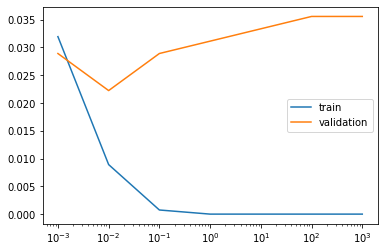

In [54]:
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Train and validaton errors initialized as empty list
train_errs = list()
valid_errs = list()

# Loop over values of C_value
for C_value in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    # Create LogisticRegression object and fit
    lr = LogisticRegression(C=C_value, penalty='l2')
    lr.fit(X_train, y_train)
    
    # Evaluate error rates and append to lists
    train_errs.append( 1.0 - lr.score(X_train, y_train))
    valid_errs.append( 1.0 - lr.score(X_valid, y_valid))
    
# Plot results
plt.semilogx(C_values, train_errs, C_values, valid_errs)
plt.legend(("train", "validation"))
plt.show()

In [ ]:
# Specify L1 regularization
lr = LogisticRegression(solver='liblinear', penalty='l1')

# Instantiate the GridSearchCV object and run the search
searcher = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10]})
searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)

# Find the number of nonzero coefficients (selected features)
best_lr = searcher.best_estimator_
coefs = best_lr.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))

In [ ]:
# Get the indices of the sorted cofficients
inds_ascending = np.argsort(lr.coef_.flatten()) 
inds_descending = inds_ascending[::-1]

# Print the most positive words
print("Most positive words: ", end="")
for i in range(5):
    print(vocab[inds_descending[i]], end=", ")
print("\n")

# Print most negative words
print("Most negative words: ", end="")
for i in range(5):
    print(vocab[inds_ascending[i]], end=", ")
print("\n")

Answer: 3

In [55]:
X = np.array([[ 1.78862847,  0.43650985], [ 0.09649747, -1.8634927 ], [-0.2773882 , -0.35475898], [-3.08274148,  2.37299932], [-3.04381817,  2.52278197], [-1.31386475,  0.88462238], [-2.11868196,  4.70957306], [-2.94996636,  2.59532259], [-3.54535995,  1.45352268], [ 0.98236743, -1.10106763], [-1.18504653, -0.2056499 ], [-1.51385164,  3.23671627], [-4.02378514,  2.2870068 ], [ 0.62524497, -0.16051336], [-3.76883635,  2.76996928], [ 0.74505627,  1.97611078], [-1.24412333, -0.62641691], [-0.80376609, -2.41908317], [-0.92379202, -1.02387576], [ 1.12397796, -0.13191423]])
y = np.array([-1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1, -1, -1, -1])

In [ ]:
# Set the regularization strength
model = LogisticRegression(C=1)

# Fit and plot
model.fit(X,y)
plot_classifier(X,y,model,proba=True)

# Predict probabilities on training points
prob = model.predict_proba(X)
print("Maximum predicted probability", max(max(prob, key = lambda x: max(x))))

In [ ]:
# Set the regularization strength
model = LogisticRegression(C=0.1)

# Fit and plot
model.fit(X,y)
plot_classifier(X,y,model,proba=True)

# Predict probabilities on training points
prob = model.predict_proba(X)
print("Maximum predicted probability", np.max(prob))

In [ ]:
lr = LogisticRegression()
lr.fit(X,y)

# Get predicted probabilities
proba = lr.predict_proba(X)

# Sort the example indices by their maximum probability
proba_inds = np.argsort(np.max(proba,axis=1))

# Show the most confident (least ambiguous) digit
show_digit(proba_inds[-1], lr)

# Show the least confident (most ambiguous) digit
show_digit(proba_inds[0], lr)

In [57]:
Answer: 303

In [ ]:
# Fit one-vs-rest logistic regression classifier
lr_ovr = LogisticRegression(multi_class='ovr')
lr_ovr.fit(X_train, y_train)

print("OVR training accuracy:", lr_ovr.score(X_train, y_train))
print("OVR test accuracy    :", lr_ovr.score(X_test, y_test))

# Fit softmax classifier
lr_mn = LogisticRegression(multi_class='multinomial')
lr_mn.fit(X_train, y_train)

print("Softmax training accuracy:", lr_mn.score(X_train, y_train))
print("Softmax test accuracy    :", lr_mn.score(X_test, y_test))

In [ ]:
# Print training accuracies
print("Softmax     training accuracy:", lr_mn.score(X_train, y_train))
print("One-vs-rest training accuracy:", lr_ovr.score(X_train, y_train))

# Create the binary classifier (class 1 vs. rest)
lr_class_1 = LogisticRegression(multi_class='ovr', C=100)
lr_class_1.fit(X_train, y_train==1)

# Plot the binary classifier (class 1 vs. rest)
plot_classifier(X_train, y_train==1, clf=lr_class_1)

In [ ]:
# We'll use SVC instead of LinearSVC from now on
from sklearn.svm import SVC

# Create/plot the binary classifier (class 1 vs. rest)
svm_class_1 = SVC()
svm_class_1.fit(X_train, y_train==1)
plot_classifier(X_train, y_train==1, clf=svm_class_1)

## 4. Support Vector Machines

Answer: All incorrectly classified points are support vectors.

In [59]:
X = np.array([[14.23,  1.71], [13.2 ,  1.78], [13.16,  2.36], [14.37,  1.95], [13.24,  2.59], [14.2 ,  1.76], [14.39,  1.87], [14.06,  2.15], [14.83,  1.64], [13.86,  1.35], [14.1 ,  2.16], [14.12,  1.48], [13.75,  1.73], [14.75,  1.73], [14.38,  1.87], [13.63,  1.81], [14.3 ,  1.92], [13.83,  1.57], [14.19,  1.59], [13.64,  3.1 ], [14.06,  1.63], [12.93,  3.8 ], [13.71,  1.86], [12.85,  1.6 ], [13.5 ,  1.81], [13.05,  2.05], [13.39,  1.77], [13.3 ,  1.72], [13.87,  1.9 ], [14.02,  1.68], [13.73,  1.5 ], [13.58,  1.66], [13.68,  1.83], [13.76,  1.53], [13.51,  1.8 ], [13.48,  1.81], [13.28,  1.64], [13.05,  1.65], [13.07,  1.5 ], [14.22,  3.99], [13.56,  1.71], [13.41,  3.84], [13.88,  1.89], [13.24,  3.98], [13.05,  1.77], [14.21,  4.04], [14.38,  3.59], [13.9 ,  1.68], [14.1 ,  2.02], [13.94,  1.73], [13.05,  1.73], [13.83,  1.65], [13.82,  1.75], [13.77,  1.9 ], [13.74,  1.67], [13.56,  1.73], [14.22,  1.7 ], [13.29,  1.97], [13.72,  1.43], [12.37,  0.94], [12.33,  1.1 ], [12.64,  1.36], [13.67,  1.25], [12.37,  1.13], [12.17,  1.45], [12.37,  1.21], [13.11,  1.01], [12.37,  1.17], [13.34,  0.94], [12.21,  1.19], [12.29,  1.61], [13.86,  1.51], [13.49,  1.66], [12.99,  1.67], [11.96,  1.09], [11.66,  1.88], [13.03,  0.9 ], [11.84,  2.89], [12.33,  0.99], [12.7 ,  3.87], [12.  ,  0.92], [12.72,  1.81], [12.08,  1.13], [13.05,  3.86], [11.84,  0.89], [12.67,  0.98], [12.16,  1.61], [11.65,  1.67], [11.64,  2.06], [12.08,  1.33], [12.08,  1.83], [12.  ,  1.51], [12.69,  1.53], [12.29,  2.83], [11.62,  1.99], [12.47,  1.52], [11.81,  2.12], [12.29,  1.41], [12.37,  1.07], [12.29,  3.17], [12.08,  2.08], [12.6 ,  1.34], [12.34,  2.45], [11.82,  1.72], [12.51,  1.73], [12.42,  2.55], [12.25,  1.73], [12.72,  1.75], [12.22,  1.29], [11.61,  1.35], [11.46,  3.74], [12.52,  2.43], [11.76,  2.68], [11.41,  0.74], [12.08,  1.39], [11.03,  1.51], [11.82,  1.47], [12.42,  1.61], [12.77,  3.43], [12.  ,  3.43], [11.45,  2.4 ], [11.56,  2.05], [12.42,  4.43], [13.05,  5.8 ], [11.87,  4.31], [12.07,  2.16], [12.43,  1.53], [11.79,  2.13], [12.37,  1.63], [12.04,  4.3 ], [12.86,  1.35], [12.88,  2.99], [12.81,  2.31], [12.7 ,  3.55], [12.51,  1.24], [12.6 ,  2.46], [12.25,  4.72], [12.53,  5.51], [13.49,  3.59], [12.84,  2.96], [12.93,  2.81], [13.36,  2.56], [13.52,  3.17], [13.62,  4.95], [12.25,  3.88], [13.16,  3.57], [13.88,  5.04], [12.87,  4.61], [13.32,  3.24], [13.08,  3.9 ], [13.5 ,  3.12], [12.79,  2.67], [13.11,  1.9 ], [13.23,  3.3 ], [12.58,  1.29], [13.17,  5.19], [13.84,  4.12], [12.45,  3.03], [14.34,  1.68], [13.48,  1.67], [12.36,  3.83], [13.69,  3.26], [12.85,  3.27], [12.96,  3.45], [13.78,  2.76], [13.73,  4.36], [13.45,  3.7 ], [12.82,  3.37], [13.58,  2.58], [13.4 ,  4.6 ], [12.2 ,  3.03], [12.77,  2.39], [14.16,  2.51], [13.71,  5.65], [13.4 ,  3.91], [13.27,  4.28], [13.17,  2.59], [14.13,  4.1 ]])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# Train a linear SVM
svm = SVC(kernel="linear")
svm.fit(X, y)
plot_classifier(X, y, svm, lims=(11,15,0,6))

# Make a new data set keeping only the support vectors
print("Number of original examples", len(X))
print("Number of support vectors", len(svm.support_))
X_small = X[svm.support_]
y_small = y[svm.support_]

# Train a new SVM using only the support vectors
svm_small = SVC(kernel="linear")
svm_small.fit(X_small, y_small)
plot_classifier(X_small, y_small, svm_small, lims=(11,15,0,6))

In [ ]:
# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X, y)

# Report the best parameters
print("Best CV params", searcher.best_params_)

In [ ]:
# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'C':[0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

Answer: They are computationally efficient with kernels.

Answer: It naturally outputs meaningful probabilities.

In [ ]:
# We set random_state=0 for reproducibility 
linear_classifier = SGDClassifier(random_state=0)

# Instantiate the GridSearchCV object and run the search
parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
             'loss':['hinge', 'log_loss']}
searcher = GridSearchCV(linear_classifier, parameters, cv=10)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))